In [76]:
import pandas as pd
from pycaret.regression import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [77]:
data=pd.read_csv("used_car_dataset_processed(khi).csv")
if 'Unnamed: 0' in data.columns:
    data.drop(columns='Unnamed: 0', inplace=True)

In [78]:
data

car_name  model_year manufacturer fuel_type transmission  engine_cc  \
0            A4      2008.0         Audi    Petrol    Automatic     1800.0   
1            A4      2001.0         Audi    Petrol    Automatic     1800.0   
2            A4      2008.0         Audi    Petrol    Automatic     1800.0   
3            A4      2010.0         Audi    Petrol    Automatic     1800.0   
4            A4      2017.0         Audi    Petrol    Automatic     1400.0   
...         ...         ...          ...       ...          ...        ...   
13215   Corolla      2012.0       Toyota    Petrol    Automatic     1600.0   
13216     Hilux      2023.0       Toyota    Diesel    Automatic     2800.0   
13217      Vitz      2010.0       Toyota    Petrol    Automatic     1000.0   
13218     Hilux      2023.0       Toyota    Diesel    Automatic     2800.0   
13219  Fortuner      2021.0       Toyota    Diesel    Automatic     2800.0   

       kms_driven   price_pkr  
0        100000.0   4700000.0  
1         12345.0   1925000.0  
2         50000.0   5500000.0  
3         43000.0   5250000.0  
4         45000.0  13500000.0  
...           ...         ...  
13215    180000.0   2400000.0  
13216        30.0  18800000.0  
13217    166870.0   2135000.0  
13218        10.0  17000000.0  
13219     35000.0  17000000.0  

[13220 rows x 8 columns]

In [79]:
validation_data=pd.DataFrame(data.iloc[13000:,])
validation_data.to_csv("validation_car(khi).csv")
validation_data

car_name  model_year manufacturer fuel_type transmission  engine_cc  \
13000   Corolla      1986.0       Toyota    Petrol       Manual     1300.0   
13001   Corolla      2008.0       Toyota    Petrol       Manual     1300.0   
13002      Vitz      2012.0       Toyota    Petrol    Automatic     1000.0   
13003   Corolla      2022.0       Toyota    Petrol    Automatic     1798.0   
13004     Hilux      2021.0       Toyota    Diesel    Automatic     2800.0   
...         ...         ...          ...       ...          ...        ...   
13215   Corolla      2012.0       Toyota    Petrol    Automatic     1600.0   
13216     Hilux      2023.0       Toyota    Diesel    Automatic     2800.0   
13217      Vitz      2010.0       Toyota    Petrol    Automatic     1000.0   
13218     Hilux      2023.0       Toyota    Diesel    Automatic     2800.0   
13219  Fortuner      2021.0       Toyota    Diesel    Automatic     2800.0   

       kms_driven   price_pkr  
13000    125000.0    350000.0  
13001    225500.0   1550000.0  
13002     75000.0   2610000.0  
13003      7000.0   7350000.0  
13004     11000.0  13000000.0  
...           ...         ...  
13215    180000.0   2400000.0  
13216        30.0  18800000.0  
13217    166870.0   2135000.0  
13218        10.0  17000000.0  
13219     35000.0  17000000.0  

[220 rows x 8 columns]

In [80]:
data.drop(data.index[13000:], inplace=True)
data.to_csv("used_car_dataset_processed(khi).csv")

In [81]:
data.dropna(inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      13440 non-null  object 
 1   model_year    13440 non-null  float64
 2   manufacturer  13440 non-null  object 
 3   fuel_type     13440 non-null  object 
 4   transmission  13440 non-null  object 
 5   engine_cc     13440 non-null  float64
 6   kms_driven    13440 non-null  float64
 7   price_pkr     13440 non-null  float64
dtypes: float64(4), object(4)
memory usage: 840.1+ KB


# Scaling Features

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
data[['model_year', 'engine_cc', 'kms_driven']]=scaler.fit_transform(data[['model_year', 'engine_cc', 'kms_driven']])


# One Hot Encoding

In [8]:
data=pd.get_dummies(data)
data

model_year  engine_cc  kms_driven   price_pkr  car_name_1300  \
0        0.971831   0.181208    0.046899  12600000.0              0   
1        0.985915   0.181208    0.009999  15000000.0              0   
2        0.957746   0.181208    0.038999  11000000.0              0   
3        0.929577   0.060403    0.047999   9500000.0              0   
4        0.929577   0.073826    0.015999   7900000.0              0   
...           ...        ...         ...         ...            ...   
13637    0.281690   0.060403    0.012344    515000.0              0   
13638    0.450704   0.154362    0.099999    500000.0              0   
13639    0.000000   0.140940    0.099999   1860000.0              0   
13640    0.169014   0.154362    0.111499   1500000.0              0   
13641    0.112676   0.154362    0.499999   1050000.0              0   

       car_name_200 D  car_name_2008  car_name_240 Gd  car_name_3 Series  \
0                   0              0                0                  0   
1                   0              0                0                  0   
2                   0              0                0                  0   
3                   0              0                0                  0   
4                   0              0                0                  0   
...               ...            ...              ...                ...   
13637               0              0                0                  0   
13638               0              0                0                  0   
13639               0              0                0                  0   
13640               0              0                0                  0   
13641               0              0                0                  0   

       car_name_323  ...  manufacturer_United  manufacturer_Volkswagen  \
0                 0  ...                    0                        0   
1                 0  ...                    0                        0   
2                 0  ...                    0                        0   
3                 0  ...                    0                        0   
4                 0  ...                    0                        0   
...             ...  ...                  ...                      ...   
13637             0  ...                    0                        1   
13638             0  ...                    0                        0   
13639             0  ...                    0                        0   
13640             0  ...                    0                        0   
13641             0  ...                    0                        0   

       manufacturer_Volvo  manufacturer_Willys  fuel_type_CNG  \
0                       0                    0              0   
1                       0                    0              0   
2                       0                    0              0   
3                       0                    0              0   
4                       0                    0              0   
...                   ...                  ...            ...   
13637                   0                    0              0   
13638                   1                    0              0   
13639                   0                    1              0   
13640                   0                    1              0   
13641                   0                    1              0   

       fuel_type_Diesel  fuel_type_Hybrid  fuel_type_Petrol  \
0                     1                 0                 0   
1                     1                 0                 0   
2                     1                 0                 0   
3                     0                 0                 1   
4                     0                 0                 1   
...                 ...               ...               ...   
13637                 0                 0                 1   
13638                 0                 0                 1   
1363

In [9]:
X=data.drop('price_pkr', axis=1)
y=data['price_pkr']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, test_size=0.2, shuffle=True)

# Pycaret Model 

In [131]:
exp = setup(X, target=y, numeric_imputation='mean',fold=4,imputation_type='iterative')

In [132]:
best_model = compare_models(sort= 'R2')

In [133]:
# model = finalize_model(best_model)
# model

In [134]:
# y_pred=model.predict(X_test)

In [135]:
# plt.figure(figsize=(10, 6))  # Increase figure size
# plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.7)
# plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)

# # Add labels
# plt.xlabel('Cars')
# plt.ylabel('Prices (PKR)')
# plt.legend()

# plt.show()

# Random Forest

In [136]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

In [137]:
# model=RandomForestRegressor()

In [138]:
# #apply those params which are supported by selected model
# param_grid = {
#     'max_depth': [5,8,10],
#     #'ccp_alpha': [0.1, 0.2, 0.3],
#     'random_state': [42, 51, 72],
#     #'learning_rate':[0.1,0.3,0.7],
#     'n_estimators' : [100,300,500]
# }


# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# # Make predictions on the testing data
# y_pred = best_model.predict(X_test)

# # Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 score
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared (R2) Score: {r2}")
# print(f"Best hyperparameters: {grid_search.best_params_}")

Mean Squared Error: 2304380844934.434
Mean Absolute Error: 546190.3105112877
R-squared (R2) Score: 0.9474402789440505
Best hyperparameters: {'max_depth': 10, 'n_estimators': 500, 'random_state': 51}


In [139]:
# # Decide After best match
# final_model=RandomForestRegressor(n_estimators=500,
#                                   max_depth=10,
#                                   random_state=51) #best params founded
# final_model.fit(X_train, y_train)
# y_pred_final = final_model.predict(X_test)
# mse_final = mean_squared_error(y_test, y_pred_final)
# mae_final= mean_squared_error(y_test, y_pred_final)
# R2Score=r2_score(y_test, y_pred_final)

In [140]:
# print(f"MSE Final: {mse_final}, MAE Final: {mae_final}, R2_Score: {R2Score}")

MSE Final: 2304380844934.434, MAE Final: 2304380844934.434, R2_Score: 0.9474402789440505


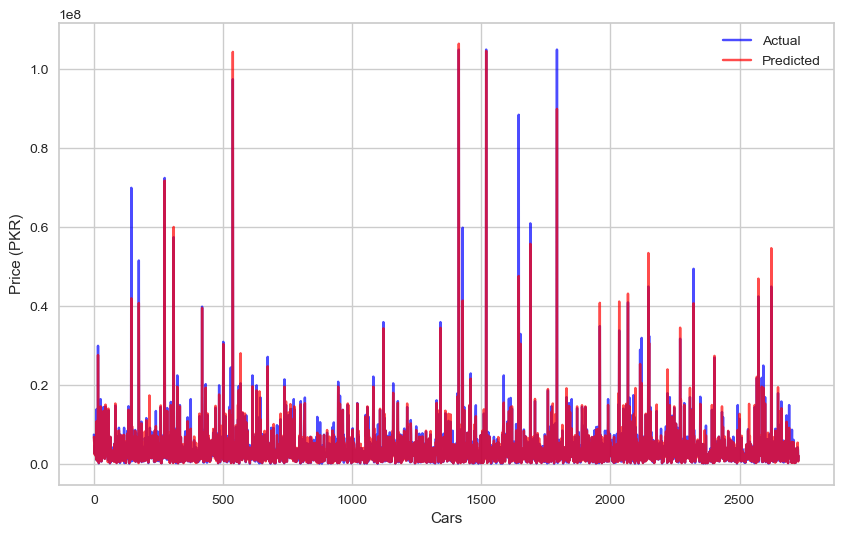

In [141]:
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
# plt.plot(np.arange(len(y_pred_final)), y_pred_final, label='Predicted', color='red', alpha=0.7)

# plt.xlabel('Cars')
# plt.ylabel('Price (PKR)')
# plt.legend()

# plt.show()


# Cat Boost Regressor

In [11]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt
# X=data.drop('price_pkr', axis=1)
# y=data['price_pkr']
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42, shuffle=True)


In [12]:
# model=CatBoostRegressor()


In [13]:
# X=data.drop('price_pkr', axis=1)
# y=data['price_pkr']

In [14]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

In [21]:
# #apply those params which are supported by selected model
# param_grid = {
#     'max_depth': [5,8,10],
#     'random_state': [42, 51, 72],
#     'learning_rate':[0.1,0.3,0.5],
#     'n_estimators' : [100,300,500]
# }


# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# # Make predictions on the testing data
# y_pred = best_model.predict(X_test)

# # Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 score
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared (R2) Score: {r2}")
# print(f"Best hyperparameters: {grid_search.best_params_}")

0:	learn: 6197766.1622770	total: 167ms	remaining: 16.6s
1:	learn: 5790189.8692090	total: 175ms	remaining: 8.59s
2:	learn: 5410109.3258988	total: 196ms	remaining: 6.33s
3:	learn: 5077339.7742012	total: 201ms	remaining: 4.82s
4:	learn: 4775802.4032693	total: 206ms	remaining: 3.91s
5:	learn: 4523832.0672127	total: 211ms	remaining: 3.3s
6:	learn: 4289750.8538467	total: 216ms	remaining: 2.86s
7:	learn: 4071669.7169879	total: 220ms	remaining: 2.53s
8:	learn: 3873025.9471735	total: 225ms	remaining: 2.28s
9:	learn: 3693906.4625998	total: 230ms	remaining: 2.07s
10:	learn: 3526952.0947609	total: 235ms	remaining: 1.9s
11:	learn: 3374113.8303563	total: 240ms	remaining: 1.76s
12:	learn: 3240073.6190732	total: 245ms	remaining: 1.64s
13:	learn: 3112019.3262119	total: 250ms	remaining: 1.53s
14:	learn: 3004941.7391831	total: 255ms	remaining: 1.44s
15:	learn: 2908073.7634875	total: 259ms	remaining: 1.36s
16:	learn: 2807722.0511395	total: 264ms	remaining: 1.29s
17:	learn: 2719252.9741364	total: 269ms	rem

72:	learn: 1356595.3097100	total: 399ms	remaining: 148ms
73:	learn: 1351630.6284652	total: 404ms	remaining: 142ms
74:	learn: 1350446.2357767	total: 409ms	remaining: 136ms
75:	learn: 1343771.0858185	total: 414ms	remaining: 131ms
76:	learn: 1336978.2776525	total: 423ms	remaining: 126ms
77:	learn: 1333202.2849681	total: 433ms	remaining: 122ms
78:	learn: 1331716.3259722	total: 450ms	remaining: 120ms
79:	learn: 1329956.6978734	total: 460ms	remaining: 115ms
80:	learn: 1321730.3403877	total: 466ms	remaining: 109ms
81:	learn: 1318123.8163621	total: 472ms	remaining: 104ms
82:	learn: 1315495.7277322	total: 478ms	remaining: 97.8ms
83:	learn: 1309971.3917813	total: 483ms	remaining: 91.9ms
84:	learn: 1308036.1316983	total: 488ms	remaining: 86ms
85:	learn: 1296175.3000577	total: 493ms	remaining: 80.2ms
86:	learn: 1291886.5792496	total: 498ms	remaining: 74.4ms
87:	learn: 1290158.2143580	total: 503ms	remaining: 68.6ms
88:	learn: 1289188.5748697	total: 508ms	remaining: 62.8ms
89:	learn: 1286852.0750726

32:	learn: 1999225.2431504	total: 206ms	remaining: 419ms
33:	learn: 1978489.5340505	total: 214ms	remaining: 415ms
34:	learn: 1961340.3736743	total: 220ms	remaining: 409ms
35:	learn: 1938463.8246746	total: 227ms	remaining: 404ms
36:	learn: 1925017.4858117	total: 235ms	remaining: 401ms
37:	learn: 1887776.9353771	total: 242ms	remaining: 395ms
38:	learn: 1864011.7073313	total: 248ms	remaining: 387ms
39:	learn: 1852240.0730592	total: 254ms	remaining: 380ms
40:	learn: 1830449.0855700	total: 260ms	remaining: 374ms
41:	learn: 1821647.4351341	total: 265ms	remaining: 366ms
42:	learn: 1815274.8195273	total: 271ms	remaining: 359ms
43:	learn: 1798985.2714305	total: 276ms	remaining: 352ms
44:	learn: 1767669.2866997	total: 282ms	remaining: 345ms
45:	learn: 1757085.3988044	total: 288ms	remaining: 338ms
46:	learn: 1741368.1527935	total: 294ms	remaining: 331ms
47:	learn: 1728821.6550992	total: 299ms	remaining: 324ms
48:	learn: 1708293.7414410	total: 306ms	remaining: 319ms
49:	learn: 1700533.8630417	tota

80:	learn: 1355799.0479085	total: 660ms	remaining: 155ms
81:	learn: 1354513.1485814	total: 768ms	remaining: 169ms
82:	learn: 1353020.9261713	total: 788ms	remaining: 161ms
83:	learn: 1348144.8165588	total: 820ms	remaining: 156ms
84:	learn: 1340556.2926667	total: 830ms	remaining: 146ms
85:	learn: 1335764.6069021	total: 843ms	remaining: 137ms
86:	learn: 1334539.3474464	total: 854ms	remaining: 128ms
87:	learn: 1331230.4762487	total: 865ms	remaining: 118ms
88:	learn: 1322852.3441878	total: 876ms	remaining: 108ms
89:	learn: 1319670.4045785	total: 884ms	remaining: 98.2ms
90:	learn: 1316521.2880860	total: 895ms	remaining: 88.5ms
91:	learn: 1315403.7666857	total: 905ms	remaining: 78.7ms
92:	learn: 1312306.6739977	total: 912ms	remaining: 68.6ms
93:	learn: 1310594.4212709	total: 923ms	remaining: 58.9ms
94:	learn: 1303088.6012882	total: 950ms	remaining: 50ms
95:	learn: 1300004.4565779	total: 960ms	remaining: 40ms
96:	learn: 1291584.1608749	total: 970ms	remaining: 30ms
97:	learn: 1285945.5228865	to

31:	learn: 1923848.8821441	total: 198ms	remaining: 421ms
32:	learn: 1887176.2225747	total: 204ms	remaining: 413ms
33:	learn: 1855865.2386720	total: 210ms	remaining: 407ms
34:	learn: 1830699.4927409	total: 215ms	remaining: 400ms
35:	learn: 1803830.8807055	total: 223ms	remaining: 396ms
36:	learn: 1780781.4991916	total: 231ms	remaining: 393ms
37:	learn: 1757116.0476888	total: 237ms	remaining: 387ms
38:	learn: 1739275.3183450	total: 244ms	remaining: 382ms
39:	learn: 1720845.7625736	total: 250ms	remaining: 375ms
40:	learn: 1696123.7570770	total: 256ms	remaining: 369ms
41:	learn: 1681243.7827643	total: 262ms	remaining: 362ms
42:	learn: 1666871.9916362	total: 270ms	remaining: 357ms
43:	learn: 1650245.4236959	total: 278ms	remaining: 354ms
44:	learn: 1633854.4887225	total: 285ms	remaining: 348ms
45:	learn: 1621845.8772989	total: 291ms	remaining: 341ms
46:	learn: 1605050.5528015	total: 299ms	remaining: 337ms
47:	learn: 1594946.5734877	total: 306ms	remaining: 331ms
48:	learn: 1578060.5138985	tota

80:	learn: 1401946.1090110	total: 597ms	remaining: 140ms
81:	learn: 1394421.2524000	total: 604ms	remaining: 133ms
82:	learn: 1388186.8750131	total: 611ms	remaining: 125ms
83:	learn: 1381297.9924350	total: 617ms	remaining: 118ms
84:	learn: 1375724.0080485	total: 624ms	remaining: 110ms
85:	learn: 1368871.1717786	total: 631ms	remaining: 103ms
86:	learn: 1360320.7348486	total: 637ms	remaining: 95.2ms
87:	learn: 1355231.2945341	total: 644ms	remaining: 87.8ms
88:	learn: 1350875.9257919	total: 651ms	remaining: 80.4ms
89:	learn: 1341534.9289112	total: 658ms	remaining: 73.1ms
90:	learn: 1332540.6918765	total: 663ms	remaining: 65.6ms
91:	learn: 1326243.6977745	total: 669ms	remaining: 58.2ms
92:	learn: 1321565.9681324	total: 676ms	remaining: 50.9ms
93:	learn: 1315752.3992525	total: 682ms	remaining: 43.5ms
94:	learn: 1314189.0394650	total: 688ms	remaining: 36.2ms
95:	learn: 1312655.5231474	total: 694ms	remaining: 28.9ms
96:	learn: 1311371.9483859	total: 700ms	remaining: 21.7ms
97:	learn: 1306743.8

27:	learn: 2159882.0452211	total: 206ms	remaining: 529ms
28:	learn: 2124943.7729405	total: 217ms	remaining: 531ms
29:	learn: 2089323.1670825	total: 223ms	remaining: 521ms
30:	learn: 2054100.5452106	total: 232ms	remaining: 516ms
31:	learn: 2027166.6831340	total: 239ms	remaining: 508ms
32:	learn: 1994303.0583659	total: 246ms	remaining: 499ms
33:	learn: 1964088.2844700	total: 253ms	remaining: 490ms
34:	learn: 1930027.6066301	total: 260ms	remaining: 482ms
35:	learn: 1903313.7302289	total: 269ms	remaining: 479ms
36:	learn: 1882532.3291385	total: 277ms	remaining: 471ms
37:	learn: 1852608.2303891	total: 283ms	remaining: 462ms
38:	learn: 1826771.9749112	total: 291ms	remaining: 455ms
39:	learn: 1799043.4315923	total: 298ms	remaining: 447ms
40:	learn: 1782054.4948911	total: 307ms	remaining: 442ms
41:	learn: 1767211.6377842	total: 314ms	remaining: 433ms
42:	learn: 1751452.4407627	total: 321ms	remaining: 425ms
43:	learn: 1733693.9640083	total: 327ms	remaining: 416ms
44:	learn: 1718006.0057385	tota

89:	learn: 1338627.8441514	total: 597ms	remaining: 66.4ms
90:	learn: 1334878.5482643	total: 603ms	remaining: 59.7ms
91:	learn: 1330523.8777417	total: 609ms	remaining: 53ms
92:	learn: 1328118.6274606	total: 616ms	remaining: 46.4ms
93:	learn: 1324659.7869913	total: 623ms	remaining: 39.7ms
94:	learn: 1321819.2016527	total: 629ms	remaining: 33.1ms
95:	learn: 1318457.1121115	total: 635ms	remaining: 26.5ms
96:	learn: 1314313.0760439	total: 641ms	remaining: 19.8ms
97:	learn: 1311533.5692227	total: 647ms	remaining: 13.2ms
98:	learn: 1309824.9850959	total: 653ms	remaining: 6.59ms
99:	learn: 1306844.2959883	total: 659ms	remaining: 0us
0:	learn: 5762844.3196363	total: 7.08ms	remaining: 701ms
1:	learn: 5412931.4508008	total: 13.2ms	remaining: 647ms
2:	learn: 5101964.3114364	total: 19.9ms	remaining: 643ms
3:	learn: 4790714.4986681	total: 25ms	remaining: 600ms
4:	learn: 4535622.8819247	total: 31ms	remaining: 590ms
5:	learn: 4304836.3315843	total: 39.9ms	remaining: 625ms
6:	learn: 4085516.6926654	tot

34:	learn: 2023416.4243503	total: 425ms	remaining: 789ms
35:	learn: 1994636.1359362	total: 434ms	remaining: 772ms
36:	learn: 1976739.2114404	total: 443ms	remaining: 754ms
37:	learn: 1953687.0715705	total: 453ms	remaining: 739ms
38:	learn: 1933833.7805901	total: 461ms	remaining: 722ms
39:	learn: 1906790.5203501	total: 469ms	remaining: 703ms
40:	learn: 1890817.1279167	total: 478ms	remaining: 688ms
41:	learn: 1874815.4511259	total: 486ms	remaining: 671ms
42:	learn: 1860769.4897667	total: 494ms	remaining: 655ms
43:	learn: 1850875.5902639	total: 501ms	remaining: 638ms
44:	learn: 1831859.6173938	total: 508ms	remaining: 621ms
45:	learn: 1809190.1187100	total: 513ms	remaining: 603ms
46:	learn: 1787774.0062274	total: 519ms	remaining: 586ms
47:	learn: 1766591.2353951	total: 526ms	remaining: 570ms
48:	learn: 1742474.9575008	total: 532ms	remaining: 553ms
49:	learn: 1727044.0231452	total: 538ms	remaining: 538ms
50:	learn: 1711135.1647496	total: 544ms	remaining: 523ms
51:	learn: 1695204.1601099	tota

0:	learn: 5960351.0967434	total: 6.08ms	remaining: 602ms
1:	learn: 5590195.8820165	total: 12ms	remaining: 588ms
2:	learn: 5252120.1675768	total: 18.4ms	remaining: 597ms
3:	learn: 4964592.7732115	total: 24.4ms	remaining: 586ms
4:	learn: 4701507.6690565	total: 30.8ms	remaining: 585ms
5:	learn: 4453461.3040353	total: 36.7ms	remaining: 576ms
6:	learn: 4212180.8399437	total: 43ms	remaining: 572ms
7:	learn: 4008407.0378705	total: 49.5ms	remaining: 570ms
8:	learn: 3820434.0952114	total: 55.5ms	remaining: 561ms
9:	learn: 3640180.2115004	total: 62.3ms	remaining: 561ms
10:	learn: 3480999.3568545	total: 67.9ms	remaining: 550ms
11:	learn: 3339103.0824996	total: 73.9ms	remaining: 542ms
12:	learn: 3208579.1260134	total: 81.1ms	remaining: 543ms
13:	learn: 3082359.8954255	total: 86.3ms	remaining: 530ms
14:	learn: 2964418.8240909	total: 92ms	remaining: 521ms
15:	learn: 2864748.4770754	total: 98.6ms	remaining: 518ms
16:	learn: 2774872.7319949	total: 105ms	remaining: 511ms
17:	learn: 2699093.2553702	tota

71:	learn: 1449300.0717791	total: 418ms	remaining: 1.32s
72:	learn: 1439526.8324817	total: 424ms	remaining: 1.32s
73:	learn: 1431304.3938932	total: 434ms	remaining: 1.32s
74:	learn: 1421878.2357054	total: 440ms	remaining: 1.32s
75:	learn: 1412791.3610076	total: 445ms	remaining: 1.31s
76:	learn: 1406680.2337815	total: 450ms	remaining: 1.3s
77:	learn: 1398186.2495654	total: 456ms	remaining: 1.3s
78:	learn: 1391918.4911185	total: 461ms	remaining: 1.29s
79:	learn: 1383770.2608081	total: 466ms	remaining: 1.28s
80:	learn: 1380424.5468628	total: 471ms	remaining: 1.27s
81:	learn: 1373326.8206330	total: 477ms	remaining: 1.27s
82:	learn: 1370131.2265626	total: 482ms	remaining: 1.26s
83:	learn: 1363684.0212341	total: 487ms	remaining: 1.25s
84:	learn: 1356345.7542050	total: 492ms	remaining: 1.24s
85:	learn: 1353412.3535999	total: 497ms	remaining: 1.24s
86:	learn: 1349103.7574629	total: 502ms	remaining: 1.23s
87:	learn: 1341308.2213661	total: 507ms	remaining: 1.22s
88:	learn: 1337366.3778455	total:

248:	learn: 1005831.7082018	total: 1.88s	remaining: 385ms
249:	learn: 1004560.1450412	total: 1.89s	remaining: 377ms
250:	learn: 1003460.3086479	total: 1.9s	remaining: 370ms
251:	learn: 1001781.5260278	total: 1.9s	remaining: 362ms
252:	learn: 1001136.6793137	total: 1.91s	remaining: 354ms
253:	learn: 999914.9852516	total: 1.91s	remaining: 347ms
254:	learn: 999119.2021358	total: 1.92s	remaining: 339ms
255:	learn: 998880.9055865	total: 1.93s	remaining: 331ms
256:	learn: 997855.9441280	total: 1.93s	remaining: 323ms
257:	learn: 997499.2719915	total: 1.94s	remaining: 315ms
258:	learn: 997271.6734331	total: 1.94s	remaining: 307ms
259:	learn: 996182.4349941	total: 1.95s	remaining: 299ms
260:	learn: 995796.2472579	total: 1.95s	remaining: 292ms
261:	learn: 995488.3586501	total: 1.96s	remaining: 284ms
262:	learn: 993111.9514262	total: 1.96s	remaining: 276ms
263:	learn: 989129.8579135	total: 1.97s	remaining: 268ms
264:	learn: 988901.7843862	total: 1.97s	remaining: 260ms
265:	learn: 988684.5173906	t

119:	learn: 1185928.6146719	total: 805ms	remaining: 1.21s
120:	learn: 1183911.6532700	total: 812ms	remaining: 1.2s
121:	learn: 1181055.1843367	total: 820ms	remaining: 1.2s
122:	learn: 1174616.1366354	total: 834ms	remaining: 1.2s
123:	learn: 1171791.0176204	total: 844ms	remaining: 1.2s
124:	learn: 1167173.6017418	total: 853ms	remaining: 1.19s
125:	learn: 1163654.5530123	total: 860ms	remaining: 1.19s
126:	learn: 1161833.7925456	total: 867ms	remaining: 1.18s
127:	learn: 1157773.4443836	total: 875ms	remaining: 1.18s
128:	learn: 1155766.4089714	total: 883ms	remaining: 1.17s
129:	learn: 1152949.9941466	total: 890ms	remaining: 1.16s
130:	learn: 1152231.6739339	total: 896ms	remaining: 1.16s
131:	learn: 1151085.7467181	total: 908ms	remaining: 1.16s
132:	learn: 1148556.7264923	total: 914ms	remaining: 1.15s
133:	learn: 1147885.0852344	total: 935ms	remaining: 1.16s
134:	learn: 1142793.2459394	total: 948ms	remaining: 1.16s
135:	learn: 1139095.5700874	total: 959ms	remaining: 1.16s
136:	learn: 113846

277:	learn: 907498.0181417	total: 2.23s	remaining: 176ms
278:	learn: 906564.9216503	total: 2.23s	remaining: 168ms
279:	learn: 905242.3283517	total: 2.23s	remaining: 160ms
280:	learn: 901181.8217798	total: 2.24s	remaining: 152ms
281:	learn: 900892.6760624	total: 2.25s	remaining: 143ms
282:	learn: 898953.1076014	total: 2.25s	remaining: 135ms
283:	learn: 898336.3830314	total: 2.26s	remaining: 127ms
284:	learn: 897869.8126185	total: 2.26s	remaining: 119ms
285:	learn: 897147.9359387	total: 2.27s	remaining: 111ms
286:	learn: 896597.4084741	total: 2.27s	remaining: 103ms
287:	learn: 895198.1350000	total: 2.28s	remaining: 95.1ms
288:	learn: 894500.5554005	total: 2.29s	remaining: 87ms
289:	learn: 892894.6676374	total: 2.29s	remaining: 79ms
290:	learn: 891833.9092057	total: 2.3s	remaining: 71ms
291:	learn: 890297.6018426	total: 2.3s	remaining: 63.1ms
292:	learn: 888792.0828295	total: 2.31s	remaining: 55.1ms
293:	learn: 887121.6913896	total: 2.31s	remaining: 47.2ms
294:	learn: 886569.6630258	total

128:	learn: 1218901.4869204	total: 814ms	remaining: 1.08s
129:	learn: 1214266.4577306	total: 819ms	remaining: 1.07s
130:	learn: 1210087.5222191	total: 824ms	remaining: 1.06s
131:	learn: 1204857.5770194	total: 829ms	remaining: 1.05s
132:	learn: 1202624.4935619	total: 835ms	remaining: 1.05s
133:	learn: 1200452.7516168	total: 840ms	remaining: 1.04s
134:	learn: 1199610.5936793	total: 875ms	remaining: 1.07s
135:	learn: 1198532.7073629	total: 880ms	remaining: 1.06s
136:	learn: 1191263.0785485	total: 885ms	remaining: 1.05s
137:	learn: 1185297.9312097	total: 892ms	remaining: 1.05s
138:	learn: 1183311.1122311	total: 897ms	remaining: 1.04s
139:	learn: 1180378.0910086	total: 901ms	remaining: 1.03s
140:	learn: 1175198.2823528	total: 907ms	remaining: 1.02s
141:	learn: 1172671.2753157	total: 914ms	remaining: 1.02s
142:	learn: 1169434.1448328	total: 919ms	remaining: 1.01s
143:	learn: 1165770.3990057	total: 924ms	remaining: 1s
144:	learn: 1163268.0397649	total: 930ms	remaining: 995ms
145:	learn: 11624

278:	learn: 949436.9429342	total: 1.84s	remaining: 138ms
279:	learn: 946350.4909091	total: 1.84s	remaining: 132ms
280:	learn: 946128.7269252	total: 1.85s	remaining: 125ms
281:	learn: 945210.5353934	total: 1.85s	remaining: 118ms
282:	learn: 944715.9509426	total: 1.86s	remaining: 112ms
283:	learn: 943506.6382230	total: 1.86s	remaining: 105ms
284:	learn: 942039.6838310	total: 1.87s	remaining: 98.5ms
285:	learn: 941694.5208393	total: 1.88s	remaining: 91.9ms
286:	learn: 940023.1677695	total: 1.88s	remaining: 85.3ms
287:	learn: 939300.8954302	total: 1.89s	remaining: 78.7ms
288:	learn: 937694.6995963	total: 1.9s	remaining: 72.1ms
289:	learn: 937023.0530001	total: 1.9s	remaining: 65.6ms
290:	learn: 935353.4182928	total: 1.91s	remaining: 59ms
291:	learn: 935146.4099728	total: 1.91s	remaining: 52.4ms
292:	learn: 934831.5312116	total: 1.92s	remaining: 45.9ms
293:	learn: 934637.1571890	total: 1.93s	remaining: 39.3ms
294:	learn: 934450.6854893	total: 1.93s	remaining: 32.7ms
295:	learn: 932689.84169

137:	learn: 1193605.9959423	total: 812ms	remaining: 954ms
138:	learn: 1191143.7809228	total: 818ms	remaining: 948ms
139:	learn: 1190557.2350821	total: 823ms	remaining: 941ms
140:	learn: 1189995.1901612	total: 830ms	remaining: 936ms
141:	learn: 1189459.6795162	total: 837ms	remaining: 931ms
142:	learn: 1185661.0890058	total: 843ms	remaining: 926ms
143:	learn: 1184495.8980107	total: 849ms	remaining: 920ms
144:	learn: 1182493.4286005	total: 855ms	remaining: 913ms
145:	learn: 1181289.6091826	total: 861ms	remaining: 908ms
146:	learn: 1178924.1821801	total: 873ms	remaining: 908ms
147:	learn: 1177061.4963026	total: 880ms	remaining: 904ms
148:	learn: 1175083.1329028	total: 888ms	remaining: 900ms
149:	learn: 1171390.4066519	total: 894ms	remaining: 894ms
150:	learn: 1165868.9843106	total: 900ms	remaining: 888ms
151:	learn: 1160792.3711589	total: 906ms	remaining: 882ms
152:	learn: 1160344.5681677	total: 912ms	remaining: 876ms
153:	learn: 1153740.0516804	total: 918ms	remaining: 871ms
154:	learn: 11

0:	learn: 5973031.0622637	total: 14.4ms	remaining: 4.31s
1:	learn: 5595511.2560897	total: 24.9ms	remaining: 3.71s
2:	learn: 5243090.4263863	total: 33.5ms	remaining: 3.32s
3:	learn: 4932061.1261403	total: 50.6ms	remaining: 3.74s
4:	learn: 4655422.3231928	total: 59.1ms	remaining: 3.49s
5:	learn: 4405378.1287560	total: 70.7ms	remaining: 3.47s
6:	learn: 4169340.5758868	total: 80.2ms	remaining: 3.35s
7:	learn: 3978272.9340372	total: 93.2ms	remaining: 3.4s
8:	learn: 3778416.9042716	total: 106ms	remaining: 3.44s
9:	learn: 3608454.5756090	total: 118ms	remaining: 3.42s
10:	learn: 3455900.9057692	total: 126ms	remaining: 3.32s
11:	learn: 3316122.8245550	total: 136ms	remaining: 3.26s
12:	learn: 3186290.9909843	total: 144ms	remaining: 3.18s
13:	learn: 3070922.1555217	total: 156ms	remaining: 3.19s
14:	learn: 2959314.2919776	total: 167ms	remaining: 3.18s
15:	learn: 2859492.8831277	total: 179ms	remaining: 3.17s
16:	learn: 2763849.6216237	total: 197ms	remaining: 3.28s
17:	learn: 2690956.5134777	total: 

154:	learn: 1128483.8821894	total: 1.42s	remaining: 1.33s
155:	learn: 1126565.3708884	total: 1.43s	remaining: 1.32s
156:	learn: 1121506.9415283	total: 1.44s	remaining: 1.31s
157:	learn: 1120971.2458410	total: 1.45s	remaining: 1.3s
158:	learn: 1120524.1747341	total: 1.46s	remaining: 1.29s
159:	learn: 1118320.9496173	total: 1.47s	remaining: 1.29s
160:	learn: 1116388.4550649	total: 1.48s	remaining: 1.27s
161:	learn: 1115110.7756607	total: 1.48s	remaining: 1.26s
162:	learn: 1111088.4114892	total: 1.49s	remaining: 1.25s
163:	learn: 1109517.4743722	total: 1.5s	remaining: 1.24s
164:	learn: 1108575.8006112	total: 1.5s	remaining: 1.23s
165:	learn: 1105023.6921135	total: 1.51s	remaining: 1.22s
166:	learn: 1104130.9683025	total: 1.51s	remaining: 1.21s
167:	learn: 1101953.9506713	total: 1.52s	remaining: 1.19s
168:	learn: 1100341.8232449	total: 1.52s	remaining: 1.18s
169:	learn: 1097699.2003736	total: 1.53s	remaining: 1.17s
170:	learn: 1093332.5978302	total: 1.54s	remaining: 1.16s
171:	learn: 10890

0:	learn: 6200853.0158382	total: 11.7ms	remaining: 3.49s
1:	learn: 5791453.7837549	total: 21.4ms	remaining: 3.19s
2:	learn: 5433107.8227428	total: 27.9ms	remaining: 2.76s
3:	learn: 5096018.0065681	total: 34.6ms	remaining: 2.56s
4:	learn: 4788713.9682327	total: 41.5ms	remaining: 2.45s
5:	learn: 4522290.1758610	total: 48.1ms	remaining: 2.36s
6:	learn: 4299385.0691238	total: 55.4ms	remaining: 2.32s
7:	learn: 4089138.0915143	total: 62.3ms	remaining: 2.27s
8:	learn: 3891361.3420853	total: 71.2ms	remaining: 2.3s
9:	learn: 3700733.2328119	total: 77.5ms	remaining: 2.25s
10:	learn: 3534668.8464690	total: 84.6ms	remaining: 2.22s
11:	learn: 3380883.1222424	total: 92.2ms	remaining: 2.21s
12:	learn: 3244128.3359963	total: 99ms	remaining: 2.19s
13:	learn: 3123936.2734954	total: 106ms	remaining: 2.16s
14:	learn: 3014735.2010789	total: 117ms	remaining: 2.23s
15:	learn: 2917915.0385750	total: 127ms	remaining: 2.26s
16:	learn: 2827558.3830321	total: 135ms	remaining: 2.24s
17:	learn: 2750021.5268624	tota

163:	learn: 1125188.1003585	total: 1.69s	remaining: 1.4s
164:	learn: 1123911.1498592	total: 1.7s	remaining: 1.39s
165:	learn: 1122875.2972660	total: 1.72s	remaining: 1.39s
166:	learn: 1122257.3396148	total: 1.74s	remaining: 1.39s
167:	learn: 1120727.4154496	total: 1.75s	remaining: 1.38s
168:	learn: 1120220.5647974	total: 1.76s	remaining: 1.37s
169:	learn: 1118178.4597548	total: 1.77s	remaining: 1.35s
170:	learn: 1117665.3532831	total: 1.78s	remaining: 1.35s
171:	learn: 1116754.4455236	total: 1.79s	remaining: 1.33s
172:	learn: 1114265.1024336	total: 1.8s	remaining: 1.32s
173:	learn: 1113171.1161648	total: 1.81s	remaining: 1.31s
174:	learn: 1110148.1345297	total: 1.82s	remaining: 1.3s
175:	learn: 1108805.6408185	total: 1.82s	remaining: 1.28s
176:	learn: 1108144.4927175	total: 1.83s	remaining: 1.27s
177:	learn: 1107357.9226977	total: 1.84s	remaining: 1.26s
178:	learn: 1106439.3985023	total: 1.84s	remaining: 1.25s
179:	learn: 1104460.5097722	total: 1.85s	remaining: 1.23s
180:	learn: 110402

31:	learn: 1923848.8821441	total: 200ms	remaining: 1.68s
32:	learn: 1887176.2225747	total: 207ms	remaining: 1.68s
33:	learn: 1855865.2386720	total: 213ms	remaining: 1.66s
34:	learn: 1830699.4927409	total: 219ms	remaining: 1.66s
35:	learn: 1803830.8807055	total: 226ms	remaining: 1.66s
36:	learn: 1780781.4991916	total: 231ms	remaining: 1.64s
37:	learn: 1757116.0476888	total: 238ms	remaining: 1.64s
38:	learn: 1739275.3183450	total: 244ms	remaining: 1.63s
39:	learn: 1720845.7625736	total: 249ms	remaining: 1.62s
40:	learn: 1696123.7570770	total: 256ms	remaining: 1.62s
41:	learn: 1681243.7827643	total: 261ms	remaining: 1.6s
42:	learn: 1666871.9916362	total: 268ms	remaining: 1.6s
43:	learn: 1650245.4236959	total: 275ms	remaining: 1.6s
44:	learn: 1633854.4887225	total: 280ms	remaining: 1.59s
45:	learn: 1621845.8772989	total: 286ms	remaining: 1.58s
46:	learn: 1605050.5528015	total: 292ms	remaining: 1.57s
47:	learn: 1594946.5734877	total: 298ms	remaining: 1.56s
48:	learn: 1578060.5138985	total: 

189:	learn: 1029621.8963122	total: 1.22s	remaining: 709ms
190:	learn: 1029324.0234593	total: 1.23s	remaining: 702ms
191:	learn: 1026854.9685877	total: 1.24s	remaining: 696ms
192:	learn: 1025074.4120450	total: 1.24s	remaining: 690ms
193:	learn: 1023035.2487668	total: 1.25s	remaining: 685ms
194:	learn: 1021601.9642154	total: 1.26s	remaining: 678ms
195:	learn: 1019055.4291522	total: 1.27s	remaining: 674ms
196:	learn: 1018303.3439630	total: 1.27s	remaining: 667ms
197:	learn: 1017870.9148323	total: 1.28s	remaining: 660ms
198:	learn: 1017117.7321404	total: 1.29s	remaining: 654ms
199:	learn: 1013072.4169974	total: 1.29s	remaining: 647ms
200:	learn: 1007340.6825170	total: 1.3s	remaining: 641ms
201:	learn: 1006261.6229008	total: 1.31s	remaining: 634ms
202:	learn: 1005759.4331117	total: 1.31s	remaining: 628ms
203:	learn: 1004384.7412703	total: 1.32s	remaining: 621ms
204:	learn: 999286.7191276	total: 1.33s	remaining: 615ms
205:	learn: 999011.5056101	total: 1.33s	remaining: 609ms
206:	learn: 99795

36:	learn: 1950949.2362198	total: 600ms	remaining: 4.27s
37:	learn: 1934344.0684222	total: 612ms	remaining: 4.22s
38:	learn: 1921093.9667185	total: 644ms	remaining: 4.31s
39:	learn: 1890708.0143726	total: 653ms	remaining: 4.25s
40:	learn: 1869063.0686526	total: 662ms	remaining: 4.18s
41:	learn: 1842483.4902247	total: 677ms	remaining: 4.16s
42:	learn: 1820767.4193372	total: 687ms	remaining: 4.11s
43:	learn: 1802685.9360946	total: 698ms	remaining: 4.06s
44:	learn: 1792981.0727755	total: 717ms	remaining: 4.06s
45:	learn: 1774981.3934757	total: 730ms	remaining: 4.03s
46:	learn: 1760866.2666652	total: 750ms	remaining: 4.03s
47:	learn: 1745543.1231750	total: 762ms	remaining: 4s
48:	learn: 1731075.9349850	total: 783ms	remaining: 4.01s
49:	learn: 1715757.9409077	total: 795ms	remaining: 3.97s
50:	learn: 1692305.6949215	total: 819ms	remaining: 4s
51:	learn: 1687027.1374302	total: 832ms	remaining: 3.97s
52:	learn: 1674336.9407416	total: 847ms	remaining: 3.95s
53:	learn: 1665647.0478773	total: 855

179:	learn: 1077586.0497975	total: 2.02s	remaining: 1.35s
180:	learn: 1073459.7692587	total: 2.03s	remaining: 1.33s
181:	learn: 1071564.7286676	total: 2.03s	remaining: 1.32s
182:	learn: 1068754.7930267	total: 2.04s	remaining: 1.31s
183:	learn: 1065338.0983450	total: 2.05s	remaining: 1.29s
184:	learn: 1061846.3503000	total: 2.06s	remaining: 1.28s
185:	learn: 1061504.4094616	total: 2.06s	remaining: 1.26s
186:	learn: 1059939.2135004	total: 2.07s	remaining: 1.25s
187:	learn: 1058004.1261580	total: 2.08s	remaining: 1.24s
188:	learn: 1057688.5483497	total: 2.09s	remaining: 1.23s
189:	learn: 1056415.4244291	total: 2.09s	remaining: 1.21s
190:	learn: 1055883.2295979	total: 2.1s	remaining: 1.2s
191:	learn: 1054121.0546013	total: 2.11s	remaining: 1.19s
192:	learn: 1050901.6159970	total: 2.12s	remaining: 1.17s
193:	learn: 1049134.7509963	total: 2.12s	remaining: 1.16s
194:	learn: 1046894.7031498	total: 2.13s	remaining: 1.15s
195:	learn: 1046321.7933217	total: 2.14s	remaining: 1.14s
196:	learn: 1043

27:	learn: 2120681.0257250	total: 203ms	remaining: 1.97s
28:	learn: 2080425.4180727	total: 209ms	remaining: 1.95s
29:	learn: 2052052.6533267	total: 216ms	remaining: 1.94s
30:	learn: 2016787.9292632	total: 222ms	remaining: 1.93s
31:	learn: 1987215.3330167	total: 230ms	remaining: 1.93s
32:	learn: 1957832.1449039	total: 237ms	remaining: 1.92s
33:	learn: 1941365.4469968	total: 243ms	remaining: 1.9s
34:	learn: 1907306.5270025	total: 249ms	remaining: 1.89s
35:	learn: 1882564.9443324	total: 255ms	remaining: 1.87s
36:	learn: 1865186.9815133	total: 263ms	remaining: 1.87s
37:	learn: 1841420.0839262	total: 268ms	remaining: 1.85s
38:	learn: 1817786.8341299	total: 275ms	remaining: 1.84s
39:	learn: 1790629.3323101	total: 280ms	remaining: 1.82s
40:	learn: 1782424.6560193	total: 285ms	remaining: 1.8s
41:	learn: 1769092.3992769	total: 291ms	remaining: 1.79s
42:	learn: 1761870.1347781	total: 297ms	remaining: 1.77s
43:	learn: 1746127.2592418	total: 302ms	remaining: 1.76s
44:	learn: 1729027.3934998	total:

187:	learn: 1051813.2606844	total: 1.22s	remaining: 727ms
188:	learn: 1050358.5681808	total: 1.23s	remaining: 721ms
189:	learn: 1049031.6961444	total: 1.23s	remaining: 714ms
190:	learn: 1048750.7166831	total: 1.24s	remaining: 707ms
191:	learn: 1047367.8704566	total: 1.24s	remaining: 700ms
192:	learn: 1046059.6205755	total: 1.25s	remaining: 693ms
193:	learn: 1044823.9071881	total: 1.25s	remaining: 686ms
194:	learn: 1044559.7449834	total: 1.26s	remaining: 679ms
195:	learn: 1041003.6179212	total: 1.27s	remaining: 672ms
196:	learn: 1037028.8477248	total: 1.27s	remaining: 665ms
197:	learn: 1036093.4845309	total: 1.28s	remaining: 658ms
198:	learn: 1034814.6714045	total: 1.28s	remaining: 651ms
199:	learn: 1032315.9974675	total: 1.29s	remaining: 644ms
200:	learn: 1029670.0134561	total: 1.29s	remaining: 637ms
201:	learn: 1028542.3961732	total: 1.3s	remaining: 629ms
202:	learn: 1025212.8593117	total: 1.3s	remaining: 622ms
203:	learn: 1023911.3195818	total: 1.31s	remaining: 616ms
204:	learn: 1022

35:	learn: 1903313.7302289	total: 202ms	remaining: 1.48s
36:	learn: 1882532.3291385	total: 208ms	remaining: 1.48s
37:	learn: 1852608.2303891	total: 214ms	remaining: 1.48s
38:	learn: 1826771.9749112	total: 220ms	remaining: 1.47s
39:	learn: 1799043.4315923	total: 227ms	remaining: 1.48s
40:	learn: 1782054.4948911	total: 233ms	remaining: 1.47s
41:	learn: 1767211.6377842	total: 239ms	remaining: 1.47s
42:	learn: 1751452.4407627	total: 244ms	remaining: 1.46s
43:	learn: 1733693.9640083	total: 249ms	remaining: 1.45s
44:	learn: 1718006.0057385	total: 255ms	remaining: 1.44s
45:	learn: 1703586.2902028	total: 260ms	remaining: 1.44s
46:	learn: 1689935.1588918	total: 266ms	remaining: 1.43s
47:	learn: 1680566.9192245	total: 271ms	remaining: 1.42s
48:	learn: 1660765.5774197	total: 276ms	remaining: 1.41s
49:	learn: 1650467.0063318	total: 281ms	remaining: 1.41s
50:	learn: 1642165.6672856	total: 286ms	remaining: 1.4s
51:	learn: 1632030.3576110	total: 292ms	remaining: 1.39s
52:	learn: 1620771.9318687	total

205:	learn: 1050914.9383318	total: 1.22s	remaining: 559ms
206:	learn: 1049438.1259187	total: 1.23s	remaining: 553ms
207:	learn: 1048779.3782179	total: 1.24s	remaining: 547ms
208:	learn: 1048458.3438957	total: 1.24s	remaining: 541ms
209:	learn: 1047327.8018484	total: 1.25s	remaining: 535ms
210:	learn: 1044147.7983207	total: 1.25s	remaining: 529ms
211:	learn: 1042261.4467028	total: 1.26s	remaining: 523ms
212:	learn: 1041804.2192375	total: 1.26s	remaining: 517ms
213:	learn: 1039910.1063513	total: 1.27s	remaining: 510ms
214:	learn: 1038700.6010125	total: 1.27s	remaining: 504ms
215:	learn: 1036947.4563374	total: 1.28s	remaining: 498ms
216:	learn: 1036668.6639504	total: 1.28s	remaining: 492ms
217:	learn: 1035088.3423729	total: 1.29s	remaining: 485ms
218:	learn: 1032535.6581847	total: 1.3s	remaining: 480ms
219:	learn: 1030689.2977258	total: 1.3s	remaining: 475ms
220:	learn: 1027870.5479181	total: 1.31s	remaining: 469ms
221:	learn: 1026559.6872844	total: 1.32s	remaining: 463ms
222:	learn: 1025

67:	learn: 1468780.7599404	total: 388ms	remaining: 1.32s
68:	learn: 1461163.4988323	total: 394ms	remaining: 1.32s
69:	learn: 1457350.2849263	total: 400ms	remaining: 1.31s
70:	learn: 1450273.0545412	total: 406ms	remaining: 1.31s
71:	learn: 1444592.9417923	total: 413ms	remaining: 1.31s
72:	learn: 1438364.0284351	total: 421ms	remaining: 1.31s
73:	learn: 1433519.7423591	total: 427ms	remaining: 1.3s
74:	learn: 1424514.4194116	total: 433ms	remaining: 1.3s
75:	learn: 1419633.7937545	total: 439ms	remaining: 1.29s
76:	learn: 1416781.5901469	total: 445ms	remaining: 1.29s
77:	learn: 1408316.0199999	total: 452ms	remaining: 1.29s
78:	learn: 1404613.2371009	total: 457ms	remaining: 1.28s
79:	learn: 1401197.4389673	total: 464ms	remaining: 1.27s
80:	learn: 1395264.5189160	total: 469ms	remaining: 1.27s
81:	learn: 1385057.2141203	total: 474ms	remaining: 1.26s
82:	learn: 1380690.4717239	total: 481ms	remaining: 1.26s
83:	learn: 1373937.6428146	total: 487ms	remaining: 1.25s
84:	learn: 1369927.1663757	total:

223:	learn: 1028132.4942207	total: 1.38s	remaining: 468ms
224:	learn: 1026554.7677680	total: 1.38s	remaining: 461ms
225:	learn: 1026060.2904739	total: 1.39s	remaining: 455ms
226:	learn: 1025177.8159694	total: 1.4s	remaining: 449ms
227:	learn: 1023996.0497993	total: 1.4s	remaining: 444ms
228:	learn: 1023749.3049609	total: 1.41s	remaining: 438ms
229:	learn: 1021725.4221827	total: 1.42s	remaining: 432ms
230:	learn: 1019389.1656934	total: 1.42s	remaining: 426ms
231:	learn: 1019108.4225140	total: 1.43s	remaining: 419ms
232:	learn: 1018103.0200994	total: 1.44s	remaining: 413ms
233:	learn: 1017026.9157335	total: 1.44s	remaining: 407ms
234:	learn: 1016134.0536143	total: 1.45s	remaining: 401ms
235:	learn: 1015495.6970908	total: 1.45s	remaining: 394ms
236:	learn: 1015267.8998262	total: 1.46s	remaining: 388ms
237:	learn: 1014317.8952423	total: 1.47s	remaining: 382ms
238:	learn: 1013028.3299653	total: 1.47s	remaining: 376ms
239:	learn: 1012595.2592401	total: 1.48s	remaining: 369ms
240:	learn: 1012

83:	learn: 1290097.1569385	total: 836ms	remaining: 2.15s
84:	learn: 1286721.9513412	total: 842ms	remaining: 2.13s
85:	learn: 1283747.9343461	total: 850ms	remaining: 2.11s
86:	learn: 1272546.5404142	total: 858ms	remaining: 2.1s
87:	learn: 1262485.6584237	total: 866ms	remaining: 2.08s
88:	learn: 1259542.8687558	total: 871ms	remaining: 2.06s
89:	learn: 1253002.6521541	total: 878ms	remaining: 2.05s
90:	learn: 1247528.9094479	total: 886ms	remaining: 2.03s
91:	learn: 1245561.3362280	total: 892ms	remaining: 2.02s
92:	learn: 1240238.5641557	total: 898ms	remaining: 2s
93:	learn: 1236072.8708469	total: 904ms	remaining: 1.98s
94:	learn: 1232481.5147744	total: 909ms	remaining: 1.96s
95:	learn: 1229904.5538729	total: 916ms	remaining: 1.95s
96:	learn: 1228302.3385038	total: 921ms	remaining: 1.93s
97:	learn: 1227099.3551104	total: 926ms	remaining: 1.91s
98:	learn: 1221179.8496701	total: 931ms	remaining: 1.89s
99:	learn: 1216996.7848617	total: 937ms	remaining: 1.87s
100:	learn: 1214991.9893614	total: 

260:	learn: 921619.4150315	total: 1.85s	remaining: 277ms
261:	learn: 920458.7374061	total: 1.86s	remaining: 270ms
262:	learn: 919787.2346664	total: 1.86s	remaining: 262ms
263:	learn: 918582.8510590	total: 1.87s	remaining: 255ms
264:	learn: 915267.3468248	total: 1.88s	remaining: 248ms
265:	learn: 914266.0530814	total: 1.89s	remaining: 241ms
266:	learn: 913061.8325006	total: 1.89s	remaining: 234ms
267:	learn: 912874.4676470	total: 1.9s	remaining: 227ms
268:	learn: 911615.1198303	total: 1.91s	remaining: 220ms
269:	learn: 910205.7510561	total: 1.91s	remaining: 212ms
270:	learn: 905349.7670523	total: 1.92s	remaining: 205ms
271:	learn: 903980.2926085	total: 1.92s	remaining: 198ms
272:	learn: 903622.3936142	total: 1.93s	remaining: 191ms
273:	learn: 900873.9342923	total: 1.93s	remaining: 183ms
274:	learn: 900268.2632579	total: 1.94s	remaining: 176ms
275:	learn: 899267.2420248	total: 1.94s	remaining: 169ms
276:	learn: 898572.4154371	total: 1.95s	remaining: 162ms
277:	learn: 896593.7706320	total

133:	learn: 1221677.9899862	total: 812ms	remaining: 1.01s
134:	learn: 1218005.5547639	total: 819ms	remaining: 1s
135:	learn: 1215186.2211275	total: 825ms	remaining: 995ms
136:	learn: 1212976.7519752	total: 831ms	remaining: 989ms
137:	learn: 1210691.0765598	total: 837ms	remaining: 983ms
138:	learn: 1205246.1870427	total: 844ms	remaining: 978ms
139:	learn: 1204549.1751868	total: 850ms	remaining: 971ms
140:	learn: 1195306.0251568	total: 859ms	remaining: 968ms
141:	learn: 1193781.6188390	total: 864ms	remaining: 961ms
142:	learn: 1193060.8739460	total: 870ms	remaining: 955ms
143:	learn: 1188236.8075604	total: 876ms	remaining: 949ms
144:	learn: 1187655.1760231	total: 881ms	remaining: 942ms
145:	learn: 1183999.4591470	total: 889ms	remaining: 938ms
146:	learn: 1178130.6643250	total: 895ms	remaining: 931ms
147:	learn: 1176763.2802293	total: 900ms	remaining: 924ms
148:	learn: 1173605.4590717	total: 905ms	remaining: 917ms
149:	learn: 1173053.2413441	total: 910ms	remaining: 910ms
150:	learn: 11720

296:	learn: 927637.7910930	total: 1.82s	remaining: 18.4ms
297:	learn: 926897.5034765	total: 1.82s	remaining: 12.2ms
298:	learn: 925651.7704545	total: 1.83s	remaining: 6.12ms
299:	learn: 925193.3939681	total: 1.84s	remaining: 0us
0:	learn: 5976651.7240403	total: 5.51ms	remaining: 1.65s
1:	learn: 5602364.7710060	total: 10.9ms	remaining: 1.63s
2:	learn: 5257155.3190161	total: 16.2ms	remaining: 1.6s
3:	learn: 4932945.5106192	total: 21.5ms	remaining: 1.59s
4:	learn: 4636930.3502376	total: 26.7ms	remaining: 1.57s
5:	learn: 4375372.7220690	total: 32ms	remaining: 1.57s
6:	learn: 4141207.0832290	total: 37.3ms	remaining: 1.56s
7:	learn: 3927302.7635882	total: 42.6ms	remaining: 1.55s
8:	learn: 3738781.4828554	total: 47.9ms	remaining: 1.55s
9:	learn: 3565484.1006184	total: 53.8ms	remaining: 1.56s
10:	learn: 3399328.0345064	total: 61.5ms	remaining: 1.61s
11:	learn: 3251907.0713750	total: 68.3ms	remaining: 1.64s
12:	learn: 3119935.8279010	total: 73.6ms	remaining: 1.62s
13:	learn: 3017428.6647896	tot

142:	learn: 1136394.8006407	total: 816ms	remaining: 896ms
143:	learn: 1130502.0176069	total: 824ms	remaining: 892ms
144:	learn: 1127490.9410175	total: 830ms	remaining: 887ms
145:	learn: 1122493.6333999	total: 836ms	remaining: 882ms
146:	learn: 1117952.3515448	total: 842ms	remaining: 876ms
147:	learn: 1116149.9918120	total: 848ms	remaining: 871ms
148:	learn: 1114494.7300044	total: 856ms	remaining: 867ms
149:	learn: 1113568.6464481	total: 863ms	remaining: 863ms
150:	learn: 1111851.1045625	total: 872ms	remaining: 860ms
151:	learn: 1111369.7518961	total: 883ms	remaining: 860ms
152:	learn: 1110044.6848757	total: 890ms	remaining: 855ms
153:	learn: 1109587.6128937	total: 898ms	remaining: 851ms
154:	learn: 1106567.7882847	total: 903ms	remaining: 845ms
155:	learn: 1105048.4241561	total: 909ms	remaining: 839ms
156:	learn: 1103207.7270518	total: 915ms	remaining: 833ms
157:	learn: 1102767.6097720	total: 920ms	remaining: 827ms
158:	learn: 1101493.0295523	total: 927ms	remaining: 822ms
159:	learn: 11

0:	learn: 5960351.0967434	total: 5.27ms	remaining: 1.58s
1:	learn: 5590195.8820165	total: 10.4ms	remaining: 1.54s
2:	learn: 5252120.1675768	total: 15.7ms	remaining: 1.55s
3:	learn: 4964592.7732115	total: 21.7ms	remaining: 1.6s
4:	learn: 4701507.6690565	total: 27.1ms	remaining: 1.6s
5:	learn: 4453461.3040353	total: 33.4ms	remaining: 1.64s
6:	learn: 4212180.8399437	total: 39.4ms	remaining: 1.65s
7:	learn: 4008407.0378705	total: 45.4ms	remaining: 1.66s
8:	learn: 3820434.0952114	total: 51.6ms	remaining: 1.67s
9:	learn: 3640180.2115004	total: 58.6ms	remaining: 1.7s
10:	learn: 3480999.3568545	total: 64.7ms	remaining: 1.7s
11:	learn: 3339103.0824996	total: 70.4ms	remaining: 1.69s
12:	learn: 3208579.1260134	total: 76.5ms	remaining: 1.69s
13:	learn: 3082359.8954255	total: 81.9ms	remaining: 1.67s
14:	learn: 2964418.8240909	total: 87.9ms	remaining: 1.67s
15:	learn: 2864748.4770754	total: 96.9ms	remaining: 1.72s
16:	learn: 2774872.7319949	total: 102ms	remaining: 1.7s
17:	learn: 2699093.2553702	tot

150:	learn: 1139574.5682391	total: 1.01s	remaining: 998ms
151:	learn: 1134302.8465359	total: 1.02s	remaining: 992ms
152:	learn: 1130200.2468194	total: 1.02s	remaining: 984ms
153:	learn: 1129758.0276420	total: 1.03s	remaining: 976ms
154:	learn: 1122860.2634355	total: 1.04s	remaining: 970ms
155:	learn: 1120730.6995978	total: 1.04s	remaining: 962ms
156:	learn: 1117718.8903677	total: 1.05s	remaining: 954ms
157:	learn: 1115869.9503226	total: 1.05s	remaining: 946ms
158:	learn: 1113086.7667937	total: 1.06s	remaining: 938ms
159:	learn: 1110316.6512189	total: 1.06s	remaining: 930ms
160:	learn: 1109453.6220656	total: 1.07s	remaining: 922ms
161:	learn: 1106517.3578602	total: 1.07s	remaining: 915ms
162:	learn: 1103393.4395574	total: 1.08s	remaining: 907ms
163:	learn: 1101890.5098439	total: 1.09s	remaining: 901ms
164:	learn: 1100324.3620128	total: 1.09s	remaining: 893ms
165:	learn: 1098773.8374175	total: 1.1s	remaining: 885ms
166:	learn: 1097142.5970728	total: 1.1s	remaining: 877ms
167:	learn: 1095

293:	learn: 925441.6527090	total: 1.82s	remaining: 37.2ms
294:	learn: 924803.8885805	total: 1.83s	remaining: 31ms
295:	learn: 924512.2209417	total: 1.83s	remaining: 24.8ms
296:	learn: 924343.5923181	total: 1.84s	remaining: 18.6ms
297:	learn: 923693.2772960	total: 1.84s	remaining: 12.4ms
298:	learn: 923245.5703281	total: 1.85s	remaining: 6.19ms
299:	learn: 921012.2125510	total: 1.86s	remaining: 0us
0:	learn: 6197766.1622770	total: 5.53ms	remaining: 2.76s
1:	learn: 5790189.8692090	total: 11.6ms	remaining: 2.9s
2:	learn: 5410109.3258988	total: 16.9ms	remaining: 2.81s
3:	learn: 5077339.7742012	total: 22.2ms	remaining: 2.75s
4:	learn: 4775802.4032693	total: 27.4ms	remaining: 2.72s
5:	learn: 4523832.0672127	total: 32.7ms	remaining: 2.69s
6:	learn: 4289750.8538467	total: 37.9ms	remaining: 2.67s
7:	learn: 4071669.7169879	total: 43.6ms	remaining: 2.68s
8:	learn: 3873025.9471735	total: 49.2ms	remaining: 2.68s
9:	learn: 3693906.4625998	total: 54.6ms	remaining: 2.67s
10:	learn: 3526952.0947609	tot

140:	learn: 1181229.2143387	total: 813ms	remaining: 2.07s
141:	learn: 1179956.2080860	total: 819ms	remaining: 2.06s
142:	learn: 1178889.8596619	total: 825ms	remaining: 2.06s
143:	learn: 1177996.3737028	total: 831ms	remaining: 2.05s
144:	learn: 1175470.6555239	total: 839ms	remaining: 2.05s
145:	learn: 1174660.5016679	total: 845ms	remaining: 2.05s
146:	learn: 1172740.3253575	total: 851ms	remaining: 2.04s
147:	learn: 1171988.3181409	total: 857ms	remaining: 2.04s
148:	learn: 1170736.6319825	total: 863ms	remaining: 2.03s
149:	learn: 1168289.4753139	total: 869ms	remaining: 2.03s
150:	learn: 1163662.7996487	total: 874ms	remaining: 2.02s
151:	learn: 1159844.6369764	total: 879ms	remaining: 2.01s
152:	learn: 1157050.9368465	total: 885ms	remaining: 2.01s
153:	learn: 1154708.3268442	total: 891ms	remaining: 2s
154:	learn: 1154058.6617296	total: 897ms	remaining: 2s
155:	learn: 1152945.4529216	total: 904ms	remaining: 1.99s
156:	learn: 1151197.2175833	total: 909ms	remaining: 1.99s
157:	learn: 1145892.

289:	learn: 962894.4198349	total: 2.03s	remaining: 1.47s
290:	learn: 961815.6117246	total: 2.03s	remaining: 1.46s
291:	learn: 961381.2833794	total: 2.04s	remaining: 1.45s
292:	learn: 960968.5461960	total: 2.07s	remaining: 1.46s
293:	learn: 960077.7302980	total: 2.08s	remaining: 1.46s
294:	learn: 958457.6796076	total: 2.1s	remaining: 1.46s
295:	learn: 957643.1161213	total: 2.11s	remaining: 1.45s
296:	learn: 957211.4061474	total: 2.12s	remaining: 1.45s
297:	learn: 956937.1019826	total: 2.13s	remaining: 1.44s
298:	learn: 954471.3148121	total: 2.13s	remaining: 1.43s
299:	learn: 954277.1004839	total: 2.15s	remaining: 1.43s
300:	learn: 953490.2068306	total: 2.16s	remaining: 1.43s
301:	learn: 952438.6645149	total: 2.17s	remaining: 1.42s
302:	learn: 952252.5200790	total: 2.19s	remaining: 1.42s
303:	learn: 951529.0190572	total: 2.2s	remaining: 1.42s
304:	learn: 950820.2747296	total: 2.22s	remaining: 1.42s
305:	learn: 949707.4608033	total: 2.24s	remaining: 1.42s
306:	learn: 949527.7716643	total:

458:	learn: 828203.7935686	total: 3.46s	remaining: 309ms
459:	learn: 827746.3938446	total: 3.47s	remaining: 302ms
460:	learn: 827592.6500821	total: 3.48s	remaining: 294ms
461:	learn: 825896.3749391	total: 3.49s	remaining: 287ms
462:	learn: 824359.2493799	total: 3.49s	remaining: 279ms
463:	learn: 824080.4667089	total: 3.5s	remaining: 272ms
464:	learn: 823976.5455515	total: 3.51s	remaining: 264ms
465:	learn: 823876.1977100	total: 3.51s	remaining: 256ms
466:	learn: 823779.4160097	total: 3.52s	remaining: 249ms
467:	learn: 823686.1281208	total: 3.53s	remaining: 241ms
468:	learn: 823595.1740055	total: 3.53s	remaining: 234ms
469:	learn: 823304.3602981	total: 3.54s	remaining: 226ms
470:	learn: 822412.6479254	total: 3.55s	remaining: 218ms
471:	learn: 822048.1039724	total: 3.55s	remaining: 211ms
472:	learn: 820052.3390420	total: 3.56s	remaining: 203ms
473:	learn: 819871.4136130	total: 3.57s	remaining: 196ms
474:	learn: 818478.9294930	total: 3.57s	remaining: 188ms
475:	learn: 818387.2001622	total

111:	learn: 1209425.9115586	total: 618ms	remaining: 2.14s
112:	learn: 1207450.5890993	total: 624ms	remaining: 2.14s
113:	learn: 1206310.9315365	total: 630ms	remaining: 2.13s
114:	learn: 1204155.6239162	total: 636ms	remaining: 2.13s
115:	learn: 1198245.6241056	total: 643ms	remaining: 2.13s
116:	learn: 1197029.2735832	total: 648ms	remaining: 2.12s
117:	learn: 1191607.6802656	total: 654ms	remaining: 2.12s
118:	learn: 1190641.2451407	total: 659ms	remaining: 2.11s
119:	learn: 1185928.6146719	total: 665ms	remaining: 2.1s
120:	learn: 1183911.6532700	total: 670ms	remaining: 2.1s
121:	learn: 1181055.1843367	total: 675ms	remaining: 2.09s
122:	learn: 1174616.1366354	total: 681ms	remaining: 2.09s
123:	learn: 1171791.0176204	total: 686ms	remaining: 2.08s
124:	learn: 1167173.6017418	total: 691ms	remaining: 2.07s
125:	learn: 1163654.5530123	total: 696ms	remaining: 2.07s
126:	learn: 1161833.7925456	total: 702ms	remaining: 2.06s
127:	learn: 1157773.4443836	total: 707ms	remaining: 2.06s
128:	learn: 1155

272:	learn: 911220.7733841	total: 1.63s	remaining: 1.35s
273:	learn: 909946.8279688	total: 1.63s	remaining: 1.35s
274:	learn: 908777.3399075	total: 1.64s	remaining: 1.34s
275:	learn: 908453.5820277	total: 1.65s	remaining: 1.34s
276:	learn: 907660.4384600	total: 1.66s	remaining: 1.33s
277:	learn: 907498.0181417	total: 1.66s	remaining: 1.33s
278:	learn: 906564.9216503	total: 1.67s	remaining: 1.32s
279:	learn: 905242.3283517	total: 1.67s	remaining: 1.31s
280:	learn: 901181.8217798	total: 1.68s	remaining: 1.31s
281:	learn: 900892.6760624	total: 1.68s	remaining: 1.3s
282:	learn: 898953.1076014	total: 1.69s	remaining: 1.29s
283:	learn: 898336.3830314	total: 1.69s	remaining: 1.29s
284:	learn: 897869.8126185	total: 1.7s	remaining: 1.28s
285:	learn: 897147.9359387	total: 1.71s	remaining: 1.27s
286:	learn: 896597.4084741	total: 1.71s	remaining: 1.27s
287:	learn: 895198.1350000	total: 1.72s	remaining: 1.26s
288:	learn: 894500.5554005	total: 1.72s	remaining: 1.26s
289:	learn: 892894.6676374	total:

439:	learn: 775995.3166769	total: 2.65s	remaining: 361ms
440:	learn: 775902.7940389	total: 2.65s	remaining: 355ms
441:	learn: 775177.8119420	total: 2.66s	remaining: 349ms
442:	learn: 774899.7809172	total: 2.67s	remaining: 343ms
443:	learn: 773569.8301158	total: 2.68s	remaining: 338ms
444:	learn: 773426.5992899	total: 2.68s	remaining: 332ms
445:	learn: 772732.1382713	total: 2.69s	remaining: 326ms
446:	learn: 772126.4778691	total: 2.7s	remaining: 320ms
447:	learn: 771574.0141650	total: 2.7s	remaining: 314ms
448:	learn: 770715.0757125	total: 2.71s	remaining: 308ms
449:	learn: 770560.9384722	total: 2.72s	remaining: 302ms
450:	learn: 769274.9237740	total: 2.72s	remaining: 296ms
451:	learn: 768828.9104824	total: 2.73s	remaining: 290ms
452:	learn: 768281.1544957	total: 2.73s	remaining: 284ms
453:	learn: 768191.2484875	total: 2.74s	remaining: 278ms
454:	learn: 767347.7849517	total: 2.75s	remaining: 272ms
455:	learn: 766886.6776573	total: 2.75s	remaining: 266ms
456:	learn: 766663.3462652	total:

86:	learn: 1399520.2677035	total: 607ms	remaining: 2.88s
87:	learn: 1392434.2072624	total: 616ms	remaining: 2.88s
88:	learn: 1385984.4540188	total: 625ms	remaining: 2.88s
89:	learn: 1377670.7775864	total: 636ms	remaining: 2.9s
90:	learn: 1369477.1363529	total: 644ms	remaining: 2.9s
91:	learn: 1362578.9638636	total: 651ms	remaining: 2.89s
92:	learn: 1353543.5605290	total: 659ms	remaining: 2.88s
93:	learn: 1349264.3008073	total: 665ms	remaining: 2.87s
94:	learn: 1347546.8061262	total: 670ms	remaining: 2.86s
95:	learn: 1343516.1000637	total: 676ms	remaining: 2.84s
96:	learn: 1338034.3155428	total: 681ms	remaining: 2.83s
97:	learn: 1332909.0466024	total: 687ms	remaining: 2.82s
98:	learn: 1331499.3080564	total: 697ms	remaining: 2.82s
99:	learn: 1326614.7920812	total: 703ms	remaining: 2.81s
100:	learn: 1325015.1411913	total: 711ms	remaining: 2.81s
101:	learn: 1314327.4238946	total: 718ms	remaining: 2.8s
102:	learn: 1311051.2429453	total: 724ms	remaining: 2.79s
103:	learn: 1304582.3327016	tot

256:	learn: 976807.7851271	total: 2.75s	remaining: 2.6s
257:	learn: 975571.4215209	total: 2.76s	remaining: 2.58s
258:	learn: 975349.0817425	total: 2.76s	remaining: 2.57s
259:	learn: 974557.6047703	total: 2.77s	remaining: 2.55s
260:	learn: 973718.1478737	total: 2.77s	remaining: 2.54s
261:	learn: 970713.9614530	total: 2.78s	remaining: 2.52s
262:	learn: 970384.3891008	total: 2.78s	remaining: 2.51s
263:	learn: 968607.7559059	total: 2.79s	remaining: 2.49s
264:	learn: 967508.8168248	total: 2.8s	remaining: 2.48s
265:	learn: 965749.0054945	total: 2.8s	remaining: 2.47s
266:	learn: 965400.0016983	total: 2.81s	remaining: 2.45s
267:	learn: 964748.5220635	total: 2.81s	remaining: 2.44s
268:	learn: 962077.5382217	total: 2.82s	remaining: 2.42s
269:	learn: 961256.4136830	total: 2.82s	remaining: 2.4s
270:	learn: 960008.2332610	total: 2.83s	remaining: 2.39s
271:	learn: 959143.9932470	total: 2.83s	remaining: 2.38s
272:	learn: 957713.6686082	total: 2.84s	remaining: 2.36s
273:	learn: 955162.7631877	total: 2

407:	learn: 844509.1174511	total: 3.55s	remaining: 800ms
408:	learn: 844391.5481892	total: 3.55s	remaining: 791ms
409:	learn: 843719.3824161	total: 3.56s	remaining: 781ms
410:	learn: 842432.3940822	total: 3.56s	remaining: 772ms
411:	learn: 841290.9871308	total: 3.57s	remaining: 763ms
412:	learn: 840826.4052889	total: 3.58s	remaining: 753ms
413:	learn: 840633.8649416	total: 3.59s	remaining: 745ms
414:	learn: 840340.2293147	total: 3.6s	remaining: 736ms
415:	learn: 838699.1857255	total: 3.6s	remaining: 727ms
416:	learn: 838228.5794092	total: 3.61s	remaining: 719ms
417:	learn: 838114.7846906	total: 3.62s	remaining: 710ms
418:	learn: 837854.0991268	total: 3.63s	remaining: 702ms
419:	learn: 837432.6371546	total: 3.64s	remaining: 694ms
420:	learn: 836632.2240376	total: 3.65s	remaining: 685ms
421:	learn: 835573.1914412	total: 3.66s	remaining: 676ms
422:	learn: 834739.8630779	total: 3.66s	remaining: 667ms
423:	learn: 834625.1313278	total: 3.67s	remaining: 658ms
424:	learn: 833980.2667393	total:

78:	learn: 1424463.6261554	total: 410ms	remaining: 2.18s
79:	learn: 1421569.6152093	total: 416ms	remaining: 2.18s
80:	learn: 1420540.7155965	total: 421ms	remaining: 2.17s
81:	learn: 1417949.3916440	total: 426ms	remaining: 2.17s
82:	learn: 1415991.0362212	total: 431ms	remaining: 2.16s
83:	learn: 1406660.4297134	total: 437ms	remaining: 2.16s
84:	learn: 1405097.9975218	total: 442ms	remaining: 2.16s
85:	learn: 1397105.0257880	total: 447ms	remaining: 2.15s
86:	learn: 1386712.2563631	total: 452ms	remaining: 2.15s
87:	learn: 1380682.0560115	total: 457ms	remaining: 2.14s
88:	learn: 1376529.7316235	total: 462ms	remaining: 2.13s
89:	learn: 1368753.0261795	total: 467ms	remaining: 2.13s
90:	learn: 1363670.8367620	total: 472ms	remaining: 2.12s
91:	learn: 1361780.3190151	total: 477ms	remaining: 2.12s
92:	learn: 1360504.8097606	total: 482ms	remaining: 2.11s
93:	learn: 1359543.5605050	total: 487ms	remaining: 2.1s
94:	learn: 1358473.0045737	total: 491ms	remaining: 2.09s
95:	learn: 1352853.6205407	total

224:	learn: 1026188.0579232	total: 1.2s	remaining: 1.47s
225:	learn: 1025192.1902920	total: 1.21s	remaining: 1.47s
226:	learn: 1024338.3200999	total: 1.22s	remaining: 1.46s
227:	learn: 1023628.3461317	total: 1.22s	remaining: 1.46s
228:	learn: 1021317.4270108	total: 1.23s	remaining: 1.45s
229:	learn: 1018863.9293032	total: 1.23s	remaining: 1.45s
230:	learn: 1017520.0102910	total: 1.24s	remaining: 1.44s
231:	learn: 1015086.1362653	total: 1.24s	remaining: 1.44s
232:	learn: 1009848.9249232	total: 1.25s	remaining: 1.43s
233:	learn: 1009042.8478806	total: 1.25s	remaining: 1.42s
234:	learn: 1007807.3606570	total: 1.26s	remaining: 1.42s
235:	learn: 1006879.2991994	total: 1.26s	remaining: 1.41s
236:	learn: 1006115.5591807	total: 1.27s	remaining: 1.41s
237:	learn: 1004211.5657864	total: 1.27s	remaining: 1.4s
238:	learn: 1002704.7410079	total: 1.28s	remaining: 1.4s
239:	learn: 1001013.0447013	total: 1.28s	remaining: 1.39s
240:	learn: 999608.4403312	total: 1.29s	remaining: 1.38s
241:	learn: 998498

380:	learn: 844360.2559752	total: 2.02s	remaining: 632ms
381:	learn: 844077.3396833	total: 2.03s	remaining: 626ms
382:	learn: 843559.8609375	total: 2.03s	remaining: 621ms
383:	learn: 843017.3479807	total: 2.04s	remaining: 616ms
384:	learn: 841778.0278233	total: 2.04s	remaining: 611ms
385:	learn: 840831.8186082	total: 2.05s	remaining: 605ms
386:	learn: 839655.2467319	total: 2.06s	remaining: 600ms
387:	learn: 839194.6315811	total: 2.06s	remaining: 595ms
388:	learn: 838545.2332929	total: 2.06s	remaining: 589ms
389:	learn: 837257.0124597	total: 2.07s	remaining: 584ms
390:	learn: 837127.8152505	total: 2.07s	remaining: 578ms
391:	learn: 836331.5817326	total: 2.08s	remaining: 573ms
392:	learn: 835234.0659349	total: 2.08s	remaining: 567ms
393:	learn: 834690.9310836	total: 2.09s	remaining: 562ms
394:	learn: 834143.2447047	total: 2.09s	remaining: 557ms
395:	learn: 833856.6852928	total: 2.1s	remaining: 551ms
396:	learn: 833189.1797396	total: 2.1s	remaining: 546ms
397:	learn: 832020.8019321	total:

41:	learn: 1763050.5717113	total: 215ms	remaining: 2.34s
42:	learn: 1748943.0690188	total: 220ms	remaining: 2.34s
43:	learn: 1736923.7591829	total: 225ms	remaining: 2.33s
44:	learn: 1714802.1402833	total: 230ms	remaining: 2.33s
45:	learn: 1690981.0503348	total: 236ms	remaining: 2.33s
46:	learn: 1679410.9913260	total: 242ms	remaining: 2.33s
47:	learn: 1668731.5199000	total: 247ms	remaining: 2.33s
48:	learn: 1651122.5202915	total: 252ms	remaining: 2.32s
49:	learn: 1638502.5112413	total: 257ms	remaining: 2.31s
50:	learn: 1630453.4644989	total: 262ms	remaining: 2.31s
51:	learn: 1620359.7479234	total: 267ms	remaining: 2.3s
52:	learn: 1605751.3020740	total: 272ms	remaining: 2.29s
53:	learn: 1594089.4740745	total: 277ms	remaining: 2.29s
54:	learn: 1585285.2726216	total: 282ms	remaining: 2.28s
55:	learn: 1564405.8189107	total: 287ms	remaining: 2.27s
56:	learn: 1554630.8073107	total: 291ms	remaining: 2.27s
57:	learn: 1543731.7369137	total: 297ms	remaining: 2.26s
58:	learn: 1534846.8978497	total

189:	learn: 1061940.1195287	total: 1s	remaining: 1.63s
190:	learn: 1059426.2241032	total: 1.01s	remaining: 1.63s
191:	learn: 1057918.2474119	total: 1.02s	remaining: 1.63s
192:	learn: 1056112.5557929	total: 1.02s	remaining: 1.63s
193:	learn: 1054974.9238381	total: 1.03s	remaining: 1.62s
194:	learn: 1053432.8539199	total: 1.03s	remaining: 1.62s
195:	learn: 1052568.4435356	total: 1.04s	remaining: 1.61s
196:	learn: 1052118.9220619	total: 1.04s	remaining: 1.6s
197:	learn: 1048845.5041701	total: 1.05s	remaining: 1.6s
198:	learn: 1044668.7508774	total: 1.05s	remaining: 1.59s
199:	learn: 1043546.8085438	total: 1.06s	remaining: 1.59s
200:	learn: 1039156.9276323	total: 1.06s	remaining: 1.58s
201:	learn: 1038889.0756402	total: 1.07s	remaining: 1.58s
202:	learn: 1036965.5469522	total: 1.07s	remaining: 1.57s
203:	learn: 1035282.2171617	total: 1.08s	remaining: 1.57s
204:	learn: 1031638.7696573	total: 1.08s	remaining: 1.56s
205:	learn: 1031316.5183139	total: 1.09s	remaining: 1.55s
206:	learn: 1029658

346:	learn: 866296.6120468	total: 1.8s	remaining: 793ms
347:	learn: 865671.3031820	total: 1.8s	remaining: 788ms
348:	learn: 865243.9664342	total: 1.81s	remaining: 783ms
349:	learn: 864618.4468983	total: 1.81s	remaining: 777ms
350:	learn: 862961.4913054	total: 1.82s	remaining: 773ms
351:	learn: 862453.6962537	total: 1.82s	remaining: 767ms
352:	learn: 861806.4612195	total: 1.83s	remaining: 762ms
353:	learn: 861416.7283373	total: 1.83s	remaining: 757ms
354:	learn: 860622.3685926	total: 1.84s	remaining: 751ms
355:	learn: 860391.3504506	total: 1.84s	remaining: 746ms
356:	learn: 859793.6270806	total: 1.85s	remaining: 741ms
357:	learn: 856404.5996081	total: 1.85s	remaining: 735ms
358:	learn: 856023.5372269	total: 1.86s	remaining: 730ms
359:	learn: 855880.6241335	total: 1.86s	remaining: 724ms
360:	learn: 854297.5522757	total: 1.87s	remaining: 719ms
361:	learn: 853613.3352828	total: 1.87s	remaining: 714ms
362:	learn: 852245.0665858	total: 1.88s	remaining: 708ms
363:	learn: 851753.0774538	total:

0:	learn: 6200853.0158382	total: 5.35ms	remaining: 2.67s
1:	learn: 5791453.7837549	total: 10.4ms	remaining: 2.59s
2:	learn: 5433107.8227428	total: 15.4ms	remaining: 2.55s
3:	learn: 5096018.0065681	total: 20.4ms	remaining: 2.53s
4:	learn: 4788713.9682327	total: 25.4ms	remaining: 2.52s
5:	learn: 4522290.1758610	total: 30.5ms	remaining: 2.51s
6:	learn: 4299385.0691238	total: 45.7ms	remaining: 3.22s
7:	learn: 4089138.0915143	total: 50.7ms	remaining: 3.12s
8:	learn: 3891361.3420853	total: 55.7ms	remaining: 3.04s
9:	learn: 3700733.2328119	total: 60.6ms	remaining: 2.97s
10:	learn: 3534668.8464690	total: 65.6ms	remaining: 2.92s
11:	learn: 3380883.1222424	total: 70.5ms	remaining: 2.87s
12:	learn: 3244128.3359963	total: 75.6ms	remaining: 2.83s
13:	learn: 3123936.2734954	total: 80.6ms	remaining: 2.8s
14:	learn: 3014735.2010789	total: 85.5ms	remaining: 2.77s
15:	learn: 2917915.0385750	total: 90.5ms	remaining: 2.74s
16:	learn: 2827558.3830321	total: 95.5ms	remaining: 2.71s
17:	learn: 2750021.526862

153:	learn: 1145368.4104613	total: 796ms	remaining: 1.79s
154:	learn: 1143324.7860689	total: 802ms	remaining: 1.78s
155:	learn: 1142709.9525379	total: 807ms	remaining: 1.78s
156:	learn: 1138335.2837176	total: 813ms	remaining: 1.78s
157:	learn: 1137628.7557665	total: 819ms	remaining: 1.77s
158:	learn: 1135414.2907965	total: 825ms	remaining: 1.77s
159:	learn: 1133826.3636547	total: 830ms	remaining: 1.76s
160:	learn: 1132689.9282264	total: 835ms	remaining: 1.76s
161:	learn: 1131140.6689561	total: 840ms	remaining: 1.75s
162:	learn: 1128859.4353356	total: 846ms	remaining: 1.75s
163:	learn: 1125188.1003585	total: 851ms	remaining: 1.74s
164:	learn: 1123911.1498592	total: 856ms	remaining: 1.74s
165:	learn: 1122875.2972660	total: 861ms	remaining: 1.73s
166:	learn: 1122257.3396148	total: 866ms	remaining: 1.73s
167:	learn: 1120727.4154496	total: 870ms	remaining: 1.72s
168:	learn: 1120220.5647974	total: 875ms	remaining: 1.71s
169:	learn: 1118178.4597548	total: 881ms	remaining: 1.71s
170:	learn: 11

301:	learn: 946176.0618315	total: 1.6s	remaining: 1.05s
302:	learn: 945216.6065427	total: 1.61s	remaining: 1.04s
303:	learn: 944053.7269956	total: 1.61s	remaining: 1.04s
304:	learn: 943154.3723044	total: 1.62s	remaining: 1.03s
305:	learn: 942615.4631864	total: 1.62s	remaining: 1.03s
306:	learn: 941660.1448242	total: 1.63s	remaining: 1.02s
307:	learn: 941487.8827492	total: 1.63s	remaining: 1.02s
308:	learn: 940844.4933843	total: 1.64s	remaining: 1.01s
309:	learn: 940317.4536208	total: 1.65s	remaining: 1.01s
310:	learn: 939944.3067157	total: 1.65s	remaining: 1s
311:	learn: 939019.4129002	total: 1.66s	remaining: 997ms
312:	learn: 937206.0152098	total: 1.66s	remaining: 992ms
313:	learn: 936225.1587898	total: 1.67s	remaining: 986ms
314:	learn: 935307.5175334	total: 1.67s	remaining: 981ms
315:	learn: 934710.4178798	total: 1.68s	remaining: 975ms
316:	learn: 933869.2082660	total: 1.68s	remaining: 970ms
317:	learn: 933256.0284103	total: 1.68s	remaining: 964ms
318:	learn: 933089.2843316	total: 1

458:	learn: 829662.5344453	total: 2.4s	remaining: 214ms
459:	learn: 828758.5349879	total: 2.41s	remaining: 209ms
460:	learn: 827989.4971815	total: 2.41s	remaining: 204ms
461:	learn: 827509.8586473	total: 2.42s	remaining: 199ms
462:	learn: 827389.9416500	total: 2.42s	remaining: 194ms
463:	learn: 826226.7121627	total: 2.43s	remaining: 188ms
464:	learn: 825949.2412813	total: 2.43s	remaining: 183ms
465:	learn: 825670.4066160	total: 2.44s	remaining: 178ms
466:	learn: 824704.1628952	total: 2.44s	remaining: 173ms
467:	learn: 824567.9397205	total: 2.45s	remaining: 167ms
468:	learn: 824291.6470316	total: 2.45s	remaining: 162ms
469:	learn: 823936.5679343	total: 2.46s	remaining: 157ms
470:	learn: 823447.4286514	total: 2.46s	remaining: 152ms
471:	learn: 823198.8603983	total: 2.47s	remaining: 146ms
472:	learn: 822791.5648484	total: 2.47s	remaining: 141ms
473:	learn: 821980.9840210	total: 2.48s	remaining: 136ms
474:	learn: 816948.0770367	total: 2.48s	remaining: 131ms
475:	learn: 816758.7868957	total

120:	learn: 1174396.8833984	total: 601ms	remaining: 1.88s
121:	learn: 1169593.0813435	total: 606ms	remaining: 1.88s
122:	learn: 1167163.5044753	total: 612ms	remaining: 1.87s
123:	learn: 1164638.6025872	total: 617ms	remaining: 1.87s
124:	learn: 1161574.4533100	total: 622ms	remaining: 1.87s
125:	learn: 1160825.0639433	total: 628ms	remaining: 1.86s
126:	learn: 1159552.1708941	total: 633ms	remaining: 1.86s
127:	learn: 1159044.4962577	total: 637ms	remaining: 1.85s
128:	learn: 1157992.1898146	total: 642ms	remaining: 1.85s
129:	learn: 1157028.0135726	total: 647ms	remaining: 1.84s
130:	learn: 1152947.2470546	total: 652ms	remaining: 1.84s
131:	learn: 1151724.3955241	total: 657ms	remaining: 1.83s
132:	learn: 1150925.8688289	total: 662ms	remaining: 1.82s
133:	learn: 1145354.1758299	total: 666ms	remaining: 1.82s
134:	learn: 1138917.6831489	total: 671ms	remaining: 1.81s
135:	learn: 1138369.5140898	total: 676ms	remaining: 1.81s
136:	learn: 1136459.6395331	total: 681ms	remaining: 1.8s
137:	learn: 113

263:	learn: 928552.4855428	total: 1.62s	remaining: 1.45s
264:	learn: 927552.3824839	total: 1.63s	remaining: 1.44s
265:	learn: 924864.3667433	total: 1.63s	remaining: 1.44s
266:	learn: 924546.1604829	total: 1.64s	remaining: 1.43s
267:	learn: 923577.6582342	total: 1.65s	remaining: 1.43s
268:	learn: 923392.7957331	total: 1.66s	remaining: 1.43s
269:	learn: 921882.3916513	total: 1.67s	remaining: 1.42s
270:	learn: 921263.0806821	total: 1.68s	remaining: 1.42s
271:	learn: 918740.5146648	total: 1.69s	remaining: 1.42s
272:	learn: 918322.9710942	total: 1.7s	remaining: 1.41s
273:	learn: 916970.0358357	total: 1.71s	remaining: 1.41s
274:	learn: 915688.1690560	total: 1.72s	remaining: 1.41s
275:	learn: 914440.8484187	total: 1.73s	remaining: 1.41s
276:	learn: 913315.1215511	total: 1.74s	remaining: 1.4s
277:	learn: 912366.5754760	total: 1.75s	remaining: 1.4s
278:	learn: 910681.8901778	total: 1.76s	remaining: 1.39s
279:	learn: 910362.8835779	total: 1.76s	remaining: 1.39s
280:	learn: 909417.0481489	total: 

420:	learn: 794830.1960628	total: 2.62s	remaining: 492ms
421:	learn: 793647.5010368	total: 2.63s	remaining: 486ms
422:	learn: 793034.2550704	total: 2.63s	remaining: 479ms
423:	learn: 792486.6493165	total: 2.64s	remaining: 473ms
424:	learn: 792382.3963897	total: 2.64s	remaining: 466ms
425:	learn: 792097.8892414	total: 2.65s	remaining: 460ms
426:	learn: 789297.3924575	total: 2.65s	remaining: 454ms
427:	learn: 788814.0554885	total: 2.66s	remaining: 447ms
428:	learn: 788196.1178002	total: 2.66s	remaining: 441ms
429:	learn: 787972.6329949	total: 2.67s	remaining: 435ms
430:	learn: 787809.6629849	total: 2.67s	remaining: 428ms
431:	learn: 787253.2140288	total: 2.68s	remaining: 422ms
432:	learn: 787151.2670218	total: 2.68s	remaining: 415ms
433:	learn: 786537.4941692	total: 2.69s	remaining: 409ms
434:	learn: 785458.0331717	total: 2.69s	remaining: 402ms
435:	learn: 785358.2471868	total: 2.7s	remaining: 396ms
436:	learn: 785197.4352889	total: 2.7s	remaining: 390ms
437:	learn: 784615.5342633	total:

77:	learn: 1422080.0391584	total: 406ms	remaining: 2.2s
78:	learn: 1420126.2177265	total: 411ms	remaining: 2.19s
79:	learn: 1411668.0173015	total: 417ms	remaining: 2.19s
80:	learn: 1401946.1090110	total: 422ms	remaining: 2.18s
81:	learn: 1394421.2524000	total: 428ms	remaining: 2.18s
82:	learn: 1388186.8750131	total: 434ms	remaining: 2.18s
83:	learn: 1381297.9924350	total: 439ms	remaining: 2.17s
84:	learn: 1375724.0080485	total: 444ms	remaining: 2.17s
85:	learn: 1368871.1717786	total: 450ms	remaining: 2.16s
86:	learn: 1360320.7348486	total: 455ms	remaining: 2.16s
87:	learn: 1355231.2945341	total: 460ms	remaining: 2.15s
88:	learn: 1350875.9257919	total: 465ms	remaining: 2.15s
89:	learn: 1341534.9289112	total: 470ms	remaining: 2.14s
90:	learn: 1332540.6918765	total: 475ms	remaining: 2.13s
91:	learn: 1326243.6977745	total: 480ms	remaining: 2.13s
92:	learn: 1321565.9681324	total: 485ms	remaining: 2.12s
93:	learn: 1315752.3992525	total: 490ms	remaining: 2.11s
94:	learn: 1314189.0394650	total

225:	learn: 1002973.1684813	total: 1.21s	remaining: 1.47s
226:	learn: 1001536.1511019	total: 1.21s	remaining: 1.46s
227:	learn: 1000456.5058037	total: 1.22s	remaining: 1.46s
228:	learn: 998288.5342757	total: 1.23s	remaining: 1.45s
229:	learn: 993976.4685449	total: 1.23s	remaining: 1.45s
230:	learn: 993597.8387831	total: 1.25s	remaining: 1.46s
231:	learn: 991234.1092080	total: 1.26s	remaining: 1.45s
232:	learn: 989839.5697139	total: 1.27s	remaining: 1.45s
233:	learn: 988233.5628323	total: 1.27s	remaining: 1.45s
234:	learn: 986996.9444479	total: 1.29s	remaining: 1.46s
235:	learn: 986078.8559200	total: 1.3s	remaining: 1.45s
236:	learn: 983938.1224116	total: 1.31s	remaining: 1.45s
237:	learn: 982834.6055573	total: 1.31s	remaining: 1.45s
238:	learn: 981765.0900753	total: 1.32s	remaining: 1.44s
239:	learn: 980896.1922060	total: 1.33s	remaining: 1.44s
240:	learn: 980024.7452340	total: 1.33s	remaining: 1.43s
241:	learn: 979060.6227278	total: 1.34s	remaining: 1.42s
242:	learn: 977114.1979548	to

394:	learn: 847392.2519913	total: 2.18s	remaining: 579ms
395:	learn: 846258.0000796	total: 2.18s	remaining: 574ms
396:	learn: 845258.8232840	total: 2.19s	remaining: 568ms
397:	learn: 844565.5058826	total: 2.19s	remaining: 562ms
398:	learn: 843784.8860676	total: 2.2s	remaining: 557ms
399:	learn: 842829.1730006	total: 2.21s	remaining: 552ms
400:	learn: 842624.1842971	total: 2.21s	remaining: 546ms
401:	learn: 842268.3796690	total: 2.22s	remaining: 540ms
402:	learn: 841095.8841912	total: 2.22s	remaining: 535ms
403:	learn: 840488.2230964	total: 2.23s	remaining: 529ms
404:	learn: 839655.6637657	total: 2.23s	remaining: 523ms
405:	learn: 838548.7340799	total: 2.24s	remaining: 518ms
406:	learn: 838198.1089004	total: 2.24s	remaining: 512ms
407:	learn: 837816.2988767	total: 2.25s	remaining: 507ms
408:	learn: 835094.8149243	total: 2.25s	remaining: 501ms
409:	learn: 834818.9036962	total: 2.26s	remaining: 495ms
410:	learn: 834638.2111816	total: 2.26s	remaining: 490ms
411:	learn: 834218.2906944	total

68:	learn: 1450045.2333089	total: 404ms	remaining: 2.52s
69:	learn: 1447542.8883297	total: 413ms	remaining: 2.54s
70:	learn: 1434729.1798074	total: 419ms	remaining: 2.53s
71:	learn: 1432046.1688087	total: 424ms	remaining: 2.52s
72:	learn: 1419957.3123114	total: 430ms	remaining: 2.52s
73:	learn: 1410830.6849462	total: 435ms	remaining: 2.51s
74:	learn: 1406509.1517732	total: 441ms	remaining: 2.5s
75:	learn: 1396718.1842961	total: 446ms	remaining: 2.49s
76:	learn: 1392592.6595004	total: 451ms	remaining: 2.48s
77:	learn: 1375726.0879566	total: 456ms	remaining: 2.47s
78:	learn: 1373842.7625997	total: 462ms	remaining: 2.46s
79:	learn: 1370830.6228452	total: 467ms	remaining: 2.45s
80:	learn: 1360869.2288940	total: 472ms	remaining: 2.44s
81:	learn: 1350932.9581288	total: 477ms	remaining: 2.43s
82:	learn: 1349084.7076862	total: 483ms	remaining: 2.43s
83:	learn: 1343434.0102735	total: 488ms	remaining: 2.42s
84:	learn: 1342206.8947902	total: 493ms	remaining: 2.41s
85:	learn: 1334817.2279913	total

217:	learn: 999361.3868206	total: 1.21s	remaining: 1.56s
218:	learn: 996678.0179214	total: 1.21s	remaining: 1.55s
219:	learn: 995799.2111699	total: 1.22s	remaining: 1.55s
220:	learn: 994502.4808216	total: 1.22s	remaining: 1.54s
221:	learn: 988806.8121732	total: 1.23s	remaining: 1.54s
222:	learn: 988279.9599700	total: 1.23s	remaining: 1.53s
223:	learn: 988038.8137763	total: 1.24s	remaining: 1.52s
224:	learn: 984945.7803228	total: 1.24s	remaining: 1.52s
225:	learn: 981904.2355012	total: 1.25s	remaining: 1.51s
226:	learn: 980942.0295485	total: 1.25s	remaining: 1.51s
227:	learn: 978181.7639945	total: 1.26s	remaining: 1.5s
228:	learn: 976587.9467087	total: 1.26s	remaining: 1.5s
229:	learn: 975671.0830490	total: 1.27s	remaining: 1.49s
230:	learn: 972791.1367593	total: 1.27s	remaining: 1.48s
231:	learn: 972302.1308444	total: 1.28s	remaining: 1.48s
232:	learn: 969909.1635301	total: 1.28s	remaining: 1.47s
233:	learn: 968973.7955370	total: 1.29s	remaining: 1.46s
234:	learn: 968740.5107369	total:

374:	learn: 816615.8078962	total: 2s	remaining: 668ms
375:	learn: 815558.6573433	total: 2.01s	remaining: 663ms
376:	learn: 815247.3421432	total: 2.01s	remaining: 657ms
377:	learn: 814427.5137229	total: 2.02s	remaining: 652ms
378:	learn: 811973.9894821	total: 2.02s	remaining: 647ms
379:	learn: 811742.5546408	total: 2.03s	remaining: 641ms
380:	learn: 810756.6921608	total: 2.04s	remaining: 636ms
381:	learn: 810175.7340433	total: 2.04s	remaining: 631ms
382:	learn: 809722.9520612	total: 2.05s	remaining: 625ms
383:	learn: 808873.2842250	total: 2.05s	remaining: 620ms
384:	learn: 807489.8899019	total: 2.06s	remaining: 614ms
385:	learn: 806741.5313109	total: 2.06s	remaining: 609ms
386:	learn: 806328.1864218	total: 2.07s	remaining: 603ms
387:	learn: 804920.8892000	total: 2.07s	remaining: 598ms
388:	learn: 804399.9749855	total: 2.08s	remaining: 592ms
389:	learn: 804267.3179429	total: 2.08s	remaining: 587ms
390:	learn: 803856.4646724	total: 2.09s	remaining: 582ms
391:	learn: 802475.3678590	total: 

41:	learn: 1767211.6377842	total: 212ms	remaining: 2.31s
42:	learn: 1751452.4407627	total: 217ms	remaining: 2.31s
43:	learn: 1733693.9640083	total: 223ms	remaining: 2.31s
44:	learn: 1718006.0057385	total: 228ms	remaining: 2.31s
45:	learn: 1703586.2902028	total: 234ms	remaining: 2.31s
46:	learn: 1689935.1588918	total: 240ms	remaining: 2.31s
47:	learn: 1680566.9192245	total: 245ms	remaining: 2.31s
48:	learn: 1660765.5774197	total: 250ms	remaining: 2.3s
49:	learn: 1650467.0063318	total: 255ms	remaining: 2.29s
50:	learn: 1642165.6672856	total: 260ms	remaining: 2.29s
51:	learn: 1632030.3576110	total: 265ms	remaining: 2.28s
52:	learn: 1620771.9318687	total: 270ms	remaining: 2.28s
53:	learn: 1606675.2839908	total: 275ms	remaining: 2.27s
54:	learn: 1599369.4456084	total: 280ms	remaining: 2.27s
55:	learn: 1596185.0078589	total: 285ms	remaining: 2.26s
56:	learn: 1581264.8670700	total: 290ms	remaining: 2.25s
57:	learn: 1568916.3012466	total: 295ms	remaining: 2.25s
58:	learn: 1567177.3947069	total

193:	learn: 1070213.2883774	total: 1.01s	remaining: 1.6s
194:	learn: 1069358.3284879	total: 1.02s	remaining: 1.6s
195:	learn: 1068188.3233871	total: 1.03s	remaining: 1.59s
196:	learn: 1066102.4299823	total: 1.03s	remaining: 1.59s
197:	learn: 1063692.5001234	total: 1.04s	remaining: 1.59s
198:	learn: 1063390.8798258	total: 1.05s	remaining: 1.58s
199:	learn: 1062041.5694575	total: 1.05s	remaining: 1.58s
200:	learn: 1059576.3969174	total: 1.06s	remaining: 1.58s
201:	learn: 1056271.4892694	total: 1.06s	remaining: 1.57s
202:	learn: 1055762.6455547	total: 1.07s	remaining: 1.57s
203:	learn: 1055474.9583044	total: 1.08s	remaining: 1.56s
204:	learn: 1052912.3713572	total: 1.08s	remaining: 1.56s
205:	learn: 1050914.9383318	total: 1.09s	remaining: 1.55s
206:	learn: 1049438.1259187	total: 1.09s	remaining: 1.55s
207:	learn: 1048779.3782179	total: 1.1s	remaining: 1.54s
208:	learn: 1048458.3438957	total: 1.11s	remaining: 1.54s
209:	learn: 1047327.8018484	total: 1.11s	remaining: 1.53s
210:	learn: 10441

343:	learn: 887951.8106553	total: 1.81s	remaining: 823ms
344:	learn: 887718.5611332	total: 1.82s	remaining: 817ms
345:	learn: 886482.7683779	total: 1.82s	remaining: 812ms
346:	learn: 885374.8396710	total: 1.83s	remaining: 807ms
347:	learn: 883967.4554773	total: 1.83s	remaining: 802ms
348:	learn: 883820.4146730	total: 1.84s	remaining: 797ms
349:	learn: 883021.3966428	total: 1.85s	remaining: 791ms
350:	learn: 881559.0914772	total: 1.85s	remaining: 786ms
351:	learn: 881000.6615816	total: 1.86s	remaining: 780ms
352:	learn: 880513.4868293	total: 1.86s	remaining: 775ms
353:	learn: 879703.7812415	total: 1.87s	remaining: 770ms
354:	learn: 879458.2805229	total: 1.87s	remaining: 764ms
355:	learn: 877533.0079022	total: 1.88s	remaining: 759ms
356:	learn: 876916.6737179	total: 1.88s	remaining: 753ms
357:	learn: 875696.5152646	total: 1.89s	remaining: 748ms
358:	learn: 873551.1319045	total: 1.89s	remaining: 743ms
359:	learn: 873398.3850827	total: 1.9s	remaining: 737ms
360:	learn: 873252.5436443	total

0:	learn: 6188272.6366152	total: 5.22ms	remaining: 2.61s
1:	learn: 5779090.7970627	total: 10.2ms	remaining: 2.54s
2:	learn: 5415493.5041859	total: 15ms	remaining: 2.49s
3:	learn: 5095452.8539710	total: 19.9ms	remaining: 2.47s
4:	learn: 4801961.4338034	total: 24.8ms	remaining: 2.46s
5:	learn: 4523760.7695902	total: 31.2ms	remaining: 2.57s
6:	learn: 4298159.6268273	total: 37.4ms	remaining: 2.63s
7:	learn: 4085036.0578659	total: 43.8ms	remaining: 2.69s
8:	learn: 3890779.5884779	total: 50ms	remaining: 2.73s
9:	learn: 3700762.3369507	total: 57.4ms	remaining: 2.81s
10:	learn: 3526373.2680019	total: 62.6ms	remaining: 2.78s
11:	learn: 3381617.3473252	total: 67.4ms	remaining: 2.74s
12:	learn: 3247253.6355007	total: 72.7ms	remaining: 2.72s
13:	learn: 3123474.8150890	total: 78.4ms	remaining: 2.72s
14:	learn: 3010607.5758910	total: 84.2ms	remaining: 2.72s
15:	learn: 2903391.0792643	total: 92.2ms	remaining: 2.79s
16:	learn: 2809840.2634933	total: 102ms	remaining: 2.88s
17:	learn: 2719490.5959041	to

171:	learn: 1126420.9118188	total: 976ms	remaining: 1.86s
172:	learn: 1121131.8167450	total: 986ms	remaining: 1.86s
173:	learn: 1120058.2585382	total: 995ms	remaining: 1.86s
174:	learn: 1112238.2042355	total: 1s	remaining: 1.86s
175:	learn: 1109494.7528686	total: 1.01s	remaining: 1.86s
176:	learn: 1105920.5350690	total: 1.02s	remaining: 1.86s
177:	learn: 1105431.6790779	total: 1.03s	remaining: 1.86s
178:	learn: 1104995.0563019	total: 1.03s	remaining: 1.85s
179:	learn: 1104025.5549630	total: 1.04s	remaining: 1.84s
180:	learn: 1101185.3795002	total: 1.04s	remaining: 1.84s
181:	learn: 1100095.4501827	total: 1.05s	remaining: 1.83s
182:	learn: 1096856.0065767	total: 1.05s	remaining: 1.83s
183:	learn: 1093960.3498264	total: 1.06s	remaining: 1.82s
184:	learn: 1091497.2188889	total: 1.06s	remaining: 1.81s
185:	learn: 1090914.6774100	total: 1.07s	remaining: 1.81s
186:	learn: 1086551.5318953	total: 1.08s	remaining: 1.8s
187:	learn: 1084396.9405291	total: 1.08s	remaining: 1.8s
188:	learn: 1082988

346:	learn: 905148.2591242	total: 1.97s	remaining: 870ms
347:	learn: 904728.5154357	total: 1.98s	remaining: 865ms
348:	learn: 904312.0098930	total: 1.98s	remaining: 859ms
349:	learn: 903937.5390762	total: 1.99s	remaining: 853ms
350:	learn: 903801.8350183	total: 2s	remaining: 847ms
351:	learn: 903002.2799082	total: 2s	remaining: 841ms
352:	learn: 900621.5992407	total: 2.01s	remaining: 835ms
353:	learn: 897691.7956300	total: 2.01s	remaining: 829ms
354:	learn: 895192.5538647	total: 2.02s	remaining: 824ms
355:	learn: 894264.2928887	total: 2.02s	remaining: 818ms
356:	learn: 893586.8287314	total: 2.02s	remaining: 811ms
357:	learn: 893262.3937835	total: 2.03s	remaining: 806ms
358:	learn: 891759.0659460	total: 2.04s	remaining: 800ms
359:	learn: 890452.2340166	total: 2.04s	remaining: 794ms
360:	learn: 889686.7437654	total: 2.04s	remaining: 788ms
361:	learn: 889266.2563230	total: 2.05s	remaining: 782ms
362:	learn: 888883.7523940	total: 2.05s	remaining: 775ms
363:	learn: 888749.8647889	total: 2.0

491:	learn: 797816.1240876	total: 2.77s	remaining: 45.1ms
492:	learn: 797527.4307111	total: 2.78s	remaining: 39.4ms
493:	learn: 797187.7138636	total: 2.78s	remaining: 33.8ms
494:	learn: 796228.0260059	total: 2.79s	remaining: 28.1ms
495:	learn: 795926.8423136	total: 2.79s	remaining: 22.5ms
496:	learn: 795087.6822719	total: 2.8s	remaining: 16.9ms
497:	learn: 794938.5374062	total: 2.8s	remaining: 11.3ms
498:	learn: 794854.9693622	total: 2.81s	remaining: 5.63ms
499:	learn: 794584.7556426	total: 2.81s	remaining: 0us
0:	learn: 5762844.3196363	total: 4.92ms	remaining: 2.46s
1:	learn: 5412931.4508008	total: 9.83ms	remaining: 2.45s
2:	learn: 5101964.3114364	total: 14.7ms	remaining: 2.43s
3:	learn: 4790714.4986681	total: 19.4ms	remaining: 2.4s
4:	learn: 4535622.8819247	total: 24.4ms	remaining: 2.41s
5:	learn: 4304836.3315843	total: 29.2ms	remaining: 2.4s
6:	learn: 4085516.6926654	total: 34.1ms	remaining: 2.4s
7:	learn: 3884516.8979238	total: 39ms	remaining: 2.4s
8:	learn: 3701874.1900626	total: 

147:	learn: 1089692.5090148	total: 1.42s	remaining: 3.38s
148:	learn: 1089042.2379732	total: 1.43s	remaining: 3.36s
149:	learn: 1087323.4160405	total: 1.43s	remaining: 3.34s
150:	learn: 1086184.8973328	total: 1.44s	remaining: 3.32s
151:	learn: 1084451.2702563	total: 1.44s	remaining: 3.31s
152:	learn: 1082126.6652723	total: 1.45s	remaining: 3.29s
153:	learn: 1080711.3961713	total: 1.46s	remaining: 3.27s
154:	learn: 1077281.0974130	total: 1.46s	remaining: 3.25s
155:	learn: 1075683.4826171	total: 1.47s	remaining: 3.23s
156:	learn: 1072991.6237112	total: 1.47s	remaining: 3.22s
157:	learn: 1072000.7047067	total: 1.48s	remaining: 3.2s
158:	learn: 1071596.9655944	total: 1.48s	remaining: 3.18s
159:	learn: 1066096.1880478	total: 1.49s	remaining: 3.16s
160:	learn: 1061493.4346008	total: 1.49s	remaining: 3.14s
161:	learn: 1061020.8839186	total: 1.5s	remaining: 3.13s
162:	learn: 1059605.7082303	total: 1.5s	remaining: 3.11s
163:	learn: 1059211.5653916	total: 1.51s	remaining: 3.09s
164:	learn: 10581

291:	learn: 878016.8401686	total: 2.21s	remaining: 1.57s
292:	learn: 877497.3286326	total: 2.22s	remaining: 1.57s
293:	learn: 877241.9352786	total: 2.23s	remaining: 1.56s
294:	learn: 876825.3936347	total: 2.23s	remaining: 1.55s
295:	learn: 875768.5675927	total: 2.24s	remaining: 1.54s
296:	learn: 873844.9503491	total: 2.25s	remaining: 1.53s
297:	learn: 873098.1197832	total: 2.25s	remaining: 1.53s
298:	learn: 872279.5463219	total: 2.26s	remaining: 1.52s
299:	learn: 870617.6657732	total: 2.26s	remaining: 1.51s
300:	learn: 869721.5102819	total: 2.27s	remaining: 1.5s
301:	learn: 869551.1762128	total: 2.27s	remaining: 1.49s
302:	learn: 868975.5225004	total: 2.28s	remaining: 1.48s
303:	learn: 868153.8085630	total: 2.28s	remaining: 1.47s
304:	learn: 867690.1366030	total: 2.29s	remaining: 1.46s
305:	learn: 867222.2649021	total: 2.29s	remaining: 1.45s
306:	learn: 866637.5160958	total: 2.3s	remaining: 1.45s
307:	learn: 865855.7788010	total: 2.31s	remaining: 1.44s
308:	learn: 864069.9492223	total:

448:	learn: 757473.0797253	total: 3.01s	remaining: 341ms
449:	learn: 757156.9286393	total: 3.01s	remaining: 335ms
450:	learn: 756515.4892847	total: 3.02s	remaining: 328ms
451:	learn: 756156.8961086	total: 3.02s	remaining: 321ms
452:	learn: 755967.3841877	total: 3.03s	remaining: 314ms
453:	learn: 755576.5082389	total: 3.03s	remaining: 307ms
454:	learn: 755275.3034476	total: 3.04s	remaining: 300ms
455:	learn: 754264.3798349	total: 3.04s	remaining: 294ms
456:	learn: 752150.1430193	total: 3.05s	remaining: 287ms
457:	learn: 751732.5538769	total: 3.05s	remaining: 280ms
458:	learn: 751401.8814139	total: 3.06s	remaining: 273ms
459:	learn: 750498.5095141	total: 3.06s	remaining: 266ms
460:	learn: 749365.8159371	total: 3.07s	remaining: 259ms
461:	learn: 749198.9590423	total: 3.07s	remaining: 253ms
462:	learn: 749106.9208180	total: 3.08s	remaining: 246ms
463:	learn: 748068.8944946	total: 3.08s	remaining: 239ms
464:	learn: 747976.3641425	total: 3.09s	remaining: 232ms
465:	learn: 747886.5112939	tota

122:	learn: 1252598.5068081	total: 622ms	remaining: 1.91s
123:	learn: 1249912.4858535	total: 627ms	remaining: 1.9s
124:	learn: 1248946.5783784	total: 633ms	remaining: 1.9s
125:	learn: 1244136.8399808	total: 639ms	remaining: 1.9s
126:	learn: 1236966.5052039	total: 645ms	remaining: 1.89s
127:	learn: 1231911.0288891	total: 651ms	remaining: 1.89s
128:	learn: 1229981.7430892	total: 656ms	remaining: 1.89s
129:	learn: 1229022.7260996	total: 661ms	remaining: 1.88s
130:	learn: 1226410.1076584	total: 666ms	remaining: 1.88s
131:	learn: 1225649.3324309	total: 671ms	remaining: 1.87s
132:	learn: 1222249.6291144	total: 676ms	remaining: 1.86s
133:	learn: 1221677.9899862	total: 681ms	remaining: 1.86s
134:	learn: 1218005.5547639	total: 686ms	remaining: 1.85s
135:	learn: 1215186.2211275	total: 691ms	remaining: 1.85s
136:	learn: 1212976.7519752	total: 696ms	remaining: 1.84s
137:	learn: 1210691.0765598	total: 700ms	remaining: 1.84s
138:	learn: 1205246.1870427	total: 705ms	remaining: 1.83s
139:	learn: 12045

268:	learn: 961483.1496703	total: 1.43s	remaining: 1.23s
269:	learn: 960736.4447511	total: 1.44s	remaining: 1.22s
270:	learn: 958992.5512647	total: 1.44s	remaining: 1.22s
271:	learn: 958243.3824316	total: 1.45s	remaining: 1.21s
272:	learn: 957732.8794285	total: 1.46s	remaining: 1.21s
273:	learn: 957330.9686941	total: 1.46s	remaining: 1.2s
274:	learn: 956026.7203707	total: 1.47s	remaining: 1.2s
275:	learn: 955810.4952048	total: 1.47s	remaining: 1.19s
276:	learn: 953784.6330927	total: 1.48s	remaining: 1.19s
277:	learn: 952619.2484027	total: 1.48s	remaining: 1.18s
278:	learn: 951624.5372935	total: 1.49s	remaining: 1.18s
279:	learn: 949500.2442038	total: 1.49s	remaining: 1.17s
280:	learn: 949284.9985678	total: 1.5s	remaining: 1.17s
281:	learn: 948567.9131312	total: 1.5s	remaining: 1.16s
282:	learn: 947478.3196092	total: 1.51s	remaining: 1.16s
283:	learn: 946333.5971690	total: 1.51s	remaining: 1.15s
284:	learn: 945942.2560118	total: 1.52s	remaining: 1.14s
285:	learn: 944265.6077874	total: 1

422:	learn: 828720.6097601	total: 2.21s	remaining: 403ms
423:	learn: 828599.0418346	total: 2.22s	remaining: 398ms
424:	learn: 828481.6384303	total: 2.22s	remaining: 393ms
425:	learn: 828368.1320162	total: 2.23s	remaining: 387ms
426:	learn: 827877.6087050	total: 2.23s	remaining: 382ms
427:	learn: 827767.8768069	total: 2.24s	remaining: 377ms
428:	learn: 826463.0509694	total: 2.25s	remaining: 372ms
429:	learn: 825959.5180686	total: 2.25s	remaining: 367ms
430:	learn: 824382.7379783	total: 2.26s	remaining: 361ms
431:	learn: 824054.5045289	total: 2.26s	remaining: 356ms
432:	learn: 823095.7095947	total: 2.27s	remaining: 351ms
433:	learn: 822198.6359774	total: 2.27s	remaining: 345ms
434:	learn: 821843.4001035	total: 2.28s	remaining: 340ms
435:	learn: 821474.5114926	total: 2.28s	remaining: 335ms
436:	learn: 821367.5538685	total: 2.29s	remaining: 330ms
437:	learn: 820784.1115958	total: 2.29s	remaining: 324ms
438:	learn: 820611.0788351	total: 2.3s	remaining: 319ms
439:	learn: 820325.7471771	total

80:	learn: 1341587.7099158	total: 419ms	remaining: 2.17s
81:	learn: 1331107.5397762	total: 425ms	remaining: 2.17s
82:	learn: 1326191.5269640	total: 430ms	remaining: 2.16s
83:	learn: 1322375.8502044	total: 435ms	remaining: 2.16s
84:	learn: 1315501.4242743	total: 441ms	remaining: 2.15s
85:	learn: 1311132.1648753	total: 449ms	remaining: 2.16s
86:	learn: 1303605.7119488	total: 454ms	remaining: 2.16s
87:	learn: 1298000.0006402	total: 459ms	remaining: 2.15s
88:	learn: 1296149.4345601	total: 465ms	remaining: 2.15s
89:	learn: 1293623.3510537	total: 470ms	remaining: 2.14s
90:	learn: 1287356.2847486	total: 475ms	remaining: 2.13s
91:	learn: 1286505.8704276	total: 480ms	remaining: 2.13s
92:	learn: 1281867.8982503	total: 485ms	remaining: 2.12s
93:	learn: 1276452.5761553	total: 490ms	remaining: 2.12s
94:	learn: 1273682.5583687	total: 495ms	remaining: 2.11s
95:	learn: 1263153.1833480	total: 501ms	remaining: 2.11s
96:	learn: 1260112.1220108	total: 505ms	remaining: 2.1s
97:	learn: 1254045.4922825	total

224:	learn: 991830.7557592	total: 1.23s	remaining: 1.5s
225:	learn: 991013.1028823	total: 1.23s	remaining: 1.49s
226:	learn: 990763.8822719	total: 1.24s	remaining: 1.49s
227:	learn: 989422.7835145	total: 1.24s	remaining: 1.48s
228:	learn: 986854.1285339	total: 1.25s	remaining: 1.48s
229:	learn: 986242.9782384	total: 1.25s	remaining: 1.47s
230:	learn: 984425.4411774	total: 1.26s	remaining: 1.47s
231:	learn: 983633.7915009	total: 1.26s	remaining: 1.46s
232:	learn: 981572.5290922	total: 1.27s	remaining: 1.45s
233:	learn: 980952.8763613	total: 1.27s	remaining: 1.45s
234:	learn: 979783.1813619	total: 1.28s	remaining: 1.44s
235:	learn: 978894.6872992	total: 1.28s	remaining: 1.44s
236:	learn: 976279.6212993	total: 1.29s	remaining: 1.43s
237:	learn: 976040.7588345	total: 1.3s	remaining: 1.43s
238:	learn: 974141.7279152	total: 1.3s	remaining: 1.43s
239:	learn: 973473.9973589	total: 1.31s	remaining: 1.42s
240:	learn: 972276.5551694	total: 1.32s	remaining: 1.41s
241:	learn: 971074.3579086	total: 

379:	learn: 831653.0904609	total: 2.06s	remaining: 649ms
380:	learn: 830868.3480653	total: 2.06s	remaining: 644ms
381:	learn: 830071.2701157	total: 2.07s	remaining: 638ms
382:	learn: 829940.6186497	total: 2.07s	remaining: 633ms
383:	learn: 829613.6061680	total: 2.08s	remaining: 627ms
384:	learn: 828238.1566713	total: 2.08s	remaining: 622ms
385:	learn: 826701.9361012	total: 2.09s	remaining: 617ms
386:	learn: 826322.6069436	total: 2.09s	remaining: 611ms
387:	learn: 824088.5387884	total: 2.1s	remaining: 606ms
388:	learn: 823487.8532904	total: 2.1s	remaining: 600ms
389:	learn: 823126.6862625	total: 2.11s	remaining: 594ms
390:	learn: 822444.4970971	total: 2.11s	remaining: 589ms
391:	learn: 820771.4557387	total: 2.12s	remaining: 583ms
392:	learn: 819978.9114253	total: 2.12s	remaining: 578ms
393:	learn: 819066.7931570	total: 2.13s	remaining: 572ms
394:	learn: 818347.9236353	total: 2.13s	remaining: 567ms
395:	learn: 817805.6331333	total: 2.14s	remaining: 561ms
396:	learn: 817680.7639441	total:

35:	learn: 1914827.4756291	total: 210ms	remaining: 2.7s
36:	learn: 1894824.4312877	total: 216ms	remaining: 2.7s
37:	learn: 1881321.7879204	total: 222ms	remaining: 2.7s
38:	learn: 1845326.5503388	total: 229ms	remaining: 2.7s
39:	learn: 1824254.2073047	total: 235ms	remaining: 2.7s
40:	learn: 1794859.0826239	total: 243ms	remaining: 2.72s
41:	learn: 1777985.7361126	total: 248ms	remaining: 2.7s
42:	learn: 1757534.1700254	total: 253ms	remaining: 2.69s
43:	learn: 1734296.2537121	total: 257ms	remaining: 2.67s
44:	learn: 1719403.0725275	total: 263ms	remaining: 2.66s
45:	learn: 1705511.3523597	total: 268ms	remaining: 2.65s
46:	learn: 1685756.8775987	total: 273ms	remaining: 2.63s
47:	learn: 1672018.5201848	total: 278ms	remaining: 2.61s
48:	learn: 1652948.7416315	total: 283ms	remaining: 2.6s
49:	learn: 1638556.8823003	total: 287ms	remaining: 2.59s
50:	learn: 1624121.0694439	total: 292ms	remaining: 2.57s
51:	learn: 1613116.2983819	total: 297ms	remaining: 2.56s
52:	learn: 1601113.7551763	total: 302m

190:	learn: 1065901.4871436	total: 1s	remaining: 1.62s
191:	learn: 1064616.5713865	total: 1.01s	remaining: 1.62s
192:	learn: 1062976.9274676	total: 1.03s	remaining: 1.63s
193:	learn: 1061920.2787614	total: 1.04s	remaining: 1.64s
194:	learn: 1061652.9474274	total: 1.05s	remaining: 1.65s
195:	learn: 1057939.1174660	total: 1.08s	remaining: 1.67s
196:	learn: 1055623.5188127	total: 1.09s	remaining: 1.67s
197:	learn: 1051538.8523250	total: 1.09s	remaining: 1.67s
198:	learn: 1050412.7443243	total: 1.1s	remaining: 1.66s
199:	learn: 1049039.3733366	total: 1.11s	remaining: 1.66s
200:	learn: 1046395.5977175	total: 1.12s	remaining: 1.66s
201:	learn: 1042134.7021922	total: 1.13s	remaining: 1.66s
202:	learn: 1039458.3236713	total: 1.14s	remaining: 1.66s
203:	learn: 1038535.1060550	total: 1.15s	remaining: 1.67s
204:	learn: 1037455.6123039	total: 1.16s	remaining: 1.67s
205:	learn: 1036330.8429183	total: 1.22s	remaining: 1.73s
206:	learn: 1035424.4858487	total: 1.22s	remaining: 1.73s
207:	learn: 103478

345:	learn: 876937.7182057	total: 2.48s	remaining: 1.1s
346:	learn: 876134.3806348	total: 2.49s	remaining: 1.1s
347:	learn: 875072.1141621	total: 2.49s	remaining: 1.09s
348:	learn: 873805.0849993	total: 2.5s	remaining: 1.08s
349:	learn: 873267.2864139	total: 2.5s	remaining: 1.07s
350:	learn: 873132.8262142	total: 2.51s	remaining: 1.06s
351:	learn: 871358.4933009	total: 2.52s	remaining: 1.06s
352:	learn: 870876.5333937	total: 2.52s	remaining: 1.05s
353:	learn: 869888.1476809	total: 2.53s	remaining: 1.04s
354:	learn: 869405.1565981	total: 2.53s	remaining: 1.03s
355:	learn: 868942.1460624	total: 2.54s	remaining: 1.03s
356:	learn: 868059.6830242	total: 2.54s	remaining: 1.02s
357:	learn: 867930.4650812	total: 2.55s	remaining: 1.01s
358:	learn: 867801.7739495	total: 2.55s	remaining: 1s
359:	learn: 867075.8890730	total: 2.56s	remaining: 996ms
360:	learn: 866337.3333191	total: 2.56s	remaining: 988ms
361:	learn: 865898.4479487	total: 2.57s	remaining: 980ms
362:	learn: 865697.8376666	total: 2.58

0:	learn: 6157724.5862740	total: 11.2ms	remaining: 1.11s
1:	learn: 5729105.3468107	total: 22.8ms	remaining: 1.12s
2:	learn: 5353142.0295557	total: 34.1ms	remaining: 1.1s
3:	learn: 4992408.6849333	total: 45.2ms	remaining: 1.08s
4:	learn: 4668260.6901638	total: 56.9ms	remaining: 1.08s
5:	learn: 4383656.2738563	total: 68.6ms	remaining: 1.07s
6:	learn: 4118946.3286735	total: 79.2ms	remaining: 1.05s
7:	learn: 3883656.0201233	total: 90.4ms	remaining: 1.04s
8:	learn: 3654604.3282540	total: 101ms	remaining: 1.03s
9:	learn: 3456950.0057243	total: 113ms	remaining: 1.01s
10:	learn: 3269970.0226105	total: 124ms	remaining: 1s
11:	learn: 3091572.8645729	total: 135ms	remaining: 988ms
12:	learn: 2940301.9490729	total: 146ms	remaining: 979ms
13:	learn: 2794082.3874346	total: 158ms	remaining: 970ms
14:	learn: 2663515.2577872	total: 170ms	remaining: 963ms
15:	learn: 2551283.0339952	total: 184ms	remaining: 965ms
16:	learn: 2447988.0807368	total: 196ms	remaining: 955ms
17:	learn: 2343465.4650312	total: 207

55:	learn: 1204779.4784363	total: 648ms	remaining: 509ms
56:	learn: 1196196.8894672	total: 659ms	remaining: 497ms
57:	learn: 1186362.8273692	total: 672ms	remaining: 486ms
58:	learn: 1181121.0728818	total: 684ms	remaining: 475ms
59:	learn: 1176604.7123068	total: 695ms	remaining: 463ms
60:	learn: 1172805.3121256	total: 703ms	remaining: 449ms
61:	learn: 1167233.9536156	total: 713ms	remaining: 437ms
62:	learn: 1161186.2009760	total: 724ms	remaining: 425ms
63:	learn: 1157028.0013569	total: 735ms	remaining: 413ms
64:	learn: 1154734.4511284	total: 746ms	remaining: 402ms
65:	learn: 1146344.2292931	total: 757ms	remaining: 390ms
66:	learn: 1137259.0396349	total: 769ms	remaining: 379ms
67:	learn: 1133259.1606203	total: 779ms	remaining: 367ms
68:	learn: 1131430.4118357	total: 791ms	remaining: 355ms
69:	learn: 1128419.5513395	total: 802ms	remaining: 344ms
70:	learn: 1125598.4159955	total: 813ms	remaining: 332ms
71:	learn: 1118484.9119520	total: 824ms	remaining: 320ms
72:	learn: 1111840.6946949	tota

99:	learn: 1034591.7057094	total: 1.73s	remaining: 0us
0:	learn: 5967039.6566452	total: 12.5ms	remaining: 1.24s
1:	learn: 5570278.2214961	total: 24.6ms	remaining: 1.2s
2:	learn: 5191508.1910602	total: 36.8ms	remaining: 1.19s
3:	learn: 4852085.6497800	total: 48.3ms	remaining: 1.16s
4:	learn: 4529082.1721292	total: 62.1ms	remaining: 1.18s
5:	learn: 4270488.3554915	total: 74.3ms	remaining: 1.16s
6:	learn: 4011394.7494211	total: 86.8ms	remaining: 1.15s
7:	learn: 3781822.0000509	total: 97.6ms	remaining: 1.12s
8:	learn: 3559050.1103677	total: 109ms	remaining: 1.11s
9:	learn: 3366457.1377117	total: 123ms	remaining: 1.1s
10:	learn: 3178221.2783574	total: 136ms	remaining: 1.1s
11:	learn: 3020089.7825582	total: 148ms	remaining: 1.08s
12:	learn: 2882243.7144300	total: 159ms	remaining: 1.06s
13:	learn: 2736514.2050054	total: 173ms	remaining: 1.06s
14:	learn: 2611896.5170965	total: 185ms	remaining: 1.05s
15:	learn: 2503712.6687335	total: 197ms	remaining: 1.03s
16:	learn: 2391940.9020044	total: 212m

51:	learn: 1289670.0447168	total: 630ms	remaining: 581ms
52:	learn: 1280602.7783219	total: 641ms	remaining: 568ms
53:	learn: 1270606.6003985	total: 652ms	remaining: 556ms
54:	learn: 1262222.1228794	total: 664ms	remaining: 543ms
55:	learn: 1258467.7338551	total: 675ms	remaining: 530ms
56:	learn: 1253454.8791680	total: 687ms	remaining: 518ms
57:	learn: 1236993.6942710	total: 698ms	remaining: 505ms
58:	learn: 1224199.8540840	total: 710ms	remaining: 493ms
59:	learn: 1217801.8856491	total: 722ms	remaining: 482ms
60:	learn: 1211230.1115936	total: 734ms	remaining: 470ms
61:	learn: 1206575.1750381	total: 746ms	remaining: 457ms
62:	learn: 1199035.3539314	total: 759ms	remaining: 446ms
63:	learn: 1193080.2648369	total: 771ms	remaining: 434ms
64:	learn: 1182417.6660568	total: 785ms	remaining: 422ms
65:	learn: 1178194.7161822	total: 796ms	remaining: 410ms
66:	learn: 1172249.8036462	total: 809ms	remaining: 398ms
67:	learn: 1166662.4074792	total: 823ms	remaining: 387ms
68:	learn: 1158254.6768737	tota

95:	learn: 1072985.2322724	total: 1.69s	remaining: 70.5ms
96:	learn: 1069753.0339778	total: 1.7s	remaining: 52.7ms
97:	learn: 1068843.8099063	total: 1.71s	remaining: 35ms
98:	learn: 1061151.4268238	total: 1.73s	remaining: 17.4ms
99:	learn: 1059654.9865916	total: 1.74s	remaining: 0us
0:	learn: 5733903.5698243	total: 10.8ms	remaining: 1.07s
1:	learn: 5382751.8440697	total: 22ms	remaining: 1.08s
2:	learn: 5030198.4205760	total: 32.8ms	remaining: 1.06s
3:	learn: 4710598.8839428	total: 43.8ms	remaining: 1.05s
4:	learn: 4417597.5047434	total: 55.3ms	remaining: 1.05s
5:	learn: 4141316.3945368	total: 66.5ms	remaining: 1.04s
6:	learn: 3897046.4741826	total: 77.7ms	remaining: 1.03s
7:	learn: 3663374.3372039	total: 89.2ms	remaining: 1.03s
8:	learn: 3468328.8987097	total: 100ms	remaining: 1.01s
9:	learn: 3275581.8308720	total: 112ms	remaining: 1s
10:	learn: 3115269.4416150	total: 122ms	remaining: 988ms
11:	learn: 2957458.9954859	total: 134ms	remaining: 981ms
12:	learn: 2808168.2072556	total: 145ms

53:	learn: 1293078.2684560	total: 631ms	remaining: 537ms
54:	learn: 1283223.0851693	total: 642ms	remaining: 526ms
55:	learn: 1274345.9401415	total: 654ms	remaining: 514ms
56:	learn: 1266539.6141737	total: 667ms	remaining: 503ms
57:	learn: 1258507.5480984	total: 677ms	remaining: 490ms
58:	learn: 1249926.7579432	total: 689ms	remaining: 479ms
59:	learn: 1240980.3225928	total: 701ms	remaining: 467ms
60:	learn: 1235181.4507683	total: 711ms	remaining: 455ms
61:	learn: 1228283.6941850	total: 722ms	remaining: 443ms
62:	learn: 1222159.3489130	total: 734ms	remaining: 431ms
63:	learn: 1214205.7234042	total: 746ms	remaining: 420ms
64:	learn: 1208169.5587378	total: 758ms	remaining: 408ms
65:	learn: 1200669.8692723	total: 771ms	remaining: 397ms
66:	learn: 1195087.6818934	total: 783ms	remaining: 386ms
67:	learn: 1190269.6429740	total: 796ms	remaining: 374ms
68:	learn: 1185655.6728894	total: 808ms	remaining: 363ms
69:	learn: 1179893.4796028	total: 820ms	remaining: 351ms
70:	learn: 1174623.5125216	tota

0:	learn: 5950869.9932885	total: 12.2ms	remaining: 1.2s
1:	learn: 5541179.2357001	total: 25.9ms	remaining: 1.27s
2:	learn: 5178420.3759878	total: 38ms	remaining: 1.23s
3:	learn: 4839627.4962527	total: 50.5ms	remaining: 1.21s
4:	learn: 4536503.0438864	total: 63.2ms	remaining: 1.2s
5:	learn: 4249028.5670653	total: 76.7ms	remaining: 1.2s
6:	learn: 3977402.6261446	total: 90ms	remaining: 1.2s
7:	learn: 3740726.3099679	total: 103ms	remaining: 1.19s
8:	learn: 3544845.1164094	total: 118ms	remaining: 1.19s
9:	learn: 3348140.9771730	total: 133ms	remaining: 1.2s
10:	learn: 3183885.0048100	total: 148ms	remaining: 1.19s
11:	learn: 3029306.0437946	total: 164ms	remaining: 1.2s
12:	learn: 2889842.3143113	total: 177ms	remaining: 1.19s
13:	learn: 2772169.1728239	total: 189ms	remaining: 1.16s
14:	learn: 2641846.7671622	total: 201ms	remaining: 1.14s
15:	learn: 2524120.9753641	total: 213ms	remaining: 1.12s
16:	learn: 2420414.5194831	total: 225ms	remaining: 1.1s
17:	learn: 2321778.7399527	total: 237ms	remai

52:	learn: 1299346.9636699	total: 617ms	remaining: 548ms
53:	learn: 1291585.8978199	total: 629ms	remaining: 536ms
54:	learn: 1285984.8114973	total: 642ms	remaining: 525ms
55:	learn: 1276904.8407664	total: 654ms	remaining: 514ms
56:	learn: 1268082.8963162	total: 666ms	remaining: 502ms
57:	learn: 1259350.9311252	total: 677ms	remaining: 490ms
58:	learn: 1253055.1307222	total: 688ms	remaining: 478ms
59:	learn: 1247000.7944549	total: 700ms	remaining: 467ms
60:	learn: 1239534.7448038	total: 711ms	remaining: 455ms
61:	learn: 1230090.4718540	total: 724ms	remaining: 444ms
62:	learn: 1220825.8595992	total: 736ms	remaining: 432ms
63:	learn: 1212139.2480392	total: 747ms	remaining: 420ms
64:	learn: 1209769.8927059	total: 758ms	remaining: 408ms
65:	learn: 1206273.1759977	total: 770ms	remaining: 396ms
66:	learn: 1203666.5630696	total: 781ms	remaining: 385ms
67:	learn: 1197733.2533055	total: 801ms	remaining: 377ms
68:	learn: 1193403.4974843	total: 818ms	remaining: 368ms
69:	learn: 1183142.5564203	tota

0:	learn: 5966957.2316466	total: 10.8ms	remaining: 1.07s
1:	learn: 5560366.0539804	total: 23.7ms	remaining: 1.16s
2:	learn: 5218682.3570041	total: 35.5ms	remaining: 1.15s
3:	learn: 4901777.1167461	total: 47.4ms	remaining: 1.14s
4:	learn: 4604304.2897749	total: 59.1ms	remaining: 1.12s
5:	learn: 4327859.1244147	total: 71.3ms	remaining: 1.12s
6:	learn: 4073755.1305576	total: 82.9ms	remaining: 1.1s
7:	learn: 3843522.9032919	total: 94.4ms	remaining: 1.08s
8:	learn: 3639050.0859442	total: 105ms	remaining: 1.06s
9:	learn: 3459761.0941215	total: 116ms	remaining: 1.05s
10:	learn: 3280714.7319145	total: 128ms	remaining: 1.03s
11:	learn: 3119913.7255789	total: 139ms	remaining: 1.02s
12:	learn: 2973313.0720180	total: 151ms	remaining: 1.01s
13:	learn: 2850948.6959823	total: 165ms	remaining: 1.01s
14:	learn: 2738234.2373168	total: 181ms	remaining: 1.03s
15:	learn: 2628343.2810787	total: 195ms	remaining: 1.02s
16:	learn: 2534439.8216067	total: 206ms	remaining: 1.01s
17:	learn: 2446985.5064651	total: 

55:	learn: 1240364.2275879	total: 645ms	remaining: 507ms
56:	learn: 1232105.1945857	total: 657ms	remaining: 496ms
57:	learn: 1223586.8917456	total: 668ms	remaining: 484ms
58:	learn: 1220672.9205891	total: 679ms	remaining: 472ms
59:	learn: 1210315.0817176	total: 691ms	remaining: 460ms
60:	learn: 1203313.6104409	total: 702ms	remaining: 449ms
61:	learn: 1200482.1812141	total: 714ms	remaining: 437ms
62:	learn: 1198296.0086821	total: 726ms	remaining: 426ms
63:	learn: 1193567.1565563	total: 736ms	remaining: 414ms
64:	learn: 1188554.3972695	total: 748ms	remaining: 403ms
65:	learn: 1180108.3815503	total: 760ms	remaining: 391ms
66:	learn: 1177654.8799705	total: 772ms	remaining: 380ms
67:	learn: 1173261.3341788	total: 783ms	remaining: 368ms
68:	learn: 1169774.6954917	total: 794ms	remaining: 357ms
69:	learn: 1162450.6771805	total: 806ms	remaining: 345ms
70:	learn: 1154583.8796854	total: 816ms	remaining: 333ms
71:	learn: 1151335.2591575	total: 830ms	remaining: 323ms
72:	learn: 1145232.8780755	tota

0:	learn: 6157724.5862740	total: 12.2ms	remaining: 3.65s
1:	learn: 5729105.3468107	total: 24.6ms	remaining: 3.66s
2:	learn: 5353142.0295557	total: 37.2ms	remaining: 3.68s
3:	learn: 4992408.6849333	total: 48.6ms	remaining: 3.6s
4:	learn: 4668260.6901638	total: 60.8ms	remaining: 3.59s
5:	learn: 4383656.2738563	total: 73ms	remaining: 3.58s
6:	learn: 4118946.3286735	total: 84.6ms	remaining: 3.54s
7:	learn: 3883656.0201233	total: 96ms	remaining: 3.5s
8:	learn: 3654604.3282540	total: 108ms	remaining: 3.49s
9:	learn: 3456950.0057243	total: 119ms	remaining: 3.46s
10:	learn: 3269970.0226105	total: 133ms	remaining: 3.5s
11:	learn: 3091572.8645729	total: 144ms	remaining: 3.46s
12:	learn: 2940301.9490729	total: 156ms	remaining: 3.45s
13:	learn: 2794082.3874346	total: 168ms	remaining: 3.43s
14:	learn: 2663515.2577872	total: 180ms	remaining: 3.41s
15:	learn: 2551283.0339952	total: 191ms	remaining: 3.39s
16:	learn: 2447988.0807368	total: 203ms	remaining: 3.37s
17:	learn: 2343465.4650312	total: 216ms	

161:	learn: 895225.5971642	total: 2.17s	remaining: 1.85s
162:	learn: 894656.7098080	total: 2.18s	remaining: 1.83s
163:	learn: 893740.6967061	total: 2.19s	remaining: 1.82s
164:	learn: 890922.5853324	total: 2.21s	remaining: 1.8s
165:	learn: 887519.3099966	total: 2.22s	remaining: 1.79s
166:	learn: 887061.2819301	total: 2.23s	remaining: 1.77s
167:	learn: 885775.0347093	total: 2.24s	remaining: 1.76s
168:	learn: 883477.0232662	total: 2.25s	remaining: 1.75s
169:	learn: 881733.1948716	total: 2.27s	remaining: 1.73s
170:	learn: 879567.6254087	total: 2.28s	remaining: 1.72s
171:	learn: 879183.2094849	total: 2.29s	remaining: 1.71s
172:	learn: 873485.0391355	total: 2.31s	remaining: 1.69s
173:	learn: 868941.0310350	total: 2.32s	remaining: 1.68s
174:	learn: 867971.7475553	total: 2.33s	remaining: 1.66s
175:	learn: 866240.9724432	total: 2.34s	remaining: 1.65s
176:	learn: 863532.4431702	total: 2.35s	remaining: 1.64s
177:	learn: 863082.8151407	total: 2.37s	remaining: 1.62s
178:	learn: 862332.9814028	total

18:	learn: 2173374.9144071	total: 207ms	remaining: 3.05s
19:	learn: 2101384.4232768	total: 218ms	remaining: 3.06s
20:	learn: 2036961.3695891	total: 230ms	remaining: 3.05s
21:	learn: 1969737.1069765	total: 241ms	remaining: 3.05s
22:	learn: 1907675.8576669	total: 253ms	remaining: 3.05s
23:	learn: 1855902.4839434	total: 265ms	remaining: 3.05s
24:	learn: 1809035.4897024	total: 276ms	remaining: 3.04s
25:	learn: 1761814.2053506	total: 303ms	remaining: 3.2s
26:	learn: 1718661.7386710	total: 315ms	remaining: 3.18s
27:	learn: 1680756.6578220	total: 326ms	remaining: 3.16s
28:	learn: 1642590.8624250	total: 337ms	remaining: 3.15s
29:	learn: 1611206.4837369	total: 348ms	remaining: 3.13s
30:	learn: 1578998.9495411	total: 359ms	remaining: 3.11s
31:	learn: 1547343.1475782	total: 369ms	remaining: 3.09s
32:	learn: 1519583.7063279	total: 380ms	remaining: 3.08s
33:	learn: 1491774.9632200	total: 391ms	remaining: 3.06s
34:	learn: 1468135.5182236	total: 402ms	remaining: 3.04s
35:	learn: 1453566.5589308	total

170:	learn: 832190.1761158	total: 1.99s	remaining: 1.5s
171:	learn: 828862.8619709	total: 2s	remaining: 1.49s
172:	learn: 827072.0187977	total: 2.01s	remaining: 1.48s
173:	learn: 826636.3705191	total: 2.02s	remaining: 1.47s
174:	learn: 824407.9456954	total: 2.04s	remaining: 1.45s
175:	learn: 824074.0595538	total: 2.05s	remaining: 1.44s
176:	learn: 821124.3222690	total: 2.06s	remaining: 1.43s
177:	learn: 818576.2371083	total: 2.07s	remaining: 1.42s
178:	learn: 816317.2577076	total: 2.08s	remaining: 1.41s
179:	learn: 811428.6468525	total: 2.09s	remaining: 1.4s
180:	learn: 810099.6112626	total: 2.1s	remaining: 1.38s
181:	learn: 808527.5906724	total: 2.12s	remaining: 1.37s
182:	learn: 808229.5180940	total: 2.13s	remaining: 1.36s
183:	learn: 806800.2391064	total: 2.15s	remaining: 1.35s
184:	learn: 803974.3315810	total: 2.16s	remaining: 1.34s
185:	learn: 800633.6363136	total: 2.17s	remaining: 1.33s
186:	learn: 799594.8142655	total: 2.18s	remaining: 1.32s
187:	learn: 799337.9018291	total: 2.1

28:	learn: 1777112.6962551	total: 409ms	remaining: 3.82s
29:	learn: 1742824.8414094	total: 421ms	remaining: 3.79s
30:	learn: 1712883.2616942	total: 433ms	remaining: 3.75s
31:	learn: 1685288.0260008	total: 444ms	remaining: 3.72s
32:	learn: 1657149.2721091	total: 456ms	remaining: 3.69s
33:	learn: 1633757.3874681	total: 468ms	remaining: 3.66s
34:	learn: 1606597.2847737	total: 480ms	remaining: 3.63s
35:	learn: 1589110.8918647	total: 492ms	remaining: 3.61s
36:	learn: 1569789.6864088	total: 504ms	remaining: 3.58s
37:	learn: 1548901.8434944	total: 516ms	remaining: 3.56s
38:	learn: 1528985.0122319	total: 528ms	remaining: 3.53s
39:	learn: 1514245.7145637	total: 539ms	remaining: 3.5s
40:	learn: 1505680.1054407	total: 550ms	remaining: 3.48s
41:	learn: 1494060.5637788	total: 563ms	remaining: 3.46s
42:	learn: 1471638.3706092	total: 577ms	remaining: 3.45s
43:	learn: 1454822.1543958	total: 590ms	remaining: 3.43s
44:	learn: 1443098.5138478	total: 601ms	remaining: 3.41s
45:	learn: 1424303.6309487	total

179:	learn: 845724.0306012	total: 2.2s	remaining: 1.47s
180:	learn: 844719.8828228	total: 2.21s	remaining: 1.45s
181:	learn: 842856.2830988	total: 2.22s	remaining: 1.44s
182:	learn: 840837.3973763	total: 2.23s	remaining: 1.43s
183:	learn: 840541.2339303	total: 2.24s	remaining: 1.42s
184:	learn: 839568.5600772	total: 2.25s	remaining: 1.4s
185:	learn: 838573.0901822	total: 2.27s	remaining: 1.39s
186:	learn: 838290.6180038	total: 2.28s	remaining: 1.38s
187:	learn: 836904.7031143	total: 2.29s	remaining: 1.36s
188:	learn: 835385.9567606	total: 2.3s	remaining: 1.35s
189:	learn: 834421.8613802	total: 2.31s	remaining: 1.34s
190:	learn: 832500.8751743	total: 2.32s	remaining: 1.32s
191:	learn: 832199.9318793	total: 2.33s	remaining: 1.31s
192:	learn: 831292.0207059	total: 2.34s	remaining: 1.3s
193:	learn: 829350.7902937	total: 2.35s	remaining: 1.28s
194:	learn: 824978.7587300	total: 2.36s	remaining: 1.27s
195:	learn: 821431.1416124	total: 2.37s	remaining: 1.26s
196:	learn: 820571.3663556	total: 2

36:	learn: 1472081.3234673	total: 415ms	remaining: 2.95s
37:	learn: 1460574.9570500	total: 426ms	remaining: 2.94s
38:	learn: 1447248.8953067	total: 437ms	remaining: 2.93s
39:	learn: 1430449.5257836	total: 449ms	remaining: 2.92s
40:	learn: 1413131.9397127	total: 460ms	remaining: 2.9s
41:	learn: 1398266.8175434	total: 471ms	remaining: 2.9s
42:	learn: 1383389.3656771	total: 482ms	remaining: 2.88s
43:	learn: 1370255.4937033	total: 494ms	remaining: 2.87s
44:	learn: 1355945.7208361	total: 505ms	remaining: 2.86s
45:	learn: 1342197.1262299	total: 531ms	remaining: 2.93s
46:	learn: 1323439.7016712	total: 542ms	remaining: 2.92s
47:	learn: 1313425.9161153	total: 553ms	remaining: 2.9s
48:	learn: 1302005.5159308	total: 564ms	remaining: 2.89s
49:	learn: 1296460.8768584	total: 575ms	remaining: 2.88s
50:	learn: 1288014.8094329	total: 586ms	remaining: 2.86s
51:	learn: 1277124.1453155	total: 597ms	remaining: 2.85s
52:	learn: 1267477.6002467	total: 611ms	remaining: 2.85s
53:	learn: 1258561.3061366	total: 

186:	learn: 831657.6735920	total: 2.21s	remaining: 1.33s
187:	learn: 829733.7037622	total: 2.22s	remaining: 1.32s
188:	learn: 827308.2634377	total: 2.23s	remaining: 1.31s
189:	learn: 825227.1504013	total: 2.24s	remaining: 1.3s
190:	learn: 824913.3513686	total: 2.25s	remaining: 1.28s
191:	learn: 824015.7215334	total: 2.26s	remaining: 1.27s
192:	learn: 822588.8526362	total: 2.27s	remaining: 1.26s
193:	learn: 821803.8491440	total: 2.28s	remaining: 1.25s
194:	learn: 819928.3450659	total: 2.29s	remaining: 1.24s
195:	learn: 819628.3891936	total: 2.31s	remaining: 1.22s
196:	learn: 818128.4441931	total: 2.32s	remaining: 1.21s
197:	learn: 814677.0740139	total: 2.33s	remaining: 1.2s
198:	learn: 813330.4980886	total: 2.34s	remaining: 1.19s
199:	learn: 813022.6841762	total: 2.35s	remaining: 1.18s
200:	learn: 812734.5438426	total: 2.37s	remaining: 1.16s
201:	learn: 812165.1278266	total: 2.38s	remaining: 1.15s
202:	learn: 809005.3740635	total: 2.39s	remaining: 1.14s
203:	learn: 808599.7613151	total:

32:	learn: 1588547.2539672	total: 409ms	remaining: 3.31s
33:	learn: 1567648.5821118	total: 420ms	remaining: 3.29s
34:	learn: 1545880.9110755	total: 431ms	remaining: 3.27s
35:	learn: 1519205.7848254	total: 444ms	remaining: 3.25s
36:	learn: 1493982.6251945	total: 456ms	remaining: 3.24s
37:	learn: 1472490.0657142	total: 468ms	remaining: 3.23s
38:	learn: 1455878.8616718	total: 480ms	remaining: 3.21s
39:	learn: 1443929.8509187	total: 492ms	remaining: 3.2s
40:	learn: 1428444.3013162	total: 504ms	remaining: 3.19s
41:	learn: 1409450.1418785	total: 517ms	remaining: 3.17s
42:	learn: 1391192.9239067	total: 528ms	remaining: 3.16s
43:	learn: 1371420.4853051	total: 539ms	remaining: 3.13s
44:	learn: 1360208.9499510	total: 549ms	remaining: 3.11s
45:	learn: 1345703.1033185	total: 560ms	remaining: 3.09s
46:	learn: 1335104.6963176	total: 571ms	remaining: 3.07s
47:	learn: 1327473.4423849	total: 582ms	remaining: 3.06s
48:	learn: 1318790.8147430	total: 593ms	remaining: 3.04s
49:	learn: 1308557.2793950	total

186:	learn: 828266.1699479	total: 2.19s	remaining: 1.32s
187:	learn: 827927.0497746	total: 2.2s	remaining: 1.31s
188:	learn: 826956.8177993	total: 2.21s	remaining: 1.3s
189:	learn: 826713.1926025	total: 2.22s	remaining: 1.28s
190:	learn: 825193.3654318	total: 2.23s	remaining: 1.27s
191:	learn: 824051.6385013	total: 2.24s	remaining: 1.26s
192:	learn: 823308.5670149	total: 2.25s	remaining: 1.25s
193:	learn: 819466.0187910	total: 2.27s	remaining: 1.24s
194:	learn: 818273.4480331	total: 2.28s	remaining: 1.23s
195:	learn: 817492.8741421	total: 2.29s	remaining: 1.21s
196:	learn: 815191.6814838	total: 2.3s	remaining: 1.2s
197:	learn: 813150.7818623	total: 2.31s	remaining: 1.19s
198:	learn: 810383.5757774	total: 2.32s	remaining: 1.18s
199:	learn: 810091.6817505	total: 2.33s	remaining: 1.17s
200:	learn: 809235.1862414	total: 2.34s	remaining: 1.15s
201:	learn: 807663.3058237	total: 2.35s	remaining: 1.14s
202:	learn: 805403.0905949	total: 2.37s	remaining: 1.13s
203:	learn: 805126.6431105	total: 2

35:	learn: 1538355.1729795	total: 409ms	remaining: 3s
36:	learn: 1517435.6928042	total: 420ms	remaining: 2.99s
37:	learn: 1500229.0257737	total: 431ms	remaining: 2.98s
38:	learn: 1483451.0310903	total: 443ms	remaining: 2.96s
39:	learn: 1467923.9620534	total: 453ms	remaining: 2.95s
40:	learn: 1459543.4715380	total: 464ms	remaining: 2.93s
41:	learn: 1439931.5556078	total: 487ms	remaining: 2.99s
42:	learn: 1421369.6647318	total: 498ms	remaining: 2.98s
43:	learn: 1404252.8861691	total: 509ms	remaining: 2.96s
44:	learn: 1393274.9368624	total: 519ms	remaining: 2.94s
45:	learn: 1382430.0024920	total: 531ms	remaining: 2.93s
46:	learn: 1369705.3754067	total: 542ms	remaining: 2.92s
47:	learn: 1356330.3921326	total: 555ms	remaining: 2.91s
48:	learn: 1343687.1900764	total: 572ms	remaining: 2.93s
49:	learn: 1334127.5693367	total: 587ms	remaining: 2.93s
50:	learn: 1323370.1881700	total: 599ms	remaining: 2.92s
51:	learn: 1311907.7762281	total: 613ms	remaining: 2.92s
52:	learn: 1300633.6193280	total: 

179:	learn: 876687.2157144	total: 2.24s	remaining: 1.49s
180:	learn: 876284.7949767	total: 2.26s	remaining: 1.49s
181:	learn: 875907.7768674	total: 2.28s	remaining: 1.48s
182:	learn: 873782.2622136	total: 2.31s	remaining: 1.48s
183:	learn: 873418.8213756	total: 2.33s	remaining: 1.47s
184:	learn: 871979.6856549	total: 2.38s	remaining: 1.48s
185:	learn: 871169.6178615	total: 2.4s	remaining: 1.47s
186:	learn: 868930.7147956	total: 2.42s	remaining: 1.47s
187:	learn: 866432.5160453	total: 2.45s	remaining: 1.46s
188:	learn: 863659.8140326	total: 2.48s	remaining: 1.45s
189:	learn: 862428.0328639	total: 2.5s	remaining: 1.45s
190:	learn: 860773.8707655	total: 2.52s	remaining: 1.44s
191:	learn: 859363.4010254	total: 2.55s	remaining: 1.43s
192:	learn: 858547.5636973	total: 2.57s	remaining: 1.42s
193:	learn: 857969.1947517	total: 2.59s	remaining: 1.41s
194:	learn: 857253.9389211	total: 2.61s	remaining: 1.41s
195:	learn: 854674.7627133	total: 2.63s	remaining: 1.4s
196:	learn: 853528.9129238	total: 

32:	learn: 1515181.8900869	total: 410ms	remaining: 3.32s
33:	learn: 1488499.5208355	total: 423ms	remaining: 3.31s
34:	learn: 1464975.0776728	total: 436ms	remaining: 3.3s
35:	learn: 1442882.2844325	total: 449ms	remaining: 3.29s
36:	learn: 1426831.5170879	total: 462ms	remaining: 3.28s
37:	learn: 1412244.8529446	total: 474ms	remaining: 3.27s
38:	learn: 1388390.4227478	total: 487ms	remaining: 3.26s
39:	learn: 1371784.9148358	total: 500ms	remaining: 3.25s
40:	learn: 1358533.2011017	total: 513ms	remaining: 3.24s
41:	learn: 1343714.2387923	total: 540ms	remaining: 3.31s
42:	learn: 1334533.6852301	total: 553ms	remaining: 3.3s
43:	learn: 1323236.5739304	total: 564ms	remaining: 3.28s
44:	learn: 1307847.0014921	total: 575ms	remaining: 3.26s
45:	learn: 1298225.4319455	total: 586ms	remaining: 3.23s
46:	learn: 1288982.7901369	total: 596ms	remaining: 3.21s
47:	learn: 1281411.0837647	total: 608ms	remaining: 3.19s
48:	learn: 1270513.5811209	total: 620ms	remaining: 3.17s
49:	learn: 1260436.4728691	total:

192:	learn: 784491.2467220	total: 2.4s	remaining: 1.33s
193:	learn: 781567.0496493	total: 2.41s	remaining: 1.32s
194:	learn: 777226.2950779	total: 2.42s	remaining: 1.3s
195:	learn: 775429.5940612	total: 2.44s	remaining: 1.29s
196:	learn: 774369.1532835	total: 2.45s	remaining: 1.28s
197:	learn: 774000.4843346	total: 2.46s	remaining: 1.27s
198:	learn: 772494.5399920	total: 2.47s	remaining: 1.25s
199:	learn: 771239.9229686	total: 2.48s	remaining: 1.24s
200:	learn: 769160.3673773	total: 2.49s	remaining: 1.23s
201:	learn: 767993.0863022	total: 2.5s	remaining: 1.21s
202:	learn: 767737.6370814	total: 2.51s	remaining: 1.2s
203:	learn: 765443.6041243	total: 2.52s	remaining: 1.19s
204:	learn: 764435.5597649	total: 2.53s	remaining: 1.17s
205:	learn: 762339.7039264	total: 2.54s	remaining: 1.16s
206:	learn: 761051.8775365	total: 2.56s	remaining: 1.15s
207:	learn: 760640.9751502	total: 2.57s	remaining: 1.14s
208:	learn: 758286.0592686	total: 2.58s	remaining: 1.12s
209:	learn: 756018.5324515	total: 2

49:	learn: 1341190.4445476	total: 597ms	remaining: 2.98s
50:	learn: 1322408.0840542	total: 609ms	remaining: 2.97s
51:	learn: 1312860.6267288	total: 620ms	remaining: 2.96s
52:	learn: 1301824.6036638	total: 631ms	remaining: 2.94s
53:	learn: 1293078.2684560	total: 642ms	remaining: 2.92s
54:	learn: 1283223.0851693	total: 654ms	remaining: 2.91s
55:	learn: 1274345.9401415	total: 664ms	remaining: 2.89s
56:	learn: 1266539.6141737	total: 676ms	remaining: 2.88s
57:	learn: 1258507.5480984	total: 687ms	remaining: 2.87s
58:	learn: 1249926.7579432	total: 698ms	remaining: 2.85s
59:	learn: 1240980.3225928	total: 709ms	remaining: 2.84s
60:	learn: 1235181.4507683	total: 720ms	remaining: 2.82s
61:	learn: 1228283.6941850	total: 732ms	remaining: 2.81s
62:	learn: 1222159.3489130	total: 744ms	remaining: 2.8s
63:	learn: 1214205.7234042	total: 756ms	remaining: 2.79s
64:	learn: 1208169.5587378	total: 767ms	remaining: 2.77s
65:	learn: 1200669.8692723	total: 779ms	remaining: 2.76s
66:	learn: 1195087.6818934	total

205:	learn: 806208.1139997	total: 2.38s	remaining: 1.09s
206:	learn: 805954.1423320	total: 2.39s	remaining: 1.07s
207:	learn: 805045.3938759	total: 2.4s	remaining: 1.06s
208:	learn: 803688.5203565	total: 2.42s	remaining: 1.05s
209:	learn: 802890.7341360	total: 2.43s	remaining: 1.04s
210:	learn: 802678.3926883	total: 2.44s	remaining: 1.03s
211:	learn: 801998.6304874	total: 2.45s	remaining: 1.02s
212:	learn: 800134.2149746	total: 2.46s	remaining: 1s
213:	learn: 799831.8060335	total: 2.47s	remaining: 994ms
214:	learn: 798425.3408376	total: 2.48s	remaining: 982ms
215:	learn: 798135.3092041	total: 2.49s	remaining: 970ms
216:	learn: 796102.1905737	total: 2.5s	remaining: 958ms
217:	learn: 795102.9021621	total: 2.52s	remaining: 947ms
218:	learn: 794168.0537472	total: 2.53s	remaining: 935ms
219:	learn: 791068.0107142	total: 2.54s	remaining: 923ms
220:	learn: 788887.4858869	total: 2.55s	remaining: 911ms
221:	learn: 784677.9467556	total: 2.56s	remaining: 900ms
222:	learn: 781735.3732123	total: 2.

63:	learn: 1179530.7777513	total: 800ms	remaining: 2.95s
64:	learn: 1171372.6300296	total: 811ms	remaining: 2.93s
65:	learn: 1161536.0963004	total: 822ms	remaining: 2.91s
66:	learn: 1154120.9011698	total: 833ms	remaining: 2.9s
67:	learn: 1148210.0883593	total: 844ms	remaining: 2.88s
68:	learn: 1144454.4336453	total: 854ms	remaining: 2.86s
69:	learn: 1135239.4101429	total: 865ms	remaining: 2.84s
70:	learn: 1128430.2898412	total: 877ms	remaining: 2.83s
71:	learn: 1122935.4747813	total: 888ms	remaining: 2.81s
72:	learn: 1118274.5941522	total: 899ms	remaining: 2.79s
73:	learn: 1112801.3180414	total: 909ms	remaining: 2.78s
74:	learn: 1108797.4499188	total: 920ms	remaining: 2.76s
75:	learn: 1103968.6332142	total: 931ms	remaining: 2.74s
76:	learn: 1097710.2663757	total: 942ms	remaining: 2.73s
77:	learn: 1095832.6920225	total: 953ms	remaining: 2.71s
78:	learn: 1093197.8395294	total: 963ms	remaining: 2.69s
79:	learn: 1089048.1942823	total: 975ms	remaining: 2.68s
80:	learn: 1080887.4619383	total

209:	learn: 801783.0127875	total: 3.02s	remaining: 1.29s
210:	learn: 799809.1405351	total: 3.04s	remaining: 1.28s
211:	learn: 796256.2049672	total: 3.05s	remaining: 1.26s
212:	learn: 793721.4127101	total: 3.06s	remaining: 1.25s
213:	learn: 792928.1218912	total: 3.07s	remaining: 1.23s
214:	learn: 791048.0707554	total: 3.08s	remaining: 1.22s
215:	learn: 790097.9891776	total: 3.09s	remaining: 1.2s
216:	learn: 787659.5030474	total: 3.11s	remaining: 1.19s
217:	learn: 785262.9646692	total: 3.12s	remaining: 1.17s
218:	learn: 784592.9561080	total: 3.13s	remaining: 1.16s
219:	learn: 782450.3796510	total: 3.14s	remaining: 1.14s
220:	learn: 780139.7387611	total: 3.18s	remaining: 1.14s
221:	learn: 779179.9897275	total: 3.19s	remaining: 1.12s
222:	learn: 777878.8590024	total: 3.21s	remaining: 1.11s
223:	learn: 777146.5577532	total: 3.22s	remaining: 1.09s
224:	learn: 775523.8573208	total: 3.23s	remaining: 1.08s
225:	learn: 774771.1786117	total: 3.25s	remaining: 1.06s
226:	learn: 773399.8662502	total

66:	learn: 1162449.1045933	total: 800ms	remaining: 2.78s
67:	learn: 1159402.3614940	total: 817ms	remaining: 2.79s
68:	learn: 1153979.3557555	total: 833ms	remaining: 2.79s
69:	learn: 1146798.0834464	total: 850ms	remaining: 2.79s
70:	learn: 1144549.8554935	total: 865ms	remaining: 2.79s
71:	learn: 1135377.6349537	total: 879ms	remaining: 2.78s
72:	learn: 1131098.1699206	total: 894ms	remaining: 2.78s
73:	learn: 1122931.2240763	total: 909ms	remaining: 2.77s
74:	learn: 1116297.7956252	total: 924ms	remaining: 2.77s
75:	learn: 1113472.8485297	total: 938ms	remaining: 2.76s
76:	learn: 1105208.3386578	total: 952ms	remaining: 2.76s
77:	learn: 1100595.1377992	total: 965ms	remaining: 2.75s
78:	learn: 1097980.1666998	total: 977ms	remaining: 2.73s
79:	learn: 1091207.4235707	total: 990ms	remaining: 2.72s
80:	learn: 1087462.5051323	total: 1s	remaining: 2.71s
81:	learn: 1080553.2139318	total: 1.02s	remaining: 2.7s
82:	learn: 1074657.9228035	total: 1.03s	remaining: 2.69s
83:	learn: 1069626.1525634	total: 1

214:	learn: 781129.5249927	total: 2.57s	remaining: 1.02s
215:	learn: 779466.5114755	total: 2.58s	remaining: 1s
216:	learn: 779251.7633492	total: 2.6s	remaining: 993ms
217:	learn: 776295.8296514	total: 2.61s	remaining: 981ms
218:	learn: 771670.5139396	total: 2.62s	remaining: 969ms
219:	learn: 770493.0068233	total: 2.63s	remaining: 957ms
220:	learn: 768239.0577165	total: 2.64s	remaining: 945ms
221:	learn: 766033.4122572	total: 2.65s	remaining: 933ms
222:	learn: 765651.5156531	total: 2.68s	remaining: 925ms
223:	learn: 763564.9786817	total: 2.69s	remaining: 912ms
224:	learn: 762814.0591398	total: 2.7s	remaining: 900ms
225:	learn: 762544.4297625	total: 2.71s	remaining: 887ms
226:	learn: 761454.7940964	total: 2.72s	remaining: 875ms
227:	learn: 759837.7530450	total: 2.73s	remaining: 863ms
228:	learn: 758268.3613587	total: 2.74s	remaining: 851ms
229:	learn: 756667.5421317	total: 2.75s	remaining: 838ms
230:	learn: 756049.1395897	total: 2.76s	remaining: 826ms
231:	learn: 755871.7932400	total: 2.

64:	learn: 1209769.8927059	total: 811ms	remaining: 2.93s
65:	learn: 1206273.1759977	total: 822ms	remaining: 2.91s
66:	learn: 1203666.5630696	total: 833ms	remaining: 2.9s
67:	learn: 1197733.2533055	total: 844ms	remaining: 2.88s
68:	learn: 1193403.4974843	total: 856ms	remaining: 2.86s
69:	learn: 1183142.5564203	total: 879ms	remaining: 2.89s
70:	learn: 1175806.2534304	total: 890ms	remaining: 2.87s
71:	learn: 1170229.2951147	total: 902ms	remaining: 2.85s
72:	learn: 1165205.0728326	total: 913ms	remaining: 2.84s
73:	learn: 1161253.8225522	total: 924ms	remaining: 2.82s
74:	learn: 1156325.7608481	total: 935ms	remaining: 2.81s
75:	learn: 1150975.1287149	total: 946ms	remaining: 2.79s
76:	learn: 1147869.5781437	total: 957ms	remaining: 2.77s
77:	learn: 1140684.2298940	total: 968ms	remaining: 2.75s
78:	learn: 1132400.2993880	total: 978ms	remaining: 2.74s
79:	learn: 1129205.8552590	total: 989ms	remaining: 2.72s
80:	learn: 1127086.4301852	total: 1000ms	remaining: 2.7s
81:	learn: 1122825.6828486	total

220:	learn: 800196.9542436	total: 2.59s	remaining: 925ms
221:	learn: 799630.1311314	total: 2.6s	remaining: 913ms
222:	learn: 796315.2111851	total: 2.61s	remaining: 901ms
223:	learn: 794645.2002894	total: 2.62s	remaining: 889ms
224:	learn: 793453.1116433	total: 2.63s	remaining: 877ms
225:	learn: 793182.1520897	total: 2.64s	remaining: 865ms
226:	learn: 791496.7550874	total: 2.65s	remaining: 853ms
227:	learn: 787438.8545509	total: 2.67s	remaining: 842ms
228:	learn: 785137.1679810	total: 2.68s	remaining: 830ms
229:	learn: 784865.5227022	total: 2.69s	remaining: 818ms
230:	learn: 781839.1128926	total: 2.7s	remaining: 807ms
231:	learn: 778965.5589365	total: 2.71s	remaining: 795ms
232:	learn: 777254.7381126	total: 2.72s	remaining: 783ms
233:	learn: 776172.4147340	total: 2.73s	remaining: 772ms
234:	learn: 774740.8439297	total: 2.75s	remaining: 760ms
235:	learn: 773805.7217197	total: 2.76s	remaining: 748ms
236:	learn: 773094.9957178	total: 2.77s	remaining: 736ms
237:	learn: 772063.0299425	total:

69:	learn: 1096206.0823678	total: 803ms	remaining: 2.64s
70:	learn: 1088242.8817401	total: 817ms	remaining: 2.64s
71:	learn: 1083494.5332299	total: 830ms	remaining: 2.63s
72:	learn: 1080884.3975927	total: 843ms	remaining: 2.62s
73:	learn: 1075363.2387425	total: 855ms	remaining: 2.61s
74:	learn: 1069034.5909447	total: 868ms	remaining: 2.6s
75:	learn: 1063351.0323545	total: 880ms	remaining: 2.59s
76:	learn: 1059116.6909715	total: 892ms	remaining: 2.58s
77:	learn: 1056642.6852967	total: 920ms	remaining: 2.62s
78:	learn: 1050880.7155261	total: 934ms	remaining: 2.61s
79:	learn: 1046879.6765073	total: 948ms	remaining: 2.61s
80:	learn: 1042930.9791765	total: 962ms	remaining: 2.6s
81:	learn: 1039862.7766948	total: 974ms	remaining: 2.59s
82:	learn: 1036509.5254462	total: 986ms	remaining: 2.58s
83:	learn: 1033475.3403956	total: 1s	remaining: 2.57s
84:	learn: 1029843.1274870	total: 1.01s	remaining: 2.56s
85:	learn: 1028038.1445121	total: 1.03s	remaining: 2.55s
86:	learn: 1018815.9491146	total: 1.

222:	learn: 755613.0102476	total: 2.57s	remaining: 889ms
223:	learn: 754201.7394173	total: 2.59s	remaining: 878ms
224:	learn: 753830.3478606	total: 2.6s	remaining: 866ms
225:	learn: 751582.8227916	total: 2.61s	remaining: 854ms
226:	learn: 749481.7993190	total: 2.62s	remaining: 843ms
227:	learn: 748799.1656749	total: 2.63s	remaining: 831ms
228:	learn: 747882.1133047	total: 2.64s	remaining: 820ms
229:	learn: 745595.7694716	total: 2.65s	remaining: 808ms
230:	learn: 744682.6932583	total: 2.67s	remaining: 797ms
231:	learn: 744475.7259815	total: 2.68s	remaining: 785ms
232:	learn: 742747.2963608	total: 2.69s	remaining: 774ms
233:	learn: 742549.4551529	total: 2.71s	remaining: 764ms
234:	learn: 740755.8790516	total: 2.72s	remaining: 753ms
235:	learn: 740009.2134829	total: 2.73s	remaining: 741ms
236:	learn: 737519.1428944	total: 2.75s	remaining: 730ms
237:	learn: 734267.5735014	total: 2.76s	remaining: 719ms
238:	learn: 733975.8428730	total: 2.77s	remaining: 707ms
239:	learn: 733102.4214796	total

74:	learn: 1179044.7341480	total: 1.02s	remaining: 3.06s
75:	learn: 1167659.0168447	total: 1.03s	remaining: 3.04s
76:	learn: 1163463.6569201	total: 1.04s	remaining: 3.02s
77:	learn: 1157123.2388439	total: 1.06s	remaining: 3s
78:	learn: 1152842.1333941	total: 1.07s	remaining: 2.99s
79:	learn: 1149297.7722789	total: 1.08s	remaining: 2.97s
80:	learn: 1143583.9015140	total: 1.09s	remaining: 2.96s
81:	learn: 1134981.9112462	total: 1.11s	remaining: 2.94s
82:	learn: 1128686.5808601	total: 1.12s	remaining: 2.92s
83:	learn: 1123793.6914233	total: 1.13s	remaining: 2.91s
84:	learn: 1116755.4362117	total: 1.14s	remaining: 2.89s
85:	learn: 1112860.0162626	total: 1.16s	remaining: 2.88s
86:	learn: 1108695.0873033	total: 1.17s	remaining: 2.86s
87:	learn: 1104924.4932907	total: 1.18s	remaining: 2.85s
88:	learn: 1103499.7590825	total: 1.19s	remaining: 2.83s
89:	learn: 1099587.1342407	total: 1.21s	remaining: 2.81s
90:	learn: 1096033.5970164	total: 1.22s	remaining: 2.8s
91:	learn: 1089870.0881417	total: 1

223:	learn: 784869.0931469	total: 2.79s	remaining: 949ms
224:	learn: 783191.2905305	total: 2.81s	remaining: 936ms
225:	learn: 780298.3296667	total: 2.82s	remaining: 923ms
226:	learn: 778030.1600588	total: 2.83s	remaining: 911ms
227:	learn: 777264.1944719	total: 2.84s	remaining: 898ms
228:	learn: 776628.6147180	total: 2.85s	remaining: 885ms
229:	learn: 773935.2884775	total: 2.87s	remaining: 872ms
230:	learn: 771816.7114451	total: 2.88s	remaining: 860ms
231:	learn: 770987.5121468	total: 2.89s	remaining: 847ms
232:	learn: 770538.6726600	total: 2.9s	remaining: 834ms
233:	learn: 770323.2700366	total: 2.92s	remaining: 822ms
234:	learn: 769551.3778978	total: 2.93s	remaining: 811ms
235:	learn: 767407.8505244	total: 2.95s	remaining: 799ms
236:	learn: 767096.6099642	total: 2.96s	remaining: 787ms
237:	learn: 766426.6616011	total: 2.98s	remaining: 778ms
238:	learn: 763492.0338900	total: 3s	remaining: 766ms
239:	learn: 763092.1235310	total: 3.02s	remaining: 755ms
240:	learn: 760945.0278357	total: 3

70:	learn: 1154583.8796854	total: 1.02s	remaining: 3.28s
71:	learn: 1151335.2591575	total: 1.03s	remaining: 3.26s
72:	learn: 1145232.8780755	total: 1.04s	remaining: 3.25s
73:	learn: 1136567.6815184	total: 1.09s	remaining: 3.32s
74:	learn: 1134314.5133501	total: 1.11s	remaining: 3.32s
75:	learn: 1129082.7959792	total: 1.13s	remaining: 3.32s
76:	learn: 1126113.2311746	total: 1.14s	remaining: 3.31s
77:	learn: 1120699.9482061	total: 1.16s	remaining: 3.29s
78:	learn: 1118339.4075752	total: 1.17s	remaining: 3.27s
79:	learn: 1109997.3918094	total: 1.19s	remaining: 3.27s
80:	learn: 1104643.5607055	total: 1.22s	remaining: 3.3s
81:	learn: 1099701.0504289	total: 1.24s	remaining: 3.3s
82:	learn: 1096983.3979831	total: 1.26s	remaining: 3.29s
83:	learn: 1091563.5103165	total: 1.27s	remaining: 3.27s
84:	learn: 1086987.2801442	total: 1.29s	remaining: 3.26s
85:	learn: 1084890.4425278	total: 1.3s	remaining: 3.24s
86:	learn: 1083497.4190218	total: 1.31s	remaining: 3.21s
87:	learn: 1077402.3104313	total: 

219:	learn: 789214.7663645	total: 3s	remaining: 1.09s
220:	learn: 788126.9748577	total: 3.02s	remaining: 1.08s
221:	learn: 786254.1765038	total: 3.03s	remaining: 1.06s
222:	learn: 785230.1976594	total: 3.04s	remaining: 1.05s
223:	learn: 784987.8781039	total: 3.05s	remaining: 1.03s
224:	learn: 783447.9191066	total: 3.06s	remaining: 1.02s
225:	learn: 782428.5399443	total: 3.08s	remaining: 1.01s
226:	learn: 781323.9235468	total: 3.09s	remaining: 993ms
227:	learn: 779017.4874053	total: 3.1s	remaining: 979ms
228:	learn: 778685.3195647	total: 3.11s	remaining: 964ms
229:	learn: 774718.3844544	total: 3.12s	remaining: 950ms
230:	learn: 773899.8694680	total: 3.13s	remaining: 936ms
231:	learn: 772361.9551798	total: 3.14s	remaining: 922ms
232:	learn: 771887.4931679	total: 3.15s	remaining: 908ms
233:	learn: 770833.4741955	total: 3.17s	remaining: 893ms
234:	learn: 768971.1044728	total: 3.18s	remaining: 879ms
235:	learn: 768279.9890020	total: 3.19s	remaining: 865ms
236:	learn: 767292.0443900	total: 3

66:	learn: 1155202.3115275	total: 801ms	remaining: 2.79s
67:	learn: 1146806.5807762	total: 816ms	remaining: 2.78s
68:	learn: 1140539.5087237	total: 829ms	remaining: 2.78s
69:	learn: 1136597.4870569	total: 844ms	remaining: 2.77s
70:	learn: 1131990.3371970	total: 859ms	remaining: 2.77s
71:	learn: 1127185.7347169	total: 871ms	remaining: 2.76s
72:	learn: 1121443.1846729	total: 883ms	remaining: 2.74s
73:	learn: 1114688.1075771	total: 894ms	remaining: 2.73s
74:	learn: 1111395.4011083	total: 906ms	remaining: 2.72s
75:	learn: 1105856.7294048	total: 918ms	remaining: 2.71s
76:	learn: 1104174.6028484	total: 932ms	remaining: 2.7s
77:	learn: 1099579.4937060	total: 944ms	remaining: 2.69s
78:	learn: 1093921.0876432	total: 957ms	remaining: 2.68s
79:	learn: 1088201.0134540	total: 970ms	remaining: 2.67s
80:	learn: 1085879.1034788	total: 981ms	remaining: 2.65s
81:	learn: 1078157.5169283	total: 994ms	remaining: 2.64s
82:	learn: 1071646.1406653	total: 1.01s	remaining: 2.63s
83:	learn: 1067789.3231938	total

219:	learn: 758309.6562738	total: 2.58s	remaining: 939ms
220:	learn: 757824.4967802	total: 2.59s	remaining: 927ms
221:	learn: 757516.0934434	total: 2.6s	remaining: 915ms
222:	learn: 756389.0438238	total: 2.62s	remaining: 903ms
223:	learn: 755442.3724711	total: 2.63s	remaining: 892ms
224:	learn: 755244.6457853	total: 2.64s	remaining: 880ms
225:	learn: 752116.2740479	total: 2.65s	remaining: 868ms
226:	learn: 751081.7979149	total: 2.66s	remaining: 856ms
227:	learn: 750525.3662865	total: 2.68s	remaining: 848ms
228:	learn: 748950.2222838	total: 2.7s	remaining: 836ms
229:	learn: 748329.0298115	total: 2.71s	remaining: 824ms
230:	learn: 747795.5665217	total: 2.72s	remaining: 812ms
231:	learn: 745799.6278179	total: 2.73s	remaining: 800ms
232:	learn: 743452.6777293	total: 2.74s	remaining: 788ms
233:	learn: 742265.2588460	total: 2.75s	remaining: 776ms
234:	learn: 740106.8027476	total: 2.76s	remaining: 764ms
235:	learn: 739918.4768006	total: 2.77s	remaining: 752ms
236:	learn: 739643.7908745	total:

70:	learn: 1175025.0890158	total: 1.27s	remaining: 7.65s
71:	learn: 1167598.5056103	total: 1.29s	remaining: 7.68s
72:	learn: 1164642.3509698	total: 1.31s	remaining: 7.64s
73:	learn: 1159737.4831200	total: 1.32s	remaining: 7.6s
74:	learn: 1153519.1399072	total: 1.33s	remaining: 7.55s
75:	learn: 1148512.5476709	total: 1.35s	remaining: 7.54s
76:	learn: 1142279.0358267	total: 1.37s	remaining: 7.51s
77:	learn: 1136835.0906866	total: 1.38s	remaining: 7.47s
78:	learn: 1126482.2021008	total: 1.39s	remaining: 7.43s
79:	learn: 1122620.5527950	total: 1.41s	remaining: 7.38s
80:	learn: 1118806.3952392	total: 1.42s	remaining: 7.33s
81:	learn: 1116909.8180785	total: 1.43s	remaining: 7.29s
82:	learn: 1114744.9760461	total: 1.44s	remaining: 7.26s
83:	learn: 1111951.7987064	total: 1.46s	remaining: 7.22s
84:	learn: 1110670.6756174	total: 1.48s	remaining: 7.21s
85:	learn: 1105016.5240608	total: 1.49s	remaining: 7.19s
86:	learn: 1100184.0230334	total: 1.51s	remaining: 7.16s
87:	learn: 1098009.3008302	total

217:	learn: 792603.4781393	total: 7.69s	remaining: 9.95s
218:	learn: 790460.8838013	total: 7.73s	remaining: 9.92s
219:	learn: 789940.5566951	total: 7.81s	remaining: 9.94s
220:	learn: 789734.8421550	total: 7.87s	remaining: 9.94s
221:	learn: 788469.2427623	total: 7.97s	remaining: 9.98s
222:	learn: 785539.2156217	total: 8s	remaining: 9.94s
223:	learn: 784813.6937328	total: 8.11s	remaining: 10s
224:	learn: 784200.1755285	total: 8.19s	remaining: 10s
225:	learn: 782801.2290814	total: 8.21s	remaining: 9.96s
226:	learn: 782541.7842118	total: 8.31s	remaining: 9.99s
227:	learn: 781540.4084883	total: 8.43s	remaining: 10.1s
228:	learn: 781335.5325808	total: 8.54s	remaining: 10.1s
229:	learn: 780622.4970530	total: 8.56s	remaining: 10.1s
230:	learn: 777039.0023977	total: 8.66s	remaining: 10.1s
231:	learn: 775264.4299410	total: 8.74s	remaining: 10.1s
232:	learn: 770628.3119853	total: 8.77s	remaining: 10s
233:	learn: 767417.5472648	total: 8.85s	remaining: 10.1s
234:	learn: 767008.3968296	total: 8.93s	

362:	learn: 647177.7584177	total: 13.4s	remaining: 5.06s
363:	learn: 646960.9140313	total: 13.5s	remaining: 5.03s
364:	learn: 644523.7580872	total: 13.5s	remaining: 4.98s
365:	learn: 644318.3219044	total: 13.5s	remaining: 4.94s
366:	learn: 644209.4245188	total: 13.5s	remaining: 4.9s
367:	learn: 643793.4337687	total: 13.6s	remaining: 4.87s
368:	learn: 643483.2089822	total: 13.6s	remaining: 4.84s
369:	learn: 643023.6843999	total: 13.7s	remaining: 4.8s
370:	learn: 642766.8716361	total: 13.7s	remaining: 4.75s
371:	learn: 641760.9403580	total: 13.7s	remaining: 4.71s
372:	learn: 641561.6112723	total: 13.7s	remaining: 4.67s
373:	learn: 641324.5290764	total: 13.7s	remaining: 4.63s
374:	learn: 640110.9497204	total: 13.8s	remaining: 4.59s
375:	learn: 640013.4543980	total: 13.8s	remaining: 4.55s
376:	learn: 639367.7889791	total: 13.8s	remaining: 4.52s
377:	learn: 639048.1694752	total: 13.9s	remaining: 4.48s
378:	learn: 638627.1781084	total: 13.9s	remaining: 4.44s
379:	learn: 637587.3073935	total:

8:	learn: 3450568.6542982	total: 238ms	remaining: 13s
9:	learn: 3265113.4842985	total: 259ms	remaining: 12.7s
10:	learn: 3088211.9591609	total: 285ms	remaining: 12.7s
11:	learn: 2933426.5048716	total: 326ms	remaining: 13.2s
12:	learn: 2803829.3753607	total: 393ms	remaining: 14.7s
13:	learn: 2686641.1925014	total: 446ms	remaining: 15.5s
14:	learn: 2564014.4204014	total: 489ms	remaining: 15.8s
15:	learn: 2461921.3682868	total: 530ms	remaining: 16s
16:	learn: 2360013.1570171	total: 578ms	remaining: 16.4s
17:	learn: 2250282.2266414	total: 611ms	remaining: 16.4s
18:	learn: 2173374.9144071	total: 636ms	remaining: 16.1s
19:	learn: 2101384.4232768	total: 673ms	remaining: 16.1s
20:	learn: 2036961.3695891	total: 718ms	remaining: 16.4s
21:	learn: 1969737.1069765	total: 762ms	remaining: 16.6s
22:	learn: 1907675.8576669	total: 793ms	remaining: 16.5s
23:	learn: 1855902.4839434	total: 826ms	remaining: 16.4s
24:	learn: 1809035.4897024	total: 872ms	remaining: 16.6s
25:	learn: 1761814.2053506	total: 918

153:	learn: 858693.9845109	total: 4.36s	remaining: 9.8s
154:	learn: 854691.8627153	total: 4.38s	remaining: 9.75s
155:	learn: 852931.3983238	total: 4.4s	remaining: 9.7s
156:	learn: 851831.7858675	total: 4.42s	remaining: 9.65s
157:	learn: 850709.6942562	total: 4.43s	remaining: 9.6s
158:	learn: 848154.5246692	total: 4.45s	remaining: 9.55s
159:	learn: 846885.5267593	total: 4.47s	remaining: 9.5s
160:	learn: 844240.7960730	total: 4.49s	remaining: 9.45s
161:	learn: 843787.0890495	total: 4.51s	remaining: 9.41s
162:	learn: 842217.6688060	total: 4.53s	remaining: 9.37s
163:	learn: 841417.0867313	total: 4.55s	remaining: 9.32s
164:	learn: 841017.7890157	total: 4.57s	remaining: 9.28s
165:	learn: 840013.5229588	total: 4.58s	remaining: 9.22s
166:	learn: 838657.4049552	total: 4.6s	remaining: 9.17s
167:	learn: 835735.7157061	total: 4.62s	remaining: 9.12s
168:	learn: 834794.5714942	total: 4.63s	remaining: 9.07s
169:	learn: 833075.8580237	total: 4.65s	remaining: 9.03s
170:	learn: 832190.1761158	total: 4.6

303:	learn: 669278.4031809	total: 7.12s	remaining: 4.59s
304:	learn: 668375.5292646	total: 7.14s	remaining: 4.57s
305:	learn: 667909.7487775	total: 7.2s	remaining: 4.56s
306:	learn: 667764.5210319	total: 7.27s	remaining: 4.57s
307:	learn: 666112.7124957	total: 7.3s	remaining: 4.55s
308:	learn: 665379.5245567	total: 7.36s	remaining: 4.55s
309:	learn: 663225.8250420	total: 7.38s	remaining: 4.52s
310:	learn: 662260.5392841	total: 7.44s	remaining: 4.52s
311:	learn: 661272.6228549	total: 7.48s	remaining: 4.5s
312:	learn: 661131.2347915	total: 7.51s	remaining: 4.48s
313:	learn: 660425.1079534	total: 7.62s	remaining: 4.51s
314:	learn: 660136.5068478	total: 7.68s	remaining: 4.51s
315:	learn: 659998.8796769	total: 7.7s	remaining: 4.49s
316:	learn: 658586.3799833	total: 7.73s	remaining: 4.46s
317:	learn: 655991.4232825	total: 7.77s	remaining: 4.45s
318:	learn: 654205.4807922	total: 7.83s	remaining: 4.45s
319:	learn: 653165.1389400	total: 7.86s	remaining: 4.42s
320:	learn: 651333.5219963	total: 7

451:	learn: 556482.3051805	total: 12.2s	remaining: 1.3s
452:	learn: 555653.7927026	total: 12.3s	remaining: 1.27s
453:	learn: 554780.8404114	total: 12.3s	remaining: 1.25s
454:	learn: 554698.7995961	total: 12.4s	remaining: 1.22s
455:	learn: 553557.7715530	total: 12.4s	remaining: 1.2s
456:	learn: 553189.5732205	total: 12.6s	remaining: 1.18s
457:	learn: 552763.7181151	total: 12.6s	remaining: 1.15s
458:	learn: 552098.6088108	total: 12.6s	remaining: 1.13s
459:	learn: 551673.2736356	total: 12.7s	remaining: 1.1s
460:	learn: 551380.9447654	total: 12.7s	remaining: 1.07s
461:	learn: 551179.7505138	total: 12.8s	remaining: 1.05s
462:	learn: 551060.4729811	total: 12.8s	remaining: 1.02s
463:	learn: 550982.0210315	total: 12.8s	remaining: 995ms
464:	learn: 549870.6666007	total: 12.8s	remaining: 967ms
465:	learn: 549299.7341151	total: 12.9s	remaining: 941ms
466:	learn: 549222.4575075	total: 12.9s	remaining: 915ms
467:	learn: 548718.4417099	total: 13s	remaining: 887ms
468:	learn: 548482.2557120	total: 13

100:	learn: 1031016.5010012	total: 5.08s	remaining: 20.1s
101:	learn: 1027451.7072988	total: 5.1s	remaining: 19.9s
102:	learn: 1023244.6653926	total: 5.14s	remaining: 19.8s
103:	learn: 1020007.3505540	total: 5.19s	remaining: 19.7s
104:	learn: 1018799.0120378	total: 5.23s	remaining: 19.7s
105:	learn: 1016002.1512087	total: 5.26s	remaining: 19.6s
106:	learn: 1014881.3892732	total: 5.31s	remaining: 19.5s
107:	learn: 1013961.2847911	total: 5.35s	remaining: 19.4s
108:	learn: 1009511.1326733	total: 5.4s	remaining: 19.4s
109:	learn: 1004083.6820039	total: 5.46s	remaining: 19.3s
110:	learn: 998708.3561932	total: 5.49s	remaining: 19.2s
111:	learn: 992575.6002741	total: 5.52s	remaining: 19.1s
112:	learn: 990309.9495488	total: 5.55s	remaining: 19s
113:	learn: 989070.2280476	total: 5.59s	remaining: 18.9s
114:	learn: 984949.9728494	total: 5.62s	remaining: 18.8s
115:	learn: 981867.8392863	total: 5.65s	remaining: 18.7s
116:	learn: 981232.5281254	total: 5.72s	remaining: 18.7s
117:	learn: 980021.010571

246:	learn: 753251.2530316	total: 9.93s	remaining: 10.2s
247:	learn: 752182.2423742	total: 10s	remaining: 10.2s
248:	learn: 752005.5402645	total: 10.1s	remaining: 10.1s
249:	learn: 750781.9306276	total: 10.1s	remaining: 10.1s
250:	learn: 750401.1708144	total: 10.1s	remaining: 10s
251:	learn: 749523.2912805	total: 10.1s	remaining: 9.99s
252:	learn: 748099.8328496	total: 10.2s	remaining: 9.94s
253:	learn: 746568.8711913	total: 10.2s	remaining: 9.89s
254:	learn: 745694.5045527	total: 10.2s	remaining: 9.84s
255:	learn: 745510.9659061	total: 10.3s	remaining: 9.79s
256:	learn: 744664.8764698	total: 10.3s	remaining: 9.73s
257:	learn: 740687.7667060	total: 10.3s	remaining: 9.69s
258:	learn: 740182.0634046	total: 10.3s	remaining: 9.63s
259:	learn: 736355.6516402	total: 10.4s	remaining: 9.58s
260:	learn: 735436.6884651	total: 10.4s	remaining: 9.53s
261:	learn: 734995.2233205	total: 10.4s	remaining: 9.48s
262:	learn: 733535.0528311	total: 10.5s	remaining: 9.44s
263:	learn: 731925.2791228	total: 1

392:	learn: 614653.9392369	total: 15.2s	remaining: 4.14s
393:	learn: 614554.7506864	total: 15.2s	remaining: 4.09s
394:	learn: 613721.1622015	total: 15.2s	remaining: 4.05s
395:	learn: 613442.2593203	total: 15.2s	remaining: 4s
396:	learn: 613233.8629173	total: 15.3s	remaining: 3.96s
397:	learn: 612014.4680089	total: 15.3s	remaining: 3.92s
398:	learn: 611919.0715930	total: 15.3s	remaining: 3.88s
399:	learn: 611507.0838367	total: 15.4s	remaining: 3.84s
400:	learn: 610129.0730409	total: 15.4s	remaining: 3.8s
401:	learn: 609565.3874643	total: 15.4s	remaining: 3.75s
402:	learn: 609354.4990902	total: 15.4s	remaining: 3.71s
403:	learn: 608187.8027147	total: 15.4s	remaining: 3.67s
404:	learn: 607069.1507797	total: 15.5s	remaining: 3.63s
405:	learn: 606976.7235866	total: 15.5s	remaining: 3.58s
406:	learn: 605309.3792848	total: 15.5s	remaining: 3.54s
407:	learn: 603664.6052635	total: 15.5s	remaining: 3.5s
408:	learn: 602760.8428786	total: 15.5s	remaining: 3.46s
409:	learn: 602333.1999313	total: 15

38:	learn: 1447248.8953067	total: 2.85s	remaining: 33.7s
39:	learn: 1430449.5257836	total: 2.95s	remaining: 33.9s
40:	learn: 1413131.9397127	total: 3.1s	remaining: 34.7s
41:	learn: 1398266.8175434	total: 3.12s	remaining: 34.1s
42:	learn: 1383389.3656771	total: 3.23s	remaining: 34.3s
43:	learn: 1370255.4937033	total: 3.29s	remaining: 34.1s
44:	learn: 1355945.7208361	total: 3.35s	remaining: 33.9s
45:	learn: 1342197.1262299	total: 3.45s	remaining: 34s
46:	learn: 1323439.7016712	total: 3.58s	remaining: 34.6s
47:	learn: 1313425.9161153	total: 3.61s	remaining: 34s
48:	learn: 1302005.5159308	total: 3.74s	remaining: 34.4s
49:	learn: 1296460.8768584	total: 3.79s	remaining: 34.1s
50:	learn: 1288014.8094329	total: 3.84s	remaining: 33.8s
51:	learn: 1277124.1453155	total: 3.9s	remaining: 33.6s
52:	learn: 1267477.6002467	total: 3.93s	remaining: 33.1s
53:	learn: 1258561.3061366	total: 3.99s	remaining: 32.9s
54:	learn: 1247406.8053802	total: 4.03s	remaining: 32.6s
55:	learn: 1241280.9408778	total: 4.0

185:	learn: 834415.6758415	total: 8.7s	remaining: 14.7s
186:	learn: 831657.6735920	total: 8.71s	remaining: 14.6s
187:	learn: 829733.7037622	total: 8.73s	remaining: 14.5s
188:	learn: 827308.2634377	total: 8.75s	remaining: 14.4s
189:	learn: 825227.1504013	total: 8.77s	remaining: 14.3s
190:	learn: 824913.3513686	total: 8.79s	remaining: 14.2s
191:	learn: 824015.7215334	total: 8.8s	remaining: 14.1s
192:	learn: 822588.8526362	total: 8.83s	remaining: 14s
193:	learn: 821803.8491440	total: 8.85s	remaining: 14s
194:	learn: 819928.3450659	total: 8.87s	remaining: 13.9s
195:	learn: 819628.3891936	total: 8.89s	remaining: 13.8s
196:	learn: 818128.4441931	total: 8.9s	remaining: 13.7s
197:	learn: 814677.0740139	total: 8.92s	remaining: 13.6s
198:	learn: 813330.4980886	total: 8.94s	remaining: 13.5s
199:	learn: 813022.6841762	total: 8.96s	remaining: 13.4s
200:	learn: 812734.5438426	total: 8.97s	remaining: 13.3s
201:	learn: 812165.1278266	total: 8.98s	remaining: 13.3s
202:	learn: 809005.3740635	total: 9s	r

336:	learn: 652576.1417021	total: 12.4s	remaining: 6.02s
337:	learn: 652249.3620636	total: 12.5s	remaining: 5.98s
338:	learn: 650339.1332495	total: 12.5s	remaining: 5.93s
339:	learn: 649016.0270193	total: 12.5s	remaining: 5.88s
340:	learn: 648241.7977677	total: 12.5s	remaining: 5.83s
341:	learn: 648047.9617075	total: 12.5s	remaining: 5.79s
342:	learn: 646693.3850358	total: 12.5s	remaining: 5.74s
343:	learn: 646163.7003666	total: 12.6s	remaining: 5.69s
344:	learn: 646053.3745367	total: 12.6s	remaining: 5.65s
345:	learn: 645692.6616620	total: 12.6s	remaining: 5.6s
346:	learn: 645146.9024684	total: 12.6s	remaining: 5.55s
347:	learn: 644224.3503888	total: 12.6s	remaining: 5.51s
348:	learn: 642673.6941468	total: 12.6s	remaining: 5.46s
349:	learn: 642389.2418924	total: 12.6s	remaining: 5.42s
350:	learn: 640804.6732460	total: 12.7s	remaining: 5.38s
351:	learn: 640245.8845408	total: 12.7s	remaining: 5.33s
352:	learn: 640138.1584036	total: 12.7s	remaining: 5.28s
353:	learn: 639492.8389101	total

491:	learn: 555438.0365841	total: 14.5s	remaining: 236ms
492:	learn: 555306.8665686	total: 14.5s	remaining: 206ms
493:	learn: 554371.2292232	total: 14.5s	remaining: 177ms
494:	learn: 553815.6090415	total: 14.6s	remaining: 147ms
495:	learn: 553602.7871958	total: 14.6s	remaining: 117ms
496:	learn: 553315.9373040	total: 14.6s	remaining: 88ms
497:	learn: 553257.4411254	total: 14.6s	remaining: 58.6ms
498:	learn: 553201.4796617	total: 14.6s	remaining: 29.3ms
499:	learn: 552270.0285847	total: 14.6s	remaining: 0us
0:	learn: 5958483.5180827	total: 11.1ms	remaining: 5.55s
1:	learn: 5549415.2232854	total: 32.3ms	remaining: 8.05s
2:	learn: 5178897.3804741	total: 45.3ms	remaining: 7.5s
3:	learn: 4862290.1721453	total: 57.5ms	remaining: 7.13s
4:	learn: 4564764.9923640	total: 69.8ms	remaining: 6.91s
5:	learn: 4285403.0880974	total: 80.9ms	remaining: 6.66s
6:	learn: 4033909.3706363	total: 92.7ms	remaining: 6.53s
7:	learn: 3817417.2564614	total: 104ms	remaining: 6.39s
8:	learn: 3598245.9338839	total: 1

139:	learn: 929060.9068589	total: 1.78s	remaining: 4.59s
140:	learn: 922233.3779153	total: 1.8s	remaining: 4.58s
141:	learn: 918575.7417075	total: 1.81s	remaining: 4.56s
142:	learn: 917196.6370167	total: 1.82s	remaining: 4.55s
143:	learn: 915942.5132580	total: 1.83s	remaining: 4.54s
144:	learn: 914087.2773120	total: 1.85s	remaining: 4.52s
145:	learn: 913375.7112122	total: 1.86s	remaining: 4.51s
146:	learn: 910857.7493109	total: 1.87s	remaining: 4.5s
147:	learn: 910519.4342477	total: 1.88s	remaining: 4.48s
148:	learn: 910157.0412095	total: 1.9s	remaining: 4.47s
149:	learn: 906300.2668283	total: 1.92s	remaining: 4.49s
150:	learn: 904683.5592332	total: 1.95s	remaining: 4.51s
151:	learn: 903506.9372931	total: 1.96s	remaining: 4.5s
152:	learn: 900518.7629589	total: 1.98s	remaining: 4.49s
153:	learn: 899248.6747993	total: 1.99s	remaining: 4.47s
154:	learn: 894643.8875079	total: 2s	remaining: 4.46s
155:	learn: 893397.1513153	total: 2.02s	remaining: 4.45s
156:	learn: 887327.1305594	total: 2.03

286:	learn: 697664.3452884	total: 3.81s	remaining: 2.83s
287:	learn: 695237.8142609	total: 3.82s	remaining: 2.81s
288:	learn: 693004.6253289	total: 3.83s	remaining: 2.8s
289:	learn: 692418.3275558	total: 3.85s	remaining: 2.78s
290:	learn: 692265.9376234	total: 3.86s	remaining: 2.77s
291:	learn: 689731.0255124	total: 3.9s	remaining: 2.78s
292:	learn: 688023.7734763	total: 3.94s	remaining: 2.79s
293:	learn: 687194.0356291	total: 3.98s	remaining: 2.79s
294:	learn: 686394.1502834	total: 3.99s	remaining: 2.77s
295:	learn: 684391.3929816	total: 4.02s	remaining: 2.77s
296:	learn: 682634.4723155	total: 4.03s	remaining: 2.75s
297:	learn: 682175.2664441	total: 4.06s	remaining: 2.75s
298:	learn: 680650.9065491	total: 4.08s	remaining: 2.75s
299:	learn: 680131.2181294	total: 4.1s	remaining: 2.73s
300:	learn: 678749.3577080	total: 4.11s	remaining: 2.71s
301:	learn: 678507.7746745	total: 4.12s	remaining: 2.7s
302:	learn: 676332.5434555	total: 4.13s	remaining: 2.68s
303:	learn: 674810.4518345	total: 4

441:	learn: 572986.6629903	total: 5.79s	remaining: 760ms
442:	learn: 572240.5402674	total: 5.8s	remaining: 746ms
443:	learn: 572008.0532785	total: 5.81s	remaining: 733ms
444:	learn: 570808.6176617	total: 5.82s	remaining: 720ms
445:	learn: 570400.9605438	total: 5.83s	remaining: 706ms
446:	learn: 568969.7231269	total: 5.84s	remaining: 693ms
447:	learn: 567822.8166428	total: 5.86s	remaining: 680ms
448:	learn: 567083.9227243	total: 5.87s	remaining: 666ms
449:	learn: 566822.7414374	total: 5.88s	remaining: 653ms
450:	learn: 565216.5968211	total: 5.89s	remaining: 640ms
451:	learn: 564486.5169132	total: 5.9s	remaining: 627ms
452:	learn: 563962.4835541	total: 5.91s	remaining: 613ms
453:	learn: 563454.7353776	total: 5.92s	remaining: 600ms
454:	learn: 562224.0441127	total: 5.93s	remaining: 587ms
455:	learn: 562005.6669135	total: 5.95s	remaining: 574ms
456:	learn: 561592.3459093	total: 5.96s	remaining: 561ms
457:	learn: 560936.1625976	total: 5.97s	remaining: 548ms
458:	learn: 560388.7474143	total:

95:	learn: 1072985.2322724	total: 1.45s	remaining: 6.09s
96:	learn: 1069753.0339778	total: 1.46s	remaining: 6.05s
97:	learn: 1068843.8099063	total: 1.47s	remaining: 6.03s
98:	learn: 1061151.4268238	total: 1.49s	remaining: 6.02s
99:	learn: 1059654.9865916	total: 1.5s	remaining: 6s
100:	learn: 1057097.1949628	total: 1.51s	remaining: 5.97s
101:	learn: 1052795.6566602	total: 1.52s	remaining: 5.94s
102:	learn: 1051190.6171647	total: 1.53s	remaining: 5.91s
103:	learn: 1045020.6907485	total: 1.54s	remaining: 5.88s
104:	learn: 1043260.0373646	total: 1.56s	remaining: 5.86s
105:	learn: 1042063.5042252	total: 1.57s	remaining: 5.83s
106:	learn: 1041015.8576749	total: 1.58s	remaining: 5.81s
107:	learn: 1037851.2574040	total: 1.6s	remaining: 5.79s
108:	learn: 1036474.5518266	total: 1.61s	remaining: 5.77s
109:	learn: 1030654.6333926	total: 1.62s	remaining: 5.75s
110:	learn: 1028867.3918061	total: 1.63s	remaining: 5.73s
111:	learn: 1025666.8845020	total: 1.65s	remaining: 5.71s
112:	learn: 1020568.9857

245:	learn: 784536.3761736	total: 3.51s	remaining: 3.62s
246:	learn: 783709.8350033	total: 3.52s	remaining: 3.6s
247:	learn: 783529.1250596	total: 3.53s	remaining: 3.59s
248:	learn: 782473.0001495	total: 3.54s	remaining: 3.57s
249:	learn: 782098.5511399	total: 3.56s	remaining: 3.56s
250:	learn: 781471.2495862	total: 3.57s	remaining: 3.55s
251:	learn: 779593.4422184	total: 3.59s	remaining: 3.53s
252:	learn: 778190.3962994	total: 3.6s	remaining: 3.52s
253:	learn: 777310.2815322	total: 3.61s	remaining: 3.5s
254:	learn: 776071.9525303	total: 3.63s	remaining: 3.48s
255:	learn: 775902.2884180	total: 3.64s	remaining: 3.47s
256:	learn: 774098.2831090	total: 3.65s	remaining: 3.45s
257:	learn: 772760.9107634	total: 3.66s	remaining: 3.44s
258:	learn: 771964.7672584	total: 3.67s	remaining: 3.42s
259:	learn: 767221.4047183	total: 3.69s	remaining: 3.4s
260:	learn: 766816.6855285	total: 3.7s	remaining: 3.39s
261:	learn: 766484.1352800	total: 3.71s	remaining: 3.37s
262:	learn: 766018.8074267	total: 3.

394:	learn: 638783.7154750	total: 5.83s	remaining: 1.55s
395:	learn: 638683.7457664	total: 5.84s	remaining: 1.53s
396:	learn: 638590.1037000	total: 5.87s	remaining: 1.52s
397:	learn: 638497.2870433	total: 5.9s	remaining: 1.51s
398:	learn: 638407.5982540	total: 5.92s	remaining: 1.5s
399:	learn: 638323.9180473	total: 5.95s	remaining: 1.49s
400:	learn: 638112.0878262	total: 5.98s	remaining: 1.48s
401:	learn: 637947.9350359	total: 6s	remaining: 1.46s
402:	learn: 637864.4995662	total: 6.02s	remaining: 1.45s
403:	learn: 637646.5655937	total: 6.04s	remaining: 1.44s
404:	learn: 637044.0410026	total: 6.06s	remaining: 1.42s
405:	learn: 636365.1402163	total: 6.08s	remaining: 1.41s
406:	learn: 634631.6991966	total: 6.1s	remaining: 1.39s
407:	learn: 632958.3845755	total: 6.12s	remaining: 1.38s
408:	learn: 631747.6048631	total: 6.13s	remaining: 1.36s
409:	learn: 630207.3308980	total: 6.15s	remaining: 1.35s
410:	learn: 629892.2203551	total: 6.17s	remaining: 1.33s
411:	learn: 629809.4785625	total: 6.1

51:	learn: 1241068.5897799	total: 664ms	remaining: 5.72s
52:	learn: 1232344.9164977	total: 680ms	remaining: 5.73s
53:	learn: 1225843.8041403	total: 695ms	remaining: 5.74s
54:	learn: 1215562.1996552	total: 711ms	remaining: 5.75s
55:	learn: 1205891.8228066	total: 726ms	remaining: 5.75s
56:	learn: 1200700.6922897	total: 740ms	remaining: 5.75s
57:	learn: 1197388.4202319	total: 755ms	remaining: 5.76s
58:	learn: 1187541.3026149	total: 770ms	remaining: 5.75s
59:	learn: 1178594.1414427	total: 784ms	remaining: 5.75s
60:	learn: 1172284.6899106	total: 804ms	remaining: 5.79s
61:	learn: 1163978.7122455	total: 818ms	remaining: 5.78s
62:	learn: 1159673.4700115	total: 831ms	remaining: 5.77s
63:	learn: 1157006.4511556	total: 844ms	remaining: 5.75s
64:	learn: 1150157.6878481	total: 859ms	remaining: 5.75s
65:	learn: 1146236.9281687	total: 874ms	remaining: 5.75s
66:	learn: 1138473.1129698	total: 888ms	remaining: 5.74s
67:	learn: 1133531.3622148	total: 901ms	remaining: 5.72s
68:	learn: 1127767.6609614	tota

203:	learn: 765443.6041243	total: 2.48s	remaining: 3.6s
204:	learn: 764435.5597649	total: 2.5s	remaining: 3.59s
205:	learn: 762339.7039264	total: 2.51s	remaining: 3.58s
206:	learn: 761051.8775365	total: 2.52s	remaining: 3.57s
207:	learn: 760640.9751502	total: 2.53s	remaining: 3.56s
208:	learn: 758286.0592686	total: 2.55s	remaining: 3.54s
209:	learn: 756018.5324515	total: 2.56s	remaining: 3.53s
210:	learn: 755124.7713109	total: 2.57s	remaining: 3.52s
211:	learn: 752816.5451450	total: 2.58s	remaining: 3.51s
212:	learn: 752545.5531657	total: 2.6s	remaining: 3.5s
213:	learn: 751987.6784631	total: 2.61s	remaining: 3.48s
214:	learn: 750165.3322356	total: 2.62s	remaining: 3.48s
215:	learn: 749243.5216926	total: 2.63s	remaining: 3.46s
216:	learn: 748540.0716491	total: 2.65s	remaining: 3.45s
217:	learn: 747428.3088029	total: 2.66s	remaining: 3.44s
218:	learn: 745542.4957296	total: 2.67s	remaining: 3.43s
219:	learn: 745303.1046162	total: 2.68s	remaining: 3.41s
220:	learn: 743912.5409974	total: 2

349:	learn: 600915.5239300	total: 4.38s	remaining: 1.88s
350:	learn: 600043.8686863	total: 4.39s	remaining: 1.86s
351:	learn: 598891.3043446	total: 4.4s	remaining: 1.85s
352:	learn: 598271.9564602	total: 4.41s	remaining: 1.84s
353:	learn: 597929.6204521	total: 4.43s	remaining: 1.82s
354:	learn: 597817.4607132	total: 4.44s	remaining: 1.81s
355:	learn: 596904.5133797	total: 4.45s	remaining: 1.8s
356:	learn: 596673.5843255	total: 4.46s	remaining: 1.79s
357:	learn: 596545.1158801	total: 4.47s	remaining: 1.77s
358:	learn: 596409.3323355	total: 4.48s	remaining: 1.76s
359:	learn: 596310.4124123	total: 4.49s	remaining: 1.75s
360:	learn: 596149.7178854	total: 4.5s	remaining: 1.73s
361:	learn: 595164.7317946	total: 4.52s	remaining: 1.72s
362:	learn: 594714.8210462	total: 4.54s	remaining: 1.71s
363:	learn: 593675.1024131	total: 4.55s	remaining: 1.7s
364:	learn: 591814.3882492	total: 4.56s	remaining: 1.69s
365:	learn: 590332.2456066	total: 4.57s	remaining: 1.67s
366:	learn: 589414.5274818	total: 4

497:	learn: 516840.1743369	total: 6.2s	remaining: 24.9ms
498:	learn: 516772.0000783	total: 6.21s	remaining: 12.4ms
499:	learn: 516542.9835752	total: 6.22s	remaining: 0us
0:	learn: 5968392.9848784	total: 17ms	remaining: 8.48s
1:	learn: 5587342.8062011	total: 30.3ms	remaining: 7.54s
2:	learn: 5229450.3826852	total: 44ms	remaining: 7.29s
3:	learn: 4907106.4181393	total: 61.1ms	remaining: 7.57s
4:	learn: 4605271.1452784	total: 75.8ms	remaining: 7.5s
5:	learn: 4324270.3027563	total: 90.1ms	remaining: 7.42s
6:	learn: 4066806.2128982	total: 104ms	remaining: 7.31s
7:	learn: 3838946.4951701	total: 116ms	remaining: 7.14s
8:	learn: 3632397.2986152	total: 128ms	remaining: 6.96s
9:	learn: 3439929.6065689	total: 140ms	remaining: 6.84s
10:	learn: 3260687.0803389	total: 166ms	remaining: 7.38s
11:	learn: 3103421.7057119	total: 178ms	remaining: 7.26s
12:	learn: 2948700.3458820	total: 191ms	remaining: 7.14s
13:	learn: 2804810.7822406	total: 202ms	remaining: 7s
14:	learn: 2684568.9479509	total: 227ms	rema

142:	learn: 907224.8672797	total: 2.33s	remaining: 5.83s
143:	learn: 906198.7421594	total: 2.35s	remaining: 5.81s
144:	learn: 903127.4285259	total: 2.37s	remaining: 5.79s
145:	learn: 902184.0479775	total: 2.38s	remaining: 5.78s
146:	learn: 900453.5671568	total: 2.4s	remaining: 5.77s
147:	learn: 898997.5974900	total: 2.42s	remaining: 5.76s
148:	learn: 897637.5181803	total: 2.44s	remaining: 5.75s
149:	learn: 897261.8825445	total: 2.46s	remaining: 5.73s
150:	learn: 896556.2522754	total: 2.47s	remaining: 5.71s
151:	learn: 893033.3832392	total: 2.49s	remaining: 5.7s
152:	learn: 889091.4299710	total: 2.5s	remaining: 5.68s
153:	learn: 888738.5936988	total: 2.52s	remaining: 5.66s
154:	learn: 886630.0984798	total: 2.54s	remaining: 5.65s
155:	learn: 883707.1518837	total: 2.55s	remaining: 5.63s
156:	learn: 883368.1545698	total: 2.56s	remaining: 5.61s
157:	learn: 880383.6746446	total: 2.58s	remaining: 5.59s
158:	learn: 877819.7086970	total: 2.6s	remaining: 5.58s
159:	learn: 874682.5287063	total: 2

296:	learn: 705119.8645180	total: 5.07s	remaining: 3.46s
297:	learn: 704667.7125948	total: 5.08s	remaining: 3.45s
298:	learn: 703755.7378432	total: 5.1s	remaining: 3.43s
299:	learn: 700204.3867171	total: 5.11s	remaining: 3.41s
300:	learn: 700077.3957906	total: 5.13s	remaining: 3.39s
301:	learn: 697392.2472444	total: 5.14s	remaining: 3.37s
302:	learn: 697265.0200138	total: 5.16s	remaining: 3.35s
303:	learn: 697083.1101212	total: 5.17s	remaining: 3.33s
304:	learn: 696962.2720273	total: 5.19s	remaining: 3.32s
305:	learn: 696023.1965541	total: 5.2s	remaining: 3.3s
306:	learn: 695906.7933626	total: 5.21s	remaining: 3.28s
307:	learn: 695794.2923228	total: 5.23s	remaining: 3.26s
308:	learn: 695345.8231764	total: 5.24s	remaining: 3.24s
309:	learn: 694839.0860661	total: 5.26s	remaining: 3.22s
310:	learn: 694079.0218517	total: 5.28s	remaining: 3.21s
311:	learn: 692879.7561895	total: 5.29s	remaining: 3.19s
312:	learn: 690898.4776019	total: 5.31s	remaining: 3.17s
313:	learn: 688991.3433982	total: 

451:	learn: 591817.2012300	total: 7.17s	remaining: 761ms
452:	learn: 591591.4849251	total: 7.18s	remaining: 745ms
453:	learn: 590899.0536210	total: 7.19s	remaining: 729ms
454:	learn: 590437.4824849	total: 7.2s	remaining: 712ms
455:	learn: 590300.4148510	total: 7.21s	remaining: 696ms
456:	learn: 589393.1621755	total: 7.23s	remaining: 680ms
457:	learn: 587923.1021293	total: 7.24s	remaining: 664ms
458:	learn: 587856.0327592	total: 7.25s	remaining: 648ms
459:	learn: 587748.9515988	total: 7.26s	remaining: 631ms
460:	learn: 586349.7242586	total: 7.27s	remaining: 615ms
461:	learn: 585486.4096755	total: 7.28s	remaining: 599ms
462:	learn: 584710.0147919	total: 7.29s	remaining: 583ms
463:	learn: 584155.2550777	total: 7.31s	remaining: 567ms
464:	learn: 582429.6936041	total: 7.32s	remaining: 551ms
465:	learn: 581176.9413397	total: 7.33s	remaining: 535ms
466:	learn: 580825.5621278	total: 7.34s	remaining: 519ms
467:	learn: 580121.6729308	total: 7.35s	remaining: 503ms
468:	learn: 579786.1051447	total

110:	learn: 984525.9954078	total: 1.47s	remaining: 5.14s
111:	learn: 983623.5847981	total: 1.48s	remaining: 5.12s
112:	learn: 981436.0482504	total: 1.5s	remaining: 5.12s
113:	learn: 978595.7541789	total: 1.51s	remaining: 5.1s
114:	learn: 977830.3268960	total: 1.52s	remaining: 5.08s
115:	learn: 976732.3718896	total: 1.53s	remaining: 5.06s
116:	learn: 975819.6096935	total: 1.54s	remaining: 5.04s
117:	learn: 973833.2626849	total: 1.55s	remaining: 5.02s
118:	learn: 973348.0098987	total: 1.56s	remaining: 5s
119:	learn: 970423.5252674	total: 1.57s	remaining: 4.98s
120:	learn: 969740.7819193	total: 1.58s	remaining: 4.96s
121:	learn: 967743.7339330	total: 1.59s	remaining: 4.94s
122:	learn: 963769.9391994	total: 1.61s	remaining: 4.92s
123:	learn: 958844.8649339	total: 1.62s	remaining: 4.9s
124:	learn: 955986.1425919	total: 1.63s	remaining: 4.88s
125:	learn: 955546.1676817	total: 1.64s	remaining: 4.87s
126:	learn: 949996.3594433	total: 1.65s	remaining: 4.85s
127:	learn: 947748.3463183	total: 1.6

259:	learn: 732541.5041307	total: 3.29s	remaining: 3.04s
260:	learn: 732029.3358841	total: 3.32s	remaining: 3.04s
261:	learn: 731719.8767319	total: 3.34s	remaining: 3.04s
262:	learn: 730625.9287587	total: 3.36s	remaining: 3.03s
263:	learn: 729286.0802382	total: 3.39s	remaining: 3.03s
264:	learn: 728886.0606854	total: 3.4s	remaining: 3.02s
265:	learn: 728487.8189154	total: 3.45s	remaining: 3.04s
266:	learn: 726022.9824095	total: 3.49s	remaining: 3.04s
267:	learn: 724707.3068686	total: 3.59s	remaining: 3.11s
268:	learn: 721718.3349237	total: 3.65s	remaining: 3.14s
269:	learn: 720766.8223393	total: 3.73s	remaining: 3.18s
270:	learn: 720131.5234000	total: 3.81s	remaining: 3.22s
271:	learn: 719788.5244516	total: 3.86s	remaining: 3.23s
272:	learn: 718186.0399904	total: 3.88s	remaining: 3.23s
273:	learn: 718034.8878078	total: 3.95s	remaining: 3.26s
274:	learn: 715982.7580502	total: 4s	remaining: 3.27s
275:	learn: 715166.6223819	total: 4.03s	remaining: 3.27s
276:	learn: 713115.7640973	total: 4

410:	learn: 596081.1297802	total: 7.04s	remaining: 1.52s
411:	learn: 594951.7039824	total: 7.05s	remaining: 1.51s
412:	learn: 594791.7365692	total: 7.07s	remaining: 1.49s
413:	learn: 594461.6504011	total: 7.09s	remaining: 1.47s
414:	learn: 592613.6818683	total: 7.1s	remaining: 1.46s
415:	learn: 592029.6949377	total: 7.12s	remaining: 1.44s
416:	learn: 591679.1405898	total: 7.14s	remaining: 1.42s
417:	learn: 590905.1492875	total: 7.16s	remaining: 1.41s
418:	learn: 590088.0678987	total: 7.18s	remaining: 1.39s
419:	learn: 590006.0739453	total: 7.2s	remaining: 1.37s
420:	learn: 588808.2737086	total: 7.22s	remaining: 1.35s
421:	learn: 588088.8249402	total: 7.24s	remaining: 1.34s
422:	learn: 587222.0643082	total: 7.26s	remaining: 1.32s
423:	learn: 586945.7764563	total: 7.27s	remaining: 1.3s
424:	learn: 586169.3131361	total: 7.29s	remaining: 1.29s
425:	learn: 585997.0668365	total: 7.31s	remaining: 1.27s
426:	learn: 585207.1666601	total: 7.33s	remaining: 1.25s
427:	learn: 584909.5692473	total: 

63:	learn: 1177549.7182337	total: 1.25s	remaining: 8.51s
64:	learn: 1173055.6780715	total: 1.26s	remaining: 8.46s
65:	learn: 1168022.9758323	total: 1.28s	remaining: 8.45s
66:	learn: 1162449.1045933	total: 1.3s	remaining: 8.43s
67:	learn: 1159402.3614940	total: 1.32s	remaining: 8.39s
68:	learn: 1153979.3557555	total: 1.34s	remaining: 8.35s
69:	learn: 1146798.0834464	total: 1.35s	remaining: 8.31s
70:	learn: 1144549.8554935	total: 1.39s	remaining: 8.37s
71:	learn: 1135377.6349537	total: 1.41s	remaining: 8.37s
72:	learn: 1131098.1699206	total: 1.42s	remaining: 8.33s
73:	learn: 1122931.2240763	total: 1.44s	remaining: 8.31s
74:	learn: 1116297.7956252	total: 1.47s	remaining: 8.31s
75:	learn: 1113472.8485297	total: 1.48s	remaining: 8.28s
76:	learn: 1105208.3386578	total: 1.5s	remaining: 8.25s
77:	learn: 1100595.1377992	total: 1.52s	remaining: 8.24s
78:	learn: 1097980.1666998	total: 1.54s	remaining: 8.22s
79:	learn: 1091207.4235707	total: 1.56s	remaining: 8.21s
80:	learn: 1087462.5051323	total:

220:	learn: 768239.0577165	total: 3.97s	remaining: 5.01s
221:	learn: 766033.4122572	total: 3.98s	remaining: 4.99s
222:	learn: 765651.5156531	total: 4s	remaining: 4.96s
223:	learn: 763564.9786817	total: 4.01s	remaining: 4.94s
224:	learn: 762814.0591398	total: 4.02s	remaining: 4.92s
225:	learn: 762544.4297625	total: 4.04s	remaining: 4.89s
226:	learn: 761454.7940964	total: 4.05s	remaining: 4.87s
227:	learn: 759837.7530450	total: 4.06s	remaining: 4.84s
228:	learn: 758268.3613587	total: 4.07s	remaining: 4.82s
229:	learn: 756667.5421317	total: 4.09s	remaining: 4.8s
230:	learn: 756049.1395897	total: 4.1s	remaining: 4.77s
231:	learn: 755871.7932400	total: 4.11s	remaining: 4.75s
232:	learn: 754252.6493630	total: 4.12s	remaining: 4.72s
233:	learn: 750412.7198618	total: 4.14s	remaining: 4.7s
234:	learn: 749239.4561837	total: 4.15s	remaining: 4.68s
235:	learn: 748619.1561305	total: 4.16s	remaining: 4.66s
236:	learn: 745196.2644802	total: 4.17s	remaining: 4.63s
237:	learn: 743438.8530154	total: 4.1

368:	learn: 611285.6768637	total: 5.77s	remaining: 2.05s
369:	learn: 610203.3903575	total: 5.79s	remaining: 2.03s
370:	learn: 609278.7888689	total: 5.8s	remaining: 2.02s
371:	learn: 608509.6932174	total: 5.81s	remaining: 2s
372:	learn: 608189.7148785	total: 5.82s	remaining: 1.98s
373:	learn: 607608.7319970	total: 5.84s	remaining: 1.97s
374:	learn: 607504.8973589	total: 5.86s	remaining: 1.95s
375:	learn: 606885.1504799	total: 5.87s	remaining: 1.94s
376:	learn: 606632.4496875	total: 5.88s	remaining: 1.92s
377:	learn: 605258.4518558	total: 5.9s	remaining: 1.9s
378:	learn: 604916.4960026	total: 5.91s	remaining: 1.89s
379:	learn: 604720.9428281	total: 5.92s	remaining: 1.87s
380:	learn: 604417.5899374	total: 5.93s	remaining: 1.85s
381:	learn: 604234.3351694	total: 5.94s	remaining: 1.84s
382:	learn: 602410.9686352	total: 5.96s	remaining: 1.82s
383:	learn: 602310.2084878	total: 5.97s	remaining: 1.8s
384:	learn: 602032.6910630	total: 5.98s	remaining: 1.79s
385:	learn: 601257.0411572	total: 5.99

16:	learn: 2476475.8673479	total: 215ms	remaining: 6.12s
17:	learn: 2386577.5655436	total: 229ms	remaining: 6.14s
18:	learn: 2293490.8804512	total: 242ms	remaining: 6.12s
19:	learn: 2211228.9407098	total: 253ms	remaining: 6.08s
20:	learn: 2138853.2336679	total: 266ms	remaining: 6.06s
21:	learn: 2067779.5101976	total: 278ms	remaining: 6.05s
22:	learn: 2009167.9849850	total: 290ms	remaining: 6.01s
23:	learn: 1947940.4332855	total: 301ms	remaining: 5.97s
24:	learn: 1901776.0511154	total: 313ms	remaining: 5.94s
25:	learn: 1858120.8821707	total: 337ms	remaining: 6.15s
26:	learn: 1809849.0459163	total: 348ms	remaining: 6.09s
27:	learn: 1765259.2545840	total: 359ms	remaining: 6.04s
28:	learn: 1729836.3329719	total: 371ms	remaining: 6.02s
29:	learn: 1687481.0961872	total: 386ms	remaining: 6.05s
30:	learn: 1656075.6029685	total: 400ms	remaining: 6.05s
31:	learn: 1630406.8919687	total: 411ms	remaining: 6.01s
32:	learn: 1600193.7130198	total: 424ms	remaining: 6s
33:	learn: 1578878.9648285	total: 

161:	learn: 902449.4615794	total: 2.03s	remaining: 4.24s
162:	learn: 898104.5280141	total: 2.04s	remaining: 4.22s
163:	learn: 897217.0120501	total: 2.06s	remaining: 4.21s
164:	learn: 895392.5766468	total: 2.07s	remaining: 4.2s
165:	learn: 893638.5922578	total: 2.08s	remaining: 4.18s
166:	learn: 892903.8419148	total: 2.09s	remaining: 4.17s
167:	learn: 892530.0266515	total: 2.1s	remaining: 4.16s
168:	learn: 891029.5913823	total: 2.12s	remaining: 4.15s
169:	learn: 890572.2881304	total: 2.13s	remaining: 4.13s
170:	learn: 890225.3431300	total: 2.14s	remaining: 4.12s
171:	learn: 888729.6362412	total: 2.15s	remaining: 4.11s
172:	learn: 887169.8037959	total: 2.17s	remaining: 4.09s
173:	learn: 884850.4249613	total: 2.18s	remaining: 4.08s
174:	learn: 881264.0645252	total: 2.19s	remaining: 4.07s
175:	learn: 880155.8383974	total: 2.2s	remaining: 4.05s
176:	learn: 877879.6153749	total: 2.22s	remaining: 4.04s
177:	learn: 874932.6362946	total: 2.24s	remaining: 4.05s
178:	learn: 874601.7756622	total: 

310:	learn: 701191.1035429	total: 3.88s	remaining: 2.36s
311:	learn: 700681.9059379	total: 3.89s	remaining: 2.34s
312:	learn: 699028.2264122	total: 3.9s	remaining: 2.33s
313:	learn: 697865.9521523	total: 3.91s	remaining: 2.32s
314:	learn: 697233.5128652	total: 3.92s	remaining: 2.31s
315:	learn: 696614.5267309	total: 3.94s	remaining: 2.29s
316:	learn: 695850.8943839	total: 3.95s	remaining: 2.28s
317:	learn: 695251.9327665	total: 3.96s	remaining: 2.27s
318:	learn: 693988.2474074	total: 3.97s	remaining: 2.25s
319:	learn: 693388.0461914	total: 3.99s	remaining: 2.25s
320:	learn: 689907.9107248	total: 4.01s	remaining: 2.23s
321:	learn: 689447.2174401	total: 4.02s	remaining: 2.22s
322:	learn: 689252.0163005	total: 4.03s	remaining: 2.21s
323:	learn: 688310.2512711	total: 4.04s	remaining: 2.2s
324:	learn: 687442.9166451	total: 4.05s	remaining: 2.18s
325:	learn: 687316.1053629	total: 4.07s	remaining: 2.17s
326:	learn: 686802.5308560	total: 4.08s	remaining: 2.16s
327:	learn: 685721.7333009	total:

456:	learn: 596191.8701889	total: 5.67s	remaining: 534ms
457:	learn: 595831.0808076	total: 5.7s	remaining: 523ms
458:	learn: 595248.0581240	total: 5.71s	remaining: 510ms
459:	learn: 592593.8434908	total: 5.72s	remaining: 498ms
460:	learn: 591799.3109050	total: 5.75s	remaining: 486ms
461:	learn: 591184.4413604	total: 5.76s	remaining: 474ms
462:	learn: 590412.7851638	total: 5.77s	remaining: 461ms
463:	learn: 589986.7138549	total: 5.78s	remaining: 449ms
464:	learn: 589651.5420595	total: 5.8s	remaining: 436ms
465:	learn: 588766.2544931	total: 5.81s	remaining: 424ms
466:	learn: 587586.1777827	total: 5.83s	remaining: 412ms
467:	learn: 587509.4444748	total: 5.84s	remaining: 399ms
468:	learn: 587005.4953443	total: 5.85s	remaining: 387ms
469:	learn: 586817.6897494	total: 5.86s	remaining: 374ms
470:	learn: 586643.9690855	total: 5.87s	remaining: 362ms
471:	learn: 586449.0626925	total: 5.9s	remaining: 350ms
472:	learn: 585316.1965618	total: 5.91s	remaining: 337ms
473:	learn: 585194.7186038	total: 

103:	learn: 959959.4742613	total: 1.23s	remaining: 4.7s
104:	learn: 955085.9938475	total: 1.25s	remaining: 4.69s
105:	learn: 952965.3434253	total: 1.26s	remaining: 4.67s
106:	learn: 951885.1145520	total: 1.27s	remaining: 4.66s
107:	learn: 946390.5807377	total: 1.28s	remaining: 4.64s
108:	learn: 944937.9992731	total: 1.29s	remaining: 4.63s
109:	learn: 942617.7850490	total: 1.3s	remaining: 4.62s
110:	learn: 941587.6535646	total: 1.31s	remaining: 4.6s
111:	learn: 940251.0036144	total: 1.32s	remaining: 4.59s
112:	learn: 939253.9508606	total: 1.33s	remaining: 4.57s
113:	learn: 937306.6086608	total: 1.35s	remaining: 4.56s
114:	learn: 935189.0834712	total: 1.36s	remaining: 4.54s
115:	learn: 928258.4248084	total: 1.37s	remaining: 4.53s
116:	learn: 926925.6531681	total: 1.38s	remaining: 4.52s
117:	learn: 924885.7791323	total: 1.39s	remaining: 4.51s
118:	learn: 922984.4302006	total: 1.4s	remaining: 4.49s
119:	learn: 921657.7002881	total: 1.41s	remaining: 4.48s
120:	learn: 920005.9746901	total: 1

265:	learn: 699528.1560814	total: 3.08s	remaining: 2.71s
266:	learn: 699174.4895654	total: 3.1s	remaining: 2.7s
267:	learn: 699009.7415297	total: 3.11s	remaining: 2.69s
268:	learn: 698171.5605333	total: 3.12s	remaining: 2.68s
269:	learn: 697139.8609432	total: 3.13s	remaining: 2.67s
270:	learn: 694318.8429178	total: 3.14s	remaining: 2.65s
271:	learn: 692505.2977780	total: 3.15s	remaining: 2.64s
272:	learn: 689749.4345729	total: 3.16s	remaining: 2.63s
273:	learn: 689268.1298747	total: 3.17s	remaining: 2.62s
274:	learn: 686774.0213757	total: 3.19s	remaining: 2.61s
275:	learn: 686074.5024414	total: 3.2s	remaining: 2.59s
276:	learn: 684923.1694819	total: 3.21s	remaining: 2.58s
277:	learn: 684761.5532164	total: 3.22s	remaining: 2.57s
278:	learn: 684350.4094542	total: 3.23s	remaining: 2.56s
279:	learn: 682672.7097884	total: 3.24s	remaining: 2.54s
280:	learn: 680631.7109678	total: 3.25s	remaining: 2.53s
281:	learn: 678684.6724415	total: 3.26s	remaining: 2.52s
282:	learn: 678257.1384384	total: 

421:	learn: 570541.2586079	total: 4.9s	remaining: 906ms
422:	learn: 569441.1417638	total: 4.91s	remaining: 894ms
423:	learn: 569159.8491035	total: 4.92s	remaining: 882ms
424:	learn: 569068.0435818	total: 4.93s	remaining: 870ms
425:	learn: 568528.0546007	total: 4.94s	remaining: 859ms
426:	learn: 568379.1685069	total: 4.95s	remaining: 847ms
427:	learn: 567520.5602237	total: 4.96s	remaining: 835ms
428:	learn: 567273.5719859	total: 4.97s	remaining: 823ms
429:	learn: 566995.8603851	total: 4.98s	remaining: 811ms
430:	learn: 566427.5950068	total: 5s	remaining: 800ms
431:	learn: 566113.3747258	total: 5s	remaining: 788ms
432:	learn: 565559.5510004	total: 5.02s	remaining: 776ms
433:	learn: 565441.6492124	total: 5.03s	remaining: 765ms
434:	learn: 564232.4147396	total: 5.04s	remaining: 754ms
435:	learn: 563217.2841118	total: 5.05s	remaining: 742ms
436:	learn: 562827.0657781	total: 5.07s	remaining: 730ms
437:	learn: 562738.9411722	total: 5.08s	remaining: 719ms
438:	learn: 562590.5403481	total: 5.09

69:	learn: 1217664.2598494	total: 823ms	remaining: 5.05s
70:	learn: 1210325.0324929	total: 840ms	remaining: 5.07s
71:	learn: 1202451.5959351	total: 856ms	remaining: 5.09s
72:	learn: 1192127.0918502	total: 869ms	remaining: 5.08s
73:	learn: 1185972.8702844	total: 881ms	remaining: 5.07s
74:	learn: 1179044.7341480	total: 893ms	remaining: 5.06s
75:	learn: 1167659.0168447	total: 906ms	remaining: 5.05s
76:	learn: 1163463.6569201	total: 921ms	remaining: 5.06s
77:	learn: 1157123.2388439	total: 934ms	remaining: 5.05s
78:	learn: 1152842.1333941	total: 947ms	remaining: 5.05s
79:	learn: 1149297.7722789	total: 962ms	remaining: 5.05s
80:	learn: 1143583.9015140	total: 974ms	remaining: 5.04s
81:	learn: 1134981.9112462	total: 988ms	remaining: 5.04s
82:	learn: 1128686.5808601	total: 1s	remaining: 5.03s
83:	learn: 1123793.6914233	total: 1.02s	remaining: 5.04s
84:	learn: 1116755.4362117	total: 1.04s	remaining: 5.06s
85:	learn: 1112860.0162626	total: 1.05s	remaining: 5.05s
86:	learn: 1108695.0873033	total: 

221:	learn: 785474.9671249	total: 2.63s	remaining: 3.3s
222:	learn: 785275.5812800	total: 2.65s	remaining: 3.29s
223:	learn: 784869.0931469	total: 2.66s	remaining: 3.27s
224:	learn: 783191.2905305	total: 2.67s	remaining: 3.26s
225:	learn: 780298.3296667	total: 2.68s	remaining: 3.25s
226:	learn: 778030.1600588	total: 2.71s	remaining: 3.25s
227:	learn: 777264.1944719	total: 2.72s	remaining: 3.24s
228:	learn: 776628.6147180	total: 2.73s	remaining: 3.23s
229:	learn: 773935.2884775	total: 2.74s	remaining: 3.21s
230:	learn: 771816.7114451	total: 2.75s	remaining: 3.2s
231:	learn: 770987.5121468	total: 2.76s	remaining: 3.19s
232:	learn: 770538.6726600	total: 2.77s	remaining: 3.18s
233:	learn: 770323.2700366	total: 2.78s	remaining: 3.16s
234:	learn: 769551.3778978	total: 2.79s	remaining: 3.15s
235:	learn: 767407.8505244	total: 2.81s	remaining: 3.14s
236:	learn: 767096.6099642	total: 2.82s	remaining: 3.13s
237:	learn: 766426.6616011	total: 2.83s	remaining: 3.11s
238:	learn: 763492.0338900	total:

374:	learn: 631523.0353451	total: 4.44s	remaining: 1.48s
375:	learn: 630868.4141063	total: 4.46s	remaining: 1.47s
376:	learn: 630290.8934562	total: 4.48s	remaining: 1.46s
377:	learn: 629624.3844342	total: 4.49s	remaining: 1.45s
378:	learn: 628366.1862428	total: 4.5s	remaining: 1.44s
379:	learn: 628194.7021774	total: 4.51s	remaining: 1.43s
380:	learn: 627472.2298812	total: 4.53s	remaining: 1.41s
381:	learn: 627218.0486788	total: 4.54s	remaining: 1.4s
382:	learn: 625887.9484399	total: 4.55s	remaining: 1.39s
383:	learn: 624672.6278264	total: 4.56s	remaining: 1.38s
384:	learn: 623777.9846576	total: 4.58s	remaining: 1.37s
385:	learn: 623419.0089943	total: 4.59s	remaining: 1.35s
386:	learn: 622284.5263922	total: 4.6s	remaining: 1.34s
387:	learn: 621768.3906484	total: 4.61s	remaining: 1.33s
388:	learn: 621353.7955488	total: 4.62s	remaining: 1.32s
389:	learn: 621077.1249622	total: 4.63s	remaining: 1.31s
390:	learn: 620891.0269225	total: 4.64s	remaining: 1.29s
391:	learn: 618731.0679413	total: 

34:	learn: 1517806.4839869	total: 415ms	remaining: 5.52s
35:	learn: 1495303.9997522	total: 427ms	remaining: 5.51s
36:	learn: 1478719.6357997	total: 440ms	remaining: 5.5s
37:	learn: 1458930.0708714	total: 451ms	remaining: 5.48s
38:	learn: 1439099.1567736	total: 462ms	remaining: 5.46s
39:	learn: 1420475.6117585	total: 473ms	remaining: 5.44s
40:	learn: 1404414.5704797	total: 491ms	remaining: 5.49s
41:	learn: 1387080.7942109	total: 510ms	remaining: 5.56s
42:	learn: 1370223.2783265	total: 525ms	remaining: 5.58s
43:	learn: 1360279.9001653	total: 541ms	remaining: 5.61s
44:	learn: 1353690.6058041	total: 554ms	remaining: 5.6s
45:	learn: 1342707.0218007	total: 570ms	remaining: 5.62s
46:	learn: 1332237.4258854	total: 581ms	remaining: 5.6s
47:	learn: 1316217.9091064	total: 592ms	remaining: 5.57s
48:	learn: 1305150.8825260	total: 603ms	remaining: 5.55s
49:	learn: 1294595.1238585	total: 615ms	remaining: 5.53s
50:	learn: 1280819.9541241	total: 630ms	remaining: 5.54s
51:	learn: 1272865.9569546	total: 

180:	learn: 848283.7889517	total: 2.23s	remaining: 3.93s
181:	learn: 847677.9507067	total: 2.26s	remaining: 3.94s
182:	learn: 844917.5500666	total: 2.27s	remaining: 3.93s
183:	learn: 843698.4200212	total: 2.28s	remaining: 3.91s
184:	learn: 842510.8519983	total: 2.29s	remaining: 3.9s
185:	learn: 839359.8115136	total: 2.3s	remaining: 3.88s
186:	learn: 838830.5443946	total: 2.31s	remaining: 3.87s
187:	learn: 838510.4123884	total: 2.32s	remaining: 3.86s
188:	learn: 838104.0776474	total: 2.33s	remaining: 3.84s
189:	learn: 836507.0513094	total: 2.35s	remaining: 3.83s
190:	learn: 835187.0850016	total: 2.36s	remaining: 3.81s
191:	learn: 834895.1612159	total: 2.37s	remaining: 3.8s
192:	learn: 833513.6760982	total: 2.38s	remaining: 3.79s
193:	learn: 830399.8650422	total: 2.39s	remaining: 3.77s
194:	learn: 827433.7254441	total: 2.4s	remaining: 3.76s
195:	learn: 826156.7618926	total: 2.41s	remaining: 3.74s
196:	learn: 825440.5386434	total: 2.42s	remaining: 3.73s
197:	learn: 825061.6635442	total: 2

332:	learn: 659094.3353742	total: 4.04s	remaining: 2.03s
333:	learn: 657326.1102608	total: 4.05s	remaining: 2.02s
334:	learn: 656364.7837611	total: 4.07s	remaining: 2s
335:	learn: 655131.3285908	total: 4.08s	remaining: 1.99s
336:	learn: 653195.6259793	total: 4.09s	remaining: 1.98s
337:	learn: 652454.8909859	total: 4.1s	remaining: 1.96s
338:	learn: 651763.3872768	total: 4.11s	remaining: 1.95s
339:	learn: 650742.7196700	total: 4.12s	remaining: 1.94s
340:	learn: 649688.0997359	total: 4.13s	remaining: 1.93s
341:	learn: 648863.7782273	total: 4.15s	remaining: 1.92s
342:	learn: 648102.4829126	total: 4.16s	remaining: 1.91s
343:	learn: 647718.2947734	total: 4.17s	remaining: 1.89s
344:	learn: 645063.2519597	total: 4.19s	remaining: 1.88s
345:	learn: 644633.2577233	total: 4.2s	remaining: 1.87s
346:	learn: 644507.9307461	total: 4.21s	remaining: 1.85s
347:	learn: 644171.9930897	total: 4.22s	remaining: 1.84s
348:	learn: 643756.6746670	total: 4.23s	remaining: 1.83s
349:	learn: 643490.9775181	total: 4.

490:	learn: 557386.9279952	total: 6.07s	remaining: 111ms
491:	learn: 557319.9523895	total: 6.09s	remaining: 99.1ms
492:	learn: 556267.6742809	total: 6.11s	remaining: 86.7ms
493:	learn: 556058.8962702	total: 6.12s	remaining: 74.4ms
494:	learn: 555802.9515091	total: 6.16s	remaining: 62.2ms
495:	learn: 555150.6378555	total: 6.17s	remaining: 49.8ms
496:	learn: 555082.3319064	total: 6.18s	remaining: 37.3ms
497:	learn: 554490.3973506	total: 6.2s	remaining: 24.9ms
498:	learn: 553928.2079573	total: 6.21s	remaining: 12.4ms
499:	learn: 553647.1071812	total: 6.22s	remaining: 0us
0:	learn: 5951049.9622409	total: 11.7ms	remaining: 5.85s
1:	learn: 5568289.3487199	total: 23.2ms	remaining: 5.77s
2:	learn: 5190307.4449769	total: 34.7ms	remaining: 5.75s
3:	learn: 4871847.2348758	total: 46.3ms	remaining: 5.74s
4:	learn: 4562574.6983274	total: 58.3ms	remaining: 5.77s
5:	learn: 4280340.4823559	total: 70.1ms	remaining: 5.77s
6:	learn: 4020086.5403647	total: 81.3ms	remaining: 5.73s
7:	learn: 3798139.2665747	

142:	learn: 903950.8161463	total: 2.08s	remaining: 5.19s
143:	learn: 902535.9554826	total: 2.09s	remaining: 5.17s
144:	learn: 901136.9852891	total: 2.1s	remaining: 5.14s
145:	learn: 899734.7842588	total: 2.11s	remaining: 5.12s
146:	learn: 899103.1424276	total: 2.12s	remaining: 5.1s
147:	learn: 898022.9610529	total: 2.13s	remaining: 5.08s
148:	learn: 893898.2638463	total: 2.15s	remaining: 5.06s
149:	learn: 892277.0730768	total: 2.16s	remaining: 5.04s
150:	learn: 890894.7031508	total: 2.17s	remaining: 5.01s
151:	learn: 888575.4274657	total: 2.18s	remaining: 4.99s
152:	learn: 883655.6534756	total: 2.19s	remaining: 4.97s
153:	learn: 882049.5762465	total: 2.2s	remaining: 4.95s
154:	learn: 880187.3304440	total: 2.21s	remaining: 4.93s
155:	learn: 876044.1796191	total: 2.24s	remaining: 4.94s
156:	learn: 873882.1303249	total: 2.25s	remaining: 4.92s
157:	learn: 869950.1130478	total: 2.27s	remaining: 4.9s
158:	learn: 865505.8370564	total: 2.28s	remaining: 4.89s
159:	learn: 864804.7067444	total: 2

298:	learn: 661412.4166225	total: 4.41s	remaining: 2.96s
299:	learn: 661264.0954548	total: 4.42s	remaining: 2.95s
300:	learn: 660009.3098625	total: 4.44s	remaining: 2.93s
301:	learn: 658582.3106828	total: 4.45s	remaining: 2.92s
302:	learn: 658026.9496289	total: 4.47s	remaining: 2.9s
303:	learn: 657538.8068366	total: 4.48s	remaining: 2.89s
304:	learn: 656996.9692349	total: 4.5s	remaining: 2.88s
305:	learn: 656453.7011209	total: 4.51s	remaining: 2.86s
306:	learn: 656311.6675693	total: 4.53s	remaining: 2.85s
307:	learn: 655040.9134314	total: 4.54s	remaining: 2.83s
308:	learn: 654778.8311328	total: 4.56s	remaining: 2.82s
309:	learn: 654631.0828383	total: 4.57s	remaining: 2.8s
310:	learn: 654490.4525919	total: 4.58s	remaining: 2.78s
311:	learn: 652632.6888694	total: 4.59s	remaining: 2.77s
312:	learn: 652497.8600344	total: 4.61s	remaining: 2.75s
313:	learn: 651126.7899321	total: 4.62s	remaining: 2.74s
314:	learn: 650997.5600163	total: 4.63s	remaining: 2.72s
315:	learn: 649677.6690349	total: 

448:	learn: 567495.9575404	total: 6.22s	remaining: 707ms
449:	learn: 567424.7768376	total: 6.24s	remaining: 693ms
450:	learn: 567272.6923930	total: 6.25s	remaining: 679ms
451:	learn: 566273.6640596	total: 6.26s	remaining: 665ms
452:	learn: 565837.9174821	total: 6.27s	remaining: 651ms
453:	learn: 565305.7463502	total: 6.28s	remaining: 637ms
454:	learn: 564002.3960709	total: 6.3s	remaining: 623ms
455:	learn: 563631.5823492	total: 6.31s	remaining: 609ms
456:	learn: 563422.9082943	total: 6.32s	remaining: 595ms
457:	learn: 562113.8509403	total: 6.33s	remaining: 581ms
458:	learn: 561814.8549578	total: 6.34s	remaining: 567ms
459:	learn: 561412.7886454	total: 6.35s	remaining: 552ms
460:	learn: 561148.2287026	total: 6.37s	remaining: 539ms
461:	learn: 560685.1786158	total: 6.38s	remaining: 525ms
462:	learn: 560531.3248178	total: 6.39s	remaining: 511ms
463:	learn: 560167.4783470	total: 6.4s	remaining: 497ms
464:	learn: 559833.8373304	total: 6.41s	remaining: 483ms
465:	learn: 559639.5632255	total:

94:	learn: 980009.3654223	total: 4.03s	remaining: 212ms
95:	learn: 977781.0744196	total: 4.07s	remaining: 170ms
96:	learn: 972659.9679949	total: 4.12s	remaining: 127ms
97:	learn: 969182.7570249	total: 4.15s	remaining: 84.8ms
98:	learn: 965980.0320524	total: 4.19s	remaining: 42.4ms
99:	learn: 959329.0627893	total: 4.23s	remaining: 0us
0:	learn: 5737105.7241684	total: 35.6ms	remaining: 3.53s
1:	learn: 5337203.3655399	total: 73ms	remaining: 3.58s
2:	learn: 4996338.9169083	total: 98.4ms	remaining: 3.18s
3:	learn: 4689656.7703640	total: 140ms	remaining: 3.36s
4:	learn: 4390204.8478972	total: 260ms	remaining: 4.93s
5:	learn: 4111856.9634612	total: 387ms	remaining: 6.07s
6:	learn: 3870864.5570553	total: 492ms	remaining: 6.53s
7:	learn: 3641312.7225541	total: 593ms	remaining: 6.82s
8:	learn: 3436533.6268455	total: 678ms	remaining: 6.85s
9:	learn: 3242502.8673727	total: 793ms	remaining: 7.14s
10:	learn: 3072357.9353350	total: 851ms	remaining: 6.89s
11:	learn: 2903176.1826043	total: 939ms	remain

40:	learn: 1352126.8068904	total: 1.8s	remaining: 2.59s
41:	learn: 1337543.3901258	total: 1.83s	remaining: 2.53s
42:	learn: 1321831.6492654	total: 1.86s	remaining: 2.47s
43:	learn: 1310510.8896503	total: 1.89s	remaining: 2.41s
44:	learn: 1295627.1526234	total: 1.92s	remaining: 2.35s
45:	learn: 1285436.2703721	total: 1.95s	remaining: 2.29s
46:	learn: 1275783.3485270	total: 2s	remaining: 2.25s
47:	learn: 1265273.4401065	total: 2.05s	remaining: 2.22s
48:	learn: 1251016.5303798	total: 2.09s	remaining: 2.18s
49:	learn: 1235760.6764432	total: 2.13s	remaining: 2.13s
50:	learn: 1226160.6422084	total: 2.16s	remaining: 2.08s
51:	learn: 1217792.1066026	total: 2.19s	remaining: 2.03s
52:	learn: 1211015.6337176	total: 2.23s	remaining: 1.98s
53:	learn: 1203821.8297810	total: 2.27s	remaining: 1.93s
54:	learn: 1197410.0437244	total: 2.3s	remaining: 1.88s
55:	learn: 1187285.3155890	total: 2.34s	remaining: 1.84s
56:	learn: 1174790.6408724	total: 2.38s	remaining: 1.79s
57:	learn: 1166037.2263400	total: 2.

86:	learn: 945699.0797915	total: 4.32s	remaining: 645ms
87:	learn: 941935.9131996	total: 4.41s	remaining: 602ms
88:	learn: 938489.3927787	total: 4.47s	remaining: 553ms
89:	learn: 936525.8116246	total: 4.53s	remaining: 503ms
90:	learn: 932784.4011924	total: 4.58s	remaining: 453ms
91:	learn: 929796.9480596	total: 4.62s	remaining: 402ms
92:	learn: 927438.5487173	total: 4.67s	remaining: 352ms
93:	learn: 921950.7004442	total: 4.71s	remaining: 301ms
94:	learn: 917192.3603258	total: 4.76s	remaining: 251ms
95:	learn: 913428.2774244	total: 4.8s	remaining: 200ms
96:	learn: 907915.6359653	total: 4.83s	remaining: 150ms
97:	learn: 905517.8966572	total: 4.87s	remaining: 99.4ms
98:	learn: 902571.9204764	total: 4.91s	remaining: 49.6ms
99:	learn: 899998.5630034	total: 4.94s	remaining: 0us
0:	learn: 5950017.4288231	total: 75.7ms	remaining: 7.49s
1:	learn: 5532328.1401746	total: 132ms	remaining: 6.48s
2:	learn: 5157388.2811689	total: 197ms	remaining: 6.37s
3:	learn: 4827520.5688798	total: 232ms	remaining

32:	learn: 1498741.5086792	total: 1.35s	remaining: 2.75s
33:	learn: 1470722.6434575	total: 1.42s	remaining: 2.75s
34:	learn: 1443821.7306048	total: 1.5s	remaining: 2.79s
35:	learn: 1422510.8889558	total: 1.56s	remaining: 2.77s
36:	learn: 1404908.5972532	total: 1.61s	remaining: 2.75s
37:	learn: 1392783.2711366	total: 1.64s	remaining: 2.67s
38:	learn: 1381669.8780804	total: 1.67s	remaining: 2.62s
39:	learn: 1359719.1368772	total: 1.71s	remaining: 2.57s
40:	learn: 1342749.2817322	total: 1.75s	remaining: 2.52s
41:	learn: 1333370.3296052	total: 1.78s	remaining: 2.46s
42:	learn: 1320519.0169814	total: 1.82s	remaining: 2.41s
43:	learn: 1308667.2942954	total: 1.86s	remaining: 2.36s
44:	learn: 1295613.1873018	total: 1.89s	remaining: 2.31s
45:	learn: 1280199.2114781	total: 1.93s	remaining: 2.26s
46:	learn: 1270415.3870240	total: 1.97s	remaining: 2.22s
47:	learn: 1261401.2220178	total: 2.15s	remaining: 2.33s
48:	learn: 1246726.7206919	total: 2.32s	remaining: 2.41s
49:	learn: 1239786.8466887	total

80:	learn: 945019.0925967	total: 3.39s	remaining: 795ms
81:	learn: 942687.2603015	total: 3.42s	remaining: 751ms
82:	learn: 938397.4219052	total: 3.45s	remaining: 706ms
83:	learn: 933343.0002612	total: 3.47s	remaining: 662ms
84:	learn: 928408.1504978	total: 3.51s	remaining: 619ms
85:	learn: 926445.0638487	total: 3.54s	remaining: 576ms
86:	learn: 923569.3269512	total: 3.56s	remaining: 533ms
87:	learn: 921482.4468092	total: 3.59s	remaining: 490ms
88:	learn: 915674.4454121	total: 3.62s	remaining: 447ms
89:	learn: 913968.6645084	total: 3.65s	remaining: 405ms
90:	learn: 911354.6361799	total: 3.67s	remaining: 363ms
91:	learn: 904276.8722298	total: 3.7s	remaining: 322ms
92:	learn: 901702.4941950	total: 3.73s	remaining: 280ms
93:	learn: 898486.3877689	total: 3.75s	remaining: 240ms
94:	learn: 896732.9818893	total: 3.78s	remaining: 199ms
95:	learn: 893331.3595196	total: 3.81s	remaining: 159ms
96:	learn: 892531.7422854	total: 3.84s	remaining: 119ms
97:	learn: 888409.0024895	total: 3.86s	remaining:

31:	learn: 1437612.5096036	total: 842ms	remaining: 1.79s
32:	learn: 1405132.5357234	total: 873ms	remaining: 1.77s
33:	learn: 1381982.7080755	total: 905ms	remaining: 1.76s
34:	learn: 1358833.9759913	total: 940ms	remaining: 1.75s
35:	learn: 1331297.6337023	total: 972ms	remaining: 1.73s
36:	learn: 1309599.9550037	total: 1.01s	remaining: 1.72s
37:	learn: 1292307.6234665	total: 1.05s	remaining: 1.71s
38:	learn: 1275193.3741754	total: 1.08s	remaining: 1.69s
39:	learn: 1260570.8420048	total: 1.11s	remaining: 1.66s
40:	learn: 1252150.8720318	total: 1.14s	remaining: 1.64s
41:	learn: 1234678.8180901	total: 1.17s	remaining: 1.61s
42:	learn: 1223891.8163218	total: 1.2s	remaining: 1.58s
43:	learn: 1210392.9397701	total: 1.23s	remaining: 1.56s
44:	learn: 1201155.9263842	total: 1.26s	remaining: 1.54s
45:	learn: 1191394.4622250	total: 1.29s	remaining: 1.51s
46:	learn: 1184246.5220835	total: 1.32s	remaining: 1.49s
47:	learn: 1175555.4498136	total: 1.34s	remaining: 1.46s
48:	learn: 1163823.3382887	total

80:	learn: 965296.4849966	total: 2.36s	remaining: 554ms
81:	learn: 962008.6077072	total: 2.4s	remaining: 526ms
82:	learn: 954332.4729202	total: 2.42s	remaining: 496ms
83:	learn: 951198.7122587	total: 2.45s	remaining: 467ms
84:	learn: 945407.3348591	total: 2.48s	remaining: 438ms
85:	learn: 944055.0359871	total: 2.51s	remaining: 408ms
86:	learn: 940441.9440050	total: 2.53s	remaining: 379ms
87:	learn: 937950.8662602	total: 2.56s	remaining: 349ms
88:	learn: 929899.9221064	total: 2.59s	remaining: 320ms
89:	learn: 926944.3823031	total: 2.62s	remaining: 291ms
90:	learn: 924612.0092221	total: 2.64s	remaining: 262ms
91:	learn: 923367.8308076	total: 2.67s	remaining: 232ms
92:	learn: 917950.3918529	total: 2.7s	remaining: 203ms
93:	learn: 914753.1099300	total: 2.73s	remaining: 174ms
94:	learn: 908980.4933044	total: 2.76s	remaining: 145ms
95:	learn: 903151.7825622	total: 2.79s	remaining: 116ms
96:	learn: 900429.3817650	total: 2.82s	remaining: 87.3ms
97:	learn: 895889.5416959	total: 2.85s	remaining:

27:	learn: 1547838.7012277	total: 1.22s	remaining: 3.15s
28:	learn: 1513852.1115978	total: 1.26s	remaining: 3.09s
29:	learn: 1480996.7503999	total: 1.3s	remaining: 3.04s
30:	learn: 1452887.0357304	total: 1.34s	remaining: 2.98s
31:	learn: 1427374.0860796	total: 1.39s	remaining: 2.96s
32:	learn: 1402366.1554064	total: 1.43s	remaining: 2.91s
33:	learn: 1374036.3307151	total: 1.47s	remaining: 2.86s
34:	learn: 1347331.0777016	total: 1.52s	remaining: 2.83s
35:	learn: 1327198.2315550	total: 1.58s	remaining: 2.81s
36:	learn: 1306094.6552015	total: 1.65s	remaining: 2.8s
37:	learn: 1286502.6836145	total: 1.74s	remaining: 2.84s
38:	learn: 1271012.6015575	total: 1.77s	remaining: 2.78s
39:	learn: 1253302.8909626	total: 1.81s	remaining: 2.72s
40:	learn: 1239046.3155293	total: 1.85s	remaining: 2.66s
41:	learn: 1222523.5972183	total: 1.89s	remaining: 2.61s
42:	learn: 1207018.3007619	total: 1.93s	remaining: 2.56s
43:	learn: 1194115.1722343	total: 1.96s	remaining: 2.5s
44:	learn: 1183150.6207572	total: 

75:	learn: 1042844.9302750	total: 3.83s	remaining: 1.21s
76:	learn: 1036857.1220133	total: 3.94s	remaining: 1.18s
77:	learn: 1033070.9137805	total: 4.05s	remaining: 1.14s
78:	learn: 1028573.1731535	total: 4.1s	remaining: 1.09s
79:	learn: 1021442.6293801	total: 4.17s	remaining: 1.04s
80:	learn: 1015526.7093107	total: 4.26s	remaining: 999ms
81:	learn: 1009343.2205213	total: 4.3s	remaining: 945ms
82:	learn: 1007339.1869885	total: 4.34s	remaining: 889ms
83:	learn: 1005235.8684244	total: 4.38s	remaining: 834ms
84:	learn: 1001893.6085330	total: 4.41s	remaining: 778ms
85:	learn: 995158.5051671	total: 4.44s	remaining: 723ms
86:	learn: 986178.7569525	total: 4.47s	remaining: 668ms
87:	learn: 982912.4396402	total: 4.51s	remaining: 615ms
88:	learn: 978397.5917630	total: 4.59s	remaining: 567ms
89:	learn: 974079.0945054	total: 4.7s	remaining: 523ms
90:	learn: 970769.5157760	total: 4.79s	remaining: 474ms
91:	learn: 967632.6861758	total: 4.89s	remaining: 425ms
92:	learn: 962898.3707540	total: 4.97s	re

23:	learn: 1824585.9363661	total: 666ms	remaining: 2.11s
24:	learn: 1771998.7725100	total: 696ms	remaining: 2.09s
25:	learn: 1721337.5212778	total: 726ms	remaining: 2.06s
26:	learn: 1681821.3288682	total: 754ms	remaining: 2.04s
27:	learn: 1633108.2329993	total: 785ms	remaining: 2.02s
28:	learn: 1595409.8642656	total: 818ms	remaining: 2s
29:	learn: 1557941.5098380	total: 847ms	remaining: 1.98s
30:	learn: 1523301.2982159	total: 878ms	remaining: 1.95s
31:	learn: 1494329.0923050	total: 907ms	remaining: 1.93s
32:	learn: 1464020.1613998	total: 933ms	remaining: 1.89s
33:	learn: 1440260.9419530	total: 961ms	remaining: 1.87s
34:	learn: 1417137.9620898	total: 1.01s	remaining: 1.88s
35:	learn: 1394276.9319103	total: 1.05s	remaining: 1.87s
36:	learn: 1370710.6695110	total: 1.08s	remaining: 1.85s
37:	learn: 1348491.1513348	total: 1.11s	remaining: 1.82s
38:	learn: 1331878.1551857	total: 1.16s	remaining: 1.82s
39:	learn: 1313496.6757411	total: 1.2s	remaining: 1.8s
40:	learn: 1296538.0363437	total: 1.

74:	learn: 1073147.7960623	total: 4.48s	remaining: 13.5s
75:	learn: 1065903.6533408	total: 4.53s	remaining: 13.3s
76:	learn: 1058908.5162744	total: 4.59s	remaining: 13.3s
77:	learn: 1053585.9069455	total: 4.67s	remaining: 13.3s
78:	learn: 1048251.6182714	total: 4.76s	remaining: 13.3s
79:	learn: 1042966.4683450	total: 4.83s	remaining: 13.3s
80:	learn: 1041133.0455277	total: 4.91s	remaining: 13.3s
81:	learn: 1033746.0150033	total: 4.94s	remaining: 13.1s
82:	learn: 1028713.0975520	total: 5s	remaining: 13.1s
83:	learn: 1022877.8573379	total: 5.04s	remaining: 13s
84:	learn: 1019103.6378667	total: 5.09s	remaining: 12.9s
85:	learn: 1016239.3575867	total: 5.15s	remaining: 12.8s
86:	learn: 1010842.4132044	total: 5.18s	remaining: 12.7s
87:	learn: 1009413.4138918	total: 5.22s	remaining: 12.6s
88:	learn: 1002132.3532921	total: 5.25s	remaining: 12.5s
89:	learn: 997528.1870157	total: 5.29s	remaining: 12.3s
90:	learn: 991172.5829723	total: 5.38s	remaining: 12.4s
91:	learn: 990144.3588268	total: 5.43s

222:	learn: 705400.0458635	total: 11.6s	remaining: 4.01s
223:	learn: 703498.4085351	total: 11.7s	remaining: 3.96s
224:	learn: 703291.6596586	total: 11.7s	remaining: 3.9s
225:	learn: 702724.4637781	total: 11.8s	remaining: 3.85s
226:	learn: 702545.7678487	total: 11.8s	remaining: 3.8s
227:	learn: 699657.6286528	total: 11.8s	remaining: 3.74s
228:	learn: 698267.7969766	total: 11.9s	remaining: 3.68s
229:	learn: 696402.7082083	total: 11.9s	remaining: 3.63s
230:	learn: 693685.0256807	total: 12s	remaining: 3.57s
231:	learn: 692143.3615061	total: 12s	remaining: 3.52s
232:	learn: 690331.1495087	total: 12s	remaining: 3.46s
233:	learn: 689516.8973098	total: 12.1s	remaining: 3.41s
234:	learn: 688916.3604842	total: 12.1s	remaining: 3.35s
235:	learn: 688441.3829024	total: 12.2s	remaining: 3.3s
236:	learn: 687821.8133825	total: 12.2s	remaining: 3.24s
237:	learn: 686751.1757686	total: 12.2s	remaining: 3.19s
238:	learn: 685439.7383006	total: 12.3s	remaining: 3.13s
239:	learn: 683524.9933013	total: 12.3s	

67:	learn: 1034970.5302462	total: 2.9s	remaining: 9.9s
68:	learn: 1027172.7096353	total: 2.94s	remaining: 9.83s
69:	learn: 1021407.1850478	total: 2.98s	remaining: 9.78s
70:	learn: 1017889.8776115	total: 3.01s	remaining: 9.72s
71:	learn: 1014396.2819870	total: 3.05s	remaining: 9.67s
72:	learn: 1010261.8939703	total: 3.09s	remaining: 9.62s
73:	learn: 1005808.3554569	total: 3.13s	remaining: 9.56s
74:	learn: 999351.5412043	total: 3.17s	remaining: 9.52s
75:	learn: 994106.3143654	total: 3.21s	remaining: 9.46s
76:	learn: 988791.9195255	total: 3.25s	remaining: 9.41s
77:	learn: 981794.2669449	total: 3.28s	remaining: 9.34s
78:	learn: 974297.2783307	total: 3.31s	remaining: 9.27s
79:	learn: 970954.1932235	total: 3.35s	remaining: 9.21s
80:	learn: 969559.8181904	total: 3.39s	remaining: 9.16s
81:	learn: 964144.2212239	total: 3.47s	remaining: 9.23s
82:	learn: 957814.0643595	total: 3.54s	remaining: 9.25s
83:	learn: 951547.4297607	total: 3.63s	remaining: 9.34s
84:	learn: 948874.1003858	total: 3.71s	rema

214:	learn: 647314.6126781	total: 10.7s	remaining: 4.24s
215:	learn: 644627.7870321	total: 10.8s	remaining: 4.2s
216:	learn: 643134.9875173	total: 10.9s	remaining: 4.17s
217:	learn: 641079.9579776	total: 11s	remaining: 4.14s
218:	learn: 640115.5413855	total: 11s	remaining: 4.08s
219:	learn: 639604.7514985	total: 11.1s	remaining: 4.03s
220:	learn: 638740.5827682	total: 11.2s	remaining: 3.98s
221:	learn: 637252.6360783	total: 11.2s	remaining: 3.94s
222:	learn: 635322.2752006	total: 11.2s	remaining: 3.88s
223:	learn: 632951.3764905	total: 11.3s	remaining: 3.83s
224:	learn: 632033.1783972	total: 11.3s	remaining: 3.77s
225:	learn: 629937.1170077	total: 11.4s	remaining: 3.72s
226:	learn: 628555.6785953	total: 11.4s	remaining: 3.67s
227:	learn: 626959.6054527	total: 11.5s	remaining: 3.62s
228:	learn: 624232.3221742	total: 11.5s	remaining: 3.57s
229:	learn: 624013.8891152	total: 11.6s	remaining: 3.52s
230:	learn: 621765.0884760	total: 11.6s	remaining: 3.47s
231:	learn: 621062.7474397	total: 11

61:	learn: 1136688.9414363	total: 3.25s	remaining: 12.5s
62:	learn: 1129089.9346759	total: 3.3s	remaining: 12.4s
63:	learn: 1125101.9757022	total: 3.33s	remaining: 12.3s
64:	learn: 1119316.2749961	total: 3.37s	remaining: 12.2s
65:	learn: 1114930.2417262	total: 3.41s	remaining: 12.1s
66:	learn: 1107202.4893201	total: 3.44s	remaining: 12s
67:	learn: 1097804.5446537	total: 3.49s	remaining: 11.9s
68:	learn: 1086942.7038817	total: 3.54s	remaining: 11.8s
69:	learn: 1081048.3669919	total: 3.58s	remaining: 11.8s
70:	learn: 1074023.0291517	total: 3.62s	remaining: 11.7s
71:	learn: 1070046.1304131	total: 3.66s	remaining: 11.6s
72:	learn: 1061855.5140276	total: 3.72s	remaining: 11.6s
73:	learn: 1058655.6496759	total: 3.77s	remaining: 11.5s
74:	learn: 1051489.7419249	total: 3.81s	remaining: 11.4s
75:	learn: 1047098.6179903	total: 3.85s	remaining: 11.4s
76:	learn: 1042816.6029879	total: 3.89s	remaining: 11.3s
77:	learn: 1033035.2302575	total: 4.02s	remaining: 11.5s
78:	learn: 1027444.5058667	total: 

209:	learn: 679121.7037060	total: 9.99s	remaining: 4.28s
210:	learn: 678234.5671586	total: 10s	remaining: 4.23s
211:	learn: 676472.6780077	total: 10.1s	remaining: 4.19s
212:	learn: 675921.9879085	total: 10.2s	remaining: 4.14s
213:	learn: 672691.4700315	total: 10.2s	remaining: 4.09s
214:	learn: 671967.4999929	total: 10.2s	remaining: 4.04s
215:	learn: 670410.5322227	total: 10.2s	remaining: 3.98s
216:	learn: 668313.6540388	total: 10.3s	remaining: 3.93s
217:	learn: 668065.4909941	total: 10.3s	remaining: 3.88s
218:	learn: 667509.0383408	total: 10.4s	remaining: 3.83s
219:	learn: 664542.4903443	total: 10.4s	remaining: 3.78s
220:	learn: 663101.0376275	total: 10.4s	remaining: 3.73s
221:	learn: 661561.9308585	total: 10.5s	remaining: 3.68s
222:	learn: 660951.9085627	total: 10.5s	remaining: 3.64s
223:	learn: 660713.0568996	total: 10.6s	remaining: 3.6s
224:	learn: 658264.9770750	total: 10.7s	remaining: 3.57s
225:	learn: 658037.7510077	total: 10.7s	remaining: 3.52s
226:	learn: 657107.2200977	total: 

54:	learn: 1130049.5758737	total: 2.41s	remaining: 10.7s
55:	learn: 1120866.7953851	total: 2.44s	remaining: 10.6s
56:	learn: 1112296.1006688	total: 2.48s	remaining: 10.6s
57:	learn: 1106734.6045780	total: 2.51s	remaining: 10.5s
58:	learn: 1098692.9123651	total: 2.54s	remaining: 10.4s
59:	learn: 1092707.1738751	total: 2.58s	remaining: 10.3s
60:	learn: 1085195.2055641	total: 2.61s	remaining: 10.2s
61:	learn: 1078068.0176299	total: 2.65s	remaining: 10.2s
62:	learn: 1070760.8865685	total: 2.69s	remaining: 10.1s
63:	learn: 1064648.9325832	total: 2.72s	remaining: 10s
64:	learn: 1057915.1602866	total: 2.75s	remaining: 9.94s
65:	learn: 1053860.0100702	total: 2.79s	remaining: 9.88s
66:	learn: 1045129.2179841	total: 2.83s	remaining: 9.85s
67:	learn: 1041535.8496851	total: 2.88s	remaining: 9.82s
68:	learn: 1035249.3592835	total: 2.91s	remaining: 9.76s
69:	learn: 1030744.0292051	total: 2.96s	remaining: 9.74s
70:	learn: 1025306.4158540	total: 3s	remaining: 9.69s
71:	learn: 1016852.4014842	total: 3.

201:	learn: 698839.1638787	total: 15.7s	remaining: 7.62s
202:	learn: 698501.0271453	total: 15.8s	remaining: 7.54s
203:	learn: 696505.4864855	total: 15.8s	remaining: 7.45s
204:	learn: 696278.6266128	total: 15.9s	remaining: 7.37s
205:	learn: 694358.4377972	total: 16s	remaining: 7.32s
206:	learn: 692616.1249939	total: 16.1s	remaining: 7.23s
207:	learn: 689084.9099390	total: 16.2s	remaining: 7.15s
208:	learn: 685773.9684803	total: 16.2s	remaining: 7.06s
209:	learn: 683766.6959916	total: 16.3s	remaining: 6.98s
210:	learn: 683457.9658108	total: 16.3s	remaining: 6.89s
211:	learn: 682719.1956374	total: 16.4s	remaining: 6.81s
212:	learn: 680974.6944860	total: 16.5s	remaining: 6.72s
213:	learn: 680758.8197183	total: 16.7s	remaining: 6.72s
214:	learn: 679281.4570369	total: 16.9s	remaining: 6.67s
215:	learn: 678639.4805306	total: 16.9s	remaining: 6.58s
216:	learn: 677214.3207235	total: 17s	remaining: 6.49s
217:	learn: 674773.8972057	total: 17s	remaining: 6.39s
218:	learn: 672124.8025896	total: 17s

47:	learn: 1189986.8855794	total: 8.69s	remaining: 45.6s
48:	learn: 1178500.4902169	total: 9s	remaining: 46.1s
49:	learn: 1166225.5518060	total: 9.24s	remaining: 46.2s
50:	learn: 1157690.1981953	total: 9.4s	remaining: 45.9s
51:	learn: 1148040.7614315	total: 9.6s	remaining: 45.8s
52:	learn: 1135463.1346005	total: 9.81s	remaining: 45.7s
53:	learn: 1126694.2074668	total: 9.91s	remaining: 45.1s
54:	learn: 1114548.6917593	total: 10s	remaining: 44.6s
55:	learn: 1110296.0617986	total: 10.2s	remaining: 44.6s
56:	learn: 1100224.4657517	total: 10.3s	remaining: 43.9s
57:	learn: 1093028.5682516	total: 10.3s	remaining: 43.2s
58:	learn: 1088699.7965075	total: 10.4s	remaining: 42.5s
59:	learn: 1080383.3584924	total: 10.5s	remaining: 42s
60:	learn: 1073583.2038392	total: 10.8s	remaining: 42.2s
61:	learn: 1068933.5776022	total: 10.9s	remaining: 41.7s
62:	learn: 1060856.2126520	total: 11s	remaining: 41.2s
63:	learn: 1055872.9514639	total: 11.2s	remaining: 41.2s
64:	learn: 1048739.3169432	total: 11.3s	re

193:	learn: 677572.8199334	total: 25.5s	remaining: 13.9s
194:	learn: 677274.0796399	total: 25.5s	remaining: 13.8s
195:	learn: 676346.6615675	total: 25.6s	remaining: 13.6s
196:	learn: 676082.4232768	total: 25.7s	remaining: 13.4s
197:	learn: 674019.0981314	total: 25.7s	remaining: 13.2s
198:	learn: 673329.6307242	total: 25.9s	remaining: 13.1s
199:	learn: 673096.3755578	total: 26s	remaining: 13s
200:	learn: 672670.2485731	total: 26s	remaining: 12.8s
201:	learn: 672377.1306464	total: 26.1s	remaining: 12.7s
202:	learn: 672171.3107678	total: 26.2s	remaining: 12.5s
203:	learn: 671347.5754066	total: 26.3s	remaining: 12.4s
204:	learn: 669594.1621771	total: 26.4s	remaining: 12.2s
205:	learn: 669365.8837861	total: 26.5s	remaining: 12.1s
206:	learn: 667177.2001691	total: 26.5s	remaining: 11.9s
207:	learn: 665615.3652219	total: 26.6s	remaining: 11.8s
208:	learn: 664925.4191464	total: 26.7s	remaining: 11.6s
209:	learn: 664319.9853847	total: 26.8s	remaining: 11.5s
210:	learn: 663534.3296567	total: 26.

41:	learn: 1333370.3296052	total: 2.22s	remaining: 13.7s
42:	learn: 1320519.0169814	total: 2.28s	remaining: 13.6s
43:	learn: 1308667.2942954	total: 2.32s	remaining: 13.5s
44:	learn: 1295613.1873018	total: 2.35s	remaining: 13.3s
45:	learn: 1280199.2114781	total: 2.39s	remaining: 13.2s
46:	learn: 1270415.3870240	total: 2.43s	remaining: 13.1s
47:	learn: 1261401.2220178	total: 2.46s	remaining: 12.9s
48:	learn: 1246726.7206919	total: 2.52s	remaining: 12.9s
49:	learn: 1239786.8466887	total: 2.55s	remaining: 12.7s
50:	learn: 1231940.0372687	total: 2.59s	remaining: 12.6s
51:	learn: 1221456.0302359	total: 2.63s	remaining: 12.6s
52:	learn: 1210146.0471703	total: 2.67s	remaining: 12.4s
53:	learn: 1199981.8302310	total: 2.72s	remaining: 12.4s
54:	learn: 1191292.7865300	total: 2.76s	remaining: 12.3s
55:	learn: 1187166.4152263	total: 2.81s	remaining: 12.2s
56:	learn: 1177846.1026766	total: 2.85s	remaining: 12.1s
57:	learn: 1172371.5669067	total: 2.92s	remaining: 12.2s
58:	learn: 1168835.5434069	tota

186:	learn: 751662.2848041	total: 10.2s	remaining: 6.16s
187:	learn: 751248.1167012	total: 10.3s	remaining: 6.11s
188:	learn: 750257.4101557	total: 10.3s	remaining: 6.05s
189:	learn: 748065.9376345	total: 10.4s	remaining: 6.02s
190:	learn: 747109.1367423	total: 10.5s	remaining: 5.97s
191:	learn: 746789.6399288	total: 10.5s	remaining: 5.91s
192:	learn: 744748.7802302	total: 10.6s	remaining: 5.86s
193:	learn: 743965.0928841	total: 10.6s	remaining: 5.81s
194:	learn: 740968.7689529	total: 10.7s	remaining: 5.74s
195:	learn: 739073.7469230	total: 10.7s	remaining: 5.68s
196:	learn: 737875.5331764	total: 10.7s	remaining: 5.62s
197:	learn: 737501.5430906	total: 10.8s	remaining: 5.56s
198:	learn: 736743.0585474	total: 10.8s	remaining: 5.5s
199:	learn: 735005.0820090	total: 10.9s	remaining: 5.44s
200:	learn: 734234.3011028	total: 10.9s	remaining: 5.39s
201:	learn: 732977.9556482	total: 11s	remaining: 5.34s
202:	learn: 732367.3594413	total: 11.1s	remaining: 5.29s
203:	learn: 732067.9184363	total: 

34:	learn: 1341094.1495372	total: 2.27s	remaining: 17.2s
35:	learn: 1320330.7621202	total: 2.31s	remaining: 16.9s
36:	learn: 1296724.4878185	total: 2.34s	remaining: 16.7s
37:	learn: 1278873.7621797	total: 2.39s	remaining: 16.5s
38:	learn: 1262198.5907290	total: 2.45s	remaining: 16.4s
39:	learn: 1246086.9376693	total: 2.56s	remaining: 16.6s
40:	learn: 1231446.2718228	total: 2.6s	remaining: 16.4s
41:	learn: 1216612.2801141	total: 2.64s	remaining: 16.2s
42:	learn: 1202939.2122895	total: 2.68s	remaining: 16s
43:	learn: 1192719.8398392	total: 2.72s	remaining: 15.8s
44:	learn: 1180055.2838576	total: 2.76s	remaining: 15.6s
45:	learn: 1170204.4136021	total: 2.86s	remaining: 15.8s
46:	learn: 1159620.3167110	total: 2.9s	remaining: 15.6s
47:	learn: 1149382.9461663	total: 2.94s	remaining: 15.5s
48:	learn: 1139533.4669994	total: 2.98s	remaining: 15.2s
49:	learn: 1131812.5832770	total: 3.06s	remaining: 15.3s
50:	learn: 1119500.8406580	total: 3.11s	remaining: 15.2s
51:	learn: 1110094.2051419	total: 3

182:	learn: 698014.8281094	total: 12.8s	remaining: 8.15s
183:	learn: 694815.8802355	total: 12.8s	remaining: 8.09s
184:	learn: 693104.7303593	total: 12.9s	remaining: 8.01s
185:	learn: 690430.1487018	total: 13s	remaining: 7.95s
186:	learn: 688848.7213293	total: 13s	remaining: 7.88s
187:	learn: 687361.8389330	total: 13.1s	remaining: 7.79s
188:	learn: 686265.8447633	total: 13.1s	remaining: 7.7s
189:	learn: 685969.8406936	total: 13.2s	remaining: 7.63s
190:	learn: 685734.8512452	total: 13.3s	remaining: 7.57s
191:	learn: 685467.0267890	total: 13.3s	remaining: 7.5s
192:	learn: 684152.8432256	total: 13.4s	remaining: 7.43s
193:	learn: 683038.6570939	total: 13.5s	remaining: 7.36s
194:	learn: 681907.3621623	total: 13.6s	remaining: 7.31s
195:	learn: 678930.6308065	total: 13.7s	remaining: 7.26s
196:	learn: 675070.0335147	total: 13.8s	remaining: 7.2s
197:	learn: 674258.1123810	total: 13.8s	remaining: 7.13s
198:	learn: 670858.8883844	total: 13.9s	remaining: 7.08s
199:	learn: 669687.4938951	total: 14s	

32:	learn: 1510925.7281797	total: 1.46s	remaining: 11.8s
33:	learn: 1487294.3616223	total: 1.54s	remaining: 12s
34:	learn: 1460456.9741993	total: 1.59s	remaining: 12.1s
35:	learn: 1435911.8360989	total: 1.64s	remaining: 12s
36:	learn: 1415342.1178600	total: 1.68s	remaining: 11.9s
37:	learn: 1393127.4855867	total: 1.72s	remaining: 11.8s
38:	learn: 1374124.7766967	total: 1.75s	remaining: 11.7s
39:	learn: 1350594.3063471	total: 1.79s	remaining: 11.7s
40:	learn: 1336637.9862133	total: 1.83s	remaining: 11.6s
41:	learn: 1318360.6967003	total: 1.87s	remaining: 11.5s
42:	learn: 1305226.3725410	total: 1.93s	remaining: 11.5s
43:	learn: 1292591.8864481	total: 2s	remaining: 11.6s
44:	learn: 1277436.7918842	total: 2.03s	remaining: 11.5s
45:	learn: 1264527.3184054	total: 2.07s	remaining: 11.4s
46:	learn: 1251791.5550459	total: 2.12s	remaining: 11.4s
47:	learn: 1240506.3571911	total: 2.2s	remaining: 11.6s
48:	learn: 1231092.6323170	total: 2.25s	remaining: 11.5s
49:	learn: 1218703.6132546	total: 2.29s

178:	learn: 743937.1230443	total: 11s	remaining: 7.41s
179:	learn: 740705.0166088	total: 11s	remaining: 7.34s
180:	learn: 736827.9869582	total: 11s	remaining: 7.26s
181:	learn: 735241.5705156	total: 11.1s	remaining: 7.18s
182:	learn: 734045.3196841	total: 11.1s	remaining: 7.12s
183:	learn: 733725.5856695	total: 11.2s	remaining: 7.07s
184:	learn: 730781.5996656	total: 11.3s	remaining: 7.01s
185:	learn: 727930.2581228	total: 11.3s	remaining: 6.95s
186:	learn: 727667.1209381	total: 11.4s	remaining: 6.88s
187:	learn: 726212.2084041	total: 11.5s	remaining: 6.82s
188:	learn: 723661.7303751	total: 11.5s	remaining: 6.75s
189:	learn: 722298.0899629	total: 11.6s	remaining: 6.73s
190:	learn: 718490.9689607	total: 11.7s	remaining: 6.7s
191:	learn: 718237.0731075	total: 11.8s	remaining: 6.65s
192:	learn: 716160.8453015	total: 12s	remaining: 6.64s
193:	learn: 714573.0779117	total: 12s	remaining: 6.57s
194:	learn: 713563.9509151	total: 12.1s	remaining: 6.49s
195:	learn: 713343.6785150	total: 12.1s	re

23:	learn: 1760318.0830640	total: 1.47s	remaining: 16.9s
24:	learn: 1702494.6447786	total: 1.5s	remaining: 16.5s
25:	learn: 1648322.2326394	total: 1.54s	remaining: 16.2s
26:	learn: 1603366.0571981	total: 1.58s	remaining: 16s
27:	learn: 1564924.1295262	total: 1.61s	remaining: 15.6s
28:	learn: 1529341.9824267	total: 1.65s	remaining: 15.4s
29:	learn: 1497172.0661468	total: 1.68s	remaining: 15.1s
30:	learn: 1468464.3881011	total: 1.72s	remaining: 14.9s
31:	learn: 1437612.5096036	total: 1.75s	remaining: 14.6s
32:	learn: 1405132.5357234	total: 1.78s	remaining: 14.4s
33:	learn: 1381982.7080755	total: 1.81s	remaining: 14.2s
34:	learn: 1358833.9759913	total: 1.85s	remaining: 14s
35:	learn: 1331297.6337023	total: 1.89s	remaining: 13.9s
36:	learn: 1309599.9550037	total: 1.95s	remaining: 13.9s
37:	learn: 1292307.6234665	total: 2.02s	remaining: 13.9s
38:	learn: 1275193.3741754	total: 2.14s	remaining: 14.3s
39:	learn: 1260570.8420048	total: 2.18s	remaining: 14.2s
40:	learn: 1252150.8720318	total: 2.

169:	learn: 735790.1502745	total: 14.4s	remaining: 11s
170:	learn: 734886.8263234	total: 14.4s	remaining: 10.9s
171:	learn: 734620.3503114	total: 14.4s	remaining: 10.8s
172:	learn: 731842.6037622	total: 14.5s	remaining: 10.6s
173:	learn: 730647.5594819	total: 14.5s	remaining: 10.5s
174:	learn: 728495.1210485	total: 14.6s	remaining: 10.4s
175:	learn: 727030.4893985	total: 14.6s	remaining: 10.3s
176:	learn: 726762.6718960	total: 14.7s	remaining: 10.2s
177:	learn: 726455.3503355	total: 14.7s	remaining: 10.1s
178:	learn: 726223.4033058	total: 14.7s	remaining: 9.96s
179:	learn: 724331.8656800	total: 14.8s	remaining: 9.84s
180:	learn: 721858.2303007	total: 14.8s	remaining: 9.73s
181:	learn: 721263.5131745	total: 14.8s	remaining: 9.62s
182:	learn: 718726.8547961	total: 14.9s	remaining: 9.51s
183:	learn: 715145.4871294	total: 14.9s	remaining: 9.39s
184:	learn: 713436.6522604	total: 14.9s	remaining: 9.28s
185:	learn: 711794.4709364	total: 15s	remaining: 9.17s
186:	learn: 708742.3171372	total: 1

15:	learn: 2435224.5932969	total: 486ms	remaining: 8.62s
16:	learn: 2327615.3396938	total: 519ms	remaining: 8.64s
17:	learn: 2252913.4697427	total: 529ms	remaining: 8.28s
18:	learn: 2159634.9001108	total: 566ms	remaining: 8.37s
19:	learn: 2068136.0455075	total: 597ms	remaining: 8.36s
20:	learn: 1989612.3351077	total: 629ms	remaining: 8.36s
21:	learn: 1922818.0214287	total: 661ms	remaining: 8.36s
22:	learn: 1860321.8028898	total: 691ms	remaining: 8.33s
23:	learn: 1797955.8563874	total: 724ms	remaining: 8.33s
24:	learn: 1746679.9111430	total: 759ms	remaining: 8.35s
25:	learn: 1705921.2656773	total: 775ms	remaining: 8.17s
26:	learn: 1659922.5786039	total: 808ms	remaining: 8.17s
27:	learn: 1615072.1894855	total: 840ms	remaining: 8.15s
28:	learn: 1573907.1658758	total: 875ms	remaining: 8.18s
29:	learn: 1531830.6704892	total: 915ms	remaining: 8.24s
30:	learn: 1492380.5732913	total: 954ms	remaining: 8.28s
31:	learn: 1457869.6740611	total: 988ms	remaining: 8.27s
32:	learn: 1430666.4887573	tota

166:	learn: 735226.3581645	total: 5.14s	remaining: 4.09s
167:	learn: 734159.4657950	total: 5.16s	remaining: 4.06s
168:	learn: 732214.3958082	total: 5.19s	remaining: 4.02s
169:	learn: 731472.7970258	total: 5.22s	remaining: 3.99s
170:	learn: 729520.2370993	total: 5.25s	remaining: 3.96s
171:	learn: 727083.8373506	total: 5.28s	remaining: 3.93s
172:	learn: 726595.0866172	total: 5.3s	remaining: 3.89s
173:	learn: 726136.7736779	total: 5.33s	remaining: 3.86s
174:	learn: 725075.1785796	total: 5.36s	remaining: 3.83s
175:	learn: 722431.1311484	total: 5.39s	remaining: 3.8s
176:	learn: 720087.1333479	total: 5.42s	remaining: 3.77s
177:	learn: 719788.1790997	total: 5.45s	remaining: 3.74s
178:	learn: 716196.1437199	total: 5.48s	remaining: 3.71s
179:	learn: 714071.1999048	total: 5.51s	remaining: 3.67s
180:	learn: 712779.1288874	total: 5.54s	remaining: 3.65s
181:	learn: 711080.7172063	total: 5.58s	remaining: 3.61s
182:	learn: 708137.0425467	total: 5.6s	remaining: 3.58s
183:	learn: 706780.5768136	total: 

15:	learn: 2496630.9103679	total: 476ms	remaining: 8.45s
16:	learn: 2381858.5665287	total: 513ms	remaining: 8.54s
17:	learn: 2280180.3164436	total: 540ms	remaining: 8.46s
18:	learn: 2198835.1478238	total: 570ms	remaining: 8.42s
19:	learn: 2111423.2218608	total: 600ms	remaining: 8.41s
20:	learn: 2030077.6820379	total: 630ms	remaining: 8.37s
21:	learn: 1966048.0664167	total: 660ms	remaining: 8.34s
22:	learn: 1897873.9939082	total: 691ms	remaining: 8.32s
23:	learn: 1835111.1435591	total: 723ms	remaining: 8.32s
24:	learn: 1781015.3674746	total: 756ms	remaining: 8.31s
25:	learn: 1725516.4817936	total: 788ms	remaining: 8.3s
26:	learn: 1678384.7352558	total: 817ms	remaining: 8.26s
27:	learn: 1638676.5870461	total: 847ms	remaining: 8.23s
28:	learn: 1603913.8245570	total: 878ms	remaining: 8.21s
29:	learn: 1565448.7020800	total: 915ms	remaining: 8.23s
30:	learn: 1537968.7342339	total: 953ms	remaining: 8.27s
31:	learn: 1507665.6417818	total: 987ms	remaining: 8.27s
32:	learn: 1477204.8183277	total

163:	learn: 762866.6923582	total: 5.06s	remaining: 4.19s
164:	learn: 762379.3692363	total: 5.09s	remaining: 4.17s
165:	learn: 761070.8761617	total: 5.12s	remaining: 4.13s
166:	learn: 758251.1210300	total: 5.15s	remaining: 4.1s
167:	learn: 757856.7753715	total: 5.18s	remaining: 4.07s
168:	learn: 755907.3754588	total: 5.21s	remaining: 4.04s
169:	learn: 754089.8405828	total: 5.24s	remaining: 4.01s
170:	learn: 752814.6812362	total: 5.28s	remaining: 3.98s
171:	learn: 752387.8983673	total: 5.31s	remaining: 3.95s
172:	learn: 750554.2741920	total: 5.34s	remaining: 3.92s
173:	learn: 746943.5690279	total: 5.38s	remaining: 3.89s
174:	learn: 745064.8290360	total: 5.41s	remaining: 3.86s
175:	learn: 743505.6018912	total: 5.45s	remaining: 3.84s
176:	learn: 740478.1095327	total: 5.49s	remaining: 3.81s
177:	learn: 737539.2841865	total: 5.52s	remaining: 3.78s
178:	learn: 735007.3249986	total: 5.55s	remaining: 3.75s
179:	learn: 731075.1982228	total: 5.58s	remaining: 3.72s
180:	learn: 730645.2256422	total

9:	learn: 3199989.9428756	total: 271ms	remaining: 7.86s
10:	learn: 3033100.8180974	total: 305ms	remaining: 8s
11:	learn: 2864040.2972730	total: 339ms	remaining: 8.14s
12:	learn: 2719533.4636627	total: 370ms	remaining: 8.16s
13:	learn: 2584318.1436799	total: 397ms	remaining: 8.11s
14:	learn: 2463490.3382096	total: 424ms	remaining: 8.05s
15:	learn: 2350611.1486451	total: 457ms	remaining: 8.11s
16:	learn: 2242114.9808047	total: 488ms	remaining: 8.13s
17:	learn: 2157412.0397782	total: 526ms	remaining: 8.25s
18:	learn: 2069145.9849204	total: 559ms	remaining: 8.27s
19:	learn: 1987479.8120930	total: 591ms	remaining: 8.28s
20:	learn: 1923519.6808802	total: 625ms	remaining: 8.31s
21:	learn: 1859213.6091925	total: 653ms	remaining: 8.25s
22:	learn: 1805846.9535043	total: 703ms	remaining: 8.46s
23:	learn: 1751046.5454619	total: 756ms	remaining: 8.7s
24:	learn: 1694666.9269717	total: 797ms	remaining: 8.77s
25:	learn: 1639924.5740927	total: 839ms	remaining: 8.84s
26:	learn: 1591349.6345881	total: 87

154:	learn: 736116.9675924	total: 10.9s	remaining: 10.2s
155:	learn: 734797.2335941	total: 10.9s	remaining: 10.1s
156:	learn: 732531.4143888	total: 11s	remaining: 10s
157:	learn: 730489.6583940	total: 11s	remaining: 9.91s
158:	learn: 728703.8490247	total: 11.1s	remaining: 9.82s
159:	learn: 727383.8014528	total: 11.1s	remaining: 9.72s
160:	learn: 723479.5974020	total: 11.2s	remaining: 9.63s
161:	learn: 720703.9157752	total: 11.2s	remaining: 9.54s
162:	learn: 719766.1905282	total: 11.2s	remaining: 9.45s
163:	learn: 717913.8331075	total: 11.3s	remaining: 9.35s
164:	learn: 714336.8812290	total: 11.3s	remaining: 9.26s
165:	learn: 711642.1918919	total: 11.4s	remaining: 9.17s
166:	learn: 709276.3538628	total: 11.4s	remaining: 9.08s
167:	learn: 707274.4006504	total: 11.4s	remaining: 8.99s
168:	learn: 706137.8232693	total: 11.5s	remaining: 8.9s
169:	learn: 705805.5436493	total: 11.5s	remaining: 8.81s
170:	learn: 703023.3646603	total: 11.6s	remaining: 8.73s
171:	learn: 702723.6828592	total: 11.6

299:	learn: 550502.9195924	total: 16s	remaining: 0us
0:	learn: 5966830.9231088	total: 43.5ms	remaining: 13s
1:	learn: 5585175.6874686	total: 75.1ms	remaining: 11.2s
2:	learn: 5216437.7160121	total: 108ms	remaining: 10.7s
3:	learn: 4866682.9560048	total: 145ms	remaining: 10.7s
4:	learn: 4553078.8794839	total: 181ms	remaining: 10.7s
5:	learn: 4254645.1765213	total: 215ms	remaining: 10.6s
6:	learn: 3991563.9113029	total: 249ms	remaining: 10.4s
7:	learn: 3756103.2796052	total: 286ms	remaining: 10.4s
8:	learn: 3536852.9259515	total: 315ms	remaining: 10.2s
9:	learn: 3361042.0994421	total: 347ms	remaining: 10.1s
10:	learn: 3183666.8290375	total: 377ms	remaining: 9.92s
11:	learn: 3024614.0793595	total: 408ms	remaining: 9.78s
12:	learn: 2882017.3680498	total: 437ms	remaining: 9.65s
13:	learn: 2747109.0065998	total: 469ms	remaining: 9.59s
14:	learn: 2621309.4773223	total: 505ms	remaining: 9.6s
15:	learn: 2518750.4489013	total: 537ms	remaining: 9.53s
16:	learn: 2408744.7728506	total: 567ms	remain

146:	learn: 807213.2803058	total: 5.8s	remaining: 6.04s
147:	learn: 806832.7814771	total: 5.83s	remaining: 5.99s
148:	learn: 803604.1984661	total: 5.87s	remaining: 5.95s
149:	learn: 800221.0774128	total: 5.91s	remaining: 5.91s
150:	learn: 798457.2705942	total: 5.94s	remaining: 5.87s
151:	learn: 795385.8187076	total: 5.98s	remaining: 5.82s
152:	learn: 792606.9832553	total: 6.01s	remaining: 5.77s
153:	learn: 792176.6991804	total: 6.05s	remaining: 5.73s
154:	learn: 787268.9923218	total: 6.08s	remaining: 5.69s
155:	learn: 785794.8810245	total: 6.12s	remaining: 5.65s
156:	learn: 783713.2654826	total: 6.15s	remaining: 5.6s
157:	learn: 782108.4908065	total: 6.19s	remaining: 5.56s
158:	learn: 779083.7075611	total: 6.22s	remaining: 5.52s
159:	learn: 778765.2608966	total: 6.28s	remaining: 5.49s
160:	learn: 773122.2406288	total: 6.32s	remaining: 5.46s
161:	learn: 772829.6382786	total: 6.35s	remaining: 5.41s
162:	learn: 771643.7665086	total: 6.39s	remaining: 5.37s
163:	learn: 766828.3411477	total:

292:	learn: 594922.1465998	total: 10.5s	remaining: 251ms
293:	learn: 594802.4176773	total: 10.6s	remaining: 216ms
294:	learn: 594379.7929387	total: 10.6s	remaining: 180ms
295:	learn: 592602.1806822	total: 10.6s	remaining: 144ms
296:	learn: 590910.0563533	total: 10.7s	remaining: 108ms
297:	learn: 589681.5369050	total: 10.7s	remaining: 71.8ms
298:	learn: 588390.7344715	total: 10.7s	remaining: 35.9ms
299:	learn: 587920.3165022	total: 10.8s	remaining: 0us
0:	learn: 5950525.3247819	total: 20.1ms	remaining: 6.02s
1:	learn: 5518483.4665172	total: 50.8ms	remaining: 7.57s
2:	learn: 5138173.0282255	total: 80.7ms	remaining: 7.98s
3:	learn: 4788251.0756058	total: 120ms	remaining: 8.89s
4:	learn: 4492380.0437493	total: 127ms	remaining: 7.52s
5:	learn: 4205505.3032032	total: 155ms	remaining: 7.58s
6:	learn: 3949995.6297955	total: 181ms	remaining: 7.59s
7:	learn: 3721145.7336846	total: 208ms	remaining: 7.6s
8:	learn: 3499765.8749128	total: 237ms	remaining: 7.65s
9:	learn: 3314760.2412058	total: 266ms

138:	learn: 792785.8066585	total: 4.08s	remaining: 4.73s
139:	learn: 791731.1188408	total: 4.12s	remaining: 4.7s
140:	learn: 788843.4704941	total: 4.14s	remaining: 4.67s
141:	learn: 787919.5809695	total: 4.17s	remaining: 4.64s
142:	learn: 784324.3256540	total: 4.2s	remaining: 4.61s
143:	learn: 782507.4509927	total: 4.24s	remaining: 4.59s
144:	learn: 781402.2088035	total: 4.26s	remaining: 4.56s
145:	learn: 780720.3034803	total: 4.29s	remaining: 4.53s
146:	learn: 779201.4010698	total: 4.32s	remaining: 4.5s
147:	learn: 778324.7518648	total: 4.35s	remaining: 4.47s
148:	learn: 777206.1982270	total: 4.38s	remaining: 4.44s
149:	learn: 773655.9187779	total: 4.41s	remaining: 4.41s
150:	learn: 773111.9843678	total: 4.43s	remaining: 4.38s
151:	learn: 771905.8760921	total: 4.46s	remaining: 4.34s
152:	learn: 770335.6288871	total: 4.49s	remaining: 4.31s
153:	learn: 766661.3356432	total: 4.52s	remaining: 4.29s
154:	learn: 765877.1221407	total: 4.55s	remaining: 4.26s
155:	learn: 764765.7076252	total: 

284:	learn: 593094.8900256	total: 8.27s	remaining: 435ms
285:	learn: 592889.7401312	total: 8.3s	remaining: 406ms
286:	learn: 591649.1513529	total: 8.33s	remaining: 377ms
287:	learn: 590764.1702069	total: 8.36s	remaining: 348ms
288:	learn: 590635.6435268	total: 8.39s	remaining: 319ms
289:	learn: 589014.6422867	total: 8.42s	remaining: 290ms
290:	learn: 588438.5186141	total: 8.45s	remaining: 261ms
291:	learn: 586004.1600761	total: 8.47s	remaining: 232ms
292:	learn: 584795.2863060	total: 8.51s	remaining: 203ms
293:	learn: 584084.0173485	total: 8.53s	remaining: 174ms
294:	learn: 583959.7395368	total: 8.57s	remaining: 145ms
295:	learn: 582965.5469092	total: 8.61s	remaining: 116ms
296:	learn: 582595.9269633	total: 8.64s	remaining: 87.2ms
297:	learn: 582465.6689792	total: 8.66s	remaining: 58.1ms
298:	learn: 580145.1991912	total: 8.69s	remaining: 29.1ms
299:	learn: 579349.0264985	total: 8.72s	remaining: 0us
0:	learn: 5940018.1574977	total: 28.4ms	remaining: 8.5s
1:	learn: 5542754.5256288	total:

133:	learn: 785004.6845676	total: 3.81s	remaining: 4.72s
134:	learn: 782294.0556231	total: 3.84s	remaining: 4.69s
135:	learn: 781668.0892802	total: 3.87s	remaining: 4.66s
136:	learn: 779866.1015374	total: 3.9s	remaining: 4.63s
137:	learn: 777577.9085380	total: 3.93s	remaining: 4.61s
138:	learn: 773708.5202320	total: 3.96s	remaining: 4.58s
139:	learn: 773241.1096420	total: 3.99s	remaining: 4.57s
140:	learn: 770973.7184248	total: 4.03s	remaining: 4.55s
141:	learn: 767397.4538905	total: 4.06s	remaining: 4.52s
142:	learn: 766041.1816922	total: 4.09s	remaining: 4.49s
143:	learn: 765062.8905383	total: 4.12s	remaining: 4.46s
144:	learn: 764433.5208159	total: 4.14s	remaining: 4.43s
145:	learn: 760485.3232162	total: 4.17s	remaining: 4.4s
146:	learn: 756292.6701613	total: 4.2s	remaining: 4.37s
147:	learn: 753896.8761670	total: 4.22s	remaining: 4.34s
148:	learn: 752309.4992749	total: 4.25s	remaining: 4.31s
149:	learn: 751595.4980694	total: 4.28s	remaining: 4.28s
150:	learn: 751110.6629281	total: 

281:	learn: 580378.5205026	total: 8.16s	remaining: 521ms
282:	learn: 579898.5334929	total: 8.19s	remaining: 492ms
283:	learn: 578303.9308099	total: 8.22s	remaining: 463ms
284:	learn: 578060.1742131	total: 8.25s	remaining: 434ms
285:	learn: 575975.0022745	total: 8.28s	remaining: 405ms
286:	learn: 574543.0966196	total: 8.3s	remaining: 376ms
287:	learn: 573649.7388258	total: 8.33s	remaining: 347ms
288:	learn: 573348.0414806	total: 8.36s	remaining: 318ms
289:	learn: 573021.5566900	total: 8.39s	remaining: 289ms
290:	learn: 572905.6779996	total: 8.42s	remaining: 260ms
291:	learn: 572063.7756651	total: 8.45s	remaining: 232ms
292:	learn: 571118.3652697	total: 8.48s	remaining: 203ms
293:	learn: 570892.7408792	total: 8.5s	remaining: 174ms
294:	learn: 570252.2500600	total: 8.53s	remaining: 145ms
295:	learn: 568227.0439948	total: 8.56s	remaining: 116ms
296:	learn: 566002.9065557	total: 8.59s	remaining: 86.7ms
297:	learn: 565845.5346810	total: 8.62s	remaining: 57.8ms
298:	learn: 564630.0376224	tota

131:	learn: 868059.7468776	total: 3.91s	remaining: 10.9s
132:	learn: 867333.7568288	total: 3.94s	remaining: 10.9s
133:	learn: 865526.6448055	total: 3.97s	remaining: 10.8s
134:	learn: 860977.5166856	total: 4s	remaining: 10.8s
135:	learn: 856181.9268887	total: 4.03s	remaining: 10.8s
136:	learn: 855407.7035961	total: 4.05s	remaining: 10.7s
137:	learn: 851959.4453084	total: 4.08s	remaining: 10.7s
138:	learn: 851216.3299718	total: 4.11s	remaining: 10.7s
139:	learn: 847063.4563186	total: 4.14s	remaining: 10.7s
140:	learn: 846403.3138438	total: 4.17s	remaining: 10.6s
141:	learn: 842299.1411427	total: 4.2s	remaining: 10.6s
142:	learn: 841590.4606705	total: 4.22s	remaining: 10.5s
143:	learn: 839822.4220750	total: 4.25s	remaining: 10.5s
144:	learn: 839221.1453309	total: 4.28s	remaining: 10.5s
145:	learn: 838754.9203167	total: 4.31s	remaining: 10.5s
146:	learn: 838280.9815098	total: 4.34s	remaining: 10.4s
147:	learn: 832280.5025922	total: 4.37s	remaining: 10.4s
148:	learn: 831798.8970108	total: 4

282:	learn: 637996.7300060	total: 8.28s	remaining: 6.35s
283:	learn: 636878.5379339	total: 8.31s	remaining: 6.32s
284:	learn: 636744.7807087	total: 8.34s	remaining: 6.29s
285:	learn: 636312.0869555	total: 8.37s	remaining: 6.26s
286:	learn: 634809.4671966	total: 8.39s	remaining: 6.23s
287:	learn: 634679.3533318	total: 8.42s	remaining: 6.2s
288:	learn: 634264.2331899	total: 8.45s	remaining: 6.17s
289:	learn: 632785.6114750	total: 8.48s	remaining: 6.14s
290:	learn: 629879.5847965	total: 8.51s	remaining: 6.11s
291:	learn: 629445.6557132	total: 8.53s	remaining: 6.08s
292:	learn: 629123.0879845	total: 8.56s	remaining: 6.05s
293:	learn: 626546.2438518	total: 8.59s	remaining: 6.02s
294:	learn: 626120.1147371	total: 8.63s	remaining: 6s
295:	learn: 625996.2861044	total: 8.65s	remaining: 5.96s
296:	learn: 625087.2996150	total: 8.68s	remaining: 5.93s
297:	learn: 622607.3030334	total: 8.71s	remaining: 5.9s
298:	learn: 621846.1875569	total: 8.74s	remaining: 5.87s
299:	learn: 621727.2590679	total: 8.

427:	learn: 534386.8743750	total: 12.5s	remaining: 2.1s
428:	learn: 533909.4020645	total: 12.5s	remaining: 2.08s
429:	learn: 532347.2810111	total: 12.6s	remaining: 2.05s
430:	learn: 532152.9374282	total: 12.6s	remaining: 2.02s
431:	learn: 531711.8184121	total: 12.6s	remaining: 1.99s
432:	learn: 530213.4055653	total: 12.7s	remaining: 1.96s
433:	learn: 529480.8722256	total: 12.7s	remaining: 1.93s
434:	learn: 528154.0087847	total: 12.7s	remaining: 1.9s
435:	learn: 527435.2944345	total: 12.7s	remaining: 1.87s
436:	learn: 527274.3562540	total: 12.8s	remaining: 1.84s
437:	learn: 526925.9204436	total: 12.8s	remaining: 1.81s
438:	learn: 525958.5252289	total: 12.8s	remaining: 1.78s
439:	learn: 525296.2336460	total: 12.9s	remaining: 1.75s
440:	learn: 524217.9494007	total: 12.9s	remaining: 1.72s
441:	learn: 524158.0412688	total: 12.9s	remaining: 1.7s
442:	learn: 523005.1953889	total: 13s	remaining: 1.67s
443:	learn: 522395.2875960	total: 13s	remaining: 1.64s
444:	learn: 522005.1688038	total: 13s	

79:	learn: 970954.1932235	total: 2.23s	remaining: 11.7s
80:	learn: 969559.8181904	total: 2.26s	remaining: 11.7s
81:	learn: 964144.2212239	total: 2.29s	remaining: 11.7s
82:	learn: 957814.0643595	total: 2.32s	remaining: 11.6s
83:	learn: 951547.4297607	total: 2.34s	remaining: 11.6s
84:	learn: 948874.1003858	total: 2.37s	remaining: 11.6s
85:	learn: 944565.2052660	total: 2.4s	remaining: 11.5s
86:	learn: 939442.1048513	total: 2.42s	remaining: 11.5s
87:	learn: 936999.0624923	total: 2.45s	remaining: 11.5s
88:	learn: 934327.1624471	total: 2.48s	remaining: 11.5s
89:	learn: 929360.9845903	total: 2.51s	remaining: 11.4s
90:	learn: 927324.0692679	total: 2.53s	remaining: 11.4s
91:	learn: 924989.7421500	total: 2.56s	remaining: 11.4s
92:	learn: 923204.3566897	total: 2.59s	remaining: 11.3s
93:	learn: 920716.4795795	total: 2.61s	remaining: 11.3s
94:	learn: 916244.4523670	total: 2.64s	remaining: 11.3s
95:	learn: 914928.5731687	total: 2.67s	remaining: 11.2s
96:	learn: 911053.0835509	total: 2.7s	remaining: 

230:	learn: 621765.0884760	total: 6.43s	remaining: 7.49s
231:	learn: 621062.7474397	total: 6.47s	remaining: 7.47s
232:	learn: 619628.7086712	total: 6.5s	remaining: 7.44s
233:	learn: 618163.5973336	total: 6.52s	remaining: 7.42s
234:	learn: 617939.9918578	total: 6.55s	remaining: 7.38s
235:	learn: 617771.3024519	total: 6.58s	remaining: 7.36s
236:	learn: 616842.0275341	total: 6.6s	remaining: 7.33s
237:	learn: 614888.6842224	total: 6.63s	remaining: 7.3s
238:	learn: 612186.6854429	total: 6.66s	remaining: 7.28s
239:	learn: 610102.8390172	total: 6.69s	remaining: 7.25s
240:	learn: 607980.9424421	total: 6.72s	remaining: 7.22s
241:	learn: 607222.1685531	total: 6.75s	remaining: 7.19s
242:	learn: 606529.3433120	total: 6.77s	remaining: 7.16s
243:	learn: 605761.9997453	total: 6.8s	remaining: 7.13s
244:	learn: 605475.0511165	total: 6.83s	remaining: 7.1s
245:	learn: 604578.4195905	total: 6.85s	remaining: 7.08s
246:	learn: 601308.6581898	total: 6.88s	remaining: 7.05s
247:	learn: 599815.4877263	total: 6.

382:	learn: 502481.4591441	total: 10.8s	remaining: 3.31s
383:	learn: 502418.5568389	total: 10.9s	remaining: 3.28s
384:	learn: 501864.8981243	total: 10.9s	remaining: 3.25s
385:	learn: 501535.0338499	total: 10.9s	remaining: 3.23s
386:	learn: 499795.4545299	total: 11s	remaining: 3.2s
387:	learn: 499309.3224727	total: 11s	remaining: 3.17s
388:	learn: 498917.9032565	total: 11s	remaining: 3.14s
389:	learn: 498790.2789554	total: 11s	remaining: 3.11s
390:	learn: 497499.5656605	total: 11.1s	remaining: 3.09s
391:	learn: 496633.2662680	total: 11.1s	remaining: 3.06s
392:	learn: 496028.2630483	total: 11.1s	remaining: 3.03s
393:	learn: 495492.9708960	total: 11.2s	remaining: 3s
394:	learn: 495295.5295377	total: 11.2s	remaining: 2.98s
395:	learn: 494727.6795071	total: 11.2s	remaining: 2.95s
396:	learn: 494420.2350283	total: 11.3s	remaining: 2.92s
397:	learn: 493073.7081043	total: 11.3s	remaining: 2.89s
398:	learn: 492795.3700109	total: 11.3s	remaining: 2.87s
399:	learn: 491831.5664665	total: 11.4s	rem

33:	learn: 1491309.7337765	total: 1.18s	remaining: 16.2s
34:	learn: 1465146.0421991	total: 1.22s	remaining: 16.2s
35:	learn: 1442110.9678237	total: 1.25s	remaining: 16.1s
36:	learn: 1418167.1585857	total: 1.28s	remaining: 16s
37:	learn: 1402042.4801205	total: 1.32s	remaining: 16.1s
38:	learn: 1382864.7102336	total: 1.35s	remaining: 15.9s
39:	learn: 1363250.0654215	total: 1.38s	remaining: 15.9s
40:	learn: 1352126.8068904	total: 1.41s	remaining: 15.8s
41:	learn: 1337543.3901258	total: 1.44s	remaining: 15.7s
42:	learn: 1321831.6492654	total: 1.48s	remaining: 15.7s
43:	learn: 1310510.8896503	total: 1.51s	remaining: 15.6s
44:	learn: 1295627.1526234	total: 1.54s	remaining: 15.5s
45:	learn: 1285436.2703721	total: 1.57s	remaining: 15.5s
46:	learn: 1275783.3485270	total: 1.61s	remaining: 15.5s
47:	learn: 1265273.4401065	total: 1.64s	remaining: 15.5s
48:	learn: 1251016.5303798	total: 1.68s	remaining: 15.4s
49:	learn: 1235760.6764432	total: 1.71s	remaining: 15.4s
50:	learn: 1226160.6422084	total:

185:	learn: 724582.3951599	total: 5.64s	remaining: 9.52s
186:	learn: 720374.1903402	total: 5.67s	remaining: 9.48s
187:	learn: 718595.1221427	total: 5.69s	remaining: 9.45s
188:	learn: 717122.4267044	total: 5.72s	remaining: 9.41s
189:	learn: 715300.9119140	total: 5.75s	remaining: 9.38s
190:	learn: 713506.9274291	total: 5.78s	remaining: 9.34s
191:	learn: 709621.9651860	total: 5.8s	remaining: 9.31s
192:	learn: 708227.2165446	total: 5.83s	remaining: 9.28s
193:	learn: 707377.4733310	total: 5.86s	remaining: 9.24s
194:	learn: 705136.7287410	total: 5.89s	remaining: 9.21s
195:	learn: 703997.2298574	total: 5.92s	remaining: 9.18s
196:	learn: 702630.5410099	total: 5.95s	remaining: 9.15s
197:	learn: 701945.6472116	total: 5.98s	remaining: 9.12s
198:	learn: 701185.7808581	total: 6s	remaining: 9.08s
199:	learn: 698560.6239058	total: 6.03s	remaining: 9.05s
200:	learn: 696960.2467308	total: 6.06s	remaining: 9.01s
201:	learn: 694852.5208129	total: 6.09s	remaining: 8.98s
202:	learn: 692262.8928794	total: 6

333:	learn: 556785.5256937	total: 10s	remaining: 4.97s
334:	learn: 555924.5309698	total: 10s	remaining: 4.94s
335:	learn: 555350.3707677	total: 10.1s	remaining: 4.91s
336:	learn: 554754.5442260	total: 10.1s	remaining: 4.88s
337:	learn: 553502.2248950	total: 10.1s	remaining: 4.85s
338:	learn: 553011.0375869	total: 10.2s	remaining: 4.82s
339:	learn: 552884.8985684	total: 10.2s	remaining: 4.79s
340:	learn: 551309.6534816	total: 10.2s	remaining: 4.76s
341:	learn: 551207.0998990	total: 10.2s	remaining: 4.73s
342:	learn: 550077.5837961	total: 10.3s	remaining: 4.7s
343:	learn: 549304.4937292	total: 10.3s	remaining: 4.67s
344:	learn: 549206.0505220	total: 10.3s	remaining: 4.64s
345:	learn: 548952.6904694	total: 10.4s	remaining: 4.62s
346:	learn: 547780.1180015	total: 10.4s	remaining: 4.59s
347:	learn: 547238.1274699	total: 10.4s	remaining: 4.56s
348:	learn: 547011.1751747	total: 10.5s	remaining: 4.53s
349:	learn: 546281.6215876	total: 10.5s	remaining: 4.5s
350:	learn: 544695.1087294	total: 10.

481:	learn: 471685.6786658	total: 14.5s	remaining: 540ms
482:	learn: 471017.5619685	total: 14.5s	remaining: 510ms
483:	learn: 470883.8427318	total: 14.5s	remaining: 480ms
484:	learn: 470467.2354027	total: 14.5s	remaining: 450ms
485:	learn: 470407.1455606	total: 14.6s	remaining: 420ms
486:	learn: 469388.0405396	total: 14.6s	remaining: 390ms
487:	learn: 469246.4980371	total: 14.6s	remaining: 360ms
488:	learn: 468409.2014981	total: 14.7s	remaining: 330ms
489:	learn: 468350.6648644	total: 14.7s	remaining: 300ms
490:	learn: 468260.6136866	total: 14.7s	remaining: 270ms
491:	learn: 467359.8433111	total: 14.7s	remaining: 240ms
492:	learn: 467188.0057348	total: 14.8s	remaining: 210ms
493:	learn: 466909.8836709	total: 14.8s	remaining: 180ms
494:	learn: 465328.6561713	total: 14.8s	remaining: 150ms
495:	learn: 464370.9724168	total: 14.9s	remaining: 120ms
496:	learn: 463853.7309278	total: 14.9s	remaining: 89.9ms
497:	learn: 463696.0731159	total: 14.9s	remaining: 59.9ms
498:	learn: 463414.6951300	to

131:	learn: 813021.5766203	total: 3.8s	remaining: 10.6s
132:	learn: 812430.9985601	total: 3.83s	remaining: 10.6s
133:	learn: 810471.0076376	total: 3.86s	remaining: 10.5s
134:	learn: 808793.8710730	total: 3.9s	remaining: 10.5s
135:	learn: 807253.4958351	total: 3.92s	remaining: 10.5s
136:	learn: 805382.4356208	total: 3.95s	remaining: 10.5s
137:	learn: 804101.7575406	total: 3.98s	remaining: 10.4s
138:	learn: 803603.1727086	total: 4.01s	remaining: 10.4s
139:	learn: 803153.0893164	total: 4.04s	remaining: 10.4s
140:	learn: 799598.1820290	total: 4.07s	remaining: 10.4s
141:	learn: 798066.8101575	total: 4.1s	remaining: 10.3s
142:	learn: 796610.3557633	total: 4.12s	remaining: 10.3s
143:	learn: 796208.4371368	total: 4.15s	remaining: 10.3s
144:	learn: 794174.8211113	total: 4.18s	remaining: 10.2s
145:	learn: 790574.3872041	total: 4.21s	remaining: 10.2s
146:	learn: 789127.9610244	total: 4.24s	remaining: 10.2s
147:	learn: 788689.0311811	total: 4.27s	remaining: 10.2s
148:	learn: 786834.1607703	total: 

278:	learn: 604938.3308363	total: 8.17s	remaining: 6.47s
279:	learn: 604127.9509504	total: 8.2s	remaining: 6.44s
280:	learn: 603605.6355055	total: 8.22s	remaining: 6.41s
281:	learn: 603447.3315830	total: 8.25s	remaining: 6.38s
282:	learn: 602895.8316776	total: 8.28s	remaining: 6.35s
283:	learn: 602441.3955497	total: 8.31s	remaining: 6.32s
284:	learn: 601804.6082012	total: 8.34s	remaining: 6.29s
285:	learn: 601678.3004306	total: 8.37s	remaining: 6.26s
286:	learn: 601370.2761173	total: 8.4s	remaining: 6.23s
287:	learn: 600587.1149131	total: 8.44s	remaining: 6.21s
288:	learn: 598975.1289495	total: 8.46s	remaining: 6.18s
289:	learn: 598165.7585357	total: 8.49s	remaining: 6.15s
290:	learn: 598023.6354177	total: 8.52s	remaining: 6.12s
291:	learn: 597326.6990399	total: 8.54s	remaining: 6.09s
292:	learn: 596349.4442229	total: 8.57s	remaining: 6.06s
293:	learn: 595793.8261956	total: 8.6s	remaining: 6.03s
294:	learn: 595275.5624001	total: 8.63s	remaining: 6s
295:	learn: 592900.0086419	total: 8.6

428:	learn: 504381.0192348	total: 12.4s	remaining: 2.06s
429:	learn: 504121.4671974	total: 12.5s	remaining: 2.03s
430:	learn: 502765.9255974	total: 12.5s	remaining: 2s
431:	learn: 502576.7884587	total: 12.5s	remaining: 1.97s
432:	learn: 502240.1819979	total: 12.6s	remaining: 1.94s
433:	learn: 501981.0933235	total: 12.6s	remaining: 1.91s
434:	learn: 500849.9995027	total: 12.6s	remaining: 1.89s
435:	learn: 500713.2117735	total: 12.6s	remaining: 1.85s
436:	learn: 500649.6883674	total: 12.7s	remaining: 1.83s
437:	learn: 500589.3055753	total: 12.7s	remaining: 1.8s
438:	learn: 500343.3205238	total: 12.7s	remaining: 1.77s
439:	learn: 499186.5984411	total: 12.8s	remaining: 1.74s
440:	learn: 498484.4813209	total: 12.8s	remaining: 1.71s
441:	learn: 498206.5382312	total: 12.8s	remaining: 1.68s
442:	learn: 497663.6297171	total: 12.8s	remaining: 1.65s
443:	learn: 496909.8666494	total: 12.9s	remaining: 1.62s
444:	learn: 496560.1462554	total: 12.9s	remaining: 1.59s
445:	learn: 496413.2603868	total: 1

78:	learn: 969088.0275499	total: 2.24s	remaining: 12s
79:	learn: 965035.3155381	total: 2.27s	remaining: 11.9s
80:	learn: 958415.4725588	total: 2.3s	remaining: 11.9s
81:	learn: 953561.3221408	total: 2.33s	remaining: 11.9s
82:	learn: 949013.8277789	total: 2.36s	remaining: 11.9s
83:	learn: 946558.3942814	total: 2.39s	remaining: 11.8s
84:	learn: 942789.3491530	total: 2.42s	remaining: 11.8s
85:	learn: 939876.1662458	total: 2.46s	remaining: 11.8s
86:	learn: 935383.5528571	total: 2.49s	remaining: 11.8s
87:	learn: 932040.2923499	total: 2.52s	remaining: 11.8s
88:	learn: 928970.3102946	total: 2.55s	remaining: 11.8s
89:	learn: 925726.3912896	total: 2.57s	remaining: 11.7s
90:	learn: 922275.3370624	total: 2.6s	remaining: 11.7s
91:	learn: 914999.6393097	total: 2.63s	remaining: 11.7s
92:	learn: 912743.2281478	total: 2.65s	remaining: 11.6s
93:	learn: 911285.3400228	total: 2.68s	remaining: 11.6s
94:	learn: 904832.9031999	total: 2.71s	remaining: 11.6s
95:	learn: 899690.3150814	total: 2.74s	remaining: 11

225:	learn: 641541.5025351	total: 6.47s	remaining: 7.84s
226:	learn: 639557.0641108	total: 6.5s	remaining: 7.82s
227:	learn: 638374.3790463	total: 6.53s	remaining: 7.79s
228:	learn: 637265.8669223	total: 6.56s	remaining: 7.77s
229:	learn: 636716.6252250	total: 6.59s	remaining: 7.74s
230:	learn: 634411.3372272	total: 6.62s	remaining: 7.71s
231:	learn: 632736.1813054	total: 6.64s	remaining: 7.68s
232:	learn: 631129.8117662	total: 6.67s	remaining: 7.65s
233:	learn: 630561.4193800	total: 6.7s	remaining: 7.62s
234:	learn: 628612.8396752	total: 6.74s	remaining: 7.6s
235:	learn: 628023.1656750	total: 6.77s	remaining: 7.57s
236:	learn: 627631.2529946	total: 6.79s	remaining: 7.54s
237:	learn: 625765.8933230	total: 6.82s	remaining: 7.51s
238:	learn: 625551.6059026	total: 6.85s	remaining: 7.48s
239:	learn: 625072.7492552	total: 6.88s	remaining: 7.45s
240:	learn: 624871.5437798	total: 6.91s	remaining: 7.42s
241:	learn: 623168.9018673	total: 6.94s	remaining: 7.4s
242:	learn: 622921.4719178	total: 6

377:	learn: 514799.8832150	total: 10.8s	remaining: 3.5s
378:	learn: 514635.1395003	total: 10.9s	remaining: 3.47s
379:	learn: 513460.5207784	total: 10.9s	remaining: 3.44s
380:	learn: 512698.6820007	total: 10.9s	remaining: 3.42s
381:	learn: 511505.0466293	total: 11s	remaining: 3.39s
382:	learn: 510726.0323442	total: 11s	remaining: 3.36s
383:	learn: 509572.2317336	total: 11s	remaining: 3.33s
384:	learn: 509175.0528923	total: 11.1s	remaining: 3.3s
385:	learn: 508807.0666526	total: 11.1s	remaining: 3.27s
386:	learn: 507971.8753891	total: 11.1s	remaining: 3.24s
387:	learn: 506393.3184191	total: 11.1s	remaining: 3.21s
388:	learn: 506249.8026250	total: 11.2s	remaining: 3.19s
389:	learn: 506165.0540941	total: 11.2s	remaining: 3.16s
390:	learn: 506082.5115686	total: 11.2s	remaining: 3.13s
391:	learn: 506006.8645098	total: 11.3s	remaining: 3.1s
392:	learn: 505934.6502580	total: 11.3s	remaining: 3.07s
393:	learn: 505864.3827042	total: 11.3s	remaining: 3.04s
394:	learn: 505796.2068295	total: 11.3s	

22:	learn: 1929260.4544965	total: 639ms	remaining: 13.2s
23:	learn: 1865425.2699594	total: 672ms	remaining: 13.3s
24:	learn: 1812110.7525981	total: 705ms	remaining: 13.4s
25:	learn: 1759289.2733721	total: 739ms	remaining: 13.5s
26:	learn: 1713454.9252160	total: 768ms	remaining: 13.5s
27:	learn: 1674051.1571534	total: 798ms	remaining: 13.5s
28:	learn: 1637266.9137874	total: 829ms	remaining: 13.5s
29:	learn: 1595679.9147731	total: 865ms	remaining: 13.5s
30:	learn: 1562987.2006534	total: 897ms	remaining: 13.6s
31:	learn: 1532679.6400031	total: 929ms	remaining: 13.6s
32:	learn: 1498741.5086792	total: 963ms	remaining: 13.6s
33:	learn: 1470722.6434575	total: 991ms	remaining: 13.6s
34:	learn: 1443821.7306048	total: 1.02s	remaining: 13.5s
35:	learn: 1422510.8889558	total: 1.05s	remaining: 13.5s
36:	learn: 1404908.5972532	total: 1.07s	remaining: 13.4s
37:	learn: 1392783.2711366	total: 1.09s	remaining: 13.3s
38:	learn: 1381669.8780804	total: 1.12s	remaining: 13.3s
39:	learn: 1359719.1368772	tota

168:	learn: 788890.9144388	total: 4.85s	remaining: 9.49s
169:	learn: 788513.6747758	total: 4.88s	remaining: 9.47s
170:	learn: 786352.7826995	total: 4.91s	remaining: 9.45s
171:	learn: 784135.0186696	total: 4.94s	remaining: 9.41s
172:	learn: 778750.5322704	total: 4.96s	remaining: 9.38s
173:	learn: 778296.4007623	total: 4.99s	remaining: 9.35s
174:	learn: 776518.5564276	total: 5.02s	remaining: 9.32s
175:	learn: 774501.0195194	total: 5.04s	remaining: 9.29s
176:	learn: 773032.7895689	total: 5.08s	remaining: 9.27s
177:	learn: 770491.8408678	total: 5.11s	remaining: 9.24s
178:	learn: 768350.8587866	total: 5.14s	remaining: 9.21s
179:	learn: 767260.7003593	total: 5.16s	remaining: 9.18s
180:	learn: 766259.3409671	total: 5.19s	remaining: 9.15s
181:	learn: 765898.4494949	total: 5.22s	remaining: 9.12s
182:	learn: 764355.8501016	total: 5.25s	remaining: 9.09s
183:	learn: 760235.7009034	total: 5.27s	remaining: 9.06s
184:	learn: 757772.4812919	total: 5.3s	remaining: 9.03s
185:	learn: 754424.9515763	total

315:	learn: 597315.2954107	total: 9.11s	remaining: 5.3s
316:	learn: 595844.0925082	total: 9.14s	remaining: 5.28s
317:	learn: 595729.3604803	total: 9.17s	remaining: 5.25s
318:	learn: 595217.5640151	total: 9.2s	remaining: 5.22s
319:	learn: 593642.6883850	total: 9.23s	remaining: 5.19s
320:	learn: 593392.8051235	total: 9.25s	remaining: 5.16s
321:	learn: 592911.9941400	total: 9.29s	remaining: 5.13s
322:	learn: 592038.2422069	total: 9.33s	remaining: 5.11s
323:	learn: 591629.3479890	total: 9.36s	remaining: 5.08s
324:	learn: 590867.0954228	total: 9.38s	remaining: 5.05s
325:	learn: 590259.2931764	total: 9.41s	remaining: 5.02s
326:	learn: 589752.3912739	total: 9.44s	remaining: 5s
327:	learn: 586719.7023270	total: 9.47s	remaining: 4.97s
328:	learn: 586491.1213216	total: 9.5s	remaining: 4.94s
329:	learn: 584448.2408053	total: 9.53s	remaining: 4.91s
330:	learn: 583895.2476948	total: 9.56s	remaining: 4.88s
331:	learn: 583788.8626257	total: 9.59s	remaining: 4.85s
332:	learn: 583393.6735177	total: 9.6

466:	learn: 504362.9636111	total: 13.5s	remaining: 955ms
467:	learn: 503529.7478029	total: 13.5s	remaining: 926ms
468:	learn: 503472.9997695	total: 13.6s	remaining: 897ms
469:	learn: 502352.9824675	total: 13.6s	remaining: 868ms
470:	learn: 501590.4238974	total: 13.6s	remaining: 839ms
471:	learn: 501533.8574614	total: 13.7s	remaining: 810ms
472:	learn: 499345.7347119	total: 13.7s	remaining: 782ms
473:	learn: 498688.7743509	total: 13.7s	remaining: 753ms
474:	learn: 498581.1930046	total: 13.7s	remaining: 724ms
475:	learn: 496713.2522184	total: 13.8s	remaining: 695ms
476:	learn: 496657.5258169	total: 13.8s	remaining: 666ms
477:	learn: 496405.0534692	total: 13.8s	remaining: 637ms
478:	learn: 496175.6233000	total: 13.9s	remaining: 608ms
479:	learn: 496087.3131306	total: 13.9s	remaining: 579ms
480:	learn: 495376.9531294	total: 13.9s	remaining: 550ms
481:	learn: 495293.6025809	total: 13.9s	remaining: 521ms
482:	learn: 495240.0857717	total: 14s	remaining: 492ms
483:	learn: 495106.1293845	total:

111:	learn: 844750.2742432	total: 3.38s	remaining: 11.7s
112:	learn: 843724.1257606	total: 3.42s	remaining: 11.7s
113:	learn: 842717.9743221	total: 3.44s	remaining: 11.7s
114:	learn: 840293.7358420	total: 3.47s	remaining: 11.6s
115:	learn: 835342.1034185	total: 3.5s	remaining: 11.6s
116:	learn: 829815.0347366	total: 3.52s	remaining: 11.5s
117:	learn: 827987.6141199	total: 3.55s	remaining: 11.5s
118:	learn: 824133.3718760	total: 3.58s	remaining: 11.5s
119:	learn: 819969.4123535	total: 3.61s	remaining: 11.4s
120:	learn: 815337.6851808	total: 3.65s	remaining: 11.4s
121:	learn: 812378.9873137	total: 3.68s	remaining: 11.4s
122:	learn: 811674.2635786	total: 3.71s	remaining: 11.4s
123:	learn: 808917.0752496	total: 3.74s	remaining: 11.3s
124:	learn: 805867.5999340	total: 3.77s	remaining: 11.3s
125:	learn: 802333.2840634	total: 3.8s	remaining: 11.3s
126:	learn: 799649.1083437	total: 3.83s	remaining: 11.2s
127:	learn: 797076.3017552	total: 3.86s	remaining: 11.2s
128:	learn: 795476.4497085	total:

260:	learn: 593232.5023973	total: 7.61s	remaining: 6.97s
261:	learn: 590930.7741541	total: 7.64s	remaining: 6.94s
262:	learn: 590777.6910477	total: 7.67s	remaining: 6.91s
263:	learn: 588500.2245101	total: 7.7s	remaining: 6.88s
264:	learn: 585926.5679763	total: 7.73s	remaining: 6.85s
265:	learn: 584240.2184713	total: 7.75s	remaining: 6.82s
266:	learn: 583727.4125096	total: 7.78s	remaining: 6.79s
267:	learn: 582961.7493068	total: 7.81s	remaining: 6.76s
268:	learn: 581410.6371832	total: 7.83s	remaining: 6.73s
269:	learn: 580351.9186681	total: 7.86s	remaining: 6.7s
270:	learn: 580204.2204735	total: 7.89s	remaining: 6.67s
271:	learn: 578421.3573912	total: 7.92s	remaining: 6.64s
272:	learn: 577072.4933098	total: 7.95s	remaining: 6.61s
273:	learn: 575637.7151034	total: 7.97s	remaining: 6.58s
274:	learn: 575248.8535399	total: 8s	remaining: 6.54s
275:	learn: 575005.0444428	total: 8.04s	remaining: 6.52s
276:	learn: 574664.7247472	total: 8.07s	remaining: 6.5s
277:	learn: 573343.9614676	total: 8.1

406:	learn: 486135.8469719	total: 11.9s	remaining: 2.72s
407:	learn: 485932.7570185	total: 11.9s	remaining: 2.69s
408:	learn: 485510.9961745	total: 12s	remaining: 2.66s
409:	learn: 484712.4342364	total: 12s	remaining: 2.63s
410:	learn: 483664.3741501	total: 12s	remaining: 2.6s
411:	learn: 483429.0892233	total: 12.1s	remaining: 2.58s
412:	learn: 483135.8433524	total: 12.1s	remaining: 2.55s
413:	learn: 482458.6228043	total: 12.2s	remaining: 2.52s
414:	learn: 482265.1264228	total: 12.2s	remaining: 2.5s
415:	learn: 480898.1418420	total: 12.2s	remaining: 2.47s
416:	learn: 480666.0245923	total: 12.2s	remaining: 2.44s
417:	learn: 480450.4451544	total: 12.3s	remaining: 2.41s
418:	learn: 480255.5838779	total: 12.3s	remaining: 2.38s
419:	learn: 479449.6555582	total: 12.3s	remaining: 2.35s
420:	learn: 479330.3833956	total: 12.3s	remaining: 2.32s
421:	learn: 478567.9646569	total: 12.4s	remaining: 2.29s
422:	learn: 477729.7518771	total: 12.4s	remaining: 2.26s
423:	learn: 477332.0068530	total: 12.4s

53:	learn: 1174699.0669836	total: 1.62s	remaining: 13.4s
54:	learn: 1164238.7943927	total: 1.67s	remaining: 13.5s
55:	learn: 1150465.5355227	total: 1.7s	remaining: 13.4s
56:	learn: 1147113.3349270	total: 1.72s	remaining: 13.4s
57:	learn: 1137382.7086775	total: 1.76s	remaining: 13.4s
58:	learn: 1130820.0855842	total: 1.79s	remaining: 13.4s
59:	learn: 1124918.7099720	total: 1.82s	remaining: 13.4s
60:	learn: 1117780.4558425	total: 1.86s	remaining: 13.4s
61:	learn: 1110782.7363356	total: 1.88s	remaining: 13.3s
62:	learn: 1105163.6337350	total: 1.91s	remaining: 13.3s
63:	learn: 1100290.6018262	total: 1.94s	remaining: 13.2s
64:	learn: 1091848.8980592	total: 1.97s	remaining: 13.2s
65:	learn: 1085879.2877144	total: 1.99s	remaining: 13.1s
66:	learn: 1082632.5247274	total: 2.02s	remaining: 13.1s
67:	learn: 1078322.7467956	total: 2.05s	remaining: 13s
68:	learn: 1074599.7093305	total: 2.08s	remaining: 13s
69:	learn: 1068128.9137661	total: 2.11s	remaining: 13s
70:	learn: 1060103.4443538	total: 2.14

203:	learn: 696388.3590307	total: 6.61s	remaining: 9.59s
204:	learn: 694353.2076564	total: 6.68s	remaining: 9.61s
205:	learn: 692802.9643167	total: 6.81s	remaining: 9.72s
206:	learn: 689178.3894662	total: 6.84s	remaining: 9.69s
207:	learn: 688524.5224613	total: 6.89s	remaining: 9.67s
208:	learn: 688279.1098291	total: 6.92s	remaining: 9.64s
209:	learn: 686384.6919797	total: 6.95s	remaining: 9.6s
210:	learn: 685264.2444698	total: 6.98s	remaining: 9.56s
211:	learn: 684363.4454563	total: 7s	remaining: 9.52s
212:	learn: 684168.2705353	total: 7.04s	remaining: 9.48s
213:	learn: 681371.4390979	total: 7.07s	remaining: 9.45s
214:	learn: 680929.9613191	total: 7.11s	remaining: 9.43s
215:	learn: 679818.6350622	total: 7.14s	remaining: 9.39s
216:	learn: 677102.4921652	total: 7.18s	remaining: 9.36s
217:	learn: 675721.5520992	total: 7.21s	remaining: 9.32s
218:	learn: 675532.7593264	total: 7.24s	remaining: 9.28s
219:	learn: 674755.9406075	total: 7.27s	remaining: 9.26s
220:	learn: 673361.1908548	total: 7

348:	learn: 544992.4836507	total: 12.6s	remaining: 5.46s
349:	learn: 544514.6558176	total: 12.6s	remaining: 5.42s
350:	learn: 543436.7011700	total: 12.7s	remaining: 5.38s
351:	learn: 543343.2028239	total: 12.7s	remaining: 5.34s
352:	learn: 542232.9725709	total: 12.7s	remaining: 5.3s
353:	learn: 541598.2658288	total: 12.8s	remaining: 5.26s
354:	learn: 541293.3502119	total: 12.8s	remaining: 5.22s
355:	learn: 539875.4710244	total: 12.8s	remaining: 5.18s
356:	learn: 539783.6431166	total: 12.8s	remaining: 5.14s
357:	learn: 539696.1521142	total: 12.9s	remaining: 5.11s
358:	learn: 539465.2620051	total: 12.9s	remaining: 5.07s
359:	learn: 539381.8779919	total: 12.9s	remaining: 5.03s
360:	learn: 539054.1016736	total: 13s	remaining: 4.99s
361:	learn: 537751.5333010	total: 13s	remaining: 4.95s
362:	learn: 537671.8287221	total: 13s	remaining: 4.91s
363:	learn: 536919.9555159	total: 13s	remaining: 4.87s
364:	learn: 535504.9895028	total: 13.1s	remaining: 4.84s
365:	learn: 534983.5907708	total: 13.1s	

497:	learn: 468964.0709281	total: 18.3s	remaining: 73.5ms
498:	learn: 468633.3300533	total: 18.4s	remaining: 36.9ms
499:	learn: 468487.9038471	total: 18.5s	remaining: 0us
0:	learn: 5950690.7110696	total: 20.5ms	remaining: 10.2s
1:	learn: 5536008.4662464	total: 52.9ms	remaining: 13.2s
2:	learn: 5151387.4400805	total: 82.5ms	remaining: 13.7s
3:	learn: 4822617.0517813	total: 101ms	remaining: 12.5s
4:	learn: 4500837.8133342	total: 117ms	remaining: 11.6s
5:	learn: 4215622.7467324	total: 146ms	remaining: 12s
6:	learn: 3968802.7157814	total: 173ms	remaining: 12.2s
7:	learn: 3730311.2112619	total: 202ms	remaining: 12.4s
8:	learn: 3510858.3081345	total: 237ms	remaining: 12.9s
9:	learn: 3305047.5341013	total: 269ms	remaining: 13.2s
10:	learn: 3126178.1017953	total: 297ms	remaining: 13.2s
11:	learn: 2946153.2194244	total: 323ms	remaining: 13.1s
12:	learn: 2794854.4759673	total: 350ms	remaining: 13.1s
13:	learn: 2648218.6490166	total: 377ms	remaining: 13.1s
14:	learn: 2533665.7156342	total: 404ms	

145:	learn: 779741.5910353	total: 4.52s	remaining: 11s
146:	learn: 776004.2943254	total: 4.55s	remaining: 10.9s
147:	learn: 773324.6413440	total: 4.58s	remaining: 10.9s
148:	learn: 770809.2249799	total: 4.63s	remaining: 10.9s
149:	learn: 770280.5316862	total: 4.66s	remaining: 10.9s
150:	learn: 769879.0384108	total: 4.68s	remaining: 10.8s
151:	learn: 766115.4627463	total: 4.71s	remaining: 10.8s
152:	learn: 763574.1508795	total: 4.74s	remaining: 10.7s
153:	learn: 762863.1663780	total: 4.77s	remaining: 10.7s
154:	learn: 761576.3784323	total: 4.79s	remaining: 10.7s
155:	learn: 760393.5514747	total: 4.82s	remaining: 10.6s
156:	learn: 756786.4100116	total: 4.85s	remaining: 10.6s
157:	learn: 756297.3503052	total: 4.88s	remaining: 10.6s
158:	learn: 753621.2772549	total: 4.9s	remaining: 10.5s
159:	learn: 750500.2087015	total: 4.93s	remaining: 10.5s
160:	learn: 748401.1619118	total: 4.96s	remaining: 10.4s
161:	learn: 745723.1684529	total: 4.99s	remaining: 10.4s
162:	learn: 744698.2612525	total: 

297:	learn: 581895.7000791	total: 9.21s	remaining: 6.24s
298:	learn: 580954.7423769	total: 9.24s	remaining: 6.21s
299:	learn: 580638.6966886	total: 9.27s	remaining: 6.18s
300:	learn: 579599.2571226	total: 9.3s	remaining: 6.15s
301:	learn: 578313.9252868	total: 9.33s	remaining: 6.12s
302:	learn: 576157.2826294	total: 9.36s	remaining: 6.08s
303:	learn: 575905.5390310	total: 9.39s	remaining: 6.05s
304:	learn: 575618.7970557	total: 9.42s	remaining: 6.02s
305:	learn: 574866.9139131	total: 9.45s	remaining: 5.99s
306:	learn: 573791.9707106	total: 9.48s	remaining: 5.96s
307:	learn: 572167.0342915	total: 9.51s	remaining: 5.93s
308:	learn: 571632.1888113	total: 9.54s	remaining: 5.9s
309:	learn: 570270.1375994	total: 9.57s	remaining: 5.87s
310:	learn: 570034.1541778	total: 9.6s	remaining: 5.83s
311:	learn: 569500.9249509	total: 9.62s	remaining: 5.8s
312:	learn: 569383.0969698	total: 9.66s	remaining: 5.77s
313:	learn: 568910.7769694	total: 9.7s	remaining: 5.74s
314:	learn: 567992.2484352	total: 9.

442:	learn: 493310.7623220	total: 14s	remaining: 1.79s
443:	learn: 493145.1579044	total: 14s	remaining: 1.76s
444:	learn: 492436.6283566	total: 14s	remaining: 1.73s
445:	learn: 492042.1602612	total: 14.1s	remaining: 1.7s
446:	learn: 491920.3573914	total: 14.1s	remaining: 1.67s
447:	learn: 491829.2888301	total: 14.1s	remaining: 1.64s
448:	learn: 491649.6162416	total: 14.2s	remaining: 1.61s
449:	learn: 491479.7254028	total: 14.2s	remaining: 1.58s
450:	learn: 490781.9891604	total: 14.2s	remaining: 1.55s
451:	learn: 490726.5511539	total: 14.3s	remaining: 1.52s
452:	learn: 490535.4667884	total: 14.3s	remaining: 1.48s
453:	learn: 489479.6246966	total: 14.3s	remaining: 1.45s
454:	learn: 489310.5021410	total: 14.4s	remaining: 1.42s
455:	learn: 488711.4104271	total: 14.4s	remaining: 1.39s
456:	learn: 488422.7256433	total: 14.4s	remaining: 1.36s
457:	learn: 487357.8975774	total: 14.5s	remaining: 1.33s
458:	learn: 487092.3272194	total: 14.5s	remaining: 1.29s
459:	learn: 486180.3525176	total: 14.5

94:	learn: 908980.4933044	total: 3.24s	remaining: 13.8s
95:	learn: 903151.7825622	total: 3.27s	remaining: 13.8s
96:	learn: 900429.3817650	total: 3.3s	remaining: 13.7s
97:	learn: 895889.5416959	total: 3.33s	remaining: 13.6s
98:	learn: 890532.2651952	total: 3.35s	remaining: 13.6s
99:	learn: 887509.0372444	total: 3.38s	remaining: 13.5s
100:	learn: 883723.6723106	total: 3.41s	remaining: 13.5s
101:	learn: 878387.4205705	total: 3.44s	remaining: 13.4s
102:	learn: 876282.6451913	total: 3.47s	remaining: 13.4s
103:	learn: 874728.9572805	total: 3.5s	remaining: 13.3s
104:	learn: 870820.6696338	total: 3.53s	remaining: 13.3s
105:	learn: 867212.3808215	total: 3.56s	remaining: 13.2s
106:	learn: 863399.7745737	total: 3.59s	remaining: 13.2s
107:	learn: 859564.8260696	total: 3.62s	remaining: 13.1s
108:	learn: 855596.4406571	total: 3.65s	remaining: 13.1s
109:	learn: 853618.2083321	total: 3.67s	remaining: 13s
110:	learn: 849118.1560270	total: 3.71s	remaining: 13s
111:	learn: 846645.9311823	total: 3.74s	rem

243:	learn: 625857.6619302	total: 8.09s	remaining: 8.49s
244:	learn: 625424.1980196	total: 8.12s	remaining: 8.46s
245:	learn: 625152.3685203	total: 8.15s	remaining: 8.42s
246:	learn: 623446.2254000	total: 8.18s	remaining: 8.38s
247:	learn: 623033.0787164	total: 8.2s	remaining: 8.33s
248:	learn: 622614.6104269	total: 8.23s	remaining: 8.29s
249:	learn: 622316.3537160	total: 8.25s	remaining: 8.25s
250:	learn: 621659.0295919	total: 8.28s	remaining: 8.21s
251:	learn: 620058.8345112	total: 8.31s	remaining: 8.18s
252:	learn: 618059.6203035	total: 8.34s	remaining: 8.14s
253:	learn: 616670.0732299	total: 8.37s	remaining: 8.11s
254:	learn: 615403.1094133	total: 8.4s	remaining: 8.07s
255:	learn: 613285.3477696	total: 8.44s	remaining: 8.04s
256:	learn: 613003.4529678	total: 8.47s	remaining: 8.01s
257:	learn: 612815.0898951	total: 8.49s	remaining: 7.97s
258:	learn: 611917.8060184	total: 8.53s	remaining: 7.93s
259:	learn: 610474.0736176	total: 8.56s	remaining: 7.9s
260:	learn: 609135.4961475	total: 

388:	learn: 505263.9264013	total: 12.5s	remaining: 3.58s
389:	learn: 504982.6950018	total: 12.6s	remaining: 3.55s
390:	learn: 504105.1788343	total: 12.6s	remaining: 3.52s
391:	learn: 503874.2206397	total: 12.6s	remaining: 3.48s
392:	learn: 503050.2098283	total: 12.7s	remaining: 3.46s
393:	learn: 501130.3004117	total: 12.7s	remaining: 3.43s
394:	learn: 500095.3923325	total: 12.8s	remaining: 3.4s
395:	learn: 499758.9480691	total: 12.9s	remaining: 3.38s
396:	learn: 498328.2045752	total: 13s	remaining: 3.36s
397:	learn: 498199.7325383	total: 13s	remaining: 3.33s
398:	learn: 497306.6470191	total: 13s	remaining: 3.3s
399:	learn: 496305.0442110	total: 13.1s	remaining: 3.27s
400:	learn: 496231.2508829	total: 13.1s	remaining: 3.24s
401:	learn: 496160.8111431	total: 13.1s	remaining: 3.2s
402:	learn: 495941.2269755	total: 13.2s	remaining: 3.17s
403:	learn: 495326.6369844	total: 13.2s	remaining: 3.14s
404:	learn: 494860.0859432	total: 13.2s	remaining: 3.1s
405:	learn: 494371.1380809	total: 13.3s	r

33:	learn: 1455031.1098941	total: 1.2s	remaining: 16.4s
34:	learn: 1426746.6735935	total: 1.23s	remaining: 16.4s
35:	learn: 1401023.7444926	total: 1.27s	remaining: 16.4s
36:	learn: 1380343.5453861	total: 1.31s	remaining: 16.4s
37:	learn: 1361144.4555728	total: 1.34s	remaining: 16.3s
38:	learn: 1342228.1785049	total: 1.37s	remaining: 16.2s
39:	learn: 1324390.1341975	total: 1.41s	remaining: 16.2s
40:	learn: 1307516.7446762	total: 1.44s	remaining: 16.2s
41:	learn: 1294030.9530262	total: 1.5s	remaining: 16.3s
42:	learn: 1279584.9468205	total: 1.54s	remaining: 16.4s
43:	learn: 1267624.5066921	total: 1.58s	remaining: 16.4s
44:	learn: 1258111.3986923	total: 1.62s	remaining: 16.3s
45:	learn: 1248338.8112532	total: 1.65s	remaining: 16.3s
46:	learn: 1234090.9029679	total: 1.68s	remaining: 16.2s
47:	learn: 1226177.5876051	total: 1.71s	remaining: 16.1s
48:	learn: 1217168.5779206	total: 1.75s	remaining: 16.1s
49:	learn: 1207843.2458635	total: 1.78s	remaining: 16s
50:	learn: 1199350.4822262	total: 1

180:	learn: 730645.2256422	total: 6.54s	remaining: 11.5s
181:	learn: 728769.9298534	total: 6.58s	remaining: 11.5s
182:	learn: 728409.4168501	total: 6.61s	remaining: 11.5s
183:	learn: 727349.0184423	total: 6.64s	remaining: 11.4s
184:	learn: 724062.7830461	total: 6.68s	remaining: 11.4s
185:	learn: 720824.7063133	total: 6.71s	remaining: 11.3s
186:	learn: 718313.4166341	total: 6.74s	remaining: 11.3s
187:	learn: 717509.7680356	total: 6.77s	remaining: 11.2s
188:	learn: 716139.3742207	total: 6.81s	remaining: 11.2s
189:	learn: 714184.3038049	total: 6.84s	remaining: 11.2s
190:	learn: 711765.4692037	total: 6.87s	remaining: 11.1s
191:	learn: 711455.1047310	total: 6.9s	remaining: 11.1s
192:	learn: 709235.3049923	total: 6.93s	remaining: 11s
193:	learn: 708899.7498041	total: 6.96s	remaining: 11s
194:	learn: 707997.2992376	total: 7s	remaining: 10.9s
195:	learn: 706010.6916050	total: 7.03s	remaining: 10.9s
196:	learn: 705292.8048190	total: 7.07s	remaining: 10.9s
197:	learn: 705031.3235776	total: 7.1s	

326:	learn: 577845.6100897	total: 11.7s	remaining: 6.2s
327:	learn: 577744.2880058	total: 11.8s	remaining: 6.17s
328:	learn: 577435.8247314	total: 11.8s	remaining: 6.13s
329:	learn: 577060.5039297	total: 11.8s	remaining: 6.09s
330:	learn: 576167.8460087	total: 11.9s	remaining: 6.06s
331:	learn: 574818.0285126	total: 11.9s	remaining: 6.03s
332:	learn: 574718.9884710	total: 12s	remaining: 6s
333:	learn: 574497.6096926	total: 12s	remaining: 5.96s
334:	learn: 572443.8980574	total: 12s	remaining: 5.93s
335:	learn: 571233.3812815	total: 12.1s	remaining: 5.89s
336:	learn: 571030.9651263	total: 12.1s	remaining: 5.85s
337:	learn: 570379.3537517	total: 12.1s	remaining: 5.82s
338:	learn: 570104.9824361	total: 12.2s	remaining: 5.78s
339:	learn: 569594.2285891	total: 12.2s	remaining: 5.74s
340:	learn: 569058.3784234	total: 12.2s	remaining: 5.7s
341:	learn: 567963.1635539	total: 12.3s	remaining: 5.67s
342:	learn: 567552.3134834	total: 12.3s	remaining: 5.65s
343:	learn: 567375.0137653	total: 12.4s	re

472:	learn: 500224.3737263	total: 18.2s	remaining: 1.04s
473:	learn: 499800.9974927	total: 18.2s	remaining: 998ms
474:	learn: 499667.4215987	total: 18.2s	remaining: 960ms
475:	learn: 499228.3722787	total: 18.3s	remaining: 921ms
476:	learn: 498355.2579027	total: 18.3s	remaining: 883ms
477:	learn: 497985.6975974	total: 18.4s	remaining: 845ms
478:	learn: 497689.1691669	total: 18.4s	remaining: 806ms
479:	learn: 497160.1544036	total: 18.4s	remaining: 768ms
480:	learn: 496085.3947756	total: 18.5s	remaining: 730ms
481:	learn: 495744.9041206	total: 18.5s	remaining: 691ms
482:	learn: 495692.5298255	total: 18.5s	remaining: 653ms
483:	learn: 494975.7490314	total: 18.6s	remaining: 614ms
484:	learn: 494779.1558989	total: 18.6s	remaining: 576ms
485:	learn: 494729.4600030	total: 18.7s	remaining: 538ms
486:	learn: 493663.2037676	total: 18.7s	remaining: 499ms
487:	learn: 493519.1429919	total: 18.8s	remaining: 463ms
488:	learn: 493213.6037728	total: 18.9s	remaining: 426ms
489:	learn: 493051.1191931	tota

120:	learn: 801133.2413498	total: 4.29s	remaining: 13.4s
121:	learn: 799969.4727668	total: 4.32s	remaining: 13.4s
122:	learn: 798643.2475054	total: 4.34s	remaining: 13.3s
123:	learn: 796069.9491640	total: 4.37s	remaining: 13.3s
124:	learn: 791652.7633690	total: 4.4s	remaining: 13.2s
125:	learn: 790430.8327180	total: 4.42s	remaining: 13.1s
126:	learn: 787336.8488843	total: 4.45s	remaining: 13.1s
127:	learn: 786417.9271910	total: 4.48s	remaining: 13s
128:	learn: 783122.5420976	total: 4.5s	remaining: 13s
129:	learn: 782235.1707718	total: 4.53s	remaining: 12.9s
130:	learn: 780152.5313153	total: 4.55s	remaining: 12.8s
131:	learn: 776207.4598093	total: 4.58s	remaining: 12.8s
132:	learn: 775120.5755306	total: 4.61s	remaining: 12.7s
133:	learn: 774380.5015687	total: 4.63s	remaining: 12.7s
134:	learn: 773167.7023036	total: 4.66s	remaining: 12.6s
135:	learn: 771979.7277669	total: 4.69s	remaining: 12.5s
136:	learn: 770853.9657104	total: 4.71s	remaining: 12.5s
137:	learn: 770335.9231840	total: 4.7

272:	learn: 570584.7232063	total: 8.42s	remaining: 7s
273:	learn: 570405.0069452	total: 8.44s	remaining: 6.96s
274:	learn: 568856.2035343	total: 8.47s	remaining: 6.93s
275:	learn: 568076.1293774	total: 8.5s	remaining: 6.9s
276:	learn: 566023.6596052	total: 8.52s	remaining: 6.86s
277:	learn: 565244.2511535	total: 8.55s	remaining: 6.83s
278:	learn: 564545.0310743	total: 8.57s	remaining: 6.79s
279:	learn: 564036.5855502	total: 8.6s	remaining: 6.76s
280:	learn: 562866.1263798	total: 8.63s	remaining: 6.72s
281:	learn: 562270.2654396	total: 8.65s	remaining: 6.69s
282:	learn: 562107.6508298	total: 8.7s	remaining: 6.67s
283:	learn: 560995.9736775	total: 8.72s	remaining: 6.63s
284:	learn: 560852.1210645	total: 8.75s	remaining: 6.6s
285:	learn: 560340.1279152	total: 8.78s	remaining: 6.57s
286:	learn: 558809.0497686	total: 8.81s	remaining: 6.54s
287:	learn: 558463.6861784	total: 8.84s	remaining: 6.5s
288:	learn: 558325.9943599	total: 8.87s	remaining: 6.47s
289:	learn: 557508.3030052	total: 8.89s	

419:	learn: 475786.1624448	total: 12.4s	remaining: 2.36s
420:	learn: 475539.0202624	total: 12.4s	remaining: 2.33s
421:	learn: 475408.2721769	total: 12.5s	remaining: 2.3s
422:	learn: 475185.4104103	total: 12.5s	remaining: 2.27s
423:	learn: 474164.6115788	total: 12.5s	remaining: 2.24s
424:	learn: 473587.0639253	total: 12.5s	remaining: 2.21s
425:	learn: 473522.4600627	total: 12.6s	remaining: 2.18s
426:	learn: 473075.3034629	total: 12.6s	remaining: 2.15s
427:	learn: 473007.6558635	total: 12.6s	remaining: 2.12s
428:	learn: 471853.5486808	total: 12.6s	remaining: 2.09s
429:	learn: 471742.9590350	total: 12.7s	remaining: 2.06s
430:	learn: 471658.1469131	total: 12.7s	remaining: 2.03s
431:	learn: 471157.2800769	total: 12.7s	remaining: 2s
432:	learn: 471081.8518382	total: 12.8s	remaining: 1.98s
433:	learn: 470441.7439931	total: 12.8s	remaining: 1.95s
434:	learn: 470174.7943462	total: 12.8s	remaining: 1.92s
435:	learn: 470112.8548111	total: 12.8s	remaining: 1.89s
436:	learn: 470039.8390254	total: 1

67:	learn: 1086634.7573231	total: 1.94s	remaining: 12.3s
68:	learn: 1082397.5232482	total: 1.97s	remaining: 12.3s
69:	learn: 1072869.9314640	total: 2s	remaining: 12.3s
70:	learn: 1068683.9224087	total: 2.02s	remaining: 12.2s
71:	learn: 1065748.7183178	total: 2.05s	remaining: 12.2s
72:	learn: 1059317.4827013	total: 2.07s	remaining: 12.1s
73:	learn: 1054543.7555554	total: 2.1s	remaining: 12.1s
74:	learn: 1052225.6275960	total: 2.13s	remaining: 12s
75:	learn: 1042844.9302750	total: 2.15s	remaining: 12s
76:	learn: 1036857.1220133	total: 2.18s	remaining: 12s
77:	learn: 1033070.9137805	total: 2.21s	remaining: 11.9s
78:	learn: 1028573.1731535	total: 2.23s	remaining: 11.9s
79:	learn: 1021442.6293801	total: 2.26s	remaining: 11.9s
80:	learn: 1015526.7093107	total: 2.29s	remaining: 11.8s
81:	learn: 1009343.2205213	total: 2.31s	remaining: 11.8s
82:	learn: 1007339.1869885	total: 2.34s	remaining: 11.8s
83:	learn: 1005235.8684244	total: 2.37s	remaining: 11.7s
84:	learn: 1001893.6085330	total: 2.39s	r

219:	learn: 677884.0022733	total: 6.14s	remaining: 7.81s
220:	learn: 676040.6174635	total: 6.16s	remaining: 7.78s
221:	learn: 673345.5848292	total: 6.19s	remaining: 7.75s
222:	learn: 671251.9284839	total: 6.22s	remaining: 7.72s
223:	learn: 669622.8439092	total: 6.24s	remaining: 7.69s
224:	learn: 668360.0740653	total: 6.27s	remaining: 7.66s
225:	learn: 668071.9226050	total: 6.29s	remaining: 7.63s
226:	learn: 667178.4493645	total: 6.32s	remaining: 7.6s
227:	learn: 667009.1901453	total: 6.35s	remaining: 7.57s
228:	learn: 664361.3700467	total: 6.37s	remaining: 7.54s
229:	learn: 662277.5069461	total: 6.4s	remaining: 7.51s
230:	learn: 659865.6493291	total: 6.43s	remaining: 7.49s
231:	learn: 658054.6151540	total: 6.46s	remaining: 7.46s
232:	learn: 657868.4755579	total: 6.49s	remaining: 7.43s
233:	learn: 657544.3421945	total: 6.51s	remaining: 7.4s
234:	learn: 656837.0061714	total: 6.54s	remaining: 7.38s
235:	learn: 655715.4116378	total: 6.57s	remaining: 7.35s
236:	learn: 654691.8711457	total: 

365:	learn: 541547.1868194	total: 10.1s	remaining: 3.71s
366:	learn: 540355.0041133	total: 10.1s	remaining: 3.68s
367:	learn: 539134.2948502	total: 10.2s	remaining: 3.65s
368:	learn: 538230.2991361	total: 10.2s	remaining: 3.62s
369:	learn: 537158.4947151	total: 10.2s	remaining: 3.59s
370:	learn: 536804.3400059	total: 10.3s	remaining: 3.57s
371:	learn: 536112.6818029	total: 10.3s	remaining: 3.54s
372:	learn: 536025.0868946	total: 10.3s	remaining: 3.51s
373:	learn: 535799.7015997	total: 10.3s	remaining: 3.48s
374:	learn: 534716.9531487	total: 10.4s	remaining: 3.46s
375:	learn: 532985.6321042	total: 10.4s	remaining: 3.43s
376:	learn: 530955.3667977	total: 10.4s	remaining: 3.4s
377:	learn: 530489.6787427	total: 10.5s	remaining: 3.37s
378:	learn: 529930.1040188	total: 10.5s	remaining: 3.35s
379:	learn: 529441.2415030	total: 10.5s	remaining: 3.32s
380:	learn: 528511.6437527	total: 10.5s	remaining: 3.29s
381:	learn: 527615.7443645	total: 10.6s	remaining: 3.27s
382:	learn: 527530.7993924	total

16:	learn: 2345932.1268495	total: 427ms	remaining: 12.1s
17:	learn: 2239348.4023622	total: 453ms	remaining: 12.1s
18:	learn: 2144394.8719808	total: 479ms	remaining: 12.1s
19:	learn: 2063059.0347198	total: 506ms	remaining: 12.1s
20:	learn: 1991231.8044949	total: 547ms	remaining: 12.5s
21:	learn: 1919662.9126966	total: 573ms	remaining: 12.4s
22:	learn: 1861502.7420428	total: 600ms	remaining: 12.4s
23:	learn: 1813033.5940430	total: 627ms	remaining: 12.4s
24:	learn: 1752172.3684381	total: 654ms	remaining: 12.4s
25:	learn: 1699789.5311947	total: 680ms	remaining: 12.4s
26:	learn: 1655997.6082008	total: 707ms	remaining: 12.4s
27:	learn: 1619121.2578574	total: 736ms	remaining: 12.4s
28:	learn: 1584638.2336815	total: 773ms	remaining: 12.6s
29:	learn: 1546199.3554577	total: 807ms	remaining: 12.6s
30:	learn: 1512237.6561199	total: 836ms	remaining: 12.7s
31:	learn: 1482621.4630161	total: 869ms	remaining: 12.7s
32:	learn: 1453522.2648666	total: 902ms	remaining: 12.8s
33:	learn: 1424158.1850841	tota

164:	learn: 748338.4429557	total: 4.85s	remaining: 9.84s
165:	learn: 745487.1344944	total: 4.88s	remaining: 9.82s
166:	learn: 744858.4658181	total: 4.91s	remaining: 9.79s
167:	learn: 742125.1581293	total: 4.94s	remaining: 9.76s
168:	learn: 738858.9707995	total: 4.96s	remaining: 9.72s
169:	learn: 737016.6435460	total: 4.99s	remaining: 9.69s
170:	learn: 736687.2119725	total: 5.02s	remaining: 9.65s
171:	learn: 735714.3361319	total: 5.04s	remaining: 9.62s
172:	learn: 735403.4366336	total: 5.07s	remaining: 9.59s
173:	learn: 734420.0797910	total: 5.1s	remaining: 9.56s
174:	learn: 731176.2717505	total: 5.13s	remaining: 9.53s
175:	learn: 729828.4364198	total: 5.16s	remaining: 9.5s
176:	learn: 729054.2696791	total: 5.19s	remaining: 9.47s
177:	learn: 728150.9313196	total: 5.22s	remaining: 9.44s
178:	learn: 727091.8985764	total: 5.25s	remaining: 9.41s
179:	learn: 726431.5658888	total: 5.27s	remaining: 9.37s
180:	learn: 725826.0535873	total: 5.3s	remaining: 9.34s
181:	learn: 725446.3435796	total: 

314:	learn: 567765.4302596	total: 9.14s	remaining: 5.37s
315:	learn: 566646.0239142	total: 9.17s	remaining: 5.34s
316:	learn: 566512.6191359	total: 9.2s	remaining: 5.31s
317:	learn: 566266.8309544	total: 9.23s	remaining: 5.28s
318:	learn: 565822.6823531	total: 9.26s	remaining: 5.26s
319:	learn: 564835.4018938	total: 9.3s	remaining: 5.23s
320:	learn: 563867.8238387	total: 9.33s	remaining: 5.2s
321:	learn: 563760.8575234	total: 9.36s	remaining: 5.17s
322:	learn: 562741.3525116	total: 9.39s	remaining: 5.14s
323:	learn: 562116.0036283	total: 9.42s	remaining: 5.12s
324:	learn: 561468.8753271	total: 9.44s	remaining: 5.08s
325:	learn: 561080.5423421	total: 9.47s	remaining: 5.05s
326:	learn: 560978.1103292	total: 9.51s	remaining: 5.03s
327:	learn: 560175.1982634	total: 9.54s	remaining: 5s
328:	learn: 559885.1431045	total: 9.58s	remaining: 4.98s
329:	learn: 559283.7386540	total: 9.61s	remaining: 4.95s
330:	learn: 559185.1654305	total: 9.64s	remaining: 4.92s
331:	learn: 558194.8065006	total: 9.6

459:	learn: 487850.3101343	total: 13.6s	remaining: 1.18s
460:	learn: 485837.5704260	total: 13.6s	remaining: 1.15s
461:	learn: 485778.1856733	total: 13.6s	remaining: 1.12s
462:	learn: 484344.8575981	total: 13.7s	remaining: 1.09s
463:	learn: 484287.4667323	total: 13.7s	remaining: 1.06s
464:	learn: 484122.9205281	total: 13.7s	remaining: 1.03s
465:	learn: 483823.4590435	total: 13.7s	remaining: 1s
466:	learn: 483657.6966659	total: 13.8s	remaining: 973ms
467:	learn: 482708.9859762	total: 13.8s	remaining: 943ms
468:	learn: 482599.4030410	total: 13.8s	remaining: 914ms
469:	learn: 482204.2642092	total: 13.9s	remaining: 885ms
470:	learn: 482146.7437411	total: 13.9s	remaining: 855ms
471:	learn: 482004.5678590	total: 13.9s	remaining: 826ms
472:	learn: 481618.3508343	total: 14s	remaining: 797ms
473:	learn: 481218.0235691	total: 14s	remaining: 768ms
474:	learn: 480017.1165934	total: 14s	remaining: 738ms
475:	learn: 479733.3618857	total: 14.1s	remaining: 709ms
476:	learn: 479379.5688239	total: 14.1s	

104:	learn: 865158.4391652	total: 3.55s	remaining: 13.3s
105:	learn: 862595.0498449	total: 3.58s	remaining: 13.3s
106:	learn: 857174.8652760	total: 3.6s	remaining: 13.2s
107:	learn: 855190.4310980	total: 3.63s	remaining: 13.2s
108:	learn: 852576.2955817	total: 3.66s	remaining: 13.1s
109:	learn: 850491.7224827	total: 3.69s	remaining: 13.1s
110:	learn: 848452.5484178	total: 3.72s	remaining: 13s
111:	learn: 846691.4613271	total: 3.75s	remaining: 13s
112:	learn: 845112.7555386	total: 3.78s	remaining: 12.9s
113:	learn: 840193.6367570	total: 3.81s	remaining: 12.9s
114:	learn: 837292.4694223	total: 3.84s	remaining: 12.9s
115:	learn: 832317.9562154	total: 3.87s	remaining: 12.8s
116:	learn: 830267.0498699	total: 3.9s	remaining: 12.8s
117:	learn: 826891.4898682	total: 3.93s	remaining: 12.7s
118:	learn: 822558.8113799	total: 3.96s	remaining: 12.7s
119:	learn: 819862.9321461	total: 3.98s	remaining: 12.6s
120:	learn: 814846.1040998	total: 4.01s	remaining: 12.6s
121:	learn: 813501.8806213	total: 4.0

254:	learn: 599597.5714112	total: 8.15s	remaining: 7.83s
255:	learn: 598488.6381937	total: 8.18s	remaining: 7.8s
256:	learn: 598233.5063641	total: 8.22s	remaining: 7.77s
257:	learn: 597444.0755884	total: 8.26s	remaining: 7.75s
258:	learn: 596442.2582596	total: 8.33s	remaining: 7.75s
259:	learn: 596059.5837907	total: 8.41s	remaining: 7.76s
260:	learn: 595076.1731655	total: 8.44s	remaining: 7.73s
261:	learn: 593573.1346634	total: 8.47s	remaining: 7.7s
262:	learn: 593351.0765984	total: 8.51s	remaining: 7.67s
263:	learn: 593049.3911580	total: 8.54s	remaining: 7.63s
264:	learn: 590696.6281578	total: 8.56s	remaining: 7.59s
265:	learn: 590510.2745988	total: 8.59s	remaining: 7.56s
266:	learn: 588310.9094478	total: 8.62s	remaining: 7.52s
267:	learn: 587967.7030622	total: 8.66s	remaining: 7.5s
268:	learn: 587358.2815184	total: 8.7s	remaining: 7.47s
269:	learn: 586317.5148262	total: 8.73s	remaining: 7.43s
270:	learn: 586174.8843801	total: 8.76s	remaining: 7.4s
271:	learn: 585679.8143832	total: 8.

399:	learn: 498029.4008240	total: 12.6s	remaining: 3.15s
400:	learn: 497294.0043532	total: 12.7s	remaining: 3.13s
401:	learn: 497166.0597440	total: 12.7s	remaining: 3.1s
402:	learn: 497095.3167884	total: 12.8s	remaining: 3.07s
403:	learn: 496928.9541984	total: 13s	remaining: 3.09s
404:	learn: 496370.8451473	total: 13s	remaining: 3.06s
405:	learn: 496168.7239237	total: 13.1s	remaining: 3.03s
406:	learn: 495818.9098055	total: 13.1s	remaining: 3s
407:	learn: 495563.1425070	total: 13.2s	remaining: 2.97s
408:	learn: 495489.7342302	total: 13.2s	remaining: 2.94s
409:	learn: 495028.7278228	total: 13.3s	remaining: 2.91s
410:	learn: 493932.5318193	total: 13.3s	remaining: 2.88s
411:	learn: 492793.9324843	total: 13.3s	remaining: 2.85s
412:	learn: 492085.2512837	total: 13.4s	remaining: 2.82s
413:	learn: 491602.6288144	total: 13.5s	remaining: 2.8s
414:	learn: 490474.9700053	total: 13.6s	remaining: 2.77s
415:	learn: 490270.5903649	total: 13.6s	remaining: 2.75s
416:	learn: 489938.8495145	total: 13.6s	

68:	learn: 1090990.1818292	total: 389ms	remaining: 175ms
69:	learn: 1087645.4434293	total: 395ms	remaining: 169ms
70:	learn: 1083595.9076568	total: 400ms	remaining: 163ms
71:	learn: 1082447.8815283	total: 406ms	remaining: 158ms
72:	learn: 1075055.3204045	total: 411ms	remaining: 152ms
73:	learn: 1062049.9728621	total: 416ms	remaining: 146ms
74:	learn: 1061108.5188550	total: 423ms	remaining: 141ms
75:	learn: 1058939.2271303	total: 428ms	remaining: 135ms
76:	learn: 1057213.5049711	total: 435ms	remaining: 130ms
77:	learn: 1050805.0344953	total: 442ms	remaining: 125ms
78:	learn: 1050118.3171803	total: 448ms	remaining: 119ms
79:	learn: 1040999.2004096	total: 454ms	remaining: 114ms
80:	learn: 1029696.1996295	total: 461ms	remaining: 108ms
81:	learn: 1028757.8352188	total: 466ms	remaining: 102ms
82:	learn: 1024592.3925150	total: 472ms	remaining: 96.7ms
83:	learn: 1021883.7614690	total: 478ms	remaining: 91.1ms
84:	learn: 1017093.0691349	total: 484ms	remaining: 85.5ms
85:	learn: 1015482.5275057	t

36:	learn: 1296591.7005552	total: 209ms	remaining: 356ms
37:	learn: 1294248.3446931	total: 214ms	remaining: 350ms
38:	learn: 1278221.4519425	total: 225ms	remaining: 351ms
39:	learn: 1270992.5906061	total: 238ms	remaining: 357ms
40:	learn: 1258942.4580357	total: 248ms	remaining: 357ms
41:	learn: 1255818.4792795	total: 258ms	remaining: 357ms
42:	learn: 1253761.1505870	total: 265ms	remaining: 351ms
43:	learn: 1237244.8864773	total: 271ms	remaining: 345ms
44:	learn: 1228983.9693947	total: 277ms	remaining: 338ms
45:	learn: 1227421.3501326	total: 284ms	remaining: 333ms
46:	learn: 1220911.7639816	total: 290ms	remaining: 327ms
47:	learn: 1212020.7727485	total: 297ms	remaining: 322ms
48:	learn: 1202465.6077958	total: 303ms	remaining: 315ms
49:	learn: 1196623.4223374	total: 308ms	remaining: 308ms
50:	learn: 1194607.0100841	total: 314ms	remaining: 301ms
51:	learn: 1181120.3121804	total: 319ms	remaining: 295ms
52:	learn: 1176337.1395190	total: 326ms	remaining: 289ms
53:	learn: 1170191.2065599	tota

92:	learn: 979576.9241984	total: 622ms	remaining: 46.8ms
93:	learn: 971282.6691890	total: 630ms	remaining: 40.2ms
94:	learn: 969415.2796066	total: 637ms	remaining: 33.5ms
95:	learn: 968781.6239356	total: 642ms	remaining: 26.8ms
96:	learn: 964923.9595815	total: 650ms	remaining: 20.1ms
97:	learn: 964379.9600194	total: 657ms	remaining: 13.4ms
98:	learn: 961964.1973323	total: 663ms	remaining: 6.7ms
99:	learn: 955082.3722039	total: 670ms	remaining: 0us
0:	learn: 5179470.5732633	total: 5.77ms	remaining: 572ms
1:	learn: 4273918.4443980	total: 12.1ms	remaining: 593ms
2:	learn: 3650593.6700186	total: 17.5ms	remaining: 567ms
3:	learn: 3168525.9256118	total: 23.3ms	remaining: 560ms
4:	learn: 2814131.5948262	total: 30.9ms	remaining: 587ms
5:	learn: 2594189.9025941	total: 38.4ms	remaining: 601ms
6:	learn: 2401554.5422063	total: 44.6ms	remaining: 592ms
7:	learn: 2262337.0297322	total: 50.6ms	remaining: 582ms
8:	learn: 2126757.7810262	total: 56.6ms	remaining: 573ms
9:	learn: 2037377.8145377	total: 62

36:	learn: 1304659.7288600	total: 205ms	remaining: 349ms
37:	learn: 1296780.3418303	total: 210ms	remaining: 343ms
38:	learn: 1292868.8353379	total: 215ms	remaining: 337ms
39:	learn: 1282354.6166680	total: 220ms	remaining: 331ms
40:	learn: 1277035.9132559	total: 225ms	remaining: 324ms
41:	learn: 1273346.8523407	total: 230ms	remaining: 318ms
42:	learn: 1259917.2361150	total: 235ms	remaining: 312ms
43:	learn: 1234899.8560864	total: 240ms	remaining: 306ms
44:	learn: 1228629.6921793	total: 245ms	remaining: 300ms
45:	learn: 1222445.3063579	total: 250ms	remaining: 294ms
46:	learn: 1219146.9733805	total: 255ms	remaining: 288ms
47:	learn: 1207311.1163704	total: 260ms	remaining: 282ms
48:	learn: 1205216.7676012	total: 265ms	remaining: 276ms
49:	learn: 1188430.6617980	total: 271ms	remaining: 271ms
50:	learn: 1185594.5501793	total: 275ms	remaining: 265ms
51:	learn: 1183752.2977225	total: 280ms	remaining: 259ms
52:	learn: 1180182.2234448	total: 285ms	remaining: 253ms
53:	learn: 1166992.4765901	tota

0:	learn: 5218396.2368903	total: 5.41ms	remaining: 535ms
1:	learn: 4370531.9623791	total: 10.9ms	remaining: 532ms
2:	learn: 3727872.0497778	total: 16.1ms	remaining: 520ms
3:	learn: 3272502.3385297	total: 21.3ms	remaining: 512ms
4:	learn: 2884602.9460138	total: 26.4ms	remaining: 502ms
5:	learn: 2677338.4358398	total: 31.8ms	remaining: 499ms
6:	learn: 2488641.5207626	total: 36.9ms	remaining: 490ms
7:	learn: 2317120.4902711	total: 42.4ms	remaining: 487ms
8:	learn: 2219329.8715716	total: 47.8ms	remaining: 483ms
9:	learn: 2159658.1776132	total: 52.8ms	remaining: 475ms
10:	learn: 2075874.9941840	total: 58.1ms	remaining: 470ms
11:	learn: 2032102.5258852	total: 63.1ms	remaining: 463ms
12:	learn: 1942027.3088967	total: 68.4ms	remaining: 458ms
13:	learn: 1897565.7412315	total: 73.6ms	remaining: 452ms
14:	learn: 1837850.9663647	total: 78.8ms	remaining: 446ms
15:	learn: 1791943.6201851	total: 83.7ms	remaining: 439ms
16:	learn: 1720805.6223721	total: 89ms	remaining: 434ms
17:	learn: 1668216.4836091

74:	learn: 996722.9151905	total: 383ms	remaining: 128ms
75:	learn: 993318.8462369	total: 388ms	remaining: 123ms
76:	learn: 990820.4151151	total: 393ms	remaining: 117ms
77:	learn: 984481.7994237	total: 398ms	remaining: 112ms
78:	learn: 982066.4265239	total: 403ms	remaining: 107ms
79:	learn: 979304.1212657	total: 409ms	remaining: 102ms
80:	learn: 977065.6407433	total: 414ms	remaining: 97ms
81:	learn: 975144.5866162	total: 419ms	remaining: 91.9ms
82:	learn: 974446.4402111	total: 424ms	remaining: 86.8ms
83:	learn: 970072.5690079	total: 429ms	remaining: 81.7ms
84:	learn: 968591.5747901	total: 434ms	remaining: 76.6ms
85:	learn: 964080.8712701	total: 439ms	remaining: 71.5ms
86:	learn: 960568.0552840	total: 444ms	remaining: 66.3ms
87:	learn: 957806.4412691	total: 449ms	remaining: 61.2ms
88:	learn: 957183.8818399	total: 454ms	remaining: 56.1ms
89:	learn: 952165.9242993	total: 459ms	remaining: 51ms
90:	learn: 943985.8264943	total: 464ms	remaining: 45.9ms
91:	learn: 935235.4231147	total: 469ms	re

33:	learn: 1320449.6329832	total: 203ms	remaining: 395ms
34:	learn: 1307357.3064087	total: 209ms	remaining: 388ms
35:	learn: 1296420.3905884	total: 215ms	remaining: 382ms
36:	learn: 1292260.6662229	total: 220ms	remaining: 375ms
37:	learn: 1284170.5805089	total: 225ms	remaining: 368ms
38:	learn: 1277341.8018017	total: 231ms	remaining: 362ms
39:	learn: 1268097.5082811	total: 236ms	remaining: 355ms
40:	learn: 1264746.6556400	total: 242ms	remaining: 348ms
41:	learn: 1250075.8405361	total: 247ms	remaining: 342ms
42:	learn: 1245594.0448736	total: 253ms	remaining: 335ms
43:	learn: 1239232.3707540	total: 258ms	remaining: 328ms
44:	learn: 1226339.0533818	total: 264ms	remaining: 323ms
45:	learn: 1222770.6998339	total: 269ms	remaining: 316ms
46:	learn: 1208465.5622341	total: 275ms	remaining: 310ms
47:	learn: 1205338.8769650	total: 280ms	remaining: 303ms
48:	learn: 1194574.0482383	total: 285ms	remaining: 297ms
49:	learn: 1187372.4151101	total: 292ms	remaining: 292ms
50:	learn: 1181881.3684200	tota

0:	learn: 5259232.1680563	total: 5.01ms	remaining: 496ms
1:	learn: 4376407.3550941	total: 10.2ms	remaining: 501ms
2:	learn: 3758831.2610892	total: 15.3ms	remaining: 494ms
3:	learn: 3221789.2137380	total: 20.4ms	remaining: 489ms
4:	learn: 2853024.8336615	total: 25.4ms	remaining: 483ms
5:	learn: 2618284.8254783	total: 30.6ms	remaining: 480ms
6:	learn: 2486137.3093124	total: 35.6ms	remaining: 474ms
7:	learn: 2337665.1997600	total: 40.7ms	remaining: 468ms
8:	learn: 2221513.2494864	total: 45.8ms	remaining: 463ms
9:	learn: 2123873.7678670	total: 50.8ms	remaining: 457ms
10:	learn: 2030063.0839363	total: 55.9ms	remaining: 452ms
11:	learn: 1940784.2374435	total: 60.9ms	remaining: 447ms
12:	learn: 1905145.1256639	total: 65.8ms	remaining: 440ms
13:	learn: 1850214.1193606	total: 70.9ms	remaining: 435ms
14:	learn: 1785579.4450880	total: 76.1ms	remaining: 431ms
15:	learn: 1745763.1189887	total: 81ms	remaining: 425ms
16:	learn: 1716233.8471651	total: 85.9ms	remaining: 420ms
17:	learn: 1646704.0974640

65:	learn: 1035804.3635637	total: 402ms	remaining: 207ms
66:	learn: 1034793.5556896	total: 407ms	remaining: 201ms
67:	learn: 1031143.4832808	total: 412ms	remaining: 194ms
68:	learn: 1023990.1811162	total: 417ms	remaining: 187ms
69:	learn: 1018907.7830367	total: 422ms	remaining: 181ms
70:	learn: 1017561.8532353	total: 427ms	remaining: 175ms
71:	learn: 1012837.7928929	total: 432ms	remaining: 168ms
72:	learn: 1008452.7298400	total: 437ms	remaining: 162ms
73:	learn: 1005611.7846342	total: 442ms	remaining: 155ms
74:	learn: 1000670.4525370	total: 447ms	remaining: 149ms
75:	learn: 993595.2858836	total: 452ms	remaining: 143ms
76:	learn: 990832.0424249	total: 457ms	remaining: 137ms
77:	learn: 988257.7355103	total: 462ms	remaining: 130ms
78:	learn: 987346.8580966	total: 467ms	remaining: 124ms
79:	learn: 985130.0600122	total: 472ms	remaining: 118ms
80:	learn: 982944.5560206	total: 477ms	remaining: 112ms
81:	learn: 977765.9187190	total: 482ms	remaining: 106ms
82:	learn: 970169.4134960	total: 487ms

38:	learn: 1283852.4813595	total: 203ms	remaining: 1.35s
39:	learn: 1274559.0538951	total: 208ms	remaining: 1.35s
40:	learn: 1270989.4180717	total: 213ms	remaining: 1.34s
41:	learn: 1267865.2875313	total: 218ms	remaining: 1.34s
42:	learn: 1257125.6262323	total: 223ms	remaining: 1.33s
43:	learn: 1246323.9807361	total: 228ms	remaining: 1.32s
44:	learn: 1242982.1475544	total: 233ms	remaining: 1.32s
45:	learn: 1226909.1931312	total: 238ms	remaining: 1.31s
46:	learn: 1216737.8884646	total: 243ms	remaining: 1.3s
47:	learn: 1210934.3484561	total: 247ms	remaining: 1.3s
48:	learn: 1207291.7635952	total: 252ms	remaining: 1.29s
49:	learn: 1191027.2250010	total: 257ms	remaining: 1.29s
50:	learn: 1189070.1794502	total: 262ms	remaining: 1.28s
51:	learn: 1180320.5871530	total: 267ms	remaining: 1.27s
52:	learn: 1173245.1215461	total: 272ms	remaining: 1.27s
53:	learn: 1165505.4692725	total: 277ms	remaining: 1.26s
54:	learn: 1159095.4650730	total: 282ms	remaining: 1.25s
55:	learn: 1157595.1562022	total:

197:	learn: 763488.4918877	total: 1.38s	remaining: 709ms
198:	learn: 761552.0011418	total: 1.38s	remaining: 702ms
199:	learn: 760589.0155066	total: 1.39s	remaining: 694ms
200:	learn: 758761.8272040	total: 1.39s	remaining: 686ms
201:	learn: 753858.7595435	total: 1.4s	remaining: 679ms
202:	learn: 753014.3874919	total: 1.4s	remaining: 671ms
203:	learn: 752831.5639905	total: 1.41s	remaining: 663ms
204:	learn: 752017.6525500	total: 1.41s	remaining: 656ms
205:	learn: 751609.2633918	total: 1.42s	remaining: 648ms
206:	learn: 751410.1621534	total: 1.43s	remaining: 640ms
207:	learn: 749946.7905134	total: 1.43s	remaining: 633ms
208:	learn: 749497.2131748	total: 1.44s	remaining: 625ms
209:	learn: 747478.1931905	total: 1.44s	remaining: 618ms
210:	learn: 745697.5413020	total: 1.45s	remaining: 610ms
211:	learn: 743248.7124685	total: 1.45s	remaining: 603ms
212:	learn: 742217.9664318	total: 1.46s	remaining: 595ms
213:	learn: 741824.3498305	total: 1.46s	remaining: 588ms
214:	learn: 740540.4082801	total:

70:	learn: 1027654.0128514	total: 385ms	remaining: 1.24s
71:	learn: 1012847.1184836	total: 391ms	remaining: 1.24s
72:	learn: 1007441.7264909	total: 396ms	remaining: 1.23s
73:	learn: 1003289.8618441	total: 401ms	remaining: 1.23s
74:	learn: 995481.8928085	total: 406ms	remaining: 1.22s
75:	learn: 992494.0604780	total: 411ms	remaining: 1.21s
76:	learn: 991103.6512036	total: 416ms	remaining: 1.2s
77:	learn: 988479.6175337	total: 421ms	remaining: 1.2s
78:	learn: 987228.0506675	total: 426ms	remaining: 1.19s
79:	learn: 982011.9299599	total: 431ms	remaining: 1.19s
80:	learn: 974310.8339509	total: 437ms	remaining: 1.18s
81:	learn: 972108.3409493	total: 442ms	remaining: 1.17s
82:	learn: 971341.6686025	total: 448ms	remaining: 1.17s
83:	learn: 968115.9933709	total: 453ms	remaining: 1.16s
84:	learn: 967441.5105791	total: 458ms	remaining: 1.16s
85:	learn: 964541.3407522	total: 463ms	remaining: 1.15s
86:	learn: 959028.0367972	total: 467ms	remaining: 1.14s
87:	learn: 954043.5988570	total: 472ms	remaini

224:	learn: 663021.5040023	total: 1.16s	remaining: 387ms
225:	learn: 662516.8607334	total: 1.17s	remaining: 382ms
226:	learn: 662360.0819752	total: 1.17s	remaining: 376ms
227:	learn: 662205.1767105	total: 1.18s	remaining: 371ms
228:	learn: 661700.2028218	total: 1.18s	remaining: 366ms
229:	learn: 661387.2199244	total: 1.18s	remaining: 361ms
230:	learn: 657771.6642857	total: 1.19s	remaining: 355ms
231:	learn: 655490.1080486	total: 1.19s	remaining: 350ms
232:	learn: 654336.7305625	total: 1.2s	remaining: 345ms
233:	learn: 652558.4316402	total: 1.2s	remaining: 340ms
234:	learn: 651958.9204742	total: 1.21s	remaining: 334ms
235:	learn: 649909.6748115	total: 1.21s	remaining: 329ms
236:	learn: 646755.0787972	total: 1.22s	remaining: 324ms
237:	learn: 646574.9247999	total: 1.22s	remaining: 319ms
238:	learn: 646381.9607991	total: 1.23s	remaining: 314ms
239:	learn: 644757.6058553	total: 1.23s	remaining: 309ms
240:	learn: 644487.5164542	total: 1.24s	remaining: 303ms
241:	learn: 643192.6628194	total:

86:	learn: 1016130.0257030	total: 786ms	remaining: 1.92s
87:	learn: 1015185.0452118	total: 792ms	remaining: 1.91s
88:	learn: 1012240.9206610	total: 798ms	remaining: 1.89s
89:	learn: 1009901.6471499	total: 804ms	remaining: 1.88s
90:	learn: 1009295.5119448	total: 809ms	remaining: 1.86s
91:	learn: 1007047.0133146	total: 815ms	remaining: 1.84s
92:	learn: 1004493.6640679	total: 821ms	remaining: 1.83s
93:	learn: 998334.1452676	total: 827ms	remaining: 1.81s
94:	learn: 997629.2897057	total: 833ms	remaining: 1.8s
95:	learn: 996679.7572782	total: 838ms	remaining: 1.78s
96:	learn: 995986.0810923	total: 844ms	remaining: 1.77s
97:	learn: 991351.7094286	total: 850ms	remaining: 1.75s
98:	learn: 989480.2573091	total: 856ms	remaining: 1.74s
99:	learn: 988963.3185412	total: 862ms	remaining: 1.72s
100:	learn: 985255.8422680	total: 867ms	remaining: 1.71s
101:	learn: 983870.2983365	total: 873ms	remaining: 1.69s
102:	learn: 981109.2425074	total: 879ms	remaining: 1.68s
103:	learn: 978890.5530380	total: 885ms

243:	learn: 718904.7831566	total: 1.75s	remaining: 402ms
244:	learn: 714153.7780505	total: 1.76s	remaining: 395ms
245:	learn: 713862.7896931	total: 1.77s	remaining: 388ms
246:	learn: 713014.3708727	total: 1.77s	remaining: 381ms
247:	learn: 712895.2428261	total: 1.78s	remaining: 373ms
248:	learn: 711542.8507488	total: 1.79s	remaining: 366ms
249:	learn: 709022.2505504	total: 1.81s	remaining: 361ms
250:	learn: 707113.3316772	total: 1.81s	remaining: 354ms
251:	learn: 706647.4229060	total: 1.82s	remaining: 347ms
252:	learn: 706315.2586738	total: 1.83s	remaining: 340ms
253:	learn: 703413.5155374	total: 1.83s	remaining: 332ms
254:	learn: 703266.4457156	total: 1.84s	remaining: 325ms
255:	learn: 703128.1957365	total: 1.85s	remaining: 318ms
256:	learn: 703000.3425437	total: 1.85s	remaining: 310ms
257:	learn: 702885.8832370	total: 1.86s	remaining: 303ms
258:	learn: 702708.8920585	total: 1.87s	remaining: 296ms
259:	learn: 701519.2765978	total: 1.88s	remaining: 289ms
260:	learn: 701089.4880533	tota

88:	learn: 986862.7517998	total: 587ms	remaining: 1.39s
89:	learn: 983145.7706337	total: 595ms	remaining: 1.39s
90:	learn: 982482.3822920	total: 602ms	remaining: 1.38s
91:	learn: 980716.0790615	total: 609ms	remaining: 1.38s
92:	learn: 979576.9241984	total: 615ms	remaining: 1.37s
93:	learn: 971282.6691890	total: 621ms	remaining: 1.36s
94:	learn: 969415.2796066	total: 628ms	remaining: 1.35s
95:	learn: 968781.6239356	total: 633ms	remaining: 1.35s
96:	learn: 964923.9595815	total: 640ms	remaining: 1.34s
97:	learn: 964379.9600194	total: 647ms	remaining: 1.33s
98:	learn: 961964.1973323	total: 652ms	remaining: 1.32s
99:	learn: 955082.3722039	total: 660ms	remaining: 1.32s
100:	learn: 949345.2769581	total: 666ms	remaining: 1.31s
101:	learn: 944076.6716295	total: 673ms	remaining: 1.3s
102:	learn: 939451.7214874	total: 680ms	remaining: 1.3s
103:	learn: 934779.3448046	total: 685ms	remaining: 1.29s
104:	learn: 925620.9845290	total: 693ms	remaining: 1.29s
105:	learn: 924429.4707481	total: 698ms	remai

247:	learn: 654969.0210784	total: 1.56s	remaining: 327ms
248:	learn: 654557.5823030	total: 1.56s	remaining: 320ms
249:	learn: 653072.9728071	total: 1.57s	remaining: 314ms
250:	learn: 652695.4086490	total: 1.57s	remaining: 308ms
251:	learn: 650535.5035566	total: 1.58s	remaining: 301ms
252:	learn: 650388.5703579	total: 1.59s	remaining: 295ms
253:	learn: 649337.5000742	total: 1.59s	remaining: 289ms
254:	learn: 649175.2302576	total: 1.6s	remaining: 282ms
255:	learn: 647505.7909742	total: 1.6s	remaining: 276ms
256:	learn: 647375.3664119	total: 1.61s	remaining: 269ms
257:	learn: 645530.6233769	total: 1.61s	remaining: 263ms
258:	learn: 643689.7624357	total: 1.62s	remaining: 257ms
259:	learn: 641966.7456020	total: 1.63s	remaining: 250ms
260:	learn: 641772.0685041	total: 1.63s	remaining: 244ms
261:	learn: 636089.0253554	total: 1.64s	remaining: 238ms
262:	learn: 635808.1492737	total: 1.64s	remaining: 231ms
263:	learn: 634748.6883929	total: 1.65s	remaining: 225ms
264:	learn: 634623.7293786	total:

98:	learn: 951827.3958165	total: 583ms	remaining: 1.18s
99:	learn: 945859.1796322	total: 589ms	remaining: 1.18s
100:	learn: 940558.0782823	total: 595ms	remaining: 1.17s
101:	learn: 937252.4783621	total: 601ms	remaining: 1.17s
102:	learn: 935220.3264160	total: 606ms	remaining: 1.16s
103:	learn: 932429.8737976	total: 612ms	remaining: 1.15s
104:	learn: 928624.4658501	total: 617ms	remaining: 1.15s
105:	learn: 924872.6112666	total: 623ms	remaining: 1.14s
106:	learn: 924381.8665821	total: 629ms	remaining: 1.13s
107:	learn: 917972.3416418	total: 634ms	remaining: 1.13s
108:	learn: 915375.3635950	total: 640ms	remaining: 1.12s
109:	learn: 910641.9263889	total: 646ms	remaining: 1.11s
110:	learn: 910083.5155840	total: 651ms	remaining: 1.11s
111:	learn: 909581.7245262	total: 656ms	remaining: 1.1s
112:	learn: 901023.8212440	total: 662ms	remaining: 1.09s
113:	learn: 900404.6681772	total: 667ms	remaining: 1.09s
114:	learn: 898515.1006981	total: 673ms	remaining: 1.08s
115:	learn: 897291.2127691	total: 

250:	learn: 661022.4788450	total: 1.79s	remaining: 350ms
251:	learn: 660827.5126105	total: 1.8s	remaining: 343ms
252:	learn: 660703.5155407	total: 1.81s	remaining: 336ms
253:	learn: 660498.0584924	total: 1.82s	remaining: 330ms
254:	learn: 660374.8798709	total: 1.83s	remaining: 323ms
255:	learn: 660262.5529783	total: 1.84s	remaining: 317ms
256:	learn: 659926.1055528	total: 1.85s	remaining: 310ms
257:	learn: 658088.4471076	total: 1.87s	remaining: 305ms
258:	learn: 657894.1334094	total: 1.88s	remaining: 298ms
259:	learn: 656274.1638607	total: 1.9s	remaining: 292ms
260:	learn: 656163.2676159	total: 1.9s	remaining: 284ms
261:	learn: 656007.0598978	total: 1.92s	remaining: 279ms
262:	learn: 654964.9740352	total: 1.94s	remaining: 272ms
263:	learn: 653622.1893034	total: 1.96s	remaining: 267ms
264:	learn: 653046.9373958	total: 1.97s	remaining: 260ms
265:	learn: 652639.9507846	total: 1.98s	remaining: 253ms
266:	learn: 651547.6656338	total: 1.99s	remaining: 246ms
267:	learn: 650744.1463193	total: 

111:	learn: 939097.1707875	total: 778ms	remaining: 1.3s
112:	learn: 934259.9266526	total: 784ms	remaining: 1.3s
113:	learn: 919845.9650537	total: 790ms	remaining: 1.29s
114:	learn: 909384.3849161	total: 797ms	remaining: 1.28s
115:	learn: 906948.3889070	total: 803ms	remaining: 1.27s
116:	learn: 906078.6507640	total: 809ms	remaining: 1.26s
117:	learn: 903969.6543996	total: 815ms	remaining: 1.26s
118:	learn: 903511.1868012	total: 821ms	remaining: 1.25s
119:	learn: 902410.7411925	total: 827ms	remaining: 1.24s
120:	learn: 900194.0691467	total: 834ms	remaining: 1.23s
121:	learn: 899754.1384695	total: 842ms	remaining: 1.23s
122:	learn: 899206.8465503	total: 848ms	remaining: 1.22s
123:	learn: 896440.8778159	total: 856ms	remaining: 1.21s
124:	learn: 891182.3920899	total: 862ms	remaining: 1.21s
125:	learn: 889866.5542747	total: 869ms	remaining: 1.2s
126:	learn: 888136.4093802	total: 874ms	remaining: 1.19s
127:	learn: 887065.6906845	total: 880ms	remaining: 1.18s
128:	learn: 885849.6165864	total: 

267:	learn: 677200.5284144	total: 1.75s	remaining: 208ms
268:	learn: 677076.3696190	total: 1.75s	remaining: 202ms
269:	learn: 676676.9597091	total: 1.76s	remaining: 195ms
270:	learn: 676560.4513958	total: 1.76s	remaining: 189ms
271:	learn: 676275.7280094	total: 1.77s	remaining: 182ms
272:	learn: 674717.6081691	total: 1.77s	remaining: 175ms
273:	learn: 672920.0889259	total: 1.78s	remaining: 169ms
274:	learn: 670760.0443445	total: 1.78s	remaining: 162ms
275:	learn: 670424.7426524	total: 1.79s	remaining: 156ms
276:	learn: 667485.2861191	total: 1.79s	remaining: 149ms
277:	learn: 667047.7258403	total: 1.8s	remaining: 142ms
278:	learn: 666672.1324244	total: 1.8s	remaining: 136ms
279:	learn: 666562.1030732	total: 1.81s	remaining: 129ms
280:	learn: 665897.8863747	total: 1.81s	remaining: 123ms
281:	learn: 665091.0051796	total: 1.82s	remaining: 116ms
282:	learn: 664913.8176298	total: 1.82s	remaining: 110ms
283:	learn: 664807.5957305	total: 1.83s	remaining: 103ms
284:	learn: 663019.6917877	total:

128:	learn: 827918.4679317	total: 778ms	remaining: 1.03s
129:	learn: 827580.4522169	total: 783ms	remaining: 1.02s
130:	learn: 827286.8684741	total: 788ms	remaining: 1.02s
131:	learn: 824895.6070003	total: 794ms	remaining: 1.01s
132:	learn: 817913.5870807	total: 799ms	remaining: 1s
133:	learn: 815878.5329553	total: 804ms	remaining: 996ms
134:	learn: 812773.5126660	total: 810ms	remaining: 991ms
135:	learn: 810865.4932039	total: 816ms	remaining: 983ms
136:	learn: 809892.0963932	total: 821ms	remaining: 976ms
137:	learn: 808469.9729849	total: 826ms	remaining: 970ms
138:	learn: 807339.4447462	total: 831ms	remaining: 963ms
139:	learn: 803975.3790439	total: 838ms	remaining: 957ms
140:	learn: 803371.3660849	total: 844ms	remaining: 952ms
141:	learn: 802459.4633793	total: 851ms	remaining: 946ms
142:	learn: 800806.2899617	total: 857ms	remaining: 940ms
143:	learn: 797807.5004971	total: 862ms	remaining: 934ms
144:	learn: 796999.4731870	total: 868ms	remaining: 928ms
145:	learn: 794499.7532167	total: 

280:	learn: 598323.8211633	total: 1.98s	remaining: 134ms
281:	learn: 597107.2941571	total: 1.99s	remaining: 127ms
282:	learn: 596855.6949467	total: 2s	remaining: 120ms
283:	learn: 596647.1224212	total: 2.01s	remaining: 113ms
284:	learn: 596306.6885900	total: 2.02s	remaining: 106ms
285:	learn: 596096.8437020	total: 2.04s	remaining: 99.9ms
286:	learn: 595990.2921514	total: 2.05s	remaining: 93ms
287:	learn: 594231.8810701	total: 2.06s	remaining: 85.9ms
288:	learn: 594124.9735845	total: 2.08s	remaining: 79.2ms
289:	learn: 592930.3578402	total: 2.09s	remaining: 72.2ms
290:	learn: 592389.7632406	total: 2.1s	remaining: 65ms
291:	learn: 592031.0557956	total: 2.11s	remaining: 57.8ms
292:	learn: 590014.8675279	total: 2.12s	remaining: 50.6ms
293:	learn: 589903.4378515	total: 2.13s	remaining: 43.4ms
294:	learn: 589797.8223966	total: 2.13s	remaining: 36.2ms
295:	learn: 589493.3851728	total: 2.15s	remaining: 29ms
296:	learn: 587158.4708479	total: 2.15s	remaining: 21.8ms
297:	learn: 586398.8116261	to

141:	learn: 815385.2188622	total: 982ms	remaining: 1.09s
142:	learn: 813824.5321062	total: 988ms	remaining: 1.08s
143:	learn: 804890.9533553	total: 994ms	remaining: 1.08s
144:	learn: 803379.5667415	total: 999ms	remaining: 1.07s
145:	learn: 800533.4689381	total: 1s	remaining: 1.06s
146:	learn: 797947.8040747	total: 1.01s	remaining: 1.05s
147:	learn: 793928.3573331	total: 1.01s	remaining: 1.04s
148:	learn: 790380.7511385	total: 1.02s	remaining: 1.03s
149:	learn: 779893.1722832	total: 1.03s	remaining: 1.03s
150:	learn: 778653.1063401	total: 1.03s	remaining: 1.02s
151:	learn: 776961.6828139	total: 1.04s	remaining: 1.01s
152:	learn: 776634.6705304	total: 1.04s	remaining: 1s
153:	learn: 774934.7363031	total: 1.05s	remaining: 995ms
154:	learn: 774469.5322191	total: 1.05s	remaining: 987ms
155:	learn: 769080.8492618	total: 1.06s	remaining: 979ms
156:	learn: 767506.0397976	total: 1.07s	remaining: 971ms
157:	learn: 766588.7435086	total: 1.07s	remaining: 963ms
158:	learn: 765543.9973161	total: 1.0

0:	learn: 5136975.3698186	total: 5.94ms	remaining: 1.78s
1:	learn: 4246701.5515020	total: 12.1ms	remaining: 1.8s
2:	learn: 3569528.9701326	total: 17.8ms	remaining: 1.77s
3:	learn: 3109400.5294707	total: 24.1ms	remaining: 1.78s
4:	learn: 2782826.8113953	total: 30ms	remaining: 1.77s
5:	learn: 2529174.3746170	total: 36.6ms	remaining: 1.79s
6:	learn: 2400434.2981081	total: 42.6ms	remaining: 1.78s
7:	learn: 2224659.6035843	total: 48.7ms	remaining: 1.78s
8:	learn: 2088720.5081367	total: 54.5ms	remaining: 1.76s
9:	learn: 2000683.0015017	total: 59.9ms	remaining: 1.74s
10:	learn: 1930977.9286840	total: 65.2ms	remaining: 1.71s
11:	learn: 1883328.9445894	total: 70.6ms	remaining: 1.69s
12:	learn: 1833509.1730465	total: 75.9ms	remaining: 1.68s
13:	learn: 1762527.8027367	total: 81.8ms	remaining: 1.67s
14:	learn: 1729062.8356241	total: 87.7ms	remaining: 1.67s
15:	learn: 1714835.2440469	total: 94ms	remaining: 1.67s
16:	learn: 1663373.6253831	total: 99.7ms	remaining: 1.66s
17:	learn: 1600294.9191861	to

156:	learn: 774186.6309639	total: 975ms	remaining: 888ms
157:	learn: 772905.9640473	total: 982ms	remaining: 883ms
158:	learn: 771544.0828119	total: 988ms	remaining: 876ms
159:	learn: 770199.5796235	total: 994ms	remaining: 870ms
160:	learn: 769842.4979695	total: 999ms	remaining: 863ms
161:	learn: 768491.1062572	total: 1s	remaining: 857ms
162:	learn: 766961.8113752	total: 1.01s	remaining: 850ms
163:	learn: 764642.5604397	total: 1.02s	remaining: 843ms
164:	learn: 761180.7132704	total: 1.02s	remaining: 837ms
165:	learn: 760891.0822180	total: 1.03s	remaining: 830ms
166:	learn: 757691.5304840	total: 1.03s	remaining: 823ms
167:	learn: 756266.2758680	total: 1.04s	remaining: 816ms
168:	learn: 753892.1313436	total: 1.04s	remaining: 810ms
169:	learn: 753647.9515555	total: 1.05s	remaining: 803ms
170:	learn: 751860.6899119	total: 1.05s	remaining: 796ms
171:	learn: 751628.3815937	total: 1.06s	remaining: 789ms
172:	learn: 749570.8143418	total: 1.07s	remaining: 783ms
173:	learn: 747529.8197926	total: 

0:	learn: 5140142.5792975	total: 7.32ms	remaining: 2.19s
1:	learn: 4263145.7129646	total: 15.6ms	remaining: 2.33s
2:	learn: 3675715.4734603	total: 22.3ms	remaining: 2.21s
3:	learn: 3151687.7313474	total: 30.1ms	remaining: 2.23s
4:	learn: 2814337.3869990	total: 36.3ms	remaining: 2.14s
5:	learn: 2593537.7609649	total: 42.3ms	remaining: 2.07s
6:	learn: 2415516.5174806	total: 49.5ms	remaining: 2.07s
7:	learn: 2269109.2893038	total: 55.8ms	remaining: 2.04s
8:	learn: 2146899.2567469	total: 62.5ms	remaining: 2.02s
9:	learn: 2084109.3857365	total: 68.1ms	remaining: 1.98s
10:	learn: 1981598.1424458	total: 75.9ms	remaining: 2s
11:	learn: 1903614.8472306	total: 82.7ms	remaining: 1.98s
12:	learn: 1841679.5403278	total: 89ms	remaining: 1.97s
13:	learn: 1762088.8034833	total: 97.1ms	remaining: 1.98s
14:	learn: 1711885.1242086	total: 104ms	remaining: 1.97s
15:	learn: 1680542.1965981	total: 110ms	remaining: 1.95s
16:	learn: 1639047.9222392	total: 116ms	remaining: 1.93s
17:	learn: 1587627.7277107	total

166:	learn: 763760.2158473	total: 1.52s	remaining: 1.21s
167:	learn: 762766.7559320	total: 1.53s	remaining: 1.2s
168:	learn: 762020.1760553	total: 1.53s	remaining: 1.19s
169:	learn: 759209.1248965	total: 1.54s	remaining: 1.18s
170:	learn: 758933.2574795	total: 1.55s	remaining: 1.17s
171:	learn: 758663.8951455	total: 1.55s	remaining: 1.16s
172:	learn: 758308.6190514	total: 1.56s	remaining: 1.14s
173:	learn: 757807.1528392	total: 1.56s	remaining: 1.13s
174:	learn: 756683.0799191	total: 1.57s	remaining: 1.12s
175:	learn: 750243.2423919	total: 1.58s	remaining: 1.11s
176:	learn: 749001.3617078	total: 1.58s	remaining: 1.1s
177:	learn: 746943.1907007	total: 1.59s	remaining: 1.09s
178:	learn: 745144.0009896	total: 1.6s	remaining: 1.08s
179:	learn: 744612.7024602	total: 1.6s	remaining: 1.07s
180:	learn: 742708.9272094	total: 1.61s	remaining: 1.06s
181:	learn: 742050.4774628	total: 1.62s	remaining: 1.05s
182:	learn: 741817.8166815	total: 1.62s	remaining: 1.04s
183:	learn: 741256.8558534	total: 1

41:	learn: 1250075.8405361	total: 207ms	remaining: 1.27s
42:	learn: 1245594.0448736	total: 213ms	remaining: 1.27s
43:	learn: 1239232.3707540	total: 218ms	remaining: 1.27s
44:	learn: 1226339.0533818	total: 224ms	remaining: 1.27s
45:	learn: 1222770.6998339	total: 232ms	remaining: 1.28s
46:	learn: 1208465.5622341	total: 239ms	remaining: 1.29s
47:	learn: 1205338.8769650	total: 244ms	remaining: 1.28s
48:	learn: 1194574.0482383	total: 249ms	remaining: 1.27s
49:	learn: 1187372.4151101	total: 254ms	remaining: 1.27s
50:	learn: 1181881.3684200	total: 259ms	remaining: 1.26s
51:	learn: 1179389.1514472	total: 264ms	remaining: 1.26s
52:	learn: 1175068.8137644	total: 269ms	remaining: 1.25s
53:	learn: 1172283.8027298	total: 273ms	remaining: 1.25s
54:	learn: 1166726.1852874	total: 278ms	remaining: 1.24s
55:	learn: 1149717.1586386	total: 283ms	remaining: 1.23s
56:	learn: 1148001.6858590	total: 288ms	remaining: 1.23s
57:	learn: 1135706.4823049	total: 293ms	remaining: 1.22s
58:	learn: 1131036.2177094	tota

195:	learn: 768067.1684773	total: 984ms	remaining: 522ms
196:	learn: 767778.2256581	total: 989ms	remaining: 517ms
197:	learn: 767603.4367359	total: 994ms	remaining: 512ms
198:	learn: 765057.4081622	total: 1000ms	remaining: 507ms
199:	learn: 761691.8049112	total: 1.01s	remaining: 503ms
200:	learn: 761196.1187482	total: 1.01s	remaining: 498ms
201:	learn: 761011.8010980	total: 1.02s	remaining: 494ms
202:	learn: 760836.4345373	total: 1.02s	remaining: 490ms
203:	learn: 759738.9376326	total: 1.03s	remaining: 486ms
204:	learn: 759563.2344733	total: 1.04s	remaining: 484ms
205:	learn: 755315.3475245	total: 1.05s	remaining: 479ms
206:	learn: 750107.7872183	total: 1.06s	remaining: 475ms
207:	learn: 749944.8070796	total: 1.06s	remaining: 470ms
208:	learn: 748554.8274480	total: 1.07s	remaining: 465ms
209:	learn: 748233.2716916	total: 1.07s	remaining: 461ms
210:	learn: 746490.4310664	total: 1.08s	remaining: 456ms
211:	learn: 743366.2455108	total: 1.09s	remaining: 451ms
212:	learn: 743188.4511907	tot

70:	learn: 1007842.0066709	total: 382ms	remaining: 1.23s
71:	learn: 1002573.8017659	total: 387ms	remaining: 1.23s
72:	learn: 998662.3364053	total: 392ms	remaining: 1.22s
73:	learn: 994974.1270475	total: 397ms	remaining: 1.21s
74:	learn: 994070.2614610	total: 402ms	remaining: 1.21s
75:	learn: 989927.3012229	total: 407ms	remaining: 1.2s
76:	learn: 981282.3037765	total: 411ms	remaining: 1.19s
77:	learn: 978760.3506003	total: 416ms	remaining: 1.18s
78:	learn: 975245.5170547	total: 421ms	remaining: 1.18s
79:	learn: 973820.7503216	total: 425ms	remaining: 1.17s
80:	learn: 971495.3257992	total: 430ms	remaining: 1.16s
81:	learn: 968897.1892773	total: 435ms	remaining: 1.16s
82:	learn: 964965.3699896	total: 439ms	remaining: 1.15s
83:	learn: 964295.7057873	total: 445ms	remaining: 1.14s
84:	learn: 960752.2745686	total: 449ms	remaining: 1.14s
85:	learn: 953037.1662639	total: 454ms	remaining: 1.13s
86:	learn: 952341.1010209	total: 459ms	remaining: 1.12s
87:	learn: 946772.8063515	total: 463ms	remainin

247:	learn: 626500.3334615	total: 1.35s	remaining: 284ms
248:	learn: 626288.0575402	total: 1.36s	remaining: 278ms
249:	learn: 625096.7236041	total: 1.36s	remaining: 273ms
250:	learn: 624649.2276748	total: 1.37s	remaining: 267ms
251:	learn: 624523.7493693	total: 1.37s	remaining: 262ms
252:	learn: 624015.2948424	total: 1.38s	remaining: 256ms
253:	learn: 622858.4960199	total: 1.38s	remaining: 250ms
254:	learn: 621599.6163122	total: 1.39s	remaining: 245ms
255:	learn: 621476.2465338	total: 1.39s	remaining: 239ms
256:	learn: 620294.6137327	total: 1.4s	remaining: 234ms
257:	learn: 618771.4194898	total: 1.4s	remaining: 228ms
258:	learn: 617461.2287543	total: 1.41s	remaining: 223ms
259:	learn: 617080.7714305	total: 1.41s	remaining: 217ms
260:	learn: 616038.2218968	total: 1.42s	remaining: 211ms
261:	learn: 614429.3099211	total: 1.42s	remaining: 206ms
262:	learn: 614310.6574001	total: 1.42s	remaining: 200ms
263:	learn: 613935.5201429	total: 1.43s	remaining: 195ms
264:	learn: 613114.7418353	total:

114:	learn: 915542.9371392	total: 579ms	remaining: 932ms
115:	learn: 914419.6141435	total: 585ms	remaining: 928ms
116:	learn: 912701.3470462	total: 590ms	remaining: 923ms
117:	learn: 908175.3433776	total: 595ms	remaining: 918ms
118:	learn: 905264.4093205	total: 600ms	remaining: 913ms
119:	learn: 903191.9152373	total: 605ms	remaining: 908ms
120:	learn: 902790.5158490	total: 610ms	remaining: 903ms
121:	learn: 900184.2840463	total: 615ms	remaining: 898ms
122:	learn: 897533.9462012	total: 620ms	remaining: 893ms
123:	learn: 888694.8668330	total: 625ms	remaining: 888ms
124:	learn: 887548.0518774	total: 630ms	remaining: 883ms
125:	learn: 886250.3059523	total: 635ms	remaining: 877ms
126:	learn: 880341.4739321	total: 640ms	remaining: 872ms
127:	learn: 879882.1786952	total: 645ms	remaining: 867ms
128:	learn: 879476.1903148	total: 650ms	remaining: 862ms
129:	learn: 878512.2211111	total: 655ms	remaining: 857ms
130:	learn: 874595.2579118	total: 660ms	remaining: 852ms
131:	learn: 873764.3255847	tota

267:	learn: 654175.4466654	total: 1.36s	remaining: 162ms
268:	learn: 654054.7267162	total: 1.36s	remaining: 157ms
269:	learn: 653847.7505143	total: 1.37s	remaining: 152ms
270:	learn: 652343.9052777	total: 1.37s	remaining: 147ms
271:	learn: 650689.5163731	total: 1.38s	remaining: 142ms
272:	learn: 650564.0218569	total: 1.38s	remaining: 137ms
273:	learn: 650059.3368522	total: 1.39s	remaining: 132ms
274:	learn: 649943.8731368	total: 1.39s	remaining: 127ms
275:	learn: 647748.3956592	total: 1.4s	remaining: 122ms
276:	learn: 647637.6162398	total: 1.41s	remaining: 117ms
277:	learn: 646540.8627305	total: 1.41s	remaining: 112ms
278:	learn: 646428.7981466	total: 1.41s	remaining: 107ms
279:	learn: 645326.7729026	total: 1.42s	remaining: 101ms
280:	learn: 644856.5028732	total: 1.42s	remaining: 96.3ms
281:	learn: 643632.4507097	total: 1.43s	remaining: 91.3ms
282:	learn: 643520.9570483	total: 1.44s	remaining: 86.3ms
283:	learn: 643233.0958794	total: 1.44s	remaining: 81.4ms
284:	learn: 642642.6079668	t

138:	learn: 819748.3827910	total: 1.39s	remaining: 1.61s
139:	learn: 814251.8398733	total: 1.4s	remaining: 1.59s
140:	learn: 811125.6441969	total: 1.4s	remaining: 1.58s
141:	learn: 807849.0163238	total: 1.41s	remaining: 1.57s
142:	learn: 806923.2193309	total: 1.41s	remaining: 1.55s
143:	learn: 798901.0951229	total: 1.42s	remaining: 1.54s
144:	learn: 792226.9785817	total: 1.43s	remaining: 1.52s
145:	learn: 791475.0763763	total: 1.43s	remaining: 1.51s
146:	learn: 790183.3385746	total: 1.44s	remaining: 1.5s
147:	learn: 788175.0619267	total: 1.44s	remaining: 1.48s
148:	learn: 787144.4751868	total: 1.45s	remaining: 1.47s
149:	learn: 785869.7577504	total: 1.45s	remaining: 1.45s
150:	learn: 783474.9442001	total: 1.46s	remaining: 1.44s
151:	learn: 782501.5461290	total: 1.47s	remaining: 1.43s
152:	learn: 781404.5121859	total: 1.47s	remaining: 1.41s
153:	learn: 780196.8190090	total: 1.48s	remaining: 1.4s
154:	learn: 776465.0895551	total: 1.48s	remaining: 1.39s
155:	learn: 775658.3895507	total: 1

299:	learn: 610249.6147665	total: 2.36s	remaining: 0us
0:	learn: 5140500.1367659	total: 5.22ms	remaining: 1.56s
1:	learn: 4315754.4411816	total: 10.1ms	remaining: 1.51s
2:	learn: 3740795.1469123	total: 15.1ms	remaining: 1.5s
3:	learn: 3305784.3166932	total: 19.9ms	remaining: 1.48s
4:	learn: 2939585.0808513	total: 24.8ms	remaining: 1.47s
5:	learn: 2698190.7341355	total: 29.6ms	remaining: 1.45s
6:	learn: 2515006.7972672	total: 34.6ms	remaining: 1.45s
7:	learn: 2371048.6410812	total: 39.3ms	remaining: 1.43s
8:	learn: 2235341.8316178	total: 44.2ms	remaining: 1.43s
9:	learn: 2141034.5483489	total: 49.1ms	remaining: 1.42s
10:	learn: 2039764.9523087	total: 53.9ms	remaining: 1.42s
11:	learn: 1980277.3787019	total: 59ms	remaining: 1.42s
12:	learn: 1916199.2536803	total: 63.8ms	remaining: 1.41s
13:	learn: 1861554.2617587	total: 68.8ms	remaining: 1.41s
14:	learn: 1786545.8683439	total: 73.8ms	remaining: 1.4s
15:	learn: 1731158.6042642	total: 78.7ms	remaining: 1.4s
16:	learn: 1693048.0304072	total

163:	learn: 840997.0052205	total: 970ms	remaining: 804ms
164:	learn: 840549.6787277	total: 979ms	remaining: 801ms
165:	learn: 839443.3850124	total: 985ms	remaining: 795ms
166:	learn: 836135.8298106	total: 991ms	remaining: 789ms
167:	learn: 835502.3833473	total: 997ms	remaining: 783ms
168:	learn: 830862.7300905	total: 1s	remaining: 778ms
169:	learn: 829965.8889265	total: 1.01s	remaining: 776ms
170:	learn: 828265.0360944	total: 1.02s	remaining: 771ms
171:	learn: 828002.8625303	total: 1.03s	remaining: 767ms
172:	learn: 823904.5646035	total: 1.04s	remaining: 761ms
173:	learn: 823573.3642286	total: 1.04s	remaining: 756ms
174:	learn: 823284.5160926	total: 1.05s	remaining: 751ms
175:	learn: 823011.6408776	total: 1.06s	remaining: 746ms
176:	learn: 822765.9978394	total: 1.07s	remaining: 741ms
177:	learn: 822439.5569814	total: 1.07s	remaining: 735ms
178:	learn: 821321.1399080	total: 1.08s	remaining: 730ms
179:	learn: 820270.9400450	total: 1.08s	remaining: 724ms
180:	learn: 819541.3191678	total: 

39:	learn: 1274559.0538951	total: 202ms	remaining: 2.32s
40:	learn: 1270989.4180717	total: 207ms	remaining: 2.32s
41:	learn: 1267865.2875313	total: 212ms	remaining: 2.31s
42:	learn: 1257125.6262323	total: 217ms	remaining: 2.31s
43:	learn: 1246323.9807361	total: 222ms	remaining: 2.31s
44:	learn: 1242982.1475544	total: 227ms	remaining: 2.3s
45:	learn: 1226909.1931312	total: 233ms	remaining: 2.29s
46:	learn: 1216737.8884646	total: 238ms	remaining: 2.29s
47:	learn: 1210934.3484561	total: 243ms	remaining: 2.29s
48:	learn: 1207291.7635952	total: 248ms	remaining: 2.29s
49:	learn: 1191027.2250010	total: 253ms	remaining: 2.28s
50:	learn: 1189070.1794502	total: 258ms	remaining: 2.27s
51:	learn: 1180320.5871530	total: 263ms	remaining: 2.27s
52:	learn: 1173245.1215461	total: 268ms	remaining: 2.26s
53:	learn: 1165505.4692725	total: 273ms	remaining: 2.26s
54:	learn: 1159095.4650730	total: 278ms	remaining: 2.25s
55:	learn: 1157595.1562022	total: 283ms	remaining: 2.25s
56:	learn: 1150605.6405932	total

216:	learn: 739994.8481576	total: 1.17s	remaining: 1.53s
217:	learn: 739013.3755061	total: 1.18s	remaining: 1.52s
218:	learn: 738844.7672915	total: 1.18s	remaining: 1.52s
219:	learn: 738687.7285616	total: 1.19s	remaining: 1.51s
220:	learn: 738512.8733453	total: 1.19s	remaining: 1.5s
221:	learn: 736933.7358021	total: 1.2s	remaining: 1.5s
222:	learn: 734485.1079404	total: 1.21s	remaining: 1.5s
223:	learn: 734347.8227832	total: 1.21s	remaining: 1.49s
224:	learn: 734087.1223642	total: 1.22s	remaining: 1.49s
225:	learn: 732992.4567090	total: 1.22s	remaining: 1.48s
226:	learn: 732482.3278959	total: 1.23s	remaining: 1.47s
227:	learn: 729107.8848127	total: 1.23s	remaining: 1.47s
228:	learn: 728963.2105288	total: 1.24s	remaining: 1.46s
229:	learn: 728460.2451212	total: 1.24s	remaining: 1.46s
230:	learn: 725020.6680497	total: 1.25s	remaining: 1.45s
231:	learn: 723993.8513915	total: 1.25s	remaining: 1.44s
232:	learn: 723769.6575565	total: 1.25s	remaining: 1.44s
233:	learn: 723368.6001025	total: 1

366:	learn: 605029.9522380	total: 2.33s	remaining: 845ms
367:	learn: 604878.8884742	total: 2.34s	remaining: 838ms
368:	learn: 604149.7142567	total: 2.35s	remaining: 834ms
369:	learn: 604082.1368677	total: 2.36s	remaining: 828ms
370:	learn: 604018.4529642	total: 2.37s	remaining: 824ms
371:	learn: 603950.3152847	total: 2.38s	remaining: 819ms
372:	learn: 603546.2441624	total: 2.39s	remaining: 814ms
373:	learn: 601549.0652894	total: 2.4s	remaining: 809ms
374:	learn: 599997.1445071	total: 2.42s	remaining: 805ms
375:	learn: 599932.3401422	total: 2.42s	remaining: 800ms
376:	learn: 597879.1744886	total: 2.44s	remaining: 796ms
377:	learn: 596399.1499286	total: 2.45s	remaining: 791ms
378:	learn: 596159.3262538	total: 2.46s	remaining: 785ms
379:	learn: 596095.7178288	total: 2.46s	remaining: 779ms
380:	learn: 595799.7975818	total: 2.47s	remaining: 772ms
381:	learn: 594566.2433587	total: 2.48s	remaining: 766ms
382:	learn: 594330.7451866	total: 2.49s	remaining: 761ms
383:	learn: 593902.5797805	total

37:	learn: 1243877.1101558	total: 192ms	remaining: 2.33s
38:	learn: 1233567.1117991	total: 197ms	remaining: 2.33s
39:	learn: 1221017.9424691	total: 203ms	remaining: 2.33s
40:	learn: 1198092.0519958	total: 208ms	remaining: 2.33s
41:	learn: 1195103.4745923	total: 213ms	remaining: 2.32s
42:	learn: 1187045.1522498	total: 218ms	remaining: 2.31s
43:	learn: 1184646.9363778	total: 223ms	remaining: 2.31s
44:	learn: 1172194.0631205	total: 228ms	remaining: 2.3s
45:	learn: 1166530.0377815	total: 233ms	remaining: 2.3s
46:	learn: 1159759.9219920	total: 238ms	remaining: 2.29s
47:	learn: 1150216.4304506	total: 243ms	remaining: 2.29s
48:	learn: 1146407.2315479	total: 248ms	remaining: 2.28s
49:	learn: 1132744.5883903	total: 253ms	remaining: 2.28s
50:	learn: 1123888.5686268	total: 258ms	remaining: 2.27s
51:	learn: 1121797.7727521	total: 263ms	remaining: 2.26s
52:	learn: 1115323.5387602	total: 268ms	remaining: 2.26s
53:	learn: 1109650.2118245	total: 273ms	remaining: 2.25s
54:	learn: 1108123.6066848	total:

215:	learn: 675176.0047275	total: 1.16s	remaining: 1.52s
216:	learn: 673224.2808230	total: 1.16s	remaining: 1.52s
217:	learn: 670500.0047632	total: 1.17s	remaining: 1.51s
218:	learn: 669223.4456561	total: 1.17s	remaining: 1.5s
219:	learn: 669037.1096930	total: 1.18s	remaining: 1.5s
220:	learn: 668435.6517410	total: 1.18s	remaining: 1.49s
221:	learn: 666880.9829502	total: 1.19s	remaining: 1.49s
222:	learn: 666281.3545479	total: 1.19s	remaining: 1.48s
223:	learn: 665951.9462611	total: 1.2s	remaining: 1.48s
224:	learn: 663021.5040023	total: 1.2s	remaining: 1.47s
225:	learn: 662516.8607334	total: 1.21s	remaining: 1.46s
226:	learn: 662360.0819752	total: 1.21s	remaining: 1.46s
227:	learn: 662205.1767105	total: 1.22s	remaining: 1.45s
228:	learn: 661700.2028218	total: 1.22s	remaining: 1.45s
229:	learn: 661387.2199244	total: 1.23s	remaining: 1.44s
230:	learn: 657771.6642857	total: 1.23s	remaining: 1.43s
231:	learn: 655490.1080486	total: 1.24s	remaining: 1.43s
232:	learn: 654336.7305625	total: 1

368:	learn: 547761.2206960	total: 1.93s	remaining: 686ms
369:	learn: 546485.1948952	total: 1.94s	remaining: 681ms
370:	learn: 546404.2721138	total: 1.94s	remaining: 676ms
371:	learn: 546328.1556065	total: 1.95s	remaining: 670ms
372:	learn: 546258.5746758	total: 1.95s	remaining: 665ms
373:	learn: 543596.8302105	total: 1.96s	remaining: 660ms
374:	learn: 543530.4942301	total: 1.96s	remaining: 654ms
375:	learn: 542602.7191143	total: 1.97s	remaining: 649ms
376:	learn: 541176.7530824	total: 1.97s	remaining: 644ms
377:	learn: 540960.7273316	total: 1.98s	remaining: 638ms
378:	learn: 540697.3177464	total: 1.98s	remaining: 633ms
379:	learn: 539831.3290257	total: 1.99s	remaining: 628ms
380:	learn: 539645.3915519	total: 1.99s	remaining: 622ms
381:	learn: 538803.2226706	total: 2s	remaining: 617ms
382:	learn: 538737.6759634	total: 2s	remaining: 612ms
383:	learn: 538651.2663876	total: 2.01s	remaining: 606ms
384:	learn: 538589.5939446	total: 2.01s	remaining: 601ms
385:	learn: 538391.7730769	total: 2.0

36:	learn: 1296591.7005552	total: 193ms	remaining: 2.42s
37:	learn: 1294248.3446931	total: 199ms	remaining: 2.42s
38:	learn: 1278221.4519425	total: 204ms	remaining: 2.42s
39:	learn: 1270992.5906061	total: 210ms	remaining: 2.42s
40:	learn: 1258942.4580357	total: 216ms	remaining: 2.42s
41:	learn: 1255818.4792795	total: 222ms	remaining: 2.42s
42:	learn: 1253761.1505870	total: 228ms	remaining: 2.42s
43:	learn: 1237244.8864773	total: 234ms	remaining: 2.42s
44:	learn: 1228983.9693947	total: 239ms	remaining: 2.42s
45:	learn: 1227421.3501326	total: 245ms	remaining: 2.42s
46:	learn: 1220911.7639816	total: 251ms	remaining: 2.42s
47:	learn: 1212020.7727485	total: 257ms	remaining: 2.42s
48:	learn: 1202465.6077958	total: 263ms	remaining: 2.42s
49:	learn: 1196623.4223374	total: 268ms	remaining: 2.41s
50:	learn: 1194607.0100841	total: 273ms	remaining: 2.4s
51:	learn: 1181120.3121804	total: 278ms	remaining: 2.4s
52:	learn: 1176337.1395190	total: 283ms	remaining: 2.39s
53:	learn: 1170191.2065599	total:

188:	learn: 797043.0413954	total: 969ms	remaining: 1.59s
189:	learn: 794595.7425460	total: 976ms	remaining: 1.59s
190:	learn: 792991.3198201	total: 982ms	remaining: 1.59s
191:	learn: 791278.9234355	total: 988ms	remaining: 1.58s
192:	learn: 788486.1866858	total: 995ms	remaining: 1.58s
193:	learn: 787875.1931801	total: 1s	remaining: 1.58s
194:	learn: 787540.9545510	total: 1.01s	remaining: 1.57s
195:	learn: 785120.0421578	total: 1.01s	remaining: 1.57s
196:	learn: 784391.0942786	total: 1.02s	remaining: 1.56s
197:	learn: 783826.3073097	total: 1.02s	remaining: 1.56s
198:	learn: 781991.4446760	total: 1.03s	remaining: 1.55s
199:	learn: 779945.2846398	total: 1.03s	remaining: 1.55s
200:	learn: 777423.3335702	total: 1.04s	remaining: 1.54s
201:	learn: 777226.4728993	total: 1.04s	remaining: 1.54s
202:	learn: 774940.2436217	total: 1.05s	remaining: 1.54s
203:	learn: 772890.2541424	total: 1.05s	remaining: 1.53s
204:	learn: 772431.6449367	total: 1.06s	remaining: 1.53s
205:	learn: 772052.5282939	total: 

335:	learn: 630278.3536192	total: 1.75s	remaining: 853ms
336:	learn: 629445.9191250	total: 1.75s	remaining: 847ms
337:	learn: 628963.2998417	total: 1.76s	remaining: 842ms
338:	learn: 628747.0390990	total: 1.76s	remaining: 836ms
339:	learn: 628663.1978099	total: 1.76s	remaining: 831ms
340:	learn: 627944.3112190	total: 1.77s	remaining: 826ms
341:	learn: 623827.4178682	total: 1.77s	remaining: 820ms
342:	learn: 622820.7441930	total: 1.78s	remaining: 815ms
343:	learn: 622295.8491724	total: 1.78s	remaining: 809ms
344:	learn: 622224.0990809	total: 1.79s	remaining: 804ms
345:	learn: 621923.5994606	total: 1.79s	remaining: 799ms
346:	learn: 621800.0935876	total: 1.8s	remaining: 793ms
347:	learn: 621559.4342192	total: 1.8s	remaining: 788ms
348:	learn: 620488.6034869	total: 1.81s	remaining: 782ms
349:	learn: 620044.6927485	total: 1.81s	remaining: 777ms
350:	learn: 618747.5631011	total: 1.82s	remaining: 772ms
351:	learn: 618668.9701199	total: 1.82s	remaining: 766ms
352:	learn: 617740.0166953	total:

490:	learn: 538330.8511619	total: 2.52s	remaining: 46.2ms
491:	learn: 538164.8181603	total: 2.52s	remaining: 41.1ms
492:	learn: 537554.3559476	total: 2.53s	remaining: 35.9ms
493:	learn: 537508.7089600	total: 2.53s	remaining: 30.8ms
494:	learn: 534627.0967828	total: 2.54s	remaining: 25.7ms
495:	learn: 534322.7867272	total: 2.54s	remaining: 20.5ms
496:	learn: 534246.3644356	total: 2.55s	remaining: 15.4ms
497:	learn: 533958.6618069	total: 2.55s	remaining: 10.3ms
498:	learn: 533840.4144252	total: 2.56s	remaining: 5.13ms
499:	learn: 533502.1781564	total: 2.56s	remaining: 0us
0:	learn: 5160256.9052175	total: 4.97ms	remaining: 2.48s
1:	learn: 4329660.8279271	total: 10ms	remaining: 2.49s
2:	learn: 3692439.5597348	total: 15ms	remaining: 2.48s
3:	learn: 3205404.4713463	total: 20ms	remaining: 2.48s
4:	learn: 2893561.6850828	total: 24.9ms	remaining: 2.47s
5:	learn: 2640170.9465389	total: 29.8ms	remaining: 2.45s
6:	learn: 2475154.1964964	total: 34.7ms	remaining: 2.44s
7:	learn: 2295375.4085597	tota

157:	learn: 779890.8784733	total: 781ms	remaining: 1.69s
158:	learn: 778482.0877885	total: 787ms	remaining: 1.69s
159:	learn: 777064.5619628	total: 791ms	remaining: 1.68s
160:	learn: 776710.6160164	total: 797ms	remaining: 1.68s
161:	learn: 772587.7640182	total: 801ms	remaining: 1.67s
162:	learn: 771598.6673943	total: 806ms	remaining: 1.67s
163:	learn: 770395.6991135	total: 811ms	remaining: 1.66s
164:	learn: 769540.9237184	total: 816ms	remaining: 1.66s
165:	learn: 768539.8627821	total: 821ms	remaining: 1.65s
166:	learn: 767871.6582532	total: 826ms	remaining: 1.65s
167:	learn: 759101.7327632	total: 830ms	remaining: 1.64s
168:	learn: 758832.1598809	total: 835ms	remaining: 1.64s
169:	learn: 756855.6214723	total: 841ms	remaining: 1.63s
170:	learn: 754535.1740538	total: 846ms	remaining: 1.63s
171:	learn: 753638.0579944	total: 851ms	remaining: 1.62s
172:	learn: 749916.0967191	total: 855ms	remaining: 1.62s
173:	learn: 748977.2118099	total: 860ms	remaining: 1.61s
174:	learn: 746911.8969362	tota

328:	learn: 582952.3704632	total: 2.15s	remaining: 1.12s
329:	learn: 582816.3298439	total: 2.16s	remaining: 1.11s
330:	learn: 581461.6894833	total: 2.16s	remaining: 1.1s
331:	learn: 581320.2059765	total: 2.17s	remaining: 1.1s
332:	learn: 580455.5961488	total: 2.17s	remaining: 1.09s
333:	learn: 579463.2066832	total: 2.18s	remaining: 1.08s
334:	learn: 579379.1096617	total: 2.18s	remaining: 1.07s
335:	learn: 578383.7237096	total: 2.19s	remaining: 1.07s
336:	learn: 578027.8591529	total: 2.19s	remaining: 1.06s
337:	learn: 577227.7303005	total: 2.2s	remaining: 1.05s
338:	learn: 576858.8679146	total: 2.2s	remaining: 1.05s
339:	learn: 574648.6106969	total: 2.21s	remaining: 1.04s
340:	learn: 574165.6085514	total: 2.21s	remaining: 1.03s
341:	learn: 573817.7492169	total: 2.22s	remaining: 1.02s
342:	learn: 572488.2088865	total: 2.22s	remaining: 1.02s
343:	learn: 571856.1682972	total: 2.23s	remaining: 1.01s
344:	learn: 570960.9436856	total: 2.23s	remaining: 1s
345:	learn: 569720.4021764	total: 2.24

480:	learn: 502412.2695568	total: 2.92s	remaining: 115ms
481:	learn: 501380.8062087	total: 2.93s	remaining: 109ms
482:	learn: 501337.7869120	total: 2.94s	remaining: 103ms
483:	learn: 500213.2355234	total: 2.94s	remaining: 97.2ms
484:	learn: 500081.2902640	total: 2.95s	remaining: 91.1ms
485:	learn: 500036.8140235	total: 2.95s	remaining: 85ms
486:	learn: 499076.6063096	total: 2.96s	remaining: 78.9ms
487:	learn: 498614.3530595	total: 2.96s	remaining: 72.8ms
488:	learn: 498260.1174493	total: 2.97s	remaining: 66.8ms
489:	learn: 498165.9713277	total: 2.97s	remaining: 60.7ms
490:	learn: 497403.0491052	total: 2.98s	remaining: 54.6ms
491:	learn: 497363.2030562	total: 2.98s	remaining: 48.5ms
492:	learn: 497116.8392460	total: 2.99s	remaining: 42.4ms
493:	learn: 496935.2287694	total: 2.99s	remaining: 36.3ms
494:	learn: 496447.4893997	total: 3s	remaining: 30.3ms
495:	learn: 496222.8926707	total: 3s	remaining: 24.2ms
496:	learn: 495698.3763818	total: 3.01s	remaining: 18.1ms
497:	learn: 495522.773710

148:	learn: 802423.1304790	total: 775ms	remaining: 1.82s
149:	learn: 801194.4235780	total: 783ms	remaining: 1.82s
150:	learn: 798240.1632249	total: 788ms	remaining: 1.82s
151:	learn: 797911.8759957	total: 794ms	remaining: 1.82s
152:	learn: 797001.6361646	total: 800ms	remaining: 1.81s
153:	learn: 795638.6023028	total: 805ms	remaining: 1.81s
154:	learn: 794883.4746105	total: 810ms	remaining: 1.8s
155:	learn: 793048.4190987	total: 816ms	remaining: 1.8s
156:	learn: 791490.7788057	total: 821ms	remaining: 1.79s
157:	learn: 790865.2007008	total: 826ms	remaining: 1.79s
158:	learn: 787250.5202354	total: 832ms	remaining: 1.78s
159:	learn: 784857.0621092	total: 837ms	remaining: 1.78s
160:	learn: 783548.3509104	total: 842ms	remaining: 1.77s
161:	learn: 783124.1078648	total: 848ms	remaining: 1.77s
162:	learn: 780402.0209634	total: 853ms	remaining: 1.76s
163:	learn: 780128.3562715	total: 858ms	remaining: 1.76s
164:	learn: 779788.3461109	total: 864ms	remaining: 1.75s
165:	learn: 777507.5567477	total:

294:	learn: 625042.6128731	total: 1.55s	remaining: 1.08s
295:	learn: 624363.9154953	total: 1.56s	remaining: 1.07s
296:	learn: 624047.5962190	total: 1.56s	remaining: 1.07s
297:	learn: 619141.3138230	total: 1.57s	remaining: 1.06s
298:	learn: 618642.6086947	total: 1.57s	remaining: 1.06s
299:	learn: 617810.1548663	total: 1.58s	remaining: 1.05s
300:	learn: 617307.6604177	total: 1.58s	remaining: 1.05s
301:	learn: 617210.8469567	total: 1.59s	remaining: 1.04s
302:	learn: 616767.7234735	total: 1.59s	remaining: 1.03s
303:	learn: 616608.1847374	total: 1.6s	remaining: 1.03s
304:	learn: 616518.0156928	total: 1.6s	remaining: 1.02s
305:	learn: 612891.7257810	total: 1.61s	remaining: 1.02s
306:	learn: 610275.2897651	total: 1.62s	remaining: 1.02s
307:	learn: 608666.0468240	total: 1.62s	remaining: 1.01s
308:	learn: 608341.7490737	total: 1.63s	remaining: 1.01s
309:	learn: 607682.7064192	total: 1.63s	remaining: 1s
310:	learn: 607418.5267555	total: 1.64s	remaining: 996ms
311:	learn: 606644.4271686	total: 1.

449:	learn: 528910.3731660	total: 2.33s	remaining: 259ms
450:	learn: 528864.9509413	total: 2.33s	remaining: 254ms
451:	learn: 528336.9722283	total: 2.34s	remaining: 249ms
452:	learn: 528154.2761291	total: 2.35s	remaining: 243ms
453:	learn: 526478.0878746	total: 2.35s	remaining: 238ms
454:	learn: 525129.7583965	total: 2.36s	remaining: 233ms
455:	learn: 524430.7805911	total: 2.36s	remaining: 228ms
456:	learn: 523173.0324334	total: 2.37s	remaining: 223ms
457:	learn: 522787.3095729	total: 2.38s	remaining: 218ms
458:	learn: 522461.4021584	total: 2.38s	remaining: 213ms
459:	learn: 522379.4743752	total: 2.39s	remaining: 208ms
460:	learn: 521955.8752203	total: 2.39s	remaining: 202ms
461:	learn: 521536.7819037	total: 2.4s	remaining: 197ms
462:	learn: 521291.5027280	total: 2.4s	remaining: 192ms
463:	learn: 520565.0606110	total: 2.41s	remaining: 187ms
464:	learn: 519892.9794335	total: 2.41s	remaining: 182ms
465:	learn: 519582.7360876	total: 2.42s	remaining: 176ms
466:	learn: 519306.3466021	total:

107:	learn: 954334.0841354	total: 580ms	remaining: 2.11s
108:	learn: 951134.9801477	total: 586ms	remaining: 2.1s
109:	learn: 945983.8029407	total: 591ms	remaining: 2.1s
110:	learn: 942250.5101396	total: 596ms	remaining: 2.09s
111:	learn: 939097.1707875	total: 602ms	remaining: 2.09s
112:	learn: 934259.9266526	total: 608ms	remaining: 2.08s
113:	learn: 919845.9650537	total: 614ms	remaining: 2.08s
114:	learn: 909384.3849161	total: 620ms	remaining: 2.07s
115:	learn: 906948.3889070	total: 625ms	remaining: 2.07s
116:	learn: 906078.6507640	total: 631ms	remaining: 2.06s
117:	learn: 903969.6543996	total: 636ms	remaining: 2.06s
118:	learn: 903511.1868012	total: 642ms	remaining: 2.06s
119:	learn: 902410.7411925	total: 648ms	remaining: 2.05s
120:	learn: 900194.0691467	total: 653ms	remaining: 2.05s
121:	learn: 899754.1384695	total: 659ms	remaining: 2.04s
122:	learn: 899206.8465503	total: 665ms	remaining: 2.04s
123:	learn: 896440.8778159	total: 671ms	remaining: 2.03s
124:	learn: 891182.3920899	total:

282:	learn: 664913.8176298	total: 1.55s	remaining: 1.19s
283:	learn: 664807.5957305	total: 1.56s	remaining: 1.18s
284:	learn: 663019.6917877	total: 1.56s	remaining: 1.18s
285:	learn: 661429.2369581	total: 1.57s	remaining: 1.17s
286:	learn: 661325.4777287	total: 1.57s	remaining: 1.17s
287:	learn: 660494.1972994	total: 1.58s	remaining: 1.16s
288:	learn: 659975.2601075	total: 1.58s	remaining: 1.16s
289:	learn: 658458.3374492	total: 1.59s	remaining: 1.15s
290:	learn: 657914.3580786	total: 1.59s	remaining: 1.14s
291:	learn: 657229.1076850	total: 1.6s	remaining: 1.14s
292:	learn: 656831.6042700	total: 1.6s	remaining: 1.13s
293:	learn: 656321.9853722	total: 1.61s	remaining: 1.13s
294:	learn: 656209.9826708	total: 1.61s	remaining: 1.12s
295:	learn: 655368.0711174	total: 1.62s	remaining: 1.11s
296:	learn: 654915.5843506	total: 1.62s	remaining: 1.11s
297:	learn: 654000.7689270	total: 1.63s	remaining: 1.1s
298:	learn: 653196.0776296	total: 1.63s	remaining: 1.1s
299:	learn: 650437.0985884	total: 1

431:	learn: 567195.5273021	total: 2.34s	remaining: 368ms
432:	learn: 566206.9923766	total: 2.35s	remaining: 363ms
433:	learn: 566155.6222694	total: 2.35s	remaining: 358ms
434:	learn: 565734.1542906	total: 2.36s	remaining: 352ms
435:	learn: 565683.2384291	total: 2.36s	remaining: 347ms
436:	learn: 564710.2905905	total: 2.37s	remaining: 341ms
437:	learn: 564662.5556329	total: 2.37s	remaining: 336ms
438:	learn: 564573.1472943	total: 2.38s	remaining: 330ms
439:	learn: 564232.7245958	total: 2.38s	remaining: 325ms
440:	learn: 564181.3489743	total: 2.38s	remaining: 319ms
441:	learn: 564106.8418412	total: 2.39s	remaining: 314ms
442:	learn: 563973.8533836	total: 2.39s	remaining: 308ms
443:	learn: 563552.2414683	total: 2.4s	remaining: 303ms
444:	learn: 562347.2583675	total: 2.4s	remaining: 297ms
445:	learn: 561787.1517489	total: 2.41s	remaining: 292ms
446:	learn: 561381.7096061	total: 2.41s	remaining: 286ms
447:	learn: 561129.2312317	total: 2.42s	remaining: 281ms
448:	learn: 560838.5251319	total:

75:	learn: 973043.8939485	total: 385ms	remaining: 2.15s
76:	learn: 972303.5896155	total: 390ms	remaining: 2.14s
77:	learn: 971000.3994830	total: 395ms	remaining: 2.13s
78:	learn: 968339.7998506	total: 400ms	remaining: 2.13s
79:	learn: 962441.4088561	total: 405ms	remaining: 2.12s
80:	learn: 956643.9964819	total: 410ms	remaining: 2.12s
81:	learn: 955853.8602085	total: 415ms	remaining: 2.11s
82:	learn: 953736.8917964	total: 419ms	remaining: 2.11s
83:	learn: 947885.1531342	total: 424ms	remaining: 2.1s
84:	learn: 942919.4392652	total: 429ms	remaining: 2.1s
85:	learn: 934237.9623293	total: 434ms	remaining: 2.09s
86:	learn: 929585.2758771	total: 439ms	remaining: 2.08s
87:	learn: 929044.9458290	total: 444ms	remaining: 2.08s
88:	learn: 925884.4572042	total: 449ms	remaining: 2.07s
89:	learn: 921560.2784996	total: 453ms	remaining: 2.06s
90:	learn: 918041.1505226	total: 458ms	remaining: 2.06s
91:	learn: 917544.6592131	total: 463ms	remaining: 2.05s
92:	learn: 913250.7896390	total: 468ms	remaining: 

240:	learn: 641443.1055019	total: 1.59s	remaining: 1.7s
241:	learn: 640817.9682844	total: 1.59s	remaining: 1.7s
242:	learn: 640274.7192372	total: 1.6s	remaining: 1.69s
243:	learn: 640128.1263841	total: 1.61s	remaining: 1.69s
244:	learn: 637136.6369666	total: 1.62s	remaining: 1.69s
245:	learn: 635493.5575601	total: 1.63s	remaining: 1.68s
246:	learn: 635267.1673613	total: 1.64s	remaining: 1.68s
247:	learn: 633911.4880091	total: 1.66s	remaining: 1.68s
248:	learn: 633350.7389260	total: 1.67s	remaining: 1.68s
249:	learn: 633216.0203317	total: 1.67s	remaining: 1.67s
250:	learn: 631859.0368610	total: 1.69s	remaining: 1.67s
251:	learn: 631344.8551825	total: 1.7s	remaining: 1.67s
252:	learn: 630976.3785579	total: 1.7s	remaining: 1.66s
253:	learn: 627313.5334916	total: 1.71s	remaining: 1.65s
254:	learn: 625223.5590441	total: 1.72s	remaining: 1.65s
255:	learn: 620811.3725137	total: 1.73s	remaining: 1.64s
256:	learn: 620263.2758983	total: 1.73s	remaining: 1.64s
257:	learn: 620133.1199152	total: 1.

395:	learn: 525697.6036864	total: 2.56s	remaining: 672ms
396:	learn: 524975.4203937	total: 2.56s	remaining: 665ms
397:	learn: 524771.8795732	total: 2.57s	remaining: 658ms
398:	learn: 523855.5203182	total: 2.57s	remaining: 652ms
399:	learn: 523378.1176586	total: 2.58s	remaining: 645ms
400:	learn: 523237.9991672	total: 2.58s	remaining: 638ms
401:	learn: 522614.4939966	total: 2.59s	remaining: 631ms
402:	learn: 521155.7572929	total: 2.59s	remaining: 624ms
403:	learn: 520669.2326978	total: 2.6s	remaining: 617ms
404:	learn: 520601.1939130	total: 2.6s	remaining: 610ms
405:	learn: 520015.2227416	total: 2.61s	remaining: 604ms
406:	learn: 518876.7151853	total: 2.61s	remaining: 597ms
407:	learn: 518343.4806704	total: 2.62s	remaining: 590ms
408:	learn: 517551.5853598	total: 2.62s	remaining: 583ms
409:	learn: 517392.8708237	total: 2.63s	remaining: 576ms
410:	learn: 516734.4491504	total: 2.63s	remaining: 570ms
411:	learn: 515552.3618931	total: 2.63s	remaining: 563ms
412:	learn: 514256.8836229	total:

72:	learn: 1025334.8539765	total: 382ms	remaining: 2.24s
73:	learn: 1024338.1040102	total: 388ms	remaining: 2.23s
74:	learn: 1018819.9039923	total: 393ms	remaining: 2.23s
75:	learn: 1011306.5861741	total: 398ms	remaining: 2.22s
76:	learn: 1001735.5371346	total: 403ms	remaining: 2.21s
77:	learn: 995121.1819878	total: 408ms	remaining: 2.21s
78:	learn: 988706.7636136	total: 413ms	remaining: 2.2s
79:	learn: 985189.7563850	total: 417ms	remaining: 2.19s
80:	learn: 978721.2235943	total: 422ms	remaining: 2.19s
81:	learn: 969961.9058194	total: 427ms	remaining: 2.18s
82:	learn: 969082.7600465	total: 432ms	remaining: 2.17s
83:	learn: 968424.6685822	total: 437ms	remaining: 2.16s
84:	learn: 962273.2586207	total: 442ms	remaining: 2.16s
85:	learn: 961342.1666057	total: 447ms	remaining: 2.15s
86:	learn: 960690.7883487	total: 452ms	remaining: 2.14s
87:	learn: 960069.0876193	total: 456ms	remaining: 2.14s
88:	learn: 957896.3448652	total: 461ms	remaining: 2.13s
89:	learn: 953695.8283898	total: 466ms	remai

221:	learn: 683605.8385789	total: 1.16s	remaining: 1.45s
222:	learn: 681205.9586887	total: 1.16s	remaining: 1.44s
223:	learn: 680716.5614186	total: 1.17s	remaining: 1.44s
224:	learn: 680524.4823140	total: 1.17s	remaining: 1.43s
225:	learn: 679755.7573615	total: 1.18s	remaining: 1.43s
226:	learn: 679604.2327336	total: 1.18s	remaining: 1.42s
227:	learn: 677571.9246300	total: 1.19s	remaining: 1.42s
228:	learn: 677408.9202743	total: 1.19s	remaining: 1.41s
229:	learn: 677255.9885442	total: 1.2s	remaining: 1.41s
230:	learn: 677111.8795708	total: 1.2s	remaining: 1.4s
231:	learn: 676755.7390996	total: 1.21s	remaining: 1.4s
232:	learn: 676395.8837548	total: 1.22s	remaining: 1.39s
233:	learn: 674997.2401842	total: 1.22s	remaining: 1.39s
234:	learn: 674084.3692550	total: 1.23s	remaining: 1.38s
235:	learn: 673945.1021620	total: 1.23s	remaining: 1.38s
236:	learn: 673118.2548952	total: 1.24s	remaining: 1.37s
237:	learn: 668696.6888198	total: 1.24s	remaining: 1.37s
238:	learn: 668538.4770840	total: 1

376:	learn: 564912.9377947	total: 1.94s	remaining: 631ms
377:	learn: 564805.5841180	total: 1.94s	remaining: 626ms
378:	learn: 563112.4135284	total: 1.95s	remaining: 621ms
379:	learn: 560303.7103669	total: 1.95s	remaining: 616ms
380:	learn: 556765.8665001	total: 1.96s	remaining: 611ms
381:	learn: 556699.6659754	total: 1.96s	remaining: 605ms
382:	learn: 554184.6263408	total: 1.96s	remaining: 600ms
383:	learn: 554027.8304567	total: 1.97s	remaining: 595ms
384:	learn: 553474.3461419	total: 1.97s	remaining: 590ms
385:	learn: 551361.0213943	total: 1.98s	remaining: 585ms
386:	learn: 551252.8567008	total: 1.98s	remaining: 579ms
387:	learn: 551154.8680615	total: 1.99s	remaining: 574ms
388:	learn: 551089.6247027	total: 1.99s	remaining: 569ms
389:	learn: 551025.3661173	total: 2s	remaining: 564ms
390:	learn: 550966.5653124	total: 2s	remaining: 559ms
391:	learn: 550267.6373948	total: 2.01s	remaining: 553ms
392:	learn: 550094.5118458	total: 2.01s	remaining: 548ms
393:	learn: 549475.7973932	total: 2.0

39:	learn: 1211358.1882184	total: 197ms	remaining: 2.27s
40:	learn: 1203131.4061643	total: 202ms	remaining: 2.27s
41:	learn: 1190969.0249107	total: 207ms	remaining: 2.26s
42:	learn: 1187945.4937337	total: 212ms	remaining: 2.25s
43:	learn: 1176969.1346526	total: 217ms	remaining: 2.25s
44:	learn: 1164170.3762134	total: 222ms	remaining: 2.24s
45:	learn: 1162378.4619017	total: 227ms	remaining: 2.24s
46:	learn: 1136921.4467052	total: 232ms	remaining: 2.23s
47:	learn: 1129413.2185067	total: 237ms	remaining: 2.23s
48:	learn: 1121262.2121831	total: 242ms	remaining: 2.23s
49:	learn: 1119691.7504527	total: 247ms	remaining: 2.22s
50:	learn: 1110927.3975788	total: 251ms	remaining: 2.21s
51:	learn: 1104796.8011509	total: 256ms	remaining: 2.21s
52:	learn: 1100676.2369690	total: 261ms	remaining: 2.2s
53:	learn: 1095709.9512067	total: 266ms	remaining: 2.2s
54:	learn: 1094446.6460056	total: 271ms	remaining: 2.19s
55:	learn: 1087384.5736549	total: 276ms	remaining: 2.18s
56:	learn: 1082411.9889700	total:

194:	learn: 712316.4579627	total: 970ms	remaining: 1.52s
195:	learn: 711754.7737966	total: 976ms	remaining: 1.51s
196:	learn: 710290.8184067	total: 981ms	remaining: 1.51s
197:	learn: 709645.1086588	total: 985ms	remaining: 1.5s
198:	learn: 704716.4728520	total: 990ms	remaining: 1.5s
199:	learn: 704514.8693872	total: 995ms	remaining: 1.49s
200:	learn: 704321.8368587	total: 1s	remaining: 1.49s
201:	learn: 704145.6243317	total: 1s	remaining: 1.48s
202:	learn: 702970.9404215	total: 1.01s	remaining: 1.48s
203:	learn: 702476.0130454	total: 1.01s	remaining: 1.47s
204:	learn: 701721.7853131	total: 1.02s	remaining: 1.47s
205:	learn: 700146.2424431	total: 1.03s	remaining: 1.47s
206:	learn: 699581.8024608	total: 1.06s	remaining: 1.5s
207:	learn: 697425.5779973	total: 1.1s	remaining: 1.54s
208:	learn: 693542.5971963	total: 1.11s	remaining: 1.55s
209:	learn: 689451.6555723	total: 1.12s	remaining: 1.55s
210:	learn: 689272.8013420	total: 1.13s	remaining: 1.55s
211:	learn: 687761.4256852	total: 1.14s	r

362:	learn: 560037.5107043	total: 2.36s	remaining: 889ms
363:	learn: 559018.3617911	total: 2.36s	remaining: 883ms
364:	learn: 558948.7005912	total: 2.37s	remaining: 875ms
365:	learn: 558483.7095764	total: 2.37s	remaining: 868ms
366:	learn: 557965.3831677	total: 2.38s	remaining: 861ms
367:	learn: 557849.7295843	total: 2.38s	remaining: 854ms
368:	learn: 557614.1653465	total: 2.39s	remaining: 847ms
369:	learn: 557417.9693043	total: 2.39s	remaining: 840ms
370:	learn: 556612.3683433	total: 2.4s	remaining: 833ms
371:	learn: 556354.5977792	total: 2.4s	remaining: 826ms
372:	learn: 556215.0061064	total: 2.4s	remaining: 819ms
373:	learn: 554509.6182780	total: 2.41s	remaining: 812ms
374:	learn: 554333.2705011	total: 2.42s	remaining: 805ms
375:	learn: 553394.7734192	total: 2.42s	remaining: 798ms
376:	learn: 553331.7123112	total: 2.42s	remaining: 791ms
377:	learn: 552734.5724740	total: 2.43s	remaining: 784ms
378:	learn: 551376.0867111	total: 2.44s	remaining: 777ms
379:	learn: 551310.8054061	total: 

38:	learn: 1285096.5450051	total: 189ms	remaining: 2.23s
39:	learn: 1271018.1318946	total: 194ms	remaining: 2.23s
40:	learn: 1253076.6528702	total: 199ms	remaining: 2.22s
41:	learn: 1244411.1788001	total: 203ms	remaining: 2.22s
42:	learn: 1228812.0670920	total: 208ms	remaining: 2.21s
43:	learn: 1222336.3636844	total: 213ms	remaining: 2.21s
44:	learn: 1216452.5447397	total: 218ms	remaining: 2.2s
45:	learn: 1206017.8031419	total: 222ms	remaining: 2.19s
46:	learn: 1204270.0953971	total: 227ms	remaining: 2.19s
47:	learn: 1196885.7115314	total: 232ms	remaining: 2.18s
48:	learn: 1195570.9716861	total: 237ms	remaining: 2.18s
49:	learn: 1183322.4937981	total: 242ms	remaining: 2.18s
50:	learn: 1164784.9006386	total: 247ms	remaining: 2.18s
51:	learn: 1163471.3539216	total: 253ms	remaining: 2.18s
52:	learn: 1153996.4027551	total: 258ms	remaining: 2.17s
53:	learn: 1145513.9220534	total: 263ms	remaining: 2.17s
54:	learn: 1136330.7917343	total: 268ms	remaining: 2.17s
55:	learn: 1127334.5110348	total

187:	learn: 736572.1815088	total: 965ms	remaining: 1.6s
188:	learn: 732738.3526874	total: 971ms	remaining: 1.6s
189:	learn: 731947.2113793	total: 976ms	remaining: 1.59s
190:	learn: 726927.8306582	total: 982ms	remaining: 1.59s
191:	learn: 725337.5322371	total: 988ms	remaining: 1.58s
192:	learn: 724700.6234226	total: 993ms	remaining: 1.58s
193:	learn: 722714.3290666	total: 1000ms	remaining: 1.58s
194:	learn: 722491.9627092	total: 1.01s	remaining: 1.57s
195:	learn: 722077.0219677	total: 1.01s	remaining: 1.57s
196:	learn: 720928.3024679	total: 1.02s	remaining: 1.56s
197:	learn: 719406.2924921	total: 1.02s	remaining: 1.56s
198:	learn: 719192.6297130	total: 1.03s	remaining: 1.56s
199:	learn: 718383.7553438	total: 1.03s	remaining: 1.55s
200:	learn: 717680.1211354	total: 1.04s	remaining: 1.55s
201:	learn: 717351.8018034	total: 1.04s	remaining: 1.54s
202:	learn: 716126.7302952	total: 1.05s	remaining: 1.53s
203:	learn: 713934.7386107	total: 1.05s	remaining: 1.53s
204:	learn: 710522.5459854	total

339:	learn: 579949.9751090	total: 1.74s	remaining: 817ms
340:	learn: 579098.6241414	total: 1.74s	remaining: 812ms
341:	learn: 578476.7556483	total: 1.75s	remaining: 807ms
342:	learn: 578329.8968416	total: 1.75s	remaining: 802ms
343:	learn: 578138.2928216	total: 1.76s	remaining: 797ms
344:	learn: 577160.3595983	total: 1.76s	remaining: 792ms
345:	learn: 577054.8729905	total: 1.77s	remaining: 786ms
346:	learn: 576494.3720973	total: 1.77s	remaining: 781ms
347:	learn: 576414.6776599	total: 1.78s	remaining: 776ms
348:	learn: 576135.7084896	total: 1.78s	remaining: 771ms
349:	learn: 575348.6731727	total: 1.78s	remaining: 765ms
350:	learn: 574833.7405589	total: 1.79s	remaining: 760ms
351:	learn: 574143.5447749	total: 1.79s	remaining: 755ms
352:	learn: 572869.0510422	total: 1.8s	remaining: 750ms
353:	learn: 572442.5188751	total: 1.8s	remaining: 744ms
354:	learn: 572083.4605508	total: 1.81s	remaining: 739ms
355:	learn: 571013.5673447	total: 1.81s	remaining: 734ms
356:	learn: 570929.5567968	total:

488:	learn: 500500.2037441	total: 2.52s	remaining: 56.6ms
489:	learn: 500370.0659722	total: 2.52s	remaining: 51.4ms
490:	learn: 500154.5429362	total: 2.52s	remaining: 46.3ms
491:	learn: 500109.3143403	total: 2.53s	remaining: 41.1ms
492:	learn: 499699.9123466	total: 2.53s	remaining: 36ms
493:	learn: 499464.2118734	total: 2.54s	remaining: 30.8ms
494:	learn: 499026.9928786	total: 2.54s	remaining: 25.7ms
495:	learn: 498751.4688010	total: 2.55s	remaining: 20.6ms
496:	learn: 498579.5234284	total: 2.55s	remaining: 15.4ms
497:	learn: 498453.4182212	total: 2.56s	remaining: 10.3ms
498:	learn: 498414.4300371	total: 2.56s	remaining: 5.14ms
499:	learn: 498067.3081144	total: 2.57s	remaining: 0us
0:	learn: 5319010.2839258	total: 5.12ms	remaining: 2.56s
1:	learn: 4403148.1188871	total: 10.2ms	remaining: 2.54s
2:	learn: 3719657.9768068	total: 15.3ms	remaining: 2.53s
3:	learn: 3288018.1796649	total: 20.3ms	remaining: 2.52s
4:	learn: 2973059.9231912	total: 25.2ms	remaining: 2.49s
5:	learn: 2733562.714433

153:	learn: 833690.2612616	total: 782ms	remaining: 1.76s
154:	learn: 833223.6612557	total: 788ms	remaining: 1.75s
155:	learn: 831453.2508234	total: 793ms	remaining: 1.75s
156:	learn: 830055.0155145	total: 800ms	remaining: 1.75s
157:	learn: 828243.5193290	total: 806ms	remaining: 1.74s
158:	learn: 827477.6111456	total: 813ms	remaining: 1.74s
159:	learn: 825846.9680774	total: 819ms	remaining: 1.74s
160:	learn: 825575.2644568	total: 827ms	remaining: 1.74s
161:	learn: 822735.1260765	total: 834ms	remaining: 1.74s
162:	learn: 822483.6406249	total: 841ms	remaining: 1.74s
163:	learn: 821283.8179287	total: 850ms	remaining: 1.74s
164:	learn: 818958.6459222	total: 857ms	remaining: 1.74s
165:	learn: 814834.5969968	total: 865ms	remaining: 1.74s
166:	learn: 814590.1532270	total: 871ms	remaining: 1.74s
167:	learn: 813849.4296932	total: 876ms	remaining: 1.73s
168:	learn: 813481.4805794	total: 881ms	remaining: 1.73s
169:	learn: 810059.0531284	total: 887ms	remaining: 1.72s
170:	learn: 805975.7980482	tota

336:	learn: 618316.5680550	total: 1.75s	remaining: 848ms
337:	learn: 617896.0756481	total: 1.76s	remaining: 843ms
338:	learn: 617810.5182830	total: 1.76s	remaining: 837ms
339:	learn: 616295.6954862	total: 1.77s	remaining: 832ms
340:	learn: 616222.2937634	total: 1.77s	remaining: 827ms
341:	learn: 615238.1975888	total: 1.78s	remaining: 821ms
342:	learn: 614443.7182040	total: 1.78s	remaining: 816ms
343:	learn: 614360.1820534	total: 1.79s	remaining: 810ms
344:	learn: 611722.8151748	total: 1.79s	remaining: 805ms
345:	learn: 611336.5490933	total: 1.8s	remaining: 800ms
346:	learn: 608215.9322225	total: 1.8s	remaining: 794ms
347:	learn: 607490.3923647	total: 1.81s	remaining: 789ms
348:	learn: 607377.9762471	total: 1.81s	remaining: 784ms
349:	learn: 605774.7608456	total: 1.82s	remaining: 778ms
350:	learn: 605697.5179434	total: 1.82s	remaining: 773ms
351:	learn: 605123.0307645	total: 1.82s	remaining: 768ms
352:	learn: 604944.2657888	total: 1.83s	remaining: 762ms
353:	learn: 602794.7706950	total:

492:	learn: 531313.7161774	total: 2.53s	remaining: 35.9ms
493:	learn: 531206.3758204	total: 2.53s	remaining: 30.8ms
494:	learn: 529990.0860414	total: 2.54s	remaining: 25.6ms
495:	learn: 529933.6194569	total: 2.54s	remaining: 20.5ms
496:	learn: 529664.7981146	total: 2.55s	remaining: 15.4ms
497:	learn: 529258.1542381	total: 2.55s	remaining: 10.3ms
498:	learn: 529106.2380314	total: 2.56s	remaining: 5.13ms
499:	learn: 529066.5872599	total: 2.56s	remaining: 0us
0:	learn: 5009564.8899635	total: 4.99ms	remaining: 2.49s
1:	learn: 4147029.5803395	total: 9.96ms	remaining: 2.48s
2:	learn: 3552158.7890717	total: 15.1ms	remaining: 2.51s
3:	learn: 3113448.1300842	total: 19.9ms	remaining: 2.47s
4:	learn: 2790491.3998531	total: 25ms	remaining: 2.47s
5:	learn: 2566276.9421795	total: 29.8ms	remaining: 2.45s
6:	learn: 2326242.5409063	total: 34.6ms	remaining: 2.44s
7:	learn: 2196423.7819714	total: 39.4ms	remaining: 2.42s
8:	learn: 2049527.0514665	total: 44.2ms	remaining: 2.41s
9:	learn: 1947823.1312711	to

156:	learn: 771080.3985355	total: 782ms	remaining: 1.71s
157:	learn: 769652.4739386	total: 788ms	remaining: 1.71s
158:	learn: 769082.7747668	total: 793ms	remaining: 1.7s
159:	learn: 763890.1667974	total: 797ms	remaining: 1.69s
160:	learn: 759657.6948267	total: 802ms	remaining: 1.69s
161:	learn: 759187.6421739	total: 807ms	remaining: 1.68s
162:	learn: 755806.3287373	total: 812ms	remaining: 1.68s
163:	learn: 755550.5573218	total: 817ms	remaining: 1.67s
164:	learn: 754993.0010345	total: 821ms	remaining: 1.67s
165:	learn: 752713.3879694	total: 826ms	remaining: 1.66s
166:	learn: 751500.0062257	total: 831ms	remaining: 1.66s
167:	learn: 749938.7598124	total: 836ms	remaining: 1.65s
168:	learn: 749568.9061292	total: 841ms	remaining: 1.65s
169:	learn: 749345.4003334	total: 845ms	remaining: 1.64s
170:	learn: 748101.3321683	total: 850ms	remaining: 1.64s
171:	learn: 745567.3226295	total: 855ms	remaining: 1.63s
172:	learn: 745070.3349471	total: 860ms	remaining: 1.63s
173:	learn: 742783.3716498	total

325:	learn: 572419.0553991	total: 2.15s	remaining: 1.14s
326:	learn: 572337.8880399	total: 2.15s	remaining: 1.14s
327:	learn: 571218.4004035	total: 2.16s	remaining: 1.13s
328:	learn: 570747.2714890	total: 2.16s	remaining: 1.12s
329:	learn: 570332.1260390	total: 2.17s	remaining: 1.12s
330:	learn: 570072.2880404	total: 2.17s	remaining: 1.11s
331:	learn: 569993.9151055	total: 2.18s	remaining: 1.1s
332:	learn: 569871.3515569	total: 2.18s	remaining: 1.09s
333:	learn: 569648.2155126	total: 2.19s	remaining: 1.09s
334:	learn: 567603.2703688	total: 2.19s	remaining: 1.08s
335:	learn: 567508.8994862	total: 2.2s	remaining: 1.07s
336:	learn: 567424.9593724	total: 2.2s	remaining: 1.06s
337:	learn: 567348.7152149	total: 2.21s	remaining: 1.06s
338:	learn: 567279.2223174	total: 2.21s	remaining: 1.05s
339:	learn: 566809.5693263	total: 2.22s	remaining: 1.04s
340:	learn: 566480.7795418	total: 2.22s	remaining: 1.03s
341:	learn: 565497.1269174	total: 2.23s	remaining: 1.03s
342:	learn: 565244.5150899	total: 

477:	learn: 490980.0939753	total: 2.92s	remaining: 134ms
478:	learn: 490759.7562440	total: 2.93s	remaining: 128ms
479:	learn: 489557.3487628	total: 2.93s	remaining: 122ms
480:	learn: 489524.3967990	total: 2.94s	remaining: 116ms
481:	learn: 489240.7160020	total: 2.95s	remaining: 110ms
482:	learn: 488112.8618489	total: 2.95s	remaining: 104ms
483:	learn: 487457.4892729	total: 2.96s	remaining: 97.8ms
484:	learn: 486890.2966471	total: 2.96s	remaining: 91.7ms
485:	learn: 486504.6547492	total: 2.97s	remaining: 85.6ms
486:	learn: 485174.7706356	total: 2.98s	remaining: 79.5ms
487:	learn: 485142.9335511	total: 2.98s	remaining: 73.4ms
488:	learn: 484973.1605341	total: 2.99s	remaining: 67.2ms
489:	learn: 484440.3636915	total: 3s	remaining: 61.1ms
490:	learn: 484322.2627504	total: 3s	remaining: 55ms
491:	learn: 484050.9841754	total: 3.01s	remaining: 48.9ms
492:	learn: 483999.8893486	total: 3.01s	remaining: 42.8ms
493:	learn: 483299.4723378	total: 3.02s	remaining: 36.7ms
494:	learn: 482994.4963127	t

141:	learn: 846549.2753074	total: 781ms	remaining: 1.97s
142:	learn: 844569.3944018	total: 787ms	remaining: 1.97s
143:	learn: 841952.0625925	total: 792ms	remaining: 1.96s
144:	learn: 839098.8791836	total: 798ms	remaining: 1.95s
145:	learn: 837673.2262830	total: 804ms	remaining: 1.95s
146:	learn: 837117.1815287	total: 810ms	remaining: 1.94s
147:	learn: 836009.9377093	total: 816ms	remaining: 1.94s
148:	learn: 835064.2174734	total: 822ms	remaining: 1.94s
149:	learn: 831639.4563048	total: 828ms	remaining: 1.93s
150:	learn: 825032.6147547	total: 835ms	remaining: 1.93s
151:	learn: 824237.0958332	total: 841ms	remaining: 1.92s
152:	learn: 823929.0511730	total: 846ms	remaining: 1.92s
153:	learn: 822417.1112224	total: 852ms	remaining: 1.91s
154:	learn: 819549.0823307	total: 857ms	remaining: 1.91s
155:	learn: 816578.7823709	total: 863ms	remaining: 1.9s
156:	learn: 815347.3212272	total: 869ms	remaining: 1.9s
157:	learn: 814056.7460683	total: 874ms	remaining: 1.89s
158:	learn: 806137.9043505	total:

314:	learn: 618972.8074915	total: 1.75s	remaining: 1.03s
315:	learn: 618689.4278509	total: 1.75s	remaining: 1.02s
316:	learn: 618597.7658131	total: 1.76s	remaining: 1.01s
317:	learn: 618413.4449063	total: 1.76s	remaining: 1.01s
318:	learn: 617854.4540830	total: 1.77s	remaining: 1s
319:	learn: 617765.9729968	total: 1.77s	remaining: 998ms
320:	learn: 617681.0152360	total: 1.78s	remaining: 992ms
321:	learn: 617294.3349014	total: 1.78s	remaining: 987ms
322:	learn: 617056.8889778	total: 1.79s	remaining: 981ms
323:	learn: 616973.4940053	total: 1.79s	remaining: 975ms
324:	learn: 615640.3236893	total: 1.8s	remaining: 969ms
325:	learn: 615341.9559435	total: 1.8s	remaining: 963ms
326:	learn: 614865.6562374	total: 1.81s	remaining: 958ms
327:	learn: 610216.5275312	total: 1.81s	remaining: 952ms
328:	learn: 609715.9707816	total: 1.82s	remaining: 946ms
329:	learn: 609507.4825855	total: 1.82s	remaining: 940ms
330:	learn: 609425.5601990	total: 1.83s	remaining: 934ms
331:	learn: 608763.1571975	total: 1.

472:	learn: 529628.0163096	total: 2.53s	remaining: 144ms
473:	learn: 529545.4671111	total: 2.53s	remaining: 139ms
474:	learn: 529226.8591859	total: 2.54s	remaining: 134ms
475:	learn: 529158.8305744	total: 2.54s	remaining: 128ms
476:	learn: 529097.7191629	total: 2.55s	remaining: 123ms
477:	learn: 529012.2900463	total: 2.55s	remaining: 117ms
478:	learn: 528927.4708460	total: 2.56s	remaining: 112ms
479:	learn: 528881.4327700	total: 2.56s	remaining: 107ms
480:	learn: 528247.3227890	total: 2.57s	remaining: 101ms
481:	learn: 528052.0659177	total: 2.57s	remaining: 96.1ms
482:	learn: 527708.9774653	total: 2.58s	remaining: 90.7ms
483:	learn: 526238.0644846	total: 2.58s	remaining: 85.4ms
484:	learn: 526168.7976347	total: 2.59s	remaining: 80ms
485:	learn: 525543.9808580	total: 2.59s	remaining: 74.7ms
486:	learn: 525338.5033501	total: 2.6s	remaining: 69.3ms
487:	learn: 524325.1113418	total: 2.6s	remaining: 64ms
488:	learn: 524220.1408260	total: 2.61s	remaining: 58.6ms
489:	learn: 523900.7453669	to

155:	learn: 775658.3895507	total: 776ms	remaining: 1.71s
156:	learn: 775087.4880456	total: 782ms	remaining: 1.71s
157:	learn: 774777.2102624	total: 787ms	remaining: 1.7s
158:	learn: 772749.1269917	total: 792ms	remaining: 1.7s
159:	learn: 771270.3672763	total: 796ms	remaining: 1.69s
160:	learn: 770185.3192026	total: 801ms	remaining: 1.69s
161:	learn: 768457.2113973	total: 806ms	remaining: 1.68s
162:	learn: 767242.9384307	total: 811ms	remaining: 1.68s
163:	learn: 766971.5450656	total: 816ms	remaining: 1.67s
164:	learn: 766128.3976663	total: 821ms	remaining: 1.67s
165:	learn: 765249.0327905	total: 826ms	remaining: 1.66s
166:	learn: 764734.3204415	total: 831ms	remaining: 1.66s
167:	learn: 763680.4070318	total: 837ms	remaining: 1.65s
168:	learn: 763432.7053761	total: 842ms	remaining: 1.65s
169:	learn: 757926.7958152	total: 847ms	remaining: 1.64s
170:	learn: 757401.9300446	total: 852ms	remaining: 1.64s
171:	learn: 756744.4945841	total: 857ms	remaining: 1.63s
172:	learn: 754104.7307474	total:

304:	learn: 603384.5238314	total: 1.55s	remaining: 991ms
305:	learn: 602398.7553717	total: 1.56s	remaining: 987ms
306:	learn: 601743.0082679	total: 1.56s	remaining: 982ms
307:	learn: 599496.4023774	total: 1.57s	remaining: 978ms
308:	learn: 599412.4088025	total: 1.57s	remaining: 973ms
309:	learn: 598980.7621663	total: 1.58s	remaining: 969ms
310:	learn: 598691.5753512	total: 1.59s	remaining: 965ms
311:	learn: 598540.1276992	total: 1.59s	remaining: 960ms
312:	learn: 597601.9082257	total: 1.6s	remaining: 955ms
313:	learn: 596939.9273080	total: 1.6s	remaining: 950ms
314:	learn: 596325.5192100	total: 1.61s	remaining: 946ms
315:	learn: 595843.0586799	total: 1.62s	remaining: 942ms
316:	learn: 595703.2282782	total: 1.62s	remaining: 937ms
317:	learn: 594345.3329207	total: 1.63s	remaining: 932ms
318:	learn: 593658.2089124	total: 1.63s	remaining: 926ms
319:	learn: 593039.5629723	total: 1.64s	remaining: 921ms
320:	learn: 592959.2589958	total: 1.64s	remaining: 916ms
321:	learn: 592683.9635763	total:

461:	learn: 515393.9729953	total: 2.52s	remaining: 208ms
462:	learn: 514880.2768079	total: 2.53s	remaining: 202ms
463:	learn: 513731.8979337	total: 2.54s	remaining: 197ms
464:	learn: 513255.3617408	total: 2.54s	remaining: 191ms
465:	learn: 513212.7515607	total: 2.55s	remaining: 186ms
466:	learn: 513090.5911610	total: 2.56s	remaining: 181ms
467:	learn: 512853.4148119	total: 2.56s	remaining: 175ms
468:	learn: 512790.2855141	total: 2.57s	remaining: 170ms
469:	learn: 512534.7140478	total: 2.58s	remaining: 164ms
470:	learn: 512493.1637318	total: 2.58s	remaining: 159ms
471:	learn: 512205.7300416	total: 2.59s	remaining: 154ms
472:	learn: 512167.7936307	total: 2.6s	remaining: 148ms
473:	learn: 512134.4612375	total: 2.6s	remaining: 143ms
474:	learn: 511262.8257877	total: 2.61s	remaining: 137ms
475:	learn: 510645.6300987	total: 2.61s	remaining: 132ms
476:	learn: 509573.5310209	total: 2.62s	remaining: 126ms
477:	learn: 509318.1375030	total: 2.63s	remaining: 121ms
478:	learn: 508846.7111522	total:

110:	learn: 963739.6422666	total: 785ms	remaining: 2.75s
111:	learn: 961446.8077164	total: 791ms	remaining: 2.74s
112:	learn: 960696.9985388	total: 797ms	remaining: 2.73s
113:	learn: 955519.6807584	total: 804ms	remaining: 2.72s
114:	learn: 951190.9939322	total: 810ms	remaining: 2.71s
115:	learn: 949132.7708541	total: 816ms	remaining: 2.7s
116:	learn: 948469.4156583	total: 823ms	remaining: 2.69s
117:	learn: 948047.9031049	total: 831ms	remaining: 2.69s
118:	learn: 947673.5759768	total: 837ms	remaining: 2.68s
119:	learn: 940853.8641309	total: 843ms	remaining: 2.67s
120:	learn: 940141.0484109	total: 851ms	remaining: 2.66s
121:	learn: 939747.3440753	total: 859ms	remaining: 2.66s
122:	learn: 939171.6063804	total: 864ms	remaining: 2.65s
123:	learn: 934328.6779088	total: 871ms	remaining: 2.64s
124:	learn: 931444.4912277	total: 876ms	remaining: 2.63s
125:	learn: 929109.1480930	total: 883ms	remaining: 2.62s
126:	learn: 928756.7847145	total: 889ms	remaining: 2.61s
127:	learn: 922254.3153795	total

255:	learn: 709162.3388144	total: 1.75s	remaining: 1.67s
256:	learn: 707654.7596113	total: 1.75s	remaining: 1.66s
257:	learn: 706825.8305345	total: 1.76s	remaining: 1.65s
258:	learn: 706354.0947622	total: 1.77s	remaining: 1.64s
259:	learn: 705090.1781820	total: 1.77s	remaining: 1.64s
260:	learn: 702862.9358633	total: 1.78s	remaining: 1.63s
261:	learn: 699921.1839528	total: 1.78s	remaining: 1.62s
262:	learn: 699476.5373735	total: 1.79s	remaining: 1.61s
263:	learn: 699320.5021391	total: 1.8s	remaining: 1.61s
264:	learn: 699178.7973863	total: 1.8s	remaining: 1.6s
265:	learn: 697595.6682412	total: 1.81s	remaining: 1.59s
266:	learn: 696925.7532802	total: 1.82s	remaining: 1.59s
267:	learn: 696134.6277653	total: 1.82s	remaining: 1.58s
268:	learn: 692413.7835589	total: 1.83s	remaining: 1.57s
269:	learn: 691326.7700275	total: 1.83s	remaining: 1.56s
270:	learn: 690660.7650417	total: 1.84s	remaining: 1.56s
271:	learn: 689001.6450323	total: 1.85s	remaining: 1.55s
272:	learn: 686932.7645160	total: 

410:	learn: 583647.8998526	total: 2.72s	remaining: 589ms
411:	learn: 583587.6638983	total: 2.72s	remaining: 582ms
412:	learn: 582302.8971073	total: 2.73s	remaining: 575ms
413:	learn: 582132.8410465	total: 2.74s	remaining: 569ms
414:	learn: 581731.2663191	total: 2.74s	remaining: 562ms
415:	learn: 581671.5055577	total: 2.75s	remaining: 555ms
416:	learn: 581544.3123902	total: 2.76s	remaining: 549ms
417:	learn: 580491.4296363	total: 2.77s	remaining: 543ms
418:	learn: 580324.7427158	total: 2.77s	remaining: 536ms
419:	learn: 580155.9806444	total: 2.78s	remaining: 529ms
420:	learn: 577784.7832971	total: 2.78s	remaining: 523ms
421:	learn: 577686.8956313	total: 2.79s	remaining: 516ms
422:	learn: 577622.8408716	total: 2.79s	remaining: 509ms
423:	learn: 577563.5463956	total: 2.8s	remaining: 502ms
424:	learn: 577021.6156455	total: 2.81s	remaining: 496ms
425:	learn: 576255.0888380	total: 2.81s	remaining: 489ms
426:	learn: 575658.1926139	total: 2.82s	remaining: 482ms
427:	learn: 575534.9589296	total

68:	learn: 853421.5976202	total: 991ms	remaining: 445ms
69:	learn: 852599.1662372	total: 1s	remaining: 430ms
70:	learn: 847996.7242840	total: 1.02s	remaining: 416ms
71:	learn: 845807.4332256	total: 1.03s	remaining: 401ms
72:	learn: 838283.0476625	total: 1.04s	remaining: 387ms
73:	learn: 836083.5696633	total: 1.06s	remaining: 372ms
74:	learn: 835214.9512615	total: 1.07s	remaining: 358ms
75:	learn: 830627.8262861	total: 1.09s	remaining: 343ms
76:	learn: 829121.8722527	total: 1.1s	remaining: 329ms
77:	learn: 828443.6790754	total: 1.11s	remaining: 314ms
78:	learn: 824714.2719161	total: 1.13s	remaining: 300ms
79:	learn: 822288.2941785	total: 1.14s	remaining: 286ms
80:	learn: 820579.1346778	total: 1.16s	remaining: 272ms
81:	learn: 819545.0274117	total: 1.17s	remaining: 257ms
82:	learn: 817837.0474550	total: 1.19s	remaining: 243ms
83:	learn: 807102.8271290	total: 1.2s	remaining: 229ms
84:	learn: 787810.5928794	total: 1.21s	remaining: 214ms
85:	learn: 780863.0330956	total: 1.23s	remaining: 200

16:	learn: 1393921.9597745	total: 441ms	remaining: 2.15s
17:	learn: 1367708.1106676	total: 468ms	remaining: 2.13s
18:	learn: 1310183.5689350	total: 493ms	remaining: 2.1s
19:	learn: 1279243.3810363	total: 521ms	remaining: 2.08s
20:	learn: 1263138.3288525	total: 553ms	remaining: 2.08s
21:	learn: 1246973.1103053	total: 575ms	remaining: 2.04s
22:	learn: 1225379.6850892	total: 598ms	remaining: 2s
23:	learn: 1214794.6843381	total: 619ms	remaining: 1.96s
24:	learn: 1194083.3428371	total: 636ms	remaining: 1.91s
25:	learn: 1185920.2765441	total: 651ms	remaining: 1.85s
26:	learn: 1164410.4938569	total: 665ms	remaining: 1.8s
27:	learn: 1156538.5584476	total: 679ms	remaining: 1.75s
28:	learn: 1136141.4306987	total: 692ms	remaining: 1.69s
29:	learn: 1118438.4132643	total: 706ms	remaining: 1.65s
30:	learn: 1098542.4389048	total: 719ms	remaining: 1.6s
31:	learn: 1070218.5951931	total: 732ms	remaining: 1.55s
32:	learn: 1056213.6537732	total: 746ms	remaining: 1.51s
33:	learn: 1044660.6276824	total: 761

72:	learn: 808626.3242542	total: 1s	remaining: 372ms
73:	learn: 807500.6726530	total: 1.02s	remaining: 358ms
74:	learn: 799205.1226395	total: 1.03s	remaining: 345ms
75:	learn: 794825.4582415	total: 1.05s	remaining: 331ms
76:	learn: 792445.8478108	total: 1.06s	remaining: 317ms
77:	learn: 791794.7113647	total: 1.07s	remaining: 303ms
78:	learn: 787674.7402901	total: 1.09s	remaining: 289ms
79:	learn: 787041.4519501	total: 1.1s	remaining: 276ms
80:	learn: 777039.4856355	total: 1.12s	remaining: 262ms
81:	learn: 772457.7971382	total: 1.13s	remaining: 248ms
82:	learn: 767096.9690876	total: 1.15s	remaining: 235ms
83:	learn: 761362.1574610	total: 1.16s	remaining: 221ms
84:	learn: 756880.9163839	total: 1.18s	remaining: 208ms
85:	learn: 755477.2621507	total: 1.19s	remaining: 194ms
86:	learn: 750100.5436928	total: 1.2s	remaining: 180ms
87:	learn: 748759.8014533	total: 1.22s	remaining: 166ms
88:	learn: 742119.6192545	total: 1.23s	remaining: 152ms
89:	learn: 741512.2325167	total: 1.25s	remaining: 138

30:	learn: 1088110.2666320	total: 416ms	remaining: 925ms
31:	learn: 1082260.0521016	total: 429ms	remaining: 911ms
32:	learn: 1077210.9495212	total: 442ms	remaining: 897ms
33:	learn: 1060326.8893944	total: 455ms	remaining: 884ms
34:	learn: 1045482.2035317	total: 469ms	remaining: 871ms
35:	learn: 1037161.7358250	total: 482ms	remaining: 857ms
36:	learn: 1030224.1427792	total: 495ms	remaining: 843ms
37:	learn: 1021954.1721935	total: 508ms	remaining: 828ms
38:	learn: 1014617.6375634	total: 521ms	remaining: 814ms
39:	learn: 1000868.6361798	total: 534ms	remaining: 801ms
40:	learn: 998894.2503018	total: 546ms	remaining: 786ms
41:	learn: 995205.4513389	total: 559ms	remaining: 772ms
42:	learn: 975753.0478871	total: 572ms	remaining: 759ms
43:	learn: 967779.5858857	total: 586ms	remaining: 746ms
44:	learn: 964316.9866710	total: 600ms	remaining: 733ms
45:	learn: 961467.2402790	total: 613ms	remaining: 720ms
46:	learn: 949047.5876521	total: 627ms	remaining: 708ms
47:	learn: 943657.8236975	total: 649ms

82:	learn: 721552.9015761	total: 1.21s	remaining: 247ms
83:	learn: 715063.4897646	total: 1.22s	remaining: 233ms
84:	learn: 713245.3073278	total: 1.23s	remaining: 218ms
85:	learn: 709029.4640704	total: 1.26s	remaining: 206ms
86:	learn: 706358.9779051	total: 1.28s	remaining: 191ms
87:	learn: 705745.1870757	total: 1.29s	remaining: 176ms
88:	learn: 701386.1608162	total: 1.3s	remaining: 161ms
89:	learn: 699077.3726113	total: 1.32s	remaining: 146ms
90:	learn: 693748.4260424	total: 1.33s	remaining: 132ms
91:	learn: 689209.5469636	total: 1.34s	remaining: 117ms
92:	learn: 688618.8051838	total: 1.36s	remaining: 102ms
93:	learn: 685975.0239960	total: 1.37s	remaining: 87.5ms
94:	learn: 681763.4224308	total: 1.38s	remaining: 72.8ms
95:	learn: 680001.8764920	total: 1.4s	remaining: 58.2ms
96:	learn: 679543.2708450	total: 1.41s	remaining: 43.6ms
97:	learn: 674242.0389654	total: 1.42s	remaining: 29.1ms
98:	learn: 672340.8838190	total: 1.44s	remaining: 14.5ms
99:	learn: 668978.7588965	total: 1.45s	remai

28:	learn: 1071122.5107886	total: 411ms	remaining: 1.01s
29:	learn: 1056310.9502544	total: 425ms	remaining: 991ms
30:	learn: 1044133.3136589	total: 439ms	remaining: 978ms
31:	learn: 1033744.2319313	total: 453ms	remaining: 963ms
32:	learn: 1027708.9744374	total: 466ms	remaining: 947ms
33:	learn: 1013925.0865641	total: 480ms	remaining: 932ms
34:	learn: 1005618.1136043	total: 494ms	remaining: 917ms
35:	learn: 997252.5795125	total: 523ms	remaining: 929ms
36:	learn: 986078.8907288	total: 536ms	remaining: 913ms
37:	learn: 982251.5445706	total: 549ms	remaining: 896ms
38:	learn: 964653.1233757	total: 563ms	remaining: 880ms
39:	learn: 953077.3633753	total: 576ms	remaining: 864ms
40:	learn: 940911.4142393	total: 590ms	remaining: 849ms
41:	learn: 935057.8537528	total: 604ms	remaining: 834ms
42:	learn: 933071.4709800	total: 618ms	remaining: 819ms
43:	learn: 930923.1008363	total: 635ms	remaining: 808ms
44:	learn: 924615.5412022	total: 652ms	remaining: 797ms
45:	learn: 914622.5613291	total: 671ms	re

85:	learn: 718756.5580723	total: 1.2s	remaining: 196ms
86:	learn: 716863.6528066	total: 1.22s	remaining: 182ms
87:	learn: 714949.7262390	total: 1.23s	remaining: 168ms
88:	learn: 708996.1148210	total: 1.24s	remaining: 154ms
89:	learn: 707954.1036518	total: 1.26s	remaining: 140ms
90:	learn: 703436.1383658	total: 1.27s	remaining: 126ms
91:	learn: 702902.5339081	total: 1.28s	remaining: 112ms
92:	learn: 697678.0310924	total: 1.3s	remaining: 97.6ms
93:	learn: 695368.8270217	total: 1.31s	remaining: 83.6ms
94:	learn: 694109.6483835	total: 1.32s	remaining: 69.6ms
95:	learn: 685496.7519727	total: 1.34s	remaining: 55.7ms
96:	learn: 682043.0986082	total: 1.35s	remaining: 41.8ms
97:	learn: 680600.0060940	total: 1.36s	remaining: 27.9ms
98:	learn: 680179.1057303	total: 1.38s	remaining: 13.9ms
99:	learn: 679346.6098842	total: 1.39s	remaining: 0us
0:	learn: 5232348.7240396	total: 13.6ms	remaining: 1.35s
1:	learn: 4273929.5931919	total: 27.4ms	remaining: 1.34s
2:	learn: 3557747.2523054	total: 41.6ms	rem

42:	learn: 922730.9316053	total: 609ms	remaining: 807ms
43:	learn: 921551.1579133	total: 621ms	remaining: 790ms
44:	learn: 908564.3929573	total: 634ms	remaining: 775ms
45:	learn: 902923.1363228	total: 647ms	remaining: 760ms
46:	learn: 901383.3209695	total: 660ms	remaining: 745ms
47:	learn: 893087.0332608	total: 673ms	remaining: 729ms
48:	learn: 878363.1828420	total: 686ms	remaining: 714ms
49:	learn: 870829.9085505	total: 699ms	remaining: 699ms
50:	learn: 867415.8925081	total: 712ms	remaining: 684ms
51:	learn: 866467.4961404	total: 724ms	remaining: 669ms
52:	learn: 860588.3741372	total: 738ms	remaining: 654ms
53:	learn: 859614.7490578	total: 751ms	remaining: 639ms
54:	learn: 858718.0755623	total: 764ms	remaining: 625ms
55:	learn: 857964.2906148	total: 776ms	remaining: 610ms
56:	learn: 848340.9626320	total: 792ms	remaining: 597ms
57:	learn: 842327.3543337	total: 810ms	remaining: 587ms
58:	learn: 830881.6965932	total: 825ms	remaining: 574ms
59:	learn: 823581.3580272	total: 842ms	remaining

0:	learn: 5072928.5748249	total: 14.1ms	remaining: 1.4s
1:	learn: 4117274.4319842	total: 28ms	remaining: 1.37s
2:	learn: 3444251.3682637	total: 42.5ms	remaining: 1.37s
3:	learn: 2920491.0100384	total: 56.8ms	remaining: 1.36s
4:	learn: 2514989.0312976	total: 70.4ms	remaining: 1.34s
5:	learn: 2222511.8641496	total: 84.5ms	remaining: 1.32s
6:	learn: 2033485.2393810	total: 98.1ms	remaining: 1.3s
7:	learn: 1860619.0970126	total: 111ms	remaining: 1.28s
8:	learn: 1729328.2341476	total: 126ms	remaining: 1.27s
9:	learn: 1648071.8214245	total: 140ms	remaining: 1.26s
10:	learn: 1585101.0509363	total: 153ms	remaining: 1.24s
11:	learn: 1527570.7752656	total: 166ms	remaining: 1.22s
12:	learn: 1477547.7811180	total: 180ms	remaining: 1.2s
13:	learn: 1435832.5163758	total: 194ms	remaining: 1.19s
14:	learn: 1373215.4320057	total: 209ms	remaining: 1.18s
15:	learn: 1344729.3606618	total: 224ms	remaining: 1.17s
16:	learn: 1327661.2696899	total: 237ms	remaining: 1.16s
17:	learn: 1294493.9592708	total: 252ms

55:	learn: 858584.6965822	total: 813ms	remaining: 639ms
56:	learn: 855640.8378557	total: 826ms	remaining: 623ms
57:	learn: 848126.9587849	total: 840ms	remaining: 608ms
58:	learn: 844066.0551867	total: 854ms	remaining: 594ms
59:	learn: 833962.4626639	total: 869ms	remaining: 579ms
60:	learn: 824272.5741935	total: 883ms	remaining: 565ms
61:	learn: 813084.7243072	total: 898ms	remaining: 551ms
62:	learn: 811410.8744771	total: 913ms	remaining: 536ms
63:	learn: 807630.8989622	total: 928ms	remaining: 522ms
64:	learn: 802558.4217232	total: 942ms	remaining: 507ms
65:	learn: 797332.1982977	total: 955ms	remaining: 492ms
66:	learn: 796460.6645672	total: 971ms	remaining: 478ms
67:	learn: 792793.3831705	total: 986ms	remaining: 464ms
68:	learn: 789352.9278298	total: 1000ms	remaining: 449ms
69:	learn: 786692.3857785	total: 1.01s	remaining: 435ms
70:	learn: 781841.0574337	total: 1.03s	remaining: 420ms
71:	learn: 780897.1748301	total: 1.04s	remaining: 405ms
72:	learn: 780280.1292344	total: 1.05s	remainin

115:	learn: 702682.4393449	total: 1.57s	remaining: 2.49s
116:	learn: 702293.0585949	total: 1.58s	remaining: 2.47s
117:	learn: 696267.4357778	total: 1.6s	remaining: 2.46s
118:	learn: 692770.1704739	total: 1.61s	remaining: 2.46s
119:	learn: 692064.8199925	total: 1.63s	remaining: 2.44s
120:	learn: 690904.2627553	total: 1.64s	remaining: 2.43s
121:	learn: 688745.1298510	total: 1.66s	remaining: 2.42s
122:	learn: 687843.0923208	total: 1.67s	remaining: 2.4s
123:	learn: 684352.2065617	total: 1.68s	remaining: 2.39s
124:	learn: 677931.8824065	total: 1.7s	remaining: 2.38s
125:	learn: 676921.6886022	total: 1.71s	remaining: 2.36s
126:	learn: 675484.6649310	total: 1.73s	remaining: 2.35s
127:	learn: 675144.4309288	total: 1.74s	remaining: 2.34s
128:	learn: 670860.0471196	total: 1.75s	remaining: 2.32s
129:	learn: 663274.5862134	total: 1.77s	remaining: 2.31s
130:	learn: 662605.8069989	total: 1.78s	remaining: 2.3s
131:	learn: 662308.0396661	total: 1.79s	remaining: 2.29s
132:	learn: 658850.2238046	total: 1

269:	learn: 480048.1762475	total: 4.2s	remaining: 467ms
270:	learn: 478369.8950129	total: 4.21s	remaining: 451ms
271:	learn: 478101.1371948	total: 4.23s	remaining: 435ms
272:	learn: 476304.8843515	total: 4.24s	remaining: 420ms
273:	learn: 474683.4515511	total: 4.26s	remaining: 404ms
274:	learn: 473573.5842002	total: 4.27s	remaining: 388ms
275:	learn: 473319.1620193	total: 4.28s	remaining: 373ms
276:	learn: 472983.4038011	total: 4.3s	remaining: 357ms
277:	learn: 471156.9466182	total: 4.31s	remaining: 341ms
278:	learn: 469963.4053477	total: 4.33s	remaining: 326ms
279:	learn: 468611.1478073	total: 4.34s	remaining: 310ms
280:	learn: 468291.6808004	total: 4.36s	remaining: 294ms
281:	learn: 468138.1273491	total: 4.37s	remaining: 279ms
282:	learn: 466336.7655567	total: 4.38s	remaining: 263ms
283:	learn: 466055.7823595	total: 4.4s	remaining: 248ms
284:	learn: 465498.5324540	total: 4.41s	remaining: 232ms
285:	learn: 465382.4909284	total: 4.42s	remaining: 217ms
286:	learn: 464655.3658105	total: 

124:	learn: 613860.9428161	total: 1.78s	remaining: 2.49s
125:	learn: 608055.7933615	total: 1.79s	remaining: 2.48s
126:	learn: 606720.1647712	total: 1.81s	remaining: 2.46s
127:	learn: 606426.2675396	total: 1.82s	remaining: 2.45s
128:	learn: 605273.1696279	total: 1.83s	remaining: 2.43s
129:	learn: 603893.3986863	total: 1.85s	remaining: 2.42s
130:	learn: 600715.4444299	total: 1.86s	remaining: 2.4s
131:	learn: 599833.5813697	total: 1.87s	remaining: 2.39s
132:	learn: 596319.2860188	total: 1.89s	remaining: 2.37s
133:	learn: 595878.1108877	total: 1.9s	remaining: 2.36s
134:	learn: 595611.9340897	total: 1.92s	remaining: 2.34s
135:	learn: 593105.2961921	total: 1.93s	remaining: 2.33s
136:	learn: 592243.6153377	total: 1.94s	remaining: 2.31s
137:	learn: 587081.9565004	total: 1.95s	remaining: 2.29s
138:	learn: 583929.5557012	total: 1.97s	remaining: 2.28s
139:	learn: 583686.5318007	total: 1.98s	remaining: 2.26s
140:	learn: 580812.9311198	total: 1.99s	remaining: 2.24s
141:	learn: 577340.1238944	total:

276:	learn: 428483.3600484	total: 3.58s	remaining: 297ms
277:	learn: 428352.0583837	total: 3.59s	remaining: 284ms
278:	learn: 426508.9580763	total: 3.6s	remaining: 271ms
279:	learn: 425596.1161926	total: 3.61s	remaining: 258ms
280:	learn: 424888.4932636	total: 3.62s	remaining: 245ms
281:	learn: 424818.5493745	total: 3.64s	remaining: 232ms
282:	learn: 424247.2308160	total: 3.65s	remaining: 219ms
283:	learn: 423283.6784700	total: 3.66s	remaining: 206ms
284:	learn: 423091.5914178	total: 3.67s	remaining: 193ms
285:	learn: 422455.5183933	total: 3.68s	remaining: 180ms
286:	learn: 421664.2950462	total: 3.69s	remaining: 167ms
287:	learn: 421592.4866013	total: 3.71s	remaining: 154ms
288:	learn: 420741.7513758	total: 3.72s	remaining: 141ms
289:	learn: 420572.6319934	total: 3.73s	remaining: 129ms
290:	learn: 419958.0555697	total: 3.74s	remaining: 116ms
291:	learn: 418747.7770229	total: 3.75s	remaining: 103ms
292:	learn: 417672.8043031	total: 3.76s	remaining: 89.8ms
293:	learn: 417605.8060040	tota

136:	learn: 627146.5707658	total: 1.58s	remaining: 1.89s
137:	learn: 626005.2949948	total: 1.6s	remaining: 1.87s
138:	learn: 625378.9102324	total: 1.61s	remaining: 1.86s
139:	learn: 625081.1983499	total: 1.62s	remaining: 1.85s
140:	learn: 623619.9367331	total: 1.63s	remaining: 1.84s
141:	learn: 621970.0101074	total: 1.64s	remaining: 1.83s
142:	learn: 621328.0529140	total: 1.65s	remaining: 1.81s
143:	learn: 616813.8959764	total: 1.66s	remaining: 1.8s
144:	learn: 615838.7267213	total: 1.68s	remaining: 1.79s
145:	learn: 614862.7434528	total: 1.69s	remaining: 1.78s
146:	learn: 614138.2606679	total: 1.7s	remaining: 1.77s
147:	learn: 609348.5362236	total: 1.71s	remaining: 1.75s
148:	learn: 609073.0390105	total: 1.72s	remaining: 1.74s
149:	learn: 608669.1658629	total: 1.73s	remaining: 1.73s
150:	learn: 608416.8219437	total: 1.74s	remaining: 1.72s
151:	learn: 607668.0099713	total: 1.75s	remaining: 1.71s
152:	learn: 606497.3799801	total: 1.76s	remaining: 1.69s
153:	learn: 603188.4623382	total: 

293:	learn: 453112.4656752	total: 3.38s	remaining: 69ms
294:	learn: 453030.1149657	total: 3.39s	remaining: 57.5ms
295:	learn: 452957.8256445	total: 3.4s	remaining: 46ms
296:	learn: 452471.5852378	total: 3.41s	remaining: 34.5ms
297:	learn: 452407.0191691	total: 3.42s	remaining: 23ms
298:	learn: 450465.3399442	total: 3.44s	remaining: 11.5ms
299:	learn: 448874.7231203	total: 3.45s	remaining: 0us
0:	learn: 5121349.0352169	total: 10.8ms	remaining: 3.23s
1:	learn: 4181883.6516547	total: 21.8ms	remaining: 3.25s
2:	learn: 3491520.8363453	total: 33.1ms	remaining: 3.28s
3:	learn: 2939154.7959632	total: 44.1ms	remaining: 3.26s
4:	learn: 2571205.7479851	total: 55.7ms	remaining: 3.28s
5:	learn: 2269280.3666178	total: 66.5ms	remaining: 3.26s
6:	learn: 2065318.1197801	total: 77.6ms	remaining: 3.25s
7:	learn: 1887088.5405858	total: 88.7ms	remaining: 3.24s
8:	learn: 1729258.9655390	total: 99.6ms	remaining: 3.22s
9:	learn: 1679013.8799317	total: 111ms	remaining: 3.22s
10:	learn: 1591784.9794083	total: 1

150:	learn: 594119.7502634	total: 1.8s	remaining: 1.78s
151:	learn: 593486.1052291	total: 1.81s	remaining: 1.76s
152:	learn: 589740.9303503	total: 1.82s	remaining: 1.75s
153:	learn: 585462.8203353	total: 1.83s	remaining: 1.74s
154:	learn: 585217.6250705	total: 1.85s	remaining: 1.73s
155:	learn: 582076.2119045	total: 1.86s	remaining: 1.72s
156:	learn: 579152.5313581	total: 1.87s	remaining: 1.7s
157:	learn: 578921.9840854	total: 1.88s	remaining: 1.69s
158:	learn: 576223.6728404	total: 1.89s	remaining: 1.68s
159:	learn: 575616.7627558	total: 1.9s	remaining: 1.67s
160:	learn: 575214.9235655	total: 1.91s	remaining: 1.65s
161:	learn: 574074.9756096	total: 1.93s	remaining: 1.64s
162:	learn: 572753.2854098	total: 1.94s	remaining: 1.63s
163:	learn: 572541.1546847	total: 1.95s	remaining: 1.61s
164:	learn: 569995.9040981	total: 1.96s	remaining: 1.6s
165:	learn: 569209.7330718	total: 1.97s	remaining: 1.59s
166:	learn: 567764.5132207	total: 1.98s	remaining: 1.58s
167:	learn: 565552.7766648	total: 1

0:	learn: 5129278.3661173	total: 10.9ms	remaining: 3.27s
1:	learn: 4139720.4755637	total: 21.9ms	remaining: 3.27s
2:	learn: 3399295.0539627	total: 33.1ms	remaining: 3.28s
3:	learn: 2920891.7057551	total: 43.8ms	remaining: 3.24s
4:	learn: 2569176.1397021	total: 54.7ms	remaining: 3.23s
5:	learn: 2249467.3427586	total: 65.7ms	remaining: 3.22s
6:	learn: 2047428.3606182	total: 77.1ms	remaining: 3.23s
7:	learn: 1882502.0925285	total: 88.5ms	remaining: 3.23s
8:	learn: 1748254.5485426	total: 99.9ms	remaining: 3.23s
9:	learn: 1662254.8743809	total: 111ms	remaining: 3.22s
10:	learn: 1579629.3398631	total: 122ms	remaining: 3.21s
11:	learn: 1516348.3601183	total: 133ms	remaining: 3.19s
12:	learn: 1466732.3837281	total: 144ms	remaining: 3.18s
13:	learn: 1406995.0281030	total: 155ms	remaining: 3.17s
14:	learn: 1364107.0515891	total: 166ms	remaining: 3.15s
15:	learn: 1325117.2197257	total: 177ms	remaining: 3.14s
16:	learn: 1291096.3803518	total: 188ms	remaining: 3.14s
17:	learn: 1261842.4937063	total

153:	learn: 563430.1585767	total: 1.8s	remaining: 1.71s
154:	learn: 563207.7611395	total: 1.81s	remaining: 1.7s
155:	learn: 561635.1653514	total: 1.83s	remaining: 1.69s
156:	learn: 559640.2762549	total: 1.84s	remaining: 1.68s
157:	learn: 558559.9967740	total: 1.85s	remaining: 1.66s
158:	learn: 558222.4314990	total: 1.86s	remaining: 1.65s
159:	learn: 556278.1506695	total: 1.88s	remaining: 1.64s
160:	learn: 555352.5408502	total: 1.89s	remaining: 1.63s
161:	learn: 553700.4268692	total: 1.9s	remaining: 1.62s
162:	learn: 553489.6185622	total: 1.91s	remaining: 1.6s
163:	learn: 553299.0715546	total: 1.92s	remaining: 1.59s
164:	learn: 551480.9866687	total: 1.93s	remaining: 1.58s
165:	learn: 549675.4921537	total: 1.94s	remaining: 1.57s
166:	learn: 549501.6520836	total: 1.96s	remaining: 1.56s
167:	learn: 548531.5920374	total: 1.97s	remaining: 1.54s
168:	learn: 548368.7463989	total: 1.98s	remaining: 1.53s
169:	learn: 546102.8477048	total: 1.99s	remaining: 1.52s
170:	learn: 544214.0299437	total: 2

0:	learn: 5265295.2044120	total: 10.7ms	remaining: 3.21s
1:	learn: 4271170.2314750	total: 22.1ms	remaining: 3.3s
2:	learn: 3530348.2804271	total: 33.6ms	remaining: 3.33s
3:	learn: 2966076.1192929	total: 45ms	remaining: 3.33s
4:	learn: 2532487.7243394	total: 60.2ms	remaining: 3.55s
5:	learn: 2247647.9617315	total: 74.1ms	remaining: 3.63s
6:	learn: 2041607.9221072	total: 88.5ms	remaining: 3.71s
7:	learn: 1879369.3137189	total: 101ms	remaining: 3.67s
8:	learn: 1778081.7549639	total: 115ms	remaining: 3.7s
9:	learn: 1649540.6580424	total: 129ms	remaining: 3.74s
10:	learn: 1560054.3929525	total: 144ms	remaining: 3.77s
11:	learn: 1515248.4428927	total: 157ms	remaining: 3.77s
12:	learn: 1466937.7285583	total: 170ms	remaining: 3.75s
13:	learn: 1434913.1448663	total: 182ms	remaining: 3.71s
14:	learn: 1399852.1801200	total: 195ms	remaining: 3.69s
15:	learn: 1352024.2565952	total: 209ms	remaining: 3.71s
16:	learn: 1329584.4165065	total: 222ms	remaining: 3.7s
17:	learn: 1294859.1985516	total: 235ms

148:	learn: 603520.8190295	total: 1.78s	remaining: 1.8s
149:	learn: 602715.3752080	total: 1.79s	remaining: 1.79s
150:	learn: 602157.1803749	total: 1.8s	remaining: 1.78s
151:	learn: 601914.5666146	total: 1.81s	remaining: 1.77s
152:	learn: 601115.8241817	total: 1.82s	remaining: 1.75s
153:	learn: 600899.2942082	total: 1.83s	remaining: 1.74s
154:	learn: 600118.9227595	total: 1.85s	remaining: 1.73s
155:	learn: 598918.5319144	total: 1.86s	remaining: 1.72s
156:	learn: 598707.8353897	total: 1.87s	remaining: 1.7s
157:	learn: 598029.7698291	total: 1.88s	remaining: 1.69s
158:	learn: 597845.9560658	total: 1.89s	remaining: 1.68s
159:	learn: 595394.1676062	total: 1.9s	remaining: 1.66s
160:	learn: 594909.3783755	total: 1.91s	remaining: 1.65s
161:	learn: 594315.2153567	total: 1.92s	remaining: 1.64s
162:	learn: 592310.1311975	total: 1.93s	remaining: 1.63s
163:	learn: 590422.0896215	total: 1.94s	remaining: 1.61s
164:	learn: 589856.7314874	total: 1.96s	remaining: 1.6s
165:	learn: 588336.5001920	total: 1.

0:	learn: 4923889.0581405	total: 10.9ms	remaining: 3.26s
1:	learn: 4019062.1356976	total: 21.9ms	remaining: 3.26s
2:	learn: 3363721.4639407	total: 32.4ms	remaining: 3.21s
3:	learn: 2859550.6592734	total: 43.1ms	remaining: 3.19s
4:	learn: 2513398.5004688	total: 53.9ms	remaining: 3.18s
5:	learn: 2199848.8649169	total: 64.4ms	remaining: 3.16s
6:	learn: 1988307.6142852	total: 74.8ms	remaining: 3.13s
7:	learn: 1810843.1882267	total: 85.4ms	remaining: 3.12s
8:	learn: 1699496.4323691	total: 95.9ms	remaining: 3.1s
9:	learn: 1613312.9572766	total: 107ms	remaining: 3.09s
10:	learn: 1523980.3318966	total: 117ms	remaining: 3.07s
11:	learn: 1451022.6214103	total: 127ms	remaining: 3.06s
12:	learn: 1394729.9615956	total: 139ms	remaining: 3.06s
13:	learn: 1352945.7078460	total: 149ms	remaining: 3.05s
14:	learn: 1332788.1105684	total: 160ms	remaining: 3.04s
15:	learn: 1293218.1572146	total: 171ms	remaining: 3.03s
16:	learn: 1266793.6560356	total: 181ms	remaining: 3.02s
17:	learn: 1247568.1035273	total:

153:	learn: 539894.1764537	total: 1.79s	remaining: 1.7s
154:	learn: 538859.2931313	total: 1.8s	remaining: 1.69s
155:	learn: 537909.0424646	total: 1.81s	remaining: 1.68s
156:	learn: 537018.3350414	total: 1.82s	remaining: 1.66s
157:	learn: 535592.9970167	total: 1.84s	remaining: 1.65s
158:	learn: 534843.6069210	total: 1.85s	remaining: 1.64s
159:	learn: 533331.1439606	total: 1.86s	remaining: 1.63s
160:	learn: 531758.0426482	total: 1.88s	remaining: 1.62s
161:	learn: 531526.3055807	total: 1.89s	remaining: 1.61s
162:	learn: 530859.3479690	total: 1.9s	remaining: 1.6s
163:	learn: 529329.4177827	total: 1.91s	remaining: 1.58s
164:	learn: 527489.4344830	total: 1.92s	remaining: 1.57s
165:	learn: 525386.5368736	total: 1.93s	remaining: 1.56s
166:	learn: 523493.8516824	total: 1.94s	remaining: 1.55s
167:	learn: 520682.3048560	total: 1.96s	remaining: 1.54s
168:	learn: 520467.6591385	total: 1.97s	remaining: 1.52s
169:	learn: 519929.5833694	total: 1.98s	remaining: 1.51s
170:	learn: 519735.5921832	total: 1

0:	learn: 5155163.4859688	total: 12.6ms	remaining: 3.76s
1:	learn: 4172726.6129860	total: 44.4ms	remaining: 6.61s
2:	learn: 3508770.2788025	total: 57.7ms	remaining: 5.72s
3:	learn: 2984302.9850381	total: 71ms	remaining: 5.25s
4:	learn: 2586393.8641781	total: 85ms	remaining: 5.02s
5:	learn: 2347347.5853748	total: 99.5ms	remaining: 4.88s
6:	learn: 2120280.7776629	total: 113ms	remaining: 4.72s
7:	learn: 1958336.3502808	total: 126ms	remaining: 4.6s
8:	learn: 1798148.2446004	total: 141ms	remaining: 4.56s
9:	learn: 1704499.8201631	total: 154ms	remaining: 4.46s
10:	learn: 1645510.7688336	total: 167ms	remaining: 4.4s
11:	learn: 1581861.0154230	total: 180ms	remaining: 4.31s
12:	learn: 1515281.2948975	total: 190ms	remaining: 4.21s
13:	learn: 1464891.0794388	total: 202ms	remaining: 4.12s
14:	learn: 1436817.6428050	total: 213ms	remaining: 4.04s
15:	learn: 1387323.4991779	total: 224ms	remaining: 3.97s
16:	learn: 1362563.3410696	total: 235ms	remaining: 3.91s
17:	learn: 1340558.1104829	total: 246ms	r

153:	learn: 561050.6008468	total: 2s	remaining: 1.89s
154:	learn: 559865.9381092	total: 2.01s	remaining: 1.88s
155:	learn: 559477.2481947	total: 2.02s	remaining: 1.86s
156:	learn: 557426.9990654	total: 2.03s	remaining: 1.85s
157:	learn: 557203.9539279	total: 2.05s	remaining: 1.84s
158:	learn: 555169.1750705	total: 2.06s	remaining: 1.83s
159:	learn: 553823.9914119	total: 2.08s	remaining: 1.82s
160:	learn: 553613.1761524	total: 2.09s	remaining: 1.81s
161:	learn: 553143.9293479	total: 2.1s	remaining: 1.79s
162:	learn: 552956.5855321	total: 2.12s	remaining: 1.78s
163:	learn: 551619.6771248	total: 2.13s	remaining: 1.76s
164:	learn: 551051.0519382	total: 2.14s	remaining: 1.75s
165:	learn: 550300.1316509	total: 2.15s	remaining: 1.74s
166:	learn: 546351.3951052	total: 2.16s	remaining: 1.72s
167:	learn: 545650.3287789	total: 2.18s	remaining: 1.71s
168:	learn: 544426.7711368	total: 2.19s	remaining: 1.7s
169:	learn: 542529.0474137	total: 2.2s	remaining: 1.69s
170:	learn: 542203.2232244	total: 2.2

0:	learn: 5073721.2913834	total: 10.6ms	remaining: 3.16s
1:	learn: 4191237.7243473	total: 21.8ms	remaining: 3.25s
2:	learn: 3472372.2179131	total: 32.7ms	remaining: 3.23s
3:	learn: 2913780.3802420	total: 43.9ms	remaining: 3.25s
4:	learn: 2527300.6248706	total: 54.9ms	remaining: 3.24s
5:	learn: 2249911.5199360	total: 66.3ms	remaining: 3.25s
6:	learn: 2030657.6077463	total: 77.3ms	remaining: 3.24s
7:	learn: 1844388.1153862	total: 88ms	remaining: 3.21s
8:	learn: 1722012.0308830	total: 99.4ms	remaining: 3.21s
9:	learn: 1631339.6359709	total: 110ms	remaining: 3.2s
10:	learn: 1554747.0939741	total: 121ms	remaining: 3.19s
11:	learn: 1499767.8383673	total: 132ms	remaining: 3.17s
12:	learn: 1455354.7406784	total: 143ms	remaining: 3.16s
13:	learn: 1418745.7164291	total: 155ms	remaining: 3.16s
14:	learn: 1363829.1415208	total: 165ms	remaining: 3.14s
15:	learn: 1336721.5378817	total: 176ms	remaining: 3.13s
16:	learn: 1313426.2905792	total: 187ms	remaining: 3.11s
17:	learn: 1284501.1717313	total: 1

147:	learn: 575845.6419048	total: 1.79s	remaining: 1.84s
148:	learn: 575048.8787174	total: 1.8s	remaining: 1.82s
149:	learn: 574533.3918430	total: 1.81s	remaining: 1.81s
150:	learn: 573027.6805721	total: 1.82s	remaining: 1.8s
151:	learn: 570727.8811075	total: 1.83s	remaining: 1.79s
152:	learn: 570483.1021656	total: 1.84s	remaining: 1.77s
153:	learn: 569211.3442117	total: 1.86s	remaining: 1.76s
154:	learn: 568880.8375115	total: 1.87s	remaining: 1.75s
155:	learn: 567571.0094895	total: 1.88s	remaining: 1.73s
156:	learn: 564316.0743482	total: 1.89s	remaining: 1.72s
157:	learn: 563410.6832661	total: 1.9s	remaining: 1.71s
158:	learn: 562965.5835415	total: 1.91s	remaining: 1.69s
159:	learn: 558032.5823913	total: 1.92s	remaining: 1.68s
160:	learn: 556821.2621300	total: 1.93s	remaining: 1.67s
161:	learn: 556588.5303348	total: 1.94s	remaining: 1.66s
162:	learn: 554879.3360583	total: 1.95s	remaining: 1.64s
163:	learn: 554081.9474163	total: 1.97s	remaining: 1.63s
164:	learn: 552002.8628085	total: 

0:	learn: 5106839.4842412	total: 10.9ms	remaining: 3.27s
1:	learn: 4154751.9709093	total: 21.8ms	remaining: 3.24s
2:	learn: 3442998.5935979	total: 32.9ms	remaining: 3.25s
3:	learn: 2961519.3418294	total: 44.5ms	remaining: 3.29s
4:	learn: 2551100.0610128	total: 57.7ms	remaining: 3.41s
5:	learn: 2268461.0210605	total: 69.1ms	remaining: 3.39s
6:	learn: 2033596.0077232	total: 81.5ms	remaining: 3.41s
7:	learn: 1859871.8929786	total: 95.9ms	remaining: 3.5s
8:	learn: 1753079.8199958	total: 114ms	remaining: 3.69s
9:	learn: 1628826.7047055	total: 127ms	remaining: 3.68s
10:	learn: 1551920.5472290	total: 139ms	remaining: 3.65s
11:	learn: 1481148.9847020	total: 151ms	remaining: 3.62s
12:	learn: 1411534.1988914	total: 163ms	remaining: 3.6s
13:	learn: 1361985.2326020	total: 176ms	remaining: 3.59s
14:	learn: 1322213.0705714	total: 201ms	remaining: 3.83s
15:	learn: 1295171.0007439	total: 215ms	remaining: 3.82s
16:	learn: 1281704.2689514	total: 229ms	remaining: 3.81s
17:	learn: 1260564.5024717	total: 2

149:	learn: 571517.4805393	total: 1.78s	remaining: 1.78s
150:	learn: 566962.3432611	total: 1.79s	remaining: 1.77s
151:	learn: 566662.9420810	total: 1.81s	remaining: 1.76s
152:	learn: 564447.5345014	total: 1.83s	remaining: 1.76s
153:	learn: 559108.2909921	total: 1.84s	remaining: 1.75s
154:	learn: 557949.7816808	total: 1.85s	remaining: 1.73s
155:	learn: 557767.2903437	total: 1.86s	remaining: 1.72s
156:	learn: 557603.2300897	total: 1.87s	remaining: 1.71s
157:	learn: 557016.6953986	total: 1.89s	remaining: 1.69s
158:	learn: 554342.2174837	total: 1.9s	remaining: 1.68s
159:	learn: 552407.6213217	total: 1.91s	remaining: 1.67s
160:	learn: 549394.2695995	total: 1.92s	remaining: 1.66s
161:	learn: 548667.2544424	total: 1.93s	remaining: 1.64s
162:	learn: 547873.2565456	total: 1.94s	remaining: 1.63s
163:	learn: 547591.9708895	total: 1.95s	remaining: 1.62s
164:	learn: 546805.3883066	total: 1.96s	remaining: 1.6s
165:	learn: 546655.4238214	total: 1.97s	remaining: 1.59s
166:	learn: 544085.8805343	total:

0:	learn: 5232348.7240396	total: 11.2ms	remaining: 3.35s
1:	learn: 4273929.5931919	total: 37.6ms	remaining: 5.61s
2:	learn: 3557747.2523054	total: 48.8ms	remaining: 4.83s
3:	learn: 2967368.1954735	total: 59.9ms	remaining: 4.43s
4:	learn: 2582416.2197265	total: 70.7ms	remaining: 4.17s
5:	learn: 2260484.8792009	total: 82.3ms	remaining: 4.03s
6:	learn: 2061397.8908822	total: 93.8ms	remaining: 3.93s
7:	learn: 1918571.3218870	total: 105ms	remaining: 3.83s
8:	learn: 1783003.7258704	total: 116ms	remaining: 3.75s
9:	learn: 1686614.4230144	total: 127ms	remaining: 3.69s
10:	learn: 1621827.6408426	total: 138ms	remaining: 3.64s
11:	learn: 1555248.4938451	total: 150ms	remaining: 3.59s
12:	learn: 1514899.8447824	total: 160ms	remaining: 3.53s
13:	learn: 1469730.1470519	total: 171ms	remaining: 3.5s
14:	learn: 1412035.8451864	total: 182ms	remaining: 3.47s
15:	learn: 1388513.9014064	total: 193ms	remaining: 3.43s
16:	learn: 1373714.3259767	total: 205ms	remaining: 3.41s
17:	learn: 1350000.0526442	total: 2

152:	learn: 607609.6081507	total: 1.78s	remaining: 1.71s
153:	learn: 607141.9420357	total: 1.79s	remaining: 1.7s
154:	learn: 606864.8919543	total: 1.81s	remaining: 1.69s
155:	learn: 603599.0729739	total: 1.82s	remaining: 1.68s
156:	learn: 602187.8064289	total: 1.83s	remaining: 1.67s
157:	learn: 601559.7737546	total: 1.84s	remaining: 1.65s
158:	learn: 601086.8950071	total: 1.85s	remaining: 1.64s
159:	learn: 598848.4413718	total: 1.86s	remaining: 1.63s
160:	learn: 595885.2317341	total: 1.88s	remaining: 1.62s
161:	learn: 595655.8533067	total: 1.89s	remaining: 1.61s
162:	learn: 594348.6906301	total: 1.9s	remaining: 1.6s
163:	learn: 593924.8746760	total: 1.91s	remaining: 1.59s
164:	learn: 592510.4958909	total: 1.92s	remaining: 1.57s
165:	learn: 592030.6459245	total: 1.94s	remaining: 1.56s
166:	learn: 590053.9082033	total: 1.95s	remaining: 1.55s
167:	learn: 589244.2582334	total: 1.96s	remaining: 1.54s
168:	learn: 584842.0156131	total: 1.97s	remaining: 1.53s
169:	learn: 584620.0784699	total: 

0:	learn: 4903270.1076363	total: 10.7ms	remaining: 3.21s
1:	learn: 4005781.7278277	total: 21.8ms	remaining: 3.25s
2:	learn: 3339580.6234719	total: 45.1ms	remaining: 4.46s
3:	learn: 2837022.0679287	total: 56.5ms	remaining: 4.18s
4:	learn: 2446170.3180758	total: 68.6ms	remaining: 4.05s
5:	learn: 2157554.8332976	total: 80.5ms	remaining: 3.95s
6:	learn: 1945539.7839929	total: 92.7ms	remaining: 3.88s
7:	learn: 1792439.1990227	total: 106ms	remaining: 3.88s
8:	learn: 1664572.3157123	total: 120ms	remaining: 3.87s
9:	learn: 1577244.7984192	total: 134ms	remaining: 3.88s
10:	learn: 1503382.8274393	total: 147ms	remaining: 3.86s
11:	learn: 1434585.8741727	total: 159ms	remaining: 3.81s
12:	learn: 1385981.5337798	total: 171ms	remaining: 3.77s
13:	learn: 1340427.1414390	total: 183ms	remaining: 3.73s
14:	learn: 1292221.2517088	total: 195ms	remaining: 3.7s
15:	learn: 1251776.1444721	total: 208ms	remaining: 3.7s
16:	learn: 1232239.6868845	total: 221ms	remaining: 3.68s
17:	learn: 1208264.7951278	total: 23

151:	learn: 562244.7616986	total: 1.79s	remaining: 1.74s
152:	learn: 560519.3245285	total: 1.8s	remaining: 1.73s
153:	learn: 557196.4434848	total: 1.81s	remaining: 1.72s
154:	learn: 553903.7145224	total: 1.82s	remaining: 1.71s
155:	learn: 553009.7390913	total: 1.84s	remaining: 1.69s
156:	learn: 552157.6295435	total: 1.85s	remaining: 1.68s
157:	learn: 548472.1858493	total: 1.86s	remaining: 1.67s
158:	learn: 547730.4014484	total: 1.87s	remaining: 1.66s
159:	learn: 547520.7077098	total: 1.88s	remaining: 1.65s
160:	learn: 547070.6325649	total: 1.89s	remaining: 1.63s
161:	learn: 546893.7574460	total: 1.9s	remaining: 1.62s
162:	learn: 546391.0830177	total: 1.91s	remaining: 1.61s
163:	learn: 544699.4816155	total: 1.92s	remaining: 1.59s
164:	learn: 543159.5843123	total: 1.94s	remaining: 1.58s
165:	learn: 542856.0198506	total: 1.95s	remaining: 1.57s
166:	learn: 541858.1044984	total: 1.96s	remaining: 1.56s
167:	learn: 540158.9385602	total: 1.97s	remaining: 1.55s
168:	learn: 538249.8708825	total:

0:	learn: 5151459.4528595	total: 12.3ms	remaining: 3.67s
1:	learn: 4200133.3902846	total: 27.6ms	remaining: 4.11s
2:	learn: 3533375.7828004	total: 41.6ms	remaining: 4.12s
3:	learn: 3026955.3097009	total: 53.1ms	remaining: 3.93s
4:	learn: 2689300.6878849	total: 64.7ms	remaining: 3.81s
5:	learn: 2376691.8414206	total: 76.5ms	remaining: 3.75s
6:	learn: 2170901.5353430	total: 88.7ms	remaining: 3.71s
7:	learn: 1990639.5397062	total: 100ms	remaining: 3.66s
8:	learn: 1895616.2213489	total: 112ms	remaining: 3.62s
9:	learn: 1802511.9040877	total: 123ms	remaining: 3.57s
10:	learn: 1728697.6412865	total: 135ms	remaining: 3.53s
11:	learn: 1684019.6739554	total: 146ms	remaining: 3.5s
12:	learn: 1600665.8394616	total: 157ms	remaining: 3.46s
13:	learn: 1541542.2146503	total: 168ms	remaining: 3.42s
14:	learn: 1481964.0635463	total: 179ms	remaining: 3.39s
15:	learn: 1455087.5478802	total: 189ms	remaining: 3.36s
16:	learn: 1403502.5946283	total: 201ms	remaining: 3.34s
17:	learn: 1372765.4630221	total: 2

147:	learn: 593496.1327566	total: 1.79s	remaining: 1.83s
148:	learn: 592694.7070108	total: 1.8s	remaining: 1.82s
149:	learn: 589053.1571046	total: 1.82s	remaining: 1.82s
150:	learn: 588683.1018028	total: 1.83s	remaining: 1.81s
151:	learn: 587900.2499701	total: 1.84s	remaining: 1.79s
152:	learn: 587233.0260157	total: 1.85s	remaining: 1.78s
153:	learn: 584900.7075702	total: 1.86s	remaining: 1.77s
154:	learn: 582585.3780888	total: 1.88s	remaining: 1.75s
155:	learn: 582259.1502351	total: 1.89s	remaining: 1.74s
156:	learn: 581576.1435746	total: 1.9s	remaining: 1.73s
157:	learn: 581088.2664180	total: 1.92s	remaining: 1.72s
158:	learn: 580676.1395333	total: 1.93s	remaining: 1.71s
159:	learn: 579262.1162929	total: 1.94s	remaining: 1.7s
160:	learn: 577155.3859867	total: 1.95s	remaining: 1.69s
161:	learn: 576926.7835436	total: 1.97s	remaining: 1.68s
162:	learn: 575496.0519220	total: 1.98s	remaining: 1.66s
163:	learn: 575063.6283709	total: 1.99s	remaining: 1.65s
164:	learn: 571216.4057647	total: 

0:	learn: 5072928.5748249	total: 10.7ms	remaining: 3.21s
1:	learn: 4117274.4319842	total: 22.2ms	remaining: 3.3s
2:	learn: 3444251.3682637	total: 33.5ms	remaining: 3.31s
3:	learn: 2920491.0100384	total: 44.6ms	remaining: 3.3s
4:	learn: 2514989.0312976	total: 55.8ms	remaining: 3.29s
5:	learn: 2222511.8641496	total: 67.3ms	remaining: 3.3s
6:	learn: 2033485.2393810	total: 80ms	remaining: 3.35s
7:	learn: 1860619.0970126	total: 92.9ms	remaining: 3.39s
8:	learn: 1729328.2341476	total: 106ms	remaining: 3.42s
9:	learn: 1648071.8214245	total: 119ms	remaining: 3.46s
10:	learn: 1585101.0509363	total: 132ms	remaining: 3.48s
11:	learn: 1527570.7752656	total: 144ms	remaining: 3.47s
12:	learn: 1477547.7811180	total: 157ms	remaining: 3.47s
13:	learn: 1435832.5163758	total: 171ms	remaining: 3.5s
14:	learn: 1373215.4320057	total: 185ms	remaining: 3.51s
15:	learn: 1344729.3606618	total: 198ms	remaining: 3.51s
16:	learn: 1327661.2696899	total: 211ms	remaining: 3.52s
17:	learn: 1294493.9592708	total: 225ms

153:	learn: 560051.9216967	total: 2.03s	remaining: 1.92s
154:	learn: 559515.6856862	total: 2.07s	remaining: 1.94s
155:	learn: 558874.2082343	total: 2.1s	remaining: 1.94s
156:	learn: 558672.5038294	total: 2.13s	remaining: 1.94s
157:	learn: 557880.1754557	total: 2.17s	remaining: 1.95s
158:	learn: 557576.9275032	total: 2.2s	remaining: 1.95s
159:	learn: 555747.7545561	total: 2.24s	remaining: 1.96s
160:	learn: 555572.0054743	total: 2.26s	remaining: 1.95s
161:	learn: 554616.7740131	total: 2.28s	remaining: 1.94s
162:	learn: 550553.8767914	total: 2.31s	remaining: 1.94s
163:	learn: 547891.8803589	total: 2.33s	remaining: 1.94s
164:	learn: 545741.6480141	total: 2.36s	remaining: 1.93s
165:	learn: 543858.8961769	total: 2.38s	remaining: 1.93s
166:	learn: 543696.7088457	total: 2.41s	remaining: 1.92s
167:	learn: 543277.1792395	total: 2.43s	remaining: 1.91s
168:	learn: 542843.4516253	total: 2.46s	remaining: 1.9s
169:	learn: 541141.6626258	total: 2.47s	remaining: 1.89s
170:	learn: 538717.5205048	total: 

0:	learn: 5106051.5381920	total: 14.6ms	remaining: 4.38s
1:	learn: 4171863.0978412	total: 26ms	remaining: 3.87s
2:	learn: 3466908.6035700	total: 37.5ms	remaining: 3.71s
3:	learn: 2919631.3349670	total: 48.8ms	remaining: 3.61s
4:	learn: 2572766.4064320	total: 59.7ms	remaining: 3.52s
5:	learn: 2265502.7532522	total: 70.7ms	remaining: 3.46s
6:	learn: 2046373.6637755	total: 81.8ms	remaining: 3.42s
7:	learn: 1893511.8521620	total: 93.2ms	remaining: 3.4s
8:	learn: 1758571.5653452	total: 104ms	remaining: 3.37s
9:	learn: 1652906.5453253	total: 115ms	remaining: 3.34s
10:	learn: 1585586.7153119	total: 126ms	remaining: 3.32s
11:	learn: 1520873.0728708	total: 137ms	remaining: 3.29s
12:	learn: 1475502.6875292	total: 148ms	remaining: 3.27s
13:	learn: 1435822.5683675	total: 160ms	remaining: 3.27s
14:	learn: 1408011.1647135	total: 171ms	remaining: 3.25s
15:	learn: 1386981.3269333	total: 182ms	remaining: 3.23s
16:	learn: 1337615.4942063	total: 193ms	remaining: 3.21s
17:	learn: 1302307.9436591	total: 20

150:	learn: 579850.5858346	total: 1.81s	remaining: 1.78s
151:	learn: 579256.4049209	total: 1.82s	remaining: 1.77s
152:	learn: 577272.7685528	total: 1.83s	remaining: 1.76s
153:	learn: 576898.7215821	total: 1.85s	remaining: 1.75s
154:	learn: 574519.3278055	total: 1.86s	remaining: 1.74s
155:	learn: 570721.5581000	total: 1.87s	remaining: 1.73s
156:	learn: 567075.3597446	total: 1.89s	remaining: 1.72s
157:	learn: 566857.1187872	total: 1.9s	remaining: 1.7s
158:	learn: 566098.6936781	total: 1.91s	remaining: 1.69s
159:	learn: 564222.0047988	total: 1.92s	remaining: 1.68s
160:	learn: 561940.8627982	total: 1.93s	remaining: 1.67s
161:	learn: 560378.6227167	total: 1.94s	remaining: 1.65s
162:	learn: 559205.7061680	total: 1.95s	remaining: 1.64s
163:	learn: 555079.4592598	total: 1.96s	remaining: 1.63s
164:	learn: 553069.7563517	total: 1.97s	remaining: 1.61s
165:	learn: 550377.1416863	total: 1.98s	remaining: 1.6s
166:	learn: 548342.2140672	total: 2s	remaining: 1.59s
167:	learn: 547437.5246607	total: 2.0

0:	learn: 5215015.4805184	total: 10.9ms	remaining: 5.45s
1:	learn: 4233581.7365335	total: 22ms	remaining: 5.48s
2:	learn: 3510845.6939032	total: 33.2ms	remaining: 5.5s
3:	learn: 2979085.5513623	total: 45.3ms	remaining: 5.62s
4:	learn: 2612083.8493193	total: 57ms	remaining: 5.64s
5:	learn: 2306619.9223830	total: 70.8ms	remaining: 5.83s
6:	learn: 2075910.6636810	total: 83.9ms	remaining: 5.91s
7:	learn: 1932399.2594502	total: 97.1ms	remaining: 5.97s
8:	learn: 1803764.6847069	total: 111ms	remaining: 6.04s
9:	learn: 1685716.2816101	total: 123ms	remaining: 6.01s
10:	learn: 1615599.6653999	total: 134ms	remaining: 5.98s
11:	learn: 1565236.7716182	total: 147ms	remaining: 5.99s
12:	learn: 1486166.8693930	total: 160ms	remaining: 5.99s
13:	learn: 1462619.7717082	total: 172ms	remaining: 5.96s
14:	learn: 1415632.3782655	total: 185ms	remaining: 5.97s
15:	learn: 1387963.5143784	total: 198ms	remaining: 5.99s
16:	learn: 1373297.4256294	total: 211ms	remaining: 6s
17:	learn: 1344183.2115994	total: 227ms	r

154:	learn: 609444.3098382	total: 1.8s	remaining: 4.01s
155:	learn: 605908.9002915	total: 1.81s	remaining: 4s
156:	learn: 605655.7826358	total: 1.82s	remaining: 3.99s
157:	learn: 604459.9233739	total: 1.84s	remaining: 3.98s
158:	learn: 603814.5825844	total: 1.85s	remaining: 3.96s
159:	learn: 601473.4069921	total: 1.86s	remaining: 3.95s
160:	learn: 599126.0285274	total: 1.87s	remaining: 3.94s
161:	learn: 598750.2623777	total: 1.88s	remaining: 3.93s
162:	learn: 595390.8655788	total: 1.89s	remaining: 3.92s
163:	learn: 594068.8092614	total: 1.91s	remaining: 3.9s
164:	learn: 593577.7262213	total: 1.92s	remaining: 3.89s
165:	learn: 593362.2355297	total: 1.93s	remaining: 3.88s
166:	learn: 586077.6813219	total: 1.94s	remaining: 3.87s
167:	learn: 585345.5047267	total: 1.95s	remaining: 3.86s
168:	learn: 584970.5921270	total: 1.96s	remaining: 3.84s
169:	learn: 583559.1591336	total: 1.97s	remaining: 3.83s
170:	learn: 582805.5965658	total: 1.99s	remaining: 3.82s
171:	learn: 579280.5681069	total: 2s

307:	learn: 450057.2402873	total: 3.58s	remaining: 2.23s
308:	learn: 449051.4799719	total: 3.59s	remaining: 2.22s
309:	learn: 448989.1595979	total: 3.6s	remaining: 2.21s
310:	learn: 448865.3954770	total: 3.62s	remaining: 2.2s
311:	learn: 448460.4360422	total: 3.63s	remaining: 2.18s
312:	learn: 445468.4489989	total: 3.64s	remaining: 2.17s
313:	learn: 445298.6743179	total: 3.65s	remaining: 2.16s
314:	learn: 444718.3723367	total: 3.66s	remaining: 2.15s
315:	learn: 443759.6743190	total: 3.67s	remaining: 2.14s
316:	learn: 443441.8738332	total: 3.68s	remaining: 2.13s
317:	learn: 443382.1374558	total: 3.69s	remaining: 2.11s
318:	learn: 442829.3001758	total: 3.71s	remaining: 2.1s
319:	learn: 442097.8475085	total: 3.72s	remaining: 2.09s
320:	learn: 442041.5107210	total: 3.73s	remaining: 2.08s
321:	learn: 441739.8621130	total: 3.74s	remaining: 2.07s
322:	learn: 440546.6080495	total: 3.75s	remaining: 2.06s
323:	learn: 439807.4087866	total: 3.77s	remaining: 2.04s
324:	learn: 438877.0285544	total: 

457:	learn: 375537.5113980	total: 5.36s	remaining: 492ms
458:	learn: 375319.7550059	total: 5.38s	remaining: 480ms
459:	learn: 375293.6894406	total: 5.39s	remaining: 468ms
460:	learn: 375130.5799663	total: 5.4s	remaining: 457ms
461:	learn: 374809.7966969	total: 5.41s	remaining: 445ms
462:	learn: 374783.8268233	total: 5.42s	remaining: 433ms
463:	learn: 374744.3532489	total: 5.43s	remaining: 421ms
464:	learn: 374194.0735440	total: 5.44s	remaining: 410ms
465:	learn: 373712.1155859	total: 5.46s	remaining: 398ms
466:	learn: 373379.1435011	total: 5.47s	remaining: 386ms
467:	learn: 372973.0174284	total: 5.48s	remaining: 375ms
468:	learn: 372673.3474333	total: 5.49s	remaining: 363ms
469:	learn: 372110.0914587	total: 5.5s	remaining: 351ms
470:	learn: 372082.1964231	total: 5.51s	remaining: 339ms
471:	learn: 371769.3086756	total: 5.52s	remaining: 328ms
472:	learn: 371380.8954533	total: 5.53s	remaining: 316ms
473:	learn: 370842.6994998	total: 5.55s	remaining: 304ms
474:	learn: 370389.4060615	total:

104:	learn: 655237.1763432	total: 1.2s	remaining: 4.52s
105:	learn: 653535.4343364	total: 1.21s	remaining: 4.51s
106:	learn: 651896.7171207	total: 1.22s	remaining: 4.5s
107:	learn: 649069.2268222	total: 1.24s	remaining: 4.48s
108:	learn: 648249.6388099	total: 1.25s	remaining: 4.47s
109:	learn: 647854.6984255	total: 1.26s	remaining: 4.46s
110:	learn: 643219.8510039	total: 1.27s	remaining: 4.44s
111:	learn: 641067.6978948	total: 1.28s	remaining: 4.43s
112:	learn: 637931.1675908	total: 1.29s	remaining: 4.42s
113:	learn: 637562.5621166	total: 1.3s	remaining: 4.4s
114:	learn: 636961.9147201	total: 1.31s	remaining: 4.39s
115:	learn: 635963.9045389	total: 1.32s	remaining: 4.37s
116:	learn: 631529.6181253	total: 1.33s	remaining: 4.36s
117:	learn: 629598.1821542	total: 1.34s	remaining: 4.35s
118:	learn: 628840.2248567	total: 1.36s	remaining: 4.35s
119:	learn: 628520.8465646	total: 1.37s	remaining: 4.34s
120:	learn: 623318.2784196	total: 1.39s	remaining: 4.34s
121:	learn: 618211.7324215	total: 1

257:	learn: 443333.4874620	total: 2.98s	remaining: 2.79s
258:	learn: 442662.7601243	total: 2.99s	remaining: 2.78s
259:	learn: 442450.3738755	total: 3s	remaining: 2.77s
260:	learn: 441360.5406787	total: 3.01s	remaining: 2.76s
261:	learn: 439485.1507489	total: 3.02s	remaining: 2.75s
262:	learn: 437646.6597969	total: 3.03s	remaining: 2.73s
263:	learn: 436308.8846398	total: 3.04s	remaining: 2.72s
264:	learn: 435961.4947167	total: 3.05s	remaining: 2.71s
265:	learn: 435601.2297714	total: 3.06s	remaining: 2.7s
266:	learn: 435145.6064233	total: 3.08s	remaining: 2.69s
267:	learn: 435065.4094867	total: 3.09s	remaining: 2.67s
268:	learn: 434200.2639680	total: 3.1s	remaining: 2.66s
269:	learn: 432297.1507472	total: 3.11s	remaining: 2.65s
270:	learn: 432220.5414207	total: 3.12s	remaining: 2.64s
271:	learn: 432078.8448208	total: 3.13s	remaining: 2.63s
272:	learn: 430747.1246696	total: 3.14s	remaining: 2.61s
273:	learn: 430519.8423316	total: 3.15s	remaining: 2.6s
274:	learn: 430355.0332873	total: 3.1

412:	learn: 367770.3385167	total: 4.75s	remaining: 1s
413:	learn: 367742.1402791	total: 4.76s	remaining: 989ms
414:	learn: 367016.8619527	total: 4.77s	remaining: 977ms
415:	learn: 366721.5663310	total: 4.78s	remaining: 965ms
416:	learn: 366284.9670592	total: 4.79s	remaining: 953ms
417:	learn: 365938.7431455	total: 4.8s	remaining: 942ms
418:	learn: 365349.6263885	total: 4.81s	remaining: 930ms
419:	learn: 365317.6275099	total: 4.82s	remaining: 919ms
420:	learn: 365140.7520815	total: 4.84s	remaining: 908ms
421:	learn: 364990.6483777	total: 4.85s	remaining: 896ms
422:	learn: 364733.0391376	total: 4.86s	remaining: 885ms
423:	learn: 364395.5807589	total: 4.87s	remaining: 874ms
424:	learn: 364367.1407164	total: 4.88s	remaining: 862ms
425:	learn: 363580.6830865	total: 4.9s	remaining: 851ms
426:	learn: 363381.3340245	total: 4.91s	remaining: 839ms
427:	learn: 363076.6602958	total: 4.92s	remaining: 828ms
428:	learn: 362183.0803981	total: 4.93s	remaining: 817ms
429:	learn: 362099.8955437	total: 4.

62:	learn: 857746.4327252	total: 820ms	remaining: 5.69s
63:	learn: 853622.4309870	total: 833ms	remaining: 5.67s
64:	learn: 850722.6138962	total: 845ms	remaining: 5.65s
65:	learn: 848243.5766962	total: 857ms	remaining: 5.63s
66:	learn: 842581.0585270	total: 870ms	remaining: 5.62s
67:	learn: 841602.6291475	total: 884ms	remaining: 5.61s
68:	learn: 839915.3460450	total: 896ms	remaining: 5.6s
69:	learn: 826132.3917470	total: 909ms	remaining: 5.58s
70:	learn: 822937.8201477	total: 921ms	remaining: 5.57s
71:	learn: 817693.3976313	total: 936ms	remaining: 5.56s
72:	learn: 816981.7754308	total: 949ms	remaining: 5.55s
73:	learn: 813828.8742116	total: 962ms	remaining: 5.54s
74:	learn: 810573.8529055	total: 975ms	remaining: 5.53s
75:	learn: 808467.6643306	total: 987ms	remaining: 5.51s
76:	learn: 796702.7389046	total: 999ms	remaining: 5.49s
77:	learn: 795944.2857445	total: 1.01s	remaining: 5.46s
78:	learn: 793716.0687231	total: 1.02s	remaining: 5.44s
79:	learn: 787398.6762954	total: 1.03s	remaining:

216:	learn: 515545.3208971	total: 2.6s	remaining: 3.4s
217:	learn: 513049.4483856	total: 2.62s	remaining: 3.38s
218:	learn: 512916.9954130	total: 2.63s	remaining: 3.37s
219:	learn: 511933.3184832	total: 2.64s	remaining: 3.36s
220:	learn: 511483.9773372	total: 2.65s	remaining: 3.34s
221:	learn: 508901.0332637	total: 2.66s	remaining: 3.33s
222:	learn: 506635.1544622	total: 2.67s	remaining: 3.32s
223:	learn: 504666.5829642	total: 2.68s	remaining: 3.31s
224:	learn: 504538.0386623	total: 2.71s	remaining: 3.31s
225:	learn: 503536.9338661	total: 2.72s	remaining: 3.29s
226:	learn: 503126.6993119	total: 2.73s	remaining: 3.28s
227:	learn: 502271.5407656	total: 2.74s	remaining: 3.27s
228:	learn: 500452.4923016	total: 2.75s	remaining: 3.25s
229:	learn: 500333.3143141	total: 2.76s	remaining: 3.24s
230:	learn: 500100.8281983	total: 2.77s	remaining: 3.23s
231:	learn: 499586.2912742	total: 2.8s	remaining: 3.23s
232:	learn: 498036.7310317	total: 2.81s	remaining: 3.22s
233:	learn: 495740.1748659	total: 

368:	learn: 408033.0829966	total: 4.38s	remaining: 1.56s
369:	learn: 407861.1501845	total: 4.39s	remaining: 1.54s
370:	learn: 407819.5274398	total: 4.41s	remaining: 1.53s
371:	learn: 407242.9703486	total: 4.42s	remaining: 1.52s
372:	learn: 406167.7316055	total: 4.43s	remaining: 1.51s
373:	learn: 405953.0450654	total: 4.44s	remaining: 1.5s
374:	learn: 405706.0679127	total: 4.45s	remaining: 1.48s
375:	learn: 405126.0672123	total: 4.46s	remaining: 1.47s
376:	learn: 405083.5389018	total: 4.47s	remaining: 1.46s
377:	learn: 404976.5704776	total: 4.48s	remaining: 1.45s
378:	learn: 403847.0863947	total: 4.5s	remaining: 1.44s
379:	learn: 403776.7569462	total: 4.51s	remaining: 1.42s
380:	learn: 403732.4699067	total: 4.52s	remaining: 1.41s
381:	learn: 403480.4250006	total: 4.53s	remaining: 1.4s
382:	learn: 403274.1576386	total: 4.54s	remaining: 1.39s
383:	learn: 402540.6530419	total: 4.55s	remaining: 1.37s
384:	learn: 402500.7986290	total: 4.56s	remaining: 1.36s
385:	learn: 402169.9157128	total: 

16:	learn: 1322751.5977174	total: 205ms	remaining: 5.81s
17:	learn: 1300362.9046309	total: 216ms	remaining: 5.78s
18:	learn: 1270289.3784119	total: 227ms	remaining: 5.75s
19:	learn: 1246669.2971205	total: 238ms	remaining: 5.7s
20:	learn: 1223208.7896656	total: 249ms	remaining: 5.68s
21:	learn: 1189846.8481459	total: 260ms	remaining: 5.65s
22:	learn: 1168497.0561107	total: 271ms	remaining: 5.63s
23:	learn: 1150064.0624510	total: 282ms	remaining: 5.59s
24:	learn: 1140603.4040093	total: 293ms	remaining: 5.57s
25:	learn: 1125086.2460659	total: 304ms	remaining: 5.54s
26:	learn: 1114189.5625092	total: 315ms	remaining: 5.52s
27:	learn: 1103951.9202109	total: 326ms	remaining: 5.5s
28:	learn: 1089740.3663075	total: 337ms	remaining: 5.48s
29:	learn: 1080197.8296185	total: 348ms	remaining: 5.46s
30:	learn: 1068380.7249073	total: 359ms	remaining: 5.43s
31:	learn: 1059390.1694031	total: 370ms	remaining: 5.42s
32:	learn: 1052820.0082159	total: 381ms	remaining: 5.39s
33:	learn: 1042335.7929926	total:

171:	learn: 558177.8826179	total: 1.99s	remaining: 3.79s
172:	learn: 556803.1436560	total: 2s	remaining: 3.77s
173:	learn: 556295.9225063	total: 2.01s	remaining: 3.76s
174:	learn: 554384.0199771	total: 2.02s	remaining: 3.75s
175:	learn: 553377.2571993	total: 2.03s	remaining: 3.74s
176:	learn: 550859.4739536	total: 2.04s	remaining: 3.73s
177:	learn: 550140.8673044	total: 2.06s	remaining: 3.72s
178:	learn: 549938.9000676	total: 2.07s	remaining: 3.71s
179:	learn: 546979.7039386	total: 2.08s	remaining: 3.69s
180:	learn: 546305.3855990	total: 2.1s	remaining: 3.7s
181:	learn: 543953.5641219	total: 2.11s	remaining: 3.69s
182:	learn: 543505.7684069	total: 2.12s	remaining: 3.68s
183:	learn: 543066.7510673	total: 2.13s	remaining: 3.67s
184:	learn: 542885.4454096	total: 2.15s	remaining: 3.65s
185:	learn: 542489.6372969	total: 2.16s	remaining: 3.64s
186:	learn: 542138.4696810	total: 2.17s	remaining: 3.63s
187:	learn: 539512.1218885	total: 2.18s	remaining: 3.62s
188:	learn: 537926.9700410	total: 2.

326:	learn: 432052.2792168	total: 3.77s	remaining: 1.99s
327:	learn: 431955.5340873	total: 3.78s	remaining: 1.98s
328:	learn: 431250.3635786	total: 3.79s	remaining: 1.97s
329:	learn: 431195.2635264	total: 3.8s	remaining: 1.96s
330:	learn: 429768.5713182	total: 3.81s	remaining: 1.95s
331:	learn: 429655.6406743	total: 3.82s	remaining: 1.93s
332:	learn: 428955.0115528	total: 3.83s	remaining: 1.92s
333:	learn: 428741.1582505	total: 3.84s	remaining: 1.91s
334:	learn: 428686.4845726	total: 3.85s	remaining: 1.9s
335:	learn: 428214.5005394	total: 3.87s	remaining: 1.89s
336:	learn: 427367.9782480	total: 3.88s	remaining: 1.88s
337:	learn: 426595.3761785	total: 3.89s	remaining: 1.86s
338:	learn: 426431.4754287	total: 3.91s	remaining: 1.86s
339:	learn: 424993.6411640	total: 3.92s	remaining: 1.85s
340:	learn: 424897.2705099	total: 3.93s	remaining: 1.83s
341:	learn: 424318.7873437	total: 3.95s	remaining: 1.82s
342:	learn: 424266.6848888	total: 3.96s	remaining: 1.81s
343:	learn: 423902.4088208	total:

481:	learn: 374475.3572498	total: 5.54s	remaining: 207ms
482:	learn: 374028.8347494	total: 5.56s	remaining: 196ms
483:	learn: 373690.1362399	total: 5.57s	remaining: 184ms
484:	learn: 373342.9960876	total: 5.58s	remaining: 173ms
485:	learn: 371557.3848945	total: 5.59s	remaining: 161ms
486:	learn: 370723.9142158	total: 5.6s	remaining: 150ms
487:	learn: 370699.6296686	total: 5.61s	remaining: 138ms
488:	learn: 370675.1927989	total: 5.62s	remaining: 126ms
489:	learn: 370310.3743015	total: 5.63s	remaining: 115ms
490:	learn: 370088.7133563	total: 5.64s	remaining: 103ms
491:	learn: 369879.3479015	total: 5.66s	remaining: 92.1ms
492:	learn: 369854.8810932	total: 5.67s	remaining: 80.6ms
493:	learn: 369351.5584655	total: 5.69s	remaining: 69.1ms
494:	learn: 369328.5208378	total: 5.7s	remaining: 57.6ms
495:	learn: 369252.3779655	total: 5.71s	remaining: 46ms
496:	learn: 368895.7001561	total: 5.72s	remaining: 34.5ms
497:	learn: 368661.6006967	total: 5.73s	remaining: 23ms
498:	learn: 367787.9529879	tot

138:	learn: 591309.9886832	total: 1.6s	remaining: 4.15s
139:	learn: 589898.2777411	total: 1.61s	remaining: 4.14s
140:	learn: 589003.3294864	total: 1.62s	remaining: 4.12s
141:	learn: 588437.2451818	total: 1.63s	remaining: 4.11s
142:	learn: 587652.2455767	total: 1.64s	remaining: 4.1s
143:	learn: 584480.3396089	total: 1.65s	remaining: 4.09s
144:	learn: 583755.3433695	total: 1.67s	remaining: 4.08s
145:	learn: 582773.9641584	total: 1.68s	remaining: 4.08s
146:	learn: 578877.5507005	total: 1.69s	remaining: 4.07s
147:	learn: 578205.5437451	total: 1.7s	remaining: 4.05s
148:	learn: 575262.2875855	total: 1.72s	remaining: 4.04s
149:	learn: 573343.1495370	total: 1.73s	remaining: 4.03s
150:	learn: 571667.0854071	total: 1.74s	remaining: 4.02s
151:	learn: 571440.2203862	total: 1.75s	remaining: 4s
152:	learn: 570443.0729831	total: 1.76s	remaining: 3.99s
153:	learn: 563430.1585767	total: 1.77s	remaining: 3.98s
154:	learn: 563207.7611395	total: 1.78s	remaining: 3.96s
155:	learn: 561635.1653514	total: 1.7

292:	learn: 437036.2172353	total: 3.37s	remaining: 2.38s
293:	learn: 436859.7335485	total: 3.4s	remaining: 2.38s
294:	learn: 436208.7136160	total: 3.41s	remaining: 2.37s
295:	learn: 434963.3599567	total: 3.42s	remaining: 2.36s
296:	learn: 434003.1081887	total: 3.43s	remaining: 2.35s
297:	learn: 432356.4878086	total: 3.44s	remaining: 2.33s
298:	learn: 432284.0071726	total: 3.45s	remaining: 2.32s
299:	learn: 432216.9529372	total: 3.46s	remaining: 2.31s
300:	learn: 432152.3045016	total: 3.48s	remaining: 2.3s
301:	learn: 430491.9380785	total: 3.49s	remaining: 2.29s
302:	learn: 429890.4143844	total: 3.5s	remaining: 2.27s
303:	learn: 429790.6036819	total: 3.51s	remaining: 2.26s
304:	learn: 429730.4114083	total: 3.52s	remaining: 2.25s
305:	learn: 428591.4337123	total: 3.53s	remaining: 2.24s
306:	learn: 428104.8563918	total: 3.54s	remaining: 2.23s
307:	learn: 427262.4316588	total: 3.55s	remaining: 2.21s
308:	learn: 426765.5533248	total: 3.56s	remaining: 2.2s
309:	learn: 425743.7287597	total: 3

448:	learn: 369332.9409578	total: 5.18s	remaining: 588ms
449:	learn: 369033.0242644	total: 5.19s	remaining: 577ms
450:	learn: 368729.0325677	total: 5.2s	remaining: 565ms
451:	learn: 367818.8499181	total: 5.21s	remaining: 554ms
452:	learn: 367524.1139996	total: 5.22s	remaining: 542ms
453:	learn: 366822.2192484	total: 5.24s	remaining: 531ms
454:	learn: 366797.8395576	total: 5.25s	remaining: 519ms
455:	learn: 366696.3792514	total: 5.26s	remaining: 507ms
456:	learn: 366205.6554589	total: 5.27s	remaining: 496ms
457:	learn: 365807.8980563	total: 5.29s	remaining: 485ms
458:	learn: 365662.6182835	total: 5.3s	remaining: 474ms
459:	learn: 365580.8358529	total: 5.32s	remaining: 462ms
460:	learn: 365559.3476256	total: 5.33s	remaining: 451ms
461:	learn: 365481.1148760	total: 5.34s	remaining: 439ms
462:	learn: 365071.5920852	total: 5.35s	remaining: 427ms
463:	learn: 365041.2316788	total: 5.36s	remaining: 416ms
464:	learn: 364811.3612622	total: 5.37s	remaining: 404ms
465:	learn: 363522.1421953	total:

102:	learn: 719349.3279092	total: 1.2s	remaining: 4.63s
103:	learn: 718051.2970704	total: 1.21s	remaining: 4.62s
104:	learn: 713172.9560284	total: 1.22s	remaining: 4.6s
105:	learn: 707352.1356973	total: 1.23s	remaining: 4.59s
106:	learn: 704779.2375688	total: 1.24s	remaining: 4.57s
107:	learn: 704358.2350687	total: 1.25s	remaining: 4.56s
108:	learn: 703138.3803347	total: 1.27s	remaining: 4.54s
109:	learn: 697911.2119538	total: 1.28s	remaining: 4.53s
110:	learn: 695891.1865815	total: 1.29s	remaining: 4.51s
111:	learn: 694964.3769958	total: 1.3s	remaining: 4.5s
112:	learn: 687636.7826884	total: 1.31s	remaining: 4.49s
113:	learn: 687041.4260391	total: 1.32s	remaining: 4.47s
114:	learn: 686409.1557104	total: 1.33s	remaining: 4.46s
115:	learn: 682182.2360491	total: 1.34s	remaining: 4.44s
116:	learn: 677452.2748918	total: 1.35s	remaining: 4.43s
117:	learn: 674923.4431940	total: 1.36s	remaining: 4.42s
118:	learn: 674549.9210740	total: 1.37s	remaining: 4.4s
119:	learn: 673915.1692010	total: 1.

258:	learn: 487647.2080222	total: 2.98s	remaining: 2.77s
259:	learn: 486732.1467446	total: 2.99s	remaining: 2.76s
260:	learn: 486542.7865648	total: 3s	remaining: 2.75s
261:	learn: 483476.3743555	total: 3.01s	remaining: 2.74s
262:	learn: 483397.4340026	total: 3.02s	remaining: 2.72s
263:	learn: 482855.3670710	total: 3.03s	remaining: 2.71s
264:	learn: 482584.6694720	total: 3.04s	remaining: 2.7s
265:	learn: 482253.6738962	total: 3.06s	remaining: 2.69s
266:	learn: 481934.6514713	total: 3.07s	remaining: 2.68s
267:	learn: 479994.0664545	total: 3.08s	remaining: 2.66s
268:	learn: 477889.8877555	total: 3.09s	remaining: 2.65s
269:	learn: 477813.0893316	total: 3.1s	remaining: 2.64s
270:	learn: 477273.3276360	total: 3.11s	remaining: 2.63s
271:	learn: 477202.5303866	total: 3.12s	remaining: 2.62s
272:	learn: 476946.7734120	total: 3.13s	remaining: 2.6s
273:	learn: 475248.6445160	total: 3.14s	remaining: 2.59s
274:	learn: 475130.3050230	total: 3.15s	remaining: 2.58s
275:	learn: 474939.9339956	total: 3.1

413:	learn: 398814.8330414	total: 4.76s	remaining: 989ms
414:	learn: 398532.6195220	total: 4.77s	remaining: 978ms
415:	learn: 398502.5878378	total: 4.78s	remaining: 966ms
416:	learn: 398036.3323225	total: 4.8s	remaining: 955ms
417:	learn: 397076.7317673	total: 4.81s	remaining: 943ms
418:	learn: 396795.2282399	total: 4.82s	remaining: 932ms
419:	learn: 396296.4985621	total: 4.83s	remaining: 920ms
420:	learn: 396267.6857360	total: 4.84s	remaining: 909ms
421:	learn: 394951.7148197	total: 4.85s	remaining: 897ms
422:	learn: 394119.0807009	total: 4.88s	remaining: 888ms
423:	learn: 394038.6592971	total: 4.89s	remaining: 877ms
424:	learn: 393797.7617356	total: 4.9s	remaining: 865ms
425:	learn: 393748.2300795	total: 4.91s	remaining: 854ms
426:	learn: 392672.7818340	total: 4.92s	remaining: 842ms
427:	learn: 392325.8882830	total: 4.93s	remaining: 830ms
428:	learn: 391645.8054897	total: 4.95s	remaining: 819ms
429:	learn: 391617.5728505	total: 4.96s	remaining: 807ms
430:	learn: 389206.4337571	total:

67:	learn: 782536.6422278	total: 800ms	remaining: 5.08s
68:	learn: 780129.6519427	total: 813ms	remaining: 5.08s
69:	learn: 779303.0869365	total: 827ms	remaining: 5.08s
70:	learn: 772963.7466392	total: 842ms	remaining: 5.09s
71:	learn: 768428.7677841	total: 855ms	remaining: 5.08s
72:	learn: 767019.0114966	total: 868ms	remaining: 5.07s
73:	learn: 766198.1571783	total: 879ms	remaining: 5.06s
74:	learn: 763888.8791968	total: 889ms	remaining: 5.04s
75:	learn: 760719.4940571	total: 900ms	remaining: 5.02s
76:	learn: 753716.8520893	total: 912ms	remaining: 5.01s
77:	learn: 752411.4428720	total: 923ms	remaining: 4.99s
78:	learn: 743217.4005587	total: 934ms	remaining: 4.98s
79:	learn: 731936.0163873	total: 945ms	remaining: 4.96s
80:	learn: 727196.4757461	total: 956ms	remaining: 4.94s
81:	learn: 725065.4303690	total: 967ms	remaining: 4.93s
82:	learn: 721552.9015761	total: 978ms	remaining: 4.91s
83:	learn: 715063.4897646	total: 989ms	remaining: 4.9s
84:	learn: 713245.3073278	total: 1s	remaining: 4.

222:	learn: 464889.4475364	total: 2.58s	remaining: 3.2s
223:	learn: 463557.7513183	total: 2.59s	remaining: 3.19s
224:	learn: 463442.8693137	total: 2.6s	remaining: 3.18s
225:	learn: 462837.2673596	total: 2.61s	remaining: 3.17s
226:	learn: 462530.2406093	total: 2.62s	remaining: 3.15s
227:	learn: 461488.0438334	total: 2.63s	remaining: 3.14s
228:	learn: 459443.3548142	total: 2.64s	remaining: 3.13s
229:	learn: 457383.5408558	total: 2.65s	remaining: 3.12s
230:	learn: 456693.6080285	total: 2.67s	remaining: 3.1s
231:	learn: 455425.4596276	total: 2.68s	remaining: 3.09s
232:	learn: 453990.2466653	total: 2.69s	remaining: 3.08s
233:	learn: 453202.8468916	total: 2.7s	remaining: 3.07s
234:	learn: 453094.7646320	total: 2.71s	remaining: 3.05s
235:	learn: 452703.0724103	total: 2.72s	remaining: 3.04s
236:	learn: 452224.1474276	total: 2.73s	remaining: 3.03s
237:	learn: 451339.2999897	total: 2.74s	remaining: 3.02s
238:	learn: 451155.5896337	total: 2.75s	remaining: 3s
239:	learn: 450051.6979139	total: 2.76

382:	learn: 375576.0208807	total: 4.36s	remaining: 1.33s
383:	learn: 375489.0643572	total: 4.37s	remaining: 1.32s
384:	learn: 374999.1698486	total: 4.38s	remaining: 1.31s
385:	learn: 374315.8583999	total: 4.39s	remaining: 1.3s
386:	learn: 373990.1271902	total: 4.41s	remaining: 1.29s
387:	learn: 373004.8035239	total: 4.42s	remaining: 1.27s
388:	learn: 372383.7670888	total: 4.43s	remaining: 1.26s
389:	learn: 371929.8185862	total: 4.44s	remaining: 1.25s
390:	learn: 371897.3719632	total: 4.45s	remaining: 1.24s
391:	learn: 371771.5997107	total: 4.46s	remaining: 1.23s
392:	learn: 371650.4242856	total: 4.47s	remaining: 1.22s
393:	learn: 371602.1779956	total: 4.48s	remaining: 1.21s
394:	learn: 370186.8977914	total: 4.49s	remaining: 1.19s
395:	learn: 370154.3974576	total: 4.5s	remaining: 1.18s
396:	learn: 369731.2910871	total: 4.51s	remaining: 1.17s
397:	learn: 369699.7735778	total: 4.53s	remaining: 1.16s
398:	learn: 368906.2194897	total: 4.54s	remaining: 1.15s
399:	learn: 368070.8874807	total:

34:	learn: 1050695.7123331	total: 425ms	remaining: 5.64s
35:	learn: 1039980.6827816	total: 437ms	remaining: 5.63s
36:	learn: 1024615.3328865	total: 449ms	remaining: 5.62s
37:	learn: 1021362.2935777	total: 460ms	remaining: 5.59s
38:	learn: 1012958.3214332	total: 471ms	remaining: 5.56s
39:	learn: 1000458.6648889	total: 482ms	remaining: 5.54s
40:	learn: 993555.3082966	total: 492ms	remaining: 5.51s
41:	learn: 991309.1990002	total: 503ms	remaining: 5.48s
42:	learn: 989718.8290969	total: 514ms	remaining: 5.46s
43:	learn: 972919.2351694	total: 525ms	remaining: 5.44s
44:	learn: 965529.8438838	total: 536ms	remaining: 5.42s
45:	learn: 956718.7607008	total: 547ms	remaining: 5.4s
46:	learn: 954451.6202649	total: 558ms	remaining: 5.37s
47:	learn: 935322.2480815	total: 569ms	remaining: 5.36s
48:	learn: 926319.1584705	total: 580ms	remaining: 5.33s
49:	learn: 921617.5051047	total: 590ms	remaining: 5.31s
50:	learn: 910427.9989934	total: 601ms	remaining: 5.29s
51:	learn: 904667.0351623	total: 612ms	rema

186:	learn: 526591.6604423	total: 2.2s	remaining: 3.69s
187:	learn: 526204.4307058	total: 2.21s	remaining: 3.67s
188:	learn: 523300.7411779	total: 2.23s	remaining: 3.66s
189:	learn: 523161.5929394	total: 2.23s	remaining: 3.65s
190:	learn: 521797.0488619	total: 2.25s	remaining: 3.63s
191:	learn: 518019.9561392	total: 2.26s	remaining: 3.62s
192:	learn: 516225.4204216	total: 2.27s	remaining: 3.61s
193:	learn: 515025.6621372	total: 2.28s	remaining: 3.6s
194:	learn: 512398.9027063	total: 2.29s	remaining: 3.58s
195:	learn: 512259.7648953	total: 2.3s	remaining: 3.57s
196:	learn: 512035.5606495	total: 2.31s	remaining: 3.56s
197:	learn: 511445.3692599	total: 2.33s	remaining: 3.55s
198:	learn: 509371.6032300	total: 2.34s	remaining: 3.54s
199:	learn: 509041.6487677	total: 2.35s	remaining: 3.53s
200:	learn: 508093.1600425	total: 2.37s	remaining: 3.53s
201:	learn: 505008.2216782	total: 2.38s	remaining: 3.52s
202:	learn: 504450.5183904	total: 2.4s	remaining: 3.51s
203:	learn: 504220.2305932	total: 2

340:	learn: 403855.5593819	total: 3.98s	remaining: 1.86s
341:	learn: 403802.3216503	total: 3.99s	remaining: 1.84s
342:	learn: 403233.8202984	total: 4s	remaining: 1.83s
343:	learn: 403131.1295924	total: 4.01s	remaining: 1.82s
344:	learn: 402429.8042491	total: 4.03s	remaining: 1.81s
345:	learn: 402059.7295211	total: 4.04s	remaining: 1.8s
346:	learn: 400865.0613747	total: 4.05s	remaining: 1.78s
347:	learn: 400783.2819623	total: 4.06s	remaining: 1.77s
348:	learn: 400290.2080287	total: 4.07s	remaining: 1.76s
349:	learn: 399491.6525792	total: 4.08s	remaining: 1.75s
350:	learn: 399440.7567848	total: 4.09s	remaining: 1.74s
351:	learn: 398364.0364925	total: 4.1s	remaining: 1.72s
352:	learn: 398232.3835939	total: 4.11s	remaining: 1.71s
353:	learn: 397768.1813084	total: 4.12s	remaining: 1.7s
354:	learn: 396954.6082781	total: 4.13s	remaining: 1.69s
355:	learn: 396888.4657213	total: 4.15s	remaining: 1.68s
356:	learn: 394970.8445722	total: 4.16s	remaining: 1.67s
357:	learn: 394377.7593757	total: 4.1

495:	learn: 349314.5287650	total: 5.76s	remaining: 46.5ms
496:	learn: 348956.9298607	total: 5.77s	remaining: 34.8ms
497:	learn: 348129.1419353	total: 5.78s	remaining: 23.2ms
498:	learn: 347835.8474757	total: 5.8s	remaining: 11.6ms
499:	learn: 347790.7131710	total: 5.81s	remaining: 0us
0:	learn: 5073721.2913834	total: 10.8ms	remaining: 5.39s
1:	learn: 4191237.7243473	total: 22ms	remaining: 5.47s
2:	learn: 3472372.2179131	total: 33.1ms	remaining: 5.49s
3:	learn: 2913780.3802420	total: 44.8ms	remaining: 5.55s
4:	learn: 2527300.6248706	total: 56.1ms	remaining: 5.55s
5:	learn: 2249911.5199360	total: 66.8ms	remaining: 5.5s
6:	learn: 2030657.6077463	total: 77.7ms	remaining: 5.47s
7:	learn: 1844388.1153862	total: 88.8ms	remaining: 5.46s
8:	learn: 1722012.0308830	total: 100ms	remaining: 5.47s
9:	learn: 1631339.6359709	total: 111ms	remaining: 5.46s
10:	learn: 1554747.0939741	total: 122ms	remaining: 5.43s
11:	learn: 1499767.8383673	total: 133ms	remaining: 5.41s
12:	learn: 1455354.7406784	total: 1

152:	learn: 570483.1021656	total: 1.78s	remaining: 4.04s
153:	learn: 569211.3442117	total: 1.79s	remaining: 4.03s
154:	learn: 568880.8375115	total: 1.8s	remaining: 4.01s
155:	learn: 567571.0094895	total: 1.81s	remaining: 4s
156:	learn: 564316.0743482	total: 1.83s	remaining: 3.99s
157:	learn: 563410.6832661	total: 1.84s	remaining: 3.98s
158:	learn: 562965.5835415	total: 1.85s	remaining: 3.96s
159:	learn: 558032.5823913	total: 1.86s	remaining: 3.95s
160:	learn: 556821.2621300	total: 1.87s	remaining: 3.93s
161:	learn: 556588.5303348	total: 1.88s	remaining: 3.92s
162:	learn: 554879.3360583	total: 1.89s	remaining: 3.91s
163:	learn: 554081.9474163	total: 1.9s	remaining: 3.89s
164:	learn: 552002.8628085	total: 1.91s	remaining: 3.88s
165:	learn: 550357.4447811	total: 1.92s	remaining: 3.87s
166:	learn: 549431.0214761	total: 1.93s	remaining: 3.85s
167:	learn: 549213.2319577	total: 1.94s	remaining: 3.84s
168:	learn: 548624.0142791	total: 1.95s	remaining: 3.83s
169:	learn: 545704.6958605	total: 1.

309:	learn: 432952.4360257	total: 3.56s	remaining: 2.19s
310:	learn: 432901.6610919	total: 3.58s	remaining: 2.17s
311:	learn: 431979.8562966	total: 3.59s	remaining: 2.16s
312:	learn: 431045.4882235	total: 3.6s	remaining: 2.15s
313:	learn: 430616.0454824	total: 3.61s	remaining: 2.14s
314:	learn: 430418.9838710	total: 3.62s	remaining: 2.13s
315:	learn: 430371.0882084	total: 3.63s	remaining: 2.12s
316:	learn: 430082.4387938	total: 3.64s	remaining: 2.1s
317:	learn: 429359.1741561	total: 3.65s	remaining: 2.09s
318:	learn: 429148.5103653	total: 3.66s	remaining: 2.08s
319:	learn: 427963.3745921	total: 3.68s	remaining: 2.07s
320:	learn: 427768.5144925	total: 3.69s	remaining: 2.06s
321:	learn: 427721.8113991	total: 3.7s	remaining: 2.04s
322:	learn: 426544.0495209	total: 3.71s	remaining: 2.03s
323:	learn: 425538.1449089	total: 3.72s	remaining: 2.02s
324:	learn: 425224.1499054	total: 3.73s	remaining: 2.01s
325:	learn: 424190.2555936	total: 3.74s	remaining: 2s
326:	learn: 424102.4040869	total: 3.7

460:	learn: 361987.1663453	total: 5.35s	remaining: 453ms
461:	learn: 361759.8956440	total: 5.36s	remaining: 441ms
462:	learn: 361651.2931692	total: 5.38s	remaining: 430ms
463:	learn: 361307.8010896	total: 5.41s	remaining: 419ms
464:	learn: 361195.4533496	total: 5.42s	remaining: 408ms
465:	learn: 361127.9123807	total: 5.43s	remaining: 396ms
466:	learn: 360580.1622684	total: 5.44s	remaining: 385ms
467:	learn: 360557.2911795	total: 5.45s	remaining: 373ms
468:	learn: 360148.8668275	total: 5.46s	remaining: 361ms
469:	learn: 359783.5212634	total: 5.48s	remaining: 350ms
470:	learn: 359761.4490556	total: 5.5s	remaining: 338ms
471:	learn: 359678.3642146	total: 5.51s	remaining: 327ms
472:	learn: 359510.1481004	total: 5.52s	remaining: 315ms
473:	learn: 359489.3152479	total: 5.53s	remaining: 303ms
474:	learn: 359208.0157073	total: 5.54s	remaining: 292ms
475:	learn: 358777.2321181	total: 5.55s	remaining: 280ms
476:	learn: 358643.3132664	total: 5.57s	remaining: 268ms
477:	learn: 357977.4143799	total

108:	learn: 663580.6150979	total: 1.39s	remaining: 5s
109:	learn: 657426.8741565	total: 1.41s	remaining: 4.99s
110:	learn: 657081.7796946	total: 1.42s	remaining: 4.96s
111:	learn: 656530.6827172	total: 1.43s	remaining: 4.95s
112:	learn: 653806.2484561	total: 1.44s	remaining: 4.93s
113:	learn: 653509.9440442	total: 1.45s	remaining: 4.91s
114:	learn: 648848.8132973	total: 1.46s	remaining: 4.89s
115:	learn: 644036.8457384	total: 1.47s	remaining: 4.88s
116:	learn: 636263.6571207	total: 1.48s	remaining: 4.86s
117:	learn: 635982.6671537	total: 1.5s	remaining: 4.84s
118:	learn: 635362.0364254	total: 1.51s	remaining: 4.83s
119:	learn: 635094.2174299	total: 1.52s	remaining: 4.82s
120:	learn: 632814.4286680	total: 1.53s	remaining: 4.8s
121:	learn: 625951.0050147	total: 1.55s	remaining: 4.79s
122:	learn: 625178.3443500	total: 1.56s	remaining: 4.78s
123:	learn: 624945.3667397	total: 1.57s	remaining: 4.77s
124:	learn: 622060.6696809	total: 1.59s	remaining: 4.76s
125:	learn: 616584.2795493	total: 1.

264:	learn: 446587.0667670	total: 3.37s	remaining: 2.99s
265:	learn: 445863.4553975	total: 3.38s	remaining: 2.98s
266:	learn: 443845.8478521	total: 3.39s	remaining: 2.96s
267:	learn: 443777.7179882	total: 3.4s	remaining: 2.95s
268:	learn: 443678.4300453	total: 3.42s	remaining: 2.93s
269:	learn: 442084.0366074	total: 3.43s	remaining: 2.92s
270:	learn: 441897.2119474	total: 3.44s	remaining: 2.9s
271:	learn: 441081.7199934	total: 3.45s	remaining: 2.89s
272:	learn: 439869.9425418	total: 3.46s	remaining: 2.88s
273:	learn: 438880.3704550	total: 3.47s	remaining: 2.86s
274:	learn: 438033.8362402	total: 3.48s	remaining: 2.85s
275:	learn: 437836.8730936	total: 3.49s	remaining: 2.83s
276:	learn: 437649.6297852	total: 3.5s	remaining: 2.82s
277:	learn: 436830.4091624	total: 3.51s	remaining: 2.8s
278:	learn: 435834.6338760	total: 3.52s	remaining: 2.79s
279:	learn: 435606.1686641	total: 3.53s	remaining: 2.77s
280:	learn: 434592.5870301	total: 3.54s	remaining: 2.76s
281:	learn: 433423.6080519	total: 3

422:	learn: 367239.9572773	total: 5.13s	remaining: 935ms
423:	learn: 367210.8764827	total: 5.15s	remaining: 922ms
424:	learn: 366898.4749131	total: 5.16s	remaining: 910ms
425:	learn: 366490.9158197	total: 5.17s	remaining: 898ms
426:	learn: 366461.2019327	total: 5.18s	remaining: 885ms
427:	learn: 366277.7660222	total: 5.19s	remaining: 873ms
428:	learn: 366192.2194256	total: 5.2s	remaining: 861ms
429:	learn: 365663.4123195	total: 5.21s	remaining: 849ms
430:	learn: 365635.2668430	total: 5.22s	remaining: 836ms
431:	learn: 364303.9295002	total: 5.23s	remaining: 824ms
432:	learn: 364276.0090202	total: 5.24s	remaining: 812ms
433:	learn: 363810.3339592	total: 5.26s	remaining: 799ms
434:	learn: 363724.8867791	total: 5.27s	remaining: 787ms
435:	learn: 363406.9873191	total: 5.28s	remaining: 775ms
436:	learn: 363318.0656847	total: 5.29s	remaining: 763ms
437:	learn: 363103.1946386	total: 5.3s	remaining: 750ms
438:	learn: 362722.7285172	total: 5.31s	remaining: 738ms
439:	learn: 362680.1249759	total:

68:	learn: 871357.3342470	total: 795ms	remaining: 4.97s
69:	learn: 868516.3917296	total: 809ms	remaining: 4.97s
70:	learn: 867281.0326633	total: 822ms	remaining: 4.96s
71:	learn: 858063.7824503	total: 834ms	remaining: 4.96s
72:	learn: 850626.3813757	total: 846ms	remaining: 4.95s
73:	learn: 845168.3543307	total: 858ms	remaining: 4.94s
74:	learn: 842296.7428989	total: 871ms	remaining: 4.93s
75:	learn: 840602.0652793	total: 882ms	remaining: 4.92s
76:	learn: 839877.6522466	total: 894ms	remaining: 4.91s
77:	learn: 838660.6671450	total: 906ms	remaining: 4.9s
78:	learn: 834062.6553348	total: 922ms	remaining: 4.91s
79:	learn: 831727.4364154	total: 936ms	remaining: 4.92s
80:	learn: 828686.6528508	total: 955ms	remaining: 4.94s
81:	learn: 828046.2973203	total: 966ms	remaining: 4.93s
82:	learn: 820458.5676082	total: 979ms	remaining: 4.92s
83:	learn: 811319.9643499	total: 992ms	remaining: 4.91s
84:	learn: 807971.7214969	total: 1s	remaining: 4.91s
85:	learn: 793016.0546406	total: 1.02s	remaining: 4.

221:	learn: 521848.5441381	total: 2.58s	remaining: 3.23s
222:	learn: 521625.8936882	total: 2.59s	remaining: 3.21s
223:	learn: 521382.0503197	total: 2.6s	remaining: 3.2s
224:	learn: 517297.1970996	total: 2.61s	remaining: 3.19s
225:	learn: 513319.7782663	total: 2.62s	remaining: 3.18s
226:	learn: 512775.9294767	total: 2.63s	remaining: 3.17s
227:	learn: 512575.1410652	total: 2.64s	remaining: 3.15s
228:	learn: 511419.5126582	total: 2.65s	remaining: 3.14s
229:	learn: 511283.9066367	total: 2.67s	remaining: 3.13s
230:	learn: 510942.5912124	total: 2.68s	remaining: 3.12s
231:	learn: 510516.0908370	total: 2.69s	remaining: 3.1s
232:	learn: 509684.3643081	total: 2.7s	remaining: 3.09s
233:	learn: 508761.2203691	total: 2.71s	remaining: 3.08s
234:	learn: 508425.5076675	total: 2.72s	remaining: 3.07s
235:	learn: 508300.2505744	total: 2.73s	remaining: 3.06s
236:	learn: 507120.6496789	total: 2.74s	remaining: 3.04s
237:	learn: 505109.2218755	total: 2.75s	remaining: 3.03s
238:	learn: 504046.6098029	total: 2

378:	learn: 409905.6989465	total: 4.36s	remaining: 1.39s
379:	learn: 409269.1236729	total: 4.38s	remaining: 1.38s
380:	learn: 409037.0389656	total: 4.39s	remaining: 1.37s
381:	learn: 408409.5504389	total: 4.4s	remaining: 1.36s
382:	learn: 407879.7104478	total: 4.41s	remaining: 1.35s
383:	learn: 407738.7739949	total: 4.42s	remaining: 1.34s
384:	learn: 407518.2336615	total: 4.44s	remaining: 1.32s
385:	learn: 406787.3128228	total: 4.45s	remaining: 1.31s
386:	learn: 406181.8337963	total: 4.46s	remaining: 1.3s
387:	learn: 405150.9077609	total: 4.47s	remaining: 1.29s
388:	learn: 405110.3940993	total: 4.48s	remaining: 1.28s
389:	learn: 404819.2513569	total: 4.49s	remaining: 1.27s
390:	learn: 404623.8875170	total: 4.5s	remaining: 1.25s
391:	learn: 404421.1722311	total: 4.51s	remaining: 1.24s
392:	learn: 404357.0273624	total: 4.53s	remaining: 1.23s
393:	learn: 404008.2655238	total: 4.54s	remaining: 1.22s
394:	learn: 403491.5568627	total: 4.55s	remaining: 1.21s
395:	learn: 403160.0007950	total: 

34:	learn: 966959.5632278	total: 412ms	remaining: 5.47s
35:	learn: 960499.0537743	total: 425ms	remaining: 5.48s
36:	learn: 958840.9458003	total: 437ms	remaining: 5.47s
37:	learn: 945100.8410308	total: 449ms	remaining: 5.46s
38:	learn: 939559.6422540	total: 460ms	remaining: 5.44s
39:	learn: 936854.7861068	total: 472ms	remaining: 5.42s
40:	learn: 934226.2140413	total: 483ms	remaining: 5.4s
41:	learn: 924048.7216428	total: 494ms	remaining: 5.38s
42:	learn: 922730.9316053	total: 505ms	remaining: 5.36s
43:	learn: 921551.1579133	total: 515ms	remaining: 5.34s
44:	learn: 908564.3929573	total: 527ms	remaining: 5.33s
45:	learn: 902923.1363228	total: 538ms	remaining: 5.31s
46:	learn: 901383.3209695	total: 548ms	remaining: 5.28s
47:	learn: 893087.0332608	total: 559ms	remaining: 5.26s
48:	learn: 878363.1828420	total: 570ms	remaining: 5.24s
49:	learn: 870829.9085505	total: 581ms	remaining: 5.23s
50:	learn: 867415.8925081	total: 591ms	remaining: 5.2s
51:	learn: 866467.4961404	total: 602ms	remaining: 

190:	learn: 509029.2524006	total: 2.19s	remaining: 3.54s
191:	learn: 508666.9858072	total: 2.2s	remaining: 3.53s
192:	learn: 508515.3898665	total: 2.21s	remaining: 3.52s
193:	learn: 508381.5439696	total: 2.22s	remaining: 3.5s
194:	learn: 506883.7423150	total: 2.23s	remaining: 3.49s
195:	learn: 505622.3029959	total: 2.25s	remaining: 3.48s
196:	learn: 505501.0373513	total: 2.25s	remaining: 3.47s
197:	learn: 502655.3906475	total: 2.27s	remaining: 3.46s
198:	learn: 502364.4417019	total: 2.28s	remaining: 3.44s
199:	learn: 499651.8086475	total: 2.29s	remaining: 3.43s
200:	learn: 498708.8819743	total: 2.3s	remaining: 3.42s
201:	learn: 498494.6963769	total: 2.31s	remaining: 3.41s
202:	learn: 498151.9659079	total: 2.32s	remaining: 3.4s
203:	learn: 497827.3816302	total: 2.33s	remaining: 3.38s
204:	learn: 496564.3188355	total: 2.34s	remaining: 3.37s
205:	learn: 493907.6604362	total: 2.35s	remaining: 3.36s
206:	learn: 493344.0903753	total: 2.37s	remaining: 3.35s
207:	learn: 490276.3232603	total: 2

346:	learn: 395967.6301952	total: 3.97s	remaining: 1.75s
347:	learn: 395927.8603469	total: 3.98s	remaining: 1.74s
348:	learn: 395746.0765619	total: 3.99s	remaining: 1.73s
349:	learn: 395286.6936090	total: 4s	remaining: 1.71s
350:	learn: 395249.8179442	total: 4.01s	remaining: 1.7s
351:	learn: 394637.2238546	total: 4.02s	remaining: 1.69s
352:	learn: 394604.6627775	total: 4.03s	remaining: 1.68s
353:	learn: 394300.7810943	total: 4.04s	remaining: 1.67s
354:	learn: 393523.6308066	total: 4.05s	remaining: 1.66s
355:	learn: 393462.5453291	total: 4.07s	remaining: 1.64s
356:	learn: 392166.0687371	total: 4.08s	remaining: 1.63s
357:	learn: 390974.2064823	total: 4.09s	remaining: 1.62s
358:	learn: 389979.8829215	total: 4.1s	remaining: 1.61s
359:	learn: 389277.2637624	total: 4.11s	remaining: 1.6s
360:	learn: 389010.5432333	total: 4.12s	remaining: 1.59s
361:	learn: 388860.0790720	total: 4.13s	remaining: 1.57s
362:	learn: 388686.0631851	total: 4.14s	remaining: 1.56s
363:	learn: 387444.3947078	total: 4.1

0:	learn: 5151459.4528595	total: 10.7ms	remaining: 5.35s
1:	learn: 4200133.3902846	total: 22.4ms	remaining: 5.57s
2:	learn: 3533375.7828004	total: 33.6ms	remaining: 5.57s
3:	learn: 3026955.3097009	total: 44.8ms	remaining: 5.56s
4:	learn: 2689300.6878849	total: 55.6ms	remaining: 5.5s
5:	learn: 2376691.8414206	total: 67.1ms	remaining: 5.52s
6:	learn: 2170901.5353430	total: 78.1ms	remaining: 5.5s
7:	learn: 1990639.5397062	total: 89.1ms	remaining: 5.48s
8:	learn: 1895616.2213489	total: 100ms	remaining: 5.46s
9:	learn: 1802511.9040877	total: 111ms	remaining: 5.44s
10:	learn: 1728697.6412865	total: 122ms	remaining: 5.43s
11:	learn: 1684019.6739554	total: 133ms	remaining: 5.4s
12:	learn: 1600665.8394616	total: 145ms	remaining: 5.41s
13:	learn: 1541542.2146503	total: 156ms	remaining: 5.42s
14:	learn: 1481964.0635463	total: 167ms	remaining: 5.4s
15:	learn: 1455087.5478802	total: 178ms	remaining: 5.38s
16:	learn: 1403502.5946283	total: 189ms	remaining: 5.36s
17:	learn: 1372765.4630221	total: 200

149:	learn: 589053.1571046	total: 1.79s	remaining: 4.17s
150:	learn: 588683.1018028	total: 1.8s	remaining: 4.15s
151:	learn: 587900.2499701	total: 1.81s	remaining: 4.14s
152:	learn: 587233.0260157	total: 1.82s	remaining: 4.12s
153:	learn: 584900.7075702	total: 1.83s	remaining: 4.11s
154:	learn: 582585.3780888	total: 1.84s	remaining: 4.1s
155:	learn: 582259.1502351	total: 1.85s	remaining: 4.08s
156:	learn: 581576.1435746	total: 1.86s	remaining: 4.07s
157:	learn: 581088.2664180	total: 1.87s	remaining: 4.05s
158:	learn: 580676.1395333	total: 1.88s	remaining: 4.04s
159:	learn: 579262.1162929	total: 1.89s	remaining: 4.03s
160:	learn: 577155.3859867	total: 1.91s	remaining: 4.01s
161:	learn: 576926.7835436	total: 1.92s	remaining: 4s
162:	learn: 575496.0519220	total: 1.93s	remaining: 3.99s
163:	learn: 575063.6283709	total: 1.94s	remaining: 3.98s
164:	learn: 571216.4057647	total: 1.96s	remaining: 3.97s
165:	learn: 571008.2357866	total: 1.97s	remaining: 3.96s
166:	learn: 570537.8134731	total: 1.

302:	learn: 433793.6459588	total: 3.57s	remaining: 2.32s
303:	learn: 433725.8871098	total: 3.58s	remaining: 2.31s
304:	learn: 432294.4990705	total: 3.6s	remaining: 2.3s
305:	learn: 432176.6460348	total: 3.61s	remaining: 2.29s
306:	learn: 432114.7422091	total: 3.62s	remaining: 2.27s
307:	learn: 430066.5545722	total: 3.63s	remaining: 2.26s
308:	learn: 429872.1322409	total: 3.64s	remaining: 2.25s
309:	learn: 429817.4627476	total: 3.65s	remaining: 2.24s
310:	learn: 429147.6678520	total: 3.66s	remaining: 2.23s
311:	learn: 428735.0792141	total: 3.67s	remaining: 2.21s
312:	learn: 428641.1442975	total: 3.68s	remaining: 2.2s
313:	learn: 428581.6587522	total: 3.69s	remaining: 2.19s
314:	learn: 427119.9797499	total: 3.7s	remaining: 2.17s
315:	learn: 426691.7475662	total: 3.71s	remaining: 2.16s
316:	learn: 426574.6924417	total: 3.73s	remaining: 2.15s
317:	learn: 425503.6312553	total: 3.74s	remaining: 2.14s
318:	learn: 425412.8168054	total: 3.75s	remaining: 2.13s
319:	learn: 425356.2120657	total: 3

452:	learn: 371152.8740095	total: 5.4s	remaining: 561ms
453:	learn: 370780.5300633	total: 5.42s	remaining: 549ms
454:	learn: 370690.5397366	total: 5.43s	remaining: 537ms
455:	learn: 370626.9560430	total: 5.44s	remaining: 525ms
456:	learn: 370243.4185829	total: 5.45s	remaining: 513ms
457:	learn: 370173.3585831	total: 5.46s	remaining: 501ms
458:	learn: 369688.5148911	total: 5.47s	remaining: 489ms
459:	learn: 368862.8010396	total: 5.48s	remaining: 477ms
460:	learn: 368331.7103857	total: 5.5s	remaining: 465ms
461:	learn: 368007.2767502	total: 5.51s	remaining: 453ms
462:	learn: 367984.9096748	total: 5.52s	remaining: 441ms
463:	learn: 367962.3662517	total: 5.53s	remaining: 429ms
464:	learn: 367161.0414913	total: 5.54s	remaining: 417ms
465:	learn: 367136.0711115	total: 5.55s	remaining: 405ms
466:	learn: 366778.2430166	total: 5.56s	remaining: 393ms
467:	learn: 366232.7264463	total: 5.57s	remaining: 381ms
468:	learn: 365572.7912745	total: 5.58s	remaining: 369ms
469:	learn: 364946.6277272	total:

98:	learn: 684567.6775746	total: 1.25s	remaining: 5.08s
99:	learn: 682789.7888581	total: 1.27s	remaining: 5.07s
100:	learn: 681606.3348181	total: 1.28s	remaining: 5.05s
101:	learn: 678734.0646376	total: 1.29s	remaining: 5.03s
102:	learn: 677471.1735624	total: 1.3s	remaining: 5.01s
103:	learn: 677055.9709019	total: 1.31s	remaining: 4.99s
104:	learn: 671924.5321721	total: 1.32s	remaining: 4.97s
105:	learn: 666919.1432003	total: 1.35s	remaining: 5.01s
106:	learn: 662796.7969054	total: 1.36s	remaining: 4.99s
107:	learn: 662201.7503619	total: 1.37s	remaining: 4.98s
108:	learn: 659818.1627433	total: 1.38s	remaining: 4.96s
109:	learn: 653556.6465170	total: 1.39s	remaining: 4.94s
110:	learn: 651108.7303992	total: 1.41s	remaining: 4.93s
111:	learn: 650054.4633994	total: 1.42s	remaining: 4.91s
112:	learn: 643895.5149354	total: 1.44s	remaining: 4.92s
113:	learn: 641401.0035218	total: 1.47s	remaining: 4.99s
114:	learn: 641034.5857278	total: 1.49s	remaining: 4.98s
115:	learn: 635921.9907786	total: 

246:	learn: 458833.0570573	total: 3.12s	remaining: 3.19s
247:	learn: 457533.2211199	total: 3.13s	remaining: 3.18s
248:	learn: 457438.3228700	total: 3.14s	remaining: 3.17s
249:	learn: 457359.8640355	total: 3.15s	remaining: 3.15s
250:	learn: 456719.5102321	total: 3.16s	remaining: 3.14s
251:	learn: 456093.6729620	total: 3.17s	remaining: 3.13s
252:	learn: 455415.6139047	total: 3.19s	remaining: 3.11s
253:	learn: 455094.5657455	total: 3.2s	remaining: 3.1s
254:	learn: 454811.4220531	total: 3.21s	remaining: 3.08s
255:	learn: 454645.3261510	total: 3.22s	remaining: 3.07s
256:	learn: 454467.0651511	total: 3.23s	remaining: 3.06s
257:	learn: 454276.2770014	total: 3.25s	remaining: 3.04s
258:	learn: 454162.0404857	total: 3.26s	remaining: 3.03s
259:	learn: 453450.4293618	total: 3.27s	remaining: 3.02s
260:	learn: 453378.2880518	total: 3.28s	remaining: 3.01s
261:	learn: 452409.5267515	total: 3.35s	remaining: 3.05s
262:	learn: 449673.4983839	total: 3.38s	remaining: 3.04s
263:	learn: 449544.4365112	total:

393:	learn: 385199.0831138	total: 5.47s	remaining: 1.47s
394:	learn: 385067.8830391	total: 5.49s	remaining: 1.46s
395:	learn: 385003.8262223	total: 5.5s	remaining: 1.44s
396:	learn: 384554.2343928	total: 5.51s	remaining: 1.43s
397:	learn: 383517.6960181	total: 5.53s	remaining: 1.42s
398:	learn: 383293.0497648	total: 5.54s	remaining: 1.4s
399:	learn: 382674.6790831	total: 5.56s	remaining: 1.39s
400:	learn: 382235.1945188	total: 5.57s	remaining: 1.38s
401:	learn: 381548.2615053	total: 5.59s	remaining: 1.36s
402:	learn: 381466.1291512	total: 5.6s	remaining: 1.35s
403:	learn: 381247.4820084	total: 5.62s	remaining: 1.33s
404:	learn: 380645.5717096	total: 5.63s	remaining: 1.32s
405:	learn: 380141.7370049	total: 5.64s	remaining: 1.31s
406:	learn: 380110.7062574	total: 5.66s	remaining: 1.29s
407:	learn: 379853.6811733	total: 5.67s	remaining: 1.28s
408:	learn: 379804.4147696	total: 5.69s	remaining: 1.26s
409:	learn: 379608.4235642	total: 5.7s	remaining: 1.25s
410:	learn: 379579.3825741	total: 5

44:	learn: 941192.2944108	total: 657ms	remaining: 6.64s
45:	learn: 934370.5303842	total: 671ms	remaining: 6.62s
46:	learn: 932638.1807579	total: 685ms	remaining: 6.6s
47:	learn: 917162.2240861	total: 701ms	remaining: 6.6s
48:	learn: 915815.7048988	total: 715ms	remaining: 6.58s
49:	learn: 914896.5338975	total: 734ms	remaining: 6.6s
50:	learn: 903738.5930036	total: 754ms	remaining: 6.64s
51:	learn: 896467.0790905	total: 774ms	remaining: 6.67s
52:	learn: 879744.9994917	total: 792ms	remaining: 6.68s
53:	learn: 871484.5137767	total: 812ms	remaining: 6.71s
54:	learn: 866886.2421192	total: 830ms	remaining: 6.71s
55:	learn: 858584.6965822	total: 851ms	remaining: 6.75s
56:	learn: 855640.8378557	total: 870ms	remaining: 6.76s
57:	learn: 848126.9587849	total: 888ms	remaining: 6.76s
58:	learn: 844066.0551867	total: 1.02s	remaining: 7.67s
59:	learn: 833962.4626639	total: 1.05s	remaining: 7.68s
60:	learn: 824272.5741935	total: 1.07s	remaining: 7.68s
61:	learn: 813084.7243072	total: 1.09s	remaining: 7

192:	learn: 517109.1924821	total: 3.21s	remaining: 5.11s
193:	learn: 516960.6206605	total: 3.22s	remaining: 5.08s
194:	learn: 516201.1246159	total: 3.24s	remaining: 5.06s
195:	learn: 515801.1353972	total: 3.25s	remaining: 5.04s
196:	learn: 514840.5565827	total: 3.27s	remaining: 5.02s
197:	learn: 512136.8751886	total: 3.28s	remaining: 5.01s
198:	learn: 510792.7612683	total: 3.3s	remaining: 4.99s
199:	learn: 510425.6497773	total: 3.31s	remaining: 4.96s
200:	learn: 509713.3033145	total: 3.32s	remaining: 4.94s
201:	learn: 507672.7854669	total: 3.34s	remaining: 4.92s
202:	learn: 507531.7643608	total: 3.35s	remaining: 4.9s
203:	learn: 506598.6540478	total: 3.37s	remaining: 4.88s
204:	learn: 505096.0555040	total: 3.38s	remaining: 4.86s
205:	learn: 504787.1554395	total: 3.39s	remaining: 4.84s
206:	learn: 504557.9169304	total: 3.41s	remaining: 4.82s
207:	learn: 504422.2042510	total: 3.42s	remaining: 4.8s
208:	learn: 504135.6141521	total: 3.43s	remaining: 4.78s
209:	learn: 502125.9283720	total: 

342:	learn: 404802.9357358	total: 5.82s	remaining: 2.67s
343:	learn: 404495.6503973	total: 5.85s	remaining: 2.65s
344:	learn: 404305.0593774	total: 5.87s	remaining: 2.64s
345:	learn: 403638.3650939	total: 5.89s	remaining: 2.62s
346:	learn: 402240.7105602	total: 5.9s	remaining: 2.6s
347:	learn: 402087.6352153	total: 5.92s	remaining: 2.59s
348:	learn: 401695.7643209	total: 5.94s	remaining: 2.57s
349:	learn: 400281.4695952	total: 5.95s	remaining: 2.55s
350:	learn: 399957.4132792	total: 5.97s	remaining: 2.54s
351:	learn: 399592.9097096	total: 5.99s	remaining: 2.52s
352:	learn: 399544.6457853	total: 6s	remaining: 2.5s
353:	learn: 399064.5780786	total: 6.01s	remaining: 2.48s
354:	learn: 398800.0385801	total: 6.04s	remaining: 2.46s
355:	learn: 398193.6226586	total: 6.05s	remaining: 2.45s
356:	learn: 398100.4058116	total: 6.07s	remaining: 2.43s
357:	learn: 397811.1238479	total: 6.08s	remaining: 2.41s
358:	learn: 397225.8859176	total: 6.09s	remaining: 2.39s
359:	learn: 397158.7027238	total: 6.1

497:	learn: 351101.1164698	total: 8.41s	remaining: 33.8ms
498:	learn: 351053.6149338	total: 8.43s	remaining: 16.9ms
499:	learn: 350149.1003688	total: 8.44s	remaining: 0us
0:	learn: 5205139.4930211	total: 34.5ms	remaining: 3.42s
1:	learn: 4189315.2294075	total: 55ms	remaining: 2.69s
2:	learn: 3388614.6426893	total: 92.3ms	remaining: 2.98s
3:	learn: 2810327.1000262	total: 125ms	remaining: 3.01s
4:	learn: 2407098.4505420	total: 163ms	remaining: 3.1s
5:	learn: 2125333.5706971	total: 196ms	remaining: 3.08s
6:	learn: 1908295.6589020	total: 231ms	remaining: 3.07s
7:	learn: 1734544.3360609	total: 265ms	remaining: 3.05s
8:	learn: 1617978.3985494	total: 303ms	remaining: 3.06s
9:	learn: 1509698.3524907	total: 340ms	remaining: 3.06s
10:	learn: 1447254.2157508	total: 375ms	remaining: 3.03s
11:	learn: 1393430.3316270	total: 410ms	remaining: 3s
12:	learn: 1341137.4646311	total: 445ms	remaining: 2.98s
13:	learn: 1303517.8983614	total: 489ms	remaining: 3s
14:	learn: 1263029.7471755	total: 521ms	remaini

49:	learn: 768826.9558948	total: 2.03s	remaining: 2.03s
50:	learn: 767631.8999657	total: 2.06s	remaining: 1.98s
51:	learn: 761805.5270414	total: 2.1s	remaining: 1.94s
52:	learn: 755394.1104474	total: 2.13s	remaining: 1.89s
53:	learn: 753292.4091428	total: 2.16s	remaining: 1.84s
54:	learn: 747313.0585902	total: 2.19s	remaining: 1.79s
55:	learn: 742615.8326863	total: 2.22s	remaining: 1.75s
56:	learn: 728438.3032171	total: 2.25s	remaining: 1.7s
57:	learn: 722611.1611030	total: 2.28s	remaining: 1.65s
58:	learn: 716950.7368001	total: 2.31s	remaining: 1.61s
59:	learn: 710482.7127248	total: 2.35s	remaining: 1.56s
60:	learn: 706684.5909530	total: 2.38s	remaining: 1.52s
61:	learn: 703646.1205319	total: 2.41s	remaining: 1.48s
62:	learn: 699645.1816099	total: 2.45s	remaining: 1.44s
63:	learn: 693975.6472888	total: 2.49s	remaining: 1.4s
64:	learn: 690970.4042532	total: 2.52s	remaining: 1.36s
65:	learn: 687593.5220629	total: 2.56s	remaining: 1.32s
66:	learn: 680205.8887760	total: 2.59s	remaining: 1

0:	learn: 5070079.8417569	total: 25.7ms	remaining: 2.55s
1:	learn: 4067768.8295855	total: 51.7ms	remaining: 2.53s
2:	learn: 3350432.3070437	total: 77.6ms	remaining: 2.51s
3:	learn: 2820336.8786016	total: 105ms	remaining: 2.52s
4:	learn: 2387151.7257404	total: 131ms	remaining: 2.5s
5:	learn: 2088717.5934519	total: 159ms	remaining: 2.49s
6:	learn: 1873804.8689583	total: 186ms	remaining: 2.47s
7:	learn: 1724144.2097556	total: 213ms	remaining: 2.44s
8:	learn: 1598317.2345172	total: 245ms	remaining: 2.47s
9:	learn: 1508914.2588602	total: 275ms	remaining: 2.48s
10:	learn: 1440142.1386376	total: 302ms	remaining: 2.45s
11:	learn: 1380205.7956802	total: 328ms	remaining: 2.41s
12:	learn: 1318101.0294959	total: 355ms	remaining: 2.38s
13:	learn: 1280563.0562144	total: 382ms	remaining: 2.34s
14:	learn: 1252233.3526693	total: 407ms	remaining: 2.3s
15:	learn: 1218282.4388204	total: 434ms	remaining: 2.28s
16:	learn: 1200161.1898574	total: 462ms	remaining: 2.25s
17:	learn: 1165734.9662182	total: 488ms	

47:	learn: 809434.8566710	total: 1.35s	remaining: 1.47s
48:	learn: 797381.5257195	total: 1.38s	remaining: 1.44s
49:	learn: 796347.7976365	total: 1.41s	remaining: 1.41s
50:	learn: 787145.2745302	total: 1.44s	remaining: 1.38s
51:	learn: 779728.0119805	total: 1.47s	remaining: 1.35s
52:	learn: 766190.2287839	total: 1.5s	remaining: 1.32s
53:	learn: 763291.5488906	total: 1.52s	remaining: 1.3s
54:	learn: 755929.9220702	total: 1.55s	remaining: 1.27s
55:	learn: 754396.9413149	total: 1.58s	remaining: 1.24s
56:	learn: 749008.8015850	total: 1.61s	remaining: 1.21s
57:	learn: 747841.4879180	total: 1.64s	remaining: 1.18s
58:	learn: 739500.3010674	total: 1.66s	remaining: 1.16s
59:	learn: 737050.7115288	total: 1.7s	remaining: 1.13s
60:	learn: 731863.9291126	total: 1.73s	remaining: 1.1s
61:	learn: 731035.6063207	total: 1.75s	remaining: 1.07s
62:	learn: 726246.4131352	total: 1.78s	remaining: 1.05s
63:	learn: 724162.8011149	total: 1.81s	remaining: 1.02s
64:	learn: 722140.1898732	total: 1.84s	remaining: 99

95:	learn: 617534.5034547	total: 2.76s	remaining: 115ms
96:	learn: 610553.5041098	total: 2.79s	remaining: 86.2ms
97:	learn: 606114.0681485	total: 2.81s	remaining: 57.4ms
98:	learn: 598948.6767881	total: 2.84s	remaining: 28.7ms
99:	learn: 598543.4416505	total: 2.87s	remaining: 0us
0:	learn: 4911060.9311997	total: 25ms	remaining: 2.48s
1:	learn: 3967317.5685755	total: 51.4ms	remaining: 2.52s
2:	learn: 3223702.2814384	total: 80ms	remaining: 2.59s
3:	learn: 2676366.8770421	total: 105ms	remaining: 2.51s
4:	learn: 2310793.1513473	total: 132ms	remaining: 2.51s
5:	learn: 2040790.7992552	total: 160ms	remaining: 2.5s
6:	learn: 1834777.4808247	total: 186ms	remaining: 2.47s
7:	learn: 1664158.0122233	total: 212ms	remaining: 2.44s
8:	learn: 1550824.2542493	total: 240ms	remaining: 2.42s
9:	learn: 1452685.7245360	total: 264ms	remaining: 2.38s
10:	learn: 1386714.9429188	total: 290ms	remaining: 2.35s
11:	learn: 1314743.3830552	total: 318ms	remaining: 2.33s
12:	learn: 1253062.0117252	total: 348ms	remaini

44:	learn: 839467.0675969	total: 2.4s	remaining: 2.93s
45:	learn: 829216.1021808	total: 2.43s	remaining: 2.85s
46:	learn: 824270.0292923	total: 2.46s	remaining: 2.77s
47:	learn: 818568.6296256	total: 2.49s	remaining: 2.7s
48:	learn: 817257.8504124	total: 2.52s	remaining: 2.62s
49:	learn: 805936.7894393	total: 2.54s	remaining: 2.54s
50:	learn: 798657.0848518	total: 2.57s	remaining: 2.47s
51:	learn: 797685.9297945	total: 2.6s	remaining: 2.4s
52:	learn: 790069.1260797	total: 2.63s	remaining: 2.33s
53:	learn: 786706.8709509	total: 2.66s	remaining: 2.26s
54:	learn: 782761.8580367	total: 2.69s	remaining: 2.2s
55:	learn: 778952.8428053	total: 2.71s	remaining: 2.13s
56:	learn: 774380.8841515	total: 2.74s	remaining: 2.07s
57:	learn: 773409.0332505	total: 2.77s	remaining: 2.01s
58:	learn: 770489.8737069	total: 2.8s	remaining: 1.95s
59:	learn: 761023.3696948	total: 2.83s	remaining: 1.89s
60:	learn: 760155.6350927	total: 2.86s	remaining: 1.83s
61:	learn: 756524.8213493	total: 2.89s	remaining: 1.77

95:	learn: 589307.0997006	total: 2.72s	remaining: 113ms
96:	learn: 586543.6701402	total: 2.75s	remaining: 85.1ms
97:	learn: 584500.6609291	total: 2.78s	remaining: 56.7ms
98:	learn: 584056.5553977	total: 2.81s	remaining: 28.4ms
99:	learn: 582283.1506973	total: 2.83s	remaining: 0us
0:	learn: 5064091.9454789	total: 25.8ms	remaining: 2.55s
1:	learn: 4156989.5842814	total: 52.8ms	remaining: 2.59s
2:	learn: 3398648.5940165	total: 81.9ms	remaining: 2.65s
3:	learn: 2856190.5981749	total: 108ms	remaining: 2.58s
4:	learn: 2448547.7730745	total: 134ms	remaining: 2.54s
5:	learn: 2157910.9461612	total: 161ms	remaining: 2.52s
6:	learn: 1955821.4818188	total: 186ms	remaining: 2.48s
7:	learn: 1788368.3379316	total: 212ms	remaining: 2.44s
8:	learn: 1651967.3506411	total: 237ms	remaining: 2.4s
9:	learn: 1549607.2843693	total: 265ms	remaining: 2.38s
10:	learn: 1455595.7298206	total: 291ms	remaining: 2.36s
11:	learn: 1397464.4628615	total: 320ms	remaining: 2.35s
12:	learn: 1331885.8328629	total: 352ms	rem

45:	learn: 861828.6520030	total: 1.3s	remaining: 1.52s
46:	learn: 847789.7772530	total: 1.32s	remaining: 1.49s
47:	learn: 842681.6670750	total: 1.35s	remaining: 1.46s
48:	learn: 836182.5521210	total: 1.38s	remaining: 1.43s
49:	learn: 833229.4074647	total: 1.42s	remaining: 1.42s
50:	learn: 826516.2908771	total: 1.5s	remaining: 1.44s
51:	learn: 814647.7377974	total: 1.54s	remaining: 1.43s
52:	learn: 810907.7931162	total: 1.59s	remaining: 1.41s
53:	learn: 802694.0424315	total: 1.62s	remaining: 1.38s
54:	learn: 801143.2512739	total: 1.65s	remaining: 1.35s
55:	learn: 788329.1527607	total: 1.69s	remaining: 1.32s
56:	learn: 785916.7705546	total: 1.72s	remaining: 1.3s
57:	learn: 777470.4554014	total: 1.75s	remaining: 1.27s
58:	learn: 773422.1301397	total: 1.78s	remaining: 1.24s
59:	learn: 772078.3972808	total: 1.81s	remaining: 1.21s
60:	learn: 770841.0170803	total: 1.84s	remaining: 1.18s
61:	learn: 770035.6246504	total: 1.87s	remaining: 1.15s
62:	learn: 766407.2307258	total: 1.9s	remaining: 1.

97:	learn: 569812.7399355	total: 2.69s	remaining: 54.8ms
98:	learn: 567838.3359649	total: 2.71s	remaining: 27.4ms
99:	learn: 567381.3962211	total: 2.74s	remaining: 0us
0:	learn: 5149569.2372959	total: 26.7ms	remaining: 2.65s
1:	learn: 4189655.8452809	total: 53.5ms	remaining: 2.62s
2:	learn: 3517171.6145364	total: 80.7ms	remaining: 2.61s
3:	learn: 2949395.2890350	total: 108ms	remaining: 2.59s
4:	learn: 2547010.6378910	total: 134ms	remaining: 2.55s
5:	learn: 2276368.7722589	total: 161ms	remaining: 2.53s
6:	learn: 2043462.0789664	total: 187ms	remaining: 2.49s
7:	learn: 1864879.2375273	total: 217ms	remaining: 2.49s
8:	learn: 1730427.5065102	total: 246ms	remaining: 2.48s
9:	learn: 1623397.3387795	total: 274ms	remaining: 2.47s
10:	learn: 1527316.7711310	total: 303ms	remaining: 2.45s
11:	learn: 1445009.8292453	total: 331ms	remaining: 2.43s
12:	learn: 1379967.8052278	total: 360ms	remaining: 2.41s
13:	learn: 1334605.1485955	total: 389ms	remaining: 2.39s
14:	learn: 1296524.3024504	total: 417ms	r

49:	learn: 774236.4229381	total: 1.48s	remaining: 1.48s
50:	learn: 770761.0699661	total: 1.51s	remaining: 1.46s
51:	learn: 765241.1192474	total: 1.55s	remaining: 1.43s
52:	learn: 753721.6553516	total: 1.58s	remaining: 1.4s
53:	learn: 752076.7492962	total: 1.61s	remaining: 1.37s
54:	learn: 744500.8095759	total: 1.64s	remaining: 1.34s
55:	learn: 743225.7212361	total: 1.67s	remaining: 1.31s
56:	learn: 735997.0927435	total: 1.7s	remaining: 1.28s
57:	learn: 733359.3630308	total: 1.72s	remaining: 1.25s
58:	learn: 729983.7070118	total: 1.75s	remaining: 1.22s
59:	learn: 726282.5164251	total: 1.78s	remaining: 1.19s
60:	learn: 725383.3931852	total: 1.81s	remaining: 1.16s
61:	learn: 717293.9334464	total: 1.83s	remaining: 1.12s
62:	learn: 711494.9634060	total: 1.86s	remaining: 1.09s
63:	learn: 708042.4724203	total: 1.89s	remaining: 1.06s
64:	learn: 703537.4720557	total: 1.91s	remaining: 1.03s
65:	learn: 702668.4158566	total: 1.94s	remaining: 1s
66:	learn: 696769.3025958	total: 1.97s	remaining: 969

0:	learn: 5205139.4930211	total: 28.2ms	remaining: 8.44s
1:	learn: 4189315.2294075	total: 44.5ms	remaining: 6.63s
2:	learn: 3388614.6426893	total: 71.7ms	remaining: 7.09s
3:	learn: 2810327.1000262	total: 98.1ms	remaining: 7.26s
4:	learn: 2407098.4505420	total: 127ms	remaining: 7.52s
5:	learn: 2125333.5706971	total: 156ms	remaining: 7.63s
6:	learn: 1908295.6589020	total: 184ms	remaining: 7.68s
7:	learn: 1734544.3360609	total: 211ms	remaining: 7.71s
8:	learn: 1617978.3985494	total: 239ms	remaining: 7.72s
9:	learn: 1509698.3524907	total: 267ms	remaining: 7.74s
10:	learn: 1447254.2157508	total: 295ms	remaining: 7.75s
11:	learn: 1393430.3316270	total: 321ms	remaining: 7.71s
12:	learn: 1341137.4646311	total: 349ms	remaining: 7.71s
13:	learn: 1303517.8983614	total: 379ms	remaining: 7.74s
14:	learn: 1263029.7471755	total: 412ms	remaining: 7.82s
15:	learn: 1257413.2842541	total: 422ms	remaining: 7.5s
16:	learn: 1228076.1509692	total: 448ms	remaining: 7.46s
17:	learn: 1191133.7137078	total: 475m

152:	learn: 515488.8074029	total: 4.28s	remaining: 4.12s
153:	learn: 512931.7022312	total: 4.31s	remaining: 4.08s
154:	learn: 508877.9060866	total: 4.33s	remaining: 4.05s
155:	learn: 508493.6742181	total: 4.36s	remaining: 4.03s
156:	learn: 505690.2913850	total: 4.39s	remaining: 4s
157:	learn: 500219.0465099	total: 4.42s	remaining: 3.97s
158:	learn: 500055.1468748	total: 4.44s	remaining: 3.94s
159:	learn: 497027.8095101	total: 4.47s	remaining: 3.91s
160:	learn: 496878.7447948	total: 4.49s	remaining: 3.88s
161:	learn: 494738.5400801	total: 4.52s	remaining: 3.85s
162:	learn: 494426.4388792	total: 4.55s	remaining: 3.82s
163:	learn: 490827.6446492	total: 4.58s	remaining: 3.79s
164:	learn: 490690.1252149	total: 4.6s	remaining: 3.76s
165:	learn: 489815.6443794	total: 4.63s	remaining: 3.73s
166:	learn: 489258.5277930	total: 4.65s	remaining: 3.71s
167:	learn: 486253.5192095	total: 4.68s	remaining: 3.68s
168:	learn: 486123.6643206	total: 4.71s	remaining: 3.65s
169:	learn: 485114.2554160	total: 4

0:	learn: 4920442.6382548	total: 29ms	remaining: 8.67s
1:	learn: 3970274.1148542	total: 56.9ms	remaining: 8.48s
2:	learn: 3303855.2920482	total: 84.6ms	remaining: 8.37s
3:	learn: 2777929.1946303	total: 112ms	remaining: 8.31s
4:	learn: 2338358.4118444	total: 138ms	remaining: 8.12s
5:	learn: 2066294.9676397	total: 165ms	remaining: 8.09s
6:	learn: 1836857.0396809	total: 191ms	remaining: 7.99s
7:	learn: 1660371.7921877	total: 216ms	remaining: 7.88s
8:	learn: 1531917.5950785	total: 243ms	remaining: 7.86s
9:	learn: 1451706.3185887	total: 270ms	remaining: 7.83s
10:	learn: 1367014.5126981	total: 298ms	remaining: 7.83s
11:	learn: 1312525.6078476	total: 325ms	remaining: 7.81s
12:	learn: 1264705.4394638	total: 350ms	remaining: 7.74s
13:	learn: 1234042.0084866	total: 381ms	remaining: 7.78s
14:	learn: 1210158.2662183	total: 408ms	remaining: 7.76s
15:	learn: 1166806.9662345	total: 434ms	remaining: 7.71s
16:	learn: 1146513.3269866	total: 462ms	remaining: 7.69s
17:	learn: 1130466.5056181	total: 489ms	

150:	learn: 481212.1557446	total: 4.05s	remaining: 3.99s
151:	learn: 479952.1940399	total: 4.07s	remaining: 3.97s
152:	learn: 477022.9524889	total: 4.1s	remaining: 3.94s
153:	learn: 474947.2162215	total: 4.13s	remaining: 3.91s
154:	learn: 472976.7785363	total: 4.16s	remaining: 3.89s
155:	learn: 472472.6359646	total: 4.18s	remaining: 3.86s
156:	learn: 470528.6675675	total: 4.21s	remaining: 3.83s
157:	learn: 468636.9236162	total: 4.23s	remaining: 3.8s
158:	learn: 468469.5724308	total: 4.26s	remaining: 3.78s
159:	learn: 467719.3892099	total: 4.29s	remaining: 3.75s
160:	learn: 467288.8252849	total: 4.31s	remaining: 3.72s
161:	learn: 466616.7609107	total: 4.34s	remaining: 3.69s
162:	learn: 466471.0765405	total: 4.36s	remaining: 3.67s
163:	learn: 464333.5807098	total: 4.39s	remaining: 3.64s
164:	learn: 461836.3492062	total: 4.42s	remaining: 3.61s
165:	learn: 461468.2375839	total: 4.44s	remaining: 3.59s
166:	learn: 458779.8261137	total: 4.47s	remaining: 3.56s
167:	learn: 458052.3050582	total:

0:	learn: 5096639.2076284	total: 27.7ms	remaining: 8.29s
1:	learn: 4084447.3034697	total: 54.2ms	remaining: 8.08s
2:	learn: 3387327.2223800	total: 80.9ms	remaining: 8.01s
3:	learn: 2880474.5717274	total: 107ms	remaining: 7.95s
4:	learn: 2561945.2892702	total: 134ms	remaining: 7.92s
5:	learn: 2244759.9134746	total: 161ms	remaining: 7.89s
6:	learn: 2008294.4185380	total: 188ms	remaining: 7.88s
7:	learn: 1856960.3577690	total: 214ms	remaining: 7.81s
8:	learn: 1699541.3887793	total: 242ms	remaining: 7.82s
9:	learn: 1612268.6647320	total: 268ms	remaining: 7.77s
10:	learn: 1521755.1365944	total: 294ms	remaining: 7.73s
11:	learn: 1470061.7808856	total: 322ms	remaining: 7.72s
12:	learn: 1401890.3256825	total: 349ms	remaining: 7.71s
13:	learn: 1359154.1964025	total: 376ms	remaining: 7.69s
14:	learn: 1321067.9951565	total: 403ms	remaining: 7.65s
15:	learn: 1276577.3904078	total: 444ms	remaining: 7.89s
16:	learn: 1262405.4367732	total: 450ms	remaining: 7.49s
17:	learn: 1240360.2973947	total: 477m

147:	learn: 504222.4145868	total: 4.08s	remaining: 4.19s
148:	learn: 503585.2019184	total: 4.11s	remaining: 4.17s
149:	learn: 503362.8314144	total: 4.14s	remaining: 4.14s
150:	learn: 501727.7170357	total: 4.17s	remaining: 4.11s
151:	learn: 500093.2214991	total: 4.19s	remaining: 4.08s
152:	learn: 497401.1944926	total: 4.22s	remaining: 4.05s
153:	learn: 493389.0022119	total: 4.25s	remaining: 4.03s
154:	learn: 492977.8896451	total: 4.27s	remaining: 4s
155:	learn: 491093.7096575	total: 4.3s	remaining: 3.97s
156:	learn: 489648.4943137	total: 4.33s	remaining: 3.94s
157:	learn: 487422.0281945	total: 4.36s	remaining: 3.91s
158:	learn: 486277.8167854	total: 4.38s	remaining: 3.88s
159:	learn: 485745.8470629	total: 4.41s	remaining: 3.86s
160:	learn: 485285.0908568	total: 4.43s	remaining: 3.83s
161:	learn: 483236.2078542	total: 4.46s	remaining: 3.8s
162:	learn: 482423.1552296	total: 4.49s	remaining: 3.77s
163:	learn: 482001.7151965	total: 4.52s	remaining: 3.75s
164:	learn: 481800.5867448	total: 4.

295:	learn: 375706.6404947	total: 8.15s	remaining: 110ms
296:	learn: 375656.1931965	total: 8.18s	remaining: 82.7ms
297:	learn: 374528.3930233	total: 8.21s	remaining: 55.1ms
298:	learn: 374353.0328529	total: 8.24s	remaining: 27.6ms
299:	learn: 374214.3152286	total: 8.26s	remaining: 0us
0:	learn: 5070079.8417569	total: 28.5ms	remaining: 8.51s
1:	learn: 4067768.8295855	total: 54.5ms	remaining: 8.12s
2:	learn: 3350432.3070437	total: 81.9ms	remaining: 8.1s
3:	learn: 2820336.8786016	total: 109ms	remaining: 8.05s
4:	learn: 2387151.7257404	total: 136ms	remaining: 8.05s
5:	learn: 2088717.5934519	total: 164ms	remaining: 8.01s
6:	learn: 1873804.8689583	total: 191ms	remaining: 7.97s
7:	learn: 1724144.2097556	total: 217ms	remaining: 7.92s
8:	learn: 1598317.2345172	total: 243ms	remaining: 7.87s
9:	learn: 1508914.2588602	total: 269ms	remaining: 7.81s
10:	learn: 1440142.1386376	total: 296ms	remaining: 7.79s
11:	learn: 1380205.7956802	total: 323ms	remaining: 7.74s
12:	learn: 1318101.0294959	total: 349m

144:	learn: 502664.8433638	total: 4.07s	remaining: 4.34s
145:	learn: 502464.8337597	total: 4.11s	remaining: 4.33s
146:	learn: 501719.1021390	total: 4.13s	remaining: 4.3s
147:	learn: 499403.9369076	total: 4.16s	remaining: 4.27s
148:	learn: 495835.8747871	total: 4.18s	remaining: 4.24s
149:	learn: 495307.4823204	total: 4.21s	remaining: 4.21s
150:	learn: 493834.4234995	total: 4.24s	remaining: 4.18s
151:	learn: 493655.5805915	total: 4.27s	remaining: 4.15s
152:	learn: 492346.2829252	total: 4.3s	remaining: 4.13s
153:	learn: 490565.9981270	total: 4.33s	remaining: 4.1s
154:	learn: 489877.4795349	total: 4.36s	remaining: 4.07s
155:	learn: 489449.5885169	total: 4.38s	remaining: 4.04s
156:	learn: 487591.6410432	total: 4.41s	remaining: 4.01s
157:	learn: 482718.3960793	total: 4.43s	remaining: 3.98s
158:	learn: 482379.0935823	total: 4.46s	remaining: 3.96s
159:	learn: 481793.1742442	total: 4.49s	remaining: 3.93s
160:	learn: 480548.0666582	total: 4.52s	remaining: 3.9s
161:	learn: 479773.7400697	total: 4

295:	learn: 376844.3787481	total: 8.3s	remaining: 112ms
296:	learn: 376801.6005172	total: 8.33s	remaining: 84.2ms
297:	learn: 376558.8717974	total: 8.36s	remaining: 56.1ms
298:	learn: 375453.9398693	total: 8.39s	remaining: 28.1ms
299:	learn: 375190.9833729	total: 8.42s	remaining: 0us
0:	learn: 5101339.7225380	total: 29.3ms	remaining: 8.76s
1:	learn: 4090829.1691118	total: 56.7ms	remaining: 8.45s
2:	learn: 3394332.5036329	total: 86.1ms	remaining: 8.52s
3:	learn: 2825618.2520469	total: 116ms	remaining: 8.55s
4:	learn: 2409961.7886881	total: 148ms	remaining: 8.74s
5:	learn: 2141785.6578219	total: 185ms	remaining: 9.07s
6:	learn: 1908245.2870525	total: 214ms	remaining: 8.94s
7:	learn: 1733842.5850440	total: 244ms	remaining: 8.92s
8:	learn: 1592509.8118167	total: 275ms	remaining: 8.9s
9:	learn: 1516649.4832980	total: 303ms	remaining: 8.77s
10:	learn: 1428341.5069982	total: 331ms	remaining: 8.71s
11:	learn: 1369648.1882335	total: 358ms	remaining: 8.59s
12:	learn: 1315122.9497263	total: 386ms

141:	learn: 510484.9399217	total: 4.28s	remaining: 4.76s
142:	learn: 509638.8029221	total: 4.31s	remaining: 4.73s
143:	learn: 509203.3661624	total: 4.34s	remaining: 4.7s
144:	learn: 508112.2696726	total: 4.37s	remaining: 4.67s
145:	learn: 506901.7427955	total: 4.4s	remaining: 4.64s
146:	learn: 505878.0187001	total: 4.43s	remaining: 4.61s
147:	learn: 502560.8372229	total: 4.45s	remaining: 4.57s
148:	learn: 501733.4814391	total: 4.48s	remaining: 4.54s
149:	learn: 501566.0674547	total: 4.52s	remaining: 4.52s
150:	learn: 500906.3011132	total: 4.55s	remaining: 4.49s
151:	learn: 500401.1586938	total: 4.58s	remaining: 4.46s
152:	learn: 500255.8935603	total: 4.61s	remaining: 4.43s
153:	learn: 497776.1642324	total: 4.64s	remaining: 4.4s
154:	learn: 496106.5856285	total: 4.68s	remaining: 4.38s
155:	learn: 495749.8668372	total: 4.71s	remaining: 4.35s
156:	learn: 493929.0254816	total: 4.74s	remaining: 4.32s
157:	learn: 493050.0219774	total: 4.77s	remaining: 4.29s
158:	learn: 490252.7772321	total: 

291:	learn: 370871.2397732	total: 8.62s	remaining: 236ms
292:	learn: 370216.2993023	total: 8.65s	remaining: 207ms
293:	learn: 370110.2519702	total: 8.67s	remaining: 177ms
294:	learn: 369171.8104742	total: 8.7s	remaining: 148ms
295:	learn: 367887.4137414	total: 8.73s	remaining: 118ms
296:	learn: 367825.5924920	total: 8.76s	remaining: 88.5ms
297:	learn: 367278.7035355	total: 8.79s	remaining: 59ms
298:	learn: 366995.5277553	total: 8.83s	remaining: 29.5ms
299:	learn: 365793.6636016	total: 8.86s	remaining: 0us
0:	learn: 5250634.0061208	total: 27.4ms	remaining: 8.2s
1:	learn: 4208386.3258696	total: 53.5ms	remaining: 7.98s
2:	learn: 3487022.7479756	total: 80.5ms	remaining: 7.97s
3:	learn: 2895635.6433744	total: 109ms	remaining: 8.07s
4:	learn: 2528416.2300653	total: 135ms	remaining: 7.98s
5:	learn: 2216093.9812491	total: 162ms	remaining: 7.92s
6:	learn: 1992429.9419840	total: 190ms	remaining: 7.93s
7:	learn: 1817139.2227292	total: 216ms	remaining: 7.9s
8:	learn: 1662545.7090130	total: 245ms	r

137:	learn: 512134.7950601	total: 4.01s	remaining: 4.71s
138:	learn: 509328.4594045	total: 4.04s	remaining: 4.67s
139:	learn: 508590.4297747	total: 4.06s	remaining: 4.64s
140:	learn: 506771.9490390	total: 4.09s	remaining: 4.61s
141:	learn: 506566.8780767	total: 4.11s	remaining: 4.58s
142:	learn: 504121.8383812	total: 4.14s	remaining: 4.54s
143:	learn: 503079.9885276	total: 4.17s	remaining: 4.51s
144:	learn: 500449.6255764	total: 4.19s	remaining: 4.48s
145:	learn: 499461.9290948	total: 4.22s	remaining: 4.45s
146:	learn: 496630.2097167	total: 4.25s	remaining: 4.42s
147:	learn: 495381.4168136	total: 4.27s	remaining: 4.39s
148:	learn: 495059.6318923	total: 4.3s	remaining: 4.36s
149:	learn: 492847.1793481	total: 4.33s	remaining: 4.33s
150:	learn: 492189.5052519	total: 4.35s	remaining: 4.3s
151:	learn: 490754.8597490	total: 4.38s	remaining: 4.26s
152:	learn: 490570.0895850	total: 4.41s	remaining: 4.24s
153:	learn: 490393.5943387	total: 4.44s	remaining: 4.21s
154:	learn: 490113.5306860	total:

288:	learn: 380336.4221983	total: 8.26s	remaining: 315ms
289:	learn: 379880.6322411	total: 8.29s	remaining: 286ms
290:	learn: 379710.7332107	total: 8.32s	remaining: 257ms
291:	learn: 379294.4276078	total: 8.34s	remaining: 229ms
292:	learn: 379244.8190911	total: 8.37s	remaining: 200ms
293:	learn: 378488.9820928	total: 8.4s	remaining: 171ms
294:	learn: 377085.3891174	total: 8.43s	remaining: 143ms
295:	learn: 376115.1650080	total: 8.46s	remaining: 114ms
296:	learn: 375964.5211738	total: 8.49s	remaining: 85.7ms
297:	learn: 374596.6813984	total: 8.52s	remaining: 57.1ms
298:	learn: 374548.3009512	total: 8.54s	remaining: 28.6ms
299:	learn: 373922.7390274	total: 8.57s	remaining: 0us
0:	learn: 4911060.9311997	total: 27.2ms	remaining: 8.14s
1:	learn: 3967317.5685755	total: 54.1ms	remaining: 8.06s
2:	learn: 3223702.2814384	total: 79.1ms	remaining: 7.83s
3:	learn: 2676366.8770421	total: 106ms	remaining: 7.83s
4:	learn: 2310793.1513473	total: 132ms	remaining: 7.78s
5:	learn: 2040790.7992552	total: 

136:	learn: 501443.0088496	total: 3.96s	remaining: 4.71s
137:	learn: 497182.8327994	total: 3.99s	remaining: 4.68s
138:	learn: 495897.1268639	total: 4.01s	remaining: 4.65s
139:	learn: 495472.7526195	total: 4.04s	remaining: 4.62s
140:	learn: 494167.0780178	total: 4.07s	remaining: 4.59s
141:	learn: 491324.8875581	total: 4.1s	remaining: 4.56s
142:	learn: 490375.6342954	total: 4.12s	remaining: 4.53s
143:	learn: 489994.6857889	total: 4.15s	remaining: 4.5s
144:	learn: 488949.2372724	total: 4.18s	remaining: 4.46s
145:	learn: 487386.8683694	total: 4.2s	remaining: 4.43s
146:	learn: 483536.1473906	total: 4.23s	remaining: 4.4s
147:	learn: 483043.5258894	total: 4.25s	remaining: 4.37s
148:	learn: 482849.1713997	total: 4.28s	remaining: 4.34s
149:	learn: 479893.5254424	total: 4.3s	remaining: 4.3s
150:	learn: 479617.0632487	total: 4.33s	remaining: 4.28s
151:	learn: 477767.1174650	total: 4.36s	remaining: 4.25s
152:	learn: 474879.0329906	total: 4.39s	remaining: 4.21s
153:	learn: 474464.4746001	total: 4.4

282:	learn: 366583.3434541	total: 8.01s	remaining: 481ms
283:	learn: 364268.9214292	total: 8.04s	remaining: 453ms
284:	learn: 363432.5275181	total: 8.06s	remaining: 424ms
285:	learn: 362238.4554146	total: 8.09s	remaining: 396ms
286:	learn: 361243.6202815	total: 8.11s	remaining: 367ms
287:	learn: 361153.8322171	total: 8.14s	remaining: 339ms
288:	learn: 360154.5209794	total: 8.16s	remaining: 311ms
289:	learn: 359165.9140518	total: 8.19s	remaining: 282ms
290:	learn: 358985.4876828	total: 8.22s	remaining: 254ms
291:	learn: 358646.7702590	total: 8.24s	remaining: 226ms
292:	learn: 357095.3838669	total: 8.27s	remaining: 198ms
293:	learn: 356585.4776402	total: 8.3s	remaining: 169ms
294:	learn: 355732.7290561	total: 8.33s	remaining: 141ms
295:	learn: 355683.1615765	total: 8.36s	remaining: 113ms
296:	learn: 355215.4956013	total: 8.39s	remaining: 84.7ms
297:	learn: 354284.7376380	total: 8.42s	remaining: 56.5ms
298:	learn: 353751.1329438	total: 8.45s	remaining: 28.3ms
299:	learn: 353576.7133245	to

128:	learn: 529713.0556951	total: 3.65s	remaining: 4.84s
129:	learn: 528623.3305388	total: 3.71s	remaining: 4.85s
130:	learn: 525250.6625450	total: 3.74s	remaining: 4.82s
131:	learn: 521857.6089896	total: 3.77s	remaining: 4.8s
132:	learn: 519397.9449633	total: 3.8s	remaining: 4.77s
133:	learn: 517999.9296499	total: 3.83s	remaining: 4.75s
134:	learn: 516722.3610135	total: 3.86s	remaining: 4.72s
135:	learn: 516465.6041515	total: 3.89s	remaining: 4.69s
136:	learn: 513920.3245222	total: 3.92s	remaining: 4.66s
137:	learn: 513176.7499011	total: 3.95s	remaining: 4.63s
138:	learn: 510805.2900783	total: 3.98s	remaining: 4.61s
139:	learn: 510072.0164431	total: 4s	remaining: 4.58s
140:	learn: 509578.0006482	total: 4.03s	remaining: 4.55s
141:	learn: 509167.8144448	total: 4.06s	remaining: 4.52s
142:	learn: 508989.3508565	total: 4.09s	remaining: 4.49s
143:	learn: 507497.8285411	total: 4.13s	remaining: 4.47s
144:	learn: 504294.1303722	total: 4.15s	remaining: 4.44s
145:	learn: 501886.8818881	total: 4.

278:	learn: 373034.1160708	total: 7.9s	remaining: 594ms
279:	learn: 372475.9594623	total: 7.92s	remaining: 566ms
280:	learn: 372119.5575318	total: 7.95s	remaining: 538ms
281:	learn: 370327.9381684	total: 7.98s	remaining: 509ms
282:	learn: 369704.8578353	total: 8s	remaining: 481ms
283:	learn: 369649.2706456	total: 8.03s	remaining: 452ms
284:	learn: 368754.8815764	total: 8.06s	remaining: 424ms
285:	learn: 368666.1268743	total: 8.09s	remaining: 396ms
286:	learn: 368615.8905815	total: 8.11s	remaining: 368ms
287:	learn: 367314.4110109	total: 8.14s	remaining: 339ms
288:	learn: 367230.0323074	total: 8.16s	remaining: 311ms
289:	learn: 367180.2757455	total: 8.19s	remaining: 282ms
290:	learn: 366640.0523756	total: 8.22s	remaining: 254ms
291:	learn: 365956.0643635	total: 8.25s	remaining: 226ms
292:	learn: 364763.5516503	total: 8.27s	remaining: 198ms
293:	learn: 364489.3831175	total: 8.3s	remaining: 169ms
294:	learn: 364055.7117442	total: 8.33s	remaining: 141ms
295:	learn: 363736.8323865	total: 8.

124:	learn: 530065.4679620	total: 3.58s	remaining: 5.02s
125:	learn: 529794.7419669	total: 3.61s	remaining: 4.99s
126:	learn: 527870.7070994	total: 3.64s	remaining: 4.96s
127:	learn: 527106.4623854	total: 3.67s	remaining: 4.93s
128:	learn: 526543.0945125	total: 3.7s	remaining: 4.9s
129:	learn: 525540.8762939	total: 3.72s	remaining: 4.87s
130:	learn: 525307.4641813	total: 3.75s	remaining: 4.84s
131:	learn: 524652.0272488	total: 3.78s	remaining: 4.82s
132:	learn: 521822.8637934	total: 3.81s	remaining: 4.79s
133:	learn: 519539.6469081	total: 3.84s	remaining: 4.76s
134:	learn: 517109.1800055	total: 3.87s	remaining: 4.73s
135:	learn: 516684.4450177	total: 3.9s	remaining: 4.71s
136:	learn: 515160.4732660	total: 3.93s	remaining: 4.68s
137:	learn: 514548.1490389	total: 3.97s	remaining: 4.66s
138:	learn: 513289.3389033	total: 3.99s	remaining: 4.63s
139:	learn: 512868.7408763	total: 4.02s	remaining: 4.59s
140:	learn: 512677.0575896	total: 4.05s	remaining: 4.56s
141:	learn: 510729.7615783	total: 

269:	learn: 381324.5164711	total: 7.6s	remaining: 844ms
270:	learn: 381219.9829251	total: 7.63s	remaining: 816ms
271:	learn: 380776.4601669	total: 7.65s	remaining: 788ms
272:	learn: 380292.6846921	total: 7.68s	remaining: 759ms
273:	learn: 380207.0497934	total: 7.7s	remaining: 731ms
274:	learn: 379285.6321077	total: 7.73s	remaining: 703ms
275:	learn: 378678.1744531	total: 7.76s	remaining: 675ms
276:	learn: 377648.1547334	total: 7.79s	remaining: 647ms
277:	learn: 377063.7954352	total: 7.83s	remaining: 620ms
278:	learn: 376381.5969987	total: 7.86s	remaining: 592ms
279:	learn: 376148.1290283	total: 7.89s	remaining: 564ms
280:	learn: 375924.9780581	total: 7.92s	remaining: 536ms
281:	learn: 375726.1070919	total: 7.95s	remaining: 507ms
282:	learn: 374880.1210289	total: 7.97s	remaining: 479ms
283:	learn: 374746.5130488	total: 8s	remaining: 451ms
284:	learn: 373255.7285914	total: 8.03s	remaining: 423ms
285:	learn: 372563.4657039	total: 8.06s	remaining: 394ms
286:	learn: 372003.5604449	total: 8.

121:	learn: 541878.3375841	total: 3.38s	remaining: 4.93s
122:	learn: 539199.2853069	total: 3.4s	remaining: 4.9s
123:	learn: 537926.3701047	total: 3.43s	remaining: 4.87s
124:	learn: 534415.4190324	total: 3.46s	remaining: 4.84s
125:	learn: 533744.5522729	total: 3.49s	remaining: 4.82s
126:	learn: 531251.5379528	total: 3.52s	remaining: 4.79s
127:	learn: 526950.6007012	total: 3.56s	remaining: 4.78s
128:	learn: 525445.2788338	total: 3.58s	remaining: 4.75s
129:	learn: 521814.2591552	total: 3.61s	remaining: 4.72s
130:	learn: 520664.4026490	total: 3.63s	remaining: 4.69s
131:	learn: 517742.3440595	total: 3.66s	remaining: 4.66s
132:	learn: 514558.3138510	total: 3.69s	remaining: 4.63s
133:	learn: 510022.0501064	total: 3.71s	remaining: 4.6s
134:	learn: 509184.2731150	total: 3.74s	remaining: 4.57s
135:	learn: 507381.1189185	total: 3.77s	remaining: 4.54s
136:	learn: 507054.9952869	total: 3.79s	remaining: 4.51s
137:	learn: 506334.0795535	total: 3.82s	remaining: 4.48s
138:	learn: 502466.2230934	total: 

266:	learn: 381260.7090349	total: 7.36s	remaining: 910ms
267:	learn: 381198.2256525	total: 7.39s	remaining: 882ms
268:	learn: 380687.1382018	total: 7.41s	remaining: 854ms
269:	learn: 380460.0084025	total: 7.44s	remaining: 827ms
270:	learn: 380403.8105480	total: 7.47s	remaining: 799ms
271:	learn: 378588.4737543	total: 7.49s	remaining: 771ms
272:	learn: 378477.6358428	total: 7.52s	remaining: 743ms
273:	learn: 378349.1438832	total: 7.54s	remaining: 716ms
274:	learn: 377596.1217384	total: 7.57s	remaining: 688ms
275:	learn: 376798.1298320	total: 7.59s	remaining: 661ms
276:	learn: 376405.5007199	total: 7.62s	remaining: 633ms
277:	learn: 376024.2113841	total: 7.65s	remaining: 605ms
278:	learn: 375827.4725327	total: 7.68s	remaining: 578ms
279:	learn: 375204.5200007	total: 7.7s	remaining: 550ms
280:	learn: 375120.0981299	total: 7.73s	remaining: 523ms
281:	learn: 374018.7728587	total: 7.75s	remaining: 495ms
282:	learn: 373963.8609649	total: 7.78s	remaining: 468ms
283:	learn: 373158.6917494	total

116:	learn: 581572.4151906	total: 4.17s	remaining: 6.52s
117:	learn: 578561.4903508	total: 4.2s	remaining: 6.48s
118:	learn: 578288.3173930	total: 4.23s	remaining: 6.43s
119:	learn: 575498.6622572	total: 4.25s	remaining: 6.38s
120:	learn: 574806.6918134	total: 4.28s	remaining: 6.34s
121:	learn: 573579.4988291	total: 4.31s	remaining: 6.29s
122:	learn: 568443.9374878	total: 4.34s	remaining: 6.25s
123:	learn: 566180.6108283	total: 4.37s	remaining: 6.21s
124:	learn: 563818.7726180	total: 4.4s	remaining: 6.17s
125:	learn: 563418.0524589	total: 4.44s	remaining: 6.13s
126:	learn: 562328.7944193	total: 4.47s	remaining: 6.09s
127:	learn: 562090.1377994	total: 4.5s	remaining: 6.05s
128:	learn: 558054.2831483	total: 4.53s	remaining: 6s
129:	learn: 556543.2273721	total: 4.56s	remaining: 5.96s
130:	learn: 555649.1935499	total: 4.58s	remaining: 5.91s
131:	learn: 551409.5782421	total: 4.61s	remaining: 5.87s
132:	learn: 550971.4456535	total: 4.64s	remaining: 5.82s
133:	learn: 546914.8067206	total: 4.6

262:	learn: 403636.3283787	total: 9.07s	remaining: 1.28s
263:	learn: 402947.9406935	total: 9.12s	remaining: 1.24s
264:	learn: 401765.8696876	total: 9.21s	remaining: 1.22s
265:	learn: 400475.5884578	total: 9.28s	remaining: 1.19s
266:	learn: 400005.9331506	total: 9.32s	remaining: 1.15s
267:	learn: 399349.1178205	total: 9.35s	remaining: 1.12s
268:	learn: 398105.6202102	total: 9.38s	remaining: 1.08s
269:	learn: 398043.9144620	total: 9.42s	remaining: 1.05s
270:	learn: 396934.3889526	total: 9.45s	remaining: 1.01s
271:	learn: 395566.8659272	total: 9.48s	remaining: 976ms
272:	learn: 394420.4126383	total: 9.51s	remaining: 940ms
273:	learn: 393030.0993615	total: 9.54s	remaining: 905ms
274:	learn: 392818.8523439	total: 9.56s	remaining: 870ms
275:	learn: 392601.4030309	total: 9.59s	remaining: 834ms
276:	learn: 392471.3251670	total: 9.62s	remaining: 799ms
277:	learn: 392165.1034569	total: 9.65s	remaining: 764ms
278:	learn: 391468.4068270	total: 9.69s	remaining: 729ms
279:	learn: 391026.7666781	tota

108:	learn: 537615.2957253	total: 3.87s	remaining: 6.78s
109:	learn: 537250.9872586	total: 3.9s	remaining: 6.73s
110:	learn: 535719.1544576	total: 3.93s	remaining: 6.69s
111:	learn: 533804.3532262	total: 3.97s	remaining: 6.66s
112:	learn: 531411.0538006	total: 4s	remaining: 6.63s
113:	learn: 529555.4313218	total: 4.04s	remaining: 6.59s
114:	learn: 526280.8822262	total: 4.08s	remaining: 6.57s
115:	learn: 520330.4430178	total: 4.11s	remaining: 6.52s
116:	learn: 519847.5505606	total: 4.14s	remaining: 6.48s
117:	learn: 518170.4310633	total: 4.18s	remaining: 6.44s
118:	learn: 517114.3726965	total: 4.21s	remaining: 6.41s
119:	learn: 514358.2271189	total: 4.25s	remaining: 6.38s
120:	learn: 513554.8897723	total: 4.31s	remaining: 6.37s
121:	learn: 510274.5335012	total: 4.36s	remaining: 6.37s
122:	learn: 508849.5812182	total: 4.41s	remaining: 6.34s
123:	learn: 507034.9593336	total: 4.44s	remaining: 6.31s
124:	learn: 505335.4906480	total: 4.47s	remaining: 6.26s
125:	learn: 503526.3692093	total: 4

257:	learn: 378127.4735095	total: 9.02s	remaining: 1.47s
258:	learn: 377118.8034438	total: 9.04s	remaining: 1.43s
259:	learn: 376193.2705075	total: 9.07s	remaining: 1.4s
260:	learn: 376138.5767663	total: 9.11s	remaining: 1.36s
261:	learn: 375414.2545226	total: 9.13s	remaining: 1.32s
262:	learn: 375257.1728547	total: 9.16s	remaining: 1.29s
263:	learn: 374002.7211115	total: 9.19s	remaining: 1.25s
264:	learn: 373368.5326295	total: 9.23s	remaining: 1.22s
265:	learn: 373319.5065632	total: 9.26s	remaining: 1.18s
266:	learn: 373210.2320508	total: 9.29s	remaining: 1.15s
267:	learn: 373117.0006501	total: 9.31s	remaining: 1.11s
268:	learn: 372642.3133599	total: 9.34s	remaining: 1.08s
269:	learn: 370742.5958431	total: 9.36s	remaining: 1.04s
270:	learn: 370095.4937273	total: 9.39s	remaining: 1s
271:	learn: 369567.7651946	total: 9.42s	remaining: 969ms
272:	learn: 369516.1163278	total: 9.45s	remaining: 934ms
273:	learn: 368943.3356661	total: 9.47s	remaining: 899ms
274:	learn: 368366.2980938	total: 9

107:	learn: 594951.6193823	total: 3.38s	remaining: 6s
108:	learn: 593814.3891606	total: 3.41s	remaining: 5.97s
109:	learn: 591445.7699118	total: 3.44s	remaining: 5.94s
110:	learn: 584984.5636465	total: 3.47s	remaining: 5.91s
111:	learn: 584148.8578269	total: 3.5s	remaining: 5.87s
112:	learn: 583774.8453348	total: 3.53s	remaining: 5.84s
113:	learn: 581802.9613513	total: 3.56s	remaining: 5.8s
114:	learn: 575284.5718621	total: 3.58s	remaining: 5.77s
115:	learn: 569261.0330864	total: 3.61s	remaining: 5.73s
116:	learn: 567234.4702845	total: 3.64s	remaining: 5.7s
117:	learn: 564596.2443867	total: 3.66s	remaining: 5.64s
118:	learn: 564242.5903782	total: 3.69s	remaining: 5.61s
119:	learn: 563688.2076079	total: 3.72s	remaining: 5.58s
120:	learn: 562326.6966593	total: 3.75s	remaining: 5.55s
121:	learn: 561374.4250864	total: 3.78s	remaining: 5.52s
122:	learn: 561051.1221742	total: 3.81s	remaining: 5.49s
123:	learn: 558245.7659144	total: 3.85s	remaining: 5.46s
124:	learn: 557724.1491347	total: 3.8

254:	learn: 403752.3296036	total: 8.25s	remaining: 1.46s
255:	learn: 403115.7742027	total: 8.28s	remaining: 1.42s
256:	learn: 402867.0249712	total: 8.31s	remaining: 1.39s
257:	learn: 402795.9422475	total: 8.34s	remaining: 1.36s
258:	learn: 402615.3350559	total: 8.37s	remaining: 1.32s
259:	learn: 401790.7893474	total: 8.43s	remaining: 1.3s
260:	learn: 400756.2377643	total: 8.48s	remaining: 1.27s
261:	learn: 399459.9844504	total: 8.51s	remaining: 1.23s
262:	learn: 398718.3172004	total: 8.55s	remaining: 1.2s
263:	learn: 398526.3376114	total: 8.58s	remaining: 1.17s
264:	learn: 398046.8180586	total: 8.61s	remaining: 1.14s
265:	learn: 397829.1717559	total: 8.64s	remaining: 1.1s
266:	learn: 397755.5862713	total: 8.68s	remaining: 1.07s
267:	learn: 397689.9538883	total: 8.71s	remaining: 1.04s
268:	learn: 397429.9574083	total: 8.74s	remaining: 1.01s
269:	learn: 397131.2222778	total: 8.78s	remaining: 975ms
270:	learn: 395759.6253831	total: 8.81s	remaining: 943ms
271:	learn: 395697.5914959	total: 

107:	learn: 572648.0598150	total: 3.46s	remaining: 6.16s
108:	learn: 569311.5751633	total: 3.49s	remaining: 6.12s
109:	learn: 568374.0738226	total: 3.53s	remaining: 6.11s
110:	learn: 565949.6950579	total: 3.57s	remaining: 6.08s
111:	learn: 561917.9004292	total: 3.6s	remaining: 6.04s
112:	learn: 561370.2115062	total: 3.63s	remaining: 6.01s
113:	learn: 558112.4175402	total: 3.66s	remaining: 5.97s
114:	learn: 554298.2823467	total: 3.69s	remaining: 5.94s
115:	learn: 553123.4706176	total: 3.73s	remaining: 5.91s
116:	learn: 550480.3074760	total: 3.76s	remaining: 5.88s
117:	learn: 550158.7120858	total: 3.79s	remaining: 5.84s
118:	learn: 547069.1618563	total: 3.82s	remaining: 5.8s
119:	learn: 544230.2398659	total: 3.85s	remaining: 5.77s
120:	learn: 543522.8162823	total: 3.87s	remaining: 5.73s
121:	learn: 543249.8123686	total: 3.9s	remaining: 5.69s
122:	learn: 539018.7188091	total: 3.93s	remaining: 5.66s
123:	learn: 536348.2118023	total: 3.97s	remaining: 5.63s
124:	learn: 535797.3785337	total: 

257:	learn: 397500.7697093	total: 8.14s	remaining: 1.32s
258:	learn: 397205.9276195	total: 8.17s	remaining: 1.29s
259:	learn: 397128.3756647	total: 8.2s	remaining: 1.26s
260:	learn: 395861.8149722	total: 8.23s	remaining: 1.23s
261:	learn: 393244.8330740	total: 8.26s	remaining: 1.2s
262:	learn: 393190.8616231	total: 8.29s	remaining: 1.17s
263:	learn: 392816.2826430	total: 8.31s	remaining: 1.13s
264:	learn: 391831.9831310	total: 8.34s	remaining: 1.1s
265:	learn: 391631.3712314	total: 8.37s	remaining: 1.07s
266:	learn: 391582.0959216	total: 8.4s	remaining: 1.04s
267:	learn: 390290.3417735	total: 8.43s	remaining: 1.01s
268:	learn: 390128.5414417	total: 8.46s	remaining: 975ms
269:	learn: 389071.2824519	total: 8.49s	remaining: 943ms
270:	learn: 388188.8796985	total: 8.52s	remaining: 911ms
271:	learn: 387038.4624388	total: 8.55s	remaining: 880ms
272:	learn: 384979.1503813	total: 8.58s	remaining: 849ms
273:	learn: 384114.5499161	total: 8.62s	remaining: 818ms
274:	learn: 383777.3878537	total: 8

108:	learn: 552351.3571772	total: 3.35s	remaining: 5.88s
109:	learn: 549802.1068740	total: 3.39s	remaining: 5.86s
110:	learn: 548907.1973118	total: 3.42s	remaining: 5.83s
111:	learn: 547786.9734433	total: 3.46s	remaining: 5.8s
112:	learn: 542904.7281450	total: 3.49s	remaining: 5.77s
113:	learn: 542600.2119861	total: 3.52s	remaining: 5.74s
114:	learn: 538965.5291437	total: 3.54s	remaining: 5.7s
115:	learn: 535331.4877827	total: 3.57s	remaining: 5.66s
116:	learn: 534612.4853746	total: 3.6s	remaining: 5.63s
117:	learn: 531938.4032605	total: 3.63s	remaining: 5.6s
118:	learn: 531262.7985236	total: 3.66s	remaining: 5.57s
119:	learn: 529421.7845028	total: 3.69s	remaining: 5.54s
120:	learn: 527633.8500237	total: 3.73s	remaining: 5.51s
121:	learn: 527168.5589757	total: 3.76s	remaining: 5.49s
122:	learn: 526507.5335536	total: 3.79s	remaining: 5.46s
123:	learn: 524302.7614180	total: 3.83s	remaining: 5.43s
124:	learn: 521169.3793332	total: 3.85s	remaining: 5.4s
125:	learn: 519032.0772458	total: 3.

256:	learn: 386306.6996926	total: 7.96s	remaining: 1.33s
257:	learn: 386152.2598808	total: 7.99s	remaining: 1.3s
258:	learn: 385953.9784896	total: 8.02s	remaining: 1.27s
259:	learn: 385257.5685407	total: 8.04s	remaining: 1.24s
260:	learn: 384841.1535840	total: 8.07s	remaining: 1.21s
261:	learn: 384356.8409974	total: 8.1s	remaining: 1.17s
262:	learn: 383968.3242664	total: 8.13s	remaining: 1.14s
263:	learn: 383801.6920317	total: 8.16s	remaining: 1.11s
264:	learn: 383547.5535911	total: 8.27s	remaining: 1.09s
265:	learn: 383488.2816623	total: 8.34s	remaining: 1.07s
266:	learn: 383030.2610557	total: 8.4s	remaining: 1.04s
267:	learn: 382839.0186177	total: 8.47s	remaining: 1.01s
268:	learn: 382073.5664879	total: 8.51s	remaining: 981ms
269:	learn: 380897.5503266	total: 8.54s	remaining: 949ms
270:	learn: 380289.1972992	total: 8.58s	remaining: 918ms
271:	learn: 380140.0901039	total: 8.61s	remaining: 887ms
272:	learn: 380080.8498694	total: 8.65s	remaining: 855ms
273:	learn: 379869.3170033	total: 

107:	learn: 611744.7922010	total: 3.48s	remaining: 12.6s
108:	learn: 608160.5246199	total: 3.51s	remaining: 12.6s
109:	learn: 607744.3672176	total: 3.54s	remaining: 12.6s
110:	learn: 603153.7562676	total: 3.58s	remaining: 12.5s
111:	learn: 602047.5912235	total: 3.62s	remaining: 12.6s
112:	learn: 596624.1522305	total: 3.66s	remaining: 12.5s
113:	learn: 591194.0943561	total: 3.7s	remaining: 12.5s
114:	learn: 589848.8063796	total: 3.77s	remaining: 12.6s
115:	learn: 584294.1299205	total: 3.83s	remaining: 12.7s
116:	learn: 582326.9784224	total: 3.86s	remaining: 12.7s
117:	learn: 580229.0425803	total: 3.89s	remaining: 12.6s
118:	learn: 579938.4855193	total: 3.93s	remaining: 12.6s
119:	learn: 575776.8662452	total: 3.96s	remaining: 12.5s
120:	learn: 575281.3958211	total: 3.99s	remaining: 12.5s
121:	learn: 571924.4055817	total: 4.03s	remaining: 12.5s
122:	learn: 566355.5646017	total: 4.06s	remaining: 12.5s
123:	learn: 565392.2868626	total: 4.15s	remaining: 12.6s
124:	learn: 565140.7914402	total

257:	learn: 398606.2525267	total: 9.23s	remaining: 8.65s
258:	learn: 397293.7491149	total: 9.26s	remaining: 8.61s
259:	learn: 396233.4411737	total: 9.29s	remaining: 8.57s
260:	learn: 396166.9458041	total: 9.32s	remaining: 8.53s
261:	learn: 395490.4255969	total: 9.35s	remaining: 8.49s
262:	learn: 395348.3642723	total: 9.37s	remaining: 8.45s
263:	learn: 395227.0212981	total: 9.41s	remaining: 8.41s
264:	learn: 393687.3556347	total: 9.44s	remaining: 8.37s
265:	learn: 393590.1838241	total: 9.47s	remaining: 8.33s
266:	learn: 392974.4842377	total: 9.5s	remaining: 8.29s
267:	learn: 391759.3152699	total: 9.53s	remaining: 8.25s
268:	learn: 391401.9093450	total: 9.56s	remaining: 8.21s
269:	learn: 391337.6568011	total: 9.59s	remaining: 8.17s
270:	learn: 391276.9864224	total: 9.62s	remaining: 8.13s
271:	learn: 391219.5191157	total: 9.64s	remaining: 8.08s
272:	learn: 390297.2795280	total: 9.67s	remaining: 8.04s
273:	learn: 389543.6598895	total: 9.7s	remaining: 8s
274:	learn: 388435.6365716	total: 9.

402:	learn: 333406.9131414	total: 13.4s	remaining: 3.23s
403:	learn: 333385.8754773	total: 13.4s	remaining: 3.19s
404:	learn: 333351.3539218	total: 13.5s	remaining: 3.16s
405:	learn: 332814.3958023	total: 13.5s	remaining: 3.12s
406:	learn: 332261.9624454	total: 13.5s	remaining: 3.09s
407:	learn: 331917.0803176	total: 13.5s	remaining: 3.06s
408:	learn: 331506.2361741	total: 13.6s	remaining: 3.02s
409:	learn: 330910.9005610	total: 13.6s	remaining: 2.98s
410:	learn: 330540.8081189	total: 13.6s	remaining: 2.96s
411:	learn: 330129.9729536	total: 13.7s	remaining: 2.92s
412:	learn: 329491.7173598	total: 13.7s	remaining: 2.89s
413:	learn: 328727.7920266	total: 13.7s	remaining: 2.85s
414:	learn: 328449.9426458	total: 13.8s	remaining: 2.82s
415:	learn: 328428.1673664	total: 13.8s	remaining: 2.78s
416:	learn: 327563.9953383	total: 13.8s	remaining: 2.75s
417:	learn: 326985.5159057	total: 13.8s	remaining: 2.71s
418:	learn: 326905.6137309	total: 13.9s	remaining: 2.68s
419:	learn: 326635.5769845	tota

54:	learn: 747313.0585902	total: 1.49s	remaining: 12.1s
55:	learn: 742615.8326863	total: 1.52s	remaining: 12s
56:	learn: 728438.3032171	total: 1.54s	remaining: 12s
57:	learn: 722611.1611030	total: 1.57s	remaining: 11.9s
58:	learn: 716950.7368001	total: 1.59s	remaining: 11.9s
59:	learn: 710482.7127248	total: 1.62s	remaining: 11.9s
60:	learn: 706684.5909530	total: 1.65s	remaining: 11.9s
61:	learn: 703646.1205319	total: 1.68s	remaining: 11.9s
62:	learn: 699645.1816099	total: 1.71s	remaining: 11.8s
63:	learn: 693975.6472888	total: 1.74s	remaining: 11.8s
64:	learn: 690970.4042532	total: 1.76s	remaining: 11.8s
65:	learn: 687593.5220629	total: 1.8s	remaining: 11.8s
66:	learn: 680205.8887760	total: 1.83s	remaining: 11.8s
67:	learn: 679479.3498324	total: 1.86s	remaining: 11.8s
68:	learn: 672320.2725088	total: 1.88s	remaining: 11.8s
69:	learn: 671529.4709077	total: 1.91s	remaining: 11.7s
70:	learn: 668766.8507203	total: 1.93s	remaining: 11.7s
71:	learn: 666872.5277837	total: 1.96s	remaining: 11.

206:	learn: 416671.4650832	total: 5.63s	remaining: 7.97s
207:	learn: 415308.4084983	total: 5.66s	remaining: 7.95s
208:	learn: 414761.8137133	total: 5.69s	remaining: 7.92s
209:	learn: 412553.8096857	total: 5.72s	remaining: 7.89s
210:	learn: 411691.5043217	total: 5.75s	remaining: 7.87s
211:	learn: 410101.9285720	total: 5.77s	remaining: 7.84s
212:	learn: 409901.8418348	total: 5.8s	remaining: 7.82s
213:	learn: 408159.5886744	total: 5.83s	remaining: 7.79s
214:	learn: 407936.5684426	total: 5.85s	remaining: 7.76s
215:	learn: 406890.3743265	total: 5.88s	remaining: 7.73s
216:	learn: 406728.8349551	total: 5.91s	remaining: 7.7s
217:	learn: 406632.7422446	total: 5.93s	remaining: 7.67s
218:	learn: 405735.9511460	total: 5.96s	remaining: 7.65s
219:	learn: 404561.3920702	total: 5.99s	remaining: 7.62s
220:	learn: 401396.9208690	total: 6.01s	remaining: 7.59s
221:	learn: 400884.1155728	total: 6.04s	remaining: 7.56s
222:	learn: 399236.3476270	total: 6.07s	remaining: 7.53s
223:	learn: 398377.6103609	total:

357:	learn: 328844.9603084	total: 9.8s	remaining: 3.89s
358:	learn: 328817.0366265	total: 9.82s	remaining: 3.86s
359:	learn: 328693.0060438	total: 9.85s	remaining: 3.83s
360:	learn: 328667.2998587	total: 9.87s	remaining: 3.8s
361:	learn: 328585.2796908	total: 9.9s	remaining: 3.77s
362:	learn: 328354.2543741	total: 9.92s	remaining: 3.75s
363:	learn: 327994.9890251	total: 9.95s	remaining: 3.72s
364:	learn: 327539.9181919	total: 9.98s	remaining: 3.69s
365:	learn: 327511.9820667	total: 10s	remaining: 3.66s
366:	learn: 327486.8152183	total: 10s	remaining: 3.64s
367:	learn: 326782.6130223	total: 10.1s	remaining: 3.61s
368:	learn: 326163.2233075	total: 10.1s	remaining: 3.58s
369:	learn: 326002.9315731	total: 10.1s	remaining: 3.55s
370:	learn: 325890.3413574	total: 10.1s	remaining: 3.52s
371:	learn: 325865.5267668	total: 10.2s	remaining: 3.5s
372:	learn: 325226.6652697	total: 10.2s	remaining: 3.47s
373:	learn: 324769.8387593	total: 10.2s	remaining: 3.44s
374:	learn: 324235.1667800	total: 10.2s

7:	learn: 1856960.3577690	total: 245ms	remaining: 15s
8:	learn: 1699541.3887793	total: 274ms	remaining: 14.9s
9:	learn: 1612268.6647320	total: 306ms	remaining: 15s
10:	learn: 1521755.1365944	total: 335ms	remaining: 14.9s
11:	learn: 1470061.7808856	total: 364ms	remaining: 14.8s
12:	learn: 1401890.3256825	total: 391ms	remaining: 14.6s
13:	learn: 1359154.1964025	total: 417ms	remaining: 14.5s
14:	learn: 1321067.9951565	total: 445ms	remaining: 14.4s
15:	learn: 1276577.3904078	total: 472ms	remaining: 14.3s
16:	learn: 1262405.4367732	total: 478ms	remaining: 13.6s
17:	learn: 1240360.2973947	total: 505ms	remaining: 13.5s
18:	learn: 1204291.2107080	total: 531ms	remaining: 13.4s
19:	learn: 1183690.9863043	total: 559ms	remaining: 13.4s
20:	learn: 1151963.6978379	total: 591ms	remaining: 13.5s
21:	learn: 1129637.6449227	total: 623ms	remaining: 13.5s
22:	learn: 1115760.7457403	total: 668ms	remaining: 13.9s
23:	learn: 1092707.6072711	total: 719ms	remaining: 14.3s
24:	learn: 1075729.3185575	total: 752m

153:	learn: 493389.0022119	total: 4.41s	remaining: 9.91s
154:	learn: 492977.8896451	total: 4.44s	remaining: 9.88s
155:	learn: 491093.7096575	total: 4.46s	remaining: 9.84s
156:	learn: 489648.4943137	total: 4.49s	remaining: 9.81s
157:	learn: 487422.0281945	total: 4.51s	remaining: 9.77s
158:	learn: 486277.8167854	total: 4.54s	remaining: 9.74s
159:	learn: 485745.8470629	total: 4.57s	remaining: 9.71s
160:	learn: 485285.0908568	total: 4.6s	remaining: 9.68s
161:	learn: 483236.2078542	total: 4.63s	remaining: 9.65s
162:	learn: 482423.1552296	total: 4.65s	remaining: 9.62s
163:	learn: 482001.7151965	total: 4.68s	remaining: 9.59s
164:	learn: 481800.5867448	total: 4.71s	remaining: 9.57s
165:	learn: 481340.5818959	total: 4.74s	remaining: 9.54s
166:	learn: 479382.9522436	total: 4.77s	remaining: 9.51s
167:	learn: 478234.3313185	total: 4.8s	remaining: 9.48s
168:	learn: 478056.8220752	total: 4.83s	remaining: 9.45s
169:	learn: 473843.6370224	total: 4.85s	remaining: 9.42s
170:	learn: 472736.3402810	total:

302:	learn: 371357.8095349	total: 8.62s	remaining: 5.61s
303:	learn: 371307.8583479	total: 8.65s	remaining: 5.58s
304:	learn: 371228.1126188	total: 8.68s	remaining: 5.55s
305:	learn: 369722.7694634	total: 8.7s	remaining: 5.52s
306:	learn: 369388.3892879	total: 8.73s	remaining: 5.49s
307:	learn: 369341.6931412	total: 8.76s	remaining: 5.46s
308:	learn: 368728.6411055	total: 8.79s	remaining: 5.43s
309:	learn: 368490.3067043	total: 8.82s	remaining: 5.4s
310:	learn: 366906.2605446	total: 8.84s	remaining: 5.37s
311:	learn: 366863.3262091	total: 8.87s	remaining: 5.34s
312:	learn: 366136.8120910	total: 8.9s	remaining: 5.32s
313:	learn: 366083.9810847	total: 8.92s	remaining: 5.29s
314:	learn: 366044.6455033	total: 8.95s	remaining: 5.26s
315:	learn: 365904.2669023	total: 8.98s	remaining: 5.23s
316:	learn: 365715.8835347	total: 9.01s	remaining: 5.2s
317:	learn: 365676.8069012	total: 9.03s	remaining: 5.17s
318:	learn: 364684.5756979	total: 9.06s	remaining: 5.14s
319:	learn: 363905.3761889	total: 9

451:	learn: 317040.2608356	total: 12.8s	remaining: 1.36s
452:	learn: 316438.6745203	total: 12.8s	remaining: 1.33s
453:	learn: 316161.0386731	total: 12.8s	remaining: 1.3s
454:	learn: 316143.3836037	total: 12.9s	remaining: 1.27s
455:	learn: 316064.9682063	total: 12.9s	remaining: 1.24s
456:	learn: 315739.0743485	total: 12.9s	remaining: 1.22s
457:	learn: 315681.0392119	total: 12.9s	remaining: 1.19s
458:	learn: 313791.2940564	total: 13s	remaining: 1.16s
459:	learn: 313172.6146157	total: 13s	remaining: 1.13s
460:	learn: 312559.9393703	total: 13s	remaining: 1.1s
461:	learn: 312059.0370428	total: 13.1s	remaining: 1.07s
462:	learn: 312041.0236647	total: 13.1s	remaining: 1.05s
463:	learn: 311527.9455598	total: 13.1s	remaining: 1.02s
464:	learn: 311510.3773960	total: 13.2s	remaining: 990ms
465:	learn: 311390.7810436	total: 13.2s	remaining: 962ms
466:	learn: 311239.8367083	total: 13.2s	remaining: 934ms
467:	learn: 310732.3203434	total: 13.2s	remaining: 906ms
468:	learn: 310155.7744832	total: 13.3s

98:	learn: 596978.4719884	total: 2.76s	remaining: 11.2s
99:	learn: 596215.5479868	total: 2.79s	remaining: 11.2s
100:	learn: 590870.5411130	total: 2.82s	remaining: 11.2s
101:	learn: 586120.3830750	total: 2.85s	remaining: 11.1s
102:	learn: 584439.6990496	total: 2.88s	remaining: 11.1s
103:	learn: 578972.1119678	total: 2.9s	remaining: 11.1s
104:	learn: 578645.8518059	total: 2.93s	remaining: 11s
105:	learn: 577675.7096175	total: 2.96s	remaining: 11s
106:	learn: 574350.5659569	total: 2.98s	remaining: 11s
107:	learn: 573734.1423834	total: 3.01s	remaining: 10.9s
108:	learn: 568411.3074990	total: 3.04s	remaining: 10.9s
109:	learn: 565663.8023827	total: 3.07s	remaining: 10.9s
110:	learn: 563945.8666873	total: 3.09s	remaining: 10.8s
111:	learn: 563303.4997847	total: 3.12s	remaining: 10.8s
112:	learn: 559093.0895521	total: 3.14s	remaining: 10.8s
113:	learn: 555596.0493205	total: 3.17s	remaining: 10.7s
114:	learn: 551797.7039244	total: 3.2s	remaining: 10.7s
115:	learn: 550670.3470255	total: 3.22s	r

247:	learn: 403457.5435350	total: 6.97s	remaining: 7.09s
248:	learn: 402032.3042194	total: 7s	remaining: 7.06s
249:	learn: 401968.2975126	total: 7.03s	remaining: 7.03s
250:	learn: 400542.8873287	total: 7.06s	remaining: 7s
251:	learn: 399570.5978551	total: 7.08s	remaining: 6.97s
252:	learn: 399022.6197354	total: 7.11s	remaining: 6.94s
253:	learn: 398364.4096950	total: 7.14s	remaining: 6.92s
254:	learn: 397739.9771789	total: 7.17s	remaining: 6.89s
255:	learn: 397276.9991939	total: 7.2s	remaining: 6.87s
256:	learn: 397082.7701920	total: 7.24s	remaining: 6.84s
257:	learn: 395994.3199569	total: 7.27s	remaining: 6.82s
258:	learn: 395823.3890077	total: 7.3s	remaining: 6.79s
259:	learn: 395643.8284195	total: 7.33s	remaining: 6.76s
260:	learn: 394695.9313113	total: 7.35s	remaining: 6.73s
261:	learn: 394635.4615807	total: 7.38s	remaining: 6.7s
262:	learn: 394228.8905393	total: 7.41s	remaining: 6.67s
263:	learn: 393228.2602319	total: 7.43s	remaining: 6.65s
264:	learn: 392861.3374826	total: 7.46s	

399:	learn: 333151.8898332	total: 11.3s	remaining: 2.82s
400:	learn: 333128.1013586	total: 11.3s	remaining: 2.79s
401:	learn: 332476.7318848	total: 11.3s	remaining: 2.77s
402:	learn: 332453.8489085	total: 11.4s	remaining: 2.74s
403:	learn: 332190.9899574	total: 11.4s	remaining: 2.71s
404:	learn: 332169.9447054	total: 11.4s	remaining: 2.68s
405:	learn: 332014.3050207	total: 11.5s	remaining: 2.65s
406:	learn: 331645.2020871	total: 11.5s	remaining: 2.63s
407:	learn: 330200.3044230	total: 11.5s	remaining: 2.6s
408:	learn: 330097.7867517	total: 11.6s	remaining: 2.57s
409:	learn: 329995.5843275	total: 11.6s	remaining: 2.54s
410:	learn: 329975.0613168	total: 11.6s	remaining: 2.51s
411:	learn: 329374.9646848	total: 11.6s	remaining: 2.48s
412:	learn: 328886.5973671	total: 11.7s	remaining: 2.46s
413:	learn: 328578.7862890	total: 11.7s	remaining: 2.43s
414:	learn: 328506.2500825	total: 11.7s	remaining: 2.4s
415:	learn: 328095.9671517	total: 11.7s	remaining: 2.37s
416:	learn: 328014.2706442	total:

46:	learn: 812850.5274700	total: 1.3s	remaining: 12.6s
47:	learn: 809434.8566710	total: 1.33s	remaining: 12.5s
48:	learn: 797381.5257195	total: 1.36s	remaining: 12.5s
49:	learn: 796347.7976365	total: 1.38s	remaining: 12.5s
50:	learn: 787145.2745302	total: 1.41s	remaining: 12.4s
51:	learn: 779728.0119805	total: 1.44s	remaining: 12.4s
52:	learn: 766190.2287839	total: 1.47s	remaining: 12.4s
53:	learn: 763291.5488906	total: 1.5s	remaining: 12.4s
54:	learn: 755929.9220702	total: 1.53s	remaining: 12.4s
55:	learn: 754396.9413149	total: 1.56s	remaining: 12.4s
56:	learn: 749008.8015850	total: 1.59s	remaining: 12.4s
57:	learn: 747841.4879180	total: 1.62s	remaining: 12.3s
58:	learn: 739500.3010674	total: 1.64s	remaining: 12.3s
59:	learn: 737050.7115288	total: 1.67s	remaining: 12.3s
60:	learn: 731863.9291126	total: 1.7s	remaining: 12.2s
61:	learn: 731035.6063207	total: 1.73s	remaining: 12.2s
62:	learn: 726246.4131352	total: 1.76s	remaining: 12.2s
63:	learn: 724162.8011149	total: 1.79s	remaining: 1

198:	learn: 438141.9278915	total: 5.55s	remaining: 8.4s
199:	learn: 437004.2989502	total: 5.58s	remaining: 8.37s
200:	learn: 436828.7382500	total: 5.6s	remaining: 8.33s
201:	learn: 434301.0403388	total: 5.63s	remaining: 8.3s
202:	learn: 434197.4050132	total: 5.66s	remaining: 8.28s
203:	learn: 432995.9538579	total: 5.68s	remaining: 8.25s
204:	learn: 432904.5060179	total: 5.71s	remaining: 8.22s
205:	learn: 431450.8007373	total: 5.75s	remaining: 8.2s
206:	learn: 431238.2300260	total: 5.77s	remaining: 8.17s
207:	learn: 428949.4878487	total: 5.8s	remaining: 8.14s
208:	learn: 427886.7796179	total: 5.84s	remaining: 8.13s
209:	learn: 427551.6945439	total: 5.87s	remaining: 8.1s
210:	learn: 427018.8021888	total: 5.89s	remaining: 8.07s
211:	learn: 426476.3540138	total: 5.92s	remaining: 8.04s
212:	learn: 424410.6458857	total: 5.95s	remaining: 8.02s
213:	learn: 423090.1799969	total: 5.97s	remaining: 7.99s
214:	learn: 422470.8883241	total: 6s	remaining: 7.95s
215:	learn: 421110.3943913	total: 6.03s	

349:	learn: 346892.6774946	total: 9.71s	remaining: 4.16s
350:	learn: 346660.7101557	total: 9.74s	remaining: 4.13s
351:	learn: 346324.5324929	total: 9.77s	remaining: 4.11s
352:	learn: 346289.7983049	total: 9.8s	remaining: 4.08s
353:	learn: 345752.6079508	total: 9.82s	remaining: 4.05s
354:	learn: 345201.7771893	total: 9.85s	remaining: 4.02s
355:	learn: 344514.9649661	total: 9.88s	remaining: 4s
356:	learn: 344016.2152428	total: 9.9s	remaining: 3.97s
357:	learn: 343840.3198817	total: 9.93s	remaining: 3.94s
358:	learn: 343483.0793939	total: 9.96s	remaining: 3.91s
359:	learn: 342966.6313048	total: 9.98s	remaining: 3.88s
360:	learn: 342575.9365107	total: 10s	remaining: 3.85s
361:	learn: 342040.6304177	total: 10s	remaining: 3.83s
362:	learn: 341138.8051531	total: 10.1s	remaining: 3.8s
363:	learn: 340799.0932469	total: 10.1s	remaining: 3.77s
364:	learn: 340647.0838528	total: 10.1s	remaining: 3.74s
365:	learn: 340614.9218412	total: 10.1s	remaining: 3.71s
366:	learn: 340333.8724043	total: 10.2s	r

496:	learn: 299922.4875192	total: 13.9s	remaining: 83.8ms
497:	learn: 299911.0675968	total: 13.9s	remaining: 55.8ms
498:	learn: 299850.1898569	total: 13.9s	remaining: 27.9ms
499:	learn: 299757.6993439	total: 14s	remaining: 0us
0:	learn: 5250634.0061208	total: 27.9ms	remaining: 13.9s
1:	learn: 4208386.3258696	total: 54.5ms	remaining: 13.6s
2:	learn: 3487022.7479756	total: 83.2ms	remaining: 13.8s
3:	learn: 2895635.6433744	total: 110ms	remaining: 13.7s
4:	learn: 2528416.2300653	total: 139ms	remaining: 13.8s
5:	learn: 2216093.9812491	total: 166ms	remaining: 13.7s
6:	learn: 1992429.9419840	total: 194ms	remaining: 13.6s
7:	learn: 1817139.2227292	total: 222ms	remaining: 13.7s
8:	learn: 1662545.7090130	total: 251ms	remaining: 13.7s
9:	learn: 1550733.6699324	total: 279ms	remaining: 13.7s
10:	learn: 1469034.7062037	total: 309ms	remaining: 13.7s
11:	learn: 1402330.2638307	total: 340ms	remaining: 13.8s
12:	learn: 1338784.1308860	total: 374ms	remaining: 14s
13:	learn: 1298479.9743996	total: 404ms	r

142:	learn: 504121.8383812	total: 4.02s	remaining: 10s
143:	learn: 503079.9885276	total: 4.05s	remaining: 10s
144:	learn: 500449.6255764	total: 4.08s	remaining: 9.98s
145:	learn: 499461.9290948	total: 4.1s	remaining: 9.95s
146:	learn: 496630.2097167	total: 4.13s	remaining: 9.92s
147:	learn: 495381.4168136	total: 4.16s	remaining: 9.89s
148:	learn: 495059.6318923	total: 4.18s	remaining: 9.85s
149:	learn: 492847.1793481	total: 4.21s	remaining: 9.82s
150:	learn: 492189.5052519	total: 4.24s	remaining: 9.8s
151:	learn: 490754.8597490	total: 4.27s	remaining: 9.77s
152:	learn: 490570.0895850	total: 4.3s	remaining: 9.75s
153:	learn: 490393.5943387	total: 4.33s	remaining: 9.72s
154:	learn: 490113.5306860	total: 4.36s	remaining: 9.7s
155:	learn: 488996.7793745	total: 4.38s	remaining: 9.67s
156:	learn: 486864.3577280	total: 4.41s	remaining: 9.64s
157:	learn: 485746.7148683	total: 4.44s	remaining: 9.61s
158:	learn: 484207.0989665	total: 4.46s	remaining: 9.58s
159:	learn: 481863.9839983	total: 4.49s

293:	learn: 378488.9820928	total: 8.25s	remaining: 5.78s
294:	learn: 377085.3891174	total: 8.28s	remaining: 5.75s
295:	learn: 376115.1650080	total: 8.31s	remaining: 5.73s
296:	learn: 375964.5211738	total: 8.34s	remaining: 5.7s
297:	learn: 374596.6813984	total: 8.37s	remaining: 5.67s
298:	learn: 374548.3009512	total: 8.4s	remaining: 5.64s
299:	learn: 373922.7390274	total: 8.43s	remaining: 5.62s
300:	learn: 373525.8187255	total: 8.45s	remaining: 5.59s
301:	learn: 371742.1123683	total: 8.48s	remaining: 5.56s
302:	learn: 371575.0527155	total: 8.51s	remaining: 5.53s
303:	learn: 371003.3507629	total: 8.53s	remaining: 5.5s
304:	learn: 370780.8930892	total: 8.56s	remaining: 5.47s
305:	learn: 370442.4651830	total: 8.59s	remaining: 5.45s
306:	learn: 369746.5751824	total: 8.63s	remaining: 5.42s
307:	learn: 369198.0479493	total: 8.67s	remaining: 5.4s
308:	learn: 368401.4521899	total: 8.7s	remaining: 5.38s
309:	learn: 368264.6645082	total: 8.73s	remaining: 5.35s
310:	learn: 367487.9951308	total: 8.

439:	learn: 320045.3341681	total: 12.7s	remaining: 1.74s
440:	learn: 319877.2285328	total: 12.8s	remaining: 1.71s
441:	learn: 319768.4025035	total: 12.8s	remaining: 1.68s
442:	learn: 319749.3312990	total: 12.8s	remaining: 1.65s
443:	learn: 319709.4915702	total: 12.8s	remaining: 1.62s
444:	learn: 319288.4657552	total: 12.9s	remaining: 1.59s
445:	learn: 318626.3753938	total: 12.9s	remaining: 1.56s
446:	learn: 318571.0308952	total: 12.9s	remaining: 1.53s
447:	learn: 318040.0447009	total: 13s	remaining: 1.5s
448:	learn: 318020.5075238	total: 13s	remaining: 1.47s
449:	learn: 318001.2093809	total: 13s	remaining: 1.45s
450:	learn: 317303.2205488	total: 13s	remaining: 1.42s
451:	learn: 316695.9177718	total: 13.1s	remaining: 1.39s
452:	learn: 316650.6584190	total: 13.1s	remaining: 1.36s
453:	learn: 316294.9548704	total: 13.1s	remaining: 1.33s
454:	learn: 316133.4326230	total: 13.1s	remaining: 1.3s
455:	learn: 315558.1340645	total: 13.2s	remaining: 1.27s
456:	learn: 315368.6972605	total: 13.2s	r

86:	learn: 620822.3762863	total: 2.38s	remaining: 11.3s
87:	learn: 617595.9970148	total: 2.4s	remaining: 11.3s
88:	learn: 613223.3123958	total: 2.43s	remaining: 11.2s
89:	learn: 610556.8010857	total: 2.46s	remaining: 11.2s
90:	learn: 607257.8542896	total: 2.49s	remaining: 11.2s
91:	learn: 604193.6693666	total: 2.51s	remaining: 11.2s
92:	learn: 602456.6730430	total: 2.54s	remaining: 11.1s
93:	learn: 601640.3195063	total: 2.56s	remaining: 11.1s
94:	learn: 593840.0130983	total: 2.59s	remaining: 11.1s
95:	learn: 591302.9788502	total: 2.62s	remaining: 11s
96:	learn: 590142.5710840	total: 2.64s	remaining: 11s
97:	learn: 588138.5113348	total: 2.67s	remaining: 11s
98:	learn: 585037.8098418	total: 2.69s	remaining: 10.9s
99:	learn: 584672.1629143	total: 2.72s	remaining: 10.9s
100:	learn: 579386.1428068	total: 2.75s	remaining: 10.8s
101:	learn: 576762.9668345	total: 2.77s	remaining: 10.8s
102:	learn: 572190.8254970	total: 2.8s	remaining: 10.8s
103:	learn: 567565.9092048	total: 2.83s	remaining: 10

235:	learn: 393902.6301118	total: 6.62s	remaining: 7.41s
236:	learn: 393018.3404800	total: 6.65s	remaining: 7.38s
237:	learn: 392944.7263359	total: 6.68s	remaining: 7.35s
238:	learn: 392062.5307292	total: 6.7s	remaining: 7.32s
239:	learn: 391789.9385597	total: 6.73s	remaining: 7.29s
240:	learn: 391721.7064270	total: 6.75s	remaining: 7.26s
241:	learn: 391656.3668449	total: 6.78s	remaining: 7.23s
242:	learn: 391395.9490880	total: 6.81s	remaining: 7.2s
243:	learn: 389898.1857826	total: 6.83s	remaining: 7.17s
244:	learn: 388857.5563700	total: 6.86s	remaining: 7.14s
245:	learn: 388568.6633850	total: 6.88s	remaining: 7.11s
246:	learn: 388239.6558362	total: 6.91s	remaining: 7.08s
247:	learn: 386934.6560959	total: 6.93s	remaining: 7.04s
248:	learn: 386352.9121854	total: 6.96s	remaining: 7.01s
249:	learn: 385720.7184928	total: 6.99s	remaining: 6.99s
250:	learn: 385305.3962404	total: 7.02s	remaining: 6.96s
251:	learn: 385238.9389311	total: 7.05s	remaining: 6.94s
252:	learn: 385011.0252441	total:

387:	learn: 319049.6912252	total: 10.8s	remaining: 3.12s
388:	learn: 319011.5062109	total: 10.8s	remaining: 3.09s
389:	learn: 318824.0352839	total: 10.9s	remaining: 3.06s
390:	learn: 318486.8178359	total: 10.9s	remaining: 3.04s
391:	learn: 318388.8833383	total: 10.9s	remaining: 3.01s
392:	learn: 316751.7085082	total: 10.9s	remaining: 2.98s
393:	learn: 316635.5973301	total: 11s	remaining: 2.95s
394:	learn: 316102.6678504	total: 11s	remaining: 2.92s
395:	learn: 315611.2784042	total: 11s	remaining: 2.89s
396:	learn: 315505.6012692	total: 11s	remaining: 2.87s
397:	learn: 315463.2411731	total: 11.1s	remaining: 2.84s
398:	learn: 314991.4395756	total: 11.1s	remaining: 2.81s
399:	learn: 314540.3922970	total: 11.1s	remaining: 2.78s
400:	learn: 314515.7045368	total: 11.1s	remaining: 2.75s
401:	learn: 314299.0396114	total: 11.2s	remaining: 2.72s
402:	learn: 313773.2798256	total: 11.2s	remaining: 2.7s
403:	learn: 313750.3543267	total: 11.2s	remaining: 2.67s
404:	learn: 313357.3082898	total: 11.3s	

37:	learn: 881584.5537536	total: 1.11s	remaining: 13.5s
38:	learn: 879459.1086523	total: 1.14s	remaining: 13.4s
39:	learn: 868809.3208971	total: 1.17s	remaining: 13.5s
40:	learn: 865026.1992256	total: 1.2s	remaining: 13.5s
41:	learn: 856142.7383230	total: 1.23s	remaining: 13.4s
42:	learn: 854671.1963826	total: 1.26s	remaining: 13.4s
43:	learn: 846968.3763646	total: 1.28s	remaining: 13.3s
44:	learn: 839467.0675969	total: 1.31s	remaining: 13.3s
45:	learn: 829216.1021808	total: 1.34s	remaining: 13.2s
46:	learn: 824270.0292923	total: 1.37s	remaining: 13.2s
47:	learn: 818568.6296256	total: 1.4s	remaining: 13.2s
48:	learn: 817257.8504124	total: 1.43s	remaining: 13.1s
49:	learn: 805936.7894393	total: 1.45s	remaining: 13.1s
50:	learn: 798657.0848518	total: 1.48s	remaining: 13s
51:	learn: 797685.9297945	total: 1.51s	remaining: 13s
52:	learn: 790069.1260797	total: 1.54s	remaining: 13s
53:	learn: 786706.8709509	total: 1.57s	remaining: 13s
54:	learn: 782761.8580367	total: 1.6s	remaining: 12.9s
55:

183:	learn: 448238.5793022	total: 5.25s	remaining: 9.01s
184:	learn: 448133.7403335	total: 5.27s	remaining: 8.98s
185:	learn: 447529.6877150	total: 5.3s	remaining: 8.94s
186:	learn: 445218.5526580	total: 5.32s	remaining: 8.91s
187:	learn: 443392.4383406	total: 5.36s	remaining: 8.89s
188:	learn: 443299.2319275	total: 5.38s	remaining: 8.86s
189:	learn: 442748.1135063	total: 5.41s	remaining: 8.83s
190:	learn: 439591.3288403	total: 5.44s	remaining: 8.8s
191:	learn: 439227.5668539	total: 5.46s	remaining: 8.77s
192:	learn: 438861.3598146	total: 5.49s	remaining: 8.74s
193:	learn: 438147.1101921	total: 5.52s	remaining: 8.71s
194:	learn: 437962.8927295	total: 5.55s	remaining: 8.68s
195:	learn: 437283.8427489	total: 5.57s	remaining: 8.64s
196:	learn: 436499.2026135	total: 5.6s	remaining: 8.61s
197:	learn: 436415.3822122	total: 5.63s	remaining: 8.58s
198:	learn: 435648.2368586	total: 5.65s	remaining: 8.55s
199:	learn: 433951.9824777	total: 5.68s	remaining: 8.52s
200:	learn: 431961.3816102	total: 

333:	learn: 342566.4733666	total: 9.42s	remaining: 4.68s
334:	learn: 342532.1256178	total: 9.45s	remaining: 4.65s
335:	learn: 342157.5530242	total: 9.48s	remaining: 4.63s
336:	learn: 341990.9114005	total: 9.5s	remaining: 4.6s
337:	learn: 341958.2906511	total: 9.53s	remaining: 4.57s
338:	learn: 341375.3901938	total: 9.56s	remaining: 4.54s
339:	learn: 341270.7262144	total: 9.58s	remaining: 4.51s
340:	learn: 340626.3490652	total: 9.61s	remaining: 4.48s
341:	learn: 340157.9650690	total: 9.65s	remaining: 4.46s
342:	learn: 340064.2044629	total: 9.69s	remaining: 4.43s
343:	learn: 339494.8002502	total: 9.72s	remaining: 4.41s
344:	learn: 339387.9765860	total: 9.75s	remaining: 4.38s
345:	learn: 338525.2368830	total: 9.77s	remaining: 4.35s
346:	learn: 337977.0752574	total: 9.8s	remaining: 4.32s
347:	learn: 337717.6284614	total: 9.83s	remaining: 4.29s
348:	learn: 337684.0380170	total: 9.86s	remaining: 4.27s
349:	learn: 337151.3619532	total: 9.89s	remaining: 4.24s
350:	learn: 337091.3530262	total: 

483:	learn: 296398.0793170	total: 13.8s	remaining: 455ms
484:	learn: 296380.9026795	total: 13.8s	remaining: 426ms
485:	learn: 296360.4530878	total: 13.8s	remaining: 398ms
486:	learn: 296345.8808918	total: 13.9s	remaining: 370ms
487:	learn: 296009.2953834	total: 13.9s	remaining: 341ms
488:	learn: 295826.3848158	total: 13.9s	remaining: 313ms
489:	learn: 295804.4127376	total: 13.9s	remaining: 285ms
490:	learn: 295421.5707767	total: 14s	remaining: 256ms
491:	learn: 295157.1967881	total: 14s	remaining: 228ms
492:	learn: 295087.4606150	total: 14s	remaining: 199ms
493:	learn: 294612.5486257	total: 14.1s	remaining: 171ms
494:	learn: 294246.2825201	total: 14.1s	remaining: 143ms
495:	learn: 294037.2775452	total: 14.1s	remaining: 114ms
496:	learn: 293927.4396680	total: 14.2s	remaining: 85.5ms
497:	learn: 293436.7387016	total: 14.2s	remaining: 57ms
498:	learn: 293017.2291469	total: 14.2s	remaining: 28.5ms
499:	learn: 292623.9029734	total: 14.2s	remaining: 0us
0:	learn: 5073721.2913834	total: 17.5m

129:	learn: 525540.8762939	total: 4.05s	remaining: 11.5s
130:	learn: 525307.4641813	total: 4.08s	remaining: 11.5s
131:	learn: 524652.0272488	total: 4.11s	remaining: 11.5s
132:	learn: 521822.8637934	total: 4.14s	remaining: 11.4s
133:	learn: 519539.6469081	total: 4.17s	remaining: 11.4s
134:	learn: 517109.1800055	total: 4.2s	remaining: 11.4s
135:	learn: 516684.4450177	total: 4.23s	remaining: 11.3s
136:	learn: 515160.4732660	total: 4.27s	remaining: 11.3s
137:	learn: 514548.1490389	total: 4.3s	remaining: 11.3s
138:	learn: 513289.3389033	total: 4.33s	remaining: 11.2s
139:	learn: 512868.7408763	total: 4.36s	remaining: 11.2s
140:	learn: 512677.0575896	total: 4.39s	remaining: 11.2s
141:	learn: 510729.7615783	total: 4.41s	remaining: 11.1s
142:	learn: 507262.8765464	total: 4.44s	remaining: 11.1s
143:	learn: 505306.5359924	total: 4.47s	remaining: 11s
144:	learn: 501751.5895179	total: 4.5s	remaining: 11s
145:	learn: 498841.8082494	total: 4.52s	remaining: 11s
146:	learn: 497398.8077960	total: 4.55s	

277:	learn: 377063.7954352	total: 8.27s	remaining: 6.6s
278:	learn: 376381.5969987	total: 8.3s	remaining: 6.58s
279:	learn: 376148.1290283	total: 8.33s	remaining: 6.55s
280:	learn: 375924.9780581	total: 8.37s	remaining: 6.52s
281:	learn: 375726.1070919	total: 8.4s	remaining: 6.49s
282:	learn: 374880.1210289	total: 8.43s	remaining: 6.46s
283:	learn: 374746.5130488	total: 8.46s	remaining: 6.43s
284:	learn: 373255.7285914	total: 8.49s	remaining: 6.4s
285:	learn: 372563.4657039	total: 8.52s	remaining: 6.38s
286:	learn: 372003.5604449	total: 8.55s	remaining: 6.35s
287:	learn: 371946.5491379	total: 8.58s	remaining: 6.32s
288:	learn: 370955.9982993	total: 8.61s	remaining: 6.29s
289:	learn: 370872.9801559	total: 8.64s	remaining: 6.26s
290:	learn: 370817.6865648	total: 8.67s	remaining: 6.22s
291:	learn: 369984.0426926	total: 8.69s	remaining: 6.19s
292:	learn: 369484.1982254	total: 8.72s	remaining: 6.16s
293:	learn: 369274.5878663	total: 8.75s	remaining: 6.13s
294:	learn: 369225.2083390	total: 8

424:	learn: 317646.7340514	total: 12.5s	remaining: 2.21s
425:	learn: 317062.1335324	total: 12.5s	remaining: 2.18s
426:	learn: 316609.2977071	total: 12.6s	remaining: 2.15s
427:	learn: 316213.5592779	total: 12.6s	remaining: 2.12s
428:	learn: 315548.3423746	total: 12.6s	remaining: 2.09s
429:	learn: 315527.1542373	total: 12.7s	remaining: 2.06s
430:	learn: 315116.3682915	total: 12.7s	remaining: 2.03s
431:	learn: 314770.9235933	total: 12.7s	remaining: 2s
432:	learn: 314305.3556060	total: 12.8s	remaining: 1.98s
433:	learn: 314236.1877988	total: 12.8s	remaining: 1.95s
434:	learn: 314216.7958327	total: 12.9s	remaining: 1.92s
435:	learn: 314162.6062864	total: 12.9s	remaining: 1.89s
436:	learn: 313799.9736128	total: 12.9s	remaining: 1.86s
437:	learn: 313302.0771364	total: 13s	remaining: 1.83s
438:	learn: 312593.2606287	total: 13s	remaining: 1.8s
439:	learn: 312451.9908719	total: 13s	remaining: 1.77s
440:	learn: 312027.6638706	total: 13s	remaining: 1.75s
441:	learn: 311849.1835062	total: 13.1s	rem

74:	learn: 679288.8467216	total: 3.97s	remaining: 22.5s
75:	learn: 678677.0313478	total: 4s	remaining: 22.3s
76:	learn: 674200.7847154	total: 4.04s	remaining: 22.2s
77:	learn: 672814.4568905	total: 4.07s	remaining: 22s
78:	learn: 665703.6292898	total: 4.1s	remaining: 21.8s
79:	learn: 663716.9162823	total: 4.14s	remaining: 21.7s
80:	learn: 662495.0918045	total: 4.17s	remaining: 21.6s
81:	learn: 654955.0364085	total: 4.2s	remaining: 21.4s
82:	learn: 648163.4115024	total: 4.22s	remaining: 21.2s
83:	learn: 643692.4220521	total: 4.25s	remaining: 21.1s
84:	learn: 636927.7648623	total: 4.28s	remaining: 20.9s
85:	learn: 636389.4227718	total: 4.31s	remaining: 20.8s
86:	learn: 633182.0280252	total: 4.34s	remaining: 20.6s
87:	learn: 628001.6348535	total: 4.38s	remaining: 20.5s
88:	learn: 624092.2694559	total: 4.4s	remaining: 20.3s
89:	learn: 617804.9739503	total: 4.43s	remaining: 20.2s
90:	learn: 613357.8705984	total: 4.46s	remaining: 20s
91:	learn: 612453.4715755	total: 4.49s	remaining: 19.9s
92

226:	learn: 409995.8814658	total: 8.26s	remaining: 9.94s
227:	learn: 408775.2035258	total: 8.29s	remaining: 9.89s
228:	learn: 407785.7140930	total: 8.31s	remaining: 9.84s
229:	learn: 407566.6033545	total: 8.34s	remaining: 9.79s
230:	learn: 407484.7501389	total: 8.37s	remaining: 9.74s
231:	learn: 407319.7665098	total: 8.39s	remaining: 9.7s
232:	learn: 405717.6356166	total: 8.42s	remaining: 9.65s
233:	learn: 405646.9035108	total: 8.45s	remaining: 9.61s
234:	learn: 404723.6424166	total: 8.48s	remaining: 9.56s
235:	learn: 404009.0705271	total: 8.5s	remaining: 9.51s
236:	learn: 403671.8462363	total: 8.53s	remaining: 9.47s
237:	learn: 403052.5516139	total: 8.55s	remaining: 9.42s
238:	learn: 401910.1203528	total: 8.58s	remaining: 9.37s
239:	learn: 401128.2455171	total: 8.62s	remaining: 9.34s
240:	learn: 400683.0841849	total: 8.65s	remaining: 9.3s
241:	learn: 400397.7411071	total: 8.68s	remaining: 9.26s
242:	learn: 400326.0017746	total: 8.71s	remaining: 9.21s
243:	learn: 398512.7536783	total: 

374:	learn: 335377.7889903	total: 12.5s	remaining: 4.15s
375:	learn: 335027.0745405	total: 12.5s	remaining: 4.12s
376:	learn: 335000.9479343	total: 12.5s	remaining: 4.08s
377:	learn: 334883.9693325	total: 12.5s	remaining: 4.05s
378:	learn: 334536.6259212	total: 12.6s	remaining: 4.01s
379:	learn: 333556.8177215	total: 12.6s	remaining: 3.98s
380:	learn: 332865.4619220	total: 12.6s	remaining: 3.95s
381:	learn: 332260.2972469	total: 12.7s	remaining: 3.92s
382:	learn: 332025.6956113	total: 12.7s	remaining: 3.88s
383:	learn: 331497.9022205	total: 12.7s	remaining: 3.85s
384:	learn: 331412.8958142	total: 12.8s	remaining: 3.82s
385:	learn: 330785.3186026	total: 12.8s	remaining: 3.78s
386:	learn: 330760.6751727	total: 12.8s	remaining: 3.75s
387:	learn: 330737.7327361	total: 12.9s	remaining: 3.71s
388:	learn: 330575.0124391	total: 12.9s	remaining: 3.68s
389:	learn: 329902.2097960	total: 12.9s	remaining: 3.65s
390:	learn: 329681.9432500	total: 13s	remaining: 3.61s
391:	learn: 329597.8479831	total:

21:	learn: 1159605.4541665	total: 661ms	remaining: 14.4s
22:	learn: 1126691.5469039	total: 691ms	remaining: 14.3s
23:	learn: 1119200.8288386	total: 728ms	remaining: 14.4s
24:	learn: 1092809.2716168	total: 763ms	remaining: 14.5s
25:	learn: 1072631.3795056	total: 794ms	remaining: 14.5s
26:	learn: 1054025.8328272	total: 823ms	remaining: 14.4s
27:	learn: 1048691.4443128	total: 832ms	remaining: 14s
28:	learn: 1039737.1053369	total: 865ms	remaining: 14.1s
29:	learn: 1029351.4914731	total: 900ms	remaining: 14.1s
30:	learn: 1014466.3226399	total: 932ms	remaining: 14.1s
31:	learn: 998684.8285503	total: 969ms	remaining: 14.2s
32:	learn: 988187.6691159	total: 1s	remaining: 14.2s
33:	learn: 972160.8334528	total: 1.03s	remaining: 14.2s
34:	learn: 967095.1005181	total: 1.06s	remaining: 14.1s
35:	learn: 950236.1432293	total: 1.09s	remaining: 14.1s
36:	learn: 944677.6401593	total: 1.12s	remaining: 14s
37:	learn: 934119.3067772	total: 1.15s	remaining: 13.9s
38:	learn: 926083.3262506	total: 1.17s	remain

170:	learn: 489509.5702624	total: 5.01s	remaining: 9.64s
171:	learn: 489376.3339820	total: 5.04s	remaining: 9.61s
172:	learn: 485623.7594540	total: 5.07s	remaining: 9.58s
173:	learn: 483448.9834565	total: 5.1s	remaining: 9.55s
174:	learn: 482972.5698785	total: 5.13s	remaining: 9.52s
175:	learn: 482536.4771535	total: 5.17s	remaining: 9.52s
176:	learn: 482413.9251227	total: 5.2s	remaining: 9.49s
177:	learn: 480770.8806163	total: 5.23s	remaining: 9.46s
178:	learn: 480410.7851338	total: 5.26s	remaining: 9.43s
179:	learn: 479989.7172701	total: 5.29s	remaining: 9.4s
180:	learn: 476212.8854159	total: 5.32s	remaining: 9.37s
181:	learn: 474657.3224361	total: 5.34s	remaining: 9.34s
182:	learn: 474540.0056372	total: 5.37s	remaining: 9.3s
183:	learn: 472738.1296960	total: 5.4s	remaining: 9.28s
184:	learn: 472231.2963240	total: 5.43s	remaining: 9.25s
185:	learn: 471804.6923487	total: 5.46s	remaining: 9.22s
186:	learn: 471347.2411694	total: 5.49s	remaining: 9.19s
187:	learn: 469531.1351832	total: 5.

317:	learn: 368362.4433342	total: 9.66s	remaining: 5.53s
318:	learn: 367972.6191025	total: 9.69s	remaining: 5.5s
319:	learn: 367929.7905572	total: 9.72s	remaining: 5.47s
320:	learn: 367886.1700298	total: 9.75s	remaining: 5.43s
321:	learn: 367729.5102631	total: 9.77s	remaining: 5.4s
322:	learn: 367477.0430428	total: 9.8s	remaining: 5.37s
323:	learn: 367408.6656139	total: 9.83s	remaining: 5.34s
324:	learn: 366991.1531127	total: 9.86s	remaining: 5.31s
325:	learn: 366951.8320109	total: 9.89s	remaining: 5.28s
326:	learn: 366539.6553270	total: 9.92s	remaining: 5.25s
327:	learn: 366309.2783462	total: 9.95s	remaining: 5.22s
328:	learn: 366270.9711217	total: 9.99s	remaining: 5.19s
329:	learn: 366235.6627017	total: 10s	remaining: 5.16s
330:	learn: 365436.7070642	total: 10s	remaining: 5.13s
331:	learn: 365131.7819173	total: 10.1s	remaining: 5.1s
332:	learn: 364566.8195312	total: 10.1s	remaining: 5.07s
333:	learn: 364012.1974176	total: 10.1s	remaining: 5.03s
334:	learn: 363404.8235532	total: 10.2s

466:	learn: 319626.9444091	total: 14.3s	remaining: 1.01s
467:	learn: 319565.1643200	total: 14.3s	remaining: 978ms
468:	learn: 318856.8456900	total: 14.3s	remaining: 947ms
469:	learn: 318420.9615221	total: 14.4s	remaining: 917ms
470:	learn: 318299.7640963	total: 14.4s	remaining: 886ms
471:	learn: 318187.6966853	total: 14.4s	remaining: 855ms
472:	learn: 317429.0071483	total: 14.4s	remaining: 825ms
473:	learn: 317263.2230629	total: 14.5s	remaining: 794ms
474:	learn: 316859.3212842	total: 14.5s	remaining: 763ms
475:	learn: 316630.2522661	total: 14.5s	remaining: 733ms
476:	learn: 316520.4598392	total: 14.6s	remaining: 702ms
477:	learn: 316502.0193088	total: 14.6s	remaining: 671ms
478:	learn: 316115.7952025	total: 14.6s	remaining: 641ms
479:	learn: 316061.4012052	total: 14.6s	remaining: 610ms
480:	learn: 315872.8931387	total: 14.7s	remaining: 579ms
481:	learn: 315173.7828553	total: 14.7s	remaining: 549ms
482:	learn: 315154.8220819	total: 14.7s	remaining: 518ms
483:	learn: 314483.3629209	tota

118:	learn: 517114.3726965	total: 3.38s	remaining: 10.8s
119:	learn: 514358.2271189	total: 3.41s	remaining: 10.8s
120:	learn: 513554.8897723	total: 3.44s	remaining: 10.8s
121:	learn: 510274.5335012	total: 3.46s	remaining: 10.7s
122:	learn: 508849.5812182	total: 3.49s	remaining: 10.7s
123:	learn: 507034.9593336	total: 3.52s	remaining: 10.7s
124:	learn: 505335.4906480	total: 3.54s	remaining: 10.6s
125:	learn: 503526.3692093	total: 3.57s	remaining: 10.6s
126:	learn: 502880.1353172	total: 3.6s	remaining: 10.6s
127:	learn: 502132.8830269	total: 3.62s	remaining: 10.5s
128:	learn: 500210.4813015	total: 3.65s	remaining: 10.5s
129:	learn: 499712.6473667	total: 3.68s	remaining: 10.5s
130:	learn: 499382.9113018	total: 3.71s	remaining: 10.4s
131:	learn: 498802.5519472	total: 3.73s	remaining: 10.4s
132:	learn: 497585.4289187	total: 3.76s	remaining: 10.4s
133:	learn: 497194.8000485	total: 3.79s	remaining: 10.3s
134:	learn: 496586.8473005	total: 3.82s	remaining: 10.3s
135:	learn: 496273.3932584	total

264:	learn: 373368.5326295	total: 7.37s	remaining: 6.54s
265:	learn: 373319.5065632	total: 7.4s	remaining: 6.51s
266:	learn: 373210.2320508	total: 7.42s	remaining: 6.48s
267:	learn: 373117.0006501	total: 7.45s	remaining: 6.45s
268:	learn: 372642.3133599	total: 7.47s	remaining: 6.42s
269:	learn: 370742.5958431	total: 7.5s	remaining: 6.39s
270:	learn: 370095.4937273	total: 7.53s	remaining: 6.36s
271:	learn: 369567.7651946	total: 7.56s	remaining: 6.33s
272:	learn: 369516.1163278	total: 7.58s	remaining: 6.31s
273:	learn: 368943.3356661	total: 7.61s	remaining: 6.28s
274:	learn: 368366.2980938	total: 7.64s	remaining: 6.25s
275:	learn: 367444.5524824	total: 7.67s	remaining: 6.22s
276:	learn: 367103.2615749	total: 7.7s	remaining: 6.2s
277:	learn: 367053.3806706	total: 7.73s	remaining: 6.17s
278:	learn: 366881.7077432	total: 7.75s	remaining: 6.14s
279:	learn: 366791.0982067	total: 7.78s	remaining: 6.11s
280:	learn: 366745.5166680	total: 7.8s	remaining: 6.08s
281:	learn: 366503.8444727	total: 7.

410:	learn: 314595.1130091	total: 11.4s	remaining: 2.46s
411:	learn: 313972.5778779	total: 11.4s	remaining: 2.43s
412:	learn: 312271.0977206	total: 11.4s	remaining: 2.4s
413:	learn: 312097.0971655	total: 11.4s	remaining: 2.38s
414:	learn: 312030.4083406	total: 11.5s	remaining: 2.35s
415:	learn: 311753.5060884	total: 11.5s	remaining: 2.32s
416:	learn: 311260.7208465	total: 11.5s	remaining: 2.3s
417:	learn: 310894.4945518	total: 11.6s	remaining: 2.27s
418:	learn: 310747.5347963	total: 11.6s	remaining: 2.25s
419:	learn: 310725.2681307	total: 11.7s	remaining: 2.22s
420:	learn: 310705.7391239	total: 11.7s	remaining: 2.2s
421:	learn: 310453.4985356	total: 11.7s	remaining: 2.17s
422:	learn: 309907.4680118	total: 11.8s	remaining: 2.14s
423:	learn: 309450.6290769	total: 11.8s	remaining: 2.12s
424:	learn: 309137.6889235	total: 11.8s	remaining: 2.09s
425:	learn: 309043.6985526	total: 11.9s	remaining: 2.06s
426:	learn: 308925.6674337	total: 11.9s	remaining: 2.04s
427:	learn: 308453.1605943	total: 

56:	learn: 795821.5029727	total: 1.95s	remaining: 15.1s
57:	learn: 785393.1733470	total: 1.98s	remaining: 15.1s
58:	learn: 781398.1938332	total: 2s	remaining: 15s
59:	learn: 778286.0292247	total: 2.03s	remaining: 14.9s
60:	learn: 769424.3119523	total: 2.06s	remaining: 14.8s
61:	learn: 768563.7535897	total: 2.09s	remaining: 14.8s
62:	learn: 761441.1694102	total: 2.12s	remaining: 14.7s
63:	learn: 754297.7039268	total: 2.15s	remaining: 14.6s
64:	learn: 747002.5730774	total: 2.18s	remaining: 14.6s
65:	learn: 746224.8386341	total: 2.21s	remaining: 14.5s
66:	learn: 743775.3734116	total: 2.25s	remaining: 14.5s
67:	learn: 741167.2254804	total: 2.28s	remaining: 14.5s
68:	learn: 739466.2488706	total: 2.32s	remaining: 14.5s
69:	learn: 738826.0496321	total: 2.37s	remaining: 14.6s
70:	learn: 733880.5360982	total: 2.41s	remaining: 14.6s
71:	learn: 723371.6488694	total: 2.44s	remaining: 14.5s
72:	learn: 716962.7124508	total: 2.47s	remaining: 14.5s
73:	learn: 714539.0860426	total: 2.5s	remaining: 14.4

202:	learn: 445967.8641827	total: 6.39s	remaining: 9.36s
203:	learn: 445197.1920650	total: 6.42s	remaining: 9.32s
204:	learn: 445087.3431907	total: 6.45s	remaining: 9.28s
205:	learn: 444982.5277868	total: 6.48s	remaining: 9.25s
206:	learn: 442872.3148132	total: 6.51s	remaining: 9.22s
207:	learn: 440988.7480772	total: 6.54s	remaining: 9.19s
208:	learn: 440755.7343976	total: 6.57s	remaining: 9.15s
209:	learn: 440658.3293075	total: 6.6s	remaining: 9.11s
210:	learn: 438318.1943817	total: 6.63s	remaining: 9.08s
211:	learn: 437149.3391684	total: 6.66s	remaining: 9.05s
212:	learn: 436968.1630458	total: 6.7s	remaining: 9.02s
213:	learn: 435553.8994814	total: 6.73s	remaining: 8.99s
214:	learn: 435034.1800827	total: 6.76s	remaining: 8.96s
215:	learn: 434768.8815988	total: 6.79s	remaining: 8.93s
216:	learn: 434072.1849718	total: 6.83s	remaining: 8.9s
217:	learn: 433817.9679457	total: 6.86s	remaining: 8.87s
218:	learn: 432537.1034934	total: 6.88s	remaining: 8.83s
219:	learn: 430898.6138812	total: 

349:	learn: 355131.6686620	total: 11s	remaining: 4.7s
350:	learn: 354530.7192650	total: 11s	remaining: 4.66s
351:	learn: 354105.9818515	total: 11s	remaining: 4.63s
352:	learn: 354074.0913835	total: 11s	remaining: 4.6s
353:	learn: 354026.6595199	total: 11.1s	remaining: 4.56s
354:	learn: 353959.5084893	total: 11.1s	remaining: 4.53s
355:	learn: 353538.3222656	total: 11.1s	remaining: 4.5s
356:	learn: 352637.7243900	total: 11.2s	remaining: 4.47s
357:	learn: 352609.9077990	total: 11.2s	remaining: 4.44s
358:	learn: 351857.7446525	total: 11.2s	remaining: 4.41s
359:	learn: 351828.2313676	total: 11.3s	remaining: 4.38s
360:	learn: 351782.8472160	total: 11.3s	remaining: 4.34s
361:	learn: 351090.7358055	total: 11.3s	remaining: 4.31s
362:	learn: 350800.5926303	total: 11.3s	remaining: 4.28s
363:	learn: 350735.7043237	total: 11.4s	remaining: 4.25s
364:	learn: 350041.1511598	total: 11.4s	remaining: 4.22s
365:	learn: 349378.9912110	total: 11.4s	remaining: 4.19s
366:	learn: 349350.1068431	total: 11.5s	re

496:	learn: 303013.1326224	total: 15.4s	remaining: 93.1ms
497:	learn: 302803.6221036	total: 15.4s	remaining: 62ms
498:	learn: 301693.0085423	total: 15.5s	remaining: 31ms
499:	learn: 301269.3829249	total: 15.5s	remaining: 0us
0:	learn: 5072928.5748249	total: 17.6ms	remaining: 8.79s
1:	learn: 4040586.6654322	total: 44.2ms	remaining: 11s
2:	learn: 3338471.3577881	total: 73.5ms	remaining: 12.2s
3:	learn: 2819215.1272080	total: 99.9ms	remaining: 12.4s
4:	learn: 2426586.0002358	total: 128ms	remaining: 12.6s
5:	learn: 2148735.1892780	total: 155ms	remaining: 12.8s
6:	learn: 1933270.5793628	total: 182ms	remaining: 12.8s
7:	learn: 1746781.1109488	total: 208ms	remaining: 12.8s
8:	learn: 1620923.0679078	total: 237ms	remaining: 12.9s
9:	learn: 1512318.7763227	total: 266ms	remaining: 13s
10:	learn: 1423125.4827919	total: 294ms	remaining: 13.1s
11:	learn: 1377116.4611644	total: 323ms	remaining: 13.1s
12:	learn: 1335772.8078406	total: 350ms	remaining: 13.1s
13:	learn: 1295441.2813813	total: 378ms	rema

146:	learn: 493529.1250378	total: 4.43s	remaining: 10.6s
147:	learn: 491603.3206916	total: 4.46s	remaining: 10.6s
148:	learn: 488261.6697305	total: 4.49s	remaining: 10.6s
149:	learn: 488064.9810403	total: 4.51s	remaining: 10.5s
150:	learn: 486603.4752309	total: 4.54s	remaining: 10.5s
151:	learn: 486125.6199120	total: 4.58s	remaining: 10.5s
152:	learn: 485060.6779250	total: 4.6s	remaining: 10.4s
153:	learn: 484810.4286247	total: 4.63s	remaining: 10.4s
154:	learn: 483683.3604453	total: 4.66s	remaining: 10.4s
155:	learn: 481320.2027991	total: 4.69s	remaining: 10.3s
156:	learn: 480235.3901456	total: 4.72s	remaining: 10.3s
157:	learn: 479726.2715122	total: 4.74s	remaining: 10.3s
158:	learn: 479319.9786120	total: 4.77s	remaining: 10.2s
159:	learn: 479136.2717400	total: 4.8s	remaining: 10.2s
160:	learn: 477381.0664154	total: 4.82s	remaining: 10.2s
161:	learn: 476933.8596536	total: 4.85s	remaining: 10.1s
162:	learn: 476203.0076872	total: 4.88s	remaining: 10.1s
163:	learn: 474735.9646167	total:

293:	learn: 373857.8332593	total: 9.35s	remaining: 6.55s
294:	learn: 373812.7097952	total: 9.38s	remaining: 6.52s
295:	learn: 373140.3269829	total: 9.41s	remaining: 6.48s
296:	learn: 372273.2502218	total: 9.43s	remaining: 6.45s
297:	learn: 370815.4624669	total: 9.46s	remaining: 6.41s
298:	learn: 369899.2198251	total: 9.49s	remaining: 6.38s
299:	learn: 369207.2524166	total: 9.51s	remaining: 6.34s
300:	learn: 369169.5859311	total: 9.54s	remaining: 6.31s
301:	learn: 369039.5313550	total: 9.57s	remaining: 6.28s
302:	learn: 368052.2717633	total: 9.6s	remaining: 6.24s
303:	learn: 367354.8094782	total: 9.63s	remaining: 6.21s
304:	learn: 367036.5896139	total: 9.65s	remaining: 6.17s
305:	learn: 366865.1692073	total: 9.68s	remaining: 6.14s
306:	learn: 366521.2039397	total: 9.71s	remaining: 6.1s
307:	learn: 366194.8237021	total: 9.73s	remaining: 6.07s
308:	learn: 365094.4829861	total: 9.76s	remaining: 6.03s
309:	learn: 365023.1542088	total: 9.8s	remaining: 6.01s
310:	learn: 364417.3322176	total: 

438:	learn: 315716.0463767	total: 13.4s	remaining: 1.86s
439:	learn: 315698.9550291	total: 13.4s	remaining: 1.83s
440:	learn: 315663.6227927	total: 13.4s	remaining: 1.8s
441:	learn: 315237.0676320	total: 13.5s	remaining: 1.76s
442:	learn: 315221.4934597	total: 13.5s	remaining: 1.74s
443:	learn: 314976.1996444	total: 13.5s	remaining: 1.7s
444:	learn: 314913.5540694	total: 13.5s	remaining: 1.67s
445:	learn: 314452.8730046	total: 13.6s	remaining: 1.64s
446:	learn: 314166.4445136	total: 13.6s	remaining: 1.61s
447:	learn: 313841.8802219	total: 13.6s	remaining: 1.58s
448:	learn: 313451.5811987	total: 13.7s	remaining: 1.55s
449:	learn: 313184.3198231	total: 13.7s	remaining: 1.52s
450:	learn: 312647.8831439	total: 13.7s	remaining: 1.49s
451:	learn: 312600.1568321	total: 13.7s	remaining: 1.46s
452:	learn: 312584.1512662	total: 13.8s	remaining: 1.43s
453:	learn: 312445.4109662	total: 13.8s	remaining: 1.4s
454:	learn: 312247.9830898	total: 13.8s	remaining: 1.37s
455:	learn: 311964.3125428	total: 

88:	learn: 606793.1877716	total: 2.98s	remaining: 13.8s
89:	learn: 606235.2128416	total: 3.01s	remaining: 13.7s
90:	learn: 600514.9388802	total: 3.04s	remaining: 13.7s
91:	learn: 599076.5463235	total: 3.08s	remaining: 13.7s
92:	learn: 598663.6636595	total: 3.11s	remaining: 13.6s
93:	learn: 598087.2584974	total: 3.15s	remaining: 13.6s
94:	learn: 596611.4006668	total: 3.18s	remaining: 13.6s
95:	learn: 595928.1978633	total: 3.21s	remaining: 13.5s
96:	learn: 590606.5999841	total: 3.25s	remaining: 13.5s
97:	learn: 586081.1585565	total: 3.29s	remaining: 13.5s
98:	learn: 580281.8421004	total: 3.33s	remaining: 13.5s
99:	learn: 578336.0569837	total: 3.36s	remaining: 13.4s
100:	learn: 569180.2758304	total: 3.39s	remaining: 13.4s
101:	learn: 567410.9170986	total: 3.43s	remaining: 13.4s
102:	learn: 564456.9384041	total: 3.46s	remaining: 13.4s
103:	learn: 563281.0232435	total: 3.5s	remaining: 13.3s
104:	learn: 562035.5298274	total: 3.53s	remaining: 13.3s
105:	learn: 558829.8935006	total: 3.56s	rema

233:	learn: 405341.8651622	total: 7.79s	remaining: 8.86s
234:	learn: 404684.8473365	total: 7.82s	remaining: 8.81s
235:	learn: 402787.2335949	total: 7.84s	remaining: 8.78s
236:	learn: 402713.2084039	total: 7.88s	remaining: 8.74s
237:	learn: 402642.7363875	total: 7.91s	remaining: 8.7s
238:	learn: 402574.4754656	total: 7.94s	remaining: 8.67s
239:	learn: 401000.9674112	total: 7.97s	remaining: 8.63s
240:	learn: 400936.5189467	total: 8s	remaining: 8.6s
241:	learn: 399791.4302132	total: 8.03s	remaining: 8.56s
242:	learn: 399003.0790074	total: 8.06s	remaining: 8.52s
243:	learn: 398814.5494133	total: 8.09s	remaining: 8.48s
244:	learn: 397529.1217043	total: 8.11s	remaining: 8.44s
245:	learn: 397467.7355041	total: 8.14s	remaining: 8.41s
246:	learn: 396948.9663321	total: 8.17s	remaining: 8.37s
247:	learn: 395605.3543462	total: 8.2s	remaining: 8.33s
248:	learn: 394387.5607250	total: 8.23s	remaining: 8.29s
249:	learn: 392184.6448952	total: 8.26s	remaining: 8.26s
250:	learn: 390791.4480459	total: 8.2

379:	learn: 333876.0481121	total: 12.2s	remaining: 3.84s
380:	learn: 333557.4724396	total: 12.2s	remaining: 3.8s
381:	learn: 333224.3814151	total: 12.2s	remaining: 3.78s
382:	learn: 332872.7565246	total: 12.3s	remaining: 3.74s
383:	learn: 332784.5922900	total: 12.3s	remaining: 3.71s
384:	learn: 332699.5489115	total: 12.3s	remaining: 3.67s
385:	learn: 332478.2905433	total: 12.3s	remaining: 3.64s
386:	learn: 332398.6395710	total: 12.4s	remaining: 3.61s
387:	learn: 330605.0688539	total: 12.4s	remaining: 3.58s
388:	learn: 330332.3817268	total: 12.4s	remaining: 3.55s
389:	learn: 330304.9289458	total: 12.5s	remaining: 3.52s
390:	learn: 330278.0171664	total: 12.5s	remaining: 3.48s
391:	learn: 330050.0051120	total: 12.5s	remaining: 3.45s
392:	learn: 330004.3228139	total: 12.5s	remaining: 3.42s
393:	learn: 329787.6123002	total: 12.6s	remaining: 3.38s
394:	learn: 329714.4189497	total: 12.6s	remaining: 3.35s
395:	learn: 329630.3726273	total: 12.6s	remaining: 3.32s
396:	learn: 329170.6800101	total

37:	learn: 1147092.6887884	total: 196ms	remaining: 320ms
38:	learn: 1141659.5087680	total: 202ms	remaining: 315ms
39:	learn: 1135187.3664139	total: 207ms	remaining: 310ms
40:	learn: 1131833.6821587	total: 212ms	remaining: 304ms
41:	learn: 1126417.3872136	total: 217ms	remaining: 299ms
42:	learn: 1124370.6219653	total: 221ms	remaining: 294ms
43:	learn: 1122986.4723164	total: 227ms	remaining: 289ms
44:	learn: 1110126.4933551	total: 232ms	remaining: 284ms
45:	learn: 1097813.5419348	total: 237ms	remaining: 279ms
46:	learn: 1079442.5797194	total: 243ms	remaining: 274ms
47:	learn: 1075708.3806389	total: 248ms	remaining: 269ms
48:	learn: 1057151.6970565	total: 254ms	remaining: 264ms
49:	learn: 1044469.7007409	total: 259ms	remaining: 259ms
50:	learn: 1041083.6010218	total: 264ms	remaining: 253ms
51:	learn: 1039934.4440628	total: 269ms	remaining: 249ms
52:	learn: 1022446.2200321	total: 285ms	remaining: 252ms
53:	learn: 1014245.2096446	total: 290ms	remaining: 247ms
54:	learn: 1012945.7277071	tota

0:	learn: 4465783.8894518	total: 5.47ms	remaining: 541ms
1:	learn: 3483432.7699484	total: 10.4ms	remaining: 508ms
2:	learn: 2920315.2861937	total: 15.5ms	remaining: 502ms
3:	learn: 2553260.8455988	total: 20.7ms	remaining: 497ms
4:	learn: 2296282.5238933	total: 25.6ms	remaining: 487ms
5:	learn: 2120059.8416218	total: 31ms	remaining: 485ms
6:	learn: 2004484.1896693	total: 36.3ms	remaining: 482ms
7:	learn: 1947206.7447871	total: 41.3ms	remaining: 475ms
8:	learn: 1887556.5981376	total: 46.3ms	remaining: 468ms
9:	learn: 1804074.1501067	total: 51.6ms	remaining: 464ms
10:	learn: 1729454.2619869	total: 56.8ms	remaining: 460ms
11:	learn: 1681061.8864817	total: 61.7ms	remaining: 452ms
12:	learn: 1649077.5014044	total: 67.4ms	remaining: 451ms
13:	learn: 1641988.5895645	total: 72.4ms	remaining: 445ms
14:	learn: 1621370.4865823	total: 77.3ms	remaining: 438ms
15:	learn: 1589925.1226830	total: 83ms	remaining: 436ms
16:	learn: 1547245.7370016	total: 88ms	remaining: 429ms
17:	learn: 1502653.2827198	tot

76:	learn: 872251.7501102	total: 385ms	remaining: 115ms
77:	learn: 869225.4793995	total: 391ms	remaining: 110ms
78:	learn: 865366.8771284	total: 396ms	remaining: 105ms
79:	learn: 864647.2772048	total: 401ms	remaining: 100ms
80:	learn: 860233.1945998	total: 405ms	remaining: 95.1ms
81:	learn: 852673.6652771	total: 410ms	remaining: 90.1ms
82:	learn: 851967.0329685	total: 415ms	remaining: 85ms
83:	learn: 851283.5731259	total: 420ms	remaining: 80ms
84:	learn: 844716.1656269	total: 425ms	remaining: 75ms
85:	learn: 841592.4530360	total: 430ms	remaining: 70ms
86:	learn: 840927.6026603	total: 435ms	remaining: 64.9ms
87:	learn: 828738.0346028	total: 439ms	remaining: 59.9ms
88:	learn: 820898.3153279	total: 445ms	remaining: 55ms
89:	learn: 818579.1668405	total: 449ms	remaining: 49.9ms
90:	learn: 814968.7677248	total: 454ms	remaining: 44.9ms
91:	learn: 807303.1733554	total: 459ms	remaining: 39.9ms
92:	learn: 805825.5251852	total: 465ms	remaining: 35ms
93:	learn: 801393.6069040	total: 470ms	remainin

50:	learn: 1078050.3460538	total: 397ms	remaining: 382ms
51:	learn: 1073668.9602970	total: 404ms	remaining: 373ms
52:	learn: 1061602.2748481	total: 410ms	remaining: 363ms
53:	learn: 1035910.2692138	total: 415ms	remaining: 354ms
54:	learn: 1031557.1121232	total: 420ms	remaining: 344ms
55:	learn: 1030528.4807843	total: 425ms	remaining: 334ms
56:	learn: 1025559.3375070	total: 430ms	remaining: 325ms
57:	learn: 1020712.3025912	total: 435ms	remaining: 315ms
58:	learn: 1009302.2858624	total: 440ms	remaining: 306ms
59:	learn: 1007111.9738490	total: 445ms	remaining: 297ms
60:	learn: 1005613.2532887	total: 450ms	remaining: 288ms
61:	learn: 999717.1386988	total: 455ms	remaining: 279ms
62:	learn: 995650.1945242	total: 461ms	remaining: 271ms
63:	learn: 993724.4594618	total: 465ms	remaining: 262ms
64:	learn: 982367.0435631	total: 470ms	remaining: 253ms
65:	learn: 981407.4224734	total: 475ms	remaining: 245ms
66:	learn: 980619.1946166	total: 480ms	remaining: 236ms
67:	learn: 970791.7671463	total: 485m

0:	learn: 4524479.8141023	total: 5.21ms	remaining: 515ms
1:	learn: 3461878.5533042	total: 10.2ms	remaining: 500ms
2:	learn: 2864754.7631136	total: 15.2ms	remaining: 492ms
3:	learn: 2510326.8740757	total: 20.7ms	remaining: 496ms
4:	learn: 2286340.9936606	total: 25.5ms	remaining: 485ms
5:	learn: 2082354.4856652	total: 30.4ms	remaining: 477ms
6:	learn: 2044989.4007016	total: 36.3ms	remaining: 483ms
7:	learn: 1971062.3089675	total: 41.3ms	remaining: 474ms
8:	learn: 1854037.0591807	total: 46.1ms	remaining: 467ms
9:	learn: 1797557.0024943	total: 51ms	remaining: 459ms
10:	learn: 1696362.1342090	total: 55.8ms	remaining: 451ms
11:	learn: 1637378.5137843	total: 60.8ms	remaining: 446ms
12:	learn: 1587439.6967282	total: 65.7ms	remaining: 440ms
13:	learn: 1568091.6450478	total: 70.5ms	remaining: 433ms
14:	learn: 1525571.5314395	total: 75.9ms	remaining: 430ms
15:	learn: 1470989.3837433	total: 80.7ms	remaining: 424ms
16:	learn: 1459905.6659388	total: 85.6ms	remaining: 418ms
17:	learn: 1438665.8493103

60:	learn: 905625.0899645	total: 392ms	remaining: 250ms
61:	learn: 903770.3554790	total: 400ms	remaining: 245ms
62:	learn: 901348.7078721	total: 447ms	remaining: 262ms
63:	learn: 900559.8008436	total: 459ms	remaining: 258ms
64:	learn: 894254.8113129	total: 468ms	remaining: 252ms
65:	learn: 893497.6173373	total: 479ms	remaining: 247ms
66:	learn: 890822.5566074	total: 497ms	remaining: 245ms
67:	learn: 887785.2646661	total: 527ms	remaining: 248ms
68:	learn: 871694.1549499	total: 540ms	remaining: 243ms
69:	learn: 869592.4869377	total: 550ms	remaining: 236ms
70:	learn: 868931.2826446	total: 562ms	remaining: 229ms
71:	learn: 865942.5988923	total: 595ms	remaining: 231ms
72:	learn: 865196.9571611	total: 604ms	remaining: 223ms
73:	learn: 862806.8260386	total: 614ms	remaining: 216ms
74:	learn: 861899.5610038	total: 643ms	remaining: 214ms
75:	learn: 856492.4882308	total: 653ms	remaining: 206ms
76:	learn: 855065.0772193	total: 662ms	remaining: 198ms
77:	learn: 851040.8310691	total: 669ms	remaining

31:	learn: 1143643.3520273	total: 201ms	remaining: 426ms
32:	learn: 1135097.6808120	total: 207ms	remaining: 420ms
33:	learn: 1128177.0785687	total: 212ms	remaining: 412ms
34:	learn: 1124196.3506965	total: 217ms	remaining: 403ms
35:	learn: 1115626.7036892	total: 222ms	remaining: 395ms
36:	learn: 1103992.1057746	total: 227ms	remaining: 387ms
37:	learn: 1089313.2585723	total: 232ms	remaining: 379ms
38:	learn: 1084805.4112759	total: 237ms	remaining: 371ms
39:	learn: 1077002.9199264	total: 242ms	remaining: 363ms
40:	learn: 1072229.1356579	total: 247ms	remaining: 355ms
41:	learn: 1068921.8709024	total: 254ms	remaining: 351ms
42:	learn: 1055907.9952370	total: 261ms	remaining: 345ms
43:	learn: 1050762.1174133	total: 265ms	remaining: 338ms
44:	learn: 1042656.5442968	total: 270ms	remaining: 330ms
45:	learn: 1040930.6294939	total: 276ms	remaining: 324ms
46:	learn: 1028892.5706352	total: 281ms	remaining: 317ms
47:	learn: 1026208.0908253	total: 286ms	remaining: 310ms
48:	learn: 1017353.6175504	tota

77:	learn: 883991.5950140	total: 386ms	remaining: 109ms
78:	learn: 881140.3478926	total: 391ms	remaining: 104ms
79:	learn: 878647.0478710	total: 396ms	remaining: 98.9ms
80:	learn: 876835.3124974	total: 400ms	remaining: 93.9ms
81:	learn: 873820.1228420	total: 405ms	remaining: 88.9ms
82:	learn: 870621.4388440	total: 410ms	remaining: 84ms
83:	learn: 870065.6044604	total: 415ms	remaining: 79ms
84:	learn: 866494.4623853	total: 426ms	remaining: 75.2ms
85:	learn: 862957.6731542	total: 431ms	remaining: 70.1ms
86:	learn: 859729.1845611	total: 436ms	remaining: 65.1ms
87:	learn: 856393.6065379	total: 441ms	remaining: 60.1ms
88:	learn: 855908.6006229	total: 445ms	remaining: 55.1ms
89:	learn: 851107.2938865	total: 450ms	remaining: 50ms
90:	learn: 838488.2322748	total: 456ms	remaining: 45.1ms
91:	learn: 837168.2168552	total: 462ms	remaining: 40.2ms
92:	learn: 826581.6267153	total: 468ms	remaining: 35.3ms
93:	learn: 825805.5280008	total: 479ms	remaining: 30.6ms
94:	learn: 825332.9182237	total: 486ms	

40:	learn: 1083464.7363453	total: 201ms	remaining: 289ms
41:	learn: 1073530.9216547	total: 207ms	remaining: 286ms
42:	learn: 1063699.4057341	total: 213ms	remaining: 282ms
43:	learn: 1061024.4762322	total: 218ms	remaining: 277ms
44:	learn: 1044274.8880030	total: 223ms	remaining: 273ms
45:	learn: 1024110.9908184	total: 228ms	remaining: 268ms
46:	learn: 1022514.9045553	total: 233ms	remaining: 263ms
47:	learn: 1015887.4928849	total: 239ms	remaining: 259ms
48:	learn: 1005467.2497379	total: 244ms	remaining: 254ms
49:	learn: 985178.0783412	total: 249ms	remaining: 249ms
50:	learn: 978807.0982862	total: 254ms	remaining: 244ms
51:	learn: 975136.2830975	total: 259ms	remaining: 239ms
52:	learn: 973295.4396742	total: 264ms	remaining: 234ms
53:	learn: 968620.7669576	total: 270ms	remaining: 230ms
54:	learn: 955376.6549148	total: 275ms	remaining: 225ms
55:	learn: 952335.1358608	total: 280ms	remaining: 220ms
56:	learn: 947752.8051257	total: 286ms	remaining: 216ms
57:	learn: 940926.4116969	total: 291ms	

0:	learn: 4569604.6328943	total: 4.94ms	remaining: 1.48s
1:	learn: 3441946.2448813	total: 9.9ms	remaining: 1.48s
2:	learn: 2799474.5991436	total: 14.8ms	remaining: 1.46s
3:	learn: 2460897.9214389	total: 19.5ms	remaining: 1.45s
4:	learn: 2258327.6118881	total: 24.4ms	remaining: 1.44s
5:	learn: 2130218.8888253	total: 29.8ms	remaining: 1.46s
6:	learn: 1999579.9565701	total: 36ms	remaining: 1.51s
7:	learn: 1880638.5593903	total: 42.4ms	remaining: 1.55s
8:	learn: 1813007.7417423	total: 48.9ms	remaining: 1.58s
9:	learn: 1733189.7843532	total: 54.7ms	remaining: 1.59s
10:	learn: 1686391.9171623	total: 61.5ms	remaining: 1.61s
11:	learn: 1655073.3688363	total: 66.4ms	remaining: 1.59s
12:	learn: 1630139.4011867	total: 71.3ms	remaining: 1.57s
13:	learn: 1596868.7387791	total: 76.5ms	remaining: 1.56s
14:	learn: 1557205.4810729	total: 81.4ms	remaining: 1.55s
15:	learn: 1524551.4417064	total: 86.3ms	remaining: 1.53s
16:	learn: 1491092.1412129	total: 91.5ms	remaining: 1.52s
17:	learn: 1460287.6324579	

146:	learn: 701203.8009444	total: 774ms	remaining: 806ms
147:	learn: 698952.6283019	total: 780ms	remaining: 801ms
148:	learn: 698556.6826644	total: 784ms	remaining: 795ms
149:	learn: 698337.3433959	total: 789ms	remaining: 789ms
150:	learn: 696841.8234472	total: 794ms	remaining: 784ms
151:	learn: 696644.2208178	total: 799ms	remaining: 778ms
152:	learn: 695552.4478600	total: 804ms	remaining: 772ms
153:	learn: 691898.7425556	total: 809ms	remaining: 767ms
154:	learn: 689976.6939455	total: 814ms	remaining: 761ms
155:	learn: 685956.3919929	total: 818ms	remaining: 756ms
156:	learn: 685742.7485448	total: 824ms	remaining: 750ms
157:	learn: 684988.8691277	total: 828ms	remaining: 744ms
158:	learn: 679676.2757187	total: 833ms	remaining: 739ms
159:	learn: 678979.0115446	total: 838ms	remaining: 734ms
160:	learn: 677970.9903042	total: 843ms	remaining: 728ms
161:	learn: 674667.9850717	total: 848ms	remaining: 722ms
162:	learn: 673761.3738977	total: 853ms	remaining: 717ms
163:	learn: 670429.5007632	tota

0:	learn: 4354033.8916158	total: 4.8ms	remaining: 1.44s
1:	learn: 3359044.5984013	total: 9.79ms	remaining: 1.46s
2:	learn: 2744087.1565986	total: 14.5ms	remaining: 1.44s
3:	learn: 2430772.0784182	total: 19.3ms	remaining: 1.43s
4:	learn: 2203022.9384642	total: 24.3ms	remaining: 1.44s
5:	learn: 2019722.2907938	total: 29.2ms	remaining: 1.43s
6:	learn: 1950451.7875545	total: 34ms	remaining: 1.42s
7:	learn: 1811579.5492295	total: 39ms	remaining: 1.42s
8:	learn: 1699067.3263345	total: 43.8ms	remaining: 1.42s
9:	learn: 1638418.1809531	total: 48.6ms	remaining: 1.41s
10:	learn: 1558023.5451216	total: 53.5ms	remaining: 1.41s
11:	learn: 1514046.0948870	total: 58.4ms	remaining: 1.4s
12:	learn: 1503453.5548484	total: 63ms	remaining: 1.39s
13:	learn: 1446392.1887832	total: 67.9ms	remaining: 1.39s
14:	learn: 1420096.0315606	total: 72.7ms	remaining: 1.38s
15:	learn: 1383721.4500437	total: 77.4ms	remaining: 1.37s
16:	learn: 1363642.4208450	total: 82.1ms	remaining: 1.37s
17:	learn: 1344817.8866938	total

152:	learn: 640136.5822988	total: 781ms	remaining: 751ms
153:	learn: 638392.5875502	total: 787ms	remaining: 746ms
154:	learn: 636394.8680695	total: 792ms	remaining: 741ms
155:	learn: 635864.4239761	total: 796ms	remaining: 735ms
156:	learn: 632886.6396309	total: 803ms	remaining: 732ms
157:	learn: 632629.8332120	total: 808ms	remaining: 726ms
158:	learn: 631044.3268881	total: 813ms	remaining: 721ms
159:	learn: 628663.2641569	total: 818ms	remaining: 715ms
160:	learn: 627517.5471788	total: 823ms	remaining: 710ms
161:	learn: 627074.2152532	total: 827ms	remaining: 705ms
162:	learn: 624682.7068184	total: 833ms	remaining: 700ms
163:	learn: 619632.9045756	total: 838ms	remaining: 695ms
164:	learn: 618144.1213143	total: 843ms	remaining: 690ms
165:	learn: 617883.7696765	total: 848ms	remaining: 684ms
166:	learn: 617472.8800088	total: 853ms	remaining: 679ms
167:	learn: 617253.1874681	total: 858ms	remaining: 674ms
168:	learn: 613478.9020550	total: 863ms	remaining: 669ms
169:	learn: 612663.7876611	tota

0:	learn: 4465783.8894518	total: 6.3ms	remaining: 1.88s
1:	learn: 3483432.7699484	total: 11.7ms	remaining: 1.74s
2:	learn: 2920315.2861937	total: 18.2ms	remaining: 1.8s
3:	learn: 2553260.8455988	total: 23.4ms	remaining: 1.73s
4:	learn: 2296282.5238933	total: 29.2ms	remaining: 1.72s
5:	learn: 2120059.8416218	total: 35.7ms	remaining: 1.75s
6:	learn: 2004484.1896693	total: 41.2ms	remaining: 1.72s
7:	learn: 1947206.7447871	total: 47.4ms	remaining: 1.73s
8:	learn: 1887556.5981376	total: 54.2ms	remaining: 1.75s
9:	learn: 1804074.1501067	total: 60.9ms	remaining: 1.77s
10:	learn: 1729454.2619869	total: 67.8ms	remaining: 1.78s
11:	learn: 1681061.8864817	total: 74.2ms	remaining: 1.78s
12:	learn: 1649077.5014044	total: 79.9ms	remaining: 1.76s
13:	learn: 1641988.5895645	total: 85.1ms	remaining: 1.74s
14:	learn: 1621370.4865823	total: 90.3ms	remaining: 1.72s
15:	learn: 1589925.1226830	total: 96.5ms	remaining: 1.71s
16:	learn: 1547245.7370016	total: 102ms	remaining: 1.69s
17:	learn: 1502653.2827198	

159:	learn: 663306.9786016	total: 984ms	remaining: 861ms
160:	learn: 662742.9705720	total: 990ms	remaining: 854ms
161:	learn: 662516.0562195	total: 996ms	remaining: 848ms
162:	learn: 662149.8611115	total: 1s	remaining: 843ms
163:	learn: 661357.1335614	total: 1.01s	remaining: 836ms
164:	learn: 658177.1714360	total: 1.01s	remaining: 830ms
165:	learn: 657265.1155884	total: 1.02s	remaining: 824ms
166:	learn: 657049.5574549	total: 1.02s	remaining: 817ms
167:	learn: 655359.0669110	total: 1.03s	remaining: 811ms
168:	learn: 654346.4171921	total: 1.04s	remaining: 804ms
169:	learn: 652659.5090156	total: 1.04s	remaining: 799ms
170:	learn: 648775.6883591	total: 1.05s	remaining: 793ms
171:	learn: 647299.5113389	total: 1.06s	remaining: 787ms
172:	learn: 646796.4607486	total: 1.06s	remaining: 781ms
173:	learn: 646598.4604697	total: 1.07s	remaining: 774ms
174:	learn: 646241.8492447	total: 1.08s	remaining: 769ms
175:	learn: 645822.7857039	total: 1.08s	remaining: 763ms
176:	learn: 645427.5421675	total: 

33:	learn: 1184752.0108641	total: 206ms	remaining: 1.61s
34:	learn: 1180719.7065416	total: 211ms	remaining: 1.6s
35:	learn: 1169408.4156181	total: 217ms	remaining: 1.59s
36:	learn: 1154687.3517633	total: 223ms	remaining: 1.58s
37:	learn: 1133476.4676978	total: 229ms	remaining: 1.58s
38:	learn: 1122204.7060426	total: 235ms	remaining: 1.57s
39:	learn: 1111642.8189319	total: 241ms	remaining: 1.56s
40:	learn: 1091537.1918803	total: 246ms	remaining: 1.55s
41:	learn: 1084927.6573439	total: 251ms	remaining: 1.54s
42:	learn: 1063625.2439932	total: 257ms	remaining: 1.53s
43:	learn: 1056676.4768161	total: 262ms	remaining: 1.53s
44:	learn: 1049781.8015352	total: 267ms	remaining: 1.51s
45:	learn: 1047065.9958178	total: 272ms	remaining: 1.5s
46:	learn: 1041291.3936748	total: 277ms	remaining: 1.49s
47:	learn: 1034680.7550275	total: 283ms	remaining: 1.48s
48:	learn: 1026307.5427411	total: 288ms	remaining: 1.48s
49:	learn: 1024909.8184213	total: 294ms	remaining: 1.47s
50:	learn: 1018818.7152884	total:

187:	learn: 608344.7608834	total: 987ms	remaining: 588ms
188:	learn: 604817.0227580	total: 993ms	remaining: 583ms
189:	learn: 603120.3956869	total: 998ms	remaining: 578ms
190:	learn: 600495.4542331	total: 1s	remaining: 573ms
191:	learn: 597855.1873183	total: 1.01s	remaining: 567ms
192:	learn: 596341.2679466	total: 1.01s	remaining: 562ms
193:	learn: 596200.9927932	total: 1.02s	remaining: 557ms
194:	learn: 595066.4258044	total: 1.02s	remaining: 552ms
195:	learn: 592627.1645143	total: 1.03s	remaining: 547ms
196:	learn: 592030.3934616	total: 1.03s	remaining: 541ms
197:	learn: 590871.0417976	total: 1.04s	remaining: 536ms
198:	learn: 590546.5221376	total: 1.04s	remaining: 530ms
199:	learn: 589776.8036139	total: 1.05s	remaining: 525ms
200:	learn: 589645.1588189	total: 1.05s	remaining: 519ms
201:	learn: 589397.2923708	total: 1.06s	remaining: 514ms
202:	learn: 588800.5219432	total: 1.06s	remaining: 509ms
203:	learn: 586946.4701667	total: 1.07s	remaining: 503ms
204:	learn: 586442.6343521	total: 

44:	learn: 1015826.3911083	total: 400ms	remaining: 2.27s
45:	learn: 1008102.8478346	total: 406ms	remaining: 2.24s
46:	learn: 1004305.4416375	total: 411ms	remaining: 2.21s
47:	learn: 992870.1506642	total: 417ms	remaining: 2.19s
48:	learn: 988339.4446050	total: 422ms	remaining: 2.16s
49:	learn: 981106.3702702	total: 429ms	remaining: 2.15s
50:	learn: 973170.5489868	total: 435ms	remaining: 2.12s
51:	learn: 966770.7110769	total: 440ms	remaining: 2.1s
52:	learn: 965546.5617110	total: 445ms	remaining: 2.07s
53:	learn: 959989.4667475	total: 450ms	remaining: 2.05s
54:	learn: 957406.2880444	total: 454ms	remaining: 2.02s
55:	learn: 955359.9836740	total: 459ms	remaining: 2s
56:	learn: 943576.9806762	total: 464ms	remaining: 1.98s
57:	learn: 939515.5314720	total: 469ms	remaining: 1.96s
58:	learn: 928838.6527901	total: 475ms	remaining: 1.94s
59:	learn: 926008.5169915	total: 480ms	remaining: 1.92s
60:	learn: 924624.2590571	total: 485ms	remaining: 1.9s
61:	learn: 923792.4922912	total: 489ms	remaining: 

194:	learn: 603902.8925701	total: 1.17s	remaining: 632ms
195:	learn: 603262.1983410	total: 1.18s	remaining: 625ms
196:	learn: 602771.7894171	total: 1.18s	remaining: 619ms
197:	learn: 600456.5211102	total: 1.19s	remaining: 612ms
198:	learn: 598359.9662741	total: 1.19s	remaining: 606ms
199:	learn: 597859.1379529	total: 1.2s	remaining: 600ms
200:	learn: 595309.0869788	total: 1.21s	remaining: 594ms
201:	learn: 595177.0488085	total: 1.21s	remaining: 587ms
202:	learn: 594839.7237667	total: 1.22s	remaining: 582ms
203:	learn: 594420.4222888	total: 1.23s	remaining: 577ms
204:	learn: 594294.6717119	total: 1.23s	remaining: 572ms
205:	learn: 593073.3270430	total: 1.24s	remaining: 567ms
206:	learn: 592949.5277058	total: 1.25s	remaining: 561ms
207:	learn: 592528.7309629	total: 1.26s	remaining: 556ms
208:	learn: 592076.8484710	total: 1.26s	remaining: 550ms
209:	learn: 591497.3167332	total: 1.27s	remaining: 544ms
210:	learn: 590176.2640536	total: 1.28s	remaining: 539ms
211:	learn: 589939.5689580	total

76:	learn: 929611.0087165	total: 391ms	remaining: 1.13s
77:	learn: 926052.5501737	total: 396ms	remaining: 1.13s
78:	learn: 918612.7195484	total: 401ms	remaining: 1.12s
79:	learn: 915709.8565657	total: 406ms	remaining: 1.12s
80:	learn: 913204.3920476	total: 411ms	remaining: 1.11s
81:	learn: 912576.0391677	total: 416ms	remaining: 1.1s
82:	learn: 902008.6243541	total: 421ms	remaining: 1.1s
83:	learn: 900355.4465206	total: 425ms	remaining: 1.09s
84:	learn: 899796.9522127	total: 430ms	remaining: 1.09s
85:	learn: 898644.0510459	total: 435ms	remaining: 1.08s
86:	learn: 896169.3524674	total: 440ms	remaining: 1.08s
87:	learn: 892034.3079909	total: 445ms	remaining: 1.07s
88:	learn: 890523.3860174	total: 450ms	remaining: 1.07s
89:	learn: 889401.1303223	total: 455ms	remaining: 1.06s
90:	learn: 888034.7886123	total: 460ms	remaining: 1.05s
91:	learn: 885867.6901074	total: 464ms	remaining: 1.05s
92:	learn: 885302.2844135	total: 469ms	remaining: 1.04s
93:	learn: 884750.7092105	total: 474ms	remaining: 

256:	learn: 564026.6559900	total: 1.36s	remaining: 227ms
257:	learn: 563048.8872718	total: 1.36s	remaining: 222ms
258:	learn: 561279.0411605	total: 1.37s	remaining: 217ms
259:	learn: 560375.4469575	total: 1.37s	remaining: 211ms
260:	learn: 560227.8097612	total: 1.38s	remaining: 206ms
261:	learn: 560150.9566396	total: 1.38s	remaining: 201ms
262:	learn: 559033.9891515	total: 1.39s	remaining: 195ms
263:	learn: 557549.0557200	total: 1.39s	remaining: 190ms
264:	learn: 557241.5625258	total: 1.4s	remaining: 185ms
265:	learn: 557027.1364490	total: 1.4s	remaining: 179ms
266:	learn: 556955.5272323	total: 1.41s	remaining: 174ms
267:	learn: 556463.3233947	total: 1.41s	remaining: 169ms
268:	learn: 555569.7120887	total: 1.42s	remaining: 163ms
269:	learn: 555494.1129316	total: 1.42s	remaining: 158ms
270:	learn: 554907.7315941	total: 1.43s	remaining: 153ms
271:	learn: 554286.8134492	total: 1.43s	remaining: 147ms
272:	learn: 553909.7852457	total: 1.44s	remaining: 142ms
273:	learn: 553379.9952106	total:

117:	learn: 709060.6445142	total: 587ms	remaining: 905ms
118:	learn: 707464.8927689	total: 592ms	remaining: 901ms
119:	learn: 707054.0026769	total: 597ms	remaining: 895ms
120:	learn: 706064.4526985	total: 602ms	remaining: 890ms
121:	learn: 703336.4893377	total: 607ms	remaining: 885ms
122:	learn: 702600.5451797	total: 611ms	remaining: 880ms
123:	learn: 697278.2179922	total: 616ms	remaining: 875ms
124:	learn: 695207.7128372	total: 621ms	remaining: 870ms
125:	learn: 694895.4306673	total: 626ms	remaining: 865ms
126:	learn: 694191.7246680	total: 631ms	remaining: 859ms
127:	learn: 693214.6664564	total: 636ms	remaining: 854ms
128:	learn: 687715.2614286	total: 641ms	remaining: 849ms
129:	learn: 686267.3969335	total: 646ms	remaining: 844ms
130:	learn: 681997.8802991	total: 650ms	remaining: 839ms
131:	learn: 679430.0166293	total: 655ms	remaining: 834ms
132:	learn: 679148.2665892	total: 660ms	remaining: 829ms
133:	learn: 678511.3529849	total: 665ms	remaining: 824ms
134:	learn: 677186.3070187	tota

273:	learn: 508933.0289087	total: 1.36s	remaining: 129ms
274:	learn: 508670.4956390	total: 1.36s	remaining: 124ms
275:	learn: 506409.2826656	total: 1.37s	remaining: 119ms
276:	learn: 506327.3586337	total: 1.38s	remaining: 114ms
277:	learn: 504838.2840330	total: 1.38s	remaining: 109ms
278:	learn: 502297.3958821	total: 1.39s	remaining: 105ms
279:	learn: 502225.9501765	total: 1.39s	remaining: 99.5ms
280:	learn: 500179.3615861	total: 1.4s	remaining: 94.5ms
281:	learn: 500023.2969465	total: 1.4s	remaining: 89.6ms
282:	learn: 497767.7829972	total: 1.41s	remaining: 84.6ms
283:	learn: 497704.5515416	total: 1.41s	remaining: 79.6ms
284:	learn: 497196.4174014	total: 1.42s	remaining: 74.6ms
285:	learn: 496851.6933021	total: 1.42s	remaining: 69.6ms
286:	learn: 496384.2255443	total: 1.43s	remaining: 64.6ms
287:	learn: 495861.2358482	total: 1.43s	remaining: 59.7ms
288:	learn: 494607.9933855	total: 1.44s	remaining: 54.7ms
289:	learn: 494429.5134114	total: 1.44s	remaining: 49.7ms
290:	learn: 493742.803

127:	learn: 732660.0619366	total: 1.19s	remaining: 1.59s
128:	learn: 732374.0908263	total: 1.19s	remaining: 1.58s
129:	learn: 731983.7476802	total: 1.2s	remaining: 1.57s
130:	learn: 730941.6955446	total: 1.21s	remaining: 1.56s
131:	learn: 729076.1738054	total: 1.22s	remaining: 1.55s
132:	learn: 728846.3478211	total: 1.23s	remaining: 1.54s
133:	learn: 725911.7119309	total: 1.23s	remaining: 1.53s
134:	learn: 725271.4316430	total: 1.24s	remaining: 1.51s
135:	learn: 722999.0916646	total: 1.24s	remaining: 1.5s
136:	learn: 718064.9417375	total: 1.25s	remaining: 1.49s
137:	learn: 717595.4841022	total: 1.25s	remaining: 1.47s
138:	learn: 709676.1786547	total: 1.26s	remaining: 1.46s
139:	learn: 709277.7180240	total: 1.26s	remaining: 1.44s
140:	learn: 708683.7692362	total: 1.27s	remaining: 1.43s
141:	learn: 703537.9343074	total: 1.28s	remaining: 1.42s
142:	learn: 702478.8127029	total: 1.28s	remaining: 1.41s
143:	learn: 702273.4050652	total: 1.29s	remaining: 1.39s
144:	learn: 698085.1218126	total:

275:	learn: 520489.3593355	total: 1.96s	remaining: 171ms
276:	learn: 520274.8644106	total: 1.97s	remaining: 163ms
277:	learn: 520069.6573955	total: 1.97s	remaining: 156ms
278:	learn: 518220.5595684	total: 1.98s	remaining: 149ms
279:	learn: 517365.5611743	total: 1.98s	remaining: 142ms
280:	learn: 516968.7484283	total: 1.99s	remaining: 134ms
281:	learn: 516898.0102973	total: 1.99s	remaining: 127ms
282:	learn: 516632.2166262	total: 2s	remaining: 120ms
283:	learn: 515236.8354975	total: 2s	remaining: 113ms
284:	learn: 515117.1612668	total: 2.01s	remaining: 106ms
285:	learn: 514592.1273729	total: 2.01s	remaining: 98.6ms
286:	learn: 514518.4936419	total: 2.02s	remaining: 91.5ms
287:	learn: 514343.1937422	total: 2.02s	remaining: 84.3ms
288:	learn: 513511.0971817	total: 2.03s	remaining: 77.2ms
289:	learn: 513168.0828973	total: 2.03s	remaining: 70.1ms
290:	learn: 512212.2091533	total: 2.04s	remaining: 63.1ms
291:	learn: 512153.5670387	total: 2.04s	remaining: 56ms
292:	learn: 511700.7907014	total

146:	learn: 668907.9842771	total: 778ms	remaining: 809ms
147:	learn: 663548.1076859	total: 786ms	remaining: 808ms
148:	learn: 658732.6202997	total: 794ms	remaining: 804ms
149:	learn: 654780.0018190	total: 800ms	remaining: 800ms
150:	learn: 649827.0624389	total: 808ms	remaining: 797ms
151:	learn: 649092.9000079	total: 813ms	remaining: 791ms
152:	learn: 648085.5767370	total: 818ms	remaining: 786ms
153:	learn: 647811.6188596	total: 823ms	remaining: 780ms
154:	learn: 647254.6931680	total: 828ms	remaining: 775ms
155:	learn: 646860.3229541	total: 834ms	remaining: 770ms
156:	learn: 646293.6888068	total: 840ms	remaining: 765ms
157:	learn: 644519.1747191	total: 846ms	remaining: 760ms
158:	learn: 644282.7659987	total: 851ms	remaining: 755ms
159:	learn: 641058.9372442	total: 857ms	remaining: 750ms
160:	learn: 639339.8706383	total: 863ms	remaining: 745ms
161:	learn: 639122.7806471	total: 868ms	remaining: 740ms
162:	learn: 638017.8886591	total: 875ms	remaining: 735ms
163:	learn: 637350.5908659	tota

0:	learn: 4397935.9917214	total: 5.6ms	remaining: 1.67s
1:	learn: 3397255.0172256	total: 11.6ms	remaining: 1.72s
2:	learn: 2742869.2148893	total: 16.9ms	remaining: 1.68s
3:	learn: 2389074.0832897	total: 22.5ms	remaining: 1.67s
4:	learn: 2197917.1489179	total: 28.4ms	remaining: 1.68s
5:	learn: 2058467.5482684	total: 36.1ms	remaining: 1.77s
6:	learn: 1993573.6809616	total: 42.8ms	remaining: 1.79s
7:	learn: 1824450.6508927	total: 49.8ms	remaining: 1.82s
8:	learn: 1708335.3734093	total: 56.7ms	remaining: 1.83s
9:	learn: 1659631.4170142	total: 62.5ms	remaining: 1.81s
10:	learn: 1608641.3587384	total: 67.8ms	remaining: 1.78s
11:	learn: 1571539.7482121	total: 73ms	remaining: 1.75s
12:	learn: 1492570.4182990	total: 78.4ms	remaining: 1.73s
13:	learn: 1439554.5328001	total: 83.6ms	remaining: 1.71s
14:	learn: 1418719.5802980	total: 88.6ms	remaining: 1.68s
15:	learn: 1399608.9144052	total: 93.5ms	remaining: 1.66s
16:	learn: 1391516.3918485	total: 98.7ms	remaining: 1.64s
17:	learn: 1368481.6151860	

145:	learn: 687412.8524584	total: 777ms	remaining: 819ms
146:	learn: 682723.1285970	total: 782ms	remaining: 814ms
147:	learn: 682449.0332710	total: 787ms	remaining: 808ms
148:	learn: 682203.0144931	total: 792ms	remaining: 802ms
149:	learn: 681993.7420878	total: 797ms	remaining: 797ms
150:	learn: 680294.7448462	total: 802ms	remaining: 791ms
151:	learn: 678887.5677377	total: 807ms	remaining: 786ms
152:	learn: 676937.5671902	total: 813ms	remaining: 781ms
153:	learn: 676251.0289712	total: 818ms	remaining: 775ms
154:	learn: 675871.0324160	total: 823ms	remaining: 770ms
155:	learn: 675679.4704538	total: 828ms	remaining: 764ms
156:	learn: 673141.8214483	total: 833ms	remaining: 758ms
157:	learn: 669100.5612201	total: 838ms	remaining: 753ms
158:	learn: 663427.5072495	total: 843ms	remaining: 747ms
159:	learn: 662606.7573394	total: 847ms	remaining: 742ms
160:	learn: 661261.2465727	total: 852ms	remaining: 736ms
161:	learn: 659938.7996423	total: 858ms	remaining: 731ms
162:	learn: 659363.6712060	tota

298:	learn: 502835.3327240	total: 1.55s	remaining: 5.18ms
299:	learn: 502493.8983561	total: 1.55s	remaining: 0us
0:	learn: 4533115.7532558	total: 5.03ms	remaining: 1.5s
1:	learn: 3356914.3424520	total: 9.97ms	remaining: 1.49s
2:	learn: 2754009.2877563	total: 14.7ms	remaining: 1.46s
3:	learn: 2388204.4466214	total: 19.7ms	remaining: 1.46s
4:	learn: 2190858.7553217	total: 25ms	remaining: 1.48s
5:	learn: 1997571.0414221	total: 30.1ms	remaining: 1.47s
6:	learn: 1883668.7309488	total: 34.9ms	remaining: 1.46s
7:	learn: 1805236.2441897	total: 39.6ms	remaining: 1.45s
8:	learn: 1750019.3015325	total: 44.4ms	remaining: 1.44s
9:	learn: 1718976.8026967	total: 49.2ms	remaining: 1.43s
10:	learn: 1629532.7975091	total: 54ms	remaining: 1.42s
11:	learn: 1572623.6230851	total: 58.9ms	remaining: 1.41s
12:	learn: 1522218.0658615	total: 63.8ms	remaining: 1.41s
13:	learn: 1498144.0206159	total: 68.7ms	remaining: 1.4s
14:	learn: 1461248.4596093	total: 73.5ms	remaining: 1.4s
15:	learn: 1432532.5036271	total: 

167:	learn: 646891.3995021	total: 1.37s	remaining: 1.08s
168:	learn: 646362.5884759	total: 1.38s	remaining: 1.07s
169:	learn: 642404.1489427	total: 1.38s	remaining: 1.06s
170:	learn: 642172.8521723	total: 1.39s	remaining: 1.05s
171:	learn: 641966.7266442	total: 1.39s	remaining: 1.04s
172:	learn: 638817.9261262	total: 1.4s	remaining: 1.02s
173:	learn: 638352.2958230	total: 1.4s	remaining: 1.01s
174:	learn: 637951.7788312	total: 1.41s	remaining: 1s
175:	learn: 635147.5516731	total: 1.41s	remaining: 995ms
176:	learn: 634943.5697340	total: 1.42s	remaining: 984ms
177:	learn: 634153.6639111	total: 1.42s	remaining: 974ms
178:	learn: 633981.4739321	total: 1.43s	remaining: 964ms
179:	learn: 633558.0829212	total: 1.43s	remaining: 954ms
180:	learn: 633338.1236348	total: 1.44s	remaining: 944ms
181:	learn: 631479.1730330	total: 1.44s	remaining: 934ms
182:	learn: 631308.1874690	total: 1.44s	remaining: 924ms
183:	learn: 629047.0662513	total: 1.45s	remaining: 914ms
184:	learn: 628058.8183602	total: 1.

40:	learn: 1060835.0922413	total: 200ms	remaining: 1.26s
41:	learn: 1041846.9446301	total: 205ms	remaining: 1.26s
42:	learn: 1033580.0699118	total: 209ms	remaining: 1.25s
43:	learn: 1029021.9545485	total: 214ms	remaining: 1.25s
44:	learn: 1027059.0219193	total: 219ms	remaining: 1.24s
45:	learn: 1024195.8351943	total: 223ms	remaining: 1.23s
46:	learn: 1018507.6987409	total: 228ms	remaining: 1.23s
47:	learn: 1017285.0835386	total: 233ms	remaining: 1.22s
48:	learn: 1009292.7670756	total: 237ms	remaining: 1.22s
49:	learn: 1003863.3010505	total: 244ms	remaining: 1.22s
50:	learn: 1001151.8300703	total: 249ms	remaining: 1.21s
51:	learn: 991016.1008390	total: 253ms	remaining: 1.21s
52:	learn: 985222.0535248	total: 258ms	remaining: 1.2s
53:	learn: 972849.7737224	total: 263ms	remaining: 1.2s
54:	learn: 965600.9808616	total: 267ms	remaining: 1.19s
55:	learn: 962701.9776767	total: 272ms	remaining: 1.19s
56:	learn: 948157.1083562	total: 277ms	remaining: 1.18s
57:	learn: 946202.1733637	total: 281ms	

188:	learn: 611615.2341881	total: 976ms	remaining: 573ms
189:	learn: 610097.9633880	total: 982ms	remaining: 569ms
190:	learn: 609913.9354170	total: 988ms	remaining: 564ms
191:	learn: 609750.6458862	total: 993ms	remaining: 558ms
192:	learn: 609603.3957138	total: 998ms	remaining: 554ms
193:	learn: 608876.7019311	total: 1s	remaining: 549ms
194:	learn: 606673.1614648	total: 1.01s	remaining: 544ms
195:	learn: 605358.6536666	total: 1.01s	remaining: 539ms
196:	learn: 603489.6255181	total: 1.02s	remaining: 533ms
197:	learn: 603268.4383253	total: 1.02s	remaining: 528ms
198:	learn: 601653.2477780	total: 1.03s	remaining: 523ms
199:	learn: 598922.2483635	total: 1.03s	remaining: 517ms
200:	learn: 598013.6461237	total: 1.04s	remaining: 512ms
201:	learn: 597537.9827843	total: 1.04s	remaining: 506ms
202:	learn: 595904.0127312	total: 1.05s	remaining: 501ms
203:	learn: 595373.4313304	total: 1.05s	remaining: 495ms
204:	learn: 595235.7637150	total: 1.06s	remaining: 490ms
205:	learn: 592443.1046263	total: 

36:	learn: 1192439.8145446	total: 194ms	remaining: 1.38s
37:	learn: 1165204.9397436	total: 200ms	remaining: 1.38s
38:	learn: 1163563.7123039	total: 205ms	remaining: 1.37s
39:	learn: 1129119.8113163	total: 210ms	remaining: 1.36s
40:	learn: 1112141.8344878	total: 215ms	remaining: 1.35s
41:	learn: 1105316.1076944	total: 220ms	remaining: 1.35s
42:	learn: 1100428.4291613	total: 224ms	remaining: 1.34s
43:	learn: 1097573.4162331	total: 229ms	remaining: 1.33s
44:	learn: 1092246.4121753	total: 234ms	remaining: 1.33s
45:	learn: 1090965.0581468	total: 239ms	remaining: 1.32s
46:	learn: 1083911.0018288	total: 244ms	remaining: 1.31s
47:	learn: 1069370.4325545	total: 249ms	remaining: 1.31s
48:	learn: 1059889.3000590	total: 254ms	remaining: 1.3s
49:	learn: 1044359.5365601	total: 259ms	remaining: 1.3s
50:	learn: 1036436.2726637	total: 264ms	remaining: 1.29s
51:	learn: 1023962.9252089	total: 270ms	remaining: 1.28s
52:	learn: 1009688.3339415	total: 275ms	remaining: 1.28s
53:	learn: 996543.7182269	total: 

184:	learn: 611491.2734976	total: 969ms	remaining: 602ms
185:	learn: 610685.7337926	total: 975ms	remaining: 598ms
186:	learn: 609954.6099313	total: 981ms	remaining: 593ms
187:	learn: 609153.3462997	total: 987ms	remaining: 588ms
188:	learn: 609011.3486908	total: 993ms	remaining: 583ms
189:	learn: 608560.1422316	total: 1s	remaining: 579ms
190:	learn: 607351.2648783	total: 1.01s	remaining: 575ms
191:	learn: 604098.4834559	total: 1.01s	remaining: 570ms
192:	learn: 600822.9617111	total: 1.02s	remaining: 565ms
193:	learn: 600116.8214463	total: 1.02s	remaining: 559ms
194:	learn: 596903.3129821	total: 1.03s	remaining: 554ms
195:	learn: 596749.5537563	total: 1.03s	remaining: 549ms
196:	learn: 596561.6441920	total: 1.04s	remaining: 543ms
197:	learn: 596311.2429025	total: 1.04s	remaining: 538ms
198:	learn: 595971.3898277	total: 1.05s	remaining: 532ms
199:	learn: 595299.1679773	total: 1.05s	remaining: 527ms
200:	learn: 595024.3132363	total: 1.06s	remaining: 522ms
201:	learn: 594893.4648426	total: 

32:	learn: 1152804.2231850	total: 194ms	remaining: 1.57s
33:	learn: 1137193.7493046	total: 210ms	remaining: 1.65s
34:	learn: 1128854.5408378	total: 228ms	remaining: 1.72s
35:	learn: 1117864.6962661	total: 243ms	remaining: 1.78s
36:	learn: 1115873.2139896	total: 257ms	remaining: 1.82s
37:	learn: 1113242.8109087	total: 290ms	remaining: 2s
38:	learn: 1103778.3696630	total: 299ms	remaining: 2s
39:	learn: 1093875.7328466	total: 335ms	remaining: 2.18s
40:	learn: 1083464.7363453	total: 353ms	remaining: 2.23s
41:	learn: 1073530.9216547	total: 372ms	remaining: 2.28s
42:	learn: 1063699.4057341	total: 404ms	remaining: 2.41s
43:	learn: 1061024.4762322	total: 414ms	remaining: 2.41s
44:	learn: 1044274.8880030	total: 431ms	remaining: 2.44s
45:	learn: 1024110.9908184	total: 455ms	remaining: 2.51s
46:	learn: 1022514.9045553	total: 471ms	remaining: 2.54s
47:	learn: 1015887.4928849	total: 481ms	remaining: 2.52s
48:	learn: 1005467.2497379	total: 503ms	remaining: 2.58s
49:	learn: 985178.0783412	total: 520m

192:	learn: 604718.1209707	total: 1.57s	remaining: 870ms
193:	learn: 603361.4422207	total: 1.57s	remaining: 860ms
194:	learn: 602688.3681620	total: 1.58s	remaining: 850ms
195:	learn: 600421.2632344	total: 1.58s	remaining: 841ms
196:	learn: 598749.1568120	total: 1.59s	remaining: 831ms
197:	learn: 598078.9721177	total: 1.59s	remaining: 821ms
198:	learn: 597939.8656631	total: 1.6s	remaining: 812ms
199:	learn: 597011.2410802	total: 1.6s	remaining: 802ms
200:	learn: 596468.5491334	total: 1.61s	remaining: 792ms
201:	learn: 594959.8060902	total: 1.61s	remaining: 783ms
202:	learn: 594707.2109489	total: 1.62s	remaining: 773ms
203:	learn: 593622.9621576	total: 1.62s	remaining: 764ms
204:	learn: 593483.7769448	total: 1.63s	remaining: 755ms
205:	learn: 592243.7331421	total: 1.63s	remaining: 745ms
206:	learn: 589762.0745395	total: 1.64s	remaining: 736ms
207:	learn: 588710.3611659	total: 1.64s	remaining: 727ms
208:	learn: 587442.9678923	total: 1.65s	remaining: 717ms
209:	learn: 585496.3877555	total:

40:	learn: 1082688.6483284	total: 202ms	remaining: 1.27s
41:	learn: 1066615.8023541	total: 207ms	remaining: 1.27s
42:	learn: 1059420.8436699	total: 211ms	remaining: 1.26s
43:	learn: 1057527.2120738	total: 216ms	remaining: 1.26s
44:	learn: 1040840.3776640	total: 221ms	remaining: 1.25s
45:	learn: 1033525.3914865	total: 226ms	remaining: 1.25s
46:	learn: 1021031.0307869	total: 231ms	remaining: 1.24s
47:	learn: 1013497.1199410	total: 236ms	remaining: 1.24s
48:	learn: 996906.2709336	total: 242ms	remaining: 1.24s
49:	learn: 988269.5951890	total: 249ms	remaining: 1.24s
50:	learn: 987079.9287116	total: 254ms	remaining: 1.24s
51:	learn: 977053.4792266	total: 259ms	remaining: 1.24s
52:	learn: 969105.5500942	total: 265ms	remaining: 1.23s
53:	learn: 963800.5821372	total: 270ms	remaining: 1.23s
54:	learn: 953426.4433896	total: 275ms	remaining: 1.23s
55:	learn: 949036.6782438	total: 281ms	remaining: 1.22s
56:	learn: 947148.3930244	total: 287ms	remaining: 1.22s
57:	learn: 942155.6884822	total: 294ms	r

196:	learn: 594232.9623505	total: 1.21s	remaining: 632ms
197:	learn: 591825.0545236	total: 1.21s	remaining: 626ms
198:	learn: 591304.6870486	total: 1.22s	remaining: 619ms
199:	learn: 591147.1238314	total: 1.23s	remaining: 613ms
200:	learn: 589908.8054472	total: 1.23s	remaining: 606ms
201:	learn: 589231.0107957	total: 1.24s	remaining: 600ms
202:	learn: 587689.9535512	total: 1.24s	remaining: 593ms
203:	learn: 587550.5256258	total: 1.25s	remaining: 587ms
204:	learn: 586211.3751234	total: 1.25s	remaining: 580ms
205:	learn: 586069.7912210	total: 1.26s	remaining: 573ms
206:	learn: 585436.2827476	total: 1.26s	remaining: 567ms
207:	learn: 585172.1360873	total: 1.27s	remaining: 560ms
208:	learn: 583415.8211492	total: 1.27s	remaining: 554ms
209:	learn: 583275.9796444	total: 1.28s	remaining: 547ms
210:	learn: 581608.9893965	total: 1.28s	remaining: 540ms
211:	learn: 581473.8322577	total: 1.28s	remaining: 534ms
212:	learn: 580429.3859679	total: 1.29s	remaining: 527ms
213:	learn: 579548.8540009	tota

65:	learn: 935602.8275631	total: 407ms	remaining: 2.67s
66:	learn: 925461.8765587	total: 412ms	remaining: 2.66s
67:	learn: 923904.4800908	total: 417ms	remaining: 2.65s
68:	learn: 921404.5195726	total: 422ms	remaining: 2.64s
69:	learn: 919941.3054577	total: 427ms	remaining: 2.62s
70:	learn: 918549.0414534	total: 432ms	remaining: 2.61s
71:	learn: 915606.3600337	total: 437ms	remaining: 2.6s
72:	learn: 910534.2588649	total: 442ms	remaining: 2.59s
73:	learn: 909738.7948694	total: 447ms	remaining: 2.58s
74:	learn: 899878.0671765	total: 453ms	remaining: 2.57s
75:	learn: 888511.1844799	total: 458ms	remaining: 2.56s
76:	learn: 886989.4966267	total: 463ms	remaining: 2.54s
77:	learn: 886359.8166184	total: 468ms	remaining: 2.53s
78:	learn: 884851.3927641	total: 473ms	remaining: 2.52s
79:	learn: 881984.5039521	total: 479ms	remaining: 2.51s
80:	learn: 880360.4206510	total: 484ms	remaining: 2.5s
81:	learn: 879751.1528097	total: 489ms	remaining: 2.49s
82:	learn: 876400.9821629	total: 494ms	remaining: 

213:	learn: 601591.4072702	total: 1.18s	remaining: 1.57s
214:	learn: 597624.3287070	total: 1.18s	remaining: 1.57s
215:	learn: 597482.2482829	total: 1.19s	remaining: 1.56s
216:	learn: 597100.6505288	total: 1.19s	remaining: 1.55s
217:	learn: 595396.8577028	total: 1.2s	remaining: 1.55s
218:	learn: 592717.0044547	total: 1.2s	remaining: 1.54s
219:	learn: 592566.9786527	total: 1.21s	remaining: 1.54s
220:	learn: 592435.1785492	total: 1.21s	remaining: 1.53s
221:	learn: 592108.8030057	total: 1.22s	remaining: 1.52s
222:	learn: 591786.6450539	total: 1.22s	remaining: 1.52s
223:	learn: 590495.6755615	total: 1.23s	remaining: 1.51s
224:	learn: 587198.6086690	total: 1.23s	remaining: 1.5s
225:	learn: 586696.9080524	total: 1.24s	remaining: 1.5s
226:	learn: 586294.4159437	total: 1.24s	remaining: 1.49s
227:	learn: 586182.2759325	total: 1.25s	remaining: 1.49s
228:	learn: 586020.1926066	total: 1.25s	remaining: 1.48s
229:	learn: 585185.7953998	total: 1.26s	remaining: 1.48s
230:	learn: 582223.2434390	total: 1

372:	learn: 483208.1977550	total: 2.97s	remaining: 1.01s
373:	learn: 481738.5572590	total: 2.98s	remaining: 1s
374:	learn: 480449.0890455	total: 2.98s	remaining: 995ms
375:	learn: 480211.7211710	total: 2.99s	remaining: 987ms
376:	learn: 480136.7790466	total: 3s	remaining: 978ms
377:	learn: 478318.4668490	total: 3s	remaining: 969ms
378:	learn: 477082.3725634	total: 3.01s	remaining: 960ms
379:	learn: 477037.0414390	total: 3.01s	remaining: 952ms
380:	learn: 476974.8114808	total: 3.02s	remaining: 943ms
381:	learn: 476283.2263894	total: 3.02s	remaining: 934ms
382:	learn: 476222.1813713	total: 3.03s	remaining: 925ms
383:	learn: 475104.0864423	total: 3.03s	remaining: 917ms
384:	learn: 474472.1562771	total: 3.04s	remaining: 908ms
385:	learn: 473044.2014183	total: 3.04s	remaining: 899ms
386:	learn: 472995.4903325	total: 3.05s	remaining: 891ms
387:	learn: 472948.9942098	total: 3.06s	remaining: 882ms
388:	learn: 472908.4905804	total: 3.06s	remaining: 873ms
389:	learn: 472743.3805873	total: 3.06s	

37:	learn: 1046428.0846096	total: 196ms	remaining: 2.38s
38:	learn: 1044541.7369705	total: 201ms	remaining: 2.38s
39:	learn: 1038376.9126927	total: 206ms	remaining: 2.37s
40:	learn: 1034692.8851494	total: 211ms	remaining: 2.37s
41:	learn: 1028053.7730575	total: 216ms	remaining: 2.36s
42:	learn: 1026554.8583781	total: 221ms	remaining: 2.35s
43:	learn: 1017890.3177886	total: 226ms	remaining: 2.34s
44:	learn: 1012366.9375240	total: 231ms	remaining: 2.34s
45:	learn: 998000.6119384	total: 236ms	remaining: 2.33s
46:	learn: 995601.0271990	total: 241ms	remaining: 2.32s
47:	learn: 987990.1380192	total: 246ms	remaining: 2.31s
48:	learn: 984015.6825738	total: 251ms	remaining: 2.31s
49:	learn: 981716.9784066	total: 255ms	remaining: 2.3s
50:	learn: 980392.7802007	total: 260ms	remaining: 2.29s
51:	learn: 975225.8846215	total: 265ms	remaining: 2.28s
52:	learn: 973160.3552253	total: 271ms	remaining: 2.28s
53:	learn: 972052.5825556	total: 277ms	remaining: 2.29s
54:	learn: 964495.1341794	total: 284ms	re

185:	learn: 593959.6549850	total: 971ms	remaining: 1.64s
186:	learn: 593194.7762230	total: 977ms	remaining: 1.64s
187:	learn: 590436.4145748	total: 983ms	remaining: 1.63s
188:	learn: 590284.7657582	total: 989ms	remaining: 1.63s
189:	learn: 588611.9819017	total: 995ms	remaining: 1.62s
190:	learn: 585849.1793976	total: 1s	remaining: 1.62s
191:	learn: 585611.4325262	total: 1.01s	remaining: 1.61s
192:	learn: 585465.6127057	total: 1.01s	remaining: 1.61s
193:	learn: 585097.5768568	total: 1.02s	remaining: 1.61s
194:	learn: 582886.1122151	total: 1.02s	remaining: 1.6s
195:	learn: 581635.1948542	total: 1.03s	remaining: 1.6s
196:	learn: 581292.2077177	total: 1.03s	remaining: 1.59s
197:	learn: 581078.7961423	total: 1.04s	remaining: 1.59s
198:	learn: 579789.5113712	total: 1.05s	remaining: 1.58s
199:	learn: 579092.1509823	total: 1.05s	remaining: 1.58s
200:	learn: 577229.1498624	total: 1.06s	remaining: 1.57s
201:	learn: 576615.4984107	total: 1.06s	remaining: 1.57s
202:	learn: 576388.5639571	total: 1.

352:	learn: 454662.6133158	total: 1.97s	remaining: 821ms
353:	learn: 454621.2507351	total: 1.98s	remaining: 815ms
354:	learn: 454356.3366622	total: 1.98s	remaining: 810ms
355:	learn: 454227.5092084	total: 1.99s	remaining: 804ms
356:	learn: 454027.8983161	total: 1.99s	remaining: 798ms
357:	learn: 453977.2306777	total: 2s	remaining: 792ms
358:	learn: 453206.2425595	total: 2s	remaining: 787ms
359:	learn: 453138.2024542	total: 2.01s	remaining: 781ms
360:	learn: 453099.9406046	total: 2.01s	remaining: 775ms
361:	learn: 452145.8450920	total: 2.02s	remaining: 770ms
362:	learn: 451812.8303287	total: 2.02s	remaining: 764ms
363:	learn: 451732.3999192	total: 2.03s	remaining: 758ms
364:	learn: 451697.7932401	total: 2.03s	remaining: 752ms
365:	learn: 451461.5892491	total: 2.04s	remaining: 747ms
366:	learn: 450347.4582160	total: 2.04s	remaining: 741ms
367:	learn: 450313.4014735	total: 2.05s	remaining: 736ms
368:	learn: 449128.2046437	total: 2.06s	remaining: 730ms
369:	learn: 449028.6313230	total: 2.0

0:	learn: 4465783.8894518	total: 5.38ms	remaining: 2.68s
1:	learn: 3483432.7699484	total: 10.3ms	remaining: 2.57s
2:	learn: 2920315.2861937	total: 15.6ms	remaining: 2.58s
3:	learn: 2553260.8455988	total: 20.5ms	remaining: 2.54s
4:	learn: 2296282.5238933	total: 25.5ms	remaining: 2.52s
5:	learn: 2120059.8416218	total: 32.3ms	remaining: 2.65s
6:	learn: 2004484.1896693	total: 37.9ms	remaining: 2.67s
7:	learn: 1947206.7447871	total: 42.8ms	remaining: 2.63s
8:	learn: 1887556.5981376	total: 47.7ms	remaining: 2.6s
9:	learn: 1804074.1501067	total: 52.5ms	remaining: 2.57s
10:	learn: 1729454.2619869	total: 57.5ms	remaining: 2.55s
11:	learn: 1681061.8864817	total: 62.6ms	remaining: 2.54s
12:	learn: 1649077.5014044	total: 67.5ms	remaining: 2.53s
13:	learn: 1641988.5895645	total: 72.4ms	remaining: 2.51s
14:	learn: 1621370.4865823	total: 77.2ms	remaining: 2.49s
15:	learn: 1589925.1226830	total: 82.1ms	remaining: 2.48s
16:	learn: 1547245.7370016	total: 87.1ms	remaining: 2.47s
17:	learn: 1502653.282719

175:	learn: 645822.7857039	total: 972ms	remaining: 1.79s
176:	learn: 645427.5421675	total: 977ms	remaining: 1.78s
177:	learn: 644614.4928532	total: 982ms	remaining: 1.78s
178:	learn: 644434.2737829	total: 988ms	remaining: 1.77s
179:	learn: 644264.0143119	total: 992ms	remaining: 1.76s
180:	learn: 643511.4306480	total: 998ms	remaining: 1.76s
181:	learn: 641427.1775961	total: 1.01s	remaining: 1.76s
182:	learn: 641153.7495532	total: 1.01s	remaining: 1.75s
183:	learn: 636628.4927158	total: 1.02s	remaining: 1.75s
184:	learn: 636203.2562916	total: 1.02s	remaining: 1.75s
185:	learn: 636041.1797651	total: 1.03s	remaining: 1.74s
186:	learn: 634960.4616313	total: 1.04s	remaining: 1.74s
187:	learn: 633956.8237023	total: 1.04s	remaining: 1.73s
188:	learn: 633802.8780120	total: 1.05s	remaining: 1.72s
189:	learn: 633107.5050802	total: 1.05s	remaining: 1.72s
190:	learn: 632655.1136885	total: 1.06s	remaining: 1.71s
191:	learn: 632417.7923503	total: 1.06s	remaining: 1.71s
192:	learn: 631985.2044380	tota

353:	learn: 483053.2517058	total: 1.94s	remaining: 800ms
354:	learn: 482988.5645373	total: 1.95s	remaining: 794ms
355:	learn: 482734.4464736	total: 1.95s	remaining: 789ms
356:	learn: 481181.9754433	total: 1.96s	remaining: 783ms
357:	learn: 477246.6700549	total: 1.96s	remaining: 778ms
358:	learn: 477191.7611310	total: 1.97s	remaining: 772ms
359:	learn: 476567.4275068	total: 1.97s	remaining: 767ms
360:	learn: 476518.8712197	total: 1.98s	remaining: 761ms
361:	learn: 475163.5308866	total: 1.98s	remaining: 756ms
362:	learn: 475111.5725012	total: 1.99s	remaining: 750ms
363:	learn: 474938.9305498	total: 1.99s	remaining: 745ms
364:	learn: 473803.4665047	total: 2s	remaining: 739ms
365:	learn: 472984.8504976	total: 2s	remaining: 733ms
366:	learn: 472904.1760199	total: 2.01s	remaining: 728ms
367:	learn: 470742.5282001	total: 2.01s	remaining: 722ms
368:	learn: 470283.6214519	total: 2.02s	remaining: 717ms
369:	learn: 469576.6951660	total: 2.02s	remaining: 711ms
370:	learn: 468806.8770343	total: 2.0

497:	learn: 414367.2630389	total: 2.71s	remaining: 10.9ms
498:	learn: 414231.7206190	total: 2.71s	remaining: 5.44ms
499:	learn: 413746.1173358	total: 2.72s	remaining: 0us
0:	learn: 4417237.1437125	total: 5.27ms	remaining: 2.63s
1:	learn: 3359542.8348188	total: 10.1ms	remaining: 2.52s
2:	learn: 2792342.8809910	total: 15.5ms	remaining: 2.56s
3:	learn: 2462097.9093895	total: 21ms	remaining: 2.6s
4:	learn: 2139051.8124930	total: 25.8ms	remaining: 2.55s
5:	learn: 2030818.2465017	total: 30.6ms	remaining: 2.52s
6:	learn: 1880262.6699045	total: 35.6ms	remaining: 2.51s
7:	learn: 1773100.7253796	total: 40.7ms	remaining: 2.5s
8:	learn: 1728732.8592191	total: 45.4ms	remaining: 2.48s
9:	learn: 1670012.8744971	total: 50.5ms	remaining: 2.48s
10:	learn: 1639213.8881179	total: 55.3ms	remaining: 2.46s
11:	learn: 1585013.8820718	total: 60.4ms	remaining: 2.46s
12:	learn: 1546445.8455456	total: 65.5ms	remaining: 2.45s
13:	learn: 1509405.6184630	total: 70.2ms	remaining: 2.44s
14:	learn: 1488110.5936959	tota

171:	learn: 621984.8841488	total: 1.27s	remaining: 2.42s
172:	learn: 621536.1940601	total: 1.27s	remaining: 2.41s
173:	learn: 619518.7653985	total: 1.28s	remaining: 2.4s
174:	learn: 619046.0173484	total: 1.29s	remaining: 2.39s
175:	learn: 618859.2834115	total: 1.29s	remaining: 2.38s
176:	learn: 618330.3765674	total: 1.3s	remaining: 2.37s
177:	learn: 618157.1239349	total: 1.3s	remaining: 2.36s
178:	learn: 616863.8854428	total: 1.31s	remaining: 2.35s
179:	learn: 616459.1246440	total: 1.31s	remaining: 2.34s
180:	learn: 616212.9730315	total: 1.32s	remaining: 2.33s
181:	learn: 613912.7834868	total: 1.33s	remaining: 2.32s
182:	learn: 612723.8478929	total: 1.33s	remaining: 2.31s
183:	learn: 612564.8396857	total: 1.34s	remaining: 2.3s
184:	learn: 611283.1366036	total: 1.34s	remaining: 2.29s
185:	learn: 608674.5731305	total: 1.35s	remaining: 2.27s
186:	learn: 608498.3041180	total: 1.35s	remaining: 2.26s
187:	learn: 608344.7608834	total: 1.36s	remaining: 2.25s
188:	learn: 604817.0227580	total: 1

323:	learn: 477585.2711790	total: 2.06s	remaining: 1.12s
324:	learn: 477509.3869754	total: 2.07s	remaining: 1.11s
325:	learn: 476314.7096990	total: 2.08s	remaining: 1.11s
326:	learn: 475611.2659623	total: 2.08s	remaining: 1.1s
327:	learn: 475563.6207310	total: 2.08s	remaining: 1.09s
328:	learn: 475505.6885999	total: 2.09s	remaining: 1.09s
329:	learn: 473752.8079939	total: 2.1s	remaining: 1.08s
330:	learn: 473329.5549091	total: 2.1s	remaining: 1.07s
331:	learn: 473109.6809478	total: 2.1s	remaining: 1.06s
332:	learn: 472819.4065114	total: 2.11s	remaining: 1.06s
333:	learn: 472773.8413048	total: 2.11s	remaining: 1.05s
334:	learn: 472491.5471502	total: 2.12s	remaining: 1.04s
335:	learn: 472444.8495255	total: 2.12s	remaining: 1.04s
336:	learn: 471523.4394027	total: 2.13s	remaining: 1.03s
337:	learn: 471481.9520346	total: 2.13s	remaining: 1.02s
338:	learn: 471286.6310264	total: 2.14s	remaining: 1.01s
339:	learn: 470599.1012778	total: 2.14s	remaining: 1.01s
340:	learn: 470555.7879156	total: 2

477:	learn: 407349.8830655	total: 2.87s	remaining: 132ms
478:	learn: 407314.6898233	total: 2.88s	remaining: 126ms
479:	learn: 407128.5868461	total: 2.88s	remaining: 120ms
480:	learn: 407101.7207495	total: 2.88s	remaining: 114ms
481:	learn: 405970.1073986	total: 2.89s	remaining: 108ms
482:	learn: 405825.7449184	total: 2.9s	remaining: 102ms
483:	learn: 405797.2264046	total: 2.9s	remaining: 95.9ms
484:	learn: 405147.8568957	total: 2.91s	remaining: 89.9ms
485:	learn: 404698.3639404	total: 2.91s	remaining: 83.9ms
486:	learn: 404204.8118756	total: 2.92s	remaining: 77.8ms
487:	learn: 404112.3009157	total: 2.92s	remaining: 71.8ms
488:	learn: 403728.3379788	total: 2.93s	remaining: 65.8ms
489:	learn: 403702.3230401	total: 2.93s	remaining: 59.8ms
490:	learn: 403663.1262317	total: 2.94s	remaining: 53.8ms
491:	learn: 403358.0828282	total: 2.94s	remaining: 47.8ms
492:	learn: 403288.2460475	total: 2.95s	remaining: 41.8ms
493:	learn: 403009.6848537	total: 2.95s	remaining: 35.8ms
494:	learn: 402905.349

125:	learn: 710776.7569810	total: 781ms	remaining: 2.32s
126:	learn: 705857.2011570	total: 787ms	remaining: 2.31s
127:	learn: 705494.5369043	total: 791ms	remaining: 2.3s
128:	learn: 705127.5933515	total: 797ms	remaining: 2.29s
129:	learn: 702164.3834193	total: 801ms	remaining: 2.28s
130:	learn: 701167.4939599	total: 806ms	remaining: 2.27s
131:	learn: 698900.0224964	total: 811ms	remaining: 2.26s
132:	learn: 698508.0043430	total: 816ms	remaining: 2.25s
133:	learn: 695570.3038335	total: 821ms	remaining: 2.24s
134:	learn: 695055.3935635	total: 826ms	remaining: 2.23s
135:	learn: 692944.3986324	total: 832ms	remaining: 2.23s
136:	learn: 692008.5825213	total: 838ms	remaining: 2.22s
137:	learn: 691747.2455030	total: 843ms	remaining: 2.21s
138:	learn: 690372.0317295	total: 849ms	remaining: 2.21s
139:	learn: 686689.4207225	total: 855ms	remaining: 2.2s
140:	learn: 685461.1258161	total: 861ms	remaining: 2.19s
141:	learn: 685219.5028698	total: 866ms	remaining: 2.18s
142:	learn: 682308.2718835	total:

293:	learn: 514151.4033553	total: 1.76s	remaining: 1.23s
294:	learn: 514056.4153538	total: 1.76s	remaining: 1.23s
295:	learn: 513680.2120370	total: 1.77s	remaining: 1.22s
296:	learn: 511366.5807140	total: 1.78s	remaining: 1.21s
297:	learn: 511304.7205942	total: 1.78s	remaining: 1.21s
298:	learn: 508415.5748348	total: 1.79s	remaining: 1.2s
299:	learn: 507663.4148801	total: 1.8s	remaining: 1.2s
300:	learn: 506198.6009674	total: 1.8s	remaining: 1.19s
301:	learn: 504351.5624683	total: 1.81s	remaining: 1.19s
302:	learn: 504025.1590624	total: 1.82s	remaining: 1.18s
303:	learn: 503028.7596142	total: 1.82s	remaining: 1.17s
304:	learn: 502964.6562553	total: 1.83s	remaining: 1.17s
305:	learn: 502219.7538386	total: 1.83s	remaining: 1.16s
306:	learn: 502158.0632140	total: 1.84s	remaining: 1.15s
307:	learn: 502100.6181262	total: 1.84s	remaining: 1.15s
308:	learn: 501051.4616798	total: 1.85s	remaining: 1.14s
309:	learn: 500987.5172295	total: 1.85s	remaining: 1.13s
310:	learn: 499540.7642892	total: 1

444:	learn: 432189.8140697	total: 3.2s	remaining: 396ms
445:	learn: 431893.9952048	total: 3.22s	remaining: 390ms
446:	learn: 431743.3133593	total: 3.24s	remaining: 384ms
447:	learn: 431309.9136265	total: 3.26s	remaining: 378ms
448:	learn: 430514.8821853	total: 3.27s	remaining: 371ms
449:	learn: 429934.1508415	total: 3.27s	remaining: 364ms
450:	learn: 429609.3572234	total: 3.28s	remaining: 356ms
451:	learn: 428960.3232616	total: 3.29s	remaining: 349ms
452:	learn: 428643.1044893	total: 3.29s	remaining: 342ms
453:	learn: 427773.4841308	total: 3.3s	remaining: 334ms
454:	learn: 427585.2803934	total: 3.31s	remaining: 327ms
455:	learn: 427538.2954333	total: 3.31s	remaining: 320ms
456:	learn: 425695.4682805	total: 3.32s	remaining: 312ms
457:	learn: 425667.0642525	total: 3.32s	remaining: 305ms
458:	learn: 424406.7126835	total: 3.33s	remaining: 298ms
459:	learn: 423943.7403486	total: 3.34s	remaining: 290ms
460:	learn: 423906.6228554	total: 3.34s	remaining: 283ms
461:	learn: 423825.7719601	total:

98:	learn: 856382.0077840	total: 582ms	remaining: 2.36s
99:	learn: 845277.2515261	total: 589ms	remaining: 2.35s
100:	learn: 844681.7475425	total: 595ms	remaining: 2.35s
101:	learn: 844162.9133016	total: 600ms	remaining: 2.34s
102:	learn: 843717.1359722	total: 606ms	remaining: 2.33s
103:	learn: 839762.7238480	total: 611ms	remaining: 2.33s
104:	learn: 838576.2159254	total: 617ms	remaining: 2.32s
105:	learn: 836874.3628767	total: 623ms	remaining: 2.31s
106:	learn: 836084.4029665	total: 629ms	remaining: 2.31s
107:	learn: 835153.9271055	total: 634ms	remaining: 2.3s
108:	learn: 831236.8509574	total: 640ms	remaining: 2.29s
109:	learn: 828587.6807943	total: 645ms	remaining: 2.29s
110:	learn: 827175.0336160	total: 651ms	remaining: 2.28s
111:	learn: 821411.5074789	total: 657ms	remaining: 2.27s
112:	learn: 821002.4085118	total: 662ms	remaining: 2.27s
113:	learn: 813982.4898901	total: 669ms	remaining: 2.26s
114:	learn: 804381.9208303	total: 675ms	remaining: 2.26s
115:	learn: 803840.0143828	total: 

273:	learn: 553379.9952106	total: 1.55s	remaining: 1.28s
274:	learn: 552957.7735870	total: 1.55s	remaining: 1.27s
275:	learn: 552847.5276855	total: 1.56s	remaining: 1.27s
276:	learn: 551318.4556725	total: 1.56s	remaining: 1.26s
277:	learn: 549293.1978605	total: 1.57s	remaining: 1.25s
278:	learn: 546830.5935132	total: 1.57s	remaining: 1.25s
279:	learn: 545047.9368016	total: 1.58s	remaining: 1.24s
280:	learn: 544973.0759782	total: 1.59s	remaining: 1.24s
281:	learn: 543236.2531160	total: 1.59s	remaining: 1.23s
282:	learn: 542872.2770813	total: 1.6s	remaining: 1.22s
283:	learn: 542491.9703571	total: 1.6s	remaining: 1.22s
284:	learn: 541585.5423550	total: 1.61s	remaining: 1.21s
285:	learn: 538875.1036570	total: 1.61s	remaining: 1.21s
286:	learn: 537653.5798428	total: 1.62s	remaining: 1.2s
287:	learn: 537407.0787996	total: 1.62s	remaining: 1.19s
288:	learn: 537161.8857590	total: 1.63s	remaining: 1.19s
289:	learn: 536932.2530581	total: 1.63s	remaining: 1.18s
290:	learn: 536823.4116245	total: 

427:	learn: 446012.0108726	total: 2.6s	remaining: 437ms
428:	learn: 445888.1087518	total: 2.6s	remaining: 431ms
429:	learn: 445728.6025984	total: 2.61s	remaining: 425ms
430:	learn: 445578.2981234	total: 2.61s	remaining: 419ms
431:	learn: 445182.2166787	total: 2.62s	remaining: 412ms
432:	learn: 445117.9589097	total: 2.62s	remaining: 406ms
433:	learn: 445083.1422967	total: 2.63s	remaining: 400ms
434:	learn: 445050.4738700	total: 2.63s	remaining: 394ms
435:	learn: 445018.8176227	total: 2.64s	remaining: 388ms
436:	learn: 444229.2346308	total: 2.65s	remaining: 381ms
437:	learn: 444130.2608579	total: 2.65s	remaining: 375ms
438:	learn: 444105.7358895	total: 2.65s	remaining: 369ms
439:	learn: 443751.3886213	total: 2.66s	remaining: 363ms
440:	learn: 442687.0658443	total: 2.67s	remaining: 357ms
441:	learn: 442254.8790231	total: 2.67s	remaining: 350ms
442:	learn: 442147.3524623	total: 2.67s	remaining: 344ms
443:	learn: 442055.0413563	total: 2.68s	remaining: 338ms
444:	learn: 441495.5365706	total:

102:	learn: 751091.9251107	total: 583ms	remaining: 2.25s
103:	learn: 747540.2441585	total: 588ms	remaining: 2.24s
104:	learn: 745792.1323242	total: 594ms	remaining: 2.23s
105:	learn: 745378.5365186	total: 599ms	remaining: 2.23s
106:	learn: 743600.6200880	total: 604ms	remaining: 2.22s
107:	learn: 742698.0688116	total: 609ms	remaining: 2.21s
108:	learn: 731464.6362190	total: 615ms	remaining: 2.2s
109:	learn: 728262.0478789	total: 620ms	remaining: 2.2s
110:	learn: 726472.8887378	total: 625ms	remaining: 2.19s
111:	learn: 724337.1448109	total: 630ms	remaining: 2.18s
112:	learn: 719189.3820796	total: 636ms	remaining: 2.18s
113:	learn: 718786.2690953	total: 641ms	remaining: 2.17s
114:	learn: 718167.2292470	total: 646ms	remaining: 2.16s
115:	learn: 716531.5476897	total: 651ms	remaining: 2.15s
116:	learn: 714507.6310776	total: 656ms	remaining: 2.15s
117:	learn: 709060.6445142	total: 661ms	remaining: 2.14s
118:	learn: 707464.8927689	total: 666ms	remaining: 2.13s
119:	learn: 707054.0026769	total:

251:	learn: 530731.3752608	total: 1.35s	remaining: 1.33s
252:	learn: 527126.2942875	total: 1.36s	remaining: 1.33s
253:	learn: 524112.7761887	total: 1.36s	remaining: 1.32s
254:	learn: 524027.2682080	total: 1.37s	remaining: 1.32s
255:	learn: 523358.2475224	total: 1.38s	remaining: 1.31s
256:	learn: 518407.0865510	total: 1.38s	remaining: 1.31s
257:	learn: 517600.4672568	total: 1.39s	remaining: 1.3s
258:	learn: 517419.6245664	total: 1.4s	remaining: 1.3s
259:	learn: 516395.2945853	total: 1.4s	remaining: 1.29s
260:	learn: 515688.8269413	total: 1.41s	remaining: 1.29s
261:	learn: 515609.5471224	total: 1.41s	remaining: 1.28s
262:	learn: 513868.4202504	total: 1.42s	remaining: 1.28s
263:	learn: 513704.5863660	total: 1.42s	remaining: 1.27s
264:	learn: 513628.7994235	total: 1.43s	remaining: 1.26s
265:	learn: 513298.0950467	total: 1.43s	remaining: 1.26s
266:	learn: 513230.1733533	total: 1.44s	remaining: 1.25s
267:	learn: 512485.9995479	total: 1.44s	remaining: 1.25s
268:	learn: 512185.1261239	total: 1

400:	learn: 432717.4198328	total: 2.13s	remaining: 526ms
401:	learn: 432005.1431199	total: 2.14s	remaining: 521ms
402:	learn: 431211.1226645	total: 2.14s	remaining: 516ms
403:	learn: 431183.4158198	total: 2.15s	remaining: 510ms
404:	learn: 430673.0090693	total: 2.15s	remaining: 505ms
405:	learn: 430080.2872150	total: 2.16s	remaining: 499ms
406:	learn: 429841.9888124	total: 2.16s	remaining: 494ms
407:	learn: 429808.9882799	total: 2.17s	remaining: 489ms
408:	learn: 429416.2901206	total: 2.17s	remaining: 483ms
409:	learn: 429347.1295347	total: 2.18s	remaining: 478ms
410:	learn: 429190.2235351	total: 2.18s	remaining: 473ms
411:	learn: 429156.6243981	total: 2.19s	remaining: 468ms
412:	learn: 428979.5749135	total: 2.19s	remaining: 462ms
413:	learn: 428384.7027824	total: 2.2s	remaining: 457ms
414:	learn: 428325.3793336	total: 2.2s	remaining: 452ms
415:	learn: 427735.9385074	total: 2.21s	remaining: 446ms
416:	learn: 426789.0624328	total: 2.21s	remaining: 441ms
417:	learn: 426047.7608014	total:

68:	learn: 919397.5167063	total: 393ms	remaining: 2.46s
69:	learn: 914563.5076677	total: 400ms	remaining: 2.46s
70:	learn: 913122.4760603	total: 405ms	remaining: 2.45s
71:	learn: 910167.0799412	total: 411ms	remaining: 2.44s
72:	learn: 909521.1453925	total: 416ms	remaining: 2.44s
73:	learn: 908422.7937738	total: 422ms	remaining: 2.43s
74:	learn: 907409.4666686	total: 428ms	remaining: 2.42s
75:	learn: 886055.6072750	total: 434ms	remaining: 2.42s
76:	learn: 864287.8949714	total: 440ms	remaining: 2.42s
77:	learn: 860335.2746970	total: 446ms	remaining: 2.41s
78:	learn: 858537.4331479	total: 451ms	remaining: 2.41s
79:	learn: 854508.3102390	total: 457ms	remaining: 2.4s
80:	learn: 853611.8352838	total: 464ms	remaining: 2.4s
81:	learn: 853051.8535834	total: 470ms	remaining: 2.4s
82:	learn: 852568.9159237	total: 476ms	remaining: 2.39s
83:	learn: 847538.2991017	total: 483ms	remaining: 2.39s
84:	learn: 843288.6861516	total: 489ms	remaining: 2.39s
85:	learn: 838840.7716890	total: 494ms	remaining: 2

228:	learn: 558145.0880266	total: 1.6s	remaining: 1.89s
229:	learn: 556851.3974599	total: 1.61s	remaining: 1.89s
230:	learn: 556735.8797548	total: 1.62s	remaining: 1.89s
231:	learn: 556375.1595862	total: 1.63s	remaining: 1.89s
232:	learn: 554117.2859577	total: 1.64s	remaining: 1.88s
233:	learn: 553950.5688021	total: 1.65s	remaining: 1.88s
234:	learn: 553642.6362313	total: 1.66s	remaining: 1.87s
235:	learn: 551172.7774646	total: 1.67s	remaining: 1.87s
236:	learn: 550182.7139916	total: 1.69s	remaining: 1.87s
237:	learn: 549072.4748687	total: 1.7s	remaining: 1.87s
238:	learn: 548464.6378477	total: 1.7s	remaining: 1.86s
239:	learn: 547935.8047419	total: 1.71s	remaining: 1.85s
240:	learn: 546021.3560700	total: 1.72s	remaining: 1.85s
241:	learn: 545912.6723625	total: 1.73s	remaining: 1.84s
242:	learn: 545474.1389916	total: 1.74s	remaining: 1.84s
243:	learn: 545171.6110547	total: 1.75s	remaining: 1.83s
244:	learn: 541896.0792301	total: 1.76s	remaining: 1.83s
245:	learn: 541804.8528194	total: 

401:	learn: 455577.2467759	total: 2.81s	remaining: 684ms
402:	learn: 454225.5467980	total: 2.81s	remaining: 677ms
403:	learn: 454016.2889809	total: 2.82s	remaining: 669ms
404:	learn: 453941.3442802	total: 2.82s	remaining: 662ms
405:	learn: 452844.7720818	total: 2.83s	remaining: 655ms
406:	learn: 452197.4859445	total: 2.83s	remaining: 648ms
407:	learn: 452079.6700285	total: 2.84s	remaining: 641ms
408:	learn: 452051.1509263	total: 2.85s	remaining: 633ms
409:	learn: 451718.6825172	total: 2.85s	remaining: 626ms
410:	learn: 451236.8298668	total: 2.86s	remaining: 619ms
411:	learn: 451126.6741221	total: 2.86s	remaining: 612ms
412:	learn: 450786.2040055	total: 2.87s	remaining: 605ms
413:	learn: 449951.0605583	total: 2.88s	remaining: 598ms
414:	learn: 449802.1508338	total: 2.88s	remaining: 591ms
415:	learn: 448560.4438201	total: 2.89s	remaining: 583ms
416:	learn: 448444.2443906	total: 2.9s	remaining: 576ms
417:	learn: 447800.0115241	total: 2.9s	remaining: 569ms
418:	learn: 445798.8174877	total:

73:	learn: 862806.8260386	total: 397ms	remaining: 2.28s
74:	learn: 861899.5610038	total: 402ms	remaining: 2.28s
75:	learn: 856492.4882308	total: 407ms	remaining: 2.27s
76:	learn: 855065.0772193	total: 413ms	remaining: 2.27s
77:	learn: 851040.8310691	total: 418ms	remaining: 2.26s
78:	learn: 841901.1208472	total: 424ms	remaining: 2.26s
79:	learn: 840178.3896353	total: 429ms	remaining: 2.25s
80:	learn: 839642.5731449	total: 434ms	remaining: 2.25s
81:	learn: 837770.8302938	total: 439ms	remaining: 2.24s
82:	learn: 831047.5741830	total: 445ms	remaining: 2.23s
83:	learn: 829906.9664520	total: 450ms	remaining: 2.23s
84:	learn: 826324.0915902	total: 457ms	remaining: 2.23s
85:	learn: 822688.2805184	total: 462ms	remaining: 2.23s
86:	learn: 816448.8431498	total: 469ms	remaining: 2.22s
87:	learn: 814396.1463245	total: 474ms	remaining: 2.22s
88:	learn: 813682.0833094	total: 479ms	remaining: 2.21s
89:	learn: 812226.9960697	total: 484ms	remaining: 2.2s
90:	learn: 808717.4268893	total: 489ms	remaining:

239:	learn: 551011.3548875	total: 1.38s	remaining: 1.49s
240:	learn: 548853.7440763	total: 1.39s	remaining: 1.49s
241:	learn: 548744.4137000	total: 1.39s	remaining: 1.48s
242:	learn: 547726.7196261	total: 1.4s	remaining: 1.48s
243:	learn: 546904.9078986	total: 1.4s	remaining: 1.47s
244:	learn: 544529.7823722	total: 1.41s	remaining: 1.47s
245:	learn: 544417.9741129	total: 1.42s	remaining: 1.46s
246:	learn: 544057.6946724	total: 1.42s	remaining: 1.46s
247:	learn: 543898.0799327	total: 1.43s	remaining: 1.45s
248:	learn: 542425.3335705	total: 1.43s	remaining: 1.45s
249:	learn: 539434.0793578	total: 1.44s	remaining: 1.44s
250:	learn: 539330.6616602	total: 1.45s	remaining: 1.44s
251:	learn: 538048.0993563	total: 1.45s	remaining: 1.43s
252:	learn: 537949.1206511	total: 1.46s	remaining: 1.42s
253:	learn: 537400.2185588	total: 1.46s	remaining: 1.42s
254:	learn: 535889.9596291	total: 1.47s	remaining: 1.41s
255:	learn: 534470.4588709	total: 1.48s	remaining: 1.41s
256:	learn: 534007.3457289	total:

387:	learn: 457750.2049078	total: 2.2s	remaining: 634ms
388:	learn: 457679.7989311	total: 2.2s	remaining: 629ms
389:	learn: 457623.3330357	total: 2.21s	remaining: 623ms
390:	learn: 454878.8267534	total: 2.21s	remaining: 617ms
391:	learn: 454818.9817050	total: 2.22s	remaining: 612ms
392:	learn: 454678.1141274	total: 2.23s	remaining: 606ms
393:	learn: 454065.3382353	total: 2.23s	remaining: 600ms
394:	learn: 453574.1707009	total: 2.24s	remaining: 595ms
395:	learn: 453524.3050649	total: 2.24s	remaining: 589ms
396:	learn: 452151.9758406	total: 2.25s	remaining: 584ms
397:	learn: 451357.7955833	total: 2.25s	remaining: 578ms
398:	learn: 451309.9789304	total: 2.26s	remaining: 572ms
399:	learn: 450793.7419649	total: 2.27s	remaining: 567ms
400:	learn: 450686.9280056	total: 2.27s	remaining: 561ms
401:	learn: 450650.3215346	total: 2.28s	remaining: 556ms
402:	learn: 449118.7679073	total: 2.28s	remaining: 550ms
403:	learn: 449082.2583913	total: 2.29s	remaining: 544ms
404:	learn: 448482.5122740	total:

42:	learn: 1041461.1929899	total: 408ms	remaining: 4.34s
43:	learn: 1034718.2253096	total: 416ms	remaining: 4.31s
44:	learn: 1033420.0160523	total: 424ms	remaining: 4.29s
45:	learn: 1027434.2251632	total: 434ms	remaining: 4.29s
46:	learn: 1018777.3569531	total: 440ms	remaining: 4.24s
47:	learn: 1011591.3821620	total: 445ms	remaining: 4.19s
48:	learn: 1007765.4956189	total: 450ms	remaining: 4.14s
49:	learn: 997181.8485264	total: 456ms	remaining: 4.1s
50:	learn: 993498.2639481	total: 461ms	remaining: 4.06s
51:	learn: 985400.3896328	total: 467ms	remaining: 4.02s
52:	learn: 983756.8804426	total: 472ms	remaining: 3.98s
53:	learn: 977682.3413289	total: 477ms	remaining: 3.94s
54:	learn: 967360.2549924	total: 482ms	remaining: 3.9s
55:	learn: 946700.5837737	total: 487ms	remaining: 3.86s
56:	learn: 942408.9779529	total: 492ms	remaining: 3.82s
57:	learn: 940339.8071219	total: 497ms	remaining: 3.79s
58:	learn: 937482.9306286	total: 502ms	remaining: 3.75s
59:	learn: 934295.8874279	total: 507ms	rema

209:	learn: 572102.9741268	total: 1.37s	remaining: 1.89s
210:	learn: 571865.1685542	total: 1.37s	remaining: 1.88s
211:	learn: 571632.9826541	total: 1.38s	remaining: 1.87s
212:	learn: 571484.5463811	total: 1.38s	remaining: 1.86s
213:	learn: 571364.6957534	total: 1.39s	remaining: 1.86s
214:	learn: 569718.1545765	total: 1.39s	remaining: 1.85s
215:	learn: 568680.7454033	total: 1.4s	remaining: 1.84s
216:	learn: 568564.0523048	total: 1.4s	remaining: 1.83s
217:	learn: 565952.9757625	total: 1.41s	remaining: 1.82s
218:	learn: 565827.8019824	total: 1.42s	remaining: 1.82s
219:	learn: 562643.7226263	total: 1.42s	remaining: 1.81s
220:	learn: 559130.8293247	total: 1.43s	remaining: 1.8s
221:	learn: 558995.7267865	total: 1.43s	remaining: 1.79s
222:	learn: 558818.2437133	total: 1.44s	remaining: 1.78s
223:	learn: 558441.6690379	total: 1.44s	remaining: 1.77s
224:	learn: 557330.8644337	total: 1.45s	remaining: 1.77s
225:	learn: 556752.3612156	total: 1.45s	remaining: 1.76s
226:	learn: 555536.5132957	total: 

385:	learn: 458113.4670000	total: 2.33s	remaining: 688ms
386:	learn: 458067.0129991	total: 2.33s	remaining: 682ms
387:	learn: 457586.9317446	total: 2.34s	remaining: 676ms
388:	learn: 457088.6489008	total: 2.35s	remaining: 670ms
389:	learn: 457047.5626907	total: 2.35s	remaining: 663ms
390:	learn: 456774.3524537	total: 2.36s	remaining: 657ms
391:	learn: 456625.7921206	total: 2.36s	remaining: 651ms
392:	learn: 455528.1778408	total: 2.37s	remaining: 645ms
393:	learn: 454936.8064878	total: 2.37s	remaining: 639ms
394:	learn: 454892.9564961	total: 2.38s	remaining: 632ms
395:	learn: 454138.5951171	total: 2.38s	remaining: 626ms
396:	learn: 453993.6505650	total: 2.39s	remaining: 620ms
397:	learn: 452508.0118950	total: 2.4s	remaining: 615ms
398:	learn: 452146.4792085	total: 2.4s	remaining: 608ms
399:	learn: 452034.5873498	total: 2.41s	remaining: 602ms
400:	learn: 451877.7529688	total: 2.41s	remaining: 596ms
401:	learn: 451840.8113362	total: 2.42s	remaining: 590ms
402:	learn: 451675.3174403	total:

29:	learn: 1190323.8156153	total: 198ms	remaining: 3.11s
30:	learn: 1149597.9617567	total: 204ms	remaining: 3.08s
31:	learn: 1143643.3520273	total: 209ms	remaining: 3.06s
32:	learn: 1135097.6808120	total: 215ms	remaining: 3.05s
33:	learn: 1128177.0785687	total: 221ms	remaining: 3.02s
34:	learn: 1124196.3506965	total: 226ms	remaining: 3s
35:	learn: 1115626.7036892	total: 231ms	remaining: 2.97s
36:	learn: 1103992.1057746	total: 236ms	remaining: 2.95s
37:	learn: 1089313.2585723	total: 241ms	remaining: 2.93s
38:	learn: 1084805.4112759	total: 246ms	remaining: 2.9s
39:	learn: 1077002.9199264	total: 251ms	remaining: 2.88s
40:	learn: 1072229.1356579	total: 256ms	remaining: 2.86s
41:	learn: 1068921.8709024	total: 261ms	remaining: 2.85s
42:	learn: 1055907.9952370	total: 266ms	remaining: 2.83s
43:	learn: 1050762.1174133	total: 271ms	remaining: 2.81s
44:	learn: 1042656.5442968	total: 277ms	remaining: 2.79s
45:	learn: 1040930.6294939	total: 281ms	remaining: 2.78s
46:	learn: 1028892.5706352	total: 2

204:	learn: 604396.6120258	total: 1.17s	remaining: 1.68s
205:	learn: 603861.5746629	total: 1.17s	remaining: 1.67s
206:	learn: 600704.8403281	total: 1.18s	remaining: 1.67s
207:	learn: 600454.6358632	total: 1.18s	remaining: 1.66s
208:	learn: 600335.5556397	total: 1.19s	remaining: 1.65s
209:	learn: 600222.2904997	total: 1.19s	remaining: 1.65s
210:	learn: 599375.4247865	total: 1.2s	remaining: 1.64s
211:	learn: 596013.4951427	total: 1.2s	remaining: 1.63s
212:	learn: 594844.6766916	total: 1.21s	remaining: 1.63s
213:	learn: 594711.8827829	total: 1.21s	remaining: 1.62s
214:	learn: 593115.3423904	total: 1.22s	remaining: 1.61s
215:	learn: 592115.6416320	total: 1.22s	remaining: 1.61s
216:	learn: 592006.0243322	total: 1.23s	remaining: 1.6s
217:	learn: 591422.6120787	total: 1.23s	remaining: 1.59s
218:	learn: 591010.0034478	total: 1.24s	remaining: 1.59s
219:	learn: 590676.1950506	total: 1.24s	remaining: 1.58s
220:	learn: 590223.5838478	total: 1.25s	remaining: 1.58s
221:	learn: 589275.0421122	total: 

381:	learn: 475354.7497642	total: 2.13s	remaining: 657ms
382:	learn: 475278.6347656	total: 2.13s	remaining: 652ms
383:	learn: 475046.5426467	total: 2.14s	remaining: 646ms
384:	learn: 474294.7794636	total: 2.14s	remaining: 641ms
385:	learn: 474259.8984293	total: 2.15s	remaining: 635ms
386:	learn: 473302.0933546	total: 2.15s	remaining: 629ms
387:	learn: 473031.2296767	total: 2.16s	remaining: 624ms
388:	learn: 472793.6685569	total: 2.17s	remaining: 618ms
389:	learn: 472758.8154172	total: 2.17s	remaining: 612ms
390:	learn: 472406.4516339	total: 2.18s	remaining: 607ms
391:	learn: 472299.2090134	total: 2.18s	remaining: 601ms
392:	learn: 471176.3362262	total: 2.19s	remaining: 596ms
393:	learn: 471116.3957536	total: 2.19s	remaining: 590ms
394:	learn: 471086.4953340	total: 2.2s	remaining: 584ms
395:	learn: 470960.8229285	total: 2.2s	remaining: 579ms
396:	learn: 469766.3992119	total: 2.21s	remaining: 573ms
397:	learn: 469355.7257806	total: 2.21s	remaining: 567ms
398:	learn: 469306.9544539	total:

35:	learn: 1088615.5911671	total: 214ms	remaining: 2.76s
36:	learn: 1081452.1542652	total: 221ms	remaining: 2.77s
37:	learn: 1079333.1191069	total: 227ms	remaining: 2.75s
38:	learn: 1070723.5039913	total: 232ms	remaining: 2.75s
39:	learn: 1067441.0242302	total: 238ms	remaining: 2.74s
40:	learn: 1060835.0922413	total: 244ms	remaining: 2.73s
41:	learn: 1041846.9446301	total: 250ms	remaining: 2.73s
42:	learn: 1033580.0699118	total: 258ms	remaining: 2.74s
43:	learn: 1029021.9545485	total: 264ms	remaining: 2.74s
44:	learn: 1027059.0219193	total: 271ms	remaining: 2.74s
45:	learn: 1024195.8351943	total: 278ms	remaining: 2.74s
46:	learn: 1018507.6987409	total: 287ms	remaining: 2.77s
47:	learn: 1017285.0835386	total: 294ms	remaining: 2.77s
48:	learn: 1009292.7670756	total: 302ms	remaining: 2.77s
49:	learn: 1003863.3010505	total: 308ms	remaining: 2.77s
50:	learn: 1001151.8300703	total: 313ms	remaining: 2.76s
51:	learn: 991016.1008390	total: 319ms	remaining: 2.75s
52:	learn: 985222.0535248	total:

190:	learn: 609913.9354170	total: 1.67s	remaining: 2.69s
191:	learn: 609750.6458862	total: 1.67s	remaining: 2.68s
192:	learn: 609603.3957138	total: 1.68s	remaining: 2.67s
193:	learn: 608876.7019311	total: 1.68s	remaining: 2.65s
194:	learn: 606673.1614648	total: 1.69s	remaining: 2.64s
195:	learn: 605358.6536666	total: 1.69s	remaining: 2.62s
196:	learn: 603489.6255181	total: 1.7s	remaining: 2.61s
197:	learn: 603268.4383253	total: 1.7s	remaining: 2.59s
198:	learn: 601653.2477780	total: 1.71s	remaining: 2.58s
199:	learn: 598922.2483635	total: 1.71s	remaining: 2.56s
200:	learn: 598013.6461237	total: 1.72s	remaining: 2.55s
201:	learn: 597537.9827843	total: 1.72s	remaining: 2.54s
202:	learn: 595904.0127312	total: 1.72s	remaining: 2.52s
203:	learn: 595373.4313304	total: 1.73s	remaining: 2.51s
204:	learn: 595235.7637150	total: 1.73s	remaining: 2.5s
205:	learn: 592443.1046263	total: 1.74s	remaining: 2.48s
206:	learn: 590928.1858254	total: 1.74s	remaining: 2.47s
207:	learn: 588268.7898052	total: 

336:	learn: 473791.1505744	total: 2.46s	remaining: 1.19s
337:	learn: 473057.3525885	total: 2.46s	remaining: 1.18s
338:	learn: 473009.1042440	total: 2.47s	remaining: 1.17s
339:	learn: 472128.0140086	total: 2.47s	remaining: 1.16s
340:	learn: 471788.4427765	total: 2.48s	remaining: 1.15s
341:	learn: 471612.2751704	total: 2.48s	remaining: 1.15s
342:	learn: 470499.6032012	total: 2.49s	remaining: 1.14s
343:	learn: 470270.0063917	total: 2.49s	remaining: 1.13s
344:	learn: 469545.3029568	total: 2.5s	remaining: 1.12s
345:	learn: 469344.2244370	total: 2.5s	remaining: 1.11s
346:	learn: 469301.3467775	total: 2.51s	remaining: 1.1s
347:	learn: 468987.4135207	total: 2.51s	remaining: 1.1s
348:	learn: 467463.1081316	total: 2.52s	remaining: 1.09s
349:	learn: 466991.4402329	total: 2.52s	remaining: 1.08s
350:	learn: 466537.8400279	total: 2.53s	remaining: 1.07s
351:	learn: 465741.4599026	total: 2.53s	remaining: 1.06s
352:	learn: 465612.7789281	total: 2.54s	remaining: 1.06s
353:	learn: 465555.7786772	total: 2

0:	learn: 4594067.3739441	total: 5.55ms	remaining: 2.77s
1:	learn: 3578698.6794704	total: 10.8ms	remaining: 2.7s
2:	learn: 2962563.0004481	total: 15.7ms	remaining: 2.6s
3:	learn: 2631016.7904908	total: 20.6ms	remaining: 2.55s
4:	learn: 2488274.5978994	total: 25.7ms	remaining: 2.54s
5:	learn: 2245353.7914583	total: 30.5ms	remaining: 2.51s
6:	learn: 2113636.5732884	total: 35.4ms	remaining: 2.49s
7:	learn: 2039194.7717038	total: 40.2ms	remaining: 2.47s
8:	learn: 1932871.8888107	total: 45.4ms	remaining: 2.48s
9:	learn: 1862658.0142023	total: 50.3ms	remaining: 2.46s
10:	learn: 1837445.3295234	total: 55ms	remaining: 2.45s
11:	learn: 1772359.2032688	total: 59.9ms	remaining: 2.44s
12:	learn: 1702084.9589581	total: 65.3ms	remaining: 2.44s
13:	learn: 1601220.1087297	total: 74.4ms	remaining: 2.58s
14:	learn: 1565491.9345518	total: 79.7ms	remaining: 2.58s
15:	learn: 1549998.0032815	total: 84.8ms	remaining: 2.56s
16:	learn: 1513716.7307642	total: 89.7ms	remaining: 2.55s
17:	learn: 1505582.9491528	t

147:	learn: 657352.5752148	total: 773ms	remaining: 1.84s
148:	learn: 657073.9079301	total: 780ms	remaining: 1.84s
149:	learn: 652764.3601768	total: 788ms	remaining: 1.84s
150:	learn: 652529.7862130	total: 795ms	remaining: 1.84s
151:	learn: 651624.2005571	total: 801ms	remaining: 1.83s
152:	learn: 650296.8580237	total: 814ms	remaining: 1.84s
153:	learn: 646099.0496112	total: 822ms	remaining: 1.85s
154:	learn: 644014.6443351	total: 829ms	remaining: 1.85s
155:	learn: 643329.6368581	total: 835ms	remaining: 1.84s
156:	learn: 642485.7964215	total: 840ms	remaining: 1.83s
157:	learn: 642273.9231351	total: 846ms	remaining: 1.83s
158:	learn: 639526.2246035	total: 851ms	remaining: 1.82s
159:	learn: 638981.6786522	total: 857ms	remaining: 1.82s
160:	learn: 638765.0327817	total: 862ms	remaining: 1.81s
161:	learn: 638438.6776280	total: 867ms	remaining: 1.81s
162:	learn: 638241.6540302	total: 873ms	remaining: 1.8s
163:	learn: 637108.4983790	total: 879ms	remaining: 1.8s
164:	learn: 636930.9873556	total:

322:	learn: 498636.4720685	total: 1.74s	remaining: 952ms
323:	learn: 496892.4153349	total: 1.74s	remaining: 947ms
324:	learn: 495330.3258133	total: 1.75s	remaining: 941ms
325:	learn: 495258.2898797	total: 1.75s	remaining: 936ms
326:	learn: 495210.5140326	total: 1.76s	remaining: 930ms
327:	learn: 494809.1439928	total: 1.76s	remaining: 924ms
328:	learn: 494758.0946288	total: 1.77s	remaining: 919ms
329:	learn: 493048.7429457	total: 1.77s	remaining: 913ms
330:	learn: 492735.3508824	total: 1.78s	remaining: 908ms
331:	learn: 492686.2829684	total: 1.78s	remaining: 903ms
332:	learn: 492102.7658751	total: 1.79s	remaining: 898ms
333:	learn: 491181.7098037	total: 1.8s	remaining: 893ms
334:	learn: 490454.9703927	total: 1.8s	remaining: 888ms
335:	learn: 490406.5077662	total: 1.81s	remaining: 883ms
336:	learn: 489204.4095034	total: 1.81s	remaining: 878ms
337:	learn: 488512.8367117	total: 1.82s	remaining: 872ms
338:	learn: 488453.9893305	total: 1.82s	remaining: 867ms
339:	learn: 488389.4439749	total:

470:	learn: 418425.1128589	total: 2.51s	remaining: 155ms
471:	learn: 417594.6216104	total: 2.52s	remaining: 149ms
472:	learn: 416469.6685651	total: 2.52s	remaining: 144ms
473:	learn: 416337.5295589	total: 2.53s	remaining: 139ms
474:	learn: 415974.2102096	total: 2.53s	remaining: 133ms
475:	learn: 415535.7667110	total: 2.54s	remaining: 128ms
476:	learn: 415346.8651569	total: 2.54s	remaining: 123ms
477:	learn: 414669.6995557	total: 2.54s	remaining: 117ms
478:	learn: 414645.0781528	total: 2.55s	remaining: 112ms
479:	learn: 414618.4784626	total: 2.56s	remaining: 106ms
480:	learn: 413692.7993272	total: 2.56s	remaining: 101ms
481:	learn: 412851.1185332	total: 2.56s	remaining: 95.8ms
482:	learn: 412282.5138169	total: 2.57s	remaining: 90.5ms
483:	learn: 411553.8671038	total: 2.58s	remaining: 85.2ms
484:	learn: 411255.2201050	total: 2.58s	remaining: 79.8ms
485:	learn: 410117.4224414	total: 2.58s	remaining: 74.5ms
486:	learn: 410091.3463132	total: 2.59s	remaining: 69.2ms
487:	learn: 409678.021802

137:	learn: 679266.2025334	total: 1.22s	remaining: 3.19s
138:	learn: 678972.6704355	total: 1.22s	remaining: 3.17s
139:	learn: 676421.0695212	total: 1.23s	remaining: 3.15s
140:	learn: 674727.7174252	total: 1.23s	remaining: 3.14s
141:	learn: 673784.6409057	total: 1.24s	remaining: 3.12s
142:	learn: 671785.3920645	total: 1.24s	remaining: 3.1s
143:	learn: 671473.2821721	total: 1.25s	remaining: 3.09s
144:	learn: 664926.2150623	total: 1.25s	remaining: 3.07s
145:	learn: 663745.0235169	total: 1.26s	remaining: 3.06s
146:	learn: 662055.5613963	total: 1.27s	remaining: 3.04s
147:	learn: 661589.0517883	total: 1.27s	remaining: 3.03s
148:	learn: 661344.5116430	total: 1.28s	remaining: 3.01s
149:	learn: 660543.3763437	total: 1.28s	remaining: 3s
150:	learn: 657224.2699200	total: 1.29s	remaining: 2.98s
151:	learn: 656946.9909130	total: 1.3s	remaining: 2.97s
152:	learn: 656217.7976827	total: 1.3s	remaining: 2.96s
153:	learn: 655987.6926117	total: 1.31s	remaining: 2.94s
154:	learn: 655434.0316725	total: 1.3

295:	learn: 509268.4014156	total: 2.45s	remaining: 1.69s
296:	learn: 508153.3038512	total: 2.46s	remaining: 1.68s
297:	learn: 507574.3785599	total: 2.46s	remaining: 1.67s
298:	learn: 506640.3705364	total: 2.47s	remaining: 1.66s
299:	learn: 506389.2778682	total: 2.47s	remaining: 1.65s
300:	learn: 506320.0966522	total: 2.48s	remaining: 1.64s
301:	learn: 506258.3262230	total: 2.48s	remaining: 1.63s
302:	learn: 505529.5605795	total: 2.49s	remaining: 1.62s
303:	learn: 505377.3468977	total: 2.49s	remaining: 1.61s
304:	learn: 505310.9421439	total: 2.5s	remaining: 1.6s
305:	learn: 504650.5308872	total: 2.5s	remaining: 1.59s
306:	learn: 504596.7881600	total: 2.51s	remaining: 1.58s
307:	learn: 504114.4133703	total: 2.51s	remaining: 1.57s
308:	learn: 503149.3388083	total: 2.52s	remaining: 1.56s
309:	learn: 502807.0277153	total: 2.52s	remaining: 1.55s
310:	learn: 502643.1363308	total: 2.53s	remaining: 1.54s
311:	learn: 502506.0306172	total: 2.53s	remaining: 1.53s
312:	learn: 502153.8753288	total: 

475:	learn: 422981.2074085	total: 3.44s	remaining: 173ms
476:	learn: 422893.9412235	total: 3.44s	remaining: 166ms
477:	learn: 422677.1947891	total: 3.45s	remaining: 159ms
478:	learn: 422280.3699928	total: 3.46s	remaining: 151ms
479:	learn: 422044.2670275	total: 3.46s	remaining: 144ms
480:	learn: 421826.1273865	total: 3.46s	remaining: 137ms
481:	learn: 421620.6258023	total: 3.47s	remaining: 130ms
482:	learn: 421594.0091953	total: 3.48s	remaining: 122ms
483:	learn: 421553.3703208	total: 3.48s	remaining: 115ms
484:	learn: 421452.9412045	total: 3.48s	remaining: 108ms
485:	learn: 421428.7227790	total: 3.49s	remaining: 101ms
486:	learn: 421231.8881641	total: 3.5s	remaining: 93.3ms
487:	learn: 421206.2516451	total: 3.5s	remaining: 86.1ms
488:	learn: 420832.8514209	total: 3.5s	remaining: 78.9ms
489:	learn: 417883.8430851	total: 3.51s	remaining: 71.6ms
490:	learn: 417820.8527316	total: 3.52s	remaining: 64.4ms
491:	learn: 417124.2694877	total: 3.52s	remaining: 57.2ms
492:	learn: 417041.4297955	t

147:	learn: 657195.5056158	total: 822ms	remaining: 1.96s
148:	learn: 655027.5477512	total: 828ms	remaining: 1.95s
149:	learn: 650966.1323858	total: 834ms	remaining: 1.95s
150:	learn: 649170.6899447	total: 841ms	remaining: 1.94s
151:	learn: 648224.4163493	total: 846ms	remaining: 1.94s
152:	learn: 647760.0986151	total: 852ms	remaining: 1.93s
153:	learn: 647194.6186985	total: 858ms	remaining: 1.93s
154:	learn: 643159.8708379	total: 864ms	remaining: 1.92s
155:	learn: 642914.9547194	total: 869ms	remaining: 1.92s
156:	learn: 642453.8159904	total: 874ms	remaining: 1.91s
157:	learn: 638579.3766845	total: 879ms	remaining: 1.9s
158:	learn: 635270.2181116	total: 884ms	remaining: 1.9s
159:	learn: 634699.7034950	total: 889ms	remaining: 1.89s
160:	learn: 634483.0403625	total: 894ms	remaining: 1.88s
161:	learn: 632252.9201751	total: 899ms	remaining: 1.88s
162:	learn: 631485.0582040	total: 904ms	remaining: 1.87s
163:	learn: 630431.5541768	total: 909ms	remaining: 1.86s
164:	learn: 630218.6990908	total:

305:	learn: 512857.0047271	total: 1.63s	remaining: 1.03s
306:	learn: 511952.1739846	total: 1.64s	remaining: 1.03s
307:	learn: 511188.2876842	total: 1.64s	remaining: 1.02s
308:	learn: 511101.6074838	total: 1.65s	remaining: 1.02s
309:	learn: 511024.1821804	total: 1.65s	remaining: 1.01s
310:	learn: 510517.1573334	total: 1.66s	remaining: 1.01s
311:	learn: 510460.4371979	total: 1.66s	remaining: 1s
312:	learn: 510292.7830951	total: 1.67s	remaining: 996ms
313:	learn: 509627.3939572	total: 1.67s	remaining: 991ms
314:	learn: 509014.5256095	total: 1.68s	remaining: 986ms
315:	learn: 508964.0154180	total: 1.68s	remaining: 980ms
316:	learn: 508497.9899545	total: 1.69s	remaining: 975ms
317:	learn: 507740.0891741	total: 1.69s	remaining: 970ms
318:	learn: 507273.9205175	total: 1.7s	remaining: 964ms
319:	learn: 506925.6159951	total: 1.7s	remaining: 959ms
320:	learn: 506750.9365322	total: 1.71s	remaining: 953ms
321:	learn: 505561.7525033	total: 1.71s	remaining: 948ms
322:	learn: 503324.9681523	total: 1.

453:	learn: 432134.1132012	total: 2.41s	remaining: 244ms
454:	learn: 430527.7979047	total: 2.42s	remaining: 239ms
455:	learn: 430355.4852840	total: 2.42s	remaining: 234ms
456:	learn: 429706.6218403	total: 2.43s	remaining: 228ms
457:	learn: 429677.5662007	total: 2.43s	remaining: 223ms
458:	learn: 428906.4181212	total: 2.44s	remaining: 218ms
459:	learn: 428419.3420403	total: 2.44s	remaining: 213ms
460:	learn: 427694.5517144	total: 2.45s	remaining: 207ms
461:	learn: 427043.8824518	total: 2.45s	remaining: 202ms
462:	learn: 426907.5951441	total: 2.46s	remaining: 197ms
463:	learn: 426773.6236387	total: 2.46s	remaining: 191ms
464:	learn: 426744.8250174	total: 2.47s	remaining: 186ms
465:	learn: 425901.8157585	total: 2.48s	remaining: 181ms
466:	learn: 425874.7987525	total: 2.49s	remaining: 176ms
467:	learn: 425500.0139218	total: 2.49s	remaining: 170ms
468:	learn: 425469.1449169	total: 2.5s	remaining: 165ms
469:	learn: 424478.8643200	total: 2.5s	remaining: 160ms
470:	learn: 424442.7551298	total:

0:	learn: 4185352.8037477	total: 10.8ms	remaining: 1.07s
1:	learn: 3027223.4110372	total: 22.7ms	remaining: 1.11s
2:	learn: 2331399.1788709	total: 33.9ms	remaining: 1.1s
3:	learn: 1926923.8898067	total: 45.3ms	remaining: 1.09s
4:	learn: 1700124.4452987	total: 57.2ms	remaining: 1.09s
5:	learn: 1550785.7466054	total: 68.9ms	remaining: 1.08s
6:	learn: 1449507.8451292	total: 80.4ms	remaining: 1.07s
7:	learn: 1377315.0303625	total: 91.9ms	remaining: 1.06s
8:	learn: 1319426.1127874	total: 107ms	remaining: 1.08s
9:	learn: 1273658.7555220	total: 121ms	remaining: 1.09s
10:	learn: 1238522.9718901	total: 135ms	remaining: 1.09s
11:	learn: 1216698.0710646	total: 147ms	remaining: 1.07s
12:	learn: 1187558.4382212	total: 158ms	remaining: 1.06s
13:	learn: 1157744.2271615	total: 170ms	remaining: 1.04s
14:	learn: 1143105.3535353	total: 181ms	remaining: 1.03s
15:	learn: 1112936.6416563	total: 193ms	remaining: 1.01s
16:	learn: 1099021.9419823	total: 205ms	remaining: 1000ms
17:	learn: 1071750.8961833	total:

52:	learn: 749179.8183911	total: 633ms	remaining: 561ms
53:	learn: 730505.7209798	total: 645ms	remaining: 549ms
54:	learn: 724258.9807831	total: 656ms	remaining: 537ms
55:	learn: 717040.6849335	total: 668ms	remaining: 525ms
56:	learn: 705018.2314859	total: 687ms	remaining: 518ms
57:	learn: 699195.5084625	total: 699ms	remaining: 506ms
58:	learn: 696451.6625735	total: 710ms	remaining: 493ms
59:	learn: 695597.6238986	total: 721ms	remaining: 481ms
60:	learn: 694426.4325256	total: 732ms	remaining: 468ms
61:	learn: 687291.4983395	total: 744ms	remaining: 456ms
62:	learn: 681123.2615895	total: 770ms	remaining: 452ms
63:	learn: 678716.8710620	total: 782ms	remaining: 440ms
64:	learn: 671478.3808662	total: 793ms	remaining: 427ms
65:	learn: 666202.9076058	total: 805ms	remaining: 415ms
66:	learn: 659679.8585813	total: 818ms	remaining: 403ms
67:	learn: 651293.8460190	total: 831ms	remaining: 391ms
68:	learn: 649413.6342577	total: 843ms	remaining: 379ms
69:	learn: 648752.8789336	total: 855ms	remaining

0:	learn: 4366168.9532897	total: 11.9ms	remaining: 1.18s
1:	learn: 3211855.3994932	total: 23.4ms	remaining: 1.14s
2:	learn: 2544281.4419338	total: 34.9ms	remaining: 1.13s
3:	learn: 2122493.5330508	total: 47.1ms	remaining: 1.13s
4:	learn: 1858377.6910578	total: 59ms	remaining: 1.12s
5:	learn: 1696977.7912528	total: 70.6ms	remaining: 1.11s
6:	learn: 1571042.3157251	total: 82.6ms	remaining: 1.1s
7:	learn: 1503122.4320239	total: 94ms	remaining: 1.08s
8:	learn: 1432357.1513777	total: 105ms	remaining: 1.06s
9:	learn: 1380824.7789705	total: 116ms	remaining: 1.04s
10:	learn: 1329713.0044113	total: 127ms	remaining: 1.03s
11:	learn: 1291059.1356011	total: 138ms	remaining: 1.01s
12:	learn: 1252224.8559975	total: 150ms	remaining: 1s
13:	learn: 1222597.6743583	total: 161ms	remaining: 988ms
14:	learn: 1201933.8389683	total: 173ms	remaining: 978ms
15:	learn: 1182366.7776463	total: 185ms	remaining: 970ms
16:	learn: 1153102.1040726	total: 197ms	remaining: 961ms
17:	learn: 1123395.0591359	total: 208ms	r

53:	learn: 764110.2028969	total: 633ms	remaining: 539ms
54:	learn: 760857.2614919	total: 644ms	remaining: 527ms
55:	learn: 757920.5598123	total: 656ms	remaining: 515ms
56:	learn: 756083.3667718	total: 667ms	remaining: 503ms
57:	learn: 753752.6608819	total: 678ms	remaining: 491ms
58:	learn: 740134.4615208	total: 689ms	remaining: 479ms
59:	learn: 735553.3997728	total: 701ms	remaining: 467ms
60:	learn: 729882.2225215	total: 712ms	remaining: 455ms
61:	learn: 724875.9372648	total: 723ms	remaining: 443ms
62:	learn: 719950.5196519	total: 734ms	remaining: 431ms
63:	learn: 719147.5984485	total: 745ms	remaining: 419ms
64:	learn: 717065.3015355	total: 757ms	remaining: 407ms
65:	learn: 715002.0759536	total: 769ms	remaining: 396ms
66:	learn: 709139.3843205	total: 781ms	remaining: 384ms
67:	learn: 698887.9965641	total: 793ms	remaining: 373ms
68:	learn: 695053.1095687	total: 804ms	remaining: 361ms
69:	learn: 694379.3106118	total: 823ms	remaining: 353ms
70:	learn: 691197.8936363	total: 854ms	remaining

0:	learn: 4408861.6702604	total: 11.4ms	remaining: 1.13s
1:	learn: 3301298.1403116	total: 23.4ms	remaining: 1.15s
2:	learn: 2642708.0105544	total: 34.8ms	remaining: 1.13s
3:	learn: 2147154.1325661	total: 46.2ms	remaining: 1.11s
4:	learn: 1907237.0085936	total: 57.9ms	remaining: 1.1s
5:	learn: 1693643.8655720	total: 69.3ms	remaining: 1.08s
6:	learn: 1636500.2184589	total: 80.7ms	remaining: 1.07s
7:	learn: 1553295.9891660	total: 92ms	remaining: 1.06s
8:	learn: 1459252.2183125	total: 104ms	remaining: 1.05s
9:	learn: 1400827.1173551	total: 115ms	remaining: 1.03s
10:	learn: 1332147.2010072	total: 126ms	remaining: 1.02s
11:	learn: 1294858.1558272	total: 137ms	remaining: 1.01s
12:	learn: 1263866.7336273	total: 149ms	remaining: 999ms
13:	learn: 1242233.0707302	total: 161ms	remaining: 986ms
14:	learn: 1214462.8340628	total: 172ms	remaining: 974ms
15:	learn: 1180480.9351981	total: 183ms	remaining: 962ms
16:	learn: 1150496.0191460	total: 195ms	remaining: 951ms
17:	learn: 1131054.3816234	total: 20

53:	learn: 760695.5570473	total: 640ms	remaining: 545ms
54:	learn: 744479.7672271	total: 653ms	remaining: 534ms
55:	learn: 734786.3813524	total: 664ms	remaining: 522ms
56:	learn: 719361.8984640	total: 676ms	remaining: 510ms
57:	learn: 714475.1392787	total: 688ms	remaining: 498ms
58:	learn: 701661.9911929	total: 699ms	remaining: 486ms
59:	learn: 699349.3322703	total: 710ms	remaining: 473ms
60:	learn: 694223.4308078	total: 722ms	remaining: 461ms
61:	learn: 690900.8264190	total: 733ms	remaining: 449ms
62:	learn: 683227.6859567	total: 745ms	remaining: 437ms
63:	learn: 682385.3955191	total: 756ms	remaining: 425ms
64:	learn: 680795.0708784	total: 769ms	remaining: 414ms
65:	learn: 677486.1952395	total: 784ms	remaining: 404ms
66:	learn: 676859.2848151	total: 797ms	remaining: 392ms
67:	learn: 673590.0549344	total: 810ms	remaining: 381ms
68:	learn: 668501.7203204	total: 824ms	remaining: 370ms
69:	learn: 664882.1091092	total: 837ms	remaining: 359ms
70:	learn: 654302.5363548	total: 850ms	remaining

0:	learn: 4364523.8312111	total: 12ms	remaining: 1.18s
1:	learn: 3084921.6153357	total: 23.7ms	remaining: 1.16s
2:	learn: 2388108.9223622	total: 35.3ms	remaining: 1.14s
3:	learn: 2045906.0057728	total: 46.3ms	remaining: 1.11s
4:	learn: 1812093.1862261	total: 58.2ms	remaining: 1.11s
5:	learn: 1666640.5984995	total: 69.8ms	remaining: 1.09s
6:	learn: 1585263.8821447	total: 80.5ms	remaining: 1.07s
7:	learn: 1500252.1370844	total: 93.2ms	remaining: 1.07s
8:	learn: 1462948.8390041	total: 105ms	remaining: 1.06s
9:	learn: 1400461.7537648	total: 119ms	remaining: 1.07s
10:	learn: 1363882.6456257	total: 130ms	remaining: 1.05s
11:	learn: 1350730.9217025	total: 141ms	remaining: 1.04s
12:	learn: 1336014.0872459	total: 154ms	remaining: 1.03s
13:	learn: 1284616.4162631	total: 165ms	remaining: 1.01s
14:	learn: 1276880.7908362	total: 176ms	remaining: 998ms
15:	learn: 1249255.4503800	total: 187ms	remaining: 983ms
16:	learn: 1221291.2672483	total: 198ms	remaining: 968ms
17:	learn: 1190616.7793611	total: 2

54:	learn: 691638.8038424	total: 625ms	remaining: 511ms
55:	learn: 687778.9537514	total: 636ms	remaining: 500ms
56:	learn: 682816.8297699	total: 648ms	remaining: 489ms
57:	learn: 675121.4501910	total: 659ms	remaining: 477ms
58:	learn: 674245.2322499	total: 685ms	remaining: 476ms
59:	learn: 670482.6491470	total: 700ms	remaining: 467ms
60:	learn: 663509.1844658	total: 714ms	remaining: 457ms
61:	learn: 659658.9457923	total: 727ms	remaining: 445ms
62:	learn: 657885.1367432	total: 738ms	remaining: 433ms
63:	learn: 652311.4203754	total: 749ms	remaining: 421ms
64:	learn: 648809.0106436	total: 761ms	remaining: 410ms
65:	learn: 645855.8821756	total: 772ms	remaining: 398ms
66:	learn: 645163.2239283	total: 782ms	remaining: 385ms
67:	learn: 643462.4256906	total: 793ms	remaining: 373ms
68:	learn: 640120.5934278	total: 804ms	remaining: 361ms
69:	learn: 627593.1121636	total: 817ms	remaining: 350ms
70:	learn: 626085.8283593	total: 846ms	remaining: 345ms
71:	learn: 621252.0189855	total: 867ms	remaining

0:	learn: 4264179.7016345	total: 11.7ms	remaining: 1.16s
1:	learn: 3100774.9600287	total: 23.1ms	remaining: 1.13s
2:	learn: 2480730.5696378	total: 34.9ms	remaining: 1.13s
3:	learn: 2054949.7716082	total: 46.5ms	remaining: 1.11s
4:	learn: 1818900.7078625	total: 57.7ms	remaining: 1.1s
5:	learn: 1633291.5189326	total: 69.8ms	remaining: 1.09s
6:	learn: 1550310.6411625	total: 81.1ms	remaining: 1.08s
7:	learn: 1475142.3581495	total: 92.1ms	remaining: 1.06s
8:	learn: 1433071.3589734	total: 103ms	remaining: 1.04s
9:	learn: 1346335.0050139	total: 115ms	remaining: 1.03s
10:	learn: 1314712.2381599	total: 127ms	remaining: 1.02s
11:	learn: 1297233.9774742	total: 138ms	remaining: 1.01s
12:	learn: 1265233.8820553	total: 149ms	remaining: 997ms
13:	learn: 1241007.6473561	total: 160ms	remaining: 984ms
14:	learn: 1201030.3810860	total: 172ms	remaining: 975ms
15:	learn: 1158251.4660751	total: 183ms	remaining: 963ms
16:	learn: 1134225.5883481	total: 195ms	remaining: 954ms
17:	learn: 1128941.5762625	total: 

53:	learn: 731959.3435031	total: 654ms	remaining: 557ms
54:	learn: 728848.7362788	total: 672ms	remaining: 550ms
55:	learn: 719714.6848895	total: 708ms	remaining: 556ms
56:	learn: 718771.0100232	total: 727ms	remaining: 549ms
57:	learn: 717391.9639336	total: 799ms	remaining: 579ms
58:	learn: 705531.6657982	total: 856ms	remaining: 595ms
59:	learn: 702468.7345486	total: 900ms	remaining: 600ms
60:	learn: 700813.7354811	total: 926ms	remaining: 592ms
61:	learn: 700142.4005178	total: 965ms	remaining: 592ms
62:	learn: 697863.6226319	total: 994ms	remaining: 584ms
63:	learn: 696074.2603815	total: 1.01s	remaining: 571ms
64:	learn: 686193.3462673	total: 1.06s	remaining: 569ms
65:	learn: 680754.2014496	total: 1.09s	remaining: 560ms
66:	learn: 678049.9784926	total: 1.11s	remaining: 548ms
67:	learn: 674783.2346081	total: 1.14s	remaining: 538ms
68:	learn: 663915.2908211	total: 1.18s	remaining: 529ms
69:	learn: 661859.2525609	total: 1.2s	remaining: 515ms
70:	learn: 661279.6771016	total: 1.22s	remaining:

111:	learn: 581741.3050369	total: 1.49s	remaining: 2.5s
112:	learn: 575599.1562042	total: 1.5s	remaining: 2.49s
113:	learn: 573015.4393745	total: 1.51s	remaining: 2.47s
114:	learn: 567908.2653517	total: 1.53s	remaining: 2.46s
115:	learn: 564930.8434140	total: 1.54s	remaining: 2.44s
116:	learn: 562635.7403859	total: 1.55s	remaining: 2.42s
117:	learn: 559650.4001331	total: 1.56s	remaining: 2.41s
118:	learn: 559173.1406288	total: 1.57s	remaining: 2.39s
119:	learn: 558464.7469964	total: 1.58s	remaining: 2.38s
120:	learn: 555561.5155876	total: 1.6s	remaining: 2.36s
121:	learn: 553455.7480275	total: 1.61s	remaining: 2.35s
122:	learn: 553181.1447622	total: 1.62s	remaining: 2.33s
123:	learn: 552743.2541224	total: 1.63s	remaining: 2.31s
124:	learn: 551396.8904872	total: 1.64s	remaining: 2.3s
125:	learn: 551161.3885839	total: 1.65s	remaining: 2.28s
126:	learn: 549040.8753505	total: 1.67s	remaining: 2.27s
127:	learn: 548221.2722175	total: 1.68s	remaining: 2.25s
128:	learn: 546104.9738606	total: 1

267:	learn: 388358.3339047	total: 3.4s	remaining: 406ms
268:	learn: 387996.6159314	total: 3.41s	remaining: 393ms
269:	learn: 386579.2222684	total: 3.43s	remaining: 381ms
270:	learn: 385691.3988528	total: 3.44s	remaining: 368ms
271:	learn: 385589.2259547	total: 3.45s	remaining: 356ms
272:	learn: 385541.3871460	total: 3.46s	remaining: 343ms
273:	learn: 385413.6749179	total: 3.48s	remaining: 330ms
274:	learn: 385250.9184621	total: 3.49s	remaining: 317ms
275:	learn: 383832.1830033	total: 3.5s	remaining: 304ms
276:	learn: 383784.6719685	total: 3.51s	remaining: 292ms
277:	learn: 383645.8601249	total: 3.52s	remaining: 279ms
278:	learn: 383529.0790991	total: 3.54s	remaining: 266ms
279:	learn: 382160.5776939	total: 3.55s	remaining: 253ms
280:	learn: 382117.2091689	total: 3.56s	remaining: 241ms
281:	learn: 382076.6893196	total: 3.58s	remaining: 228ms
282:	learn: 381945.9982781	total: 3.59s	remaining: 216ms
283:	learn: 381660.9579587	total: 3.61s	remaining: 203ms
284:	learn: 380736.3921700	total:

114:	learn: 517624.6650089	total: 1.49s	remaining: 2.4s
115:	learn: 516747.5632555	total: 1.5s	remaining: 2.39s
116:	learn: 516139.6186457	total: 1.52s	remaining: 2.37s
117:	learn: 514655.2921770	total: 1.53s	remaining: 2.36s
118:	learn: 511517.3593990	total: 1.54s	remaining: 2.34s
119:	learn: 509590.5789716	total: 1.55s	remaining: 2.33s
120:	learn: 506737.6746207	total: 1.56s	remaining: 2.31s
121:	learn: 504838.6968397	total: 1.57s	remaining: 2.3s
122:	learn: 504243.0782007	total: 1.59s	remaining: 2.28s
123:	learn: 503971.1871637	total: 1.6s	remaining: 2.27s
124:	learn: 503463.5444890	total: 1.61s	remaining: 2.25s
125:	learn: 502888.5137876	total: 1.62s	remaining: 2.24s
126:	learn: 499531.1369948	total: 1.64s	remaining: 2.23s
127:	learn: 496009.3078067	total: 1.65s	remaining: 2.22s
128:	learn: 495778.9553403	total: 1.66s	remaining: 2.21s
129:	learn: 495431.4263598	total: 1.68s	remaining: 2.19s
130:	learn: 495227.2854444	total: 1.69s	remaining: 2.18s
131:	learn: 494595.3182642	total: 1

262:	learn: 361661.1594996	total: 3.38s	remaining: 475ms
263:	learn: 361259.9194927	total: 3.39s	remaining: 462ms
264:	learn: 361215.8841773	total: 3.4s	remaining: 449ms
265:	learn: 360958.6586917	total: 3.41s	remaining: 436ms
266:	learn: 360767.7728326	total: 3.42s	remaining: 423ms
267:	learn: 359468.9151459	total: 3.43s	remaining: 410ms
268:	learn: 358834.4126631	total: 3.44s	remaining: 397ms
269:	learn: 357569.7639190	total: 3.46s	remaining: 384ms
270:	learn: 357335.2582765	total: 3.47s	remaining: 371ms
271:	learn: 356296.3938392	total: 3.48s	remaining: 358ms
272:	learn: 355840.1011856	total: 3.49s	remaining: 345ms
273:	learn: 354657.6919180	total: 3.5s	remaining: 332ms
274:	learn: 354451.4647624	total: 3.51s	remaining: 319ms
275:	learn: 354407.2492507	total: 3.52s	remaining: 307ms
276:	learn: 354334.8513230	total: 3.54s	remaining: 294ms
277:	learn: 353854.1766567	total: 3.55s	remaining: 281ms
278:	learn: 353539.7609249	total: 3.56s	remaining: 268ms
279:	learn: 353262.0916682	total:

121:	learn: 509482.8905274	total: 1.48s	remaining: 2.16s
122:	learn: 507884.4960315	total: 1.49s	remaining: 2.15s
123:	learn: 507264.1945068	total: 1.5s	remaining: 2.14s
124:	learn: 507043.4221935	total: 1.52s	remaining: 2.12s
125:	learn: 506393.6944916	total: 1.53s	remaining: 2.11s
126:	learn: 504157.2558257	total: 1.54s	remaining: 2.1s
127:	learn: 503779.7727341	total: 1.55s	remaining: 2.08s
128:	learn: 498600.7504588	total: 1.56s	remaining: 2.07s
129:	learn: 497550.1501749	total: 1.57s	remaining: 2.06s
130:	learn: 493107.1405805	total: 1.58s	remaining: 2.04s
131:	learn: 489933.9008627	total: 1.6s	remaining: 2.03s
132:	learn: 489346.8783477	total: 1.61s	remaining: 2.02s
133:	learn: 487015.2610714	total: 1.62s	remaining: 2.01s
134:	learn: 485862.5782044	total: 1.63s	remaining: 1.99s
135:	learn: 485507.8269863	total: 1.64s	remaining: 1.98s
136:	learn: 485306.3363492	total: 1.65s	remaining: 1.97s
137:	learn: 483005.6542855	total: 1.67s	remaining: 1.95s
138:	learn: 482833.8778124	total: 

281:	learn: 357444.7748358	total: 3.38s	remaining: 216ms
282:	learn: 357408.6459429	total: 3.39s	remaining: 204ms
283:	learn: 357271.6221057	total: 3.41s	remaining: 192ms
284:	learn: 356995.6202096	total: 3.42s	remaining: 180ms
285:	learn: 356788.6809528	total: 3.43s	remaining: 168ms
286:	learn: 356551.3236034	total: 3.44s	remaining: 156ms
287:	learn: 356514.6544306	total: 3.45s	remaining: 144ms
288:	learn: 355844.8616707	total: 3.46s	remaining: 132ms
289:	learn: 353296.1796607	total: 3.48s	remaining: 120ms
290:	learn: 352819.5261961	total: 3.49s	remaining: 108ms
291:	learn: 351695.7236393	total: 3.5s	remaining: 95.9ms
292:	learn: 351570.7362717	total: 3.51s	remaining: 83.9ms
293:	learn: 350992.9699598	total: 3.52s	remaining: 71.9ms
294:	learn: 350072.2208390	total: 3.53s	remaining: 59.9ms
295:	learn: 349828.6307612	total: 3.55s	remaining: 47.9ms
296:	learn: 349794.5887514	total: 3.56s	remaining: 35.9ms
297:	learn: 349351.1156000	total: 3.57s	remaining: 24ms
298:	learn: 348451.4583879	

135:	learn: 501455.1885964	total: 1.66s	remaining: 2s
136:	learn: 501278.6115169	total: 1.67s	remaining: 1.99s
137:	learn: 500865.6555567	total: 1.68s	remaining: 1.97s
138:	learn: 500247.5030270	total: 1.69s	remaining: 1.96s
139:	learn: 498388.5379669	total: 1.7s	remaining: 1.95s
140:	learn: 495853.5793275	total: 1.72s	remaining: 1.93s
141:	learn: 495680.9352833	total: 1.73s	remaining: 1.92s
142:	learn: 492462.6241909	total: 1.74s	remaining: 1.91s
143:	learn: 492298.8442689	total: 1.75s	remaining: 1.9s
144:	learn: 492035.8145890	total: 1.76s	remaining: 1.88s
145:	learn: 489446.8669137	total: 1.77s	remaining: 1.87s
146:	learn: 485981.4670309	total: 1.78s	remaining: 1.86s
147:	learn: 485033.8306582	total: 1.8s	remaining: 1.84s
148:	learn: 484736.1984706	total: 1.81s	remaining: 1.83s
149:	learn: 484328.3591317	total: 1.82s	remaining: 1.82s
150:	learn: 482360.4704507	total: 1.83s	remaining: 1.81s
151:	learn: 478522.8296759	total: 1.84s	remaining: 1.79s
152:	learn: 478365.4861840	total: 1.8

288:	learn: 370825.0817834	total: 3.54s	remaining: 135ms
289:	learn: 368244.9209836	total: 3.56s	remaining: 123ms
290:	learn: 367004.6669485	total: 3.57s	remaining: 110ms
291:	learn: 366964.5874162	total: 3.58s	remaining: 98.1ms
292:	learn: 366895.0405139	total: 3.59s	remaining: 85.8ms
293:	learn: 366755.8438275	total: 3.6s	remaining: 73.6ms
294:	learn: 365546.0229618	total: 3.62s	remaining: 61.3ms
295:	learn: 365507.9018250	total: 3.63s	remaining: 49.1ms
296:	learn: 365420.0081217	total: 3.65s	remaining: 36.8ms
297:	learn: 364731.9921214	total: 3.66s	remaining: 24.6ms
298:	learn: 364695.7139676	total: 3.67s	remaining: 12.3ms
299:	learn: 363863.6678306	total: 3.68s	remaining: 0us
0:	learn: 4366168.9532897	total: 11.8ms	remaining: 3.53s
1:	learn: 3211855.3994932	total: 23.3ms	remaining: 3.48s
2:	learn: 2544281.4419338	total: 35ms	remaining: 3.46s
3:	learn: 2122493.5330508	total: 46.3ms	remaining: 3.43s
4:	learn: 1858377.6910578	total: 58.2ms	remaining: 3.44s
5:	learn: 1696977.7912528	to

139:	learn: 466781.8683112	total: 1.65s	remaining: 1.89s
140:	learn: 466147.6536752	total: 1.66s	remaining: 1.88s
141:	learn: 463078.1687187	total: 1.68s	remaining: 1.86s
142:	learn: 462687.5134929	total: 1.69s	remaining: 1.85s
143:	learn: 462349.8534130	total: 1.7s	remaining: 1.84s
144:	learn: 461206.6090233	total: 1.71s	remaining: 1.83s
145:	learn: 459659.8608466	total: 1.72s	remaining: 1.81s
146:	learn: 458858.8261361	total: 1.73s	remaining: 1.8s
147:	learn: 458695.1414308	total: 1.74s	remaining: 1.79s
148:	learn: 457951.9179375	total: 1.75s	remaining: 1.78s
149:	learn: 456349.1496031	total: 1.76s	remaining: 1.76s
150:	learn: 456206.2455159	total: 1.78s	remaining: 1.75s
151:	learn: 455667.0800952	total: 1.79s	remaining: 1.74s
152:	learn: 455196.9903498	total: 1.8s	remaining: 1.73s
153:	learn: 453289.3927923	total: 1.81s	remaining: 1.72s
154:	learn: 451727.6429397	total: 1.82s	remaining: 1.71s
155:	learn: 451461.7846296	total: 1.83s	remaining: 1.69s
156:	learn: 451145.0023177	total: 

288:	learn: 352803.4619338	total: 4.01s	remaining: 153ms
289:	learn: 352197.6565956	total: 4.03s	remaining: 139ms
290:	learn: 350925.8292357	total: 4.04s	remaining: 125ms
291:	learn: 350783.1300261	total: 4.06s	remaining: 111ms
292:	learn: 350623.2825282	total: 4.08s	remaining: 97.4ms
293:	learn: 349838.1949967	total: 4.1s	remaining: 83.6ms
294:	learn: 349747.0669719	total: 4.11s	remaining: 69.7ms
295:	learn: 348578.5578120	total: 4.13s	remaining: 55.7ms
296:	learn: 347897.9730034	total: 4.14s	remaining: 41.8ms
297:	learn: 346984.3562386	total: 4.15s	remaining: 27.8ms
298:	learn: 346565.9574922	total: 4.16s	remaining: 13.9ms
299:	learn: 346151.9008777	total: 4.17s	remaining: 0us
0:	learn: 4433871.1747382	total: 11.8ms	remaining: 3.53s
1:	learn: 3129232.4526809	total: 23.8ms	remaining: 3.55s
2:	learn: 2479456.9777292	total: 35.5ms	remaining: 3.52s
3:	learn: 2073174.1199447	total: 47ms	remaining: 3.48s
4:	learn: 1820949.1629614	total: 58.6ms	remaining: 3.46s
5:	learn: 1700401.3025762	tot

134:	learn: 512535.2600359	total: 1.68s	remaining: 2.05s
135:	learn: 512224.3113900	total: 1.69s	remaining: 2.04s
136:	learn: 511625.3133986	total: 1.7s	remaining: 2.02s
137:	learn: 510407.0819976	total: 1.71s	remaining: 2.01s
138:	learn: 510205.4587183	total: 1.73s	remaining: 2s
139:	learn: 509757.5307602	total: 1.74s	remaining: 1.98s
140:	learn: 509586.2782625	total: 1.75s	remaining: 1.97s
141:	learn: 504813.2974831	total: 1.76s	remaining: 1.96s
142:	learn: 504579.4235011	total: 1.77s	remaining: 1.94s
143:	learn: 499300.8476570	total: 1.78s	remaining: 1.93s
144:	learn: 499137.0792247	total: 1.79s	remaining: 1.92s
145:	learn: 496905.7121268	total: 1.8s	remaining: 1.9s
146:	learn: 494802.2913242	total: 1.82s	remaining: 1.89s
147:	learn: 494230.7373701	total: 1.83s	remaining: 1.88s
148:	learn: 490355.0548595	total: 1.84s	remaining: 1.87s
149:	learn: 489962.1721629	total: 1.86s	remaining: 1.86s
150:	learn: 489058.3419924	total: 1.87s	remaining: 1.85s
151:	learn: 488027.1709497	total: 1.8

293:	learn: 365260.4776896	total: 3.54s	remaining: 72.2ms
294:	learn: 364173.9715130	total: 3.55s	remaining: 60.2ms
295:	learn: 363910.7578034	total: 3.56s	remaining: 48.1ms
296:	learn: 363346.5975670	total: 3.57s	remaining: 36.1ms
297:	learn: 362380.6743026	total: 3.58s	remaining: 24.1ms
298:	learn: 362344.6495602	total: 3.6s	remaining: 12ms
299:	learn: 361865.4352171	total: 3.61s	remaining: 0us
0:	learn: 4194664.1702437	total: 12.3ms	remaining: 3.69s
1:	learn: 3031958.3899797	total: 25.1ms	remaining: 3.74s
2:	learn: 2352420.5760711	total: 37.9ms	remaining: 3.75s
3:	learn: 1994095.7978668	total: 51.1ms	remaining: 3.78s
4:	learn: 1796034.6401109	total: 65.6ms	remaining: 3.87s
5:	learn: 1609625.1921622	total: 78.9ms	remaining: 3.87s
6:	learn: 1501968.6375190	total: 91.5ms	remaining: 3.83s
7:	learn: 1419435.8662038	total: 104ms	remaining: 3.81s
8:	learn: 1367311.4915788	total: 119ms	remaining: 3.84s
9:	learn: 1316318.0505805	total: 132ms	remaining: 3.83s
10:	learn: 1276730.9293947	total:

140:	learn: 448781.6218783	total: 1.68s	remaining: 1.89s
141:	learn: 446699.3999460	total: 1.69s	remaining: 1.88s
142:	learn: 442876.4484114	total: 1.7s	remaining: 1.87s
143:	learn: 441651.6693173	total: 1.71s	remaining: 1.85s
144:	learn: 439214.1463062	total: 1.72s	remaining: 1.84s
145:	learn: 439042.4937070	total: 1.73s	remaining: 1.83s
146:	learn: 437139.4338287	total: 1.74s	remaining: 1.81s
147:	learn: 436309.3302328	total: 1.75s	remaining: 1.8s
148:	learn: 433793.1249356	total: 1.77s	remaining: 1.79s
149:	learn: 433272.3670400	total: 1.78s	remaining: 1.78s
150:	learn: 432199.2143566	total: 1.79s	remaining: 1.76s
151:	learn: 432044.2291186	total: 1.8s	remaining: 1.75s
152:	learn: 431100.0432415	total: 1.81s	remaining: 1.74s
153:	learn: 430199.4417007	total: 1.82s	remaining: 1.73s
154:	learn: 429547.5804457	total: 1.83s	remaining: 1.72s
155:	learn: 429332.0983810	total: 1.84s	remaining: 1.7s
156:	learn: 427872.0909188	total: 1.85s	remaining: 1.69s
157:	learn: 426454.8442082	total: 1

285:	learn: 346239.5159360	total: 3.35s	remaining: 164ms
286:	learn: 345658.1286118	total: 3.36s	remaining: 152ms
287:	learn: 345530.0925867	total: 3.37s	remaining: 140ms
288:	learn: 344628.9563128	total: 3.38s	remaining: 129ms
289:	learn: 344423.9225465	total: 3.39s	remaining: 117ms
290:	learn: 344390.1198828	total: 3.41s	remaining: 105ms
291:	learn: 343539.9774347	total: 3.42s	remaining: 93.7ms
292:	learn: 343296.7262311	total: 3.43s	remaining: 82.1ms
293:	learn: 343238.0935781	total: 3.45s	remaining: 70.3ms
294:	learn: 342339.5869710	total: 3.46s	remaining: 58.7ms
295:	learn: 342305.9027769	total: 3.47s	remaining: 46.9ms
296:	learn: 342276.1012869	total: 3.48s	remaining: 35.2ms
297:	learn: 342001.0470826	total: 3.49s	remaining: 23.5ms
298:	learn: 341840.9858675	total: 3.5s	remaining: 11.7ms
299:	learn: 341791.5013156	total: 3.52s	remaining: 0us
0:	learn: 4408861.6702604	total: 11ms	remaining: 3.29s
1:	learn: 3301298.1403116	total: 22.5ms	remaining: 3.35s
2:	learn: 2642708.0105544	to

136:	learn: 488454.0825762	total: 1.65s	remaining: 1.97s
137:	learn: 486856.7026687	total: 1.66s	remaining: 1.95s
138:	learn: 486401.9920642	total: 1.67s	remaining: 1.94s
139:	learn: 482306.5829730	total: 1.69s	remaining: 1.93s
140:	learn: 481994.0709178	total: 1.7s	remaining: 1.91s
141:	learn: 480463.0866497	total: 1.71s	remaining: 1.9s
142:	learn: 479238.8993663	total: 1.72s	remaining: 1.89s
143:	learn: 478457.9555415	total: 1.73s	remaining: 1.88s
144:	learn: 477932.8414060	total: 1.74s	remaining: 1.86s
145:	learn: 476530.4748543	total: 1.75s	remaining: 1.85s
146:	learn: 476343.3978553	total: 1.76s	remaining: 1.84s
147:	learn: 475849.9490381	total: 1.77s	remaining: 1.82s
148:	learn: 473454.4005326	total: 1.79s	remaining: 1.81s
149:	learn: 472722.1436131	total: 1.8s	remaining: 1.8s
150:	learn: 470724.5473076	total: 1.81s	remaining: 1.79s
151:	learn: 467212.3569823	total: 1.82s	remaining: 1.77s
152:	learn: 466955.7160836	total: 1.83s	remaining: 1.76s
153:	learn: 466788.9306046	total: 1

294:	learn: 350438.1707964	total: 4.22s	remaining: 71.5ms
295:	learn: 350347.8024898	total: 4.24s	remaining: 57.3ms
296:	learn: 349659.6124270	total: 4.25s	remaining: 43ms
297:	learn: 349418.8668858	total: 4.27s	remaining: 28.6ms
298:	learn: 348987.0045597	total: 4.28s	remaining: 14.3ms
299:	learn: 348249.0542404	total: 4.3s	remaining: 0us
0:	learn: 4266169.0575998	total: 11.5ms	remaining: 3.44s
1:	learn: 3174288.7273014	total: 23.1ms	remaining: 3.45s
2:	learn: 2413651.2724618	total: 34.4ms	remaining: 3.41s
3:	learn: 2022306.9136876	total: 45.8ms	remaining: 3.39s
4:	learn: 1768453.1326048	total: 57.8ms	remaining: 3.41s
5:	learn: 1675525.5724394	total: 69.5ms	remaining: 3.4s
6:	learn: 1586176.4416295	total: 81.8ms	remaining: 3.42s
7:	learn: 1480380.4947834	total: 92.8ms	remaining: 3.39s
8:	learn: 1408142.6398311	total: 105ms	remaining: 3.38s
9:	learn: 1370236.6470487	total: 118ms	remaining: 3.42s
10:	learn: 1310466.1334833	total: 131ms	remaining: 3.45s
11:	learn: 1269465.6894339	total: 

150:	learn: 460727.5839653	total: 1.86s	remaining: 1.84s
151:	learn: 460537.9330291	total: 1.88s	remaining: 1.83s
152:	learn: 458913.5263095	total: 1.89s	remaining: 1.81s
153:	learn: 458254.3542369	total: 1.9s	remaining: 1.8s
154:	learn: 458087.6886817	total: 1.91s	remaining: 1.79s
155:	learn: 456767.6381269	total: 1.92s	remaining: 1.78s
156:	learn: 456346.0171210	total: 1.94s	remaining: 1.76s
157:	learn: 456024.6881589	total: 1.95s	remaining: 1.75s
158:	learn: 454007.6477338	total: 1.96s	remaining: 1.74s
159:	learn: 453767.4816078	total: 1.97s	remaining: 1.73s
160:	learn: 452778.3206474	total: 1.98s	remaining: 1.71s
161:	learn: 450819.3614094	total: 2s	remaining: 1.7s
162:	learn: 448974.5993223	total: 2.01s	remaining: 1.69s
163:	learn: 447785.4878879	total: 2.02s	remaining: 1.68s
164:	learn: 447629.3039810	total: 2.03s	remaining: 1.66s
165:	learn: 446436.9586437	total: 2.04s	remaining: 1.65s
166:	learn: 444074.9516255	total: 2.05s	remaining: 1.64s
167:	learn: 441740.6539799	total: 2.0

0:	learn: 4330261.9633553	total: 13.5ms	remaining: 4.03s
1:	learn: 3072606.4373651	total: 32.9ms	remaining: 4.9s
2:	learn: 2495238.6090412	total: 45.2ms	remaining: 4.48s
3:	learn: 2055388.0828452	total: 56.4ms	remaining: 4.17s
4:	learn: 1802412.3042019	total: 67.6ms	remaining: 3.99s
5:	learn: 1628586.1963469	total: 79.5ms	remaining: 3.9s
6:	learn: 1525922.4836674	total: 91.5ms	remaining: 3.83s
7:	learn: 1465400.9699976	total: 103ms	remaining: 3.77s
8:	learn: 1401940.9364970	total: 115ms	remaining: 3.71s
9:	learn: 1375114.2689619	total: 126ms	remaining: 3.65s
10:	learn: 1329613.6316630	total: 137ms	remaining: 3.61s
11:	learn: 1316662.9456713	total: 149ms	remaining: 3.57s
12:	learn: 1273442.8680440	total: 160ms	remaining: 3.54s
13:	learn: 1235437.1931743	total: 171ms	remaining: 3.49s
14:	learn: 1215665.3466304	total: 182ms	remaining: 3.46s
15:	learn: 1199886.8152944	total: 193ms	remaining: 3.43s
16:	learn: 1150203.4855624	total: 205ms	remaining: 3.4s
17:	learn: 1133806.8482190	total: 216

157:	learn: 469205.3077566	total: 1.85s	remaining: 1.66s
158:	learn: 467816.2081254	total: 1.86s	remaining: 1.65s
159:	learn: 467250.4497775	total: 1.87s	remaining: 1.64s
160:	learn: 466704.4584959	total: 1.89s	remaining: 1.63s
161:	learn: 465827.7215699	total: 1.9s	remaining: 1.62s
162:	learn: 464686.9159282	total: 1.91s	remaining: 1.6s
163:	learn: 464549.2622044	total: 1.92s	remaining: 1.59s
164:	learn: 464432.6240813	total: 1.93s	remaining: 1.58s
165:	learn: 461166.5426578	total: 1.94s	remaining: 1.57s
166:	learn: 460321.7731490	total: 1.96s	remaining: 1.56s
167:	learn: 459486.6624656	total: 1.97s	remaining: 1.54s
168:	learn: 458177.1743019	total: 1.98s	remaining: 1.53s
169:	learn: 457919.5155913	total: 1.99s	remaining: 1.52s
170:	learn: 455898.3861030	total: 2s	remaining: 1.51s
171:	learn: 453868.0323015	total: 2.01s	remaining: 1.5s
172:	learn: 453640.3131920	total: 2.02s	remaining: 1.49s
173:	learn: 451888.2863201	total: 2.04s	remaining: 1.47s
174:	learn: 450111.7556347	total: 2.0

17:	learn: 1190616.7793611	total: 212ms	remaining: 3.33s
18:	learn: 1174655.5189213	total: 224ms	remaining: 3.31s
19:	learn: 1137807.5163704	total: 235ms	remaining: 3.29s
20:	learn: 1128210.5857528	total: 247ms	remaining: 3.28s
21:	learn: 1118781.2544668	total: 259ms	remaining: 3.27s
22:	learn: 1075192.2924319	total: 270ms	remaining: 3.25s
23:	learn: 1058475.7776402	total: 282ms	remaining: 3.24s
24:	learn: 1041874.1492037	total: 293ms	remaining: 3.23s
25:	learn: 1031870.7875303	total: 305ms	remaining: 3.21s
26:	learn: 1012598.1441197	total: 317ms	remaining: 3.21s
27:	learn: 1000378.5690533	total: 329ms	remaining: 3.19s
28:	learn: 997576.4948017	total: 341ms	remaining: 3.18s
29:	learn: 979368.0720766	total: 352ms	remaining: 3.17s
30:	learn: 950499.3545419	total: 363ms	remaining: 3.15s
31:	learn: 938490.5439170	total: 375ms	remaining: 3.14s
32:	learn: 924903.5792972	total: 387ms	remaining: 3.13s
33:	learn: 919242.0169942	total: 398ms	remaining: 3.11s
34:	learn: 900085.2660163	total: 410m

176:	learn: 461510.1126544	total: 2.1s	remaining: 1.46s
177:	learn: 459028.3963115	total: 2.13s	remaining: 1.46s
178:	learn: 458697.3827276	total: 2.15s	remaining: 1.45s
179:	learn: 458089.7218113	total: 2.18s	remaining: 1.46s
180:	learn: 457979.5119735	total: 2.23s	remaining: 1.47s
181:	learn: 457779.5670493	total: 2.27s	remaining: 1.47s
182:	learn: 457230.5261932	total: 2.32s	remaining: 1.48s
183:	learn: 454931.6034408	total: 2.35s	remaining: 1.48s
184:	learn: 453603.8320223	total: 2.41s	remaining: 1.5s
185:	learn: 452105.1440073	total: 2.44s	remaining: 1.5s
186:	learn: 452001.3209629	total: 2.46s	remaining: 1.49s
187:	learn: 451642.6881414	total: 2.49s	remaining: 1.48s
188:	learn: 450845.0577921	total: 2.52s	remaining: 1.48s
189:	learn: 449027.0222178	total: 2.54s	remaining: 1.47s
190:	learn: 448252.7174159	total: 2.57s	remaining: 1.47s
191:	learn: 448132.3780938	total: 2.6s	remaining: 1.46s
192:	learn: 448041.6256940	total: 2.62s	remaining: 1.45s
193:	learn: 446920.3142174	total: 2

38:	learn: 830656.1258581	total: 428ms	remaining: 2.87s
39:	learn: 823480.1733691	total: 440ms	remaining: 2.86s
40:	learn: 806349.6213376	total: 451ms	remaining: 2.85s
41:	learn: 792056.3649065	total: 471ms	remaining: 2.9s
42:	learn: 785192.3306009	total: 482ms	remaining: 2.88s
43:	learn: 781964.2285104	total: 497ms	remaining: 2.89s
44:	learn: 772293.6645900	total: 511ms	remaining: 2.89s
45:	learn: 768155.7693069	total: 524ms	remaining: 2.89s
46:	learn: 764519.8295655	total: 535ms	remaining: 2.88s
47:	learn: 742384.8192746	total: 547ms	remaining: 2.87s
48:	learn: 741235.4234156	total: 558ms	remaining: 2.86s
49:	learn: 737339.1013787	total: 570ms	remaining: 2.85s
50:	learn: 736084.2060197	total: 580ms	remaining: 2.83s
51:	learn: 723169.2066057	total: 591ms	remaining: 2.82s
52:	learn: 710866.9202171	total: 602ms	remaining: 2.81s
53:	learn: 695403.2861910	total: 614ms	remaining: 2.8s
54:	learn: 691638.8038424	total: 625ms	remaining: 2.78s
55:	learn: 687778.9537514	total: 637ms	remaining: 

185:	learn: 410524.3957062	total: 2.13s	remaining: 1.31s
186:	learn: 410376.7974685	total: 2.14s	remaining: 1.29s
187:	learn: 409216.9831819	total: 2.15s	remaining: 1.28s
188:	learn: 407597.8839155	total: 2.17s	remaining: 1.27s
189:	learn: 407419.2246931	total: 2.18s	remaining: 1.26s
190:	learn: 406856.1183665	total: 2.19s	remaining: 1.25s
191:	learn: 406564.5775275	total: 2.2s	remaining: 1.24s
192:	learn: 406480.4855079	total: 2.21s	remaining: 1.23s
193:	learn: 406390.0785361	total: 2.22s	remaining: 1.21s
194:	learn: 405237.3811770	total: 2.23s	remaining: 1.2s
195:	learn: 402033.0054708	total: 2.25s	remaining: 1.19s
196:	learn: 401415.6001310	total: 2.26s	remaining: 1.18s
197:	learn: 400876.1743778	total: 2.27s	remaining: 1.17s
198:	learn: 400762.1703936	total: 2.28s	remaining: 1.16s
199:	learn: 399190.1549585	total: 2.29s	remaining: 1.15s
200:	learn: 398721.6824382	total: 2.31s	remaining: 1.14s
201:	learn: 397564.8720290	total: 2.32s	remaining: 1.13s
202:	learn: 396408.0251543	total:

34:	learn: 940897.3393982	total: 425ms	remaining: 3.22s
35:	learn: 936479.8420097	total: 436ms	remaining: 3.2s
36:	learn: 934671.3923581	total: 448ms	remaining: 3.18s
37:	learn: 914394.6920732	total: 459ms	remaining: 3.16s
38:	learn: 898962.7629352	total: 471ms	remaining: 3.15s
39:	learn: 884720.9955804	total: 483ms	remaining: 3.14s
40:	learn: 879567.7070498	total: 494ms	remaining: 3.12s
41:	learn: 878018.2334797	total: 505ms	remaining: 3.1s
42:	learn: 855166.2826349	total: 517ms	remaining: 3.09s
43:	learn: 841977.7041398	total: 529ms	remaining: 3.08s
44:	learn: 840544.4538055	total: 540ms	remaining: 3.06s
45:	learn: 834271.9331013	total: 552ms	remaining: 3.05s
46:	learn: 830469.7833598	total: 563ms	remaining: 3.03s
47:	learn: 827151.4409219	total: 574ms	remaining: 3.01s
48:	learn: 826050.2399910	total: 585ms	remaining: 3s
49:	learn: 808184.3281031	total: 597ms	remaining: 2.98s
50:	learn: 804601.0244607	total: 609ms	remaining: 2.97s
51:	learn: 798611.7888148	total: 620ms	remaining: 2.9

193:	learn: 447005.9738653	total: 2.28s	remaining: 1.25s
194:	learn: 443590.8691976	total: 2.29s	remaining: 1.23s
195:	learn: 442380.8207245	total: 2.3s	remaining: 1.22s
196:	learn: 442071.3574887	total: 2.31s	remaining: 1.21s
197:	learn: 439647.3364142	total: 2.33s	remaining: 1.2s
198:	learn: 439352.1943806	total: 2.34s	remaining: 1.19s
199:	learn: 439266.3515700	total: 2.35s	remaining: 1.18s
200:	learn: 439184.7033112	total: 2.36s	remaining: 1.16s
201:	learn: 437320.6125895	total: 2.37s	remaining: 1.15s
202:	learn: 434616.3300889	total: 2.38s	remaining: 1.14s
203:	learn: 434037.0661013	total: 2.4s	remaining: 1.13s
204:	learn: 432846.8256922	total: 2.41s	remaining: 1.11s
205:	learn: 432770.3844176	total: 2.42s	remaining: 1.1s
206:	learn: 432278.3877419	total: 2.43s	remaining: 1.09s
207:	learn: 429556.3113667	total: 2.44s	remaining: 1.08s
208:	learn: 429257.5445078	total: 2.45s	remaining: 1.07s
209:	learn: 428518.5176421	total: 2.46s	remaining: 1.06s
210:	learn: 427063.8148429	total: 2

54:	learn: 702767.4617235	total: 648ms	remaining: 2.88s
55:	learn: 698992.2977783	total: 660ms	remaining: 2.87s
56:	learn: 696680.1442267	total: 671ms	remaining: 2.86s
57:	learn: 690602.6889900	total: 683ms	remaining: 2.85s
58:	learn: 684942.5906086	total: 695ms	remaining: 2.84s
59:	learn: 684021.1318213	total: 707ms	remaining: 2.83s
60:	learn: 682247.1561963	total: 718ms	remaining: 2.81s
61:	learn: 678574.7614793	total: 730ms	remaining: 2.8s
62:	learn: 677847.4025099	total: 742ms	remaining: 2.79s
63:	learn: 674173.0380423	total: 753ms	remaining: 2.78s
64:	learn: 669103.4629373	total: 765ms	remaining: 2.77s
65:	learn: 658646.0829140	total: 776ms	remaining: 2.75s
66:	learn: 656383.1330669	total: 788ms	remaining: 2.74s
67:	learn: 651793.0175899	total: 799ms	remaining: 2.73s
68:	learn: 645011.5558877	total: 810ms	remaining: 2.71s
69:	learn: 634747.2399915	total: 822ms	remaining: 2.7s
70:	learn: 632603.4612120	total: 833ms	remaining: 2.69s
71:	learn: 631082.5103989	total: 845ms	remaining: 

200:	learn: 407926.2668752	total: 2.8s	remaining: 1.38s
201:	learn: 406599.2756095	total: 2.82s	remaining: 1.37s
202:	learn: 406521.2265577	total: 2.84s	remaining: 1.36s
203:	learn: 406374.4897211	total: 2.86s	remaining: 1.35s
204:	learn: 406097.7119901	total: 2.89s	remaining: 1.34s
205:	learn: 405886.4164025	total: 2.92s	remaining: 1.33s
206:	learn: 404856.2998319	total: 2.93s	remaining: 1.32s
207:	learn: 404060.6731516	total: 2.96s	remaining: 1.31s
208:	learn: 403185.9636791	total: 2.98s	remaining: 1.3s
209:	learn: 401747.5047086	total: 3s	remaining: 1.28s
210:	learn: 401674.2846615	total: 3.01s	remaining: 1.27s
211:	learn: 400235.0885831	total: 3.02s	remaining: 1.25s
212:	learn: 398412.9111302	total: 3.03s	remaining: 1.24s
213:	learn: 397660.8984750	total: 3.05s	remaining: 1.22s
214:	learn: 397598.1756972	total: 3.06s	remaining: 1.21s
215:	learn: 396866.6712235	total: 3.07s	remaining: 1.19s
216:	learn: 394667.3378844	total: 3.09s	remaining: 1.18s
217:	learn: 394614.0597240	total: 3.

51:	learn: 737201.0102448	total: 637ms	remaining: 3.04s
52:	learn: 735525.8112337	total: 648ms	remaining: 3.02s
53:	learn: 731959.3435031	total: 659ms	remaining: 3s
54:	learn: 728848.7362788	total: 670ms	remaining: 2.98s
55:	learn: 719714.6848895	total: 681ms	remaining: 2.97s
56:	learn: 718771.0100232	total: 692ms	remaining: 2.95s
57:	learn: 717391.9639336	total: 704ms	remaining: 2.94s
58:	learn: 705531.6657982	total: 716ms	remaining: 2.92s
59:	learn: 702468.7345486	total: 727ms	remaining: 2.91s
60:	learn: 700813.7354811	total: 738ms	remaining: 2.89s
61:	learn: 700142.4005178	total: 748ms	remaining: 2.87s
62:	learn: 697863.6226319	total: 760ms	remaining: 2.86s
63:	learn: 696074.2603815	total: 772ms	remaining: 2.85s
64:	learn: 686193.3462673	total: 784ms	remaining: 2.83s
65:	learn: 680754.2014496	total: 798ms	remaining: 2.83s
66:	learn: 678049.9784926	total: 812ms	remaining: 2.82s
67:	learn: 674783.2346081	total: 825ms	remaining: 2.82s
68:	learn: 663915.2908211	total: 842ms	remaining: 2

205:	learn: 405564.3916779	total: 2.5s	remaining: 1.14s
206:	learn: 405495.0163253	total: 2.51s	remaining: 1.13s
207:	learn: 404320.1061253	total: 2.52s	remaining: 1.11s
208:	learn: 403613.0011804	total: 2.53s	remaining: 1.1s
209:	learn: 403042.3365759	total: 2.54s	remaining: 1.09s
210:	learn: 402969.8580408	total: 2.55s	remaining: 1.08s
211:	learn: 400585.2397463	total: 2.57s	remaining: 1.06s
212:	learn: 400410.6345361	total: 2.58s	remaining: 1.05s
213:	learn: 400335.7493540	total: 2.59s	remaining: 1.04s
214:	learn: 400221.9021575	total: 2.6s	remaining: 1.03s
215:	learn: 398406.9184334	total: 2.61s	remaining: 1.01s
216:	learn: 396911.7627957	total: 2.62s	remaining: 1s
217:	learn: 395233.7607761	total: 2.64s	remaining: 992ms
218:	learn: 394170.7326184	total: 2.65s	remaining: 981ms
219:	learn: 393245.3995702	total: 2.67s	remaining: 969ms
220:	learn: 392617.0431488	total: 2.68s	remaining: 957ms
221:	learn: 392084.1303109	total: 2.69s	remaining: 945ms
222:	learn: 391776.6255936	total: 2.7

53:	learn: 776381.6127207	total: 632ms	remaining: 5.22s
54:	learn: 765093.5221918	total: 644ms	remaining: 5.21s
55:	learn: 760987.9406275	total: 655ms	remaining: 5.19s
56:	learn: 754326.8193739	total: 666ms	remaining: 5.17s
57:	learn: 753490.3829522	total: 677ms	remaining: 5.16s
58:	learn: 749011.1235068	total: 688ms	remaining: 5.14s
59:	learn: 746279.0905699	total: 699ms	remaining: 5.13s
60:	learn: 734141.3721881	total: 711ms	remaining: 5.12s
61:	learn: 731272.0183108	total: 723ms	remaining: 5.11s
62:	learn: 721803.5400020	total: 734ms	remaining: 5.09s
63:	learn: 717285.6907017	total: 745ms	remaining: 5.08s
64:	learn: 714991.0039201	total: 756ms	remaining: 5.06s
65:	learn: 714281.9303636	total: 768ms	remaining: 5.05s
66:	learn: 710505.3874004	total: 779ms	remaining: 5.03s
67:	learn: 709278.1984987	total: 790ms	remaining: 5.02s
68:	learn: 705416.0273375	total: 801ms	remaining: 5s
69:	learn: 700489.4877321	total: 813ms	remaining: 4.99s
70:	learn: 698059.5412995	total: 824ms	remaining: 4

213:	learn: 427623.5995949	total: 2.5s	remaining: 3.33s
214:	learn: 426295.3021839	total: 2.51s	remaining: 3.32s
215:	learn: 425811.4434359	total: 2.52s	remaining: 3.31s
216:	learn: 424352.1127186	total: 2.53s	remaining: 3.3s
217:	learn: 424268.2070277	total: 2.54s	remaining: 3.29s
218:	learn: 423602.8357296	total: 2.55s	remaining: 3.27s
219:	learn: 422585.8472918	total: 2.56s	remaining: 3.26s
220:	learn: 422263.3377060	total: 2.58s	remaining: 3.25s
221:	learn: 421264.9463242	total: 2.59s	remaining: 3.24s
222:	learn: 421080.4262409	total: 2.6s	remaining: 3.23s
223:	learn: 420559.0816709	total: 2.61s	remaining: 3.22s
224:	learn: 420089.4753120	total: 2.62s	remaining: 3.2s
225:	learn: 419436.4476741	total: 2.63s	remaining: 3.19s
226:	learn: 419360.2915795	total: 2.64s	remaining: 3.18s
227:	learn: 419085.1222635	total: 2.66s	remaining: 3.17s
228:	learn: 418930.9750678	total: 2.67s	remaining: 3.16s
229:	learn: 418096.5134324	total: 2.68s	remaining: 3.14s
230:	learn: 417829.9198474	total: 2

370:	learn: 341268.4049195	total: 4.34s	remaining: 1.51s
371:	learn: 341230.8553312	total: 4.35s	remaining: 1.5s
372:	learn: 340847.5029609	total: 4.36s	remaining: 1.49s
373:	learn: 340828.6083824	total: 4.37s	remaining: 1.47s
374:	learn: 340427.3631729	total: 4.38s	remaining: 1.46s
375:	learn: 339993.0761208	total: 4.4s	remaining: 1.45s
376:	learn: 339509.0891796	total: 4.41s	remaining: 1.44s
377:	learn: 338787.7915566	total: 4.42s	remaining: 1.43s
378:	learn: 338305.5435092	total: 4.43s	remaining: 1.41s
379:	learn: 338275.8261022	total: 4.44s	remaining: 1.4s
380:	learn: 338161.2326257	total: 4.45s	remaining: 1.39s
381:	learn: 338066.0718598	total: 4.46s	remaining: 1.38s
382:	learn: 337907.5657247	total: 4.47s	remaining: 1.37s
383:	learn: 337564.7546918	total: 4.49s	remaining: 1.35s
384:	learn: 337465.4035856	total: 4.5s	remaining: 1.34s
385:	learn: 337445.1392745	total: 4.51s	remaining: 1.33s
386:	learn: 336759.8637583	total: 4.52s	remaining: 1.32s
387:	learn: 336667.6464742	total: 4

15:	learn: 1112936.6416563	total: 210ms	remaining: 6.36s
16:	learn: 1099021.9419823	total: 224ms	remaining: 6.37s
17:	learn: 1071750.8961833	total: 241ms	remaining: 6.46s
18:	learn: 1048542.0986280	total: 257ms	remaining: 6.5s
19:	learn: 1011039.5632794	total: 268ms	remaining: 6.44s
20:	learn: 996448.8098624	total: 280ms	remaining: 6.38s
21:	learn: 989122.0687564	total: 291ms	remaining: 6.33s
22:	learn: 978979.4932802	total: 303ms	remaining: 6.28s
23:	learn: 973461.8979067	total: 314ms	remaining: 6.22s
24:	learn: 960556.2799622	total: 325ms	remaining: 6.17s
25:	learn: 951042.8506833	total: 338ms	remaining: 6.17s
26:	learn: 929799.1050029	total: 352ms	remaining: 6.17s
27:	learn: 924836.3139211	total: 365ms	remaining: 6.15s
28:	learn: 912928.1521232	total: 378ms	remaining: 6.14s
29:	learn: 904201.2142056	total: 393ms	remaining: 6.15s
30:	learn: 882774.3686115	total: 409ms	remaining: 6.19s
31:	learn: 876038.1134361	total: 424ms	remaining: 6.2s
32:	learn: 874092.7559004	total: 440ms	remain

174:	learn: 435275.4944226	total: 2.3s	remaining: 4.28s
175:	learn: 433367.4168350	total: 2.31s	remaining: 4.26s
176:	learn: 431551.1609689	total: 2.33s	remaining: 4.24s
177:	learn: 430680.5882159	total: 2.34s	remaining: 4.23s
178:	learn: 430396.9014341	total: 2.35s	remaining: 4.21s
179:	learn: 430241.4528408	total: 2.36s	remaining: 4.2s
180:	learn: 429552.2537851	total: 2.37s	remaining: 4.18s
181:	learn: 427629.1615341	total: 2.38s	remaining: 4.16s
182:	learn: 425490.9719320	total: 2.4s	remaining: 4.15s
183:	learn: 424786.1476560	total: 2.41s	remaining: 4.14s
184:	learn: 423201.6332715	total: 2.42s	remaining: 4.13s
185:	learn: 423094.8631342	total: 2.44s	remaining: 4.11s
186:	learn: 422720.0601245	total: 2.45s	remaining: 4.1s
187:	learn: 420492.7682963	total: 2.46s	remaining: 4.09s
188:	learn: 419872.7087931	total: 2.48s	remaining: 4.08s
189:	learn: 419770.0017875	total: 2.49s	remaining: 4.07s
190:	learn: 418854.6348426	total: 2.51s	remaining: 4.06s
191:	learn: 416912.2087341	total: 2

327:	learn: 329856.9709991	total: 4.2s	remaining: 2.2s
328:	learn: 329377.1709932	total: 4.21s	remaining: 2.19s
329:	learn: 328776.8992254	total: 4.22s	remaining: 2.18s
330:	learn: 328394.7967568	total: 4.24s	remaining: 2.16s
331:	learn: 327895.5517549	total: 4.25s	remaining: 2.15s
332:	learn: 327252.6361779	total: 4.26s	remaining: 2.14s
333:	learn: 326990.0269206	total: 4.27s	remaining: 2.12s
334:	learn: 326768.6527903	total: 4.28s	remaining: 2.11s
335:	learn: 326744.1555047	total: 4.29s	remaining: 2.1s
336:	learn: 326672.0546851	total: 4.3s	remaining: 2.08s
337:	learn: 326330.8243671	total: 4.32s	remaining: 2.07s
338:	learn: 325840.2161265	total: 4.33s	remaining: 2.06s
339:	learn: 324658.9994120	total: 4.34s	remaining: 2.04s
340:	learn: 324317.7374542	total: 4.35s	remaining: 2.03s
341:	learn: 324185.7059957	total: 4.36s	remaining: 2.02s
342:	learn: 322567.7145583	total: 4.37s	remaining: 2s
343:	learn: 321764.5899777	total: 4.38s	remaining: 1.99s
344:	learn: 321681.2808407	total: 4.4s

478:	learn: 281097.3244770	total: 6.09s	remaining: 267ms
479:	learn: 280653.9331259	total: 6.11s	remaining: 255ms
480:	learn: 280643.4720284	total: 6.12s	remaining: 242ms
481:	learn: 280342.4850213	total: 6.14s	remaining: 229ms
482:	learn: 279995.0919706	total: 6.15s	remaining: 216ms
483:	learn: 279397.3082788	total: 6.16s	remaining: 204ms
484:	learn: 278883.6150687	total: 6.17s	remaining: 191ms
485:	learn: 278845.1294098	total: 6.18s	remaining: 178ms
486:	learn: 278817.0230308	total: 6.2s	remaining: 165ms
487:	learn: 278807.9375328	total: 6.21s	remaining: 153ms
488:	learn: 278572.0985954	total: 6.22s	remaining: 140ms
489:	learn: 278563.7686486	total: 6.23s	remaining: 127ms
490:	learn: 278556.1250247	total: 6.24s	remaining: 114ms
491:	learn: 278152.9191621	total: 6.25s	remaining: 102ms
492:	learn: 278123.1309152	total: 6.26s	remaining: 88.9ms
493:	learn: 278113.2290762	total: 6.28s	remaining: 76.2ms
494:	learn: 278105.9695073	total: 6.29s	remaining: 63.5ms
495:	learn: 278063.6436560	to

131:	learn: 489933.9008627	total: 1.67s	remaining: 4.66s
132:	learn: 489346.8783477	total: 1.68s	remaining: 4.64s
133:	learn: 487015.2610714	total: 1.69s	remaining: 4.63s
134:	learn: 485862.5782044	total: 1.71s	remaining: 4.61s
135:	learn: 485507.8269863	total: 1.72s	remaining: 4.6s
136:	learn: 485306.3363492	total: 1.73s	remaining: 4.58s
137:	learn: 483005.6542855	total: 1.74s	remaining: 4.56s
138:	learn: 482833.8778124	total: 1.75s	remaining: 4.55s
139:	learn: 482460.7264324	total: 1.76s	remaining: 4.53s
140:	learn: 479997.3065755	total: 1.77s	remaining: 4.52s
141:	learn: 478003.7051145	total: 1.79s	remaining: 4.5s
142:	learn: 477719.7760942	total: 1.8s	remaining: 4.49s
143:	learn: 474529.9866493	total: 1.81s	remaining: 4.47s
144:	learn: 471296.6199447	total: 1.82s	remaining: 4.46s
145:	learn: 467404.8837161	total: 1.83s	remaining: 4.45s
146:	learn: 467251.5850741	total: 1.84s	remaining: 4.43s
147:	learn: 466669.5296142	total: 1.86s	remaining: 4.42s
148:	learn: 463743.9186593	total: 

286:	learn: 356551.3236034	total: 3.51s	remaining: 2.61s
287:	learn: 356514.6544306	total: 3.52s	remaining: 2.59s
288:	learn: 355844.8616707	total: 3.54s	remaining: 2.58s
289:	learn: 353296.1796607	total: 3.55s	remaining: 2.57s
290:	learn: 352819.5261961	total: 3.56s	remaining: 2.56s
291:	learn: 351695.7236393	total: 3.57s	remaining: 2.54s
292:	learn: 351570.7362717	total: 3.58s	remaining: 2.53s
293:	learn: 350992.9699598	total: 3.59s	remaining: 2.52s
294:	learn: 350072.2208390	total: 3.6s	remaining: 2.5s
295:	learn: 349828.6307612	total: 3.62s	remaining: 2.49s
296:	learn: 349794.5887514	total: 3.63s	remaining: 2.48s
297:	learn: 349351.1156000	total: 3.64s	remaining: 2.47s
298:	learn: 348451.4583879	total: 3.65s	remaining: 2.45s
299:	learn: 348247.4547075	total: 3.66s	remaining: 2.44s
300:	learn: 347951.1670139	total: 3.67s	remaining: 2.43s
301:	learn: 346517.0520517	total: 3.69s	remaining: 2.42s
302:	learn: 346463.7625496	total: 3.7s	remaining: 2.4s
303:	learn: 346436.3486419	total: 3

443:	learn: 295381.7975632	total: 5.36s	remaining: 676ms
444:	learn: 295007.3395625	total: 5.37s	remaining: 664ms
445:	learn: 294991.1557980	total: 5.38s	remaining: 652ms
446:	learn: 294639.4256319	total: 5.39s	remaining: 639ms
447:	learn: 294217.4716896	total: 5.41s	remaining: 627ms
448:	learn: 293833.6868801	total: 5.42s	remaining: 615ms
449:	learn: 293620.6084216	total: 5.43s	remaining: 603ms
450:	learn: 293357.2063678	total: 5.44s	remaining: 591ms
451:	learn: 293277.4544347	total: 5.45s	remaining: 579ms
452:	learn: 292629.3935882	total: 5.46s	remaining: 567ms
453:	learn: 292400.2212613	total: 5.47s	remaining: 555ms
454:	learn: 292144.1560383	total: 5.49s	remaining: 543ms
455:	learn: 291967.2143331	total: 5.5s	remaining: 531ms
456:	learn: 291835.0743325	total: 5.51s	remaining: 518ms
457:	learn: 291823.2952549	total: 5.53s	remaining: 507ms
458:	learn: 291623.8817310	total: 5.54s	remaining: 495ms
459:	learn: 291480.7950080	total: 5.55s	remaining: 483ms
460:	learn: 291462.0239346	total

102:	learn: 560485.7259719	total: 1.26s	remaining: 4.86s
103:	learn: 559862.3333904	total: 1.27s	remaining: 4.84s
104:	learn: 553233.9478662	total: 1.28s	remaining: 4.83s
105:	learn: 552061.6149957	total: 1.29s	remaining: 4.82s
106:	learn: 551191.0552057	total: 1.31s	remaining: 4.8s
107:	learn: 550681.6477610	total: 1.33s	remaining: 4.84s
108:	learn: 547520.7637219	total: 1.34s	remaining: 4.82s
109:	learn: 545250.0440168	total: 1.35s	remaining: 4.8s
110:	learn: 544640.3866321	total: 1.37s	remaining: 4.79s
111:	learn: 541120.9781543	total: 1.38s	remaining: 4.78s
112:	learn: 536412.3876622	total: 1.39s	remaining: 4.76s
113:	learn: 536146.6699759	total: 1.4s	remaining: 4.74s
114:	learn: 533726.5524027	total: 1.41s	remaining: 4.73s
115:	learn: 533096.0898822	total: 1.42s	remaining: 4.72s
116:	learn: 531700.3767522	total: 1.44s	remaining: 4.71s
117:	learn: 529367.0370860	total: 1.46s	remaining: 4.71s
118:	learn: 527277.3280210	total: 1.47s	remaining: 4.7s
119:	learn: 526430.1416419	total: 1

262:	learn: 385483.0787261	total: 3.13s	remaining: 2.83s
263:	learn: 384688.3145650	total: 3.15s	remaining: 2.81s
264:	learn: 384609.1718754	total: 3.16s	remaining: 2.8s
265:	learn: 383634.3985217	total: 3.17s	remaining: 2.79s
266:	learn: 382661.9961071	total: 3.18s	remaining: 2.78s
267:	learn: 381620.0633821	total: 3.19s	remaining: 2.76s
268:	learn: 381567.5331782	total: 3.2s	remaining: 2.75s
269:	learn: 381139.2934069	total: 3.21s	remaining: 2.74s
270:	learn: 380857.0574727	total: 3.23s	remaining: 2.73s
271:	learn: 379648.1896800	total: 3.24s	remaining: 2.71s
272:	learn: 379601.4851685	total: 3.25s	remaining: 2.7s
273:	learn: 377460.5526234	total: 3.26s	remaining: 2.69s
274:	learn: 376237.2689352	total: 3.27s	remaining: 2.68s
275:	learn: 376193.0924038	total: 3.28s	remaining: 2.67s
276:	learn: 375152.6900037	total: 3.29s	remaining: 2.65s
277:	learn: 374792.1352046	total: 3.31s	remaining: 2.64s
278:	learn: 373415.2521511	total: 3.32s	remaining: 2.63s
279:	learn: 372379.7589505	total: 

413:	learn: 319902.1407135	total: 5.01s	remaining: 1.04s
414:	learn: 319884.4744163	total: 5.02s	remaining: 1.03s
415:	learn: 319007.3858757	total: 5.04s	remaining: 1.02s
416:	learn: 318940.7547369	total: 5.05s	remaining: 1s
417:	learn: 318836.1870945	total: 5.06s	remaining: 993ms
418:	learn: 318816.8601127	total: 5.07s	remaining: 981ms
419:	learn: 318522.6153043	total: 5.09s	remaining: 969ms
420:	learn: 318059.4633492	total: 5.1s	remaining: 957ms
421:	learn: 317366.7312070	total: 5.11s	remaining: 945ms
422:	learn: 317067.2917954	total: 5.12s	remaining: 933ms
423:	learn: 317050.3070326	total: 5.14s	remaining: 921ms
424:	learn: 316757.4848046	total: 5.15s	remaining: 909ms
425:	learn: 316742.4505817	total: 5.16s	remaining: 897ms
426:	learn: 316518.4736709	total: 5.17s	remaining: 885ms
427:	learn: 316033.0163502	total: 5.19s	remaining: 873ms
428:	learn: 315790.2161775	total: 5.2s	remaining: 861ms
429:	learn: 315283.4752095	total: 5.21s	remaining: 849ms
430:	learn: 315268.5104164	total: 5.

70:	learn: 633509.5585929	total: 839ms	remaining: 5.07s
71:	learn: 631433.8096948	total: 853ms	remaining: 5.07s
72:	learn: 626399.9363165	total: 866ms	remaining: 5.06s
73:	learn: 620826.7066060	total: 879ms	remaining: 5.06s
74:	learn: 620197.4084810	total: 892ms	remaining: 5.05s
75:	learn: 614102.5771193	total: 904ms	remaining: 5.04s
76:	learn: 611916.7923684	total: 917ms	remaining: 5.04s
77:	learn: 609580.7506571	total: 931ms	remaining: 5.04s
78:	learn: 608711.3995739	total: 944ms	remaining: 5.03s
79:	learn: 605672.0605609	total: 958ms	remaining: 5.03s
80:	learn: 604470.3250524	total: 971ms	remaining: 5.02s
81:	learn: 599691.7830128	total: 984ms	remaining: 5.02s
82:	learn: 595713.7398715	total: 998ms	remaining: 5.01s
83:	learn: 590913.5819318	total: 1.01s	remaining: 5.02s
84:	learn: 589016.9976022	total: 1.03s	remaining: 5.01s
85:	learn: 588243.0212038	total: 1.04s	remaining: 5s
86:	learn: 583984.7812468	total: 1.05s	remaining: 5s
87:	learn: 583211.9269980	total: 1.06s	remaining: 4.98

232:	learn: 382980.9931791	total: 2.75s	remaining: 3.15s
233:	learn: 381680.1734497	total: 2.76s	remaining: 3.14s
234:	learn: 380508.6740158	total: 2.77s	remaining: 3.13s
235:	learn: 378046.6210742	total: 2.79s	remaining: 3.12s
236:	learn: 377894.9177830	total: 2.8s	remaining: 3.11s
237:	learn: 377685.8595496	total: 2.82s	remaining: 3.1s
238:	learn: 377532.6888502	total: 2.83s	remaining: 3.1s
239:	learn: 377473.5622745	total: 2.85s	remaining: 3.09s
240:	learn: 377413.0657454	total: 2.86s	remaining: 3.08s
241:	learn: 377360.4172879	total: 2.88s	remaining: 3.07s
242:	learn: 376346.6159118	total: 2.89s	remaining: 3.06s
243:	learn: 374144.5090681	total: 2.9s	remaining: 3.04s
244:	learn: 373497.3644773	total: 2.91s	remaining: 3.03s
245:	learn: 373075.8995838	total: 2.93s	remaining: 3.02s
246:	learn: 372874.1031413	total: 2.94s	remaining: 3.01s
247:	learn: 372668.2906474	total: 2.95s	remaining: 3s
248:	learn: 371533.7683931	total: 2.96s	remaining: 2.98s
249:	learn: 370653.5238218	total: 2.97

389:	learn: 314436.8599462	total: 4.62s	remaining: 1.3s
390:	learn: 313843.6732857	total: 4.63s	remaining: 1.29s
391:	learn: 313095.8905979	total: 4.65s	remaining: 1.28s
392:	learn: 313077.4456507	total: 4.66s	remaining: 1.27s
393:	learn: 312633.7928659	total: 4.67s	remaining: 1.26s
394:	learn: 312573.9784218	total: 4.68s	remaining: 1.24s
395:	learn: 312558.4990197	total: 4.69s	remaining: 1.23s
396:	learn: 312034.4856930	total: 4.7s	remaining: 1.22s
397:	learn: 311815.9309664	total: 4.71s	remaining: 1.21s
398:	learn: 311426.4828507	total: 4.73s	remaining: 1.2s
399:	learn: 311409.1101200	total: 4.74s	remaining: 1.18s
400:	learn: 311080.6477767	total: 4.75s	remaining: 1.17s
401:	learn: 310918.3263564	total: 4.76s	remaining: 1.16s
402:	learn: 310871.3018770	total: 4.77s	remaining: 1.15s
403:	learn: 310785.2274716	total: 4.79s	remaining: 1.14s
404:	learn: 310504.0717593	total: 4.8s	remaining: 1.13s
405:	learn: 310152.4851993	total: 4.81s	remaining: 1.11s
406:	learn: 310069.2303913	total: 4

35:	learn: 905915.3048133	total: 414ms	remaining: 5.34s
36:	learn: 897523.4380661	total: 426ms	remaining: 5.33s
37:	learn: 894740.7525091	total: 437ms	remaining: 5.31s
38:	learn: 885243.8890602	total: 448ms	remaining: 5.3s
39:	learn: 883777.5388786	total: 460ms	remaining: 5.29s
40:	learn: 865868.6934745	total: 472ms	remaining: 5.28s
41:	learn: 858000.0986046	total: 483ms	remaining: 5.27s
42:	learn: 844615.9842612	total: 495ms	remaining: 5.26s
43:	learn: 829313.5596023	total: 507ms	remaining: 5.25s
44:	learn: 821731.8567260	total: 518ms	remaining: 5.24s
45:	learn: 806370.6034490	total: 529ms	remaining: 5.22s
46:	learn: 801271.6289536	total: 541ms	remaining: 5.21s
47:	learn: 796693.6073216	total: 552ms	remaining: 5.2s
48:	learn: 789897.5398776	total: 564ms	remaining: 5.19s
49:	learn: 788724.5836858	total: 575ms	remaining: 5.18s
50:	learn: 782594.3138434	total: 587ms	remaining: 5.16s
51:	learn: 776708.2943222	total: 598ms	remaining: 5.15s
52:	learn: 765055.6098313	total: 609ms	remaining: 

191:	learn: 444022.1337607	total: 2.31s	remaining: 3.7s
192:	learn: 442360.8811658	total: 2.32s	remaining: 3.69s
193:	learn: 442270.5495572	total: 2.33s	remaining: 3.67s
194:	learn: 442192.0375172	total: 2.34s	remaining: 3.66s
195:	learn: 440147.6118271	total: 2.35s	remaining: 3.65s
196:	learn: 439918.5753849	total: 2.36s	remaining: 3.63s
197:	learn: 438746.0807521	total: 2.38s	remaining: 3.62s
198:	learn: 437877.5924284	total: 2.39s	remaining: 3.61s
199:	learn: 437515.0719719	total: 2.4s	remaining: 3.6s
200:	learn: 436330.0077010	total: 2.41s	remaining: 3.58s
201:	learn: 435447.7977474	total: 2.42s	remaining: 3.57s
202:	learn: 435362.8909664	total: 2.43s	remaining: 3.56s
203:	learn: 435288.3356702	total: 2.44s	remaining: 3.54s
204:	learn: 433594.5233173	total: 2.46s	remaining: 3.53s
205:	learn: 433249.7338597	total: 2.47s	remaining: 3.52s
206:	learn: 433132.4930114	total: 2.48s	remaining: 3.51s
207:	learn: 431657.0995192	total: 2.49s	remaining: 3.49s
208:	learn: 430805.3675929	total: 

350:	learn: 342382.6450365	total: 4.18s	remaining: 1.77s
351:	learn: 342119.1713504	total: 4.19s	remaining: 1.76s
352:	learn: 341784.9635077	total: 4.21s	remaining: 1.75s
353:	learn: 341376.8704671	total: 4.22s	remaining: 1.74s
354:	learn: 340737.3682647	total: 4.23s	remaining: 1.73s
355:	learn: 339933.2479675	total: 4.24s	remaining: 1.72s
356:	learn: 339861.3994688	total: 4.25s	remaining: 1.7s
357:	learn: 339471.3683423	total: 4.27s	remaining: 1.69s
358:	learn: 339445.2710202	total: 4.28s	remaining: 1.68s
359:	learn: 339420.0215530	total: 4.29s	remaining: 1.67s
360:	learn: 339336.4852296	total: 4.31s	remaining: 1.66s
361:	learn: 339243.3676088	total: 4.32s	remaining: 1.65s
362:	learn: 339037.6082764	total: 4.33s	remaining: 1.64s
363:	learn: 339015.8378206	total: 4.35s	remaining: 1.62s
364:	learn: 338876.2333939	total: 4.36s	remaining: 1.61s
365:	learn: 338256.4165382	total: 4.38s	remaining: 1.6s
366:	learn: 338159.9302509	total: 4.39s	remaining: 1.59s
367:	learn: 338116.7580553	total:

0:	learn: 4194664.1702437	total: 11.4ms	remaining: 5.7s
1:	learn: 3031958.3899797	total: 23.1ms	remaining: 5.76s
2:	learn: 2352420.5760711	total: 34.3ms	remaining: 5.69s
3:	learn: 1994095.7978668	total: 46.6ms	remaining: 5.78s
4:	learn: 1796034.6401109	total: 58.1ms	remaining: 5.75s
5:	learn: 1609625.1921622	total: 71.1ms	remaining: 5.85s
6:	learn: 1501968.6375190	total: 85.6ms	remaining: 6.03s
7:	learn: 1419435.8662038	total: 100ms	remaining: 6.15s
8:	learn: 1367311.4915788	total: 112ms	remaining: 6.11s
9:	learn: 1316318.0505805	total: 123ms	remaining: 6.04s
10:	learn: 1276730.9293947	total: 135ms	remaining: 6.01s
11:	learn: 1262834.6796122	total: 146ms	remaining: 5.95s
12:	learn: 1233154.5904963	total: 158ms	remaining: 5.93s
13:	learn: 1210331.7777036	total: 170ms	remaining: 5.91s
14:	learn: 1183513.6935918	total: 181ms	remaining: 5.87s
15:	learn: 1144048.6122881	total: 193ms	remaining: 5.83s
16:	learn: 1122497.7078350	total: 205ms	remaining: 5.81s
17:	learn: 1110860.5436930	total: 2

158:	learn: 423950.8482567	total: 1.91s	remaining: 4.1s
159:	learn: 422562.4823061	total: 1.92s	remaining: 4.09s
160:	learn: 422415.6955171	total: 1.94s	remaining: 4.08s
161:	learn: 422156.6486958	total: 1.95s	remaining: 4.06s
162:	learn: 421538.8259739	total: 1.96s	remaining: 4.05s
163:	learn: 419624.6073317	total: 1.97s	remaining: 4.04s
164:	learn: 419488.8255778	total: 1.98s	remaining: 4.02s
165:	learn: 418878.0625618	total: 1.99s	remaining: 4.01s
166:	learn: 417740.6995956	total: 2s	remaining: 3.99s
167:	learn: 415390.7335926	total: 2.01s	remaining: 3.98s
168:	learn: 414608.5751509	total: 2.03s	remaining: 3.97s
169:	learn: 414020.7522720	total: 2.04s	remaining: 3.96s
170:	learn: 413537.2511375	total: 2.05s	remaining: 3.94s
171:	learn: 411705.0627389	total: 2.06s	remaining: 3.93s
172:	learn: 408846.0922283	total: 2.07s	remaining: 3.92s
173:	learn: 408391.8594540	total: 2.08s	remaining: 3.9s
174:	learn: 407345.1766551	total: 2.09s	remaining: 3.89s
175:	learn: 407110.3854276	total: 2.

321:	learn: 332934.7856242	total: 3.79s	remaining: 2.1s
322:	learn: 332758.9471039	total: 3.81s	remaining: 2.08s
323:	learn: 332685.0921085	total: 3.82s	remaining: 2.07s
324:	learn: 331977.0986350	total: 3.83s	remaining: 2.06s
325:	learn: 331579.7329757	total: 3.84s	remaining: 2.05s
326:	learn: 331447.2860882	total: 3.85s	remaining: 2.04s
327:	learn: 331420.2777150	total: 3.86s	remaining: 2.02s
328:	learn: 330544.8133106	total: 3.87s	remaining: 2.01s
329:	learn: 329430.7496648	total: 3.88s	remaining: 2s
330:	learn: 329402.0053856	total: 3.9s	remaining: 1.99s
331:	learn: 329106.3647028	total: 3.91s	remaining: 1.98s
332:	learn: 328325.3324259	total: 3.92s	remaining: 1.97s
333:	learn: 328096.0395282	total: 3.93s	remaining: 1.95s
334:	learn: 328076.2134940	total: 3.94s	remaining: 1.94s
335:	learn: 328053.9853767	total: 3.95s	remaining: 1.93s
336:	learn: 328030.4310559	total: 3.96s	remaining: 1.92s
337:	learn: 327272.9682161	total: 3.97s	remaining: 1.91s
338:	learn: 327201.6365326	total: 3.

483:	learn: 283488.4077982	total: 5.68s	remaining: 188ms
484:	learn: 283439.3394836	total: 5.7s	remaining: 176ms
485:	learn: 283076.4964822	total: 5.71s	remaining: 164ms
486:	learn: 282492.1566348	total: 5.72s	remaining: 153ms
487:	learn: 282128.8412827	total: 5.73s	remaining: 141ms
488:	learn: 281623.2531912	total: 5.74s	remaining: 129ms
489:	learn: 281615.1282556	total: 5.75s	remaining: 117ms
490:	learn: 281489.8334315	total: 5.76s	remaining: 106ms
491:	learn: 281481.1928479	total: 5.77s	remaining: 93.9ms
492:	learn: 281276.5198940	total: 5.78s	remaining: 82.1ms
493:	learn: 280918.6683548	total: 5.79s	remaining: 70.4ms
494:	learn: 280623.9762674	total: 5.81s	remaining: 58.7ms
495:	learn: 280452.1495600	total: 5.82s	remaining: 46.9ms
496:	learn: 280104.4695560	total: 5.83s	remaining: 35.2ms
497:	learn: 279918.5441189	total: 5.84s	remaining: 23.5ms
498:	learn: 279908.1909454	total: 5.85s	remaining: 11.7ms
499:	learn: 279721.8924526	total: 5.86s	remaining: 0us
0:	learn: 4408861.6702604	

138:	learn: 486401.9920642	total: 1.69s	remaining: 4.38s
139:	learn: 482306.5829730	total: 1.7s	remaining: 4.37s
140:	learn: 481994.0709178	total: 1.71s	remaining: 4.36s
141:	learn: 480463.0866497	total: 1.72s	remaining: 4.34s
142:	learn: 479238.8993663	total: 1.74s	remaining: 4.33s
143:	learn: 478457.9555415	total: 1.75s	remaining: 4.32s
144:	learn: 477932.8414060	total: 1.76s	remaining: 4.3s
145:	learn: 476530.4748543	total: 1.77s	remaining: 4.29s
146:	learn: 476343.3978553	total: 1.78s	remaining: 4.28s
147:	learn: 475849.9490381	total: 1.79s	remaining: 4.26s
148:	learn: 473454.4005326	total: 1.8s	remaining: 4.25s
149:	learn: 472722.1436131	total: 1.82s	remaining: 4.24s
150:	learn: 470724.5473076	total: 1.83s	remaining: 4.22s
151:	learn: 467212.3569823	total: 1.84s	remaining: 4.21s
152:	learn: 466955.7160836	total: 1.85s	remaining: 4.2s
153:	learn: 466788.9306046	total: 1.86s	remaining: 4.18s
154:	learn: 466636.9185999	total: 1.87s	remaining: 4.17s
155:	learn: 465769.1658751	total: 1

294:	learn: 350438.1707964	total: 3.54s	remaining: 2.46s
295:	learn: 350347.8024898	total: 3.55s	remaining: 2.45s
296:	learn: 349659.6124270	total: 3.57s	remaining: 2.44s
297:	learn: 349418.8668858	total: 3.58s	remaining: 2.43s
298:	learn: 348987.0045597	total: 3.59s	remaining: 2.41s
299:	learn: 348249.0542404	total: 3.6s	remaining: 2.4s
300:	learn: 348215.6839627	total: 3.62s	remaining: 2.39s
301:	learn: 347348.5053998	total: 3.63s	remaining: 2.38s
302:	learn: 347241.7700112	total: 3.64s	remaining: 2.37s
303:	learn: 346912.4951792	total: 3.65s	remaining: 2.35s
304:	learn: 346880.3817683	total: 3.66s	remaining: 2.34s
305:	learn: 346323.0562755	total: 3.67s	remaining: 2.33s
306:	learn: 346269.7461570	total: 3.69s	remaining: 2.32s
307:	learn: 346240.6627059	total: 3.7s	remaining: 2.3s
308:	learn: 345974.2356527	total: 3.71s	remaining: 2.29s
309:	learn: 345665.7244386	total: 3.72s	remaining: 2.28s
310:	learn: 344888.3878250	total: 3.74s	remaining: 2.27s
311:	learn: 344570.7883856	total: 3

444:	learn: 297850.8725733	total: 5.45s	remaining: 674ms
445:	learn: 297777.6144929	total: 5.47s	remaining: 662ms
446:	learn: 297765.1973981	total: 5.48s	remaining: 649ms
447:	learn: 297624.9235290	total: 5.49s	remaining: 637ms
448:	learn: 297611.7938826	total: 5.5s	remaining: 625ms
449:	learn: 297601.9706875	total: 5.52s	remaining: 613ms
450:	learn: 296324.8330082	total: 5.53s	remaining: 601ms
451:	learn: 296281.2698185	total: 5.54s	remaining: 588ms
452:	learn: 295959.5270021	total: 5.55s	remaining: 576ms
453:	learn: 295467.5296598	total: 5.57s	remaining: 564ms
454:	learn: 294816.2466674	total: 5.58s	remaining: 552ms
455:	learn: 294806.3483694	total: 5.59s	remaining: 539ms
456:	learn: 294654.8455633	total: 5.6s	remaining: 527ms
457:	learn: 294206.0912567	total: 5.62s	remaining: 515ms
458:	learn: 294160.7382011	total: 5.63s	remaining: 503ms
459:	learn: 294020.6374159	total: 5.64s	remaining: 491ms
460:	learn: 294008.6066675	total: 5.66s	remaining: 478ms
461:	learn: 293356.5998987	total:

100:	learn: 546931.6589416	total: 1.23s	remaining: 4.87s
101:	learn: 546530.2379497	total: 1.25s	remaining: 4.86s
102:	learn: 543995.0565318	total: 1.26s	remaining: 4.84s
103:	learn: 542634.7529000	total: 1.27s	remaining: 4.83s
104:	learn: 538275.8946681	total: 1.28s	remaining: 4.82s
105:	learn: 536956.5196972	total: 1.29s	remaining: 4.8s
106:	learn: 536360.6878158	total: 1.3s	remaining: 4.78s
107:	learn: 536019.1454064	total: 1.31s	remaining: 4.77s
108:	learn: 531078.5561614	total: 1.32s	remaining: 4.76s
109:	learn: 529482.0451520	total: 1.34s	remaining: 4.74s
110:	learn: 528996.3087800	total: 1.35s	remaining: 4.73s
111:	learn: 524890.1851644	total: 1.36s	remaining: 4.72s
112:	learn: 519856.5786427	total: 1.37s	remaining: 4.7s
113:	learn: 519090.7506642	total: 1.38s	remaining: 4.69s
114:	learn: 518666.1650557	total: 1.4s	remaining: 4.67s
115:	learn: 516500.8640218	total: 1.41s	remaining: 4.66s
116:	learn: 515400.9138666	total: 1.42s	remaining: 4.64s
117:	learn: 511975.3894967	total: 1

255:	learn: 379491.9270273	total: 3.08s	remaining: 2.93s
256:	learn: 379091.3323880	total: 3.09s	remaining: 2.92s
257:	learn: 377482.2540818	total: 3.1s	remaining: 2.91s
258:	learn: 376354.6916464	total: 3.11s	remaining: 2.9s
259:	learn: 376240.3871510	total: 3.12s	remaining: 2.88s
260:	learn: 376189.0885485	total: 3.14s	remaining: 2.87s
261:	learn: 375165.8755521	total: 3.15s	remaining: 2.86s
262:	learn: 375118.1030869	total: 3.16s	remaining: 2.85s
263:	learn: 374520.0838727	total: 3.17s	remaining: 2.83s
264:	learn: 372859.0038556	total: 3.18s	remaining: 2.82s
265:	learn: 372229.8029317	total: 3.2s	remaining: 2.81s
266:	learn: 372110.0977187	total: 3.21s	remaining: 2.8s
267:	learn: 372069.9359538	total: 3.22s	remaining: 2.79s
268:	learn: 371631.4087777	total: 3.23s	remaining: 2.77s
269:	learn: 370779.5135899	total: 3.24s	remaining: 2.76s
270:	learn: 369680.5032611	total: 3.25s	remaining: 2.75s
271:	learn: 369580.0300178	total: 3.27s	remaining: 2.74s
272:	learn: 368908.1442391	total: 3

412:	learn: 310504.6139014	total: 4.94s	remaining: 1.04s
413:	learn: 310017.7748031	total: 4.95s	remaining: 1.03s
414:	learn: 309904.6707990	total: 4.96s	remaining: 1.02s
415:	learn: 309416.4313956	total: 4.97s	remaining: 1s
416:	learn: 309263.3581560	total: 4.99s	remaining: 992ms
417:	learn: 309247.5168442	total: 5s	remaining: 980ms
418:	learn: 309233.8833102	total: 5.01s	remaining: 968ms
419:	learn: 309149.6367993	total: 5.02s	remaining: 956ms
420:	learn: 308854.0211678	total: 5.03s	remaining: 944ms
421:	learn: 308545.0476476	total: 5.05s	remaining: 933ms
422:	learn: 308331.9441305	total: 5.06s	remaining: 922ms
423:	learn: 307823.9202682	total: 5.07s	remaining: 910ms
424:	learn: 307809.9671713	total: 5.09s	remaining: 898ms
425:	learn: 307168.4700095	total: 5.1s	remaining: 886ms
426:	learn: 307095.7290147	total: 5.11s	remaining: 874ms
427:	learn: 306770.1631136	total: 5.13s	remaining: 862ms
428:	learn: 306336.3679217	total: 5.14s	remaining: 851ms
429:	learn: 305951.7917802	total: 5.15

68:	learn: 675327.1838481	total: 842ms	remaining: 5.26s
69:	learn: 668178.4447935	total: 856ms	remaining: 5.25s
70:	learn: 661919.2648934	total: 869ms	remaining: 5.25s
71:	learn: 659761.8005083	total: 882ms	remaining: 5.25s
72:	learn: 657954.2404634	total: 897ms	remaining: 5.25s
73:	learn: 648724.1110824	total: 912ms	remaining: 5.25s
74:	learn: 641025.1110685	total: 926ms	remaining: 5.25s
75:	learn: 640485.6823909	total: 941ms	remaining: 5.25s
76:	learn: 638251.9710348	total: 952ms	remaining: 5.23s
77:	learn: 637751.3414889	total: 965ms	remaining: 5.22s
78:	learn: 636899.3314423	total: 978ms	remaining: 5.21s
79:	learn: 633094.0447048	total: 993ms	remaining: 5.21s
80:	learn: 627570.2700653	total: 1.01s	remaining: 5.21s
81:	learn: 627065.3880671	total: 1.02s	remaining: 5.21s
82:	learn: 626663.3056033	total: 1.04s	remaining: 5.21s
83:	learn: 620407.7321635	total: 1.05s	remaining: 5.21s
84:	learn: 612284.1376923	total: 1.06s	remaining: 5.19s
85:	learn: 611628.0339245	total: 1.07s	remaining

217:	learn: 412436.8995725	total: 2.7s	remaining: 3.49s
218:	learn: 411893.1986268	total: 2.72s	remaining: 3.49s
219:	learn: 411815.3087632	total: 2.73s	remaining: 3.47s
220:	learn: 411042.1323783	total: 2.74s	remaining: 3.46s
221:	learn: 410776.4233933	total: 2.75s	remaining: 3.45s
222:	learn: 410709.0195068	total: 2.77s	remaining: 3.44s
223:	learn: 407843.4210071	total: 2.78s	remaining: 3.42s
224:	learn: 407738.5005698	total: 2.79s	remaining: 3.41s
225:	learn: 407417.3816931	total: 2.8s	remaining: 3.4s
226:	learn: 405205.3990292	total: 2.81s	remaining: 3.39s
227:	learn: 405012.6939496	total: 2.83s	remaining: 3.38s
228:	learn: 404584.6115045	total: 2.84s	remaining: 3.36s
229:	learn: 404524.1245039	total: 2.85s	remaining: 3.35s
230:	learn: 403983.4259830	total: 2.86s	remaining: 3.33s
231:	learn: 403919.9818646	total: 2.87s	remaining: 3.32s
232:	learn: 403864.9321886	total: 2.88s	remaining: 3.31s
233:	learn: 401066.4488586	total: 2.9s	remaining: 3.29s
234:	learn: 399476.8884231	total: 2

374:	learn: 325607.3547062	total: 4.58s	remaining: 1.53s
375:	learn: 325590.1484771	total: 4.6s	remaining: 1.52s
376:	learn: 325559.7633783	total: 4.61s	remaining: 1.5s
377:	learn: 325145.6627821	total: 4.62s	remaining: 1.49s
378:	learn: 324592.3168855	total: 4.63s	remaining: 1.48s
379:	learn: 323987.9431306	total: 4.64s	remaining: 1.47s
380:	learn: 323969.9963633	total: 4.65s	remaining: 1.45s
381:	learn: 323950.9136658	total: 4.67s	remaining: 1.44s
382:	learn: 323014.0218470	total: 4.68s	remaining: 1.43s
383:	learn: 322665.1723624	total: 4.69s	remaining: 1.42s
384:	learn: 322643.6260142	total: 4.7s	remaining: 1.4s
385:	learn: 322269.5908798	total: 4.71s	remaining: 1.39s
386:	learn: 321677.8722648	total: 4.72s	remaining: 1.38s
387:	learn: 321240.6560918	total: 4.73s	remaining: 1.37s
388:	learn: 321071.0380099	total: 4.75s	remaining: 1.35s
389:	learn: 320529.5198340	total: 4.76s	remaining: 1.34s
390:	learn: 319684.9610594	total: 4.77s	remaining: 1.33s
391:	learn: 319224.8251795	total: 4

33:	learn: 919242.0169942	total: 412ms	remaining: 5.64s
34:	learn: 900085.2660163	total: 424ms	remaining: 5.63s
35:	learn: 896614.5436372	total: 436ms	remaining: 5.62s
36:	learn: 887545.2861240	total: 447ms	remaining: 5.59s
37:	learn: 877819.7443304	total: 459ms	remaining: 5.58s
38:	learn: 873381.3024090	total: 471ms	remaining: 5.57s
39:	learn: 871974.3493659	total: 483ms	remaining: 5.55s
40:	learn: 864507.2598576	total: 495ms	remaining: 5.54s
41:	learn: 860853.7685167	total: 507ms	remaining: 5.53s
42:	learn: 851290.6907158	total: 519ms	remaining: 5.51s
43:	learn: 844396.4677503	total: 530ms	remaining: 5.49s
44:	learn: 842086.8412378	total: 543ms	remaining: 5.49s
45:	learn: 836222.2854905	total: 555ms	remaining: 5.47s
46:	learn: 833730.7519062	total: 566ms	remaining: 5.46s
47:	learn: 822828.6633671	total: 578ms	remaining: 5.44s
48:	learn: 821807.7653064	total: 589ms	remaining: 5.42s
49:	learn: 818250.6649337	total: 601ms	remaining: 5.41s
50:	learn: 814245.8502621	total: 614ms	remaining

188:	learn: 450845.0577921	total: 2.32s	remaining: 3.81s
189:	learn: 449027.0222178	total: 2.33s	remaining: 3.8s
190:	learn: 448252.7174159	total: 2.34s	remaining: 3.79s
191:	learn: 448132.3780938	total: 2.35s	remaining: 3.77s
192:	learn: 448041.6256940	total: 2.36s	remaining: 3.76s
193:	learn: 446920.3142174	total: 2.38s	remaining: 3.75s
194:	learn: 446829.0547406	total: 2.39s	remaining: 3.73s
195:	learn: 443081.5891178	total: 2.4s	remaining: 3.72s
196:	learn: 442782.5818298	total: 2.41s	remaining: 3.71s
197:	learn: 442530.7778678	total: 2.42s	remaining: 3.69s
198:	learn: 442305.1543010	total: 2.43s	remaining: 3.68s
199:	learn: 440817.5838467	total: 2.45s	remaining: 3.67s
200:	learn: 440739.3168729	total: 2.46s	remaining: 3.65s
201:	learn: 439426.6182937	total: 2.47s	remaining: 3.64s
202:	learn: 437417.5151953	total: 2.48s	remaining: 3.63s
203:	learn: 437125.6995045	total: 2.49s	remaining: 3.62s
204:	learn: 435734.6297424	total: 2.5s	remaining: 3.6s
205:	learn: 435659.4508343	total: 2

343:	learn: 349015.5901039	total: 4.18s	remaining: 1.9s
344:	learn: 348757.8564041	total: 4.19s	remaining: 1.88s
345:	learn: 348001.8137495	total: 4.21s	remaining: 1.87s
346:	learn: 347977.2351764	total: 4.22s	remaining: 1.86s
347:	learn: 347757.2106584	total: 4.23s	remaining: 1.85s
348:	learn: 347141.0315901	total: 4.24s	remaining: 1.83s
349:	learn: 346398.2713407	total: 4.25s	remaining: 1.82s
350:	learn: 346209.3442314	total: 4.26s	remaining: 1.81s
351:	learn: 346188.5812847	total: 4.28s	remaining: 1.8s
352:	learn: 346024.4966562	total: 4.29s	remaining: 1.78s
353:	learn: 346009.3941975	total: 4.3s	remaining: 1.77s
354:	learn: 345146.5495654	total: 4.31s	remaining: 1.76s
355:	learn: 344564.9526089	total: 4.32s	remaining: 1.75s
356:	learn: 343865.3589856	total: 4.33s	remaining: 1.74s
357:	learn: 342513.5045320	total: 4.35s	remaining: 1.72s
358:	learn: 341942.5765062	total: 4.36s	remaining: 1.71s
359:	learn: 341635.2825268	total: 4.37s	remaining: 1.7s
360:	learn: 341563.5988421	total: 4

493:	learn: 296594.4915779	total: 6.06s	remaining: 73.6ms
494:	learn: 296157.1172959	total: 6.07s	remaining: 61.4ms
495:	learn: 295811.3547437	total: 6.09s	remaining: 49.1ms
496:	learn: 295704.6200535	total: 6.1s	remaining: 36.8ms
497:	learn: 295445.5993445	total: 6.11s	remaining: 24.5ms
498:	learn: 295035.9478146	total: 6.12s	remaining: 12.3ms
499:	learn: 295026.6909320	total: 6.13s	remaining: 0us
0:	learn: 4133713.9317349	total: 11.2ms	remaining: 5.58s
1:	learn: 3069677.2668752	total: 23.1ms	remaining: 5.75s
2:	learn: 2407561.8382654	total: 35.2ms	remaining: 5.83s
3:	learn: 1995532.9162206	total: 46.6ms	remaining: 5.78s
4:	learn: 1733128.4608159	total: 58.4ms	remaining: 5.78s
5:	learn: 1591188.3234599	total: 70.1ms	remaining: 5.77s
6:	learn: 1481357.1179459	total: 82.2ms	remaining: 5.79s
7:	learn: 1401950.6131586	total: 93.4ms	remaining: 5.75s
8:	learn: 1362709.3323033	total: 105ms	remaining: 5.71s
9:	learn: 1327512.0541195	total: 116ms	remaining: 5.69s
10:	learn: 1273146.5860686	tot

148:	learn: 452019.8947963	total: 1.86s	remaining: 4.37s
149:	learn: 451452.1439801	total: 1.87s	remaining: 4.36s
150:	learn: 451170.5453605	total: 1.89s	remaining: 4.36s
151:	learn: 447469.7504556	total: 1.9s	remaining: 4.35s
152:	learn: 445672.4451454	total: 1.91s	remaining: 4.34s
153:	learn: 443280.1555163	total: 1.92s	remaining: 4.32s
154:	learn: 441099.0518097	total: 1.94s	remaining: 4.31s
155:	learn: 440681.7197398	total: 1.95s	remaining: 4.29s
156:	learn: 439306.7454595	total: 1.96s	remaining: 4.28s
157:	learn: 438940.1792024	total: 1.97s	remaining: 4.26s
158:	learn: 437031.8629198	total: 1.98s	remaining: 4.25s
159:	learn: 436897.0310566	total: 1.99s	remaining: 4.23s
160:	learn: 436485.1458646	total: 2.01s	remaining: 4.23s
161:	learn: 433509.1325273	total: 2.02s	remaining: 4.22s
162:	learn: 431705.5193941	total: 2.04s	remaining: 4.21s
163:	learn: 431305.0954453	total: 2.05s	remaining: 4.2s
164:	learn: 430522.3415701	total: 2.06s	remaining: 4.19s
165:	learn: 430395.5548100	total:

306:	learn: 343426.5031612	total: 3.97s	remaining: 2.49s
307:	learn: 342597.2799334	total: 3.98s	remaining: 2.48s
308:	learn: 341529.1083793	total: 3.99s	remaining: 2.47s
309:	learn: 340656.6394024	total: 4.01s	remaining: 2.46s
310:	learn: 340629.6105444	total: 4.02s	remaining: 2.44s
311:	learn: 340573.1536919	total: 4.03s	remaining: 2.43s
312:	learn: 339485.7338600	total: 4.05s	remaining: 2.42s
313:	learn: 338958.9771610	total: 4.06s	remaining: 2.4s
314:	learn: 338897.1946066	total: 4.07s	remaining: 2.39s
315:	learn: 338557.1052997	total: 4.08s	remaining: 2.38s
316:	learn: 338529.3129926	total: 4.09s	remaining: 2.36s
317:	learn: 337953.0405165	total: 4.11s	remaining: 2.35s
318:	learn: 337929.1852553	total: 4.12s	remaining: 2.33s
319:	learn: 337909.0919278	total: 4.13s	remaining: 2.32s
320:	learn: 337833.8988070	total: 4.14s	remaining: 2.31s
321:	learn: 337404.7282520	total: 4.15s	remaining: 2.29s
322:	learn: 337385.6851278	total: 4.16s	remaining: 2.28s
323:	learn: 336544.5515234	total

457:	learn: 292463.8491073	total: 5.83s	remaining: 534ms
458:	learn: 292401.7993070	total: 5.84s	remaining: 522ms
459:	learn: 292394.6108602	total: 5.85s	remaining: 509ms
460:	learn: 291926.8368809	total: 5.86s	remaining: 496ms
461:	learn: 291106.1774153	total: 5.87s	remaining: 483ms
462:	learn: 291097.2675505	total: 5.88s	remaining: 470ms
463:	learn: 290701.4641020	total: 5.9s	remaining: 458ms
464:	learn: 290430.1520792	total: 5.91s	remaining: 445ms
465:	learn: 290227.6193891	total: 5.92s	remaining: 432ms
466:	learn: 290046.6409444	total: 5.94s	remaining: 420ms
467:	learn: 290037.0784401	total: 5.95s	remaining: 407ms
468:	learn: 289829.4528523	total: 5.96s	remaining: 394ms
469:	learn: 289821.7619518	total: 5.98s	remaining: 382ms
470:	learn: 288920.7989870	total: 5.99s	remaining: 369ms
471:	learn: 288639.9867006	total: 6s	remaining: 356ms
472:	learn: 288372.7883768	total: 6.02s	remaining: 344ms
473:	learn: 287815.6164395	total: 6.03s	remaining: 331ms
474:	learn: 287645.5940131	total: 6

115:	learn: 549561.8761435	total: 1.44s	remaining: 4.76s
116:	learn: 548646.2065058	total: 1.45s	remaining: 4.75s
117:	learn: 544120.2312314	total: 1.46s	remaining: 4.74s
118:	learn: 542470.8078744	total: 1.47s	remaining: 4.72s
119:	learn: 540827.9262382	total: 1.49s	remaining: 4.71s
120:	learn: 540582.1838358	total: 1.5s	remaining: 4.69s
121:	learn: 538406.5237552	total: 1.51s	remaining: 4.67s
122:	learn: 537571.2231258	total: 1.52s	remaining: 4.66s
123:	learn: 534225.7516459	total: 1.53s	remaining: 4.65s
124:	learn: 532685.3930347	total: 1.54s	remaining: 4.63s
125:	learn: 532073.8032170	total: 1.55s	remaining: 4.62s
126:	learn: 531344.1568561	total: 1.57s	remaining: 4.6s
127:	learn: 530704.5137474	total: 1.58s	remaining: 4.59s
128:	learn: 530473.8426146	total: 1.59s	remaining: 4.57s
129:	learn: 528086.9061887	total: 1.61s	remaining: 4.58s
130:	learn: 527738.4662122	total: 1.62s	remaining: 4.57s
131:	learn: 523722.7028995	total: 1.64s	remaining: 4.56s
132:	learn: 523195.0228148	total:

273:	learn: 376800.0592323	total: 3.3s	remaining: 2.72s
274:	learn: 376726.0732110	total: 3.32s	remaining: 2.72s
275:	learn: 376046.6949818	total: 3.33s	remaining: 2.7s
276:	learn: 375540.4449189	total: 3.34s	remaining: 2.69s
277:	learn: 375495.9814891	total: 3.35s	remaining: 2.68s
278:	learn: 375458.0691095	total: 3.37s	remaining: 2.67s
279:	learn: 375089.5399134	total: 3.38s	remaining: 2.65s
280:	learn: 375022.7632726	total: 3.39s	remaining: 2.64s
281:	learn: 374886.5749417	total: 3.4s	remaining: 2.63s
282:	learn: 373665.8199613	total: 3.41s	remaining: 2.62s
283:	learn: 372432.7352136	total: 3.42s	remaining: 2.6s
284:	learn: 371553.6402455	total: 3.44s	remaining: 2.59s
285:	learn: 370962.1360715	total: 3.45s	remaining: 2.58s
286:	learn: 370581.5130921	total: 3.47s	remaining: 2.58s
287:	learn: 369876.2232055	total: 3.48s	remaining: 2.56s
288:	learn: 368911.1361349	total: 3.49s	remaining: 2.55s
289:	learn: 366552.0960820	total: 3.5s	remaining: 2.54s
290:	learn: 366509.9832115	total: 3.

431:	learn: 315852.6709155	total: 5.18s	remaining: 815ms
432:	learn: 315611.0805830	total: 5.19s	remaining: 803ms
433:	learn: 315596.4785587	total: 5.2s	remaining: 791ms
434:	learn: 314847.8877362	total: 5.21s	remaining: 779ms
435:	learn: 314392.8827793	total: 5.22s	remaining: 767ms
436:	learn: 314076.0128227	total: 5.23s	remaining: 755ms
437:	learn: 313894.0316853	total: 5.25s	remaining: 743ms
438:	learn: 313763.5409860	total: 5.26s	remaining: 731ms
439:	learn: 313036.8549585	total: 5.27s	remaining: 719ms
440:	learn: 312864.7500856	total: 5.28s	remaining: 707ms
441:	learn: 312673.0725374	total: 5.29s	remaining: 695ms
442:	learn: 312657.0147632	total: 5.3s	remaining: 682ms
443:	learn: 312502.8799489	total: 5.32s	remaining: 670ms
444:	learn: 312428.7530319	total: 5.33s	remaining: 658ms
445:	learn: 311874.0199054	total: 5.34s	remaining: 646ms
446:	learn: 311619.6716853	total: 5.35s	remaining: 634ms
447:	learn: 311604.0164187	total: 5.36s	remaining: 622ms
448:	learn: 311522.4393860	total:

85:	learn: 595697.0950475	total: 1.06s	remaining: 5.13s
86:	learn: 590671.8568304	total: 1.08s	remaining: 5.11s
87:	learn: 583280.0379698	total: 1.09s	remaining: 5.09s
88:	learn: 582330.9257409	total: 1.1s	remaining: 5.07s
89:	learn: 575615.4076309	total: 1.11s	remaining: 5.05s
90:	learn: 572723.0885952	total: 1.12s	remaining: 5.04s
91:	learn: 566125.9684178	total: 1.13s	remaining: 5.02s
92:	learn: 565563.6831071	total: 1.14s	remaining: 5s
93:	learn: 562987.2498079	total: 1.16s	remaining: 4.99s
94:	learn: 558647.8017246	total: 1.17s	remaining: 4.97s
95:	learn: 557321.3320578	total: 1.18s	remaining: 4.96s
96:	learn: 556381.6697604	total: 1.19s	remaining: 4.94s
97:	learn: 556065.6600444	total: 1.2s	remaining: 4.92s
98:	learn: 550717.7379784	total: 1.21s	remaining: 4.9s
99:	learn: 547470.5347223	total: 1.22s	remaining: 4.89s
100:	learn: 546722.1164841	total: 1.23s	remaining: 4.87s
101:	learn: 542694.4612574	total: 1.24s	remaining: 4.85s
102:	learn: 542400.4686026	total: 1.25s	remaining: 4

245:	learn: 377582.7864262	total: 2.91s	remaining: 3.01s
246:	learn: 377218.5030868	total: 2.92s	remaining: 3s
247:	learn: 376427.7739754	total: 2.94s	remaining: 2.98s
248:	learn: 375878.5048443	total: 2.95s	remaining: 2.97s
249:	learn: 375839.2594425	total: 2.96s	remaining: 2.96s
250:	learn: 375691.5571730	total: 2.97s	remaining: 2.95s
251:	learn: 375013.0825815	total: 2.98s	remaining: 2.93s
252:	learn: 374338.3158762	total: 2.99s	remaining: 2.92s
253:	learn: 374054.5953531	total: 3s	remaining: 2.91s
254:	learn: 372960.7246936	total: 3.02s	remaining: 2.9s
255:	learn: 372922.6652079	total: 3.03s	remaining: 2.88s
256:	learn: 372207.1597577	total: 3.04s	remaining: 2.87s
257:	learn: 369844.7260891	total: 3.05s	remaining: 2.86s
258:	learn: 369744.3633615	total: 3.06s	remaining: 2.85s
259:	learn: 369060.5866654	total: 3.07s	remaining: 2.84s
260:	learn: 369019.5027966	total: 3.08s	remaining: 2.82s
261:	learn: 368110.9703699	total: 3.1s	remaining: 2.81s
262:	learn: 367854.1537699	total: 3.11s

402:	learn: 312716.3014704	total: 4.76s	remaining: 1.15s
403:	learn: 312618.4324730	total: 4.77s	remaining: 1.13s
404:	learn: 312478.0091220	total: 4.78s	remaining: 1.12s
405:	learn: 312319.4427147	total: 4.79s	remaining: 1.11s
406:	learn: 312125.5885492	total: 4.81s	remaining: 1.1s
407:	learn: 312112.9679959	total: 4.82s	remaining: 1.09s
408:	learn: 311761.1093010	total: 4.83s	remaining: 1.07s
409:	learn: 311253.9313611	total: 4.84s	remaining: 1.06s
410:	learn: 309407.8064093	total: 4.85s	remaining: 1.05s
411:	learn: 309393.3546789	total: 4.86s	remaining: 1.04s
412:	learn: 309381.0388062	total: 4.88s	remaining: 1.03s
413:	learn: 309317.4928592	total: 4.89s	remaining: 1.01s
414:	learn: 309104.0255050	total: 4.9s	remaining: 1s
415:	learn: 308248.1755923	total: 4.91s	remaining: 991ms
416:	learn: 308083.6279659	total: 4.92s	remaining: 979ms
417:	learn: 307755.3451685	total: 4.93s	remaining: 968ms
418:	learn: 307028.5697177	total: 4.94s	remaining: 956ms
419:	learn: 306207.6421671	total: 4.

49:	learn: 748383.3325297	total: 625ms	remaining: 5.62s
50:	learn: 741589.4749388	total: 636ms	remaining: 5.6s
51:	learn: 737201.0102448	total: 647ms	remaining: 5.58s
52:	learn: 735525.8112337	total: 659ms	remaining: 5.56s
53:	learn: 731959.3435031	total: 671ms	remaining: 5.54s
54:	learn: 728848.7362788	total: 682ms	remaining: 5.52s
55:	learn: 719714.6848895	total: 694ms	remaining: 5.5s
56:	learn: 718771.0100232	total: 705ms	remaining: 5.48s
57:	learn: 717391.9639336	total: 718ms	remaining: 5.47s
58:	learn: 705531.6657982	total: 733ms	remaining: 5.48s
59:	learn: 702468.7345486	total: 747ms	remaining: 5.48s
60:	learn: 700813.7354811	total: 759ms	remaining: 5.46s
61:	learn: 700142.4005178	total: 773ms	remaining: 5.46s
62:	learn: 697863.6226319	total: 787ms	remaining: 5.46s
63:	learn: 696074.2603815	total: 801ms	remaining: 5.46s
64:	learn: 686193.3462673	total: 815ms	remaining: 5.45s
65:	learn: 680754.2014496	total: 830ms	remaining: 5.46s
66:	learn: 678049.9784926	total: 841ms	remaining: 

204:	learn: 406397.9682923	total: 2.47s	remaining: 3.56s
205:	learn: 405564.3916779	total: 2.48s	remaining: 3.54s
206:	learn: 405495.0163253	total: 2.49s	remaining: 3.53s
207:	learn: 404320.1061253	total: 2.51s	remaining: 3.52s
208:	learn: 403613.0011804	total: 2.52s	remaining: 3.51s
209:	learn: 403042.3365759	total: 2.53s	remaining: 3.5s
210:	learn: 402969.8580408	total: 2.54s	remaining: 3.48s
211:	learn: 400585.2397463	total: 2.56s	remaining: 3.47s
212:	learn: 400410.6345361	total: 2.57s	remaining: 3.46s
213:	learn: 400335.7493540	total: 2.58s	remaining: 3.45s
214:	learn: 400221.9021575	total: 2.59s	remaining: 3.44s
215:	learn: 398406.9184334	total: 2.6s	remaining: 3.42s
216:	learn: 396911.7627957	total: 2.61s	remaining: 3.41s
217:	learn: 395233.7607761	total: 2.63s	remaining: 3.4s
218:	learn: 394170.7326184	total: 2.64s	remaining: 3.38s
219:	learn: 393245.3995702	total: 2.65s	remaining: 3.37s
220:	learn: 392617.0431488	total: 2.66s	remaining: 3.36s
221:	learn: 392084.1303109	total: 

358:	learn: 329211.7804552	total: 4.32s	remaining: 1.7s
359:	learn: 328992.5334369	total: 4.33s	remaining: 1.68s
360:	learn: 328972.0672490	total: 4.34s	remaining: 1.67s
361:	learn: 327915.2328964	total: 4.35s	remaining: 1.66s
362:	learn: 327046.5219220	total: 4.37s	remaining: 1.65s
363:	learn: 326165.6986335	total: 4.38s	remaining: 1.64s
364:	learn: 325744.7159879	total: 4.39s	remaining: 1.62s
365:	learn: 325724.0560301	total: 4.4s	remaining: 1.61s
366:	learn: 325121.6081258	total: 4.41s	remaining: 1.6s
367:	learn: 325099.5611058	total: 4.42s	remaining: 1.59s
368:	learn: 325047.4836692	total: 4.43s	remaining: 1.57s
369:	learn: 324811.8102616	total: 4.45s	remaining: 1.56s
370:	learn: 324701.9538769	total: 4.46s	remaining: 1.55s
371:	learn: 324655.1344971	total: 4.47s	remaining: 1.54s
372:	learn: 324635.5834944	total: 4.49s	remaining: 1.53s
373:	learn: 324618.1135449	total: 4.5s	remaining: 1.51s
374:	learn: 323668.2670366	total: 4.51s	remaining: 1.5s
375:	learn: 323651.5139690	total: 4.

7:	learn: 1341559.6849278	total: 254ms	remaining: 2.93s
8:	learn: 1289240.1866138	total: 284ms	remaining: 2.88s
9:	learn: 1257008.7562140	total: 313ms	remaining: 2.82s
10:	learn: 1223639.9585289	total: 342ms	remaining: 2.77s
11:	learn: 1184541.1436168	total: 371ms	remaining: 2.72s
12:	learn: 1166798.7860459	total: 401ms	remaining: 2.69s
13:	learn: 1138213.4799833	total: 431ms	remaining: 2.65s
14:	learn: 1101818.2483045	total: 461ms	remaining: 2.61s
15:	learn: 1070943.7471796	total: 491ms	remaining: 2.58s
16:	learn: 1060386.7353678	total: 521ms	remaining: 2.54s
17:	learn: 1043377.8609113	total: 549ms	remaining: 2.5s
18:	learn: 1016777.7570459	total: 595ms	remaining: 2.54s
19:	learn: 1007909.3801651	total: 624ms	remaining: 2.5s
20:	learn: 990736.4928684	total: 656ms	remaining: 2.47s
21:	learn: 984241.4304352	total: 687ms	remaining: 2.44s
22:	learn: 950656.2822395	total: 715ms	remaining: 2.39s
23:	learn: 929066.1925624	total: 745ms	remaining: 2.36s
24:	learn: 907329.3693736	total: 777ms	r

56:	learn: 617009.8659900	total: 1.81s	remaining: 1.36s
57:	learn: 611200.5044422	total: 1.84s	remaining: 1.33s
58:	learn: 607791.1810671	total: 1.88s	remaining: 1.3s
59:	learn: 594230.7739873	total: 1.91s	remaining: 1.27s
60:	learn: 584411.6192886	total: 1.94s	remaining: 1.24s
61:	learn: 583352.4127963	total: 1.97s	remaining: 1.21s
62:	learn: 577935.1911594	total: 2s	remaining: 1.17s
63:	learn: 571549.2061667	total: 2.03s	remaining: 1.14s
64:	learn: 570902.7842126	total: 2.06s	remaining: 1.11s
65:	learn: 563797.7970373	total: 2.09s	remaining: 1.08s
66:	learn: 562389.7030278	total: 2.12s	remaining: 1.04s
67:	learn: 559685.4401476	total: 2.15s	remaining: 1.01s
68:	learn: 552521.0788822	total: 2.18s	remaining: 980ms
69:	learn: 550369.0010546	total: 2.21s	remaining: 947ms
70:	learn: 543957.6154963	total: 2.24s	remaining: 914ms
71:	learn: 538914.9933935	total: 2.27s	remaining: 882ms
72:	learn: 532632.0296153	total: 2.29s	remaining: 849ms
73:	learn: 529931.7701596	total: 2.32s	remaining: 81

7:	learn: 1350620.7756691	total: 267ms	remaining: 3.07s
8:	learn: 1302487.8600236	total: 296ms	remaining: 2.99s
9:	learn: 1244496.8761045	total: 325ms	remaining: 2.93s
10:	learn: 1188397.1726344	total: 354ms	remaining: 2.86s
11:	learn: 1166018.8286659	total: 383ms	remaining: 2.81s
12:	learn: 1117595.6516292	total: 411ms	remaining: 2.75s
13:	learn: 1089859.5685519	total: 440ms	remaining: 2.71s
14:	learn: 1071733.5141887	total: 470ms	remaining: 2.66s
15:	learn: 1042179.3204840	total: 500ms	remaining: 2.62s
16:	learn: 1018544.3784825	total: 528ms	remaining: 2.58s
17:	learn: 991450.1821565	total: 557ms	remaining: 2.54s
18:	learn: 976413.1276898	total: 591ms	remaining: 2.52s
19:	learn: 947095.3481421	total: 620ms	remaining: 2.48s
20:	learn: 931797.8362088	total: 649ms	remaining: 2.44s
21:	learn: 924950.5900349	total: 680ms	remaining: 2.41s
22:	learn: 908716.9735858	total: 710ms	remaining: 2.38s
23:	learn: 900054.0698921	total: 740ms	remaining: 2.34s
24:	learn: 882202.7417623	total: 770ms	re

55:	learn: 619803.2207715	total: 1.58s	remaining: 1.24s
56:	learn: 618572.9325706	total: 1.61s	remaining: 1.21s
57:	learn: 617967.8109398	total: 1.64s	remaining: 1.18s
58:	learn: 615728.3574905	total: 1.66s	remaining: 1.16s
59:	learn: 614477.5747222	total: 1.69s	remaining: 1.13s
60:	learn: 601507.6955030	total: 1.72s	remaining: 1.1s
61:	learn: 596944.7347093	total: 1.75s	remaining: 1.07s
62:	learn: 588044.1772159	total: 1.78s	remaining: 1.04s
63:	learn: 581350.9999479	total: 1.8s	remaining: 1.01s
64:	learn: 580298.1260382	total: 1.83s	remaining: 987ms
65:	learn: 572596.6529111	total: 1.86s	remaining: 961ms
66:	learn: 570835.2824161	total: 1.89s	remaining: 932ms
67:	learn: 566431.5887144	total: 1.92s	remaining: 904ms
68:	learn: 558435.1123023	total: 1.95s	remaining: 876ms
69:	learn: 555632.9737180	total: 1.98s	remaining: 847ms
70:	learn: 551569.3188990	total: 2s	remaining: 819ms
71:	learn: 550851.6062089	total: 2.03s	remaining: 791ms
72:	learn: 549481.5862797	total: 2.07s	remaining: 764

7:	learn: 1302045.6600869	total: 251ms	remaining: 2.88s
8:	learn: 1244600.3763086	total: 280ms	remaining: 2.83s
9:	learn: 1227425.9857467	total: 309ms	remaining: 2.78s
10:	learn: 1184803.3487313	total: 337ms	remaining: 2.73s
11:	learn: 1144674.2560995	total: 364ms	remaining: 2.67s
12:	learn: 1101573.7413131	total: 391ms	remaining: 2.62s
13:	learn: 1081389.9799813	total: 419ms	remaining: 2.57s
14:	learn: 1067480.3242622	total: 447ms	remaining: 2.53s
15:	learn: 1025698.4017507	total: 476ms	remaining: 2.5s
16:	learn: 1006144.9760411	total: 512ms	remaining: 2.5s
17:	learn: 984452.8646020	total: 550ms	remaining: 2.5s
18:	learn: 977708.5213827	total: 582ms	remaining: 2.48s
19:	learn: 960293.9774181	total: 617ms	remaining: 2.47s
20:	learn: 943501.4578188	total: 652ms	remaining: 2.45s
21:	learn: 936502.4406524	total: 686ms	remaining: 2.43s
22:	learn: 915333.3294897	total: 718ms	remaining: 2.4s
23:	learn: 883670.7861057	total: 756ms	remaining: 2.39s
24:	learn: 856252.2874885	total: 791ms	remain

57:	learn: 628469.6964875	total: 1.75s	remaining: 1.27s
58:	learn: 627712.1280116	total: 1.78s	remaining: 1.24s
59:	learn: 623692.5477409	total: 1.81s	remaining: 1.21s
60:	learn: 614359.1980164	total: 1.84s	remaining: 1.17s
61:	learn: 608577.1011315	total: 1.86s	remaining: 1.14s
62:	learn: 604699.5296017	total: 1.89s	remaining: 1.11s
63:	learn: 604088.5166896	total: 1.92s	remaining: 1.08s
64:	learn: 602121.3280873	total: 1.95s	remaining: 1.05s
65:	learn: 598350.8458417	total: 1.98s	remaining: 1.02s
66:	learn: 597804.3198162	total: 2.01s	remaining: 991ms
67:	learn: 591153.3847595	total: 2.04s	remaining: 961ms
68:	learn: 587176.0346633	total: 2.07s	remaining: 930ms
69:	learn: 585638.9953647	total: 2.1s	remaining: 899ms
70:	learn: 584151.7659655	total: 2.13s	remaining: 868ms
71:	learn: 578604.5718986	total: 2.15s	remaining: 838ms
72:	learn: 571660.8409621	total: 2.18s	remaining: 808ms
73:	learn: 568183.6798118	total: 2.21s	remaining: 778ms
74:	learn: 567711.9054373	total: 2.24s	remaining:

7:	learn: 1309964.2982858	total: 249ms	remaining: 2.87s
8:	learn: 1287480.4383325	total: 281ms	remaining: 2.84s
9:	learn: 1203664.2481333	total: 316ms	remaining: 2.85s
10:	learn: 1158271.3362476	total: 349ms	remaining: 2.82s
11:	learn: 1113964.8815556	total: 380ms	remaining: 2.79s
12:	learn: 1068194.4290526	total: 412ms	remaining: 2.76s
13:	learn: 1052388.6160024	total: 441ms	remaining: 2.71s
14:	learn: 1029804.7997387	total: 470ms	remaining: 2.66s
15:	learn: 998102.1500039	total: 498ms	remaining: 2.61s
16:	learn: 974001.0121246	total: 528ms	remaining: 2.58s
17:	learn: 957967.2690388	total: 554ms	remaining: 2.52s
18:	learn: 933037.7033420	total: 582ms	remaining: 2.48s
19:	learn: 922998.0421471	total: 611ms	remaining: 2.44s
20:	learn: 904587.2722097	total: 639ms	remaining: 2.4s
21:	learn: 885794.1237273	total: 667ms	remaining: 2.37s
22:	learn: 877695.2897622	total: 698ms	remaining: 2.34s
23:	learn: 860023.6619947	total: 726ms	remaining: 2.3s
24:	learn: 851811.4593852	total: 755ms	remain

61:	learn: 646949.7436941	total: 1.85s	remaining: 1.13s
62:	learn: 644284.0333689	total: 1.88s	remaining: 1.1s
63:	learn: 640072.5104529	total: 1.91s	remaining: 1.07s
64:	learn: 634216.2345246	total: 1.93s	remaining: 1.04s
65:	learn: 632488.3272842	total: 1.96s	remaining: 1.01s
66:	learn: 625292.9738354	total: 1.99s	remaining: 980ms
67:	learn: 616282.5593929	total: 2.02s	remaining: 950ms
68:	learn: 615347.3340574	total: 2.04s	remaining: 919ms
69:	learn: 614787.4810231	total: 2.07s	remaining: 889ms
70:	learn: 606864.9858982	total: 2.1s	remaining: 859ms
71:	learn: 601651.4939307	total: 2.13s	remaining: 828ms
72:	learn: 600416.4613139	total: 2.16s	remaining: 798ms
73:	learn: 594405.6215722	total: 2.19s	remaining: 768ms
74:	learn: 593583.3067650	total: 2.22s	remaining: 739ms
75:	learn: 590596.1592774	total: 2.24s	remaining: 709ms
76:	learn: 583334.7960597	total: 2.27s	remaining: 679ms
77:	learn: 580427.6790691	total: 2.3s	remaining: 649ms
78:	learn: 579938.9243455	total: 2.33s	remaining: 6

8:	learn: 1341343.9037356	total: 254ms	remaining: 2.56s
9:	learn: 1274041.2089113	total: 282ms	remaining: 2.54s
10:	learn: 1219616.9424118	total: 317ms	remaining: 2.56s
11:	learn: 1183490.3154905	total: 349ms	remaining: 2.56s
12:	learn: 1124818.7348453	total: 377ms	remaining: 2.52s
13:	learn: 1101586.0413712	total: 405ms	remaining: 2.49s
14:	learn: 1073082.5779464	total: 433ms	remaining: 2.46s
15:	learn: 1049225.5595812	total: 461ms	remaining: 2.42s
16:	learn: 1034874.8177545	total: 489ms	remaining: 2.39s
17:	learn: 1027551.3417247	total: 517ms	remaining: 2.35s
18:	learn: 1013031.1160129	total: 544ms	remaining: 2.32s
19:	learn: 999552.1949248	total: 572ms	remaining: 2.29s
20:	learn: 972283.6731868	total: 600ms	remaining: 2.26s
21:	learn: 949551.8054750	total: 628ms	remaining: 2.23s
22:	learn: 942238.9012302	total: 657ms	remaining: 2.2s
23:	learn: 926516.9685836	total: 686ms	remaining: 2.17s
24:	learn: 907701.4774422	total: 715ms	remaining: 2.14s
25:	learn: 904923.7512460	total: 743ms	r

55:	learn: 607858.6855960	total: 1.79s	remaining: 1.41s
56:	learn: 602805.9274978	total: 1.82s	remaining: 1.37s
57:	learn: 599192.5264194	total: 1.85s	remaining: 1.34s
58:	learn: 597010.2204942	total: 1.87s	remaining: 1.3s
59:	learn: 595245.3560749	total: 1.9s	remaining: 1.27s
60:	learn: 592098.3451423	total: 1.93s	remaining: 1.23s
61:	learn: 589195.8003321	total: 1.96s	remaining: 1.2s
62:	learn: 578620.6710117	total: 1.99s	remaining: 1.17s
63:	learn: 576935.9950529	total: 2.02s	remaining: 1.14s
64:	learn: 573310.9092217	total: 2.05s	remaining: 1.1s
65:	learn: 572696.0387525	total: 2.08s	remaining: 1.07s
66:	learn: 570547.4803211	total: 2.11s	remaining: 1.04s
67:	learn: 564168.1020669	total: 2.14s	remaining: 1s
68:	learn: 559770.7579844	total: 2.17s	remaining: 975ms
69:	learn: 558881.8502788	total: 2.2s	remaining: 944ms
70:	learn: 555498.9346047	total: 2.24s	remaining: 916ms
71:	learn: 553445.3824318	total: 2.27s	remaining: 884ms
72:	learn: 552938.0942436	total: 2.31s	remaining: 853ms


8:	learn: 1289240.1866138	total: 257ms	remaining: 8.31s
9:	learn: 1257008.7562140	total: 297ms	remaining: 8.6s
10:	learn: 1223639.9585289	total: 330ms	remaining: 8.68s
11:	learn: 1184541.1436168	total: 364ms	remaining: 8.74s
12:	learn: 1166798.7860459	total: 396ms	remaining: 8.74s
13:	learn: 1138213.4799833	total: 430ms	remaining: 8.78s
14:	learn: 1101818.2483045	total: 464ms	remaining: 8.82s
15:	learn: 1070943.7471796	total: 496ms	remaining: 8.81s
16:	learn: 1060386.7353678	total: 529ms	remaining: 8.81s
17:	learn: 1043377.8609113	total: 558ms	remaining: 8.74s
18:	learn: 1016777.7570459	total: 590ms	remaining: 8.72s
19:	learn: 1007909.3801651	total: 620ms	remaining: 8.68s
20:	learn: 990736.4928684	total: 648ms	remaining: 8.61s
21:	learn: 984241.4304352	total: 677ms	remaining: 8.55s
22:	learn: 950656.2822395	total: 706ms	remaining: 8.5s
23:	learn: 929066.1925624	total: 735ms	remaining: 8.45s
24:	learn: 907329.3693736	total: 762ms	remaining: 8.38s
25:	learn: 899707.4143881	total: 792ms	r

159:	learn: 410500.7910819	total: 4.68s	remaining: 4.1s
160:	learn: 410360.7743814	total: 4.71s	remaining: 4.07s
161:	learn: 410236.2224990	total: 4.74s	remaining: 4.04s
162:	learn: 409162.1558637	total: 4.77s	remaining: 4.01s
163:	learn: 407171.4495687	total: 4.8s	remaining: 3.98s
164:	learn: 405850.4120936	total: 4.83s	remaining: 3.95s
165:	learn: 405746.5580904	total: 4.86s	remaining: 3.92s
166:	learn: 404338.1352603	total: 4.88s	remaining: 3.89s
167:	learn: 404233.4076058	total: 4.91s	remaining: 3.86s
168:	learn: 403325.3079318	total: 4.94s	remaining: 3.83s
169:	learn: 403040.8679369	total: 4.97s	remaining: 3.8s
170:	learn: 402686.7850217	total: 4.99s	remaining: 3.77s
171:	learn: 402352.6203943	total: 5.02s	remaining: 3.74s
172:	learn: 401275.7317291	total: 5.05s	remaining: 3.71s
173:	learn: 398708.9862220	total: 5.08s	remaining: 3.68s
174:	learn: 397444.2660459	total: 5.11s	remaining: 3.65s
175:	learn: 396163.5732727	total: 5.14s	remaining: 3.62s
176:	learn: 396059.8436687	total: 

7:	learn: 1328604.8234243	total: 229ms	remaining: 8.35s
8:	learn: 1257046.3838118	total: 256ms	remaining: 8.28s
9:	learn: 1224211.6149979	total: 284ms	remaining: 8.25s
10:	learn: 1175436.3061256	total: 312ms	remaining: 8.2s
11:	learn: 1140352.1828586	total: 339ms	remaining: 8.14s
12:	learn: 1103260.9482496	total: 366ms	remaining: 8.08s
13:	learn: 1077543.9504850	total: 393ms	remaining: 8.04s
14:	learn: 1054355.6861314	total: 421ms	remaining: 8s
15:	learn: 1051484.3184307	total: 425ms	remaining: 7.54s
16:	learn: 1023080.9929984	total: 454ms	remaining: 7.55s
17:	learn: 999217.1305992	total: 480ms	remaining: 7.53s
18:	learn: 962676.2498313	total: 506ms	remaining: 7.48s
19:	learn: 940106.9086369	total: 533ms	remaining: 7.46s
20:	learn: 911498.4092416	total: 560ms	remaining: 7.43s
21:	learn: 903796.1748411	total: 590ms	remaining: 7.46s
22:	learn: 886000.0967366	total: 622ms	remaining: 7.5s
23:	learn: 869494.8220189	total: 649ms	remaining: 7.47s
24:	learn: 861064.7487467	total: 679ms	remaini

155:	learn: 385007.5561105	total: 4.42s	remaining: 4.08s
156:	learn: 384392.2390308	total: 4.45s	remaining: 4.05s
157:	learn: 382744.2144239	total: 4.48s	remaining: 4.03s
158:	learn: 382555.1001411	total: 4.51s	remaining: 4s
159:	learn: 381727.6973700	total: 4.54s	remaining: 3.97s
160:	learn: 381201.1913849	total: 4.57s	remaining: 3.94s
161:	learn: 380753.7986605	total: 4.59s	remaining: 3.91s
162:	learn: 378804.4325655	total: 4.62s	remaining: 3.88s
163:	learn: 375403.1021785	total: 4.65s	remaining: 3.86s
164:	learn: 373399.0231879	total: 4.68s	remaining: 3.83s
165:	learn: 373298.0914791	total: 4.71s	remaining: 3.8s
166:	learn: 373033.1928233	total: 4.74s	remaining: 3.77s
167:	learn: 371987.5383140	total: 4.77s	remaining: 3.75s
168:	learn: 370105.1662387	total: 4.79s	remaining: 3.71s
169:	learn: 366973.9292134	total: 4.82s	remaining: 3.69s
170:	learn: 365261.7084775	total: 4.85s	remaining: 3.66s
171:	learn: 362248.3603345	total: 4.88s	remaining: 3.63s
172:	learn: 360480.7060977	total: 4

0:	learn: 4310585.6579416	total: 30.1ms	remaining: 9.01s
1:	learn: 3102445.6950435	total: 59.2ms	remaining: 8.82s
2:	learn: 2393073.3485252	total: 87.9ms	remaining: 8.7s
3:	learn: 2026267.2306040	total: 116ms	remaining: 8.59s
4:	learn: 1786024.9341644	total: 144ms	remaining: 8.49s
5:	learn: 1614463.7776881	total: 173ms	remaining: 8.46s
6:	learn: 1476819.9092162	total: 202ms	remaining: 8.45s
7:	learn: 1418400.5364890	total: 234ms	remaining: 8.53s
8:	learn: 1374334.5096209	total: 253ms	remaining: 8.17s
9:	learn: 1301993.2226101	total: 282ms	remaining: 8.18s
10:	learn: 1248860.9198345	total: 311ms	remaining: 8.16s
11:	learn: 1220785.3390084	total: 340ms	remaining: 8.16s
12:	learn: 1154825.5643535	total: 368ms	remaining: 8.12s
13:	learn: 1129878.8552724	total: 397ms	remaining: 8.1s
14:	learn: 1094101.1352703	total: 425ms	remaining: 8.08s
15:	learn: 1077535.1965768	total: 455ms	remaining: 8.08s
16:	learn: 1038179.0246004	total: 484ms	remaining: 8.06s
17:	learn: 1021459.6269941	total: 512ms	

151:	learn: 408294.0264078	total: 4.59s	remaining: 4.47s
152:	learn: 406130.5269512	total: 4.62s	remaining: 4.44s
153:	learn: 403225.3265311	total: 4.65s	remaining: 4.41s
154:	learn: 402208.1984316	total: 4.68s	remaining: 4.38s
155:	learn: 401319.3058346	total: 4.71s	remaining: 4.34s
156:	learn: 400043.0614744	total: 4.74s	remaining: 4.31s
157:	learn: 399895.4001235	total: 4.77s	remaining: 4.28s
158:	learn: 399769.7600551	total: 4.8s	remaining: 4.25s
159:	learn: 398660.9355022	total: 4.83s	remaining: 4.22s
160:	learn: 397496.3595615	total: 4.86s	remaining: 4.19s
161:	learn: 396975.1067101	total: 4.88s	remaining: 4.16s
162:	learn: 396416.2330398	total: 4.92s	remaining: 4.13s
163:	learn: 394931.0782283	total: 4.95s	remaining: 4.11s
164:	learn: 393297.5685775	total: 4.98s	remaining: 4.07s
165:	learn: 393181.9083455	total: 5.01s	remaining: 4.04s
166:	learn: 392869.2127711	total: 5.04s	remaining: 4.01s
167:	learn: 391746.3426151	total: 5.07s	remaining: 3.98s
168:	learn: 391640.7103242	total

0:	learn: 4251046.7142400	total: 29.3ms	remaining: 8.75s
1:	learn: 3058474.5549657	total: 57.5ms	remaining: 8.57s
2:	learn: 2327359.2089316	total: 85.3ms	remaining: 8.44s
3:	learn: 1905995.9667220	total: 114ms	remaining: 8.46s
4:	learn: 1621530.2547685	total: 143ms	remaining: 8.46s
5:	learn: 1489290.3280230	total: 171ms	remaining: 8.4s
6:	learn: 1395200.5298143	total: 199ms	remaining: 8.34s
7:	learn: 1350620.7756691	total: 228ms	remaining: 8.31s
8:	learn: 1302487.8600236	total: 257ms	remaining: 8.3s
9:	learn: 1244496.8761045	total: 285ms	remaining: 8.25s
10:	learn: 1188397.1726344	total: 314ms	remaining: 8.25s
11:	learn: 1166018.8286659	total: 342ms	remaining: 8.21s
12:	learn: 1117595.6516292	total: 371ms	remaining: 8.19s
13:	learn: 1089859.5685519	total: 400ms	remaining: 8.17s
14:	learn: 1071733.5141887	total: 429ms	remaining: 8.16s
15:	learn: 1042179.3204840	total: 459ms	remaining: 8.15s
16:	learn: 1018544.3784825	total: 490ms	remaining: 8.16s
17:	learn: 991450.1821565	total: 518ms	r

149:	learn: 407955.5938591	total: 4.49s	remaining: 4.49s
150:	learn: 407118.9514077	total: 4.52s	remaining: 4.46s
151:	learn: 407024.3386663	total: 4.54s	remaining: 4.43s
152:	learn: 406245.2191588	total: 4.58s	remaining: 4.4s
153:	learn: 403416.6525078	total: 4.61s	remaining: 4.37s
154:	learn: 403216.5399714	total: 4.63s	remaining: 4.34s
155:	learn: 403129.3013387	total: 4.67s	remaining: 4.31s
156:	learn: 402116.3937402	total: 4.7s	remaining: 4.28s
157:	learn: 400234.3804300	total: 4.73s	remaining: 4.25s
158:	learn: 400043.1210490	total: 4.76s	remaining: 4.22s
159:	learn: 397838.1702894	total: 4.79s	remaining: 4.19s
160:	learn: 396814.6026445	total: 4.82s	remaining: 4.16s
161:	learn: 396732.5501840	total: 4.84s	remaining: 4.13s
162:	learn: 394739.7949080	total: 4.87s	remaining: 4.1s
163:	learn: 391480.7389048	total: 4.9s	remaining: 4.07s
164:	learn: 389446.1245999	total: 4.93s	remaining: 4.04s
165:	learn: 387449.3096437	total: 4.96s	remaining: 4.01s
166:	learn: 385185.9610738	total: 4

298:	learn: 300938.4007465	total: 8.98s	remaining: 30ms
299:	learn: 300595.3286187	total: 9.01s	remaining: 0us
0:	learn: 4314482.3800573	total: 30.5ms	remaining: 9.12s
1:	learn: 3066921.2427701	total: 59.3ms	remaining: 8.84s
2:	learn: 2308493.8592725	total: 87.5ms	remaining: 8.66s
3:	learn: 1899471.1477062	total: 116ms	remaining: 8.59s
4:	learn: 1634474.3291625	total: 143ms	remaining: 8.46s
5:	learn: 1470010.2680376	total: 171ms	remaining: 8.37s
6:	learn: 1375993.8458581	total: 197ms	remaining: 8.23s
7:	learn: 1303395.4187397	total: 239ms	remaining: 8.72s
8:	learn: 1254341.3768253	total: 267ms	remaining: 8.64s
9:	learn: 1222075.4330743	total: 295ms	remaining: 8.55s
10:	learn: 1178842.2480289	total: 322ms	remaining: 8.47s
11:	learn: 1157683.3396752	total: 351ms	remaining: 8.43s
12:	learn: 1125233.8937715	total: 378ms	remaining: 8.35s
13:	learn: 1100559.6126558	total: 408ms	remaining: 8.34s
14:	learn: 1062186.5001273	total: 436ms	remaining: 8.29s
15:	learn: 1027294.1313692	total: 465ms	r

148:	learn: 405077.8771862	total: 4.38s	remaining: 4.44s
149:	learn: 402960.4473288	total: 4.41s	remaining: 4.41s
150:	learn: 402665.8391021	total: 4.44s	remaining: 4.38s
151:	learn: 401373.3814612	total: 4.47s	remaining: 4.35s
152:	learn: 401051.1889393	total: 4.5s	remaining: 4.32s
153:	learn: 399835.2941452	total: 4.53s	remaining: 4.29s
154:	learn: 398229.9933882	total: 4.56s	remaining: 4.26s
155:	learn: 398131.4964970	total: 4.59s	remaining: 4.23s
156:	learn: 396883.2619369	total: 4.62s	remaining: 4.2s
157:	learn: 396505.9584553	total: 4.64s	remaining: 4.17s
158:	learn: 393761.4000117	total: 4.68s	remaining: 4.15s
159:	learn: 393625.6633066	total: 4.71s	remaining: 4.12s
160:	learn: 391037.5710263	total: 4.73s	remaining: 4.09s
161:	learn: 390929.7306416	total: 4.76s	remaining: 4.06s
162:	learn: 390633.9488336	total: 4.79s	remaining: 4.03s
163:	learn: 390195.0197014	total: 4.82s	remaining: 4s
164:	learn: 388819.9951397	total: 4.85s	remaining: 3.97s
165:	learn: 387235.0427802	total: 4.

297:	learn: 304076.0070669	total: 8.82s	remaining: 59.2ms
298:	learn: 303655.6321213	total: 8.85s	remaining: 29.6ms
299:	learn: 303037.1274136	total: 8.88s	remaining: 0us
0:	learn: 4394939.1308129	total: 28.5ms	remaining: 8.51s
1:	learn: 3252674.6753276	total: 58ms	remaining: 8.64s
2:	learn: 2483713.9339092	total: 86.9ms	remaining: 8.61s
3:	learn: 2055928.8453474	total: 120ms	remaining: 8.91s
4:	learn: 1798448.8319874	total: 149ms	remaining: 8.77s
5:	learn: 1613706.1785055	total: 177ms	remaining: 8.68s
6:	learn: 1461418.2055458	total: 208ms	remaining: 8.69s
7:	learn: 1365510.9423991	total: 239ms	remaining: 8.74s
8:	learn: 1301688.2585929	total: 276ms	remaining: 8.92s
9:	learn: 1280265.3193600	total: 309ms	remaining: 8.97s
10:	learn: 1243810.4322033	total: 340ms	remaining: 8.95s
11:	learn: 1197928.8192495	total: 369ms	remaining: 8.85s
12:	learn: 1179099.8953321	total: 400ms	remaining: 8.83s
13:	learn: 1122077.5833204	total: 443ms	remaining: 9.05s
14:	learn: 1103271.8275524	total: 480ms	

151:	learn: 393795.5265267	total: 4.61s	remaining: 4.49s
152:	learn: 393534.8840157	total: 4.64s	remaining: 4.46s
153:	learn: 391910.0977506	total: 4.67s	remaining: 4.43s
154:	learn: 390546.5831498	total: 4.7s	remaining: 4.4s
155:	learn: 390429.7074441	total: 4.73s	remaining: 4.37s
156:	learn: 390325.0596743	total: 4.76s	remaining: 4.33s
157:	learn: 389555.6972814	total: 4.79s	remaining: 4.3s
158:	learn: 387456.4395539	total: 4.82s	remaining: 4.27s
159:	learn: 387251.5921267	total: 4.85s	remaining: 4.24s
160:	learn: 385837.3837242	total: 4.88s	remaining: 4.21s
161:	learn: 383513.5156686	total: 4.91s	remaining: 4.18s
162:	learn: 381155.2350665	total: 4.93s	remaining: 4.15s
163:	learn: 380708.5830185	total: 4.96s	remaining: 4.12s
164:	learn: 378984.4751526	total: 4.99s	remaining: 4.08s
165:	learn: 377614.8235067	total: 5.02s	remaining: 4.05s
166:	learn: 377499.3697949	total: 5.05s	remaining: 4.02s
167:	learn: 376327.5388901	total: 5.08s	remaining: 3.99s
168:	learn: 375041.7337788	total: 

0:	learn: 4156782.1964214	total: 31.2ms	remaining: 9.34s
1:	learn: 2938887.6470864	total: 61.7ms	remaining: 9.2s
2:	learn: 2228617.3819311	total: 91.1ms	remaining: 9.02s
3:	learn: 1806768.1922513	total: 122ms	remaining: 9s
4:	learn: 1590664.6837476	total: 151ms	remaining: 8.91s
5:	learn: 1455949.1549673	total: 180ms	remaining: 8.82s
6:	learn: 1376946.1010944	total: 209ms	remaining: 8.75s
7:	learn: 1302045.6600869	total: 240ms	remaining: 8.74s
8:	learn: 1244600.3763086	total: 268ms	remaining: 8.68s
9:	learn: 1227425.9857467	total: 298ms	remaining: 8.65s
10:	learn: 1184803.3487313	total: 327ms	remaining: 8.6s
11:	learn: 1144674.2560995	total: 357ms	remaining: 8.58s
12:	learn: 1101573.7413131	total: 386ms	remaining: 8.52s
13:	learn: 1081389.9799813	total: 416ms	remaining: 8.49s
14:	learn: 1067480.3242622	total: 445ms	remaining: 8.46s
15:	learn: 1025698.4017507	total: 474ms	remaining: 8.42s
16:	learn: 1006144.9760411	total: 504ms	remaining: 8.39s
17:	learn: 984452.8646020	total: 532ms	rema

147:	learn: 392464.4355960	total: 4.6s	remaining: 4.73s
148:	learn: 391069.9861093	total: 4.63s	remaining: 4.7s
149:	learn: 390965.2335748	total: 4.67s	remaining: 4.67s
150:	learn: 388363.1822173	total: 4.7s	remaining: 4.64s
151:	learn: 388266.2108174	total: 4.73s	remaining: 4.6s
152:	learn: 386489.4872105	total: 4.76s	remaining: 4.57s
153:	learn: 384231.4299579	total: 4.79s	remaining: 4.54s
154:	learn: 383782.3730058	total: 4.82s	remaining: 4.51s
155:	learn: 383693.6218408	total: 4.85s	remaining: 4.47s
156:	learn: 383460.1594925	total: 4.88s	remaining: 4.44s
157:	learn: 381401.1987730	total: 4.9s	remaining: 4.41s
158:	learn: 380223.5059272	total: 4.93s	remaining: 4.38s
159:	learn: 379629.1530648	total: 4.96s	remaining: 4.34s
160:	learn: 379079.4742853	total: 4.99s	remaining: 4.31s
161:	learn: 379004.7210889	total: 5.02s	remaining: 4.28s
162:	learn: 377053.1288407	total: 5.05s	remaining: 4.24s
163:	learn: 376963.7805366	total: 5.08s	remaining: 4.21s
164:	learn: 376016.4349608	total: 5.

296:	learn: 288942.0581300	total: 8.85s	remaining: 89.4ms
297:	learn: 288605.4151301	total: 8.88s	remaining: 59.6ms
298:	learn: 288580.6780300	total: 8.91s	remaining: 29.8ms
299:	learn: 287656.4912216	total: 8.94s	remaining: 0us
0:	learn: 4461805.0171821	total: 36.7ms	remaining: 11s
1:	learn: 3165810.4164124	total: 70.8ms	remaining: 10.6s
2:	learn: 2464611.8030346	total: 107ms	remaining: 10.6s
3:	learn: 2053336.0382868	total: 136ms	remaining: 10s
4:	learn: 1814276.3004231	total: 163ms	remaining: 9.63s
5:	learn: 1621209.5851962	total: 189ms	remaining: 9.29s
6:	learn: 1566166.6970256	total: 217ms	remaining: 9.09s
7:	learn: 1473560.5233907	total: 245ms	remaining: 8.94s
8:	learn: 1401725.5415249	total: 273ms	remaining: 8.84s
9:	learn: 1345485.2936033	total: 301ms	remaining: 8.73s
10:	learn: 1311544.9054740	total: 328ms	remaining: 8.62s
11:	learn: 1272760.6990983	total: 354ms	remaining: 8.5s
12:	learn: 1227729.9855733	total: 382ms	remaining: 8.43s
13:	learn: 1181357.9597184	total: 409ms	rem

144:	learn: 415952.8159956	total: 4.23s	remaining: 4.52s
145:	learn: 413352.1478165	total: 4.25s	remaining: 4.49s
146:	learn: 413220.7804946	total: 4.28s	remaining: 4.46s
147:	learn: 411302.8118435	total: 4.31s	remaining: 4.43s
148:	learn: 410850.9398524	total: 4.34s	remaining: 4.4s
149:	learn: 408334.1688386	total: 4.37s	remaining: 4.37s
150:	learn: 407116.0565722	total: 4.4s	remaining: 4.34s
151:	learn: 406991.9806642	total: 4.42s	remaining: 4.31s
152:	learn: 406456.4231688	total: 4.45s	remaining: 4.28s
153:	learn: 404412.9597432	total: 4.48s	remaining: 4.25s
154:	learn: 404236.6091805	total: 4.51s	remaining: 4.22s
155:	learn: 404132.1351394	total: 4.54s	remaining: 4.19s
156:	learn: 404023.8196558	total: 4.57s	remaining: 4.16s
157:	learn: 402435.6356631	total: 4.59s	remaining: 4.13s
158:	learn: 401938.7955737	total: 4.62s	remaining: 4.1s
159:	learn: 401858.7543952	total: 4.65s	remaining: 4.07s
160:	learn: 400363.5868878	total: 4.68s	remaining: 4.04s
161:	learn: 399616.4935777	total: 

291:	learn: 302368.7923038	total: 8.45s	remaining: 232ms
292:	learn: 301802.6322860	total: 8.48s	remaining: 203ms
293:	learn: 301422.9937577	total: 8.51s	remaining: 174ms
294:	learn: 301391.8873997	total: 8.54s	remaining: 145ms
295:	learn: 300908.7208259	total: 8.56s	remaining: 116ms
296:	learn: 300837.9279922	total: 8.59s	remaining: 86.8ms
297:	learn: 300695.4184973	total: 8.62s	remaining: 57.9ms
298:	learn: 299678.1672650	total: 8.65s	remaining: 28.9ms
299:	learn: 299649.4740621	total: 8.69s	remaining: 0us
0:	learn: 4266169.0575998	total: 17.8ms	remaining: 5.32s
1:	learn: 2987649.8020731	total: 45.4ms	remaining: 6.77s
2:	learn: 2293106.1901422	total: 72.5ms	remaining: 7.17s
3:	learn: 1913707.3956312	total: 100ms	remaining: 7.42s
4:	learn: 1673480.7699548	total: 128ms	remaining: 7.57s
5:	learn: 1513963.8782991	total: 155ms	remaining: 7.61s
6:	learn: 1429905.5713066	total: 183ms	remaining: 7.67s
7:	learn: 1380703.0621751	total: 210ms	remaining: 7.68s
8:	learn: 1294799.3890156	total: 24

141:	learn: 424390.4534510	total: 4.17s	remaining: 4.64s
142:	learn: 422341.0070958	total: 4.2s	remaining: 4.61s
143:	learn: 422048.0510584	total: 4.23s	remaining: 4.58s
144:	learn: 415762.3366680	total: 4.26s	remaining: 4.55s
145:	learn: 413537.7874114	total: 4.29s	remaining: 4.52s
146:	learn: 412688.6689083	total: 4.32s	remaining: 4.49s
147:	learn: 409857.4334318	total: 4.35s	remaining: 4.46s
148:	learn: 409514.5670311	total: 4.38s	remaining: 4.43s
149:	learn: 406811.1410048	total: 4.41s	remaining: 4.41s
150:	learn: 406157.3213690	total: 4.43s	remaining: 4.38s
151:	learn: 405352.0867066	total: 4.46s	remaining: 4.35s
152:	learn: 402694.8007786	total: 4.49s	remaining: 4.32s
153:	learn: 402341.8229184	total: 4.52s	remaining: 4.29s
154:	learn: 400593.4246339	total: 4.55s	remaining: 4.26s
155:	learn: 400478.7985148	total: 4.58s	remaining: 4.23s
156:	learn: 399687.2054347	total: 4.61s	remaining: 4.2s
157:	learn: 399574.0793347	total: 4.64s	remaining: 4.17s
158:	learn: 399385.1487332	total:

288:	learn: 304768.5124080	total: 8.56s	remaining: 326ms
289:	learn: 303409.3872101	total: 8.59s	remaining: 296ms
290:	learn: 302436.8019485	total: 8.63s	remaining: 267ms
291:	learn: 301930.0279623	total: 8.65s	remaining: 237ms
292:	learn: 301862.2320830	total: 8.68s	remaining: 207ms
293:	learn: 301798.9702044	total: 8.71s	remaining: 178ms
294:	learn: 301207.5673145	total: 8.74s	remaining: 148ms
295:	learn: 301017.9972019	total: 8.77s	remaining: 119ms
296:	learn: 300337.7461327	total: 8.8s	remaining: 88.9ms
297:	learn: 299873.1405747	total: 8.83s	remaining: 59.2ms
298:	learn: 299235.5318677	total: 8.85s	remaining: 29.6ms
299:	learn: 299209.6280361	total: 8.88s	remaining: 0us
0:	learn: 4241496.0543711	total: 43.4ms	remaining: 13s
1:	learn: 2972432.6804416	total: 74.1ms	remaining: 11s
2:	learn: 2273050.7666061	total: 102ms	remaining: 10.1s
3:	learn: 1869385.8424309	total: 129ms	remaining: 9.54s
4:	learn: 1622652.8708091	total: 157ms	remaining: 9.24s
5:	learn: 1472290.6285949	total: 183ms

137:	learn: 408402.8693894	total: 3.97s	remaining: 4.66s
138:	learn: 407207.7581726	total: 4s	remaining: 4.63s
139:	learn: 407075.5963671	total: 4.02s	remaining: 4.6s
140:	learn: 406859.7492856	total: 4.05s	remaining: 4.57s
141:	learn: 406742.5013056	total: 4.08s	remaining: 4.54s
142:	learn: 406640.5831612	total: 4.11s	remaining: 4.51s
143:	learn: 404014.7426228	total: 4.14s	remaining: 4.49s
144:	learn: 402729.0108098	total: 4.17s	remaining: 4.46s
145:	learn: 401689.1409828	total: 4.21s	remaining: 4.44s
146:	learn: 401443.9200795	total: 4.24s	remaining: 4.42s
147:	learn: 400836.8537034	total: 4.28s	remaining: 4.39s
148:	learn: 400339.0371578	total: 4.3s	remaining: 4.36s
149:	learn: 398538.2025179	total: 4.33s	remaining: 4.33s
150:	learn: 397430.8857700	total: 4.36s	remaining: 4.3s
151:	learn: 396549.3512665	total: 4.39s	remaining: 4.28s
152:	learn: 395403.4595633	total: 4.42s	remaining: 4.25s
153:	learn: 394007.3076962	total: 4.45s	remaining: 4.21s
154:	learn: 390790.5382990	total: 4.4

282:	learn: 302940.7813715	total: 8.14s	remaining: 489ms
283:	learn: 302775.8613222	total: 8.17s	remaining: 460ms
284:	learn: 300850.1545167	total: 8.2s	remaining: 431ms
285:	learn: 300828.5014445	total: 8.22s	remaining: 403ms
286:	learn: 300164.5515072	total: 8.25s	remaining: 374ms
287:	learn: 299909.3356183	total: 8.28s	remaining: 345ms
288:	learn: 299765.3042529	total: 8.31s	remaining: 316ms
289:	learn: 298935.0267984	total: 8.36s	remaining: 288ms
290:	learn: 298915.3142533	total: 8.39s	remaining: 260ms
291:	learn: 298810.0137529	total: 8.43s	remaining: 231ms
292:	learn: 298657.5838766	total: 8.45s	remaining: 202ms
293:	learn: 298399.8864470	total: 8.48s	remaining: 173ms
294:	learn: 298379.2781995	total: 8.51s	remaining: 144ms
295:	learn: 298361.4606946	total: 8.54s	remaining: 115ms
296:	learn: 297672.6568947	total: 8.56s	remaining: 86.5ms
297:	learn: 296838.5403693	total: 8.59s	remaining: 57.6ms
298:	learn: 296476.1134461	total: 8.62s	remaining: 28.8ms
299:	learn: 295639.1237716	to

130:	learn: 453783.9579329	total: 3.78s	remaining: 4.88s
131:	learn: 452636.5830452	total: 3.81s	remaining: 4.85s
132:	learn: 449734.7494113	total: 3.84s	remaining: 4.82s
133:	learn: 448547.9220069	total: 3.87s	remaining: 4.79s
134:	learn: 445875.7358302	total: 3.9s	remaining: 4.76s
135:	learn: 445623.9721563	total: 3.92s	remaining: 4.73s
136:	learn: 445472.0551049	total: 3.95s	remaining: 4.7s
137:	learn: 443698.1773226	total: 3.98s	remaining: 4.67s
138:	learn: 441145.1252996	total: 4.01s	remaining: 4.65s
139:	learn: 441010.0240597	total: 4.04s	remaining: 4.62s
140:	learn: 437288.1324969	total: 4.07s	remaining: 4.59s
141:	learn: 436555.8569281	total: 4.1s	remaining: 4.56s
142:	learn: 436256.4376023	total: 4.14s	remaining: 4.54s
143:	learn: 436147.4118343	total: 4.17s	remaining: 4.52s
144:	learn: 435067.1790228	total: 4.2s	remaining: 4.49s
145:	learn: 433162.8285677	total: 4.23s	remaining: 4.46s
146:	learn: 431883.5728233	total: 4.26s	remaining: 4.43s
147:	learn: 429533.2410118	total: 4

275:	learn: 318114.8316026	total: 7.92s	remaining: 688ms
276:	learn: 317444.9324196	total: 7.95s	remaining: 660ms
277:	learn: 317352.0257627	total: 7.97s	remaining: 631ms
278:	learn: 316867.8656115	total: 8.01s	remaining: 603ms
279:	learn: 316835.1715207	total: 8.04s	remaining: 574ms
280:	learn: 316412.7297682	total: 8.07s	remaining: 545ms
281:	learn: 316307.9109925	total: 8.1s	remaining: 517ms
282:	learn: 315551.9672486	total: 8.13s	remaining: 488ms
283:	learn: 315521.5947987	total: 8.15s	remaining: 459ms
284:	learn: 315494.7981793	total: 8.18s	remaining: 431ms
285:	learn: 314854.9715640	total: 8.21s	remaining: 402ms
286:	learn: 314809.1211155	total: 8.23s	remaining: 373ms
287:	learn: 314597.8492016	total: 8.26s	remaining: 344ms
288:	learn: 313518.6802483	total: 8.29s	remaining: 315ms
289:	learn: 313255.3852769	total: 8.32s	remaining: 287ms
290:	learn: 313228.0065656	total: 8.35s	remaining: 258ms
291:	learn: 312958.0010673	total: 8.38s	remaining: 230ms
292:	learn: 312778.1323710	total

126:	learn: 405527.1622070	total: 3.54s	remaining: 4.82s
127:	learn: 405390.7510724	total: 3.56s	remaining: 4.79s
128:	learn: 404909.9873802	total: 3.59s	remaining: 4.76s
129:	learn: 404521.9470352	total: 3.62s	remaining: 4.73s
130:	learn: 403289.8330804	total: 3.64s	remaining: 4.7s
131:	learn: 403058.9236456	total: 3.67s	remaining: 4.67s
132:	learn: 400717.7429790	total: 3.7s	remaining: 4.64s
133:	learn: 398318.1018452	total: 3.73s	remaining: 4.62s
134:	learn: 395990.7251263	total: 3.75s	remaining: 4.59s
135:	learn: 394293.8075581	total: 3.78s	remaining: 4.56s
136:	learn: 393894.0745002	total: 3.81s	remaining: 4.53s
137:	learn: 393175.0238726	total: 3.83s	remaining: 4.5s
138:	learn: 391892.2027409	total: 3.86s	remaining: 4.47s
139:	learn: 389500.8456448	total: 3.89s	remaining: 4.44s
140:	learn: 387047.3102392	total: 3.92s	remaining: 4.42s
141:	learn: 384885.5005280	total: 3.94s	remaining: 4.39s
142:	learn: 381890.1037031	total: 3.97s	remaining: 4.36s
143:	learn: 378240.6438411	total: 

273:	learn: 294038.7909334	total: 7.62s	remaining: 723ms
274:	learn: 293622.7602631	total: 7.65s	remaining: 696ms
275:	learn: 293524.3763647	total: 7.68s	remaining: 668ms
276:	learn: 293456.7350547	total: 7.71s	remaining: 640ms
277:	learn: 292630.0912939	total: 7.73s	remaining: 612ms
278:	learn: 292102.4896516	total: 7.76s	remaining: 584ms
279:	learn: 292074.6248670	total: 7.79s	remaining: 556ms
280:	learn: 292050.8467945	total: 7.81s	remaining: 528ms
281:	learn: 291529.0168373	total: 7.84s	remaining: 501ms
282:	learn: 291257.8300472	total: 7.87s	remaining: 473ms
283:	learn: 290667.5037069	total: 7.9s	remaining: 445ms
284:	learn: 290644.1451036	total: 7.93s	remaining: 417ms
285:	learn: 290511.8552492	total: 7.95s	remaining: 389ms
286:	learn: 289936.4077589	total: 7.98s	remaining: 362ms
287:	learn: 289743.5346420	total: 8.01s	remaining: 334ms
288:	learn: 289347.4977349	total: 8.04s	remaining: 306ms
289:	learn: 289326.1638483	total: 8.07s	remaining: 278ms
290:	learn: 288608.0929446	total

122:	learn: 440146.0452847	total: 3.55s	remaining: 5.12s
123:	learn: 439672.0879300	total: 3.58s	remaining: 5.08s
124:	learn: 436086.4038484	total: 3.61s	remaining: 5.05s
125:	learn: 429692.8961140	total: 3.64s	remaining: 5.03s
126:	learn: 429098.9911406	total: 3.67s	remaining: 4.99s
127:	learn: 428527.8730408	total: 3.69s	remaining: 4.96s
128:	learn: 425256.3195194	total: 3.72s	remaining: 4.93s
129:	learn: 425093.1603730	total: 3.75s	remaining: 4.9s
130:	learn: 423968.8427030	total: 3.78s	remaining: 4.87s
131:	learn: 423674.3090682	total: 3.81s	remaining: 4.84s
132:	learn: 423529.4336821	total: 3.83s	remaining: 4.82s
133:	learn: 422173.2955432	total: 3.86s	remaining: 4.79s
134:	learn: 419672.5660815	total: 3.89s	remaining: 4.76s
135:	learn: 417033.4793695	total: 3.92s	remaining: 4.73s
136:	learn: 414132.3265077	total: 3.95s	remaining: 4.7s
137:	learn: 413983.0915731	total: 3.98s	remaining: 4.67s
138:	learn: 411136.6285110	total: 4.01s	remaining: 4.64s
139:	learn: 410876.3640997	total:

270:	learn: 307864.4668527	total: 7.77s	remaining: 831ms
271:	learn: 307827.3878685	total: 7.8s	remaining: 803ms
272:	learn: 307299.5950688	total: 7.82s	remaining: 774ms
273:	learn: 306199.7863564	total: 7.85s	remaining: 745ms
274:	learn: 306164.5729930	total: 7.88s	remaining: 716ms
275:	learn: 306010.9492811	total: 7.91s	remaining: 688ms
276:	learn: 305568.1922783	total: 7.93s	remaining: 659ms
277:	learn: 305418.2913849	total: 7.96s	remaining: 630ms
278:	learn: 304940.2483387	total: 7.99s	remaining: 602ms
279:	learn: 304881.1420737	total: 8.02s	remaining: 573ms
280:	learn: 304486.0998395	total: 8.05s	remaining: 544ms
281:	learn: 303504.4384605	total: 8.08s	remaining: 516ms
282:	learn: 302679.4317155	total: 8.1s	remaining: 487ms
283:	learn: 302640.1897742	total: 8.13s	remaining: 458ms
284:	learn: 302540.3486132	total: 8.16s	remaining: 430ms
285:	learn: 301736.5190721	total: 8.19s	remaining: 401ms
286:	learn: 300871.4924719	total: 8.22s	remaining: 372ms
287:	learn: 300436.3159455	total:

116:	learn: 440549.9222302	total: 3.38s	remaining: 5.28s
117:	learn: 436059.3726164	total: 3.41s	remaining: 5.26s
118:	learn: 435661.2794284	total: 3.44s	remaining: 5.24s
119:	learn: 432174.4435766	total: 3.48s	remaining: 5.21s
120:	learn: 431322.7654551	total: 3.5s	remaining: 5.18s
121:	learn: 428520.5456003	total: 3.53s	remaining: 5.16s
122:	learn: 428336.5086792	total: 3.56s	remaining: 5.13s
123:	learn: 427900.9412746	total: 3.6s	remaining: 5.11s
124:	learn: 426921.0662243	total: 3.63s	remaining: 5.08s
125:	learn: 426700.8123675	total: 3.66s	remaining: 5.06s
126:	learn: 426147.3640141	total: 3.69s	remaining: 5.03s
127:	learn: 423638.1350159	total: 3.73s	remaining: 5s
128:	learn: 422281.5039144	total: 3.75s	remaining: 4.98s
129:	learn: 420618.5484698	total: 3.79s	remaining: 4.95s
130:	learn: 420458.7244986	total: 3.82s	remaining: 4.93s
131:	learn: 417811.0166054	total: 3.85s	remaining: 4.9s
132:	learn: 417015.1212907	total: 3.88s	remaining: 4.88s
133:	learn: 416877.3118069	total: 3.9

267:	learn: 312613.5824687	total: 7.93s	remaining: 947ms
268:	learn: 311662.9719210	total: 7.96s	remaining: 917ms
269:	learn: 310778.3626022	total: 7.99s	remaining: 888ms
270:	learn: 309846.9842755	total: 8.02s	remaining: 859ms
271:	learn: 308814.0138857	total: 8.05s	remaining: 829ms
272:	learn: 308741.3730338	total: 8.09s	remaining: 800ms
273:	learn: 308693.7178395	total: 8.12s	remaining: 770ms
274:	learn: 308295.7608893	total: 8.14s	remaining: 740ms
275:	learn: 307998.3912575	total: 8.17s	remaining: 711ms
276:	learn: 307968.2785341	total: 8.2s	remaining: 681ms
277:	learn: 306948.3681268	total: 8.23s	remaining: 652ms
278:	learn: 306293.5802195	total: 8.26s	remaining: 622ms
279:	learn: 305625.2733679	total: 8.29s	remaining: 592ms
280:	learn: 305592.1770150	total: 8.32s	remaining: 563ms
281:	learn: 304611.3820306	total: 8.36s	remaining: 533ms
282:	learn: 304460.5393372	total: 8.38s	remaining: 504ms
283:	learn: 303451.0590917	total: 8.41s	remaining: 474ms
284:	learn: 303146.4520629	total

117:	learn: 460297.9008167	total: 3.35s	remaining: 5.17s
118:	learn: 460060.1518803	total: 3.38s	remaining: 5.14s
119:	learn: 455761.8823052	total: 3.4s	remaining: 5.11s
120:	learn: 453937.7488720	total: 3.43s	remaining: 5.08s
121:	learn: 449874.8536549	total: 3.46s	remaining: 5.05s
122:	learn: 447861.6322028	total: 3.49s	remaining: 5.02s
123:	learn: 444935.7405168	total: 3.51s	remaining: 4.99s
124:	learn: 442015.7712884	total: 3.54s	remaining: 4.96s
125:	learn: 439680.5469024	total: 3.57s	remaining: 4.93s
126:	learn: 435493.8778245	total: 3.6s	remaining: 4.9s
127:	learn: 431705.3912279	total: 3.62s	remaining: 4.87s
128:	learn: 431508.3837620	total: 3.65s	remaining: 4.84s
129:	learn: 431093.1026973	total: 3.68s	remaining: 4.81s
130:	learn: 430911.5581179	total: 3.71s	remaining: 4.78s
131:	learn: 428689.9286203	total: 3.73s	remaining: 4.75s
132:	learn: 428520.5653086	total: 3.77s	remaining: 4.73s
133:	learn: 425860.4242430	total: 3.8s	remaining: 4.7s
134:	learn: 425211.9042964	total: 3.

265:	learn: 321256.8233085	total: 7.56s	remaining: 966ms
266:	learn: 321226.3431391	total: 7.58s	remaining: 937ms
267:	learn: 320325.8247797	total: 7.61s	remaining: 909ms
268:	learn: 320298.2561800	total: 7.64s	remaining: 880ms
269:	learn: 319481.8436840	total: 7.66s	remaining: 852ms
270:	learn: 319396.0911477	total: 7.69s	remaining: 823ms
271:	learn: 319175.8712456	total: 7.72s	remaining: 795ms
272:	learn: 318994.6259819	total: 7.75s	remaining: 766ms
273:	learn: 318465.4833883	total: 7.78s	remaining: 738ms
274:	learn: 318334.1056366	total: 7.81s	remaining: 710ms
275:	learn: 318128.5520098	total: 7.83s	remaining: 681ms
276:	learn: 316991.0492017	total: 7.86s	remaining: 653ms
277:	learn: 316076.6825627	total: 7.89s	remaining: 624ms
278:	learn: 316047.4946500	total: 7.92s	remaining: 596ms
279:	learn: 315317.3938754	total: 7.94s	remaining: 567ms
280:	learn: 315249.6457577	total: 7.97s	remaining: 539ms
281:	learn: 314189.1155071	total: 8s	remaining: 511ms
282:	learn: 312815.4190172	total: 

114:	learn: 479975.7772398	total: 3.3s	remaining: 11.1s
115:	learn: 479582.1715601	total: 3.33s	remaining: 11s
116:	learn: 475441.1444230	total: 3.36s	remaining: 11s
117:	learn: 475222.3255318	total: 3.39s	remaining: 11s
118:	learn: 471049.1186198	total: 3.42s	remaining: 10.9s
119:	learn: 470856.1795870	total: 3.44s	remaining: 10.9s
120:	learn: 467578.1174543	total: 3.47s	remaining: 10.9s
121:	learn: 463496.6812036	total: 3.5s	remaining: 10.8s
122:	learn: 462824.1100601	total: 3.52s	remaining: 10.8s
123:	learn: 461409.8841728	total: 3.55s	remaining: 10.8s
124:	learn: 460446.8903300	total: 3.58s	remaining: 10.7s
125:	learn: 458409.4624385	total: 3.6s	remaining: 10.7s
126:	learn: 455671.5305195	total: 3.63s	remaining: 10.7s
127:	learn: 455492.9496340	total: 3.66s	remaining: 10.6s
128:	learn: 454589.3631981	total: 3.69s	remaining: 10.6s
129:	learn: 452074.9500970	total: 3.72s	remaining: 10.6s
130:	learn: 451336.8848303	total: 3.75s	remaining: 10.6s
131:	learn: 450383.4849564	total: 3.77s	

259:	learn: 331294.5501943	total: 7.45s	remaining: 6.88s
260:	learn: 330534.2517341	total: 7.47s	remaining: 6.84s
261:	learn: 330087.1112012	total: 7.5s	remaining: 6.82s
262:	learn: 329541.4865838	total: 7.53s	remaining: 6.79s
263:	learn: 328399.2815361	total: 7.56s	remaining: 6.76s
264:	learn: 328339.1523378	total: 7.58s	remaining: 6.73s
265:	learn: 327883.1687897	total: 7.61s	remaining: 6.7s
266:	learn: 327844.3976213	total: 7.64s	remaining: 6.66s
267:	learn: 327098.8738948	total: 7.67s	remaining: 6.64s
268:	learn: 326321.8655153	total: 7.69s	remaining: 6.61s
269:	learn: 325609.0455349	total: 7.72s	remaining: 6.58s
270:	learn: 325329.1727100	total: 7.75s	remaining: 6.55s
271:	learn: 324774.6105713	total: 7.78s	remaining: 6.52s
272:	learn: 324464.9441234	total: 7.8s	remaining: 6.49s
273:	learn: 323875.5373227	total: 7.83s	remaining: 6.46s
274:	learn: 323744.1250738	total: 7.86s	remaining: 6.43s
275:	learn: 323023.4121391	total: 7.89s	remaining: 6.4s
276:	learn: 322737.7453834	total: 7

406:	learn: 275519.3249505	total: 11.6s	remaining: 2.65s
407:	learn: 274972.8378770	total: 11.6s	remaining: 2.62s
408:	learn: 274725.5631064	total: 11.7s	remaining: 2.59s
409:	learn: 274556.7012516	total: 11.7s	remaining: 2.56s
410:	learn: 274472.7298198	total: 11.7s	remaining: 2.54s
411:	learn: 274461.9705270	total: 11.7s	remaining: 2.51s
412:	learn: 274034.2944215	total: 11.8s	remaining: 2.48s
413:	learn: 273807.0061003	total: 11.8s	remaining: 2.45s
414:	learn: 273765.8485178	total: 11.8s	remaining: 2.42s
415:	learn: 273418.7059365	total: 11.9s	remaining: 2.39s
416:	learn: 273085.0533697	total: 11.9s	remaining: 2.37s
417:	learn: 272779.8936713	total: 11.9s	remaining: 2.34s
418:	learn: 272768.3623855	total: 11.9s	remaining: 2.31s
419:	learn: 272756.5721774	total: 12s	remaining: 2.28s
420:	learn: 272684.0401491	total: 12s	remaining: 2.25s
421:	learn: 272571.6076937	total: 12s	remaining: 2.22s
422:	learn: 272323.8296182	total: 12.1s	remaining: 2.19s
423:	learn: 272042.8092769	total: 12.

54:	learn: 622299.5600646	total: 1.57s	remaining: 12.7s
55:	learn: 618847.1780084	total: 1.6s	remaining: 12.7s
56:	learn: 617009.8659900	total: 1.63s	remaining: 12.7s
57:	learn: 611200.5044422	total: 1.66s	remaining: 12.6s
58:	learn: 607791.1810671	total: 1.68s	remaining: 12.6s
59:	learn: 594230.7739873	total: 1.71s	remaining: 12.6s
60:	learn: 584411.6192886	total: 1.74s	remaining: 12.6s
61:	learn: 583352.4127963	total: 1.77s	remaining: 12.5s
62:	learn: 577935.1911594	total: 1.81s	remaining: 12.5s
63:	learn: 571549.2061667	total: 1.84s	remaining: 12.5s
64:	learn: 570902.7842126	total: 1.87s	remaining: 12.5s
65:	learn: 563797.7970373	total: 1.89s	remaining: 12.5s
66:	learn: 562389.7030278	total: 1.92s	remaining: 12.4s
67:	learn: 559685.4401476	total: 1.95s	remaining: 12.4s
68:	learn: 552521.0788822	total: 1.97s	remaining: 12.3s
69:	learn: 550369.0010546	total: 2s	remaining: 12.3s
70:	learn: 543957.6154963	total: 2.03s	remaining: 12.3s
71:	learn: 538914.9933935	total: 2.06s	remaining: 12

200:	learn: 343817.8963176	total: 5.71s	remaining: 8.49s
201:	learn: 342728.7576694	total: 5.73s	remaining: 8.46s
202:	learn: 341460.8535348	total: 5.76s	remaining: 8.43s
203:	learn: 341278.4931097	total: 5.79s	remaining: 8.39s
204:	learn: 340038.6962899	total: 5.82s	remaining: 8.38s
205:	learn: 338126.8549014	total: 5.85s	remaining: 8.34s
206:	learn: 337569.4736039	total: 5.87s	remaining: 8.31s
207:	learn: 336547.7542829	total: 5.9s	remaining: 8.28s
208:	learn: 336493.5508890	total: 5.93s	remaining: 8.25s
209:	learn: 336292.7368323	total: 5.96s	remaining: 8.22s
210:	learn: 336208.9939718	total: 5.98s	remaining: 8.19s
211:	learn: 336112.7556833	total: 6.01s	remaining: 8.16s
212:	learn: 335505.9418525	total: 6.04s	remaining: 8.13s
213:	learn: 335459.1738561	total: 6.06s	remaining: 8.1s
214:	learn: 335410.4247111	total: 6.09s	remaining: 8.07s
215:	learn: 334534.0597118	total: 6.12s	remaining: 8.04s
216:	learn: 334494.6008865	total: 6.15s	remaining: 8.02s
217:	learn: 333289.0889685	total:

352:	learn: 270822.1608488	total: 9.88s	remaining: 4.11s
353:	learn: 270380.9185601	total: 9.9s	remaining: 4.08s
354:	learn: 270166.1598332	total: 9.93s	remaining: 4.06s
355:	learn: 269665.0426467	total: 9.96s	remaining: 4.03s
356:	learn: 269212.4130559	total: 9.99s	remaining: 4s
357:	learn: 269198.7317067	total: 10s	remaining: 3.97s
358:	learn: 269073.3163927	total: 10s	remaining: 3.94s
359:	learn: 268420.4503190	total: 10.1s	remaining: 3.92s
360:	learn: 267670.5115744	total: 10.1s	remaining: 3.89s
361:	learn: 267656.6889999	total: 10.1s	remaining: 3.86s
362:	learn: 267222.1989561	total: 10.1s	remaining: 3.83s
363:	learn: 267208.0962752	total: 10.2s	remaining: 3.8s
364:	learn: 266859.8915983	total: 10.2s	remaining: 3.78s
365:	learn: 266808.2553512	total: 10.2s	remaining: 3.75s
366:	learn: 266591.6133976	total: 10.3s	remaining: 3.72s
367:	learn: 266579.3484552	total: 10.3s	remaining: 3.69s
368:	learn: 266567.2395413	total: 10.3s	remaining: 3.66s
369:	learn: 265947.8430862	total: 10.3s	

0:	learn: 4310585.6579416	total: 29.4ms	remaining: 14.7s
1:	learn: 3102445.6950435	total: 59.6ms	remaining: 14.8s
2:	learn: 2393073.3485252	total: 90.1ms	remaining: 14.9s
3:	learn: 2026267.2306040	total: 131ms	remaining: 16.2s
4:	learn: 1786024.9341644	total: 164ms	remaining: 16.2s
5:	learn: 1614463.7776881	total: 197ms	remaining: 16.2s
6:	learn: 1476819.9092162	total: 226ms	remaining: 15.9s
7:	learn: 1418400.5364890	total: 255ms	remaining: 15.7s
8:	learn: 1374334.5096209	total: 276ms	remaining: 15s
9:	learn: 1301993.2226101	total: 305ms	remaining: 14.9s
10:	learn: 1248860.9198345	total: 333ms	remaining: 14.8s
11:	learn: 1220785.3390084	total: 361ms	remaining: 14.7s
12:	learn: 1154825.5643535	total: 388ms	remaining: 14.5s
13:	learn: 1129878.8552724	total: 415ms	remaining: 14.4s
14:	learn: 1094101.1352703	total: 443ms	remaining: 14.3s
15:	learn: 1077535.1965768	total: 470ms	remaining: 14.2s
16:	learn: 1038179.0246004	total: 497ms	remaining: 14.1s
17:	learn: 1021459.6269941	total: 525ms	

151:	learn: 408294.0264078	total: 4.43s	remaining: 10.1s
152:	learn: 406130.5269512	total: 4.46s	remaining: 10.1s
153:	learn: 403225.3265311	total: 4.49s	remaining: 10.1s
154:	learn: 402208.1984316	total: 4.51s	remaining: 10.1s
155:	learn: 401319.3058346	total: 4.54s	remaining: 10s
156:	learn: 400043.0614744	total: 4.57s	remaining: 9.98s
157:	learn: 399895.4001235	total: 4.6s	remaining: 9.95s
158:	learn: 399769.7600551	total: 4.63s	remaining: 9.92s
159:	learn: 398660.9355022	total: 4.66s	remaining: 9.89s
160:	learn: 397496.3595615	total: 4.69s	remaining: 9.87s
161:	learn: 396975.1067101	total: 4.72s	remaining: 9.85s
162:	learn: 396416.2330398	total: 4.75s	remaining: 9.81s
163:	learn: 394931.0782283	total: 4.77s	remaining: 9.78s
164:	learn: 393297.5685775	total: 4.8s	remaining: 9.75s
165:	learn: 393181.9083455	total: 4.83s	remaining: 9.72s
166:	learn: 392869.2127711	total: 4.86s	remaining: 9.69s
167:	learn: 391746.3426151	total: 4.89s	remaining: 9.66s
168:	learn: 391640.7103242	total: 4

301:	learn: 309369.0800481	total: 8.7s	remaining: 5.7s
302:	learn: 307420.4324335	total: 8.73s	remaining: 5.67s
303:	learn: 307128.5164936	total: 8.76s	remaining: 5.65s
304:	learn: 307102.4175948	total: 8.79s	remaining: 5.62s
305:	learn: 306878.7078115	total: 8.81s	remaining: 5.59s
306:	learn: 306695.4185225	total: 8.84s	remaining: 5.56s
307:	learn: 306674.8316803	total: 8.87s	remaining: 5.53s
308:	learn: 306598.1459931	total: 8.9s	remaining: 5.5s
309:	learn: 306250.1451295	total: 8.93s	remaining: 5.47s
310:	learn: 305118.0488581	total: 8.96s	remaining: 5.44s
311:	learn: 304956.4660511	total: 8.99s	remaining: 5.42s
312:	learn: 303975.4850807	total: 9.02s	remaining: 5.39s
313:	learn: 303112.3685356	total: 9.05s	remaining: 5.36s
314:	learn: 302975.6996170	total: 9.07s	remaining: 5.33s
315:	learn: 301435.2734517	total: 9.11s	remaining: 5.3s
316:	learn: 300986.6405834	total: 9.14s	remaining: 5.28s
317:	learn: 300702.3635178	total: 9.16s	remaining: 5.25s
318:	learn: 300498.4000048	total: 9.

451:	learn: 257859.4395978	total: 13s	remaining: 1.38s
452:	learn: 257697.5683082	total: 13s	remaining: 1.35s
453:	learn: 257573.3372751	total: 13s	remaining: 1.32s
454:	learn: 257481.9711738	total: 13s	remaining: 1.29s
455:	learn: 257183.4015568	total: 13.1s	remaining: 1.26s
456:	learn: 257113.9117314	total: 13.1s	remaining: 1.23s
457:	learn: 257106.3907350	total: 13.1s	remaining: 1.2s
458:	learn: 256908.3375995	total: 13.2s	remaining: 1.18s
459:	learn: 256381.0340597	total: 13.2s	remaining: 1.15s
460:	learn: 256165.4890568	total: 13.2s	remaining: 1.12s
461:	learn: 255688.1324920	total: 13.2s	remaining: 1.09s
462:	learn: 255680.5199066	total: 13.3s	remaining: 1.06s
463:	learn: 255132.7160541	total: 13.3s	remaining: 1.03s
464:	learn: 254448.1447979	total: 13.3s	remaining: 1s
465:	learn: 254441.8552391	total: 13.3s	remaining: 974ms
466:	learn: 254206.1529332	total: 13.4s	remaining: 945ms
467:	learn: 254036.6308248	total: 13.4s	remaining: 916ms
468:	learn: 253404.0070601	total: 13.4s	rem

100:	learn: 463888.4184383	total: 2.91s	remaining: 11.5s
101:	learn: 462819.4635282	total: 2.94s	remaining: 11.5s
102:	learn: 461096.9520916	total: 2.97s	remaining: 11.5s
103:	learn: 460633.3016452	total: 3s	remaining: 11.4s
104:	learn: 459057.6439160	total: 3.03s	remaining: 11.4s
105:	learn: 458608.3482100	total: 3.06s	remaining: 11.4s
106:	learn: 456885.0195063	total: 3.09s	remaining: 11.3s
107:	learn: 456673.6691540	total: 3.12s	remaining: 11.3s
108:	learn: 454869.1509905	total: 3.15s	remaining: 11.3s
109:	learn: 453082.5003663	total: 3.17s	remaining: 11.3s
110:	learn: 450506.0622271	total: 3.2s	remaining: 11.2s
111:	learn: 449735.1804472	total: 3.23s	remaining: 11.2s
112:	learn: 449396.4840779	total: 3.26s	remaining: 11.2s
113:	learn: 446340.2213443	total: 3.29s	remaining: 11.2s
114:	learn: 444007.9962670	total: 3.32s	remaining: 11.1s
115:	learn: 442440.9493363	total: 3.35s	remaining: 11.1s
116:	learn: 439385.2413560	total: 3.38s	remaining: 11.1s
117:	learn: 437459.0716697	total: 3

245:	learn: 326570.9258746	total: 7.09s	remaining: 7.32s
246:	learn: 326535.5078740	total: 7.13s	remaining: 7.3s
247:	learn: 326452.3615151	total: 7.16s	remaining: 7.27s
248:	learn: 325151.7472112	total: 7.19s	remaining: 7.25s
249:	learn: 323925.7918980	total: 7.22s	remaining: 7.22s
250:	learn: 323868.4713677	total: 7.25s	remaining: 7.19s
251:	learn: 323494.2593340	total: 7.28s	remaining: 7.17s
252:	learn: 323449.3263292	total: 7.32s	remaining: 7.14s
253:	learn: 322931.8269451	total: 7.35s	remaining: 7.12s
254:	learn: 322302.9328042	total: 7.38s	remaining: 7.09s
255:	learn: 321143.1728253	total: 7.41s	remaining: 7.06s
256:	learn: 321102.5367402	total: 7.43s	remaining: 7.03s
257:	learn: 320092.3147267	total: 7.46s	remaining: 7s
258:	learn: 319893.3918619	total: 7.49s	remaining: 6.97s
259:	learn: 319819.1926502	total: 7.51s	remaining: 6.94s
260:	learn: 319190.0005650	total: 7.54s	remaining: 6.91s
261:	learn: 318759.1816379	total: 7.57s	remaining: 6.88s
262:	learn: 318192.0745260	total: 7

396:	learn: 264290.2008991	total: 11.7s	remaining: 3.03s
397:	learn: 264043.2856917	total: 11.7s	remaining: 3s
398:	learn: 263656.9360700	total: 11.7s	remaining: 2.97s
399:	learn: 263462.2755935	total: 11.8s	remaining: 2.94s
400:	learn: 263410.3861078	total: 11.8s	remaining: 2.91s
401:	learn: 263143.1087601	total: 11.8s	remaining: 2.88s
402:	learn: 263129.7065954	total: 11.8s	remaining: 2.85s
403:	learn: 263081.5200339	total: 11.9s	remaining: 2.82s
404:	learn: 263028.5271815	total: 11.9s	remaining: 2.79s
405:	learn: 262213.1970539	total: 11.9s	remaining: 2.76s
406:	learn: 262181.2107017	total: 12s	remaining: 2.73s
407:	learn: 261454.1511292	total: 12s	remaining: 2.7s
408:	learn: 261408.5690951	total: 12s	remaining: 2.67s
409:	learn: 261395.2427084	total: 12s	remaining: 2.64s
410:	learn: 261220.3365847	total: 12.1s	remaining: 2.62s
411:	learn: 260807.1282096	total: 12.1s	remaining: 2.59s
412:	learn: 260797.1476210	total: 12.1s	remaining: 2.56s
413:	learn: 260788.5241558	total: 12.2s	rem

47:	learn: 660002.2699810	total: 2.17s	remaining: 20.5s
48:	learn: 655309.4776731	total: 2.2s	remaining: 20.3s
49:	learn: 652402.3533298	total: 2.23s	remaining: 20.1s
50:	learn: 650733.0786081	total: 2.26s	remaining: 19.9s
51:	learn: 641406.6250955	total: 2.29s	remaining: 19.7s
52:	learn: 629708.1494609	total: 2.32s	remaining: 19.5s
53:	learn: 623169.8056644	total: 2.34s	remaining: 19.4s
54:	learn: 622443.9142612	total: 2.37s	remaining: 19.2s
55:	learn: 619803.2207715	total: 2.4s	remaining: 19s
56:	learn: 618572.9325706	total: 2.43s	remaining: 18.9s
57:	learn: 617967.8109398	total: 2.45s	remaining: 18.7s
58:	learn: 615728.3574905	total: 2.48s	remaining: 18.5s
59:	learn: 614477.5747222	total: 2.51s	remaining: 18.4s
60:	learn: 601507.6955030	total: 2.54s	remaining: 18.3s
61:	learn: 596944.7347093	total: 2.57s	remaining: 18.1s
62:	learn: 588044.1772159	total: 2.6s	remaining: 18s
63:	learn: 581350.9999479	total: 2.62s	remaining: 17.9s
64:	learn: 580298.1260382	total: 2.65s	remaining: 17.7s

194:	learn: 361945.7613410	total: 6.5s	remaining: 10.2s
195:	learn: 360085.1316345	total: 6.53s	remaining: 10.1s
196:	learn: 360021.7735054	total: 6.55s	remaining: 10.1s
197:	learn: 359262.4919804	total: 6.58s	remaining: 10s
198:	learn: 358887.1288222	total: 6.61s	remaining: 9.99s
199:	learn: 358608.6636870	total: 6.63s	remaining: 9.95s
200:	learn: 358174.9767704	total: 6.66s	remaining: 9.91s
201:	learn: 357943.7025046	total: 6.69s	remaining: 9.87s
202:	learn: 357732.8607732	total: 6.72s	remaining: 9.83s
203:	learn: 357451.3124482	total: 6.75s	remaining: 9.79s
204:	learn: 357214.6742810	total: 6.77s	remaining: 9.75s
205:	learn: 354483.6091805	total: 6.8s	remaining: 9.71s
206:	learn: 353531.3858608	total: 6.83s	remaining: 9.67s
207:	learn: 351602.0948165	total: 6.86s	remaining: 9.63s
208:	learn: 351479.1269525	total: 6.89s	remaining: 9.6s
209:	learn: 351084.0579909	total: 6.92s	remaining: 9.56s
210:	learn: 350892.5993646	total: 6.95s	remaining: 9.52s
211:	learn: 350832.9909495	total: 6.

342:	learn: 285519.7879858	total: 10.7s	remaining: 4.91s
343:	learn: 285300.9745303	total: 10.7s	remaining: 4.87s
344:	learn: 284964.0640746	total: 10.8s	remaining: 4.84s
345:	learn: 284808.3157534	total: 10.8s	remaining: 4.81s
346:	learn: 284261.8027440	total: 10.8s	remaining: 4.78s
347:	learn: 283675.6537593	total: 10.9s	remaining: 4.75s
348:	learn: 283615.6201366	total: 10.9s	remaining: 4.71s
349:	learn: 283226.1465113	total: 10.9s	remaining: 4.68s
350:	learn: 282851.5682616	total: 10.9s	remaining: 4.65s
351:	learn: 282331.7797191	total: 11s	remaining: 4.61s
352:	learn: 282316.7979894	total: 11s	remaining: 4.58s
353:	learn: 281633.8861232	total: 11s	remaining: 4.55s
354:	learn: 281199.2733566	total: 11.1s	remaining: 4.51s
355:	learn: 280378.5972605	total: 11.1s	remaining: 4.48s
356:	learn: 280187.3667376	total: 11.1s	remaining: 4.45s
357:	learn: 280172.4145235	total: 11.1s	remaining: 4.42s
358:	learn: 279728.3839343	total: 11.2s	remaining: 4.39s
359:	learn: 279229.6346379	total: 11.

493:	learn: 241669.3728872	total: 15s	remaining: 182ms
494:	learn: 241572.1795158	total: 15s	remaining: 152ms
495:	learn: 241498.6727432	total: 15.1s	remaining: 121ms
496:	learn: 241216.7497062	total: 15.1s	remaining: 91ms
497:	learn: 240932.8026801	total: 15.1s	remaining: 60.7ms
498:	learn: 240842.0815393	total: 15.1s	remaining: 30.3ms
499:	learn: 240717.7207392	total: 15.2s	remaining: 0us
0:	learn: 4394939.1308129	total: 31.6ms	remaining: 15.8s
1:	learn: 3252674.6753276	total: 58.8ms	remaining: 14.6s
2:	learn: 2483713.9339092	total: 86.6ms	remaining: 14.3s
3:	learn: 2055928.8453474	total: 115ms	remaining: 14.3s
4:	learn: 1798448.8319874	total: 144ms	remaining: 14.2s
5:	learn: 1613706.1785055	total: 173ms	remaining: 14.2s
6:	learn: 1461418.2055458	total: 204ms	remaining: 14.4s
7:	learn: 1365510.9423991	total: 235ms	remaining: 14.4s
8:	learn: 1301688.2585929	total: 266ms	remaining: 14.5s
9:	learn: 1280265.3193600	total: 301ms	remaining: 14.8s
10:	learn: 1243810.4322033	total: 329ms	rem

145:	learn: 400938.9383284	total: 4.26s	remaining: 10.3s
146:	learn: 400661.5378991	total: 4.29s	remaining: 10.3s
147:	learn: 399974.3141284	total: 4.32s	remaining: 10.3s
148:	learn: 397303.2839700	total: 4.34s	remaining: 10.2s
149:	learn: 395741.3355737	total: 4.37s	remaining: 10.2s
150:	learn: 394029.1364161	total: 4.4s	remaining: 10.2s
151:	learn: 393795.5265267	total: 4.42s	remaining: 10.1s
152:	learn: 393534.8840157	total: 4.45s	remaining: 10.1s
153:	learn: 391910.0977506	total: 4.48s	remaining: 10.1s
154:	learn: 390546.5831498	total: 4.51s	remaining: 10s
155:	learn: 390429.7074441	total: 4.54s	remaining: 10s
156:	learn: 390325.0596743	total: 4.57s	remaining: 9.97s
157:	learn: 389555.6972814	total: 4.59s	remaining: 9.94s
158:	learn: 387456.4395539	total: 4.62s	remaining: 9.91s
159:	learn: 387251.5921267	total: 4.65s	remaining: 9.88s
160:	learn: 385837.3837242	total: 4.68s	remaining: 9.86s
161:	learn: 383513.5156686	total: 4.72s	remaining: 9.84s
162:	learn: 381155.2350665	total: 4.

291:	learn: 310805.1208638	total: 8.48s	remaining: 6.04s
292:	learn: 310737.8598198	total: 8.5s	remaining: 6.01s
293:	learn: 310717.1096996	total: 8.53s	remaining: 5.98s
294:	learn: 310022.5937333	total: 8.56s	remaining: 5.95s
295:	learn: 309101.5457969	total: 8.59s	remaining: 5.92s
296:	learn: 309083.2687120	total: 8.62s	remaining: 5.89s
297:	learn: 308869.5621343	total: 8.64s	remaining: 5.86s
298:	learn: 308848.3773348	total: 8.67s	remaining: 5.83s
299:	learn: 308279.7803086	total: 8.7s	remaining: 5.8s
300:	learn: 307415.9118894	total: 8.73s	remaining: 5.77s
301:	learn: 306847.2558762	total: 8.76s	remaining: 5.74s
302:	learn: 306825.9412126	total: 8.79s	remaining: 5.71s
303:	learn: 306222.3270147	total: 8.81s	remaining: 5.68s
304:	learn: 305964.5176529	total: 8.84s	remaining: 5.65s
305:	learn: 305535.0293528	total: 8.88s	remaining: 5.63s
306:	learn: 305515.9328055	total: 8.91s	remaining: 5.6s
307:	learn: 305130.3702462	total: 8.94s	remaining: 5.57s
308:	learn: 305108.3854191	total: 8

438:	learn: 258511.3225671	total: 12.7s	remaining: 1.77s
439:	learn: 257954.7421755	total: 12.8s	remaining: 1.74s
440:	learn: 257946.5005507	total: 12.8s	remaining: 1.71s
441:	learn: 257601.1499867	total: 12.8s	remaining: 1.68s
442:	learn: 257591.7629910	total: 12.8s	remaining: 1.65s
443:	learn: 257543.4212372	total: 12.9s	remaining: 1.62s
444:	learn: 257398.6323120	total: 12.9s	remaining: 1.59s
445:	learn: 256930.0761734	total: 12.9s	remaining: 1.56s
446:	learn: 256883.8927320	total: 13s	remaining: 1.54s
447:	learn: 256742.5822394	total: 13s	remaining: 1.51s
448:	learn: 256439.3866149	total: 13s	remaining: 1.48s
449:	learn: 256222.7436015	total: 13s	remaining: 1.45s
450:	learn: 256089.9694611	total: 13.1s	remaining: 1.42s
451:	learn: 255673.6464770	total: 13.1s	remaining: 1.39s
452:	learn: 255534.2427850	total: 13.1s	remaining: 1.36s
453:	learn: 255320.6586607	total: 13.2s	remaining: 1.33s
454:	learn: 255295.7677770	total: 13.2s	remaining: 1.3s
455:	learn: 255094.0242117	total: 13.2s	

85:	learn: 511659.9883274	total: 2.44s	remaining: 11.7s
86:	learn: 510331.0860466	total: 2.47s	remaining: 11.7s
87:	learn: 508029.1117449	total: 2.49s	remaining: 11.7s
88:	learn: 507731.9297857	total: 2.52s	remaining: 11.6s
89:	learn: 504653.7314171	total: 2.55s	remaining: 11.6s
90:	learn: 503534.7176372	total: 2.57s	remaining: 11.6s
91:	learn: 503284.0212465	total: 2.6s	remaining: 11.5s
92:	learn: 502684.9585170	total: 2.62s	remaining: 11.5s
93:	learn: 501941.4941081	total: 2.65s	remaining: 11.5s
94:	learn: 498802.4520300	total: 2.68s	remaining: 11.4s
95:	learn: 494607.5769594	total: 2.71s	remaining: 11.4s
96:	learn: 491112.4094590	total: 2.73s	remaining: 11.4s
97:	learn: 483822.7681933	total: 2.76s	remaining: 11.3s
98:	learn: 481276.9044802	total: 2.79s	remaining: 11.3s
99:	learn: 473870.8771547	total: 2.81s	remaining: 11.3s
100:	learn: 473451.7355927	total: 2.84s	remaining: 11.2s
101:	learn: 469790.8293443	total: 2.87s	remaining: 11.2s
102:	learn: 467133.5706633	total: 2.9s	remainin

235:	learn: 320129.3869667	total: 6.59s	remaining: 7.37s
236:	learn: 320092.3163131	total: 6.61s	remaining: 7.34s
237:	learn: 319032.2899339	total: 6.64s	remaining: 7.31s
238:	learn: 318997.7557798	total: 6.67s	remaining: 7.28s
239:	learn: 318365.5782572	total: 6.69s	remaining: 7.25s
240:	learn: 316152.3236080	total: 6.72s	remaining: 7.22s
241:	learn: 316119.9332655	total: 6.75s	remaining: 7.19s
242:	learn: 314365.5858176	total: 6.78s	remaining: 7.17s
243:	learn: 313992.5076025	total: 6.8s	remaining: 7.14s
244:	learn: 313646.6105494	total: 6.83s	remaining: 7.11s
245:	learn: 313076.2201206	total: 6.86s	remaining: 7.08s
246:	learn: 312271.6096990	total: 6.88s	remaining: 7.05s
247:	learn: 312140.7680007	total: 6.91s	remaining: 7.02s
248:	learn: 311749.5105215	total: 6.94s	remaining: 7s
249:	learn: 311483.1164659	total: 6.97s	remaining: 6.97s
250:	learn: 310691.3687795	total: 7s	remaining: 6.94s
251:	learn: 310657.6923227	total: 7.03s	remaining: 6.91s
252:	learn: 310538.7861865	total: 7.05

387:	learn: 263249.2530862	total: 10.8s	remaining: 3.11s
388:	learn: 263189.0448800	total: 10.8s	remaining: 3.08s
389:	learn: 262781.9096682	total: 10.8s	remaining: 3.05s
390:	learn: 262169.2221557	total: 10.8s	remaining: 3.02s
391:	learn: 262016.9547313	total: 10.9s	remaining: 3s
392:	learn: 262005.1873601	total: 10.9s	remaining: 2.97s
393:	learn: 261860.3809429	total: 10.9s	remaining: 2.94s
394:	learn: 261849.8783782	total: 11s	remaining: 2.91s
395:	learn: 261154.7090301	total: 11s	remaining: 2.88s
396:	learn: 261143.2834288	total: 11s	remaining: 2.86s
397:	learn: 261133.8182658	total: 11s	remaining: 2.83s
398:	learn: 260774.8010947	total: 11.1s	remaining: 2.8s
399:	learn: 260676.5504916	total: 11.1s	remaining: 2.77s
400:	learn: 260584.4544146	total: 11.1s	remaining: 2.75s
401:	learn: 260228.8236658	total: 11.2s	remaining: 2.72s
402:	learn: 259604.5238401	total: 11.2s	remaining: 2.69s
403:	learn: 259345.3247686	total: 11.2s	remaining: 2.66s
404:	learn: 258881.8119228	total: 11.2s	rem

36:	learn: 772268.2522781	total: 1.09s	remaining: 13.7s
37:	learn: 754647.5899835	total: 1.12s	remaining: 13.6s
38:	learn: 752030.8851376	total: 1.15s	remaining: 13.6s
39:	learn: 744299.6510672	total: 1.18s	remaining: 13.5s
40:	learn: 737793.4420339	total: 1.21s	remaining: 13.5s
41:	learn: 736520.8497651	total: 1.23s	remaining: 13.4s
42:	learn: 730332.4855910	total: 1.26s	remaining: 13.4s
43:	learn: 717104.6711342	total: 1.28s	remaining: 13.3s
44:	learn: 696772.9374348	total: 1.31s	remaining: 13.3s
45:	learn: 695211.4423251	total: 1.34s	remaining: 13.2s
46:	learn: 690733.3531510	total: 1.37s	remaining: 13.2s
47:	learn: 685874.0550642	total: 1.4s	remaining: 13.1s
48:	learn: 678631.1465103	total: 1.44s	remaining: 13.2s
49:	learn: 672637.7778134	total: 1.47s	remaining: 13.2s
50:	learn: 671709.8278482	total: 1.49s	remaining: 13.1s
51:	learn: 668109.1744700	total: 1.52s	remaining: 13.1s
52:	learn: 659877.3562739	total: 1.55s	remaining: 13.1s
53:	learn: 657758.6576589	total: 1.58s	remaining:

183:	learn: 375142.0878252	total: 5.35s	remaining: 9.19s
184:	learn: 374080.9331463	total: 5.38s	remaining: 9.17s
185:	learn: 371968.0387742	total: 5.42s	remaining: 9.14s
186:	learn: 371625.8968237	total: 5.45s	remaining: 9.12s
187:	learn: 369808.5059307	total: 5.47s	remaining: 9.09s
188:	learn: 368713.8405822	total: 5.5s	remaining: 9.05s
189:	learn: 368358.8595480	total: 5.53s	remaining: 9.02s
190:	learn: 367355.2880540	total: 5.56s	remaining: 8.99s
191:	learn: 366251.8905405	total: 5.59s	remaining: 8.96s
192:	learn: 365345.4871385	total: 5.62s	remaining: 8.94s
193:	learn: 365189.2428076	total: 5.64s	remaining: 8.9s
194:	learn: 365116.5475062	total: 5.67s	remaining: 8.88s
195:	learn: 364663.7995718	total: 5.7s	remaining: 8.85s
196:	learn: 364590.0559764	total: 5.73s	remaining: 8.82s
197:	learn: 363357.6669080	total: 5.76s	remaining: 8.79s
198:	learn: 363158.5872729	total: 5.79s	remaining: 8.76s
199:	learn: 362271.7182225	total: 5.82s	remaining: 8.74s
200:	learn: 360828.9611091	total: 

333:	learn: 286718.3039871	total: 9.61s	remaining: 4.78s
334:	learn: 286697.9241460	total: 9.64s	remaining: 4.75s
335:	learn: 286504.0563929	total: 9.67s	remaining: 4.72s
336:	learn: 286012.6672166	total: 9.7s	remaining: 4.69s
337:	learn: 285498.0530756	total: 9.73s	remaining: 4.66s
338:	learn: 285092.3137605	total: 9.76s	remaining: 4.64s
339:	learn: 284341.1103926	total: 9.79s	remaining: 4.61s
340:	learn: 284306.2538942	total: 9.82s	remaining: 4.58s
341:	learn: 284138.9782634	total: 9.85s	remaining: 4.55s
342:	learn: 284122.2827214	total: 9.88s	remaining: 4.52s
343:	learn: 283294.0580945	total: 9.9s	remaining: 4.49s
344:	learn: 283128.0603802	total: 9.93s	remaining: 4.46s
345:	learn: 282750.0607355	total: 9.95s	remaining: 4.43s
346:	learn: 282670.1382633	total: 9.98s	remaining: 4.4s
347:	learn: 282397.2063711	total: 10s	remaining: 4.37s
348:	learn: 282380.6442399	total: 10s	remaining: 4.34s
349:	learn: 282173.3598429	total: 10.1s	remaining: 4.31s
350:	learn: 281810.9654415	total: 10.1

478:	learn: 246111.1052722	total: 14.5s	remaining: 635ms
479:	learn: 245833.4377272	total: 14.5s	remaining: 605ms
480:	learn: 245632.8925915	total: 14.6s	remaining: 575ms
481:	learn: 245250.6856643	total: 14.6s	remaining: 545ms
482:	learn: 245136.5584596	total: 14.6s	remaining: 515ms
483:	learn: 244554.9479904	total: 14.7s	remaining: 485ms
484:	learn: 244547.1140236	total: 14.7s	remaining: 455ms
485:	learn: 244539.7792619	total: 14.7s	remaining: 425ms
486:	learn: 244457.8663490	total: 14.8s	remaining: 394ms
487:	learn: 244415.8644303	total: 14.8s	remaining: 364ms
488:	learn: 244409.6498332	total: 14.8s	remaining: 334ms
489:	learn: 243870.1455218	total: 14.9s	remaining: 304ms
490:	learn: 243729.8081112	total: 14.9s	remaining: 274ms
491:	learn: 243043.6395654	total: 15s	remaining: 243ms
492:	learn: 242792.4019781	total: 15s	remaining: 213ms
493:	learn: 242313.5554407	total: 15s	remaining: 182ms
494:	learn: 242306.4758164	total: 15.1s	remaining: 152ms
495:	learn: 242019.4366307	total: 15.

131:	learn: 439447.0130547	total: 3.96s	remaining: 11s
132:	learn: 439307.2777342	total: 3.98s	remaining: 11s
133:	learn: 437594.8100627	total: 4.01s	remaining: 11s
134:	learn: 437322.1928587	total: 4.04s	remaining: 10.9s
135:	learn: 432777.7301477	total: 4.07s	remaining: 10.9s
136:	learn: 432645.4643086	total: 4.1s	remaining: 10.9s
137:	learn: 430346.3325017	total: 4.12s	remaining: 10.8s
138:	learn: 427133.0557381	total: 4.15s	remaining: 10.8s
139:	learn: 427004.9912695	total: 4.18s	remaining: 10.8s
140:	learn: 424990.3996370	total: 4.21s	remaining: 10.7s
141:	learn: 424390.4534510	total: 4.24s	remaining: 10.7s
142:	learn: 422341.0070958	total: 4.26s	remaining: 10.6s
143:	learn: 422048.0510584	total: 4.29s	remaining: 10.6s
144:	learn: 415762.3366680	total: 4.32s	remaining: 10.6s
145:	learn: 413537.7874114	total: 4.35s	remaining: 10.5s
146:	learn: 412688.6689083	total: 4.38s	remaining: 10.5s
147:	learn: 409857.4334318	total: 4.41s	remaining: 10.5s
148:	learn: 409514.5670311	total: 4.44

278:	learn: 307969.0142423	total: 8.12s	remaining: 6.43s
279:	learn: 307942.0151494	total: 8.16s	remaining: 6.41s
280:	learn: 307188.4347471	total: 8.19s	remaining: 6.38s
281:	learn: 306468.5226928	total: 8.21s	remaining: 6.35s
282:	learn: 306403.9651877	total: 8.24s	remaining: 6.32s
283:	learn: 306128.9581135	total: 8.27s	remaining: 6.29s
284:	learn: 305448.3100100	total: 8.3s	remaining: 6.26s
285:	learn: 305282.2053820	total: 8.3s	remaining: 6.21s
286:	learn: 305255.2812605	total: 8.33s	remaining: 6.18s
287:	learn: 304794.5266981	total: 8.36s	remaining: 6.16s
288:	learn: 304768.5124080	total: 8.39s	remaining: 6.13s
289:	learn: 303409.3872101	total: 8.42s	remaining: 6.09s
290:	learn: 302436.8019485	total: 8.45s	remaining: 6.07s
291:	learn: 301930.0279623	total: 8.47s	remaining: 6.04s
292:	learn: 301862.2320830	total: 8.51s	remaining: 6.01s
293:	learn: 301798.9702044	total: 8.54s	remaining: 5.98s
294:	learn: 301207.5673145	total: 8.56s	remaining: 5.95s
295:	learn: 301017.9972019	total:

426:	learn: 258484.7104834	total: 12.3s	remaining: 2.1s
427:	learn: 258219.5108742	total: 12.3s	remaining: 2.07s
428:	learn: 258203.8816733	total: 12.3s	remaining: 2.04s
429:	learn: 258195.7200042	total: 12.4s	remaining: 2.01s
430:	learn: 258188.7228920	total: 12.4s	remaining: 1.98s
431:	learn: 258013.0152178	total: 12.4s	remaining: 1.96s
432:	learn: 257836.1763608	total: 12.5s	remaining: 1.93s
433:	learn: 257697.6412167	total: 12.5s	remaining: 1.9s
434:	learn: 257421.5649775	total: 12.5s	remaining: 1.87s
435:	learn: 257310.9380330	total: 12.6s	remaining: 1.84s
436:	learn: 257023.9702756	total: 12.6s	remaining: 1.81s
437:	learn: 256597.0954365	total: 12.6s	remaining: 1.78s
438:	learn: 256284.8730344	total: 12.6s	remaining: 1.75s
439:	learn: 256148.1414786	total: 12.7s	remaining: 1.73s
440:	learn: 255941.3495742	total: 12.7s	remaining: 1.7s
441:	learn: 255530.0741786	total: 12.7s	remaining: 1.67s
442:	learn: 255148.5992938	total: 12.7s	remaining: 1.64s
443:	learn: 254744.9933712	total: 

77:	learn: 529288.9565487	total: 2.24s	remaining: 12.1s
78:	learn: 523323.9377285	total: 2.27s	remaining: 12.1s
79:	learn: 522665.1974946	total: 2.3s	remaining: 12.1s
80:	learn: 520350.3751294	total: 2.33s	remaining: 12s
81:	learn: 519938.8636750	total: 2.36s	remaining: 12s
82:	learn: 514877.1105676	total: 2.38s	remaining: 12s
83:	learn: 513510.4746284	total: 2.41s	remaining: 11.9s
84:	learn: 512036.5832911	total: 2.44s	remaining: 11.9s
85:	learn: 507706.2314935	total: 2.47s	remaining: 11.9s
86:	learn: 505671.4916867	total: 2.5s	remaining: 11.9s
87:	learn: 504573.0227407	total: 2.52s	remaining: 11.8s
88:	learn: 503659.5061576	total: 2.55s	remaining: 11.8s
89:	learn: 497315.6072391	total: 2.58s	remaining: 11.8s
90:	learn: 494991.9418939	total: 2.61s	remaining: 11.7s
91:	learn: 493630.3237634	total: 2.63s	remaining: 11.7s
92:	learn: 493337.8937554	total: 2.66s	remaining: 11.7s
93:	learn: 489509.5640568	total: 2.69s	remaining: 11.6s
94:	learn: 488849.7454343	total: 2.72s	remaining: 11.6s


225:	learn: 331467.2857835	total: 6.39s	remaining: 7.75s
226:	learn: 330204.7356461	total: 6.42s	remaining: 7.72s
227:	learn: 329937.6334442	total: 6.45s	remaining: 7.69s
228:	learn: 329885.0820596	total: 6.47s	remaining: 7.66s
229:	learn: 329156.9108765	total: 6.5s	remaining: 7.63s
230:	learn: 328678.0400100	total: 6.53s	remaining: 7.6s
231:	learn: 327952.2402562	total: 6.57s	remaining: 7.58s
232:	learn: 326818.3292474	total: 6.6s	remaining: 7.56s
233:	learn: 326778.0619975	total: 6.63s	remaining: 7.54s
234:	learn: 325980.1037106	total: 6.66s	remaining: 7.51s
235:	learn: 325291.4731472	total: 6.69s	remaining: 7.48s
236:	learn: 324474.4644118	total: 6.72s	remaining: 7.45s
237:	learn: 323999.0211753	total: 6.74s	remaining: 7.42s
238:	learn: 323743.0744243	total: 6.77s	remaining: 7.39s
239:	learn: 323461.7357815	total: 6.8s	remaining: 7.36s
240:	learn: 322597.1590457	total: 6.82s	remaining: 7.33s
241:	learn: 322559.7823580	total: 6.85s	remaining: 7.3s
242:	learn: 321622.2825869	total: 6.

374:	learn: 270495.0566823	total: 10.6s	remaining: 3.52s
375:	learn: 270481.0713483	total: 10.6s	remaining: 3.49s
376:	learn: 270470.3059141	total: 10.6s	remaining: 3.47s
377:	learn: 269753.6996381	total: 10.7s	remaining: 3.44s
378:	learn: 269744.0928283	total: 10.7s	remaining: 3.41s
379:	learn: 269332.3047160	total: 10.7s	remaining: 3.38s
380:	learn: 269322.4254251	total: 10.7s	remaining: 3.35s
381:	learn: 269013.6348661	total: 10.8s	remaining: 3.33s
382:	learn: 268927.8105461	total: 10.8s	remaining: 3.3s
383:	learn: 268455.5347550	total: 10.8s	remaining: 3.27s
384:	learn: 268441.5212691	total: 10.8s	remaining: 3.24s
385:	learn: 268186.4595828	total: 10.9s	remaining: 3.21s
386:	learn: 267709.9043573	total: 10.9s	remaining: 3.18s
387:	learn: 267159.8677962	total: 10.9s	remaining: 3.15s
388:	learn: 266686.2404559	total: 11s	remaining: 3.13s
389:	learn: 266173.2603690	total: 11s	remaining: 3.1s
390:	learn: 265965.3098148	total: 11s	remaining: 3.07s
391:	learn: 265956.4672745	total: 11.1s

22:	learn: 957884.2752070	total: 678ms	remaining: 14.1s
23:	learn: 948887.7264080	total: 713ms	remaining: 14.1s
24:	learn: 920233.4993113	total: 743ms	remaining: 14.1s
25:	learn: 896468.0609633	total: 775ms	remaining: 14.1s
26:	learn: 891516.7169993	total: 808ms	remaining: 14.2s
27:	learn: 879687.2538580	total: 842ms	remaining: 14.2s
28:	learn: 874485.1778395	total: 873ms	remaining: 14.2s
29:	learn: 858620.7666257	total: 908ms	remaining: 14.2s
30:	learn: 856336.2643903	total: 942ms	remaining: 14.2s
31:	learn: 837940.6556579	total: 974ms	remaining: 14.3s
32:	learn: 828953.2575720	total: 1s	remaining: 14.2s
33:	learn: 827139.7272677	total: 1.03s	remaining: 14.2s
34:	learn: 813580.3989786	total: 1.06s	remaining: 14.1s
35:	learn: 806050.4424135	total: 1.09s	remaining: 14.1s
36:	learn: 792059.5206740	total: 1.12s	remaining: 14s
37:	learn: 783597.8844014	total: 1.15s	remaining: 14s
38:	learn: 782218.1382076	total: 1.18s	remaining: 13.9s
39:	learn: 760673.2366298	total: 1.2s	remaining: 13.8s


173:	learn: 401836.8780993	total: 5.06s	remaining: 9.49s
174:	learn: 401760.8503605	total: 5.09s	remaining: 9.45s
175:	learn: 400735.8351860	total: 5.12s	remaining: 9.42s
176:	learn: 399649.4627244	total: 5.15s	remaining: 9.39s
177:	learn: 398742.7881762	total: 5.17s	remaining: 9.36s
178:	learn: 396080.7049842	total: 5.2s	remaining: 9.33s
179:	learn: 393009.6442484	total: 5.23s	remaining: 9.3s
180:	learn: 391001.6968373	total: 5.26s	remaining: 9.26s
181:	learn: 390878.0954689	total: 5.28s	remaining: 9.23s
182:	learn: 390803.1178293	total: 5.31s	remaining: 9.2s
183:	learn: 390050.3083557	total: 5.34s	remaining: 9.17s
184:	learn: 389980.4536062	total: 5.37s	remaining: 9.14s
185:	learn: 389072.6142524	total: 5.4s	remaining: 9.11s
186:	learn: 386799.6820505	total: 5.43s	remaining: 9.09s
187:	learn: 384813.2063907	total: 5.46s	remaining: 9.05s
188:	learn: 384107.7303648	total: 5.48s	remaining: 9.02s
189:	learn: 384040.5700481	total: 5.51s	remaining: 8.99s
190:	learn: 383691.0624632	total: 5

325:	learn: 300519.4677216	total: 9.36s	remaining: 5s
326:	learn: 299809.3351191	total: 9.39s	remaining: 4.97s
327:	learn: 299790.2151285	total: 9.42s	remaining: 4.94s
328:	learn: 299470.9106261	total: 9.45s	remaining: 4.91s
329:	learn: 299201.7214520	total: 9.47s	remaining: 4.88s
330:	learn: 298911.1643371	total: 9.5s	remaining: 4.85s
331:	learn: 298404.9559770	total: 9.53s	remaining: 4.82s
332:	learn: 298076.8740426	total: 9.56s	remaining: 4.79s
333:	learn: 298058.3354363	total: 9.59s	remaining: 4.77s
334:	learn: 298040.1896064	total: 9.62s	remaining: 4.74s
335:	learn: 297590.2020374	total: 9.64s	remaining: 4.71s
336:	learn: 296932.7301457	total: 9.67s	remaining: 4.68s
337:	learn: 296826.1352899	total: 9.7s	remaining: 4.65s
338:	learn: 296726.6717913	total: 9.73s	remaining: 4.62s
339:	learn: 296331.3620167	total: 9.76s	remaining: 4.59s
340:	learn: 295770.9228938	total: 9.79s	remaining: 4.57s
341:	learn: 295666.3209002	total: 9.82s	remaining: 4.54s
342:	learn: 295139.8943083	total: 9.

474:	learn: 256423.6753933	total: 13.6s	remaining: 715ms
475:	learn: 256365.7749629	total: 13.6s	remaining: 686ms
476:	learn: 256279.1786097	total: 13.6s	remaining: 658ms
477:	learn: 256270.9719131	total: 13.7s	remaining: 629ms
478:	learn: 255895.7435435	total: 13.7s	remaining: 601ms
479:	learn: 255516.5271711	total: 13.7s	remaining: 572ms
480:	learn: 255481.7806762	total: 13.8s	remaining: 543ms
481:	learn: 255371.7252505	total: 13.8s	remaining: 515ms
482:	learn: 255065.2816473	total: 13.8s	remaining: 486ms
483:	learn: 254825.1485212	total: 13.9s	remaining: 458ms
484:	learn: 254619.6539738	total: 13.9s	remaining: 430ms
485:	learn: 254612.3733909	total: 13.9s	remaining: 401ms
486:	learn: 254383.2464964	total: 13.9s	remaining: 372ms
487:	learn: 254136.3396235	total: 14s	remaining: 344ms
488:	learn: 254129.3269472	total: 14s	remaining: 315ms
489:	learn: 253583.0178333	total: 14s	remaining: 286ms
490:	learn: 253443.2448473	total: 14.1s	remaining: 258ms
491:	learn: 253200.1496364	total: 14.

126:	learn: 405527.1622070	total: 3.59s	remaining: 10.5s
127:	learn: 405390.7510724	total: 3.62s	remaining: 10.5s
128:	learn: 404909.9873802	total: 3.64s	remaining: 10.5s
129:	learn: 404521.9470352	total: 3.67s	remaining: 10.4s
130:	learn: 403289.8330804	total: 3.7s	remaining: 10.4s
131:	learn: 403058.9236456	total: 3.73s	remaining: 10.4s
132:	learn: 400717.7429790	total: 3.76s	remaining: 10.4s
133:	learn: 398318.1018452	total: 3.79s	remaining: 10.3s
134:	learn: 395990.7251263	total: 3.81s	remaining: 10.3s
135:	learn: 394293.8075581	total: 3.84s	remaining: 10.3s
136:	learn: 393894.0745002	total: 3.87s	remaining: 10.3s
137:	learn: 393175.0238726	total: 3.9s	remaining: 10.2s
138:	learn: 391892.2027409	total: 3.93s	remaining: 10.2s
139:	learn: 389500.8456448	total: 3.96s	remaining: 10.2s
140:	learn: 387047.3102392	total: 3.98s	remaining: 10.1s
141:	learn: 384885.5005280	total: 4.01s	remaining: 10.1s
142:	learn: 381890.1037031	total: 4.04s	remaining: 10.1s
143:	learn: 378240.6438411	total:

277:	learn: 292630.0912939	total: 7.77s	remaining: 6.2s
278:	learn: 292102.4896516	total: 7.79s	remaining: 6.17s
279:	learn: 292074.6248670	total: 7.82s	remaining: 6.14s
280:	learn: 292050.8467945	total: 7.85s	remaining: 6.12s
281:	learn: 291529.0168373	total: 7.87s	remaining: 6.09s
282:	learn: 291257.8300472	total: 7.9s	remaining: 6.06s
283:	learn: 290667.5037069	total: 7.93s	remaining: 6.03s
284:	learn: 290644.1451036	total: 7.95s	remaining: 6s
285:	learn: 290511.8552492	total: 7.98s	remaining: 5.97s
286:	learn: 289936.4077589	total: 8.01s	remaining: 5.94s
287:	learn: 289743.5346420	total: 8.03s	remaining: 5.91s
288:	learn: 289347.4977349	total: 8.06s	remaining: 5.88s
289:	learn: 289326.1638483	total: 8.09s	remaining: 5.86s
290:	learn: 288608.0929446	total: 8.12s	remaining: 5.83s
291:	learn: 288586.8709481	total: 8.15s	remaining: 5.8s
292:	learn: 288248.7579374	total: 8.17s	remaining: 5.77s
293:	learn: 288112.8576825	total: 8.2s	remaining: 5.75s
294:	learn: 287377.0995816	total: 8.23

429:	learn: 246579.1988343	total: 11.9s	remaining: 1.94s
430:	learn: 246573.6365000	total: 12s	remaining: 1.92s
431:	learn: 246549.6714275	total: 12s	remaining: 1.89s
432:	learn: 246373.5360273	total: 12s	remaining: 1.86s
433:	learn: 246124.6239450	total: 12.1s	remaining: 1.83s
434:	learn: 246073.8097362	total: 12.1s	remaining: 1.81s
435:	learn: 245691.1782813	total: 12.1s	remaining: 1.78s
436:	learn: 245532.2988514	total: 12.1s	remaining: 1.75s
437:	learn: 245150.1775327	total: 12.2s	remaining: 1.72s
438:	learn: 245141.7988845	total: 12.2s	remaining: 1.69s
439:	learn: 245056.6428280	total: 12.2s	remaining: 1.67s
440:	learn: 245051.1909184	total: 12.2s	remaining: 1.64s
441:	learn: 245044.1415165	total: 12.3s	remaining: 1.61s
442:	learn: 245018.9484265	total: 12.3s	remaining: 1.58s
443:	learn: 244856.8044131	total: 12.3s	remaining: 1.55s
444:	learn: 244479.7413729	total: 12.4s	remaining: 1.53s
445:	learn: 244077.4145087	total: 12.4s	remaining: 1.5s
446:	learn: 243115.7997293	total: 12.4

77:	learn: 544088.1834263	total: 2.26s	remaining: 12.2s
78:	learn: 537718.8594381	total: 2.29s	remaining: 12.2s
79:	learn: 535905.5224056	total: 2.32s	remaining: 12.2s
80:	learn: 530385.3338470	total: 2.35s	remaining: 12.1s
81:	learn: 525176.5363968	total: 2.37s	remaining: 12.1s
82:	learn: 522390.8683552	total: 2.4s	remaining: 12.1s
83:	learn: 521293.4990213	total: 2.43s	remaining: 12s
84:	learn: 520389.8578543	total: 2.46s	remaining: 12s
85:	learn: 517912.6543508	total: 2.49s	remaining: 12s
86:	learn: 513373.6015421	total: 2.52s	remaining: 11.9s
87:	learn: 508990.0091112	total: 2.54s	remaining: 11.9s
88:	learn: 505480.4498492	total: 2.58s	remaining: 11.9s
89:	learn: 504868.9948063	total: 2.61s	remaining: 11.9s
90:	learn: 504481.2062323	total: 2.64s	remaining: 11.9s
91:	learn: 502937.1057654	total: 2.67s	remaining: 11.8s
92:	learn: 500406.0559685	total: 2.69s	remaining: 11.8s
93:	learn: 497011.4950353	total: 2.73s	remaining: 11.8s
94:	learn: 496674.8875975	total: 2.76s	remaining: 11.8s

222:	learn: 334540.1616520	total: 6.67s	remaining: 8.29s
223:	learn: 334459.6587730	total: 6.71s	remaining: 8.26s
224:	learn: 333452.8254307	total: 6.74s	remaining: 8.23s
225:	learn: 333054.4731507	total: 6.76s	remaining: 8.2s
226:	learn: 331767.3655189	total: 6.79s	remaining: 8.16s
227:	learn: 331704.3613336	total: 6.82s	remaining: 8.13s
228:	learn: 331652.4285070	total: 6.85s	remaining: 8.1s
229:	learn: 331356.2810004	total: 6.87s	remaining: 8.07s
230:	learn: 330438.0926163	total: 6.9s	remaining: 8.04s
231:	learn: 330218.1026799	total: 6.93s	remaining: 8.01s
232:	learn: 329818.1300606	total: 6.97s	remaining: 7.99s
233:	learn: 329393.0762544	total: 7s	remaining: 7.96s
234:	learn: 328961.2309802	total: 7.03s	remaining: 7.93s
235:	learn: 327948.7076092	total: 7.06s	remaining: 7.9s
236:	learn: 327084.0849542	total: 7.09s	remaining: 7.87s
237:	learn: 326935.7489981	total: 7.12s	remaining: 7.84s
238:	learn: 325866.0104437	total: 7.15s	remaining: 7.81s
239:	learn: 324593.9182739	total: 7.18

373:	learn: 265164.6093907	total: 11s	remaining: 3.72s
374:	learn: 265032.8858686	total: 11.1s	remaining: 3.69s
375:	learn: 264618.6508879	total: 11.1s	remaining: 3.66s
376:	learn: 264502.5918273	total: 11.1s	remaining: 3.63s
377:	learn: 264457.7289942	total: 11.2s	remaining: 3.6s
378:	learn: 264350.5359422	total: 11.2s	remaining: 3.57s
379:	learn: 264320.4046208	total: 11.2s	remaining: 3.54s
380:	learn: 263945.8223264	total: 11.2s	remaining: 3.51s
381:	learn: 263298.8717620	total: 11.3s	remaining: 3.48s
382:	learn: 262694.3006183	total: 11.3s	remaining: 3.45s
383:	learn: 262679.4121555	total: 11.3s	remaining: 3.42s
384:	learn: 262665.3939139	total: 11.3s	remaining: 3.39s
385:	learn: 262620.5251804	total: 11.4s	remaining: 3.36s
386:	learn: 262542.3763454	total: 11.4s	remaining: 3.33s
387:	learn: 262303.6204721	total: 11.4s	remaining: 3.3s
388:	learn: 261770.7103183	total: 11.5s	remaining: 3.27s
389:	learn: 261554.4177711	total: 11.5s	remaining: 3.24s
390:	learn: 260606.9862448	total: 1

22:	learn: 901799.0043100	total: 698ms	remaining: 14.5s
23:	learn: 877763.4450432	total: 737ms	remaining: 14.6s
24:	learn: 867122.9800946	total: 771ms	remaining: 14.6s
25:	learn: 843152.2677524	total: 804ms	remaining: 14.7s
26:	learn: 831741.1664827	total: 839ms	remaining: 14.7s
27:	learn: 817299.2039170	total: 872ms	remaining: 14.7s
28:	learn: 810115.7979409	total: 903ms	remaining: 14.7s
29:	learn: 807189.9078084	total: 943ms	remaining: 14.8s
30:	learn: 789706.6704098	total: 973ms	remaining: 14.7s
31:	learn: 783083.3461639	total: 1s	remaining: 14.7s
32:	learn: 778437.7307269	total: 1.03s	remaining: 14.6s
33:	learn: 774544.2704342	total: 1.06s	remaining: 14.6s
34:	learn: 759322.7512905	total: 1.09s	remaining: 14.5s
35:	learn: 744899.2244658	total: 1.12s	remaining: 14.5s
36:	learn: 743176.9798873	total: 1.16s	remaining: 14.5s
37:	learn: 731069.1819990	total: 1.19s	remaining: 14.4s
38:	learn: 716735.4710734	total: 1.21s	remaining: 14.4s
39:	learn: 712208.3592336	total: 1.24s	remaining: 1

168:	learn: 382196.4373738	total: 5.01s	remaining: 9.81s
169:	learn: 379849.3247884	total: 5.04s	remaining: 9.78s
170:	learn: 379046.8291009	total: 5.07s	remaining: 9.75s
171:	learn: 376501.1076109	total: 5.1s	remaining: 9.72s
172:	learn: 375506.0223074	total: 5.13s	remaining: 9.69s
173:	learn: 374408.0575651	total: 5.16s	remaining: 9.66s
174:	learn: 374326.6833040	total: 5.19s	remaining: 9.63s
175:	learn: 372312.0381855	total: 5.22s	remaining: 9.6s
176:	learn: 372233.1044990	total: 5.24s	remaining: 9.57s
177:	learn: 370198.6641456	total: 5.27s	remaining: 9.54s
178:	learn: 369449.7292190	total: 5.3s	remaining: 9.51s
179:	learn: 368286.1292218	total: 5.33s	remaining: 9.47s
180:	learn: 368208.7364377	total: 5.36s	remaining: 9.44s
181:	learn: 367922.0050517	total: 5.39s	remaining: 9.41s
182:	learn: 363431.9524735	total: 5.42s	remaining: 9.38s
183:	learn: 361701.4482069	total: 5.45s	remaining: 9.36s
184:	learn: 361633.9114956	total: 5.48s	remaining: 9.33s
185:	learn: 359646.8822363	total: 

319:	learn: 289830.9298227	total: 9.4s	remaining: 5.29s
320:	learn: 288871.7593753	total: 9.43s	remaining: 5.26s
321:	learn: 288850.6066483	total: 9.46s	remaining: 5.23s
322:	learn: 288835.7824420	total: 9.49s	remaining: 5.2s
323:	learn: 288092.2069723	total: 9.52s	remaining: 5.17s
324:	learn: 287362.0314239	total: 9.55s	remaining: 5.14s
325:	learn: 286902.8064421	total: 9.57s	remaining: 5.11s
326:	learn: 286281.7859524	total: 9.6s	remaining: 5.08s
327:	learn: 286113.4328004	total: 9.63s	remaining: 5.05s
328:	learn: 285708.8448187	total: 9.66s	remaining: 5.02s
329:	learn: 285279.6134298	total: 9.69s	remaining: 4.99s
330:	learn: 285126.7281286	total: 9.71s	remaining: 4.96s
331:	learn: 284136.5697419	total: 9.74s	remaining: 4.93s
332:	learn: 283641.1967169	total: 9.77s	remaining: 4.9s
333:	learn: 283546.2124670	total: 9.8s	remaining: 4.87s
334:	learn: 283516.8285003	total: 9.83s	remaining: 4.84s
335:	learn: 283498.6368377	total: 9.85s	remaining: 4.81s
336:	learn: 283034.3523579	total: 9.

464:	learn: 245805.1576464	total: 13.6s	remaining: 1.02s
465:	learn: 245785.7183503	total: 13.6s	remaining: 993ms
466:	learn: 245540.0740583	total: 13.6s	remaining: 963ms
467:	learn: 245213.7058922	total: 13.7s	remaining: 934ms
468:	learn: 245138.0286558	total: 13.7s	remaining: 905ms
469:	learn: 244707.6352294	total: 13.7s	remaining: 876ms
470:	learn: 244699.9782817	total: 13.8s	remaining: 847ms
471:	learn: 244694.7416062	total: 13.8s	remaining: 817ms
472:	learn: 244684.8321868	total: 13.8s	remaining: 788ms
473:	learn: 244678.2763187	total: 13.8s	remaining: 759ms
474:	learn: 244345.8418447	total: 13.9s	remaining: 730ms
475:	learn: 244195.5290127	total: 13.9s	remaining: 700ms
476:	learn: 244172.5750941	total: 13.9s	remaining: 671ms
477:	learn: 244143.7769746	total: 13.9s	remaining: 642ms
478:	learn: 244001.4471467	total: 14s	remaining: 613ms
479:	learn: 243843.4553484	total: 14s	remaining: 583ms
480:	learn: 243141.7804380	total: 14s	remaining: 554ms
481:	learn: 242930.6905668	total: 14.

116:	learn: 463460.7470702	total: 3.34s	remaining: 10.9s
117:	learn: 460297.9008167	total: 3.37s	remaining: 10.9s
118:	learn: 460060.1518803	total: 3.39s	remaining: 10.9s
119:	learn: 455761.8823052	total: 3.42s	remaining: 10.8s
120:	learn: 453937.7488720	total: 3.46s	remaining: 10.8s
121:	learn: 449874.8536549	total: 3.48s	remaining: 10.8s
122:	learn: 447861.6322028	total: 3.51s	remaining: 10.8s
123:	learn: 444935.7405168	total: 3.54s	remaining: 10.7s
124:	learn: 442015.7712884	total: 3.56s	remaining: 10.7s
125:	learn: 439680.5469024	total: 3.59s	remaining: 10.7s
126:	learn: 435493.8778245	total: 3.62s	remaining: 10.6s
127:	learn: 431705.3912279	total: 3.65s	remaining: 10.6s
128:	learn: 431508.3837620	total: 3.67s	remaining: 10.6s
129:	learn: 431093.1026973	total: 3.7s	remaining: 10.5s
130:	learn: 430911.5581179	total: 3.73s	remaining: 10.5s
131:	learn: 428689.9286203	total: 3.75s	remaining: 10.5s
132:	learn: 428520.5653086	total: 3.78s	remaining: 10.4s
133:	learn: 425860.4242430	total

264:	learn: 321287.9426295	total: 7.56s	remaining: 6.7s
265:	learn: 321256.8233085	total: 7.58s	remaining: 6.67s
266:	learn: 321226.3431391	total: 7.61s	remaining: 6.64s
267:	learn: 320325.8247797	total: 7.64s	remaining: 6.61s
268:	learn: 320298.2561800	total: 7.66s	remaining: 6.58s
269:	learn: 319481.8436840	total: 7.69s	remaining: 6.55s
270:	learn: 319396.0911477	total: 7.72s	remaining: 6.52s
271:	learn: 319175.8712456	total: 7.75s	remaining: 6.49s
272:	learn: 318994.6259819	total: 7.78s	remaining: 6.46s
273:	learn: 318465.4833883	total: 7.8s	remaining: 6.44s
274:	learn: 318334.1056366	total: 7.83s	remaining: 6.41s
275:	learn: 318128.5520098	total: 7.86s	remaining: 6.38s
276:	learn: 316991.0492017	total: 7.89s	remaining: 6.35s
277:	learn: 316076.6825627	total: 7.91s	remaining: 6.32s
278:	learn: 316047.4946500	total: 7.94s	remaining: 6.29s
279:	learn: 315317.3938754	total: 7.97s	remaining: 6.26s
280:	learn: 315249.6457577	total: 8s	remaining: 6.24s
281:	learn: 314189.1155071	total: 8.

413:	learn: 264724.8314735	total: 11.9s	remaining: 2.47s
414:	learn: 264512.0784952	total: 11.9s	remaining: 2.44s
415:	learn: 264358.0736068	total: 11.9s	remaining: 2.41s
416:	learn: 264061.3084831	total: 12s	remaining: 2.38s
417:	learn: 264052.2774981	total: 12s	remaining: 2.35s
418:	learn: 264045.0980938	total: 12s	remaining: 2.33s
419:	learn: 263801.1256102	total: 12.1s	remaining: 2.3s
420:	learn: 263719.6020164	total: 12.1s	remaining: 2.27s
421:	learn: 263677.8311393	total: 12.1s	remaining: 2.24s
422:	learn: 263432.1976127	total: 12.2s	remaining: 2.21s
423:	learn: 263422.6270792	total: 12.2s	remaining: 2.18s
424:	learn: 263062.5822651	total: 12.2s	remaining: 2.15s
425:	learn: 262585.7016965	total: 12.2s	remaining: 2.13s
426:	learn: 262579.0732819	total: 12.3s	remaining: 2.1s
427:	learn: 262572.1660437	total: 12.3s	remaining: 2.07s
428:	learn: 262441.4652752	total: 12.3s	remaining: 2.04s
429:	learn: 262261.4521191	total: 12.4s	remaining: 2.01s
430:	learn: 261988.1751691	total: 12.4s

61:	learn: 1218619.9543467	total: 855ms	remaining: 6.04s
62:	learn: 1211708.8925421	total: 869ms	remaining: 6.03s
63:	learn: 1204102.7854037	total: 884ms	remaining: 6.02s
64:	learn: 1197123.5119283	total: 899ms	remaining: 6.02s
65:	learn: 1190214.7264407	total: 915ms	remaining: 6.02s
66:	learn: 1186135.7890783	total: 933ms	remaining: 6.03s
67:	learn: 1179903.5089259	total: 947ms	remaining: 6.01s
68:	learn: 1174115.5895093	total: 960ms	remaining: 6s
69:	learn: 1170068.7701235	total: 973ms	remaining: 5.97s
70:	learn: 1164331.1532703	total: 986ms	remaining: 5.96s
71:	learn: 1159301.8147272	total: 999ms	remaining: 5.94s
72:	learn: 1152759.3421060	total: 1.01s	remaining: 5.92s
73:	learn: 1145039.4425102	total: 1.03s	remaining: 5.93s
74:	learn: 1138067.3543060	total: 1.05s	remaining: 5.94s
75:	learn: 1132933.9196251	total: 1.06s	remaining: 5.93s
76:	learn: 1128576.0539783	total: 1.07s	remaining: 5.91s
77:	learn: 1122679.5623969	total: 1.09s	remaining: 5.89s
78:	learn: 1118189.0370021	total: 

216:	learn: 822265.4092085	total: 2.9s	remaining: 3.79s
217:	learn: 821942.6961916	total: 2.92s	remaining: 3.77s
218:	learn: 820656.5281129	total: 2.93s	remaining: 3.76s
219:	learn: 819848.4380896	total: 2.94s	remaining: 3.74s
220:	learn: 819683.2092611	total: 2.95s	remaining: 3.73s
221:	learn: 817794.9219630	total: 2.97s	remaining: 3.71s
222:	learn: 817641.4231875	total: 2.98s	remaining: 3.7s
223:	learn: 813670.4570552	total: 2.99s	remaining: 3.69s
224:	learn: 810838.4978652	total: 3s	remaining: 3.67s
225:	learn: 810511.1667409	total: 3.02s	remaining: 3.66s
226:	learn: 809378.2952309	total: 3.03s	remaining: 3.65s
227:	learn: 808452.2189230	total: 3.04s	remaining: 3.63s
228:	learn: 807116.1693365	total: 3.06s	remaining: 3.62s
229:	learn: 806356.3195547	total: 3.07s	remaining: 3.6s
230:	learn: 804591.0514376	total: 3.08s	remaining: 3.59s
231:	learn: 802665.2944685	total: 3.09s	remaining: 3.58s
232:	learn: 801979.6316097	total: 3.11s	remaining: 3.56s
233:	learn: 801407.5632840	total: 3.1

375:	learn: 647264.4167599	total: 5s	remaining: 1.65s
376:	learn: 647170.6147769	total: 5.01s	remaining: 1.63s
377:	learn: 646896.0096408	total: 5.02s	remaining: 1.62s
378:	learn: 646477.8296816	total: 5.04s	remaining: 1.61s
379:	learn: 643928.5013333	total: 5.05s	remaining: 1.59s
380:	learn: 643234.7570935	total: 5.06s	remaining: 1.58s
381:	learn: 641912.5923147	total: 5.08s	remaining: 1.57s
382:	learn: 641745.7775145	total: 5.09s	remaining: 1.55s
383:	learn: 641336.1427844	total: 5.1s	remaining: 1.54s
384:	learn: 640854.6768927	total: 5.12s	remaining: 1.53s
385:	learn: 640489.0170584	total: 5.13s	remaining: 1.51s
386:	learn: 638180.1500213	total: 5.14s	remaining: 1.5s
387:	learn: 638089.8233156	total: 5.15s	remaining: 1.49s
388:	learn: 637437.6873649	total: 5.17s	remaining: 1.47s
389:	learn: 636793.0183778	total: 5.18s	remaining: 1.46s
390:	learn: 636528.8385751	total: 5.19s	remaining: 1.45s
391:	learn: 636309.0454975	total: 5.21s	remaining: 1.43s
392:	learn: 636049.8449088	total: 5.

In [15]:
# final_model=CatBoostRegressor(n_estimators=500,
#                               depth=8,
#                               learning_rate=0.1,
#                               loss_function='RMSE',
#                               random_state=42)  #best params founded

# final_model.fit(X_train, y_train)
# y_pred_final = final_model.predict(X_test)
# mse_final = mean_squared_error(y_test, y_pred_final)
# mae_final= mean_squared_error(y_test, y_pred_final)
# R2Score=r2_score(y_test, y_pred_final)
# print(f"MSE Final: {mse_final}, MAE Final: {mae_final}, R2_Score: {R2Score}")

0:	learn: 5950429.7446976	total: 176ms	remaining: 1m 28s
1:	learn: 5523972.9097673	total: 193ms	remaining: 48.1s
2:	learn: 5138817.4999530	total: 206ms	remaining: 34.1s
3:	learn: 4795633.4941831	total: 218ms	remaining: 27.1s
4:	learn: 4484178.1284409	total: 231ms	remaining: 22.8s
5:	learn: 4208810.5058071	total: 244ms	remaining: 20.1s
6:	learn: 3944896.2969056	total: 256ms	remaining: 18s
7:	learn: 3724045.1870177	total: 269ms	remaining: 16.6s
8:	learn: 3499622.2848647	total: 282ms	remaining: 15.4s
9:	learn: 3307603.5814717	total: 294ms	remaining: 14.4s
10:	learn: 3133888.0934898	total: 306ms	remaining: 13.6s
11:	learn: 2974402.4990568	total: 322ms	remaining: 13.1s
12:	learn: 2832512.6859259	total: 337ms	remaining: 12.6s
13:	learn: 2695514.3482393	total: 351ms	remaining: 12.2s
14:	learn: 2579886.1170587	total: 364ms	remaining: 11.8s
15:	learn: 2473681.4625062	total: 377ms	remaining: 11.4s
16:	learn: 2373159.0623443	total: 391ms	remaining: 11.1s
17:	learn: 2280777.0387438	total: 405ms	re

147:	learn: 927366.8861393	total: 2.28s	remaining: 5.42s
148:	learn: 924406.8205435	total: 2.29s	remaining: 5.41s
149:	learn: 922960.6469237	total: 2.31s	remaining: 5.39s
150:	learn: 921279.0028575	total: 2.32s	remaining: 5.37s
151:	learn: 920800.3872604	total: 2.34s	remaining: 5.35s
152:	learn: 919528.3160650	total: 2.35s	remaining: 5.33s
153:	learn: 919202.3756621	total: 2.36s	remaining: 5.31s
154:	learn: 914052.2101599	total: 2.38s	remaining: 5.29s
155:	learn: 912470.7899922	total: 2.39s	remaining: 5.27s
156:	learn: 910190.4822505	total: 2.4s	remaining: 5.25s
157:	learn: 906800.7890559	total: 2.41s	remaining: 5.23s
158:	learn: 905228.0779442	total: 2.43s	remaining: 5.21s
159:	learn: 900698.4056650	total: 2.45s	remaining: 5.2s
160:	learn: 899642.1062171	total: 2.46s	remaining: 5.18s
161:	learn: 897207.0690404	total: 2.48s	remaining: 5.17s
162:	learn: 894378.2626504	total: 2.5s	remaining: 5.17s
163:	learn: 892506.3458413	total: 2.52s	remaining: 5.15s
164:	learn: 891338.3004386	total: 

297:	learn: 717327.6638487	total: 4.38s	remaining: 2.97s
298:	learn: 716864.2847767	total: 4.39s	remaining: 2.95s
299:	learn: 716616.9237306	total: 4.41s	remaining: 2.94s
300:	learn: 714323.2391116	total: 4.42s	remaining: 2.92s
301:	learn: 711984.5510577	total: 4.44s	remaining: 2.91s
302:	learn: 711684.7580539	total: 4.45s	remaining: 2.89s
303:	learn: 710962.2442167	total: 4.46s	remaining: 2.88s
304:	learn: 710364.1196842	total: 4.47s	remaining: 2.86s
305:	learn: 709131.3265775	total: 4.49s	remaining: 2.84s
306:	learn: 708750.2014947	total: 4.5s	remaining: 2.83s
307:	learn: 707794.6299407	total: 4.51s	remaining: 2.81s
308:	learn: 705752.8468144	total: 4.52s	remaining: 2.8s
309:	learn: 705129.4779681	total: 4.54s	remaining: 2.78s
310:	learn: 703454.9534135	total: 4.55s	remaining: 2.76s
311:	learn: 702320.1644820	total: 4.56s	remaining: 2.75s
312:	learn: 700277.1103406	total: 4.57s	remaining: 2.73s
313:	learn: 698589.1709940	total: 4.59s	remaining: 2.72s
314:	learn: 697811.3537332	total:

452:	learn: 599854.6918858	total: 6.46s	remaining: 670ms
453:	learn: 597761.1393705	total: 6.47s	remaining: 656ms
454:	learn: 597457.4302956	total: 6.48s	remaining: 641ms
455:	learn: 597337.3289812	total: 6.5s	remaining: 627ms
456:	learn: 597087.9173612	total: 6.51s	remaining: 612ms
457:	learn: 596228.7809815	total: 6.52s	remaining: 598ms
458:	learn: 596049.3192412	total: 6.53s	remaining: 584ms
459:	learn: 595978.5962673	total: 6.54s	remaining: 569ms
460:	learn: 595540.4795843	total: 6.56s	remaining: 555ms
461:	learn: 595302.1223904	total: 6.57s	remaining: 540ms
462:	learn: 594718.8066677	total: 6.58s	remaining: 526ms
463:	learn: 593946.0401562	total: 6.59s	remaining: 512ms
464:	learn: 593877.3776269	total: 6.61s	remaining: 497ms
465:	learn: 593763.7221334	total: 6.62s	remaining: 483ms
466:	learn: 592739.4293865	total: 6.63s	remaining: 469ms
467:	learn: 591556.5879444	total: 6.64s	remaining: 454ms
468:	learn: 591002.1594535	total: 6.66s	remaining: 440ms
469:	learn: 590712.4249550	total

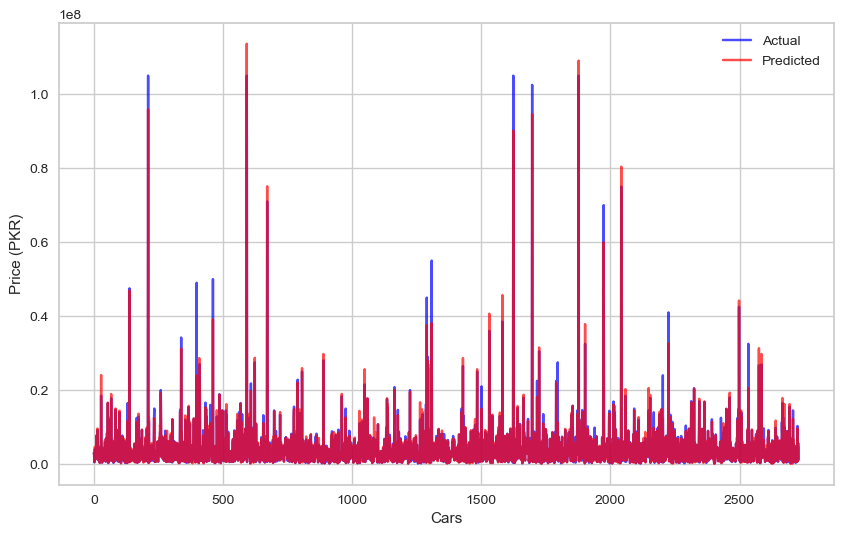

In [16]:
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
# plt.plot(np.arange(len(y_pred_final)), y_pred_final, label='Predicted', color='red', alpha=0.7)

# plt.xlabel('Cars')
# plt.ylabel('Price (PKR)')
# plt.legend()

# plt.show()


# XGB REGRESSOR

In [28]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt



In [29]:
# model=xgb.XGBRegressor(objective='reg:squarederror')

In [30]:
# #apply those params which are supported by selected model
# param_grid = {
#     'max_depth': [5,8,10],
#     'random_state': [42, 51, 72],
#     'learning_rate':[0.1,0.3,0.7],
#     'n_estimators' : [100,300,500]
# }


# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# # Make predictions on the testing data
# y_pred = best_model.predict(X_test)

# # Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 score
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R-squared (R2) Score: {r2}")
# print(f"Best hyperparameters: {grid_search.best_params_}")

Mean Squared Error: 1341226753750.9612
Mean Absolute Error: 453053.8069977556
R-squared (R2) Score: 0.969147002685629
Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}


In [31]:
# final_model=xgb.XGBRegressor(objective='reg:squarederror',
#                              random_state=42,
#                              max_depth=5,
#                              depth=3,
#                              leaning_rate=0.3,
#                              n_estimators=100) #best params founded
# final_model.fit(X_train,y_train)
# y_pred_final = final_model.predict(X_test)
# mse_final = mean_squared_error(y_test, y_pred_final)
# mae_final= mean_squared_error(y_test, y_pred_final)
# R2Score=r2_score(y_test, y_pred_final)
# print(f"MSE Final: {mse_final}, MAE Final: {mae_final}, R2_Score: {R2Score}")

MSE Final: 1341226753750.9612, MAE Final: 1341226753750.9612, R2_Score: 0.969147002685629


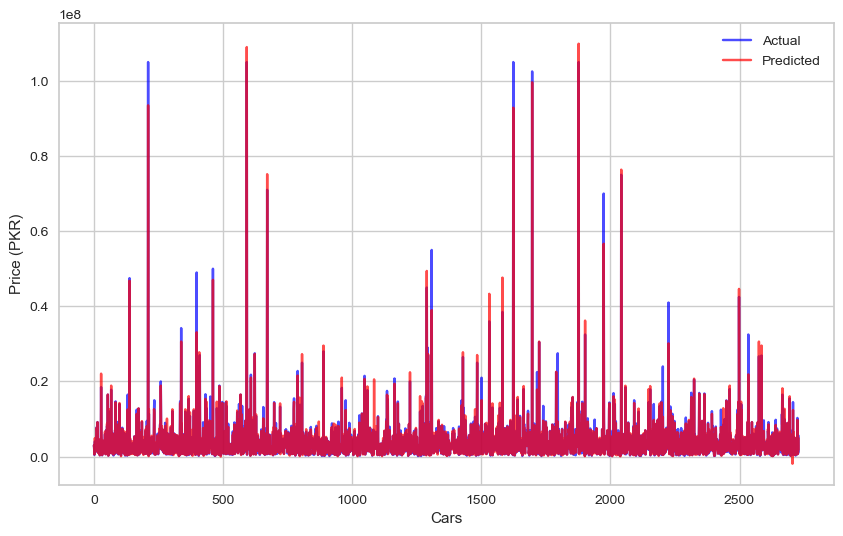

In [32]:
# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
# plt.plot(np.arange(len(y_pred_final)), y_pred_final, label='Predicted', color='red', alpha=0.7)

# plt.xlabel('Cars')
# plt.ylabel('Price (PKR)')
# plt.legend()

# plt.show()
